In [2755]:
%ls

AUTHORS.rst             counts_14.json          segregation_prove.log
CONTRIBUTING.rst        ddd.cvs                 setup.cfg
HISTORY.rst             docs/                   setup.py
LICENSE                 grow_caches.npy         tabulate.ipynb
MANIFEST.in             grow_caches.txt.gz      tests/
Makefile                grow_caches7.txt.gz     thickness.png
README.rst              pics/                   tmp.csv
Untitled.ipynb          requirements.txt        tmp.json
chromosome_segregation/ requirements_dev.txt    tox.ini
contacts_10.json        results_saw/            ttt.csv
counts_10.json          saw.log                 venv/
counts_12.json          saw13614.log            webapp/


In [2]:
##6cf9e87750e19ebeb9912d449b83bc40f5474f16d13f17f9
# token=be61173e17a4acbc7a07cd493dd2a96a2cb419e636da50f7

In [3]:
import numpy  as np
import matplotlib.pyplot as plt
from statistics import Counter

import os

In [4]:
from scipy.signal import savgol_filter


In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from chromosome_segregation.simulation import  URW_saw
from chromosome_segregation.aux import cache_n_conf,get_grow_caches, n_conf, n_conf_large
from chromosome_segregation import consts
from chromosome_segregation import overlaps
from chromosome_segregation.regrow import  regrow_saw

from chromosome_segregation import aux

In [7]:
plt.rc('font', size=16)


In [506]:
# %time consts.caches = cache_n_conf(N_=200, dx=20, dy=20 , dz=20)


In [56]:
import cProfile

pr = cProfile.Profile()
pr.enable()
d = cache_n_conf(N_=100, dx=5, dy=5 , dz=5)
pr.disable()
pr.print_stats(sort="cumtime")

         63059 function calls in 4.925 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    4.925    2.463 interactiveshell.py:3362(run_code)
        2    0.000    0.000    4.925    2.463 {built-in method builtins.exec}
        1    0.000    0.000    4.925    4.925 876024974.py:5(<cell line: 5>)
        1    0.010    0.010    4.925    4.925 aux.py:435(cache_n_conf)
    12500    4.908    0.000    4.911    0.000 aux.py:406(n_conf_large)
    37500    0.003    0.000    0.003    0.000 {built-in method builtins.abs}
    12500    0.002    0.000    0.002    0.000 {method 'append' of 'list' objects}
      100    0.001    0.000    0.001    0.000 __init__.py:2089(info)
        1    0.001    0.001    0.001    0.001 {built-in method numpy.array}
        1    0.000    0.000    0.000    0.000 aux.py:396(cache_ln_factorial)
        1    0.000    0.000    0.000    0.000 aux.py:404(<listcomp>)
      101    0.000  

In [57]:

n_conf(5, 5,0,0),n_conf(50, 4,0,0)/n_conf_large(50, 4,0,0),  n_conf(50, 4,2,2)/n_conf_large(50, 4,2,2),

(1.0, 0.9393529005047998, 0.9386175195517811)

In [510]:
d

array([[[[0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00]],

        [[1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.000

In [671]:
GROW_CACHES_FOLDER = os.path.join(os.path.dirname(consts.__file__), 'grow_caches.txt.gz')
n = 150
consts.caches = get_grow_caches(fname = GROW_CACHES_FOLDER ,
                params=(n, 50,50,50))


In [673]:
%timeit regrow_saw(n=150, dx=0, dy=0, dz=0, res= [], w=1, alpha=.5, k=0)

7.43 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [843]:
pr = cProfile.Profile()
sv = []
box = [25,4,4]
n = int(0.4*box[0]*box[1]*box[2])
consts.caches = get_grow_caches(fname = GROW_CACHES_FOLDER ,
                params=(n+1, 50,50,50))



In [845]:
print(n)
pr.enable()
sv = []
accum = 0

for i in range(10000):
    coords_n, w_n, k_n = regrow_saw(n=n, dx=0, dy=0, dz=0, res= [], w=1, alpha=np.random.rand()*2.0, k=0)
    if len(coords_n) == n: accum+=1; sv.append(coords_n.copy())
print(accum)
pr.disable()
pr.print_stats(sort="cumtime")

160
1692
         124322014 function calls (122708148 primitive calls) in 153.924 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10    0.000    0.000  148.415   14.842 interactiveshell.py:3362(run_code)
       10    0.000    0.000  148.268   14.827 {built-in method builtins.exec}
1615805/10757   94.912    0.000  147.948    0.014 regrow.py:125(regrow_saw)
        4    0.000    0.000  140.419   35.105 base_events.py:1830(_run_once)
        5    0.000    0.000  134.964   26.993 kernelbase.py:487(process_one)
        2    0.000    0.000  134.964   67.482 kernelbase.py:357(dispatch_shell)
       16    0.000    0.000  134.962    8.435 events.py:78(_run)
       16    0.000    0.000  134.962    8.435 {method 'run' of 'Context' objects}
        2    0.000    0.000  134.962   67.481 kernelbase.py:501(dispatch_queue)
        1    0.000    0.000  134.960  134.960 kernelbase.py:684(execute_request)
        1    0.000    0.000 

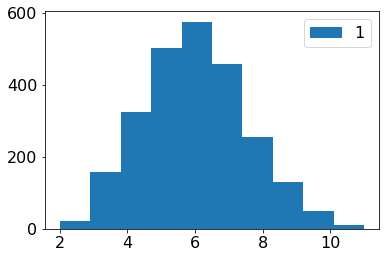

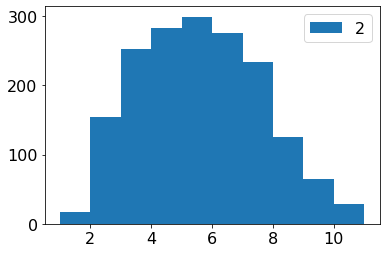

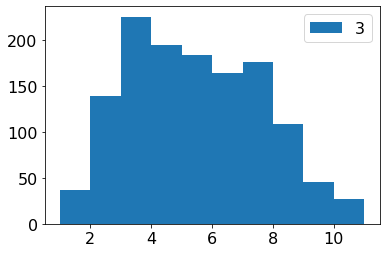

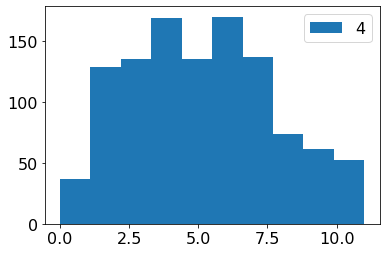

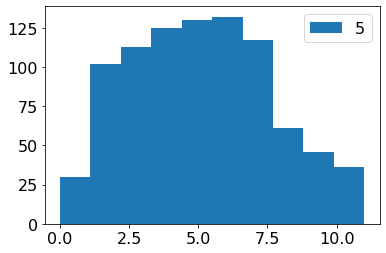

In [851]:
for alpha in [1,2,3,4,5]:
    sv = []
    for i in range(10000):
        coords_n, w_n, k_n = regrow_saw(n=n, dx=0, dy=0, dz=0, res= [], w=1, alpha=np.random.rand()*alpha, k=0)
        if len(coords_n) == n: accum+=1; sv.append(coords_n.copy())
    sv = np.array(sv, dtype='float')
    hist = []
    indexes = aux.get_indexes(box,
                                    extend_to_left=1,
                                    extend_to_right=10, length=30)

    for conf in sv:
        extreme_x = (max(conf[:, 0]) - min(conf[:, 0]) ) # otherwise the volume could be  zero!
                        # if extreme_x == 0:   extreme_x =1
        extreme_y = (max(conf[:, 1]) - min(conf[:, 1]))
                        # if extreme_y == 0:  extreme_y =1
        extreme_z = (max(conf[:, 2]) - min(conf[:, 2]))

    #     l = int(np.sqrt(n/0.4/15))
    #     box = [24,4,4]
        
        box_n = aux.get_box(sx=indexes[0], sy=indexes[1], sz=indexes[2], l=(extreme_x, extreme_y, extreme_z))
#         if box_n==1:  res.append(conf)
        hist.append(box_n)
    plt.hist([el for el in hist if el != None], label=str(alpha))
    plt.legend()
    plt.show()
    

In [854]:
indexes = aux.get_indexes([25,4,4],
                                    extend_to_left=1,
                                    extend_to_right=10, length=30)
len(indexes[0])

12

In [855]:
np.histogram([el for el in hist if el != None], bins=len(indexes[0])-1)

(array([  1,  29, 102, 113, 125, 130, 132, 117,  61,  46,  36]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]))

In [834]:

res = []

#     print(extreme_x, extreme_y, extreme_z, box_n, indexes, box)
res = np.array(res) 
len(res)

25

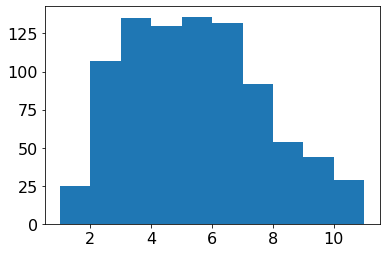

In [835]:
plt.hist([el for el in hist if el != None])
plt.show()

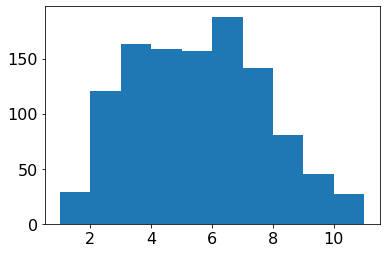

In [829]:
plt.hist([el for el in hist if el != None])
plt.show()

In [830]:
np.histogram([el for el in hist if el != None])

(array([ 29, 121, 163, 159, 157, 188, 141,  81,  45,  27]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]))

In [808]:
res.shape

(7, 152, 3)

In [486]:
import ipyvolume as ipv
# x, y, z, u, v = ipv.examples.klein_bottle(draw=False)

x = res[:,:,0] #np.array([el[0] for el in sv[:]], dtype='float')
y = res[:,:,1]# np.array([el[1] for el in sv], dtype='float')
z = res[:,:,2]# np.array([el[2] for el in sv], dtype='float')

ipv.figure()

s = ipv.plot(x,y,z)
# x = aggregated['x']
# y = aggregated['area']
# z = aggregated['en_mean']
# m = ipv.plot_mesh(x, y, z, wireframe=False)
# ipv.scatter(x,y,z, size=1, marker="sphere")
ipv.squarelim()
ipv.animation_control(s,interval=2000)
ipv.show()

NameError: name 'res' is not defined

In [30]:
np.save('grow_caches', d)
%ls  -lah grow_caches.npy

-rw-r--r--  1 alexey  staff    25K Aug 24 11:37 grow_caches.npy


In [31]:
import gzip

In [32]:
fname='grow_caches7.txt.gz'

def get_grow_caches(fname, params):
    if os.path.isfile(fname):
        with gzip.open(fname) as  f:
            header = f.readline().decode("utf-8")[2:-1]
#             print('raw header', header)
            header = tuple([int(el) for el in header.split(',')])
#             print('header', header)
        d = np.loadtxt(fname)
#         d = np.load(fname)
        try:
            d = d.reshape(header)
#             print(d.shape, 'fff')

        except: pass
        if d.shape < params:
#             print(params)
            d = cache_n_conf(*params)
            np.savetxt(fname, d.ravel(), header=','.join([str(el) for el in d.shape]))
#             np.save(fname, d)
    else:
        d = cache_n_conf(*params)
#         print(d.shape)
        np.savetxt(fname, d.ravel(), header=','.join([str(el) for el in d.shape]))
#         np.save(fname, d)


    return d

In [33]:
# ','.join([str(el) for el in (1,2,3)])
l = []
l.append((*[1,2,3], .5))
l

[(1, 2, 3, 0.5)]

In [34]:
%ls -lah grow_caches*

-rw-r--r--  1 alexey  staff    25K Aug 24 11:37 grow_caches.npy
-rw-r--r--  1 alexey  staff   4.5M Jul  1 15:27 grow_caches.txt.gz
-rw-r--r--  1 alexey  staff   133K Jul  5 09:46 grow_caches7.txt.gz


In [35]:
dd = get_grow_caches(fname=fname, params=(52, 10,10,10))
dd.shape

(52, 10, 10, 10)

In [36]:
# %time tttt = cache_n_conf(N_=40, dx=20, dy=20 , dz=20)


In [37]:
# np.array_equal(consts.caches,tttt)

In [38]:
import math
math.log(math.factorial(2000)//math.factorial(10)), math.log(math.factorial(2000)) - math.log(math.factorial(10))

(13191.419937940731, 13191.419937940731)

In [39]:
# math.factorial(200)//math.factorial(10), int(math.factorial(200)/math.factorial(10))

In [40]:
# GROW_CACHES_FOLDER = os.path.join(os.path.dirname(consts.__file__), 'grow_caches.txt.gz')
# consts.caches = get_grow_caches(fname = GROW_CACHES_FOLDER ,
#                 params=(50, 25,25,25))
# results = []
# box = (2,2,3)
# for i in range(1):
#     boxes = URW_saw(40, 100000, box=box)
#     results.append(boxes)

In [41]:
def list_to_arr(boxes):
#     items = Counter(boxes).items()
#     keys = Counter(boxes).keys()
    arr = np.zeros(30)
    for item in Counter(boxes).items():
#     print(item)
        arr[item[0]] = item[1]
    return arr/np.sum(arr)
    

In [42]:
# lst_arr = []
# for result in results:
#     arr = list_to_arr(result)
#     lst_arr.append(arr)

# big_arr = np.array(lst_arr)
# big_arr.shape 

In [43]:
# mean = np.mean(big_arr, axis=0)
# err = np.std(big_arr, axis=0)
# mean, mean[max(box)]

In [45]:
# [len(el) for el in lst_arr]

In [46]:

# plt.figure(figsize=(12,8))
# plt.errorbar(range(len(mean)) ,mean , yerr=err, fmt=".", color='black', capsize=5, label='stdev')
# plt.bar(range(len(mean)), mean, hatch='.', alpha=0.2, edgecolor='black', label='fraction')
# plt.yscale('log')
# # plt.grid()
# plt.legend()
# plt.xlim(0,17)

In [47]:
dx=2
for i in range(10):
    print((i - i%dx)/dx)

0.0
0.0
1.0
1.0
2.0
2.0
3.0
3.0
4.0
4.0


In [48]:
# def get_cube_shell(a, delta, x,y,z):
#     scale = 1
#     while True:
#         xr = range(-(a[0] + delta[0])*scale, (a[0]+delta[0])*scale)
#         yr = range(-(a[1] + delta[1])*scale, (a[1]+delta[1])*scale)
#         yr = range(-(a[2] + delta[2])*scale, (a[2]+delta[2])*scale)

#         if (x in r) & (y in r) & (z in r):
#             return scale
#         scale +=1
    

In [49]:
# get_cube_shell(a=[1,1,1], delta=2, x=-1, y=4, z=3)

In [50]:
def box(a,b,c):
    return range(-a,a), range(-b,b), range(-c,c)

In [51]:
box(1,2,3)

(range(-1, 1), range(-2, 2), range(-3, 3))

In [52]:
60/(5*5*4)/8, 60/(4*4*3)/8, 60/(3*3*2)/8, 60/(5*3*2)/8

(0.075, 0.15625, 0.4166666666666667, 0.25)

In [53]:
40/(2*2*3)/8

0.4166666666666667

In [54]:

def get_n(box):
    t = density*box[0]*box[1]*box[2]*8
    return  int(t - t%2)

In [55]:
def check_symmetry():
    """
    the results for permutation of a triple should  be identical
    """
    pass

In [56]:
# get_n([4,3,3])

In [57]:
# density = 0.3
# n_boxes = 4

# total_results = []
# for thickness in [1,2,3]:
#     boxes = [[i, thickness, thickness] for i in range(n_boxes,0,-1)]
#     print('boxes: %s'% boxes)
#     nsteps = np.linspace(20000*thickness, 200000, len(boxes))
#     nsteps = [int(el - el%1000) for el in nsteps]
#     nsteps = nsteps[::-1]
#     print('number of steps: %s'%nsteps)
    
#     results = []
#     for i in range(len(boxes)):
#         print("density: %f, box: %s, #monomers: %i, #steps: %i"%(density, boxes[i], get_n(boxes[i]), nsteps[i] ))
#         boxes_ = URW_saw(get_n(boxes[i]), nsteps[i], box=boxes[i])
#         results.append(list_to_arr(boxes_))
        
#     total_results.append(results)
    

In [58]:
# overlap = overlaps.Overlap(10)
# print(overlap.n_conformations)

# getting the SAW fraction  from the fit curve

In [59]:
def f(x, a,b,c):
    return a*x*np.log(x) +  b*x +c

In [60]:
# len(total_results)

In [61]:
# plt.figure(figsize=(12,8))
# # thickness=3

# for result, thickness in zip(total_results, (1,2,3)):
#     x=[]
#     y=[]
#     boxes = [[i, thickness, thickness] for i in range(n_boxes,0,-1)]
#     for i in range(len(boxes)):
#         n = get_n(boxes[i])
#         x.append(1-n/get_n(boxes[0]))
# #         x.append(n)
#         specific_free_energy = f(1/n, a=0.375, b=.1347, c=-.2459)
#         n_conformations_total = overlaps.Overlap(n).n_conformations
#         saw_fraction =  np.exp(specific_free_energy * n)
#         n_saws = saw_fraction* n_conformations_total
        
#         print(i, boxes[i],n, result[i][boxes[i][0]],  result[i][boxes[i][0]]* n_saws)#, list_to_arr(results[i]))
#         y.append(-np.log(result[i][boxes[i][0]] * n_saws )/(n))

#     plt.plot(x,y, linestyle='--', marker='o', markersize=10, label='thickness=%i'%thickness)
#     thickness-=1
# plt.grid()
# plt.xlabel("$1-N/N_0$")
# plt.ylabel("$ F/N$")
# plt.title('density %3.1f; For SAW'%(density))
# plt.legend()

In [62]:
6//2, 7//2

(3, 3)

In [63]:
# mean = total_results[0][0]
# total_results_save = total_results.copy()

In [64]:
# plt.figure(figsize=(12,8))
# # plt.errorbar(range(len(mean)) ,mean , yerr=err, fmt=".", color='black', capsize=5, label='stdev')
# plt.bar(range(len(mean)), mean, hatch='.', alpha=0.2, edgecolor='black', label='fraction')
# plt.yscale('log')
# # plt.grid()
# plt.legend()
# plt.xlim(0,15)

# I need to use larger $N$, so must use Stirling's formula

$$
n!\approx \sqrt{2\pi n}\left(\frac{n}{e}\right)^n
$$

In [65]:
for n_ in (1,10,100,200,500,1000):
#     print(sum([math.log(el) for el in range(1,n_)]), np.log((lambda x: math.sqrt(2*np.pi*x)*(x/math.e)**x)(n_)))
    print(sum([math.log(el) for el in range(1,n_)]), .5*np.log(2*np.pi*n_)+ n_*(np.log(n_)-1))

0 -0.08106146679532733
12.80182748008147 15.096082009642155
359.1342053695755 363.7385422250079
857.9336698258574 863.231570526086
2605.1158503617376 2611.3302917935116
5905.220423209189 5912.128095154832


In [66]:
def ln_fact(x):
    
    return sum([math.log(el) for el in range(1,x)])

In [67]:
def ln_fact1(x):
    
    return .5*np.log(2*np.pi*n_)+ n_*(np.log(n_)-1)

In [68]:
%timeit ln_fact(500)

77.8 µs ± 6.85 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [69]:
%timeit ln_fact1(50)

3.04 µs ± 587 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [70]:
%timeit math.factorial(50)

611 ns ± 40.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [71]:
%ls

AUTHORS.rst             docs/                   segregation_prove.log
CONTRIBUTING.rst        grow_caches.npy         setup.cfg
HISTORY.rst             grow_caches.txt.gz      setup.py
LICENSE                 grow_caches7.txt.gz     tabulate.ipynb
MANIFEST.in             pics/                   tests/
Makefile                requirements.txt        thickness.png
README.rst              requirements_dev.txt    tox.ini
Untitled.ipynb          results_saw/            venv/
chromosome_segregation/ saw.log


In [72]:
from chromosome_segregation import run_saw

In [73]:
# run_saw.run(density=0.5, n_boxes=4, thicknesses=list(range(2, 3)))

In [74]:
from chromosome_segregation import aux, run_saw

In [75]:
# %cp  chromosome_segregation/grow_caches.txt.gz .


In [76]:
import logging
# reload(logging)
logging.basicConfig(
                level=logging.INFO,
                format="%(asctime)s [%(levelname)s] %(module)s.%(funcName)s:%(lineno)d %(message)s",
                handlers=[
                    logging.StreamHandler()
                ]
            )


In [77]:
box = [4,1,2]

n = run_saw.get_n(box, .5)
print(n)

GROW_CACHES_FOLDER = os.path.join(os.path.dirname(consts.__file__), 'grow_caches.txt.gz')

consts.caches = aux.get_grow_caches(fname = GROW_CACHES_FOLDER ,
                params=(n, 25,25,25))

all_boxes = URW_saw(n, 30000, box=box)



4


2022-08-24 11:37:49,910 [INFO] simulation.URW_saw:138 x-array is: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
2022-08-24 11:37:49,911 [INFO] simulation.URW_saw:139 y-arrya is: [-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
2022-08-24 11:37:49,912 [INFO] simulation.URW_saw:140 z-array is: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


-1.0 1.0 1.0
-1.0 1.0 1.0
-1.0 1.0 1.0
finished estimating limits: 1.0 1.0 1.0
x-array is: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
y-array is: [-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
z-array is: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


2022-08-24 11:37:51,329 [INFO] simulation.URW_saw:149 passed 33.3 %, failed to grow: 11.0%
2022-08-24 11:37:52,627 [INFO] simulation.URW_saw:149 passed 66.7 %, failed to grow: 11.2%


In [78]:
res = aux.list_to_arr(all_boxes)
res

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

(0.0, 21.0)

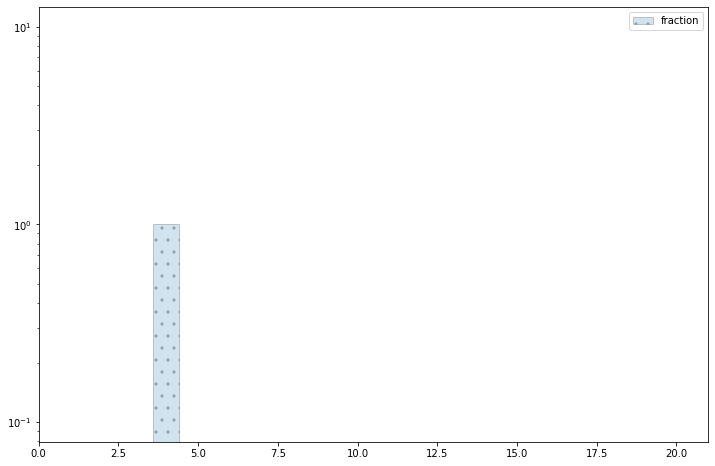

In [79]:
plt.figure(figsize=(12,8))
# plt.errorbar(range(len(mean)) ,mean , yerr=err, fmt=".", color='black', capsize=5, label='stdev')
plt.bar(range(len(res)), res, hatch='.', alpha=0.2, edgecolor='black', label='fraction')
plt.yscale('log')
# plt.grid()
plt.legend()
plt.xlim(0,21)

(0.0, 21.0)

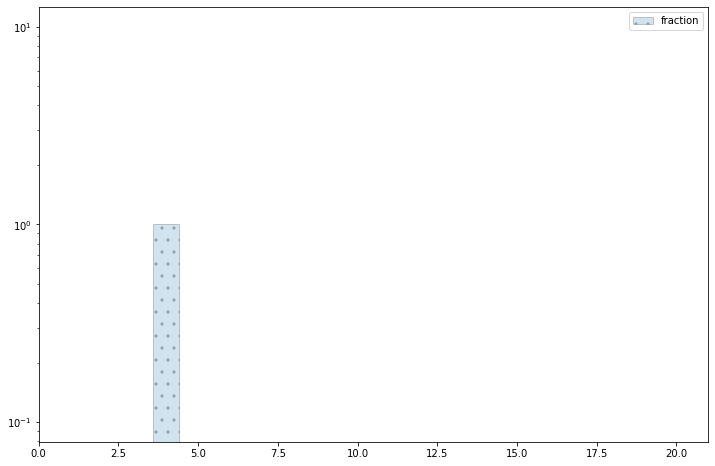

In [80]:
plt.figure(figsize=(12,8))
# plt.errorbar(range(len(mean)) ,mean , yerr=err, fmt=".", color='black', capsize=5, label='stdev')
plt.bar(range(len(res)), res, hatch='.', alpha=0.2, edgecolor='black', label='fraction')
plt.yscale('log')
# plt.grid()
plt.legend()
plt.xlim(0,21)

In [272]:
%ls

AUTHORS.rst             docs/                   segregation_prove.log
CONTRIBUTING.rst        grow_caches.npy         setup.cfg
HISTORY.rst             grow_caches.txt.gz      setup.py
LICENSE                 grow_caches7.txt.gz     tabulate.ipynb
MANIFEST.in             pics/                   tests/
Makefile                requirements.txt        thickness.png
README.rst              requirements_dev.txt    tox.ini
Untitled.ipynb          results_saw/            venv/
chromosome_segregation/ saw.log                 webapp/


In [7]:
arr100 = np.loadtxt('chromosome_segregation/results/100/run_1/fitted_s.txt')
counts100 = np.loadtxt('chromosome_segregation/results/100/run_1/counts.txt')
bins100 = np.loadtxt('chromosome_segregation/results/100/run_1/bins.txt')

arr20 = np.loadtxt('chromosome_segregation/results/20/run_3/fitted_s.txt')
counts20 = np.loadtxt('chromosome_segregation/results/20/run_3/counts.txt')
bins20 = np.loadtxt('chromosome_segregation/results/20/run_3/bins.txt')




Text(0, 0.5, '$\\pi_i$')

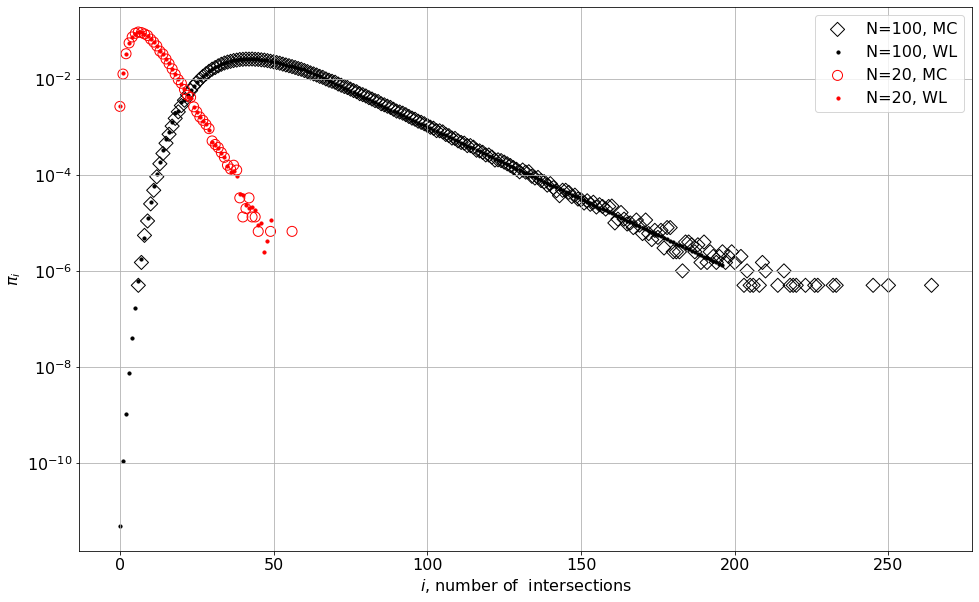

In [11]:

plt.figure(figsize=(16,10))
plt.scatter(bins100, counts100, marker='D', s=100, edgecolor='black', color='none', label='N=100, MC')
plt.scatter(range(len(arr100)), arr100, s=10, label='N=100, WL',  color='black')
plt.scatter(bins20, counts20, marker='o', s=100, edgecolor='red', color='none', label='N=20, MC')
plt.scatter(range(len(arr20)), arr20, s=10, label='N=20, WL',  color='red')

plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('$i$, number of  intersections')
plt.ylabel('$\pi_i$')

In [385]:
overlap = overlaps.Overlap(10)
# print(overlap.n_conformations)
hst10 = overlap.get_overlaps_histogram()
tmp = sum(hst10.values())
print(tmp)
for el in hst10:
    hst10[el] /= tmp

hst10 = dict(sorted(hst10.items()))

1172556


In [384]:
overlap = overlaps.Overlap(8)
# print(overlap.n_conformations)
hst8 = overlap.get_overlaps_histogram()
tmp = sum(hst8.values())
print(tmp)
for el in hst8:
    hst8[el] /= tmp
hst8 = dict(sorted(hst8.items()))

44730


In [368]:
hst8

{0: 0.07404426559356136,
 1: 0.19745137491616366,
 2: 0.25539906103286386,
 3: 0.15077129443326626,
 4: 0.19798792756539235,
 5: 0.035412474849094565,
 6: 0.04721663313212609,
 7: 0.03219315895372234,
 8: 0.004024144869215292,
 9: 0.0053655264922870555,
 12: 0.0001341381623071764}

In [349]:
arr10 = np.loadtxt('chromosome_segregation/results/10/run_1/fitted_s.txt')
counts10 = np.loadtxt('chromosome_segregation/results/10/run_1/counts.txt')
bins10 = np.loadtxt('chromosome_segregation/results/10/run_1/bins.txt')


arr8 = np.loadtxt('chromosome_segregation/results/8/run_1/fitted_s.txt')
counts8 = np.loadtxt('chromosome_segregation/results/8/run_1/counts.txt')
bins8 = np.loadtxt('chromosome_segregation/results/8/run_1/bins.txt')

# arr10[-1] = arr10[17]
# arr10, len(bins10), len(counts10)
# len(bins10), len(arr10)

arr8[11]=arr8[10]=np.nan
# arr10 = arr10[:]

Text(0, 0.5, '$\\pi_i$')

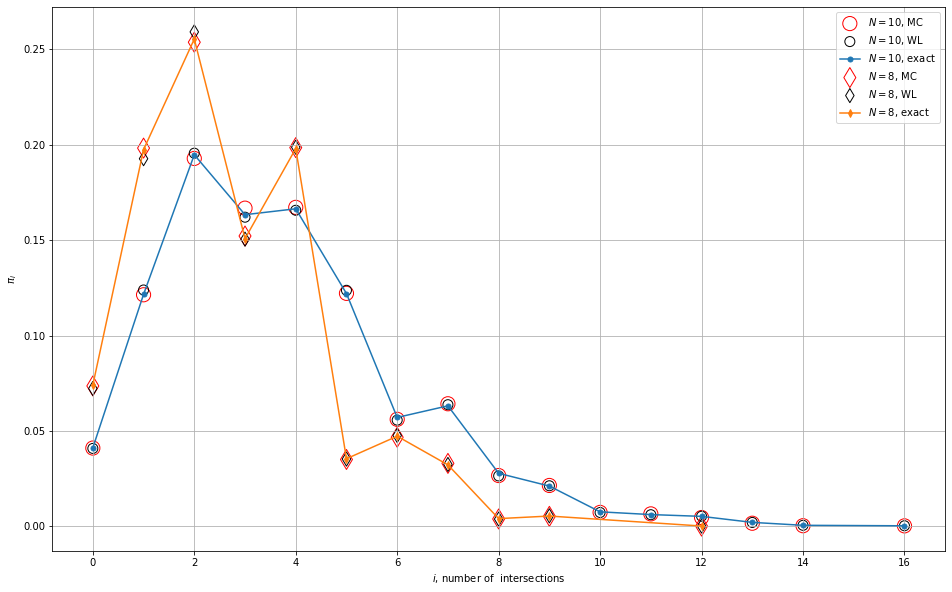

In [381]:
plt.figure(figsize=(16,10))

plt.scatter(bins10, counts10, marker='o', s=200, edgecolor='red', color='none', label='$N=10$, MC')
plt.scatter(range(len(arr10))[:-1], arr10[:-1],marker='o', s=100, label='$N=10$, WL',  edgecolor='black', color='none', )
plt.plot(list(hst10.keys())[:-1], list(hst10.values())[:-1], marker='o', markersize=5, label='$N=10$, exact')


plt.scatter(bins8, counts8, marker='d', s=200, edgecolor='red', color='none', label='$N=8$, MC')
plt.scatter(range(len(arr8)), arr8,marker='d', s=100, label='$N=8$, WL',  edgecolor='black', color='none', )
plt.plot(hst8.keys(), hst8.values(), marker='d', markersize=5, label='$N=8$, exact')

# plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('$i$, number of  intersections')
plt.ylabel('$\pi_i$')
# plt.xlim(-1, 16.5)

In [84]:
%ls  chromosome_segregation/

__init__.py
__pycache__/
aux.py
aux.pyc
chromosome_segregation.py
chromosome_segregation.pyc
cli.py
consts.py
grow_caches.txt.gz
grow_caches.txt.gz1
log.log
overlaps.py
prove_segregation.py
regrow.py
results/
results_box_10_10_10/
results_box_14_14_14/
results_halfspace/
results_saw/
results_saw_old/
run_saw.py
segregation_prove/
simulation.py
specific_entropy_free_box_comparison.png
specific_entropy_free_half_comparison.png


In [85]:
for root, dirs, files  in os.walk('chromosome_segregation/results_saw/'):
    print(root)
    print('dirs', dirs)
    print(files)
    print('ffffff')

chromosome_segregation/results_saw/
dirs ['density_0.5']
['.DS_Store']
ffffff
chromosome_segregation/results_saw/density_0.5
dirs ['run_2', 'run_5', 'run_4', 'run_3', 'run_6', 'run_1', 'run_0', 'run_7']
['.DS_Store', 'f_length_s.png', 'f_lenth_s.png', 'f_n.png', 'f_s_length.png']
ffffff
chromosome_segregation/results_saw/density_0.5/run_2
dirs []
['data.csv']
ffffff
chromosome_segregation/results_saw/density_0.5/run_5
dirs []
['data.csv']
ffffff
chromosome_segregation/results_saw/density_0.5/run_4
dirs []
['data.csv']
ffffff
chromosome_segregation/results_saw/density_0.5/run_3
dirs []
['data.csv']
ffffff
chromosome_segregation/results_saw/density_0.5/run_6
dirs []
['data.csv']
ffffff
chromosome_segregation/results_saw/density_0.5/run_1
dirs []
['data.csv']
ffffff
chromosome_segregation/results_saw/density_0.5/run_0
dirs []
['data.csv']
ffffff
chromosome_segregation/results_saw/density_0.5/run_7
dirs []
['data.csv']
ffffff


In [95]:
root = 'chromosome_segregation/results_saw/'
data_per_density = [os.path.join(root, el) for el in os.listdir(root) if el.startswith('density')]
data_per_density

['chromosome_segregation/results_saw/density_0.1',
 'chromosome_segregation/results_saw/density_0.51',
 'chromosome_segregation/results_saw/density_0.2',
 'chromosome_segregation/results_saw/density_0.5',
 'chromosome_segregation/results_saw/density_0.4',
 'chromosome_segregation/results_saw/density_0.3']

In [96]:
density_data = {}
for d in data_per_density:
    tmp = []
    for root, dirs, files in os.walk(d):
        print(root,files)
        if files[0].startswith('data'): 
            tmp.append(os.path.join(root, files[0]))
    density_data[d.split('/')[-1]] = tmp

chromosome_segregation/results_saw/density_0.1 ['.DS_Store', 'f_length_s.png', 'f_n.png', 'f_s_length.png']
chromosome_segregation/results_saw/density_0.1/run_2 ['data.csv']
chromosome_segregation/results_saw/density_0.1/run_5 ['data.csv']
chromosome_segregation/results_saw/density_0.1/run_4 ['data.csv']
chromosome_segregation/results_saw/density_0.1/run_3 ['data.csv']
chromosome_segregation/results_saw/density_0.1/run_1 ['data.csv']
chromosome_segregation/results_saw/density_0.1/run_1/run_3 ['data.csv']
chromosome_segregation/results_saw/density_0.1/run_0 ['data.csv']
chromosome_segregation/results_saw/density_0.51 ['.DS_Store', 'f_length_s.png', 'f_lenth_s.png', 'f_n.png', 'f_s_length.png']
chromosome_segregation/results_saw/density_0.51/run_2 ['data.csv']
chromosome_segregation/results_saw/density_0.51/run_5 ['data.csv']
chromosome_segregation/results_saw/density_0.51/run_4 ['data.csv']
chromosome_segregation/results_saw/density_0.51/run_3 ['data.csv']
chromosome_segregation/results

In [97]:
density_data

{'density_0.1': ['chromosome_segregation/results_saw/density_0.1/run_2/data.csv',
  'chromosome_segregation/results_saw/density_0.1/run_5/data.csv',
  'chromosome_segregation/results_saw/density_0.1/run_4/data.csv',
  'chromosome_segregation/results_saw/density_0.1/run_3/data.csv',
  'chromosome_segregation/results_saw/density_0.1/run_1/data.csv',
  'chromosome_segregation/results_saw/density_0.1/run_1/run_3/data.csv',
  'chromosome_segregation/results_saw/density_0.1/run_0/data.csv'],
 'density_0.51': ['chromosome_segregation/results_saw/density_0.51/run_2/data.csv',
  'chromosome_segregation/results_saw/density_0.51/run_5/data.csv',
  'chromosome_segregation/results_saw/density_0.51/run_4/data.csv',
  'chromosome_segregation/results_saw/density_0.51/run_3/data.csv',
  'chromosome_segregation/results_saw/density_0.51/run_6/data.csv',
  'chromosome_segregation/results_saw/density_0.51/run_1/data.csv',
  'chromosome_segregation/results_saw/density_0.51/run_0/data.csv',
  'chromosome_seg

In [98]:
import pandas as pd
pd.set_option('display.max_rows', 500)


In [99]:
for k, files in density_data.items():
    print(k)
    dfs = []
    for file in files:
        print(file)
        dfs.append(pd.read_csv(file, sep=' ', header=None))
    df = pd.concat(dfs)
    df.columns = ['x', 'y', 'z', 'en', 'n']
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
#     print(df.head(n=50))
#     aggregated = df.groupby(['x','y','z']).agg({'en':['mean', 'std'], 'n':['mean']})
    aggregated = df.groupby(['x','y','z']).agg(en_mean=('en','mean'), en_std=('en', 'std'), n=('n','mean'))

    aggregated.reset_index(inplace=True)
    aggregated['area'] = aggregated['y']*aggregated['z']
    density_data[k] = aggregated
    

density_0.1
chromosome_segregation/results_saw/density_0.1/run_2/data.csv
chromosome_segregation/results_saw/density_0.1/run_5/data.csv
chromosome_segregation/results_saw/density_0.1/run_4/data.csv
chromosome_segregation/results_saw/density_0.1/run_3/data.csv
chromosome_segregation/results_saw/density_0.1/run_1/data.csv
chromosome_segregation/results_saw/density_0.1/run_1/run_3/data.csv
chromosome_segregation/results_saw/density_0.1/run_0/data.csv
density_0.51
chromosome_segregation/results_saw/density_0.51/run_2/data.csv
chromosome_segregation/results_saw/density_0.51/run_5/data.csv
chromosome_segregation/results_saw/density_0.51/run_4/data.csv
chromosome_segregation/results_saw/density_0.51/run_3/data.csv
chromosome_segregation/results_saw/density_0.51/run_6/data.csv
chromosome_segregation/results_saw/density_0.51/run_1/data.csv
chromosome_segregation/results_saw/density_0.51/run_0/data.csv
chromosome_segregation/results_saw/density_0.51/run_7/data.csv
density_0.2
chromosome_segregat

In [91]:
# aggregated.head(100)


In [29]:
# aggregated[aggregated['area']==2.0]

In [663]:
# aggregated['n_saw_box'] = np.exp(-aggregated['en_mean']*aggregated['n'])
# aggregated['n_tot_n'] = aggregated['n'].apply(lambda x: overlaps.Overlap(int(x)).n_conformations)
# aggregated['specific_excess_s_box'] = np.log(aggregated['n_saw_box']/aggregated['n_tot_n'])/aggregated['n']
# aggregated[aggregated['area']==2.0]

In [34]:
# aggregated[aggregated['area']==36.0]

In [665]:
# plt.figure(figsize=(14,8))
# for k,group in aggregated.groupby('area'):
#     print(k)
#     group = group[(group['x']== group['y']) &( group['y'] == group['z'])]
#     if (k >= 2)  & (len(group)>0):
# #         print(group)
#         plt.plot(1/group['n'], group['specific_excess_s_box'], marker='p',label='area='+str(k))
# #     plt.errorbar(group['area'], group['en_mean'], yerr=group['en_std'],capsize=10)
# plt.grid()
# plt.legend()
# plt.title('$\Delta S/N$ as a function of $1/N$ for different S; contentration=0.5')
# plt.xlabel('$1/N$')
# plt.ylabel('$\Delta S/N$')

In [666]:
# plt.figure(figsize=(14,10))
# for k,group in aggregated.groupby('x'):
#     print(k)
#     plt.scatter(group['area'], group['en_mean'], label='length='+str(k))
#     plt.errorbar(group['area'], group['en_mean'], yerr=group['en_std'],capsize=10)
# plt.grid()
# plt.legend()
# plt.title('$F/N$ as a function of $S$ for different lengths; contentration=0.5')
# plt.xlabel('area, $S$')
# plt.ylabel('$F/N$')

# fitting specific free energy as a function of 1/n to a line

In [19]:
from scipy.optimize import curve_fit


def fun(x, a,b):
    
    return a*x  +b





In [20]:
s_min_n = {}

s_min_n[2] = 6
s_min_n[4] = 8
s_min_n[6] = 10#14
s_min_n[9] = 20
s_min_n[12] = 20
s_min_n[16] = 20
s_min_n[20] = 20
s_min_n[25] = 20
s_min_n[30] = 20
s_min_n[36] = 20
s_min_n[49] = 20

In [21]:
def get_en_n_to_infty(data, filters={'min_n':20, 'area': 25.0}):
    """
    calculating specific free energy for  the limit for n to infty. Using scipy.curve_fit
    """
    min_energy={}
    print(filters)
    area_filter = filters.pop('area', None)
#     print(type(area_filter))
    
    for k, group in aggregated.groupby('area'):
        area  = group['area'].values[0]

        if area_filter:
            group = group[(group['n'] >= s_min_n[area]) &(group['area'] ==  area_filter)][['n','en_mean']].dropna()
        else:
            group = group[group['n'] >= s_min_n[area]][['n','en_mean']].dropna()

        # get fit parameters from scipy curve fit
        if len(group['en_mean']) >0:
            try:
                parameters, covariance = curve_fit(fun, 1/group['n'], group['en_mean'])
                min_energy[k] = parameters[1]
            except: pass

    return min_energy
    

In [22]:
density_data['density_0.51']

x    y    z   en_mean    en_std      n  area
0    1.0  2.0  2.0 -0.587400  0.000000    2.0   4.0
1    1.0  2.0  3.0 -0.587400       NaN    2.0   6.0
2    1.0  3.0  3.0 -0.782800  0.000000    4.0   9.0
3    1.0  3.0  4.0 -0.754200       NaN    6.0  12.0
4    1.0  4.0  4.0 -0.770700  0.001445    8.0  16.0
5    1.0  4.0  5.0 -0.775600       NaN   10.0  20.0
6    1.0  5.0  5.0 -0.782700  0.001709   12.0  25.0
7    1.0  5.0  6.0 -0.792300       NaN   14.0  30.0
8    1.0  6.0  6.0 -0.779200       NaN   18.0  36.0
9    2.0  1.0  2.0 -0.587400  0.000000    2.0   2.0
10   2.0  2.0  2.0 -0.782800  0.000000    4.0   4.0
11   2.0  2.0  3.0 -0.919300       NaN    6.0   6.0
12   2.0  3.0  3.0 -1.006050  0.000071    8.0   9.0
13   2.0  3.0  4.0 -1.104300       NaN   12.0  12.0
14   2.0  4.0  4.0 -1.101550  0.000289   16.0  16.0
15   2.0  4.0  5.0 -1.127600       NaN   20.0  20.0
16   2.0  5.0  5.0 -1.123800  0.000529   24.0  25.0
17   2.0  5.0  6.0 -1.140900       NaN   30.0  30.0
18   2.0  6.0  6.0 -1.139500       NaN   36.0  36.0
19   3.0  1.0  2.0 -0.587400  0.000000    2.0   2.0
20   3.0  2.0  2.0 -0.919300  0.000000    6.0   4.0
21   3.0  2.0  3.0 -1.006200       NaN    8.0   6.0
22   3.0  3.0  3.0 -1.073200  0.000000   12.0   9.0
23   3.0  3.0  4.0 -1.156900       NaN   18.0  12.0
24   3.0  4.0  4.0 -1.190600  0.000490   24.0  16.0
25   3.0  4.0  5.0 -1.224300       NaN   30.0  20.0
26   3.0  5.0  5.0 -1.228067  0.000987   36.0  25.0
27   3.0  5.0  6.0 -1.245500       NaN   44.0  30.0
28   3.0  6.0  6.0 -1.242700       NaN   54.0  36.0
29   4.0  1.0  2.0 -0.782800  0.000000    4.0   2.0
30   4.0  2.0  2.0 -0.998900  0.000000    8.0   4.0
31   4.0  2.0  3.0 -1.104200       NaN   12.0   6.0
32   4.0  3.0  3.0 -1.157400  0.000283   18.0   9.0
33   4.0  3.0  4.0 -1.190500       NaN   24.0  12.0
34   4.0  4.0  4.0 -1.197200  0.000356   32.0  16.0
35   4.0  4.0  5.0 -1.245800       NaN   40.0  20.0
36   4.0  5.0  5.0 -1.267800  0.000458   50.0  25.0
37   4.0  5.0  6.0 -1.290900       NaN   60.0  30.0
38   4.0  6.0  6.0 -1.289700       NaN   72.0  36.0
39   5.0  1.0  2.0 -0.782800  0.000000    4.0   2.0
40   5.0  2.0  2.0 -0.976250  0.000071   10.0   4.0
41   5.0  2.0  3.0 -1.111600       NaN   14.0   6.0
42   5.0  3.0  3.0 -1.169650  0.000354   22.0   9.0
43   5.0  3.0  4.0 -1.224400       NaN   30.0  12.0
44   5.0  4.0  4.0 -1.245750  0.000370   40.0  16.0
45   5.0  4.0  5.0 -1.265200       NaN   50.0  20.0
46   5.0  5.0  5.0 -1.274067  0.004202   62.0  25.0
47   5.0  5.0  6.0 -1.299600       NaN   74.0  30.0
48   5.0  6.0  6.0 -1.312900       NaN   90.0  36.0
49   6.0  1.0  2.0 -0.752400  0.000624    6.0   2.0
50   6.0  2.0  2.0 -0.944650  0.000071   12.0   4.0
51   6.0  2.0  3.0 -1.093100       NaN   18.0   6.0
52   6.0  3.0  3.0 -1.168350  0.000495   26.0   9.0
53   6.0  3.0  4.0 -1.227300       NaN   36.0  12.0
54   6.0  4.0  4.0 -1.253225  0.000690   48.0  16.0
55   6.0  4.0  5.0 -1.288600       NaN   60.0  20.0
56   6.0  5.0  5.0 -1.305167  0.002312   74.0  25.0
57   6.0  5.0  6.0 -1.311200       NaN   90.0  30.0
58   6.0  6.0  6.0       NaN       NaN  108.0  36.0
59   7.0  1.0  2.0 -0.752467  0.000643    6.0   2.0
60   7.0  2.0  2.0 -0.918550  0.001344   14.0   4.0
61   7.0  2.0  3.0 -1.082000       NaN   20.0   6.0
62   7.0  3.0  3.0 -1.165400  0.000141   30.0   9.0
63   7.0  3.0  4.0 -1.226800       NaN   42.0  12.0
64   7.0  4.0  4.0 -1.258400  0.001042   56.0  16.0
65   7.0  4.0  5.0 -1.291600       NaN   70.0  20.0
66   7.0  5.0  5.0 -1.314767  0.006048   86.0  25.0
67   7.0  5.0  6.0       NaN       NaN  104.0  30.0
68   7.0  6.0  6.0       NaN       NaN  126.0  36.0
69   8.0  1.0  2.0 -0.628233  0.001155    8.0   2.0
70   8.0  2.0  2.0 -0.899200  0.000141   16.0   4.0
71   8.0  2.0  3.0 -1.062900       NaN   24.0   6.0
72   8.0  3.0  3.0 -1.155600  0.000707   36.0   9.0
73   8.0  3.0  4.0 -1.222800       NaN   48.0  12.0
74   8.0  4.0  4.0 -1.261025  0.005619   64.0  16.0
75   8.0  4.0  5.0 -1.290100       NaN   80.0  20.0
76 

In [23]:
aggregated = density_data['density_0.51']


In [24]:
min_energy = get_en_n_to_infty(aggregated, filters={'min_n':20})
min_energy

{'min_n': 20}


{2.0: -0.2556333333333327,
 4.0: -0.8046304757680336,
 6.0: -1.0298498944855181,
 9.0: -1.1372876877461995,
 12.0: -1.2634436763713064,
 16.0: -1.3158233800624888,
 20.0: -1.3548676342082853,
 25.0: -1.3893374120620425,
 30.0: -1.4084992098194598,
 36.0: -1.4336078983949165}

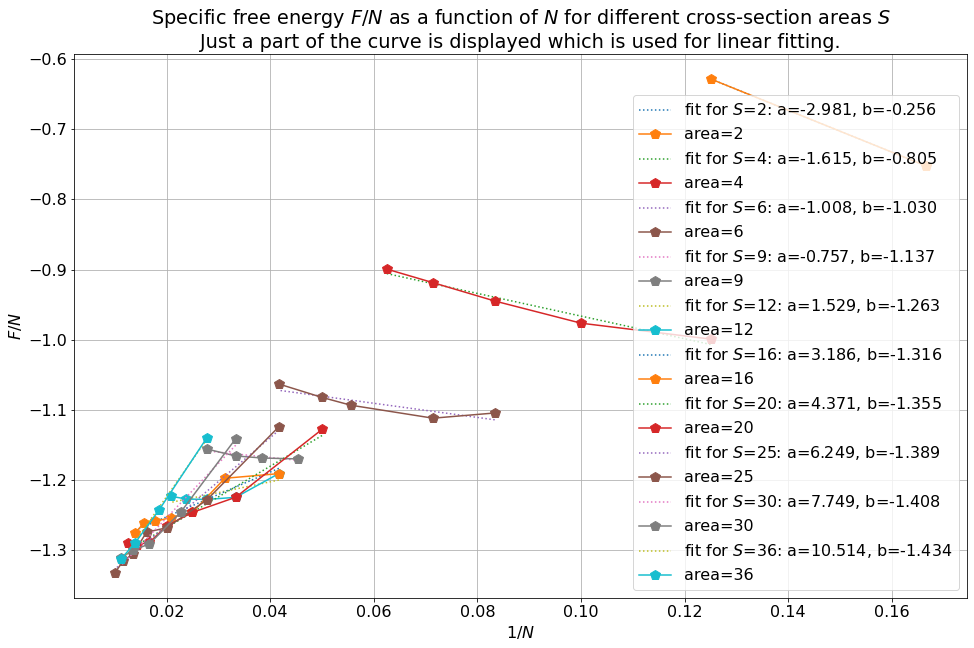

In [25]:
plt.rc('font', size=16)
plt.figure(figsize=(16,10))

min_energy_s={}

for k, group in aggregated.groupby('area'):
    area  = group['area'].values[0]
    group = group[(group['n'] >= s_min_n[area]) &(group['area'] > 1.0)][['n','en_mean']].dropna()
    
    # get fit parameters from scipy curve fit
    if len(group['en_mean']) >0:
        try:
            parameters, covariance = curve_fit(fun, 1/group['n'], group['en_mean'])
            plt.plot(1/group['n'], fun(1/group['n'], *parameters), linestyle='dotted', label='fit for $S$=%i: a=%5.3f, b=%5.3f' % (k,*parameters))
            min_energy_s[k] = parameters[1]
            plt.plot(1/group['n'], group['en_mean'], linestyle='-', marker='p', markersize=10, label='area='+str(int(k)))

        except: pass
#     plt.errorbar(1/group['n'], group['en_mean'], yerr=group['en_std'], capsize=4)
plt.grid()
plt.legend()
plt.xlabel('$1/N$')
plt.ylabel('$F/N$')
plt.title("""Specific free energy $F/N$ as a function of $N$ for different cross-section areas $S$
Just a part of the curve is displayed which is used for linear fitting.""")
# plt.xscale('log')
# plt.xticks(np.exp(np.linspace(np.log(0.01), np.log(.05), 12)), labels=['1/'+str(round(1/el,0) )for el in np.exp(np.linspace(np.log(0.01), np.log(.05), 12))], rotation=70)
plt.show()

2.0 7
4.0 8
6.0 8
9.0 8
12.0 8
16.0 10
20.0 8
25.0 10
30.0 8
36.0 8


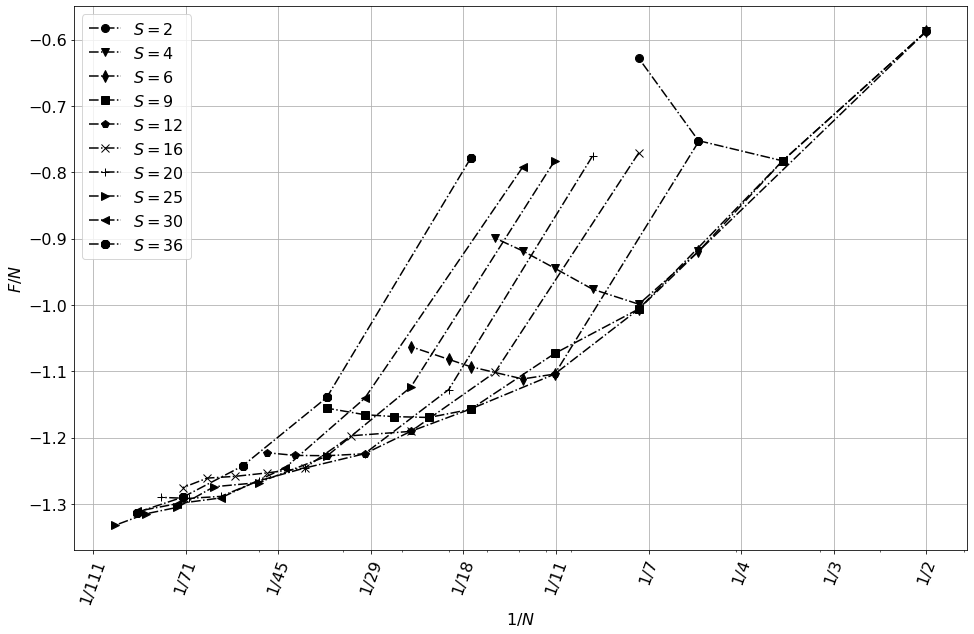

In [26]:
plt.rc('font', size=16)
plt.figure(figsize=(16,10))

min_energy_s={}

markers = iter(['o', 'v', 'd', 's', 'p','x', '+', '>','<', '8'])
for k, group in aggregated.groupby('area'):
    area  = group['area'].values[0]
    print(area, len(group['en_mean']))
#     group = group[(group['n'] >= s_min_n[area]) &(group['area'] > 1.0)][['n','en_mean']].dropna()
    
    # get fit parameters from scipy curve fit
    if len(group['en_mean']) >0:
        try:
#             parameters, covariance = curve_fit(fun, 1/group['n'], group['en_mean'])
#             plt.plot(1/group['n'], fun(1/group['n'], *parameters), linestyle='dotted', label='fit for $S$=%i: a=%5.3f, b=%5.3f' % (k,*parameters))
#             min_energy_s[k] = parameters[1]
            plt.plot(1/group['n'], group['en_mean'], linestyle='-.', color='black', marker=next(markers), markersize=8, label= "$S=%i$"%int(k))

        except: pass
#     plt.errorbar(1/group['n'], group['en_mean'], yerr=group['en_std'], capsize=4)
plt.grid()
plt.legend()
plt.xlabel('$1/N$')
plt.ylabel('$F/N$')
# plt.title("""Specific free energy $F/N$ as a function of $N$ for different cross-section areas $S$
# Just a part of the curve is displayed which is used for linear fitting.""")
plt.xscale('log')
plt.xticks(np.exp(np.linspace(np.log(0.009), np.log(.5), 10)), labels=['1/'+str(int(1/el) ) for el in np.exp(np.linspace(np.log(0.009), np.log(.5), 10))], rotation=70)
plt.show()

In [27]:
density_data

{'density_0.1':       x    y    z  en_mean  en_std     n  area
 0   1.0  5.0  5.0      NaN     NaN   2.0  25.0
 1   1.0  6.0  6.0      NaN     NaN   2.0  36.0
 2   1.0  7.0  7.0      NaN     NaN   4.0  49.0
 3   1.0  8.0  8.0      NaN     NaN   6.0  64.0
 4   2.0  4.0  4.0  -0.5874     NaN   2.0  16.0
 5   2.0  5.0  5.0  -0.7828     NaN   4.0  25.0
 6   2.0  6.0  6.0  -0.7523     NaN   6.0  36.0
 7   2.0  7.0  7.0  -0.7722     NaN   8.0  49.0
 8   2.0  8.0  8.0  -0.7736     NaN  12.0  64.0
 9   3.0  3.0  3.0  -0.5874     NaN   2.0   9.0
 10  3.0  4.0  4.0  -0.7828     NaN   4.0  16.0
 11  3.0  5.0  5.0  -0.9193     NaN   6.0  25.0
 12  3.0  6.0  6.0  -1.0787     NaN  10.0  36.0
 13  3.0  7.0  7.0  -1.1244     NaN  14.0  49.0
 14  3.0  8.0  8.0  -1.1428     NaN  18.0  64.0
 15  4.0  3.0  3.0  -0.5874     NaN   2.0   9.0
 16  4.0  4.0  4.0  -0.9193     NaN   6.0  16.0
 17  4.0  5.0  5.0  -1.0782     NaN  10.0  25.0
 18  4.0  6.0  6.0  -1.1683     NaN  14.0  36.0
 19  4.0  7.0  7.0  -1.22

In [100]:
s_to_select = 9.0
to_plot  = []
for c in density_data:
    if c in ['density_0.1','density_0.4']:
        tmp = density_data[c].copy()
        tmp = tmp[tmp['area'] == s_to_select]

        for k, v in tmp.groupby(tmp['area'] ):
            print(c, k)
            to_plot.append((c, v))
            
    

density_0.1 9.0
density_0.4 9.0


In [101]:
to_plot

[('density_0.1',
         x    y    z  en_mean    en_std     n  area
  0    3.0  3.0  3.0 -0.58740  0.000000   2.0   9.0
  1    4.0  3.0  3.0 -0.58740  0.000000   2.0   9.0
  3    5.0  3.0  3.0 -0.78280  0.000000   4.0   9.0
  5    6.0  3.0  3.0 -0.78280  0.000000   4.0   9.0
  7    7.0  3.0  3.0 -0.91930  0.000000   6.0   9.0
  9    8.0  3.0  3.0 -0.91930  0.000000   6.0   9.0
  11   9.0  3.0  3.0 -1.01200  0.000000   8.0   9.0
  13  10.0  3.0  3.0 -1.01200  0.000000   8.0   9.0
  15  11.0  3.0  3.0 -1.01200  0.000000   8.0   9.0
  17  12.0  3.0  3.0 -1.07870  0.000000  10.0   9.0
  19  13.0  3.0  3.0 -1.07870  0.000000  10.0   9.0
  21  14.0  3.0  3.0 -1.12840  0.000000  12.0   9.0
  23  15.0  3.0  3.0 -1.12840       NaN  12.0   9.0
  25  16.0  3.0  3.0 -1.16220       NaN  14.0   9.0
  27  17.0  3.0  3.0 -1.16220       NaN  14.0   9.0
  29  18.0  3.0  3.0 -1.17970       NaN  16.0   9.0
  31  19.0  3.0  3.0 -1.17930       NaN  16.0   9.0
  33  20.0  3.0  3.0 -1.18665  0.000212  18.0  

density_0.1
density_0.4


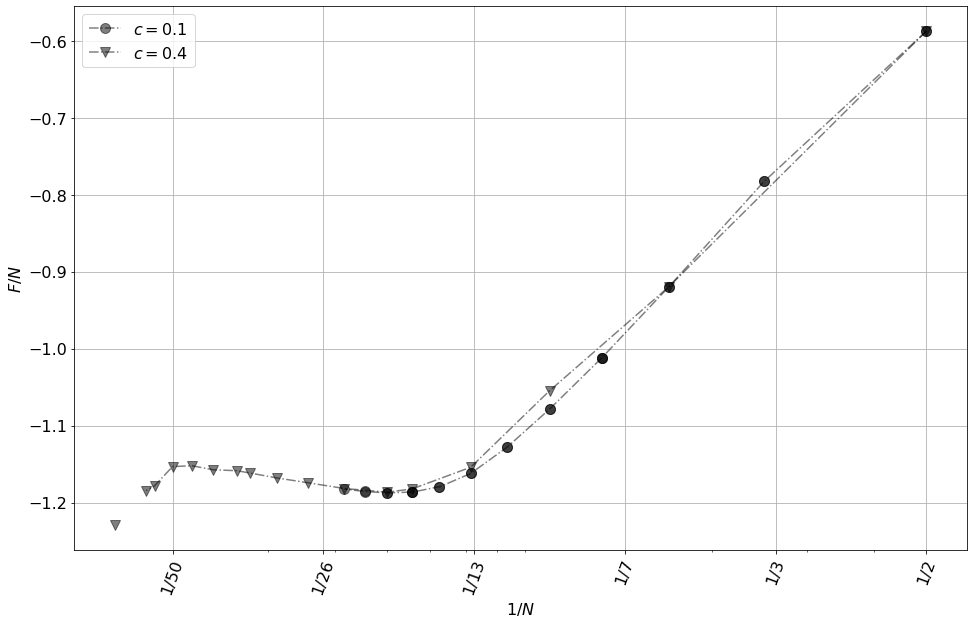

In [102]:
plt.rc('font', size=16)
plt.figure(figsize=(16,10))

min_energy_s={}

markers = iter(['o', 'v', 'D', 's', 'p','x', '+', '>','<', '8'])
for c, group in to_plot:
    print(c)
#     group = group[(group['n'] >= s_min_n[area]) &(group['area'] > 1.0)][['n','en_mean']].dropna()
    
    # get fit parameters from scipy curve fit
#     if len(group['en_mean']) >0:
    try:
#             parameters, covariance = curve_fit(fun, 1/group['n'], group['en_mean'])
#             plt.plot(1/group['n'], fun(1/group['n'], *parameters), linestyle='dotted', label='fit for $S$=%i: a=%5.3f, b=%5.3f' % (k,*parameters))
#             min_energy_s[k] = parameters[1]
            plt.plot(1/group['n'], group['en_mean'], linestyle='-.', color='black', marker=next(markers), markersize=10, alpha=0.5, label= "$c=%3.1f$"%float(c.split('_')[1]))

    except: pass
#     plt.errorbar(1/group['n'], group['en_mean'], yerr=group['en_std'], capsize=4)
plt.grid()
plt.legend()
plt.xlabel('$1/N$')
plt.ylabel('$F/N$')
# plt.title("""Specific free energy $F/N$ as a function of $N$ for different cross-section areas $S$
# Just a part of the curve is displayed which is used for linear fitting.""")
plt.xscale('log')
plt.xticks(np.exp(np.linspace(np.log(0.02), np.log(.5), 6)), labels=['1/'+str(int(1/el) ) for el in np.exp(np.linspace(np.log(0.02), np.log(.5), 6))], rotation=70)
plt.show()

In [89]:
s = np.array(list(min_energy.keys()))
en = np.array(list(min_energy.values()))
s

array([ 4.,  9., 16., 25., 36.])

In [90]:
def fun_square(x, a, b, c):
#     return a*x**2  + b*x +c
#     return a/x**(2.0) +c
    return a/x**b +c

#     return a*(x-1)*np.log(x-1) + b*(x-1)
#     return a*(np.exp(-x) - 1/np.e)


params, covariance = curve_fit(fun_square, s , en)
print(*params, )

2.0912819932833613 0.6946441284627273 -1.614631042316143


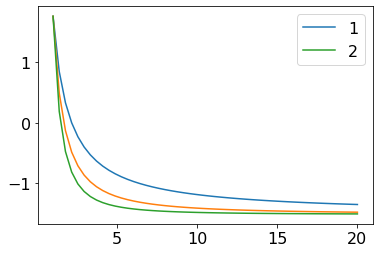

In [91]:
r = np.linspace(1, 20, 50)
plt.plot(r, (lambda x: 3.272/x**1 -1.512)(r), label='1')
plt.plot(r, (lambda x: 3.272/x**1.5 -1.512)(r))
plt.plot(r, (lambda x: 3.272/x**2 -1.512)(r), label='2')
plt.legend()

Text(0.5, 1.0, 'Specific free energy for as a function of cross-section area $S$ for limit $l \\to\\infty$')

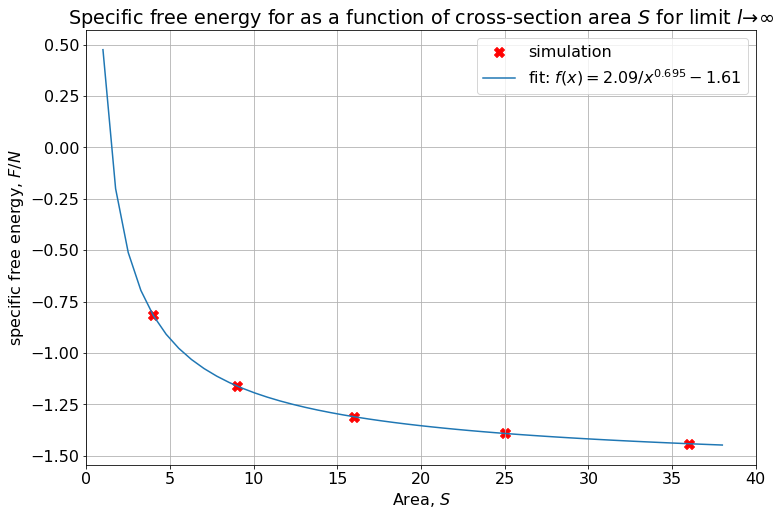

In [92]:
plt.figure(figsize=(12,8))
plt.scatter(s , en, marker='X', color='red', label='simulation', s=100)
r = np.linspace(1.001, max(s)+2, 50)
# print(r)
plt.plot(r, fun_square(r, *params), label = 'fit: $f(x)=%3.2f/x^{%4.3f}  %3.2f$'%(params[0], params[1], params[2]))
plt.xlabel('Area, $S$')
plt.ylabel('specific free energy, $F/N$')
plt.legend()
plt.grid()
plt.xlim(0, 40)
plt.title('Specific free energy for as a function of cross-section area $S$ for limit $l \\to\infty$')

In [105]:
fun_square(2.0, *params),fun_square(1.0, *params), np.log(6), 0.75489, 5./6

(-0.2561074824496201,
 0.6585232064036648,
 1.791759469228055,
 0.75489,
 0.8333333333333334)

In [106]:
def get_box(sx, sy, sz, l):
    
    variants = [(l[0], l[1], l[2]),
                (l[0], l[2], l[1]),
                (l[1], l[0], l[2]),
                (l[1], l[2], l[0]),
                (l[2], l[0], l[1]),
                (l[2], l[1], l[0])
                ]
    min_box = 1000
    for v in variants:
        box_x = sx.index(v[0])
        box_y = sy.index(v[1])
        box_z = sz.index(v[2])
        box = max(box_x, box_y, box_z)
        if box<min_box:
            min_box = box
            
    return min_box
        

In [107]:
sx = range(-2, 5)
sy = range(-1, 6)
sz = range(7)
box = (4,2,3)
get_box(sx, sy, sz, box) == 4

True

In [108]:
sx = range(7)
sy = range(-2, 5)
sz = range(-1,6)
box = (4,2,3)
get_box(sx, sy, sz, box) == 4

True

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0


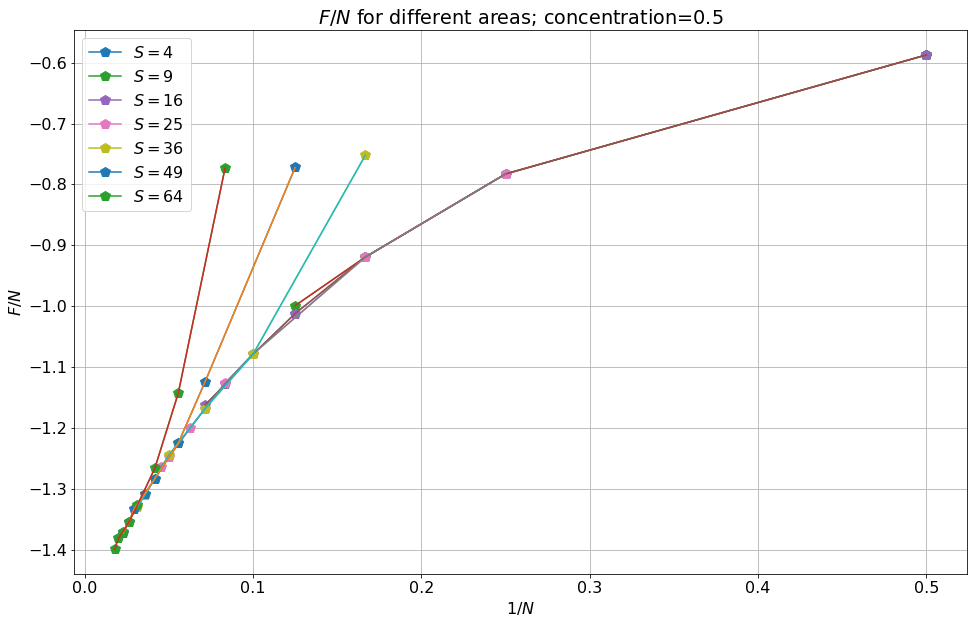

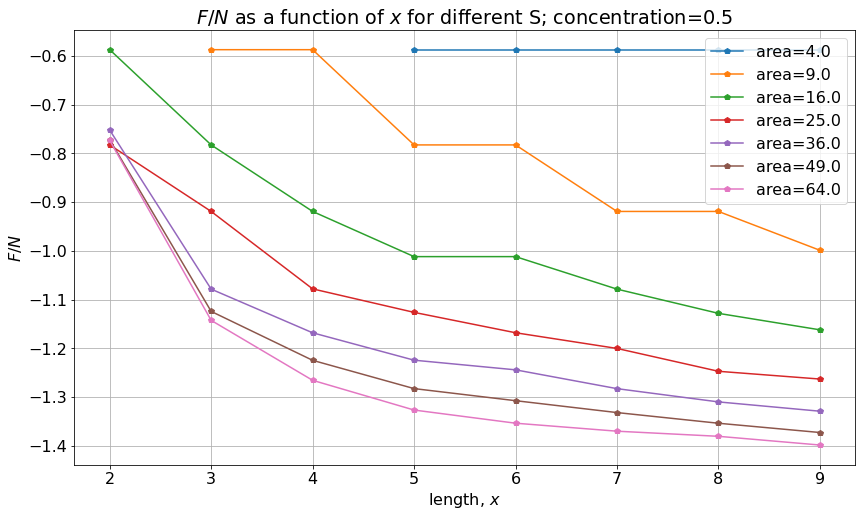

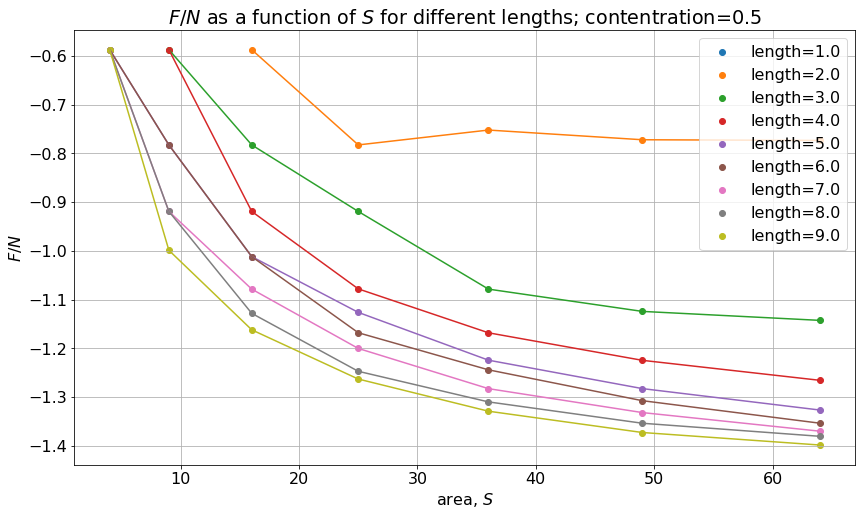

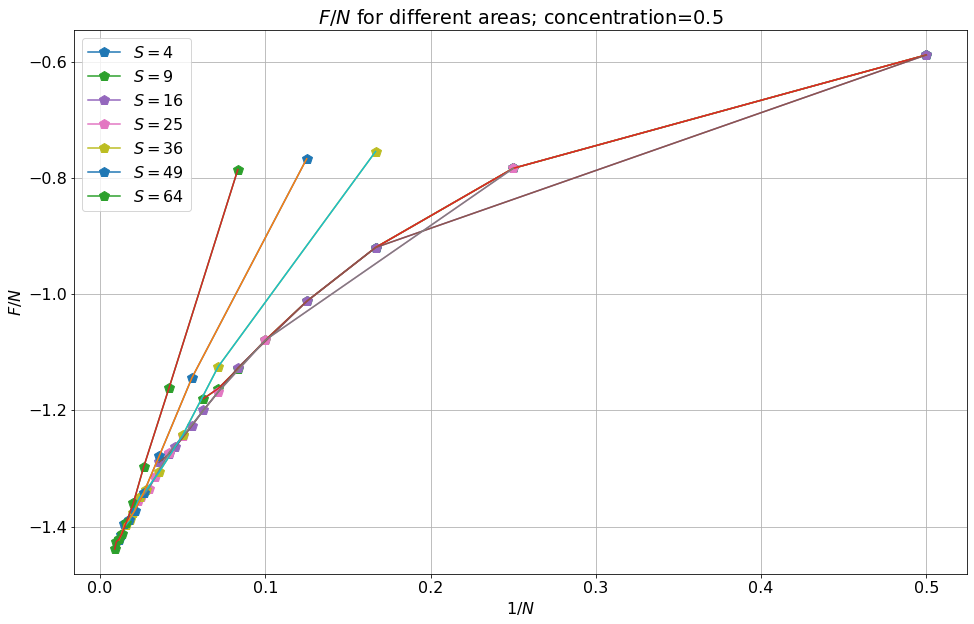

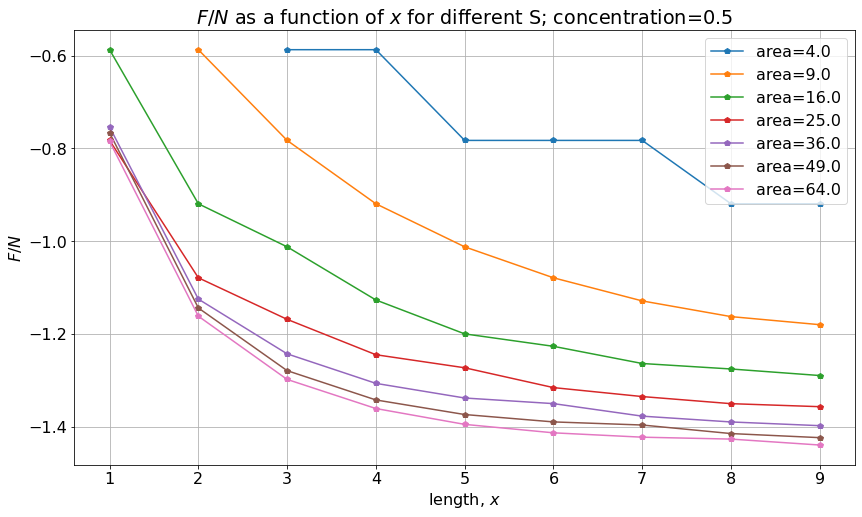

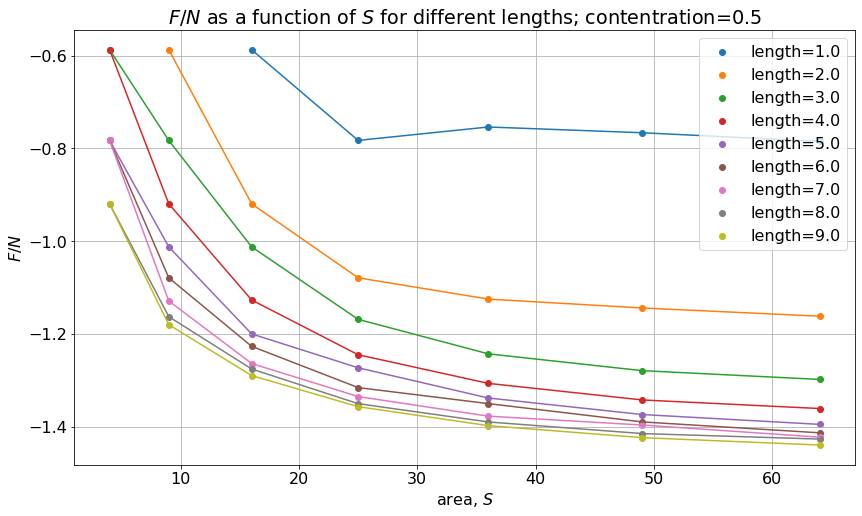

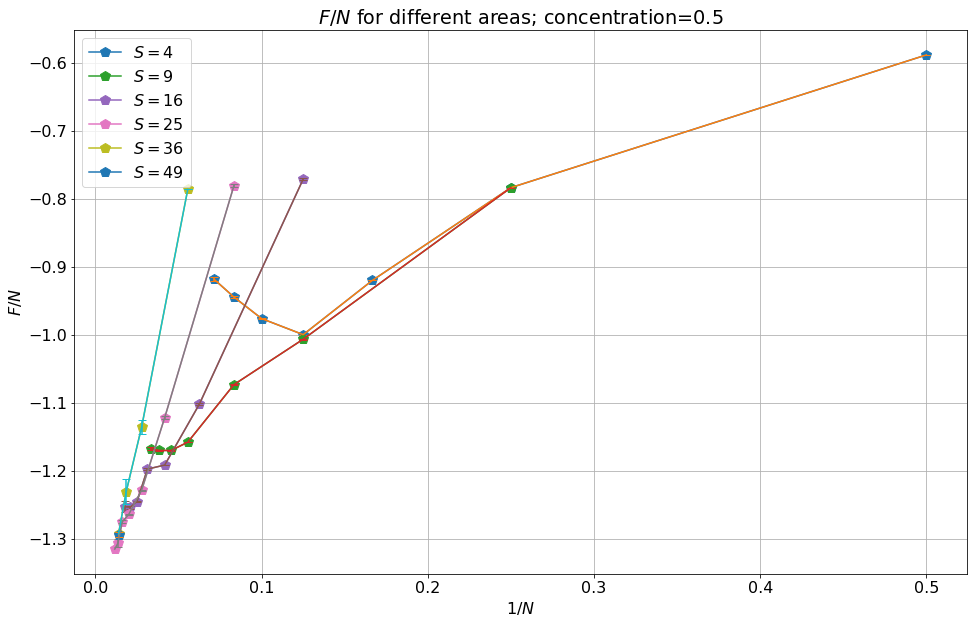

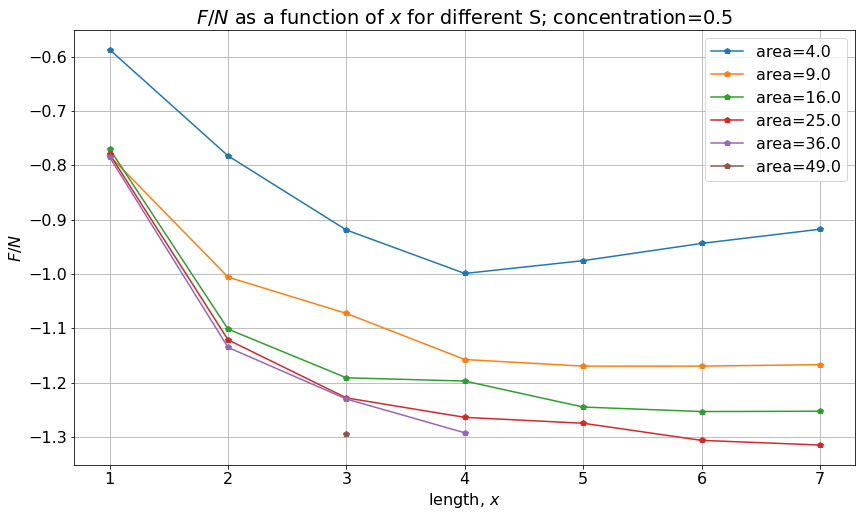

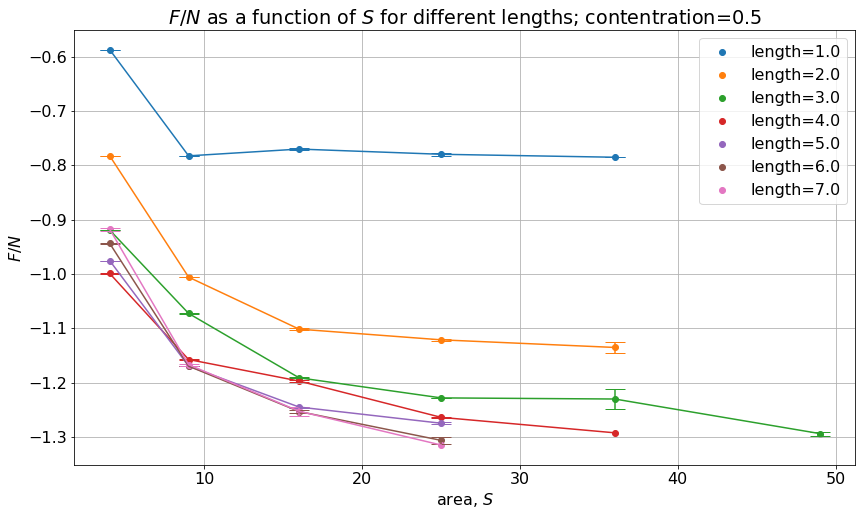

In [45]:
from chromosome_segregation.run_saw import load_and_process_results

load_and_process_results()

/var/folders/zr/t79_wh252w1d3vc6snt72_lh0000gn/T/ipykernel_1854/3608185589.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


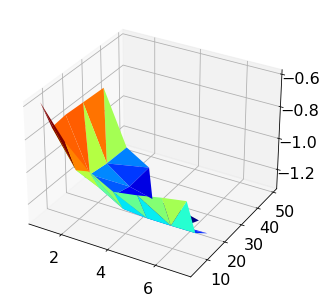

In [901]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(aggregated.x, aggregated.area, aggregated.en_mean, cmap=cm.jet, linewidth=0.2)


In [111]:
# mesh = ipv.plot_trisurf(x, y, z,  color='orange')
# ipv.show()


In [94]:
import ipyvolume as ipv
# # x, y, z, u, v = ipv.examples.klein_bottle(draw=False)
# ipv.figure()
# x = aggregated['x']
# y = aggregated['area']
# z = aggregated['en_mean']
# m = ipv.plot_mesh(x, y, z, wireframe=False)
# ipv.squarelim()
# ipv.show()

In [95]:
# a = np.arange(-5, 5)
# U, V = np.meshgrid(a, a)
# X = U
# Y = V
# Z = X*Y**2
# ipv.figure()
# ipv.plot_surface(X, Z, Y, color="orange")
# ipv.plot_wireframe(X, Z, Y, color="red")
# ipv.show()

In [152]:
# # aggregated['x'].values.reshape(10,4), aggregated['area'].values.reshape(9,4)
nans = np.full((6,7), np.nan)
nans


array([[nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan]])

In [170]:
X, Y = np.meshgrid(range(1,7), [4,9,16,25,36, 49])
# X, Y

In [171]:
nans, X, Y, X.shape

(array([[     nan,      nan,      nan,      nan,      nan,      nan,
              nan],
        [     nan,      nan,      nan,      nan,      nan,      nan,
              nan],
        [     nan,      nan,      nan,      nan,      nan,      nan,
              nan],
        [     nan,      nan,      nan,      nan,      nan,      nan,
              nan],
        [     nan,      nan,      nan,      nan,      nan,      nan,
              nan],
        [     nan, -0.78535, -1.1354 , -1.2303 , -1.2925 , -1.3047 ,
         -1.35945]]),
 array([[1, 2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5, 6],
        [1, 2, 3, 4, 5, 6]]),
 array([[ 4,  4,  4,  4,  4,  4],
        [ 9,  9,  9,  9,  9,  9],
        [16, 16, 16, 16, 16, 16],
        [25, 25, 25, 25, 25, 25],
        [36, 36, 36, 36, 36, 36],
        [49, 49, 49, 49, 49, 49]]),
 (6, 6))

In [101]:
# aggregated

In [179]:
from scipy import interpolate

# z = np.sin(xx**2+yy**2)

ttt = aggregated[aggregated['x']<9]
ttt = ttt[ttt['x']>0]
ttt= ttt.reset_index(drop=True)
print(ttt.columns)

# adding a row for x=1, y=1, z=2
# r = pd.DataFrame([[1,1,2, -np.log(6)/2, 0.0, 2.0, 2]], columns=list(ttt.columns))
# ttt = r.append(ttt)
# ttt= ttt.reset_index(drop=True)

print(ttt)

#  for all n=2 fix free energy to -np.log(6)/2

#ttt['en_mean'][ttt['n'] == 2.0] = -np.log(6)/2
#ttt['en_mean'][ttt['n'] == 4.0] = -np.log(24)/4


# healing
for nan_index in np.where(ttt['en_mean'] != ttt['en_mean'])[0]:
    print(nan_index)
    ttt['en_mean'][nan_index] =  2*ttt['en_mean'][nan_index-1] - ttt['en_mean'][nan_index-2]
    
print('after healing\n', ttt)
x = ttt['x'].unique()
y = np.sort(ttt['area'].unique())
z = ttt['en_mean']
print('lengths are', len(x), len(y), len(z))
print(x,y,z)
f = interpolate.interp2d(x, y, z, kind='linear')

print(ttt)


Index(['x', 'y', 'z', 'en_mean', 'en_std', 'n', 'area'], dtype='object')
      x    y    z  en_mean    en_std      n  area
0   1.0  2.0  2.0 -0.58740  0.000000    2.0   4.0
1   1.0  3.0  3.0 -0.78280  0.000000    4.0   9.0
2   1.0  4.0  4.0 -0.77030  0.001414    8.0  16.0
3   1.0  5.0  5.0 -0.77990  0.002546   12.0  25.0
4   1.0  6.0  6.0 -0.78535  0.000212   18.0  36.0
5   1.0  7.0  7.0      NaN       NaN   24.0  49.0
6   2.0  2.0  2.0 -0.78280  0.000000    4.0   4.0
7   2.0  3.0  3.0 -1.00600  0.000424    8.0   9.0
8   2.0  4.0  4.0 -1.10170  0.001838   16.0  16.0
9   2.0  5.0  5.0 -1.12140  0.002121   24.0  25.0
10  2.0  6.0  6.0 -1.13540  0.010324   36.0  36.0
11  2.0  7.0  7.0      NaN       NaN   48.0  49.0
12  3.0  2.0  2.0 -0.91930  0.000000    6.0   4.0
13  3.0  3.0  3.0 -1.07280  0.000283   12.0   9.0
14  3.0  4.0  4.0 -1.19125  0.000636   24.0  16.0
15  3.0  5.0  5.0 -1.22825  0.000495   36.0  25.0
16  3.0  6.0  6.0 -1.23030  0.018950   54.0  36.0
17  3.0  7.0  7.0 -1.29395 

In [180]:
# np.where(ttt['en_mean'] != ttt['en_mean'])[0][0]
np.log(4), np.log(6)/2, np.log(22.9)/4, np.log(24)/4,

(1.3862943611198906,
 0.8958797346140275,
 0.7827842276400485,
 0.7945134575869864)

In [182]:
nans = np.full((len(x), len(y)), np.nan)
X, Y = np.meshgrid(x, y)

nans

array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]])

In [183]:
for index, row in ttt.iterrows():
    try:
        idx = np.intersect1d(np.where(X.ravel()==row['x']) , np.where(Y.ravel()==row['area']) )[0]
        nans.ravel()[idx] = row['en_mean']
    except:
        pass
nans

array([[-0.5874 , -0.7828 , -0.9193 , -0.99925, -0.97565, -0.94395],
       [-0.91785, -0.7828 , -1.006  , -1.0728 , -1.1576 , -1.1698 ],
       [-1.16975, -1.1671 , -0.7703 , -1.1017 , -1.19125, -1.19725],
       [-1.2451 , -1.25335, -1.2528 , -0.7799 , -1.1214 , -1.22825],
       [-1.26405, -1.2749 , -1.3064 , -1.315  , -0.78535, -1.1354 ],
       [-1.2303 , -1.2925 , -1.3047 , -1.35945, -1.3772 , -0.7908 ],
       [-1.1494 , -1.29395, -1.32095, -1.3345 , -1.4125 , -1.4394 ]])

In [189]:
x_new = np.linspace(1,7,100)
s_new = np.linspace(4,49,100)
en_new = f(x_new, s_new)

XX, YY = np.meshgrid(x_new, s_new)
en_new

array([[-0.5874    , -0.59924242, -0.61108485, ..., -0.92101364,
        -0.91943182, -0.91785   ],
       [-0.60516364, -0.61715923, -0.62915482, ..., -0.94341433,
        -0.94196171, -0.94050909],
       [-0.62292727, -0.63507603, -0.64722479, ..., -0.96581501,
        -0.9644916 , -0.96316818],
       ...,
       [-0.79041888, -0.81211598, -0.83381307, ..., -1.4318673 ,
        -1.43345883, -1.43505035],
       [-0.79060944, -0.81232466, -0.83403987, ..., -1.43400335,
        -1.43561426, -1.43722517],
       [-0.7908    , -0.81253333, -0.83426667, ..., -1.43613939,
        -1.4377697 , -1.4394    ]])

In [190]:
import ipyvolume as ipv

ipv.figure()
ipv.plot_surface(X, nans, Y, color="orange")
ipv.plot_wireframe(XX, en_new, YY, color='blue')
ipv.ylim(-1.5,-.5)
ipv.xlabel('x')
ipv.ylabel('free energy')
ipv.zlabel('area S')
ipv.show()

In [133]:
from scipy import ndimage, misc

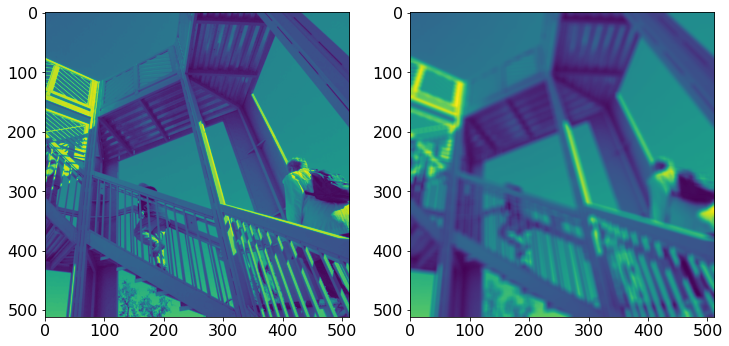

In [134]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.uniform_filter(ascent, size=10)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()


In [135]:
vals = z.values.reshape(6,7).T


vals.flatten().shape, len(x), len(y)

((42,), 7, 6)

In [136]:
f = interpolate.interp2d(x, y, vals.T.flatten(), kind='linear')

x_new = np.linspace(1,8,100)
s_new = np.linspace(2,36,100)
en_new_smoothed = f(x_new, s_new)

XX, YY = np.meshgrid(x_new, s_new)

In [137]:
# using smoothing, after interpolation.



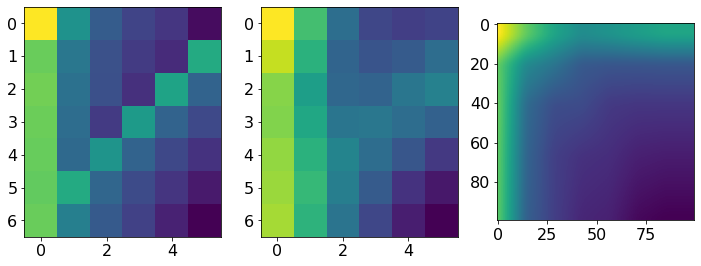

In [138]:
z.shape
fig = plt.figure(figsize=(12,8))

smoothed = ndimage.uniform_filter(vals, size=3)
smoothed_1 = ndimage.uniform_filter(en_new_smoothed, size=5)

ax1 = fig.add_subplot(131)  # left side
ax2 = fig.add_subplot(132)  # ri
ax3 = fig.add_subplot(133)
ax1.imshow(vals)
ax2.imshow(smoothed)
ax3.imshow(smoothed_1)

# 
plt.show()


In [149]:
ipv.figure()
ipv.plot_surface(X, vals, Y, color="orange")
# ipv.plot_wireframe(X, smoothed, Y, color='black')
# ipv.plot_wireframe(XX, en_new_smoothed, YY, color='red')
# ipv.plot_wireframe(XX, smoothed_1, YY, color='blue')

ipv.ylim(-1.5,-.5)
ipv.xlabel('x')
ipv.ylabel('free energy')
ipv.zlabel('area S')
ipv.show()

# vals.T, nans

In [140]:
# np.where(XX == 8.0), np.where(YY >= 19.8), YY.shape
i1 = np.abs(x_new-8.0).argmin()#%XX.shape[0]
i2 = np.abs(s_new-19.8).argmin()#%XX.shape[0]
i1, i2, en_new[i1 ,i2]

(99, 52, -1.300756565656566)

In [129]:
# def geten(v1, v2)

In [130]:
# alpha = 0.9
# lmax = 8
# lmin = 1

# lambdas = np.linspace(1-alpha/lmin, 1-alpha/lmax, 5)
# S = 25
# rho = 0.5


In [131]:
# tot_ens = []
# ll1=[]
# ll2 = []
# ll3 = []
# for  lbd_ in lambdas:
#     l0 = alpha/(1-lbd_)
#     S1 = S*(1-lbd_)
#     S2 = S*lbd_
#     t_crit  = l0*rho*S1*S2/(2*S1+S2)
#     l_crit = 2*l0*S1/(2*S1+S2)
#     T = int(l0*rho*S1)
#     print(20*'XXXX')
#     print('S=%3.2f, lambda=%3.2f, T=%i, t_crit=%i, S1=%3.1f, S2=%3.1f, l0=%3.1f'%(S, lbd_, T, t_crit, S1, S2, l0))
#     ens = []
#     for t in range(T+1):
#         print('lambda=%3.2f, t=%i' %(lbd_, t))
# #         print(20*'XXXX')

#         l_1 = l0 - t/(rho*S1)
        
#         if t<t_crit:
#             l_2 = 2*t/rho/S2
#             l_3 = 0
#         else:
#             l_2 = l_crit - (t-t_crit)/rho/S1
#             l_3 = ((2+S2/S1)/rho/S)* (t-t_crit)
            
#         i1_1 = np.abs(x_new-l_1).argmin()
#         i2_1 = np.abs(s_new-S1).argmin()
#         en1 = en_new[i1_1 ,i2_1]
        
#         i1_2 = np.abs(x_new-l_2).argmin()
#         i2_2 = np.abs(s_new-S2).argmin()
#         en2 = en_new[i1_2 ,i2_2]
        
#         i1_3 = np.abs(x_new-l_3).argmin()
#         i2_3 = np.abs(s_new-S).argmin()
#         en3 = en_new[i1_3 ,i2_3]
        
#         print("(l_1=%3.1f, S1=%3.1f; en=%4.3f, n=%i), (l_2=%3.1f, S2=%3.1f; en=%4.3f, n=%i), (l_3=%3.1f, S=%3.1f; ; en=%4.3f, n=%3.1f)"
#               %(l_1, S1, en1, rho*S1*l_1, l_2, S2, en2, rho*S2*l_2, l_3,S, en3, rho*S*l_3))
#         ens.append((en1*l_1*S1 + en2*l_2*S2 + en3*l_3*S)/(l_1*S1 + l_2*S2 + l_3*S))
#         ll1.append(l_1); ll2.append(l_2);ll3.append(l_3);
#     tot_ens.append((ens, lbd_))
# #     break

In [132]:
# plt.figure(figsize=(16,8))
# for ens, l  in  tot_ens:
#     plt.plot(ens, label= '$\lambda$='+'%3.2f'%l)

# # plt.plot(ll1, label='l1', color='red' , alpha = .5, linewidth=2)
# # plt.plot(ll2, label='l2', alpha = .5,  linewidth=5, linestyle='dashed')
# # plt.plot(ll3, label='l3', linestyle='-.')

# plt.legend()
# plt.grid()

In [141]:
l0 = 8
lambdas = list(np.arange(0.05, 0.6, 0.05))
if .5 not in lambdas:
    lambdas += [0.5]
S=36
rho=0.5
# lambdas  = np.array(lambdas, np.array(0.5))
lambdas                   

[0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.3,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55]

In [142]:
params_shifted = params.copy()
params_shifted[0] = 1

params_shifted[1] = .833
params_shifted[2] = 0.0

params_shifted, params

(array([1.   , 0.833, 0.   ]), array([ 2.09128199,  0.69464413, -1.61463104]))

In [143]:
tot_ens = []
tot_ens_theory = []
en_crit_lambda = []
nu  =  0.6

for lbd_ in lambdas:
    S1 = S*(1-lbd_)
    S2 = S*lbd_
    t_crit  = l0*rho*S1*S2/(2*S1+S2)
    l_crit = 2*l0*S1/(2*S1+S2)
    print('t_crit=%4.1f, lambda=%4.2f, T=%4.1f '%(t_crit, lbd_, l0*rho*S1))
    ens=[]
    ens_theory = []
    t_save = 0
    for l1 in np.linspace(l0, 0,  100):
        t = (l0-l1)*rho*S1
        print('t=', t)
        if t<= t_crit:
            l2 = 2*t/rho/S2
            l3 = 0
        else:
            l2 =  l_crit - (t-t_crit)/rho/S1
            l3 = (2+S2/S1)*(t-t_crit)/rho/S

        i1_1 = np.abs(x_new-l1).argmin()
        i2_1 = np.abs(s_new-S1).argmin()
#         en1 = en_new[i1_1 ,i2_1]
        en1 = en_new_smoothed[i1_1 ,i2_1]
#         en1 = smoothed_1[i1_1 ,i2_1]
#         en1 = fun_square(S1, *best_params)
#         en1 = fun_square(S1, *params)

        i1_2 = np.abs(x_new-l2).argmin()
        i2_2 = np.abs(s_new-S2).argmin()
#         en2 = en_new[i1_2 ,i2_2]
        en2 = en_new_smoothed[i1_2 ,i2_2]
#         en2 = smoothed_1[i1_2 ,i2_2]
#         en2 = fun_square(S2, *best_params)
#         en2 = fun_square(S2, *params)

        
        i1_3 = np.abs(x_new-l3).argmin()
        i2_3 = np.abs(s_new-S).argmin()
#         en3 = en_new[i1_3 ,i2_3]
        en3 = en_new_smoothed[i1_3 ,i2_3]
#         en3 = smoothed_1[i1_3 ,i2_3]
#         en3 = fun_square(S, *best_params)
#         en3 = fun_square(S, *params)

        
        print("(l_1=%3.1f, S1=%3.1f; en=%4.3f, n=%i), (l_2=%3.1f, S2=%3.1f; en=%4.3f, n=%i), (l_3=%3.1f, S=%3.1f; ; en=%4.3f, n=%3.1f)"
              %(l1, S1, en1, rho*S1*l1, l2, S2, en2, rho*S2*l2, l3,S, en3, rho*S*l3))

        en  = (en1*l1*S1 + en2*l2*S2 + en3*l3*S)/(l1*S1 + l2*S2 + l3*S)
        ens.append(en)
        
        if (t > t_crit) and (t_save < t_crit):
            en_crit_lambda.append(en)
            t_save = t
        else:
            t_save = t
            
        
        n1 = l1/S1**(0.5*(1-1/nu))
        n2 = l2/S2**(0.5*(1-1/nu))
        n  = l3/S**(0.5*(1-1/nu))
        g1 = S1**(.5/nu)
        g2 = S2**(.5/nu)
        g3 = S**(.5/nu)

        en_theory = (l1/S1**(.5) + l2/S2**(.5) + l3/S**(.5))/ (n1+n2+n)
        ens_theory.append( en_theory )
        
    tot_ens.append((ens, lbd_))
    tot_ens_theory.append((ens_theory, lbd_))


t_crit= 3.5, lambda=0.05, T=136.8 
t= 0.0
(l_1=8.0, S1=34.2; en=-1.377, n=136), (l_2=0.0, S2=1.8; en=-0.587, n=0), (l_3=0.0, S=36.0; ; en=-0.918, n=0.0)
t= 1.3818181818181754
(l_1=7.9, S1=34.2; en=-1.375, n=135), (l_2=3.1, S2=1.8; en=-0.778, n=2), (l_3=0.0, S=36.0; ; en=-0.918, n=0.0)
t= 2.763636363636366
(l_1=7.8, S1=34.2; en=-1.373, n=134), (l_2=6.1, S2=1.8; en=-0.781, n=5), (l_3=0.0, S=36.0; ; en=-0.918, n=0.0)
t= 4.145454545454541
(l_1=7.8, S1=34.2; en=-1.371, n=132), (l_2=7.8, S2=1.8; en=-0.785, n=6), (l_3=0.1, S=36.0; ; en=-0.918, n=1.3)
t= 5.527272727272732
(l_1=7.7, S1=34.2; en=-1.367, n=131), (l_2=7.7, S2=1.8; en=-0.784, n=6), (l_3=0.2, S=36.0; ; en=-0.918, n=4.1)
t= 6.909090909090907
(l_1=7.6, S1=34.2; en=-1.366, n=129), (l_2=7.6, S2=1.8; en=-0.784, n=6), (l_3=0.4, S=36.0; ; en=-0.918, n=7.0)
t= 8.290909090909082
(l_1=7.5, S1=34.2; en=-1.364, n=128), (l_2=7.5, S2=1.8; en=-0.784, n=6), (l_3=0.5, S=36.0; ; en=-0.918, n=9.8)
t= 9.672727272727274
(l_1=7.4, S1=34.2; en=-1.362, n=1

Text(0, 0.5, 'specific free energy,  $F/N$')

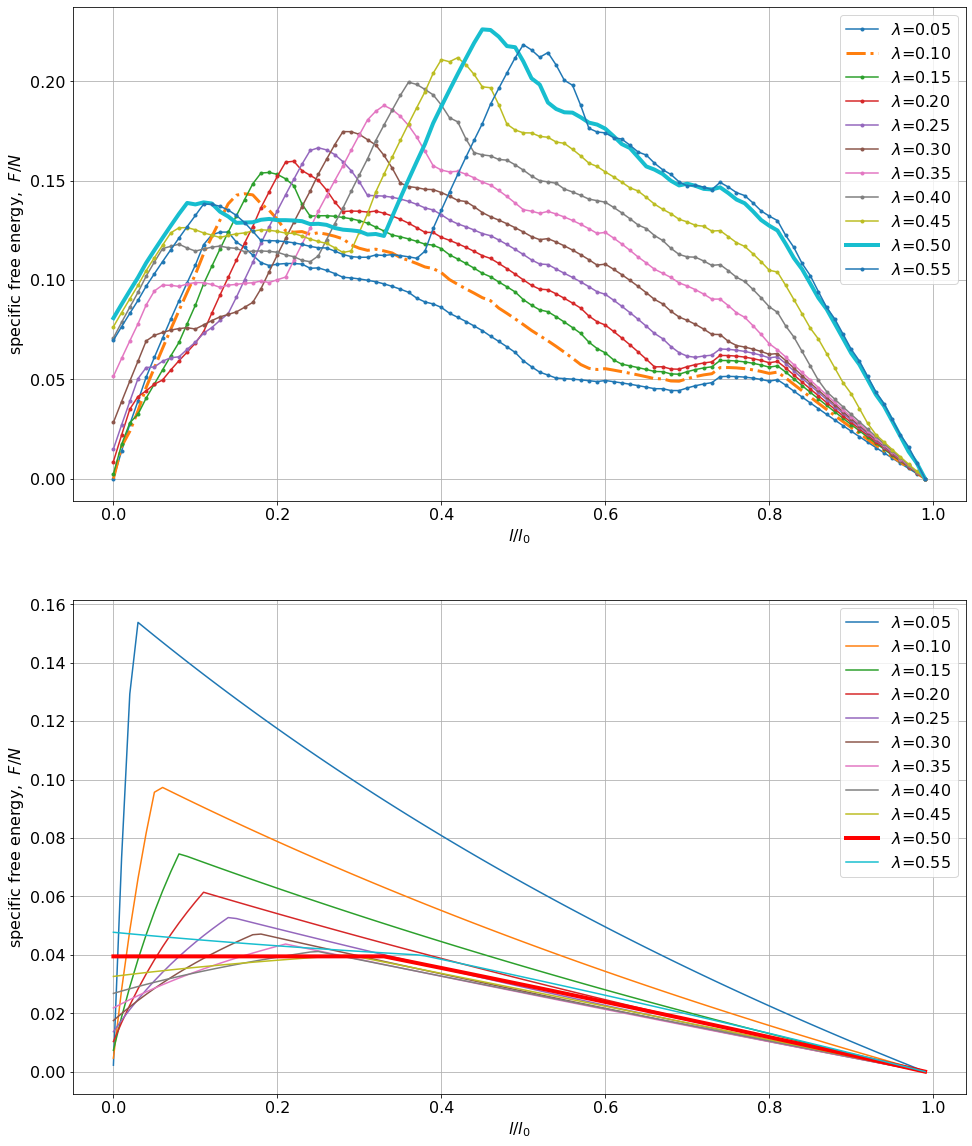

In [144]:
plt.figure(figsize=(16,20))

plt.subplot(2, 1, 1)
for ens, l  in  tot_ens:
    ens = [el - ens[-1] for el  in ens]
    x = [el/len(ens) for el in range(len(ens))]
    if round(l,2) == 0.50:
        plt.plot(x,ens,  linewidth=4, label= '$\lambda$='+'%3.2f'%l)
    elif round(l,2)== 0.10:
        plt.plot(x,ens,  linewidth=3, linestyle='-.', label= '$\lambda$='+'%3.2f'%l)
    else:
#         pass
        plt.plot(x,ens, marker='.', label= '$\lambda$='+'%3.2f'%l)

plt.grid()
plt.legend()
plt.xlabel('$l/l_0$')
plt.ylabel("specific free energy,  $F/N$")

plt.subplot(2, 1, 2)
for ens_theory, l in tot_ens_theory:
        ens_theory = [el - ens_theory[-1] for el  in ens_theory]
        if l == 0.5:
            plt.plot(x,ens_theory, color='red', linewidth=4, label= '$\lambda$='+'%3.2f'%l)
        else:
            plt.plot(x,ens_theory, marker='', label= '$\lambda$='+'%3.2f'%l)
    
plt.grid()
plt.legend()
plt.xlabel('$l/l_0$')
plt.ylabel("specific free energy,  $F/N$")

# what are the optimal a,b,c for fitting?

In [904]:
nu  =  0.6
l0 = 8
lambdas = list(np.arange(0.05, 0.6, 0.05))
if .5 not in lambdas:
    lambdas += [0.5]
S=36
rho=0.5

params_ = []
for l1 in np.linspace(l0, 0,  100):

    ll2 = []
    ll3 = []
    ens=[]
    ens_theory = []
    for lbd_ in lambdas:
        S1 = S*(1-lbd_)
        S2 = S*lbd_
        t_crit  = l0*rho*S1*S2/(2*S1+S2)
        l_crit = 2*l0*S1/(2*S1+S2)
#         print('t_crit=%4.1f, lambda=%4.2f, T=%4.1f '%(t_crit, lbd_, l0*rho*S1))

        t_save = 0
   
#     for l1 in np.linspace(l0, 0,  100)[75:76]:
        t = (l0-l1)*rho*S1
#         print('t=', t)
        if t<= t_crit:
            l2 = 2*t/rho/S2
            l3 = 0
        else:
            l2 =  l_crit - (t-t_crit)/rho/S1
            l3 = (2+S2/S1)*(t-t_crit)/rho/S

        ll2.append(l2)
        ll3.append(l3)
#         en1 = fun_square(S1, *params_shifted)
        
#         en2 = fun_square(S2, *params_shifted)

#         en3 = fun_square(S, *params_shifted)

        
#         print("(l_1=%3.1f, S1=%3.1f; en=%4.3f, n=%i), (l_2=%3.1f, S2=%3.1f; en=%4.3f, n=%i), (l_3=%3.1f, S=%3.1f; ; en=%4.3f, n=%3.1f)"
#               %(l1, S1, en1, rho*S1*l1, l2, S2, en2, rho*S2*l2, l3,S, en3, rho*S*l3))

#         en  = (en1*l1*S1 + en2*l2*S2 + en3*l3*S)/(l1*S1 + l2*S2 + l3*S)
#         ens.append(en)
        
#         if (t > t_crit) and (t_save < t_crit):
#             en_crit_lambda.append(en)
#             t_save = t
#         else:
#             t_save = t
            
        
        n1 = l1/S1**(0.5*(1-1/nu))
        n2 = l2/S2**(0.5*(1-1/nu))
        n  = l3/S**(0.5*(1-1/nu))
        g1 = S1**(.5/nu)
        g2 = S2**(.5/nu)
        g3 = S**(.5/nu)

        en_theory = (l1/S1**(.5) + l2/S2**(.5) + l3/S**(.5))/ (n1+n2+n)
        ens_theory.append( en_theory )
        
        
    LL = [np.array([l1]*len(ll2)), np.array(ll2), np.array(ll3)]
    x0 = np.array([1.,2.,1.])
    res_1 = least_squares(find_params, x0, args=(S, LL, np.array(lambdas), ens_theory ) , method='trf',max_nfev=500)  
    
    print(l1, res_1.x)  
    params_.append(res_1.x)
    tot_ens.append((ens, lbd_))
    tot_ens_theory.append((ens_theory, lbd_))
    

8.0 [1.00000000e+00 8.33333333e-01 1.29351083e-14]
7.91919191919192 [9.84613402 1.8673611  0.04495463]
7.838383838383838 [9.08915369 1.86631457 0.04843784]
7.757575757575758 [8.67049277 1.85418124 0.04966233]
7.6767676767676765 [8.69079067 1.83127528 0.04763506]
7.595959595959596 [8.70016647 1.81073453 0.04535293]
7.515151515151516 [8.7271473  1.7996259  0.04391496]
7.434343434343434 [8.76884395 1.78648472 0.0419518 ]
7.353535353535354 [8.82166661 1.77888284 0.04047255]
7.2727272727272725 [8.88339713 1.77001946 0.03876912]
7.191919191919192 [8.95618607 1.76177632 0.03696896]
7.111111111111111 [9.03526861 1.75809811 0.03574044]
7.03030303030303 [9.12234732 1.74930394 0.03369101]
6.94949494949495 [9.21920666 1.74200782 0.03173134]
6.8686868686868685 [9.31495919 1.73960346 0.03056178]
6.787878787878788 [9.42014829 1.73306232 0.02865539]
6.707070707070707 [9.52601356 1.72872424 0.02711448]
6.626262626262626 [9.60351718 1.73269133 0.02730431]
6.545454545454545 [9.65297346 1.74077564 0.02850

In [905]:
best_params = np.mean(np.array(params_[1:-1]), axis=0)
best_params

array([9.61134658, 1.84487186, 0.04448637])

In [630]:
# S = 36

def find_params(x, s, l,lambdas, y):
    
    num = ((x[0]/(s*(1-lambdas))**x[1] + x[2])*s*(1-lambdas)*l[0] +
           (x[0]/(s*lambdas)**x[1] +x[2])*s*lambdas*l[1] + 
           (x[0]/(s**x[1]) +x[2])*s*l[2]
          )
    den = s*(1-lambdas)*l[0]+s*lambdas*l[1]+s*l[2]
    return num/den  - y



# SS = [S1, S2, S]#*len(l1)]

LL = [np.array([l1]*len(ll2)), np.array(ll2), np.array(ll3)]


x0 = np.array([1.,2.,1.])
res_1 = least_squares(find_params, x0, args=(S, LL, np.array(lambdas), ens_theory ) , method='trf',max_nfev=500)  
    
res_1
# print(LL[0])

 active_mask: array([0., 0., 0.])
        cost: 1.196574382305866e-25
         fun: array([1.47493129e-13, 1.47486190e-13, 1.47500068e-13, 1.47507007e-13,
       1.47500068e-13, 1.47500068e-13, 1.47493129e-13, 1.47507007e-13,
       1.47507007e-13, 1.47507007e-13, 1.47486190e-13])
        grad: array([ 1.21904993e-15, -5.53730120e-15,  1.62248687e-12])
         jac: array([[ 7.51346630e-04, -3.41284800e-03,  1.00000000e+00],
       [ 7.51346630e-04, -3.41284800e-03,  1.00000000e+00],
       [ 7.51346630e-04, -3.41284800e-03,  1.00000000e+00],
       [ 7.51346630e-04, -3.41284800e-03,  1.00000000e+00],
       [ 7.51346262e-04, -3.41284823e-03,  1.00000000e+00],
       [ 7.51346262e-04, -3.41284823e-03,  1.00000000e+00],
       [ 7.51346630e-04, -3.41284800e-03,  1.00000000e+00],
       [ 7.51346262e-04, -3.41284823e-03,  1.00000000e+00],
       [ 7.51346997e-04, -3.41284800e-03,  1.00000000e+00],
       [ 7.51346630e-04, -3.41284823e-03,  1.00000000e+00],
       [ 7.51346630e-04, -3.412

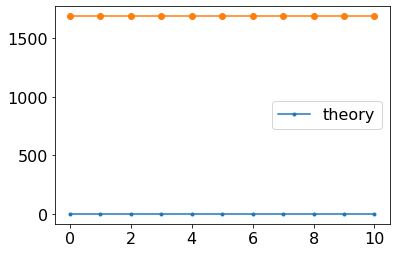

In [634]:
plt.plot(ens_theory, marker='.', label='theory')

vals = [((res_1.x[0]*((S*(1-lambdas[i]))**res_1.x[1]) + res_1.x[2])*S*(1-lambdas[i])*LL[0][i]+
       (res_1.x[0]*((S*lambdas[i])**res_1.x[1]) + res_1.x[2])*S*lambdas[i]*LL[1][i] +
        (res_1.x[0]*(S**res_1.x[1]) + res_1.x[2])*S*LL[2][i]) / (S*(1-lambdas[i])*LL[0][i]+S*lambdas[i]*LL[1][i]+S*LL[2][i]) 
        for i in range(len(lambdas))]
plt.plot(vals, marker='o')
plt.legend()


In [612]:
from scipy.optimize import least_squares

# def find_params(x, t, y):
#     return x[0]*(t**x[1]) +x[2] - y
    
# # tmps = [el[0] for el in tot_ens_theory if el[1] == 0.05][0]

# for en, lbd in tot_ens_theory:
    
#     x0 = np.array([1.,1.,1.])
#     res_1 = least_squares(find_params, x0, args=(range(len(en)), np.array(en) ) )
#     print("lambda = %3.2f, optimal = %s"%(lbd, res_1.x))

Text(0.5, 1.0, 'Specific free energy for as a function of cross-section area $S$ for limit $l \\to\\infty$')

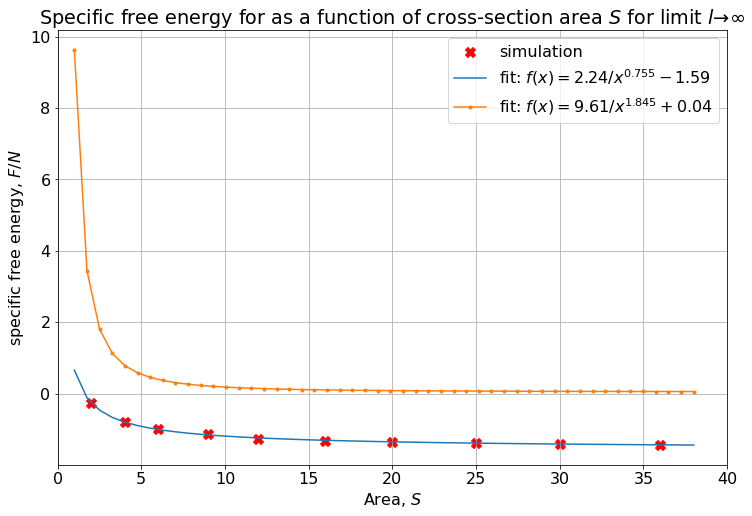

In [649]:
plt.figure(figsize=(12,8))
plt.scatter(s , en, marker='X', color='red', label='simulation', s=100)
r = np.linspace(1.001, max(s)+2, 50)
# print(r)
plt.plot(r, fun_square(r, *params), label = 'fit: $f(x)=%3.2f/x^{%4.3f}  %3.2f$'%(params[0], params[1], params[2]))
plt.plot(r, fun_square(r, *best_params), label = 'fit: $f(x)=%3.2f/x^{%4.3f} + %3.2f$'%(best_params[0], best_params[1], best_params[2]), marker='.')

plt.xlabel('Area, $S$')
plt.ylabel('specific free energy, $F/N$')
plt.legend()
plt.grid()
plt.xlim(0, 40)
plt.title('Specific free energy for as a function of cross-section area $S$ for limit $l \\to\infty$')

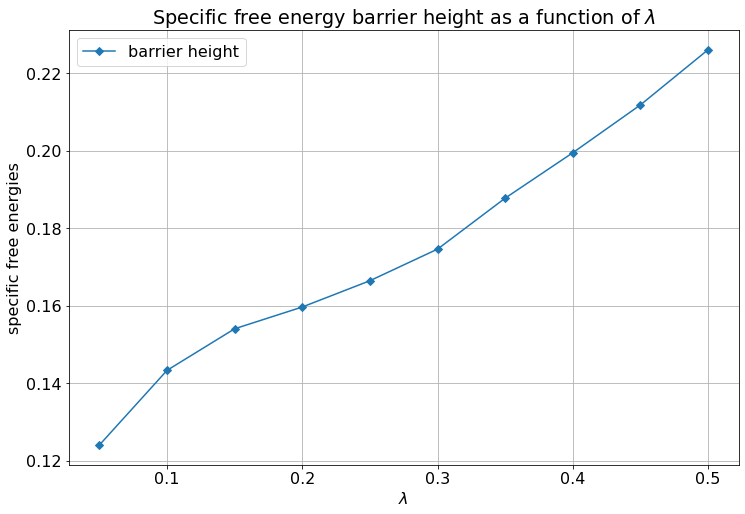

In [145]:
# arr = np.array(tot_ens)
# arr.shape
S = 32; l0=8;
deltas_lambdas = [(np.max(np.array(el[0])) - np.array(el[0])[-1], el[1]) for el in tot_ens]

deltas, lambdas = list(zip(*deltas_lambdas[:-1]))

# l_crit = 2*l0*S1/(2*S1+S2)

# v = [.001*lbd*S*2*l0*(1-lbd)/(2-lbd) for lbd in lambdas
# v = [.01/rho for lbd in lambdas]

v = [fun_square(lbd*S, *params) - fun_square(lbd*S/2, *params) for lbd in lambdas]

v1 = [fun_square((1-lbd)*S, *params) - fun_square(S, *params) for lbd in lambdas]
# v1 = [fun_square(lbd*S, *params)  for lbd in lambdas]


sum_ = [0*el[0]+el[1]+el[2] for el in zip(v, deltas, v1)]

plt.figure(figsize=(12,8))
plt.plot(lambdas, deltas,  marker='D', label='barrier height')
# plt.plot(lambdas, v, marker='o', label='segregation deltas')
# plt.plot(lambdas, sum_, marker='s', markerfacecolor="none", label='sum')
# plt.plot(lambdas, v1,marker='D', label='specific work to create channel $S_2$')
plt.grid()
plt.title('Specific free energy barrier height as a function of $\lambda$')
plt.xlabel('$\lambda$')
plt.ylabel('specific free energies')
plt.legend()

In [137]:
# work_s = []
# for area, group in aggregated.groupby('area'):
# #     print(group)
#     tmp  = -np.sum(np.divide(group['en_mean']*group['n'].diff(),  (group['n'].shift() + group['n'])/2))
#     work_s.append((area, tmp))
# #     print(group['n'].shift())
# #     print((group['n'].shift() + group['n'])/2)

# #     print(work_s[-1])


# work, s = zip(*work_s)

# plt.figure(figsize=(12,8))
# plt.plot(work, s, marker = 'D')
# plt.grid()

In [138]:
aggregated.groupby('area').get_group(2.0)

x    y    z   en_mean    en_std    n  area
9   2.0  1.0  2.0 -0.587400  0.000000  2.0   2.0
19  3.0  1.0  2.0 -0.587400  0.000000  2.0   2.0
29  4.0  1.0  2.0 -0.782800  0.000000  4.0   2.0
39  5.0  1.0  2.0 -0.782800  0.000000  4.0   2.0
49  6.0  1.0  2.0 -0.752400  0.000624  6.0   2.0
59  7.0  1.0  2.0 -0.752467  0.000643  6.0   2.0
69  8.0  1.0  2.0 -0.628233  0.001155  8.0   2.0

In [139]:
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# test function
def function(data, a, b, c):
    x = data[0]
    y = data[1]
    return a * (x**b) * (y**c)

# setup test data
raw_data = [[2.0, 2.0, 2.0], [1.5, 1.5, 1.5], [0.5, 0.5, 0.5],[3.0, 2.0, 1.0], [3.0, 2.0, 1.0],\
       [3.0, 2.0, 1.0], [2.4, 2.5, 2.2], [2.4, 3.0, 2.5], [4.0, 3.3, 8.0]]

# convert data into proper format
x_data = []
y_data = []
z_data = []
for item in raw_data:
    x_data.append(item[0])
    y_data.append(item[1])
    z_data.append(item[2])
print(x_data)

# get fit parameters from scipy curve fit
parameters, covariance = curve_fit(function, [x_data, y_data], z_data)

# create surface function model
# setup data points for calculating surface model
model_x_data = np.linspace(min(x_data), max(x_data), 30)
model_y_data = np.linspace(min(y_data), max(y_data), 30)
# create coordinate arrays for vectorized evaluations
X, Y = np.meshgrid(model_x_data, model_y_data)
# calculate Z coordinate array
Z = function(np.array([X, Y]), *parameters)

# setup figure object
# fig = plt.figure()
# # setup 3d object
# ax = Axes3D(fig)
# # plot surface
# ax.plot_surface(X, Y, Z)
# # plot input data
# ax.scatter(x_data, y_data, z_data, color='red')
# # set plot descriptions
# ax.set_xlabel('X data')
# ax.set_ylabel('Y data')
# ax.set_zlabel('Z data')
ipv.figure()
# plt.show()
ipv.plot_surface(X, Y,Z, color="orange")
ipv.scatter(np.array(x_data), np.array(y_data), np.array(z_data))
ipv.show()


[2.0, 1.5, 0.5, 3.0, 3.0, 3.0, 2.4, 2.4, 4.0]


# estimating  fraction of SAW as a function of N

In [772]:
density_data

{'density_0.2':       x    y    z  en_mean    en_std     n  area
 0   1.0  3.0  4.0 -0.58740       NaN   2.0  12.0
 1   1.0  4.0  4.0 -0.58740  0.000000   2.0  16.0
 2   1.0  4.0  5.0 -0.78280       NaN   4.0  20.0
 3   1.0  5.0  5.0 -0.78280  0.000000   4.0  25.0
 4   1.0  5.0  6.0 -0.74480       NaN   6.0  30.0
 5   1.0  6.0  6.0 -0.75320  0.001697   6.0  36.0
 6   1.0  7.0  7.0 -0.77320       NaN   8.0  49.0
 7   2.0  2.0  3.0      NaN       NaN   2.0   6.0
 8   2.0  3.0  3.0      NaN       NaN   2.0   9.0
 9   2.0  3.0  4.0      NaN       NaN   4.0  12.0
 10  2.0  4.0  4.0 -0.84305  0.002192   6.0  16.0
 11  2.0  4.0  5.0 -0.99250       NaN   8.0  20.0
 12  2.0  5.0  5.0 -1.07415  0.000071  10.0  25.0
 13  2.0  5.0  6.0 -1.10720       NaN  12.0  30.0
 14  2.0  6.0  6.0 -1.12365  0.000071  14.0  36.0
 15  2.0  7.0  7.0 -1.14200       NaN  18.0  49.0
 16  3.0  2.0  2.0      NaN       NaN   2.0   4.0
 17  3.0  2.0  3.0      NaN       NaN   2.0   6.0
 18  3.0  3.0  3.0      NaN       N

In [140]:
A = .3750; B = .1347; C = -.2459

In [141]:
for n in range(2,1000,100):
    print(n, np.exp(-A*np.log(n) + B + C/n), 1-1/n**.8)

2 0.7802193407732492 0.42565082250148245
102 0.20147789833467133 0.9752759358026243
202 0.1561219707794576 0.9856873877931853
302 0.13432079199156166 0.9896248485346275
402 0.1206838183655722 0.9917468610391377
502 0.11105109308383923 0.9930906526501229
602 0.10374648356951448 0.9940252077775051
702 0.09794244082234044 0.9947163953916742
802 0.09317532585106808 0.9952503620566496
902 0.08916175727469956 0.9956765069024031


In [20]:
density_data

{'density_0.1':       x    y    z  en_mean  en_std     n  area
 0   1.0  5.0  5.0      NaN     NaN   2.0  25.0
 1   1.0  6.0  6.0      NaN     NaN   2.0  36.0
 2   1.0  7.0  7.0      NaN     NaN   4.0  49.0
 3   1.0  8.0  8.0      NaN     NaN   6.0  64.0
 4   2.0  4.0  4.0  -0.5874     NaN   2.0  16.0
 5   2.0  5.0  5.0  -0.7828     NaN   4.0  25.0
 6   2.0  6.0  6.0  -0.7523     NaN   6.0  36.0
 7   2.0  7.0  7.0  -0.7722     NaN   8.0  49.0
 8   2.0  8.0  8.0  -0.7736     NaN  12.0  64.0
 9   3.0  3.0  3.0  -0.5874     NaN   2.0   9.0
 10  3.0  4.0  4.0  -0.7828     NaN   4.0  16.0
 11  3.0  5.0  5.0  -0.9193     NaN   6.0  25.0
 12  3.0  6.0  6.0  -1.0787     NaN  10.0  36.0
 13  3.0  7.0  7.0  -1.1244     NaN  14.0  49.0
 14  3.0  8.0  8.0  -1.1428     NaN  18.0  64.0
 15  4.0  3.0  3.0  -0.5874     NaN   2.0   9.0
 16  4.0  4.0  4.0  -0.9193     NaN   6.0  16.0
 17  4.0  5.0  5.0  -1.0782     NaN  10.0  25.0
 18  4.0  6.0  6.0  -1.1683     NaN  14.0  36.0
 19  4.0  7.0  7.0  -1.22

In [51]:
def saw_fraction(density_data):
    plt.figure(figsize=(12,8))
    density_data.pop('density_0.51', None)
    markers = iter(['o', 's', 'p'])

    for density, data in density_data.items():
        fraction_saw = data[(data['x'] == data['y'])  & (data['x'] == data['z'])].copy()
#         fraction_saw = data.copy()
        
        fraction_saw['n_saws'] = np.exp(-fraction_saw['en_mean']*fraction_saw['n'])
        fraction_saw['conf_tot'] = fraction_saw['n'].apply(lambda x: overlaps.Overlap(int(x)).n_conformations)
        fraction_saw['frac_saw'] = fraction_saw['n_saws'] /fraction_saw['conf_tot']
        print(fraction_saw)
#         fraction_saw.plot(x='n', y='frac_saw', style='-o', figsize=(12,8))
        plt.plot(fraction_saw['n'], fraction_saw['frac_saw'], label='$c=%s$'%density.split('_')[1], marker=next(markers), 
                 markersize=10, color='black', markerfacecolor='white')
    plt.legend()
    plt.yscale('log')
    plt.grid()
    plt.ylabel('$\Omega_{SAW}/\Omega_{total}$')
    plt.xlabel('$N$')
#     plt.title("""Ratio of number of SAW configurations to the total number of configurations\n for different densities""")
#     plt.xlim(0, 0.25)

      x    y    z  en_mean  en_std     n  area        n_saws      conf_tot  \
9   3.0  3.0  3.0  -0.5874     NaN   2.0   9.0  3.237495e+00  6.000000e+00   
16  4.0  4.0  4.0  -0.9193     NaN   6.0  16.0  2.485888e+02  1.860000e+03   
24  5.0  5.0  5.0  -1.1264     NaN  12.0  25.0  7.417741e+05  3.249616e+07   
32  6.0  6.0  6.0  -1.2443     NaN  20.0  36.0  6.424694e+10  2.598927e+13   
40  7.0  7.0  7.0  -1.3320     NaN  34.0  49.0  4.659384e+19  9.329052e+23   
48  8.0  8.0  8.0  -1.3807     NaN  50.0  64.0  9.583399e+29  1.486135e+36   

        frac_saw  
9   5.395826e-01  
16  1.336499e-01  
24  2.282652e-02  
32  2.472057e-03  
40  4.994488e-05  
48  6.448539e-07  
      x    y    z  en_mean  en_std      n  area        n_saws      conf_tot  \
12  3.0  3.0  3.0  -0.7828     NaN    4.0   9.0  2.290144e+01  9.000000e+01   
20  4.0  4.0  4.0  -1.1265     NaN   12.0  16.0  7.426647e+05  3.249616e+07   
28  5.0  5.0  5.0  -1.2725     NaN   24.0  25.0  1.833806e+13  2.578045e+16   
36  

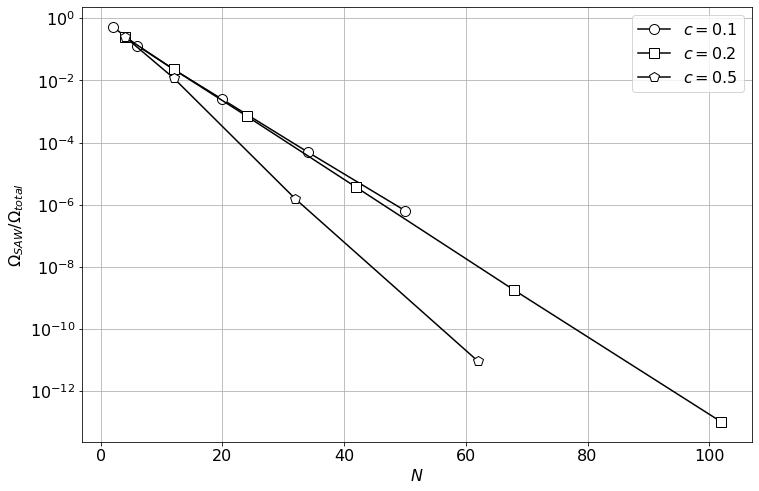

In [52]:
saw_fraction(density_data)

In [804]:
density_data['density_0.1']

x    y    z  en_mean    en_std     n  area
0   1.0  5.0  5.0 -0.58740  0.000000   2.0  25.0
1   1.0  6.0  6.0 -0.58740  0.000000   2.0  36.0
2   1.0  7.0  7.0 -0.78280  0.000000   4.0  49.0
3   1.0  8.0  8.0 -0.75480       NaN   6.0  64.0
4   1.0  9.0  9.0 -0.76800  0.000141   8.0  81.0
5   2.0  4.0  4.0      NaN       NaN   2.0  16.0
6   2.0  5.0  5.0      NaN       NaN   4.0  25.0
7   2.0  6.0  6.0 -0.84170  0.001556   6.0  36.0
8   2.0  7.0  7.0 -0.99235  0.000354   8.0  49.0
9   2.0  8.0  8.0 -1.10720       NaN  12.0  64.0
10  2.0  9.0  9.0 -1.13540  0.000707  16.0  81.0
11  3.0  3.0  3.0      NaN       NaN   2.0   9.0
12  3.0  4.0  4.0      NaN       NaN   4.0  16.0
13  3.0  5.0  5.0      NaN       NaN   6.0  25.0
14  3.0  6.0  6.0      NaN       NaN  10.0  36.0
15  3.0  7.0  7.0 -1.11350  0.000000  14.0  49.0
16  3.0  8.0  8.0 -1.21040       NaN  18.0  64.0
17  3.0  9.0  9.0 -1.26235  0.000495  24.0  81.0
18  4.0  3.0  3.0      NaN       NaN   2.0   9.0
19  4.0  4.0  4.0      NaN       NaN   6.0  16.0
20  4.0  5.0  5.0 -0.54360  0.000141  10.0  25.0
21  4.0  6.0  6.0 -0.77660  0.003677  14.0  36.0
22  4.0  7.0  7.0 -1.04265  0.001061  18.0  49.0
23  4.0  8.0  8.0 -1.24190       NaN  24.0  64.0
24  4.0  9.0  9.0 -1.31790  0.000141  32.0  81.0
25  5.0  2.0  2.0      NaN       NaN   2.0   4.0
26  5.0  3.0  3.0      NaN       NaN   4.0   9.0
27  5.0  4.0  4.0      NaN       NaN   8.0  16.0
28  5.0  5.0  5.0 -0.83775  0.002758  12.0  25.0
29  5.0  6.0  6.0 -1.04900  0.000566  18.0  36.0
30  5.0  7.0  7.0 -1.14715  0.001768  24.0  49.0
31  5.0  8.0  8.0 -1.27970       NaN  32.0  64.0
32  5.0  9.0  9.0 -1.34400  0.000141  40.0  81.0
33  6.0  2.0  2.0      NaN       NaN   2.0   4.0
34  6.0  3.0  3.0      NaN       NaN   4.0   9.0
35  6.0  4.0  4.0      NaN       NaN   8.0  16.0
36  6.0  5.0  5.0 -0.77070  0.004525  14.0  25.0
37  6.0  6.0  6.0 -1.12570  0.001556  20.0  36.0
38  6.0  7.0  7.0 -1.22670  0.000990  28.0  49.0
39  6.0  8.0  8.0 -1.30560       NaN  38.0  64.0
40  6.0  9.0  9.0 -1.36085  0.000071  48.0  81.0
41  7.0  2.0  2.0      NaN       NaN   2.0   4.0
42  7.0  3.0  3.0      NaN       NaN   6.0   9.0
43  7.0  4.0  4.0      NaN       NaN  10.0  16.0
44  7.0  5.0  5.0 -0.75495  0.003323  16.0  25.0
45  7.0  6.0  6.0 -1.14745  0.000071  24.0  36.0
46  7.0  7.0  7.0 -1.29930  0.000141  34.0  49.0
47  7.0  8.0  8.0 -1.34230       NaN  44.0  64.0
48  7.0  9.0  9.0 -1.38005  0.000354  56.0  81.0
49  8.0  2.0  2.0      NaN       NaN   2.0   4.0
50  8.0  3.0  3.0      NaN       NaN   6.0   9.0
51  8.0  4.0  4.0 -0.71835  0.001344  12.0  16.0
52  8.0  5.0  5.0 -1.08270  0.001838  20.0  25.0
53  8.0  6.0  6.0 -1.19960  0.000000  28.0  36.0
54  8.0  7.0  7.0 -1.30520  0.000000  38.0  49.0
55  8.0  8.0  8.0 -1.36830       NaN  50.0  64.0
56  8.0  9.0  9.0 -1.39915  0.000212  64.0  81.0
57  9.0  9.0  9.0 -1.41380       NaN  72.0  81.0

In [143]:
fraction_saw = aggregated[(aggregated['x'] == aggregated['y'])  & (aggregated['x'] == aggregated['z'])].copy()

In [144]:
fraction_saw

x    y    z   en_mean    en_std      n  area
10  2.0  2.0  2.0 -0.782800  0.000000    4.0   4.0
22  3.0  3.0  3.0 -1.073200  0.000000   12.0   9.0
34  4.0  4.0  4.0 -1.197200  0.000356   32.0  16.0
46  5.0  5.0  5.0 -1.274067  0.004202   62.0  25.0
58  6.0  6.0  6.0       NaN       NaN  108.0  36.0

In [145]:
fraction_saw['n_saws'] = np.exp(-fraction_saw['en_mean']*fraction_saw['n'])
fraction_saw['conf_tot'] = fraction_saw['n'].apply(lambda x: overlaps.Overlap(int(x)).n_conformations)
fraction_saw['frac_saw'] = fraction_saw['n_saws'] /fraction_saw['conf_tot']
fraction_saw

x    y    z   en_mean    en_std      n  area        n_saws  \
10  2.0  2.0  2.0 -0.782800  0.000000    4.0   4.0  2.290144e+01   
22  3.0  3.0  3.0 -1.073200  0.000000   12.0   9.0  3.917582e+05   
34  4.0  4.0  4.0 -1.197200  0.000356   32.0  16.0  4.345055e+16   
46  5.0  5.0  5.0 -1.274067  0.004202   62.0  25.0  2.022309e+34   
58  6.0  6.0  6.0       NaN       NaN  108.0  36.0           NaN   

        conf_tot      frac_saw  
10  9.000000e+01  2.544605e-01  
22  3.249616e+07  1.205552e-02  
34  2.834240e+22  1.533058e-06  
46  2.349597e+45  8.607049e-12  
58  6.406640e+80           NaN

Text(0, 0.5, '$n_{saw}/n_{tot}$')

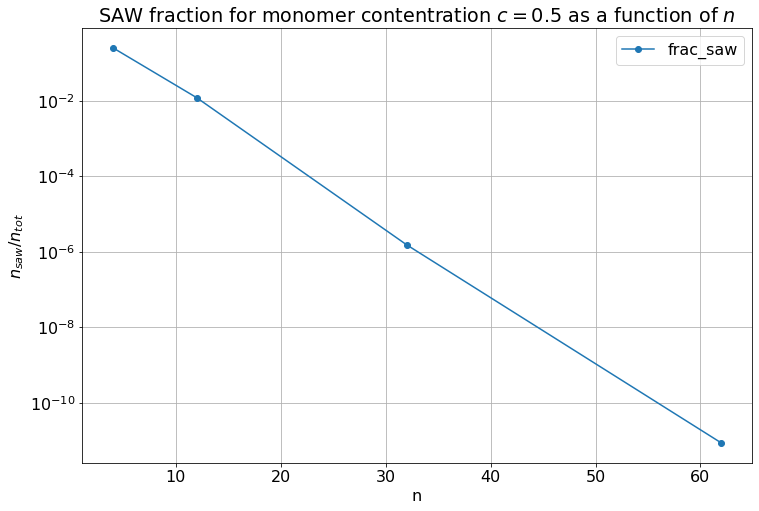

In [146]:
fraction_saw.plot(x='n', y='frac_saw', style='-o', figsize=(12,8))
plt.yscale('log')
plt.grid()
plt.title('SAW fraction for monomer contentration $c=0.5$ as a function of $n$')
plt.ylabel('$n_{saw}/n_{tot}$')

# estimating the exponent factor to find the match between expriment and theory for the enfinitely long channel

the Flory theory suggests $F/N\propto 1/S^.833$, while fitting to the experimental data yields  $2.24/S^0.775- 1.59$.

Those give different $F/N(l/l_0)$ curves.

What the exponent factor should it be in order to give the similar curves as possible?

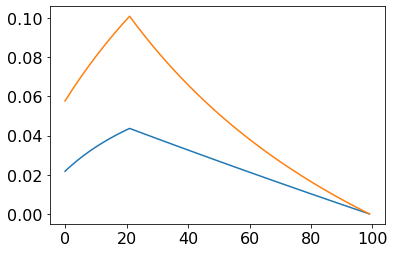

In [147]:
# tot_ens_theory[0], len(tot_ens_theory[0][0]), len(tot_ens[0][0])
i=5
tmp1 = [el - min(tot_ens_theory[i][0]) for el in tot_ens_theory[i][0]]
tmp2 = [el - min(tot_ens[i][0]) for el in tot_ens[i][0]]

plt.plot(tmp1)
plt.plot(tmp2)

In [148]:
from chromosome_segregation import prove_segregation

In [149]:
cm_distr_4 = prove_segregation.run_urw(n=60, iter_max=50000)

2022-08-24 11:38:04,065 [INFO] prove_segregation.run_urw:105 getting cached OR calculating from the scratch..
2022-08-24 11:38:05,684 [INFO] prove_segregation.run_urw:108 done calculating (n,dx,dy,dz) array
2022-08-24 11:38:05,684 [INFO] prove_segregation.run_urw:115 0.0 %
2022-08-24 11:38:19,276 [INFO] prove_segregation.run_urw:115 2.0 %
2022-08-24 11:38:32,722 [INFO] prove_segregation.run_urw:115 4.0 %
2022-08-24 11:38:47,018 [INFO] prove_segregation.run_urw:115 6.0 %
2022-08-24 11:39:00,830 [INFO] prove_segregation.run_urw:115 8.0 %
2022-08-24 11:39:14,550 [INFO] prove_segregation.run_urw:115 10.0 %
2022-08-24 11:39:28,965 [INFO] prove_segregation.run_urw:115 12.0 %
2022-08-24 11:39:43,467 [INFO] prove_segregation.run_urw:115 14.0 %
2022-08-24 11:39:57,586 [INFO] prove_segregation.run_urw:115 16.0 %
2022-08-24 11:40:11,387 [INFO] prove_segregation.run_urw:115 18.0 %
2022-08-24 11:40:26,001 [INFO] prove_segregation.run_urw:115 20.0 %
2022-08-24 11:40:39,390 [INFO] prove_segregation.r

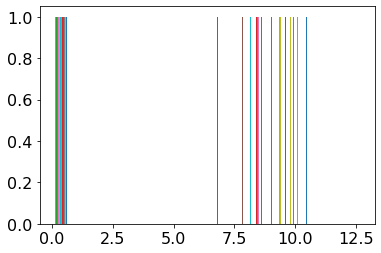

In [151]:
# s = 100
plt.hist(cm_distr_4, bins=20)
plt.show()

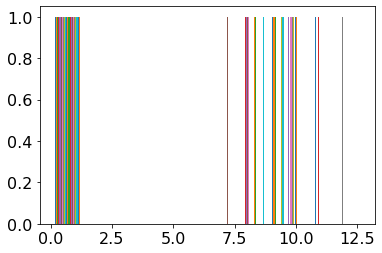

(22, 0.00044)

In [152]:
# S = 4
plt.hist(cm_distr_4, bins=10)
plt.show()
len(cm_distr_4), len(cm_distr_4)/50000

In [153]:
# S = 16
plt.hist(cm_distr_16, bins=20)
plt.show()

NameError: name 'cm_distr_16' is not defined

In [ ]:
s_4_1 = prove_segregation.run_wl(n=20, ds_min=0.001)

In [ ]:
s_4_1 = [el - max(s_4_1) for el in s_4_1]
g_4_1 = np.exp(s_4_1)
g_4_1 = g_4_1/sum(g_4_1)
len(g_4_1)

In [ ]:
s_4 = [el - max(s_4) for el in s_4]
g_4 = np.exp(s_4)
g_4 = g_4/sum(g_4)
g_4

In [ ]:
cm_distr_4 = prove_segregation.run_urw(n=20, iter_max=100000)

In [ ]:

cm_dists, mix_degree = zip(*cm_distr_4)
np.corrcoef(cm_dists, mix_degree),cm_distr_4

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.hist(cm_dists, bins=30,edgecolor='red', alpha=0.5)
plt.subplot(1,2,2)

plt.hist(mix_degree, bins=30, edgecolor='red', alpha=0.5)

plt.show()

In [ ]:
vals, bins = np.histogram(cm_dists, bins=np.linspace(0, 4.75, len(g_4_1) +1) )#range(len(g_4_1)+1))
vals = vals/sum(vals)
vals, bins

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(bins[:-1]-.05, g_4_1, width=.05, label='WL')
plt.bar(bins[:-1]+.05, vals,alpha=.3, hatch='.', width=0.05, label="URW")
# plt.yscale('log')
plt.legend()

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(g_4_1, marker='.', label='WL')
plt.plot(vals, marker='d' ,label="URW")
# plt.yscale('log')
plt.legend()
plt.grid()

In [ ]:
int(29), np.ceil(2.2), np.floor(2.2), np.round(2.51)

In [ ]:
arr1 = np.array([[1,2,3], [4,5,6], [4,7,8]])[:,0]
arr2 = np.array([[1,2,3], [5,5,6], [4,7,8]])[:,0]

arr1, arr2, np.intersect1d(arr1, arr2)

In [ ]:
o1 = np.array([el for el in arr1 if el in arr2]).shape[0]
o2 = np.array([el for el in arr2 if el in arr1]).shape[0]
(o1+o2)/arr1.shape[0]/2, o1+o2

In [14]:
%ls chromosome_segregation/segregation_prove_simultaneously//

area_4/


In [54]:
RESULTS_FOLDER ='chromosome_segregation/segregation_prove_simultaneously/'

In [55]:
datafiles = []
for root, dirs, files in os.walk(RESULTS_FOLDER):
    if 'data.csv' in files: datafiles.append(
        (os.path.join(root, files[0]))
    )
datafiles

['chromosome_segregation/segregation_prove_simultaneously/area_16/n_100/run_2/data.csv',
 'chromosome_segregation/segregation_prove_simultaneously/area_16/n_100/run_1/data.csv',
 'chromosome_segregation/segregation_prove_simultaneously/area_16/n_100/run_0/data.csv',
 'chromosome_segregation/segregation_prove_simultaneously/area_16/n_140/run_2/data.csv',
 'chromosome_segregation/segregation_prove_simultaneously/area_16/n_140/run_3/data.csv',
 'chromosome_segregation/segregation_prove_simultaneously/area_16/n_140/run_1/data.csv',
 'chromosome_segregation/segregation_prove_simultaneously/area_16/n_140/run_0/data.csv',
 'chromosome_segregation/segregation_prove_simultaneously/area_16/n_40/run_2/data.csv',
 'chromosome_segregation/segregation_prove_simultaneously/area_16/n_40/run_1/data.csv',
 'chromosome_segregation/segregation_prove_simultaneously/area_16/n_40/run_0/data.csv',
 'chromosome_segregation/segregation_prove_simultaneously/area_16/n_60/run_2/data.csv',
 'chromosome_segregation/

In [56]:
import re
import pandas as pd

In [57]:
dfs = []
for file  in datafiles:
    
    df = pd.read_csv(file, sep=' ', header=None, names=['R_cm', 'mixing'])

    area = re.compile("/area_([0-9]+)/")
    area = area.findall(file)[0]

    n = re.compile("/n_([0-9]+)/")
    n = n.findall(file)[0]

    run = re.compile("/run_([0-9]+)/")
    run = run.findall(file)[0]

    df['area'] = int(area)
    df['n'] = int(n)
    df['run'] = int(run)

    dfs.append(df)

In [58]:
df = pd.concat(dfs).reset_index(drop=True)
df

R_cm  mixing  area    n  run
0       7.96    0.04    16  100    2
1       2.39    0.85    16  100    2
2       9.99    0.30    16  100    2
3       8.01    0.20    16  100    2
4       4.48    0.73    16  100    2
...      ...     ...   ...  ...  ...
110128  0.80    0.75     4   10    0
110129  1.50    0.35     4   10    0
110130  1.20    0.65     4   10    0
110131  0.70    0.85     4   10    0
110132  1.20    0.40     4   10    0

[110133 rows x 5 columns]

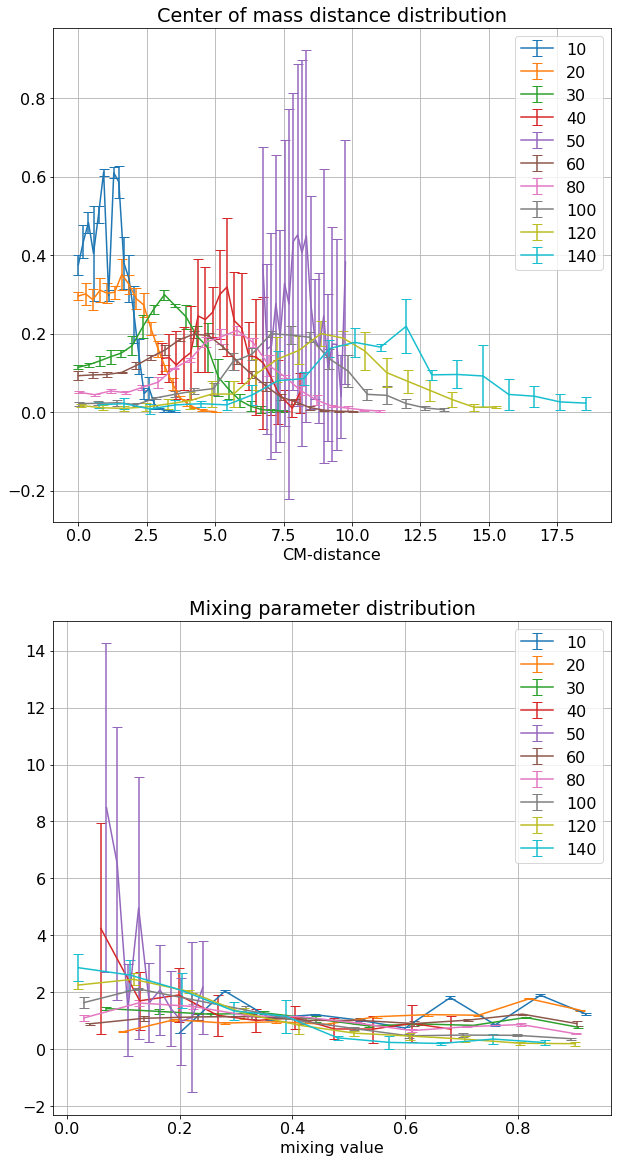

In [59]:
# plt.figure(figsize=(20,8))
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,20))
correlations = []

# df = df[df['area'] ==4]

for n in sorted(df['n'].unique()):
    r_ees = []
    mixings = []
    corr = []
    for  name, group in df[df['n'] == n].groupby('run'):
        vals, bins1 = np.histogram(group['R_cm'], bins=20, density=True )
#         print(n, name, vals.shape)
        r_ees.append(vals)
        #         ax[0].plot(bins[:-1], vals, label=n)
        vals, bins2 = np.histogram(group['mixing'], bins=10, density=True )
#         ax[1].plot(bins2[:-1], vals, label=n)
        mixings.append(vals)
    
#         print(n, name, np.corrcoef(group['R_ee'], group['mixing'])[0,1])
        corr.append(np.corrcoef(group['R_cm'], group['mixing'])[0,1])
    
    t = np.array(corr)
    correlations.append( (n, np.mean(t) , np.std(t)) )
    tmp1  = pd.DataFrame(r_ees).transpose()
    tmp1['average'] = tmp1.mean(axis=1)
    tmp1['stdev'] = tmp1.std(axis=1)
#     ax[0].plot(bins1[:-1], tmp1['average'], label=n)
    ax[0].errorbar(bins1[:-1], tmp1['average'], tmp1['stdev'], capsize=5,label=n)

    
    tmp2  = pd.DataFrame(mixings).transpose()
    tmp2['average'] = tmp2.mean(axis=1)
    tmp2['stdev'] = tmp2.std(axis=1)
#     ax[1].plot(bins2[:-1], tmp2['average'], label=n)
    ax[1].errorbar(bins2[:-1], tmp2['average'], tmp2['stdev'], capsize=5, label=n)

    
    
ax[0].legend()
ax[1].legend()

ax[0].set_xlabel('CM-distance')
ax[0].set_title('Center of mass distance distribution')
ax[1].set_title("Mixing parameter distribution")
ax[1].set_xlabel('mixing value')
ax[0].grid()
ax[1].grid()



Text(0.5, 1.0, 'correlation between mixing and distance between centers of mass')

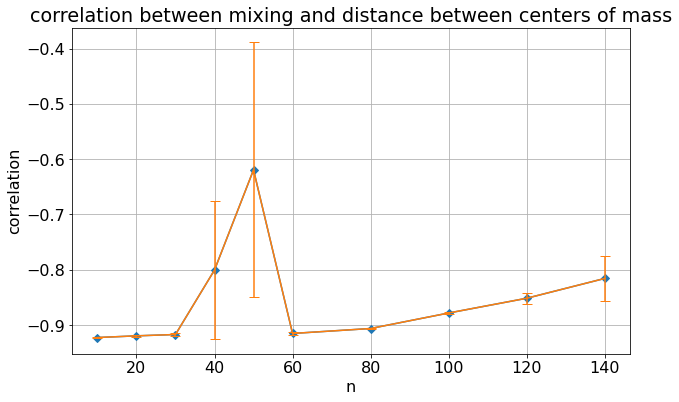

In [60]:
corr = np.array(correlations)
plt.figure(figsize=(10,6))
plt.plot(corr[:, 0], corr[:, 1], marker='D')
plt.errorbar(corr[:, 0], corr[:, 1], corr[:, 2], capsize=5)
plt.grid()
plt.xlabel('n')
plt.ylabel('correlation')
plt.title('correlation between mixing and distance between centers of mass')

In [61]:
for name, group in df.groupby(['area', 'n']):
    print(name)

(4, 10)
(4, 20)
(4, 30)
(4, 40)
(4, 50)
(8, 10)
(8, 20)
(8, 30)
(8, 40)
(8, 50)
(8, 60)
(16, 20)
(16, 40)
(16, 60)
(16, 80)
(16, 100)
(16, 120)
(16, 140)


In [62]:
from scipy.optimize import least_squares

def find_params_max_curves(x, t, y):
    return x[0]*(t**x[1]) +x[2] - y
    
    
x0 = np.array([1.,1.,1.])
x = [el[0] for el in max_curves[4]]
y = [el[1] for el in max_curves[4]]

res_1 = least_squares(find_params_max_curves, x0, args=(x,y) )
print(res_1)
# print("lambda = %3.2f, optimal = %s"%(lbd, res_1.x))

KeyError: 4

In [63]:
def fun_square11(x, a, b, c):
#     return a*x**2  + b*x +c
#     return a/x**(2.0) +c
#     return a/x**b +c
    return a*np.exp(b*x) +c

#     return a*(x-1)*np.log(x-1) + b*(x-1)
#     return a*(np.exp(-x) - 1/np.e)
x = [el[0] for el in max_curves[16]]
y = [el[1] for el in max_curves[16]]
print(x,y)
params, covariance = curve_fit(fun_square11, x , y, p0=[0,0,0], maxfev = 500, method='dogbox')
print(*params, )

KeyError: 16

(4, 10) <class 'tuple'> 4 -1
(4, 20) <class 'tuple'> 4 0
(4, 30) <class 'tuple'> 4 0
(4, 40) <class 'tuple'> 4 0
(4, 50) <class 'tuple'> 4 0
(8, 10) <class 'tuple'> 8 0
(8, 20) <class 'tuple'> 8 1
(8, 30) <class 'tuple'> 8 1
(8, 40) <class 'tuple'> 8 1
(8, 50) <class 'tuple'> 8 1
(8, 60) <class 'tuple'> 8 1
(16, 20) <class 'tuple'> 16 1
(16, 40) <class 'tuple'> 16 2
(16, 60) <class 'tuple'> 16 2
(16, 80) <class 'tuple'> 16 2
(16, 100) <class 'tuple'> 16 2
(16, 120) <class 'tuple'> 16 2
(16, 140) <class 'tuple'> 16 2


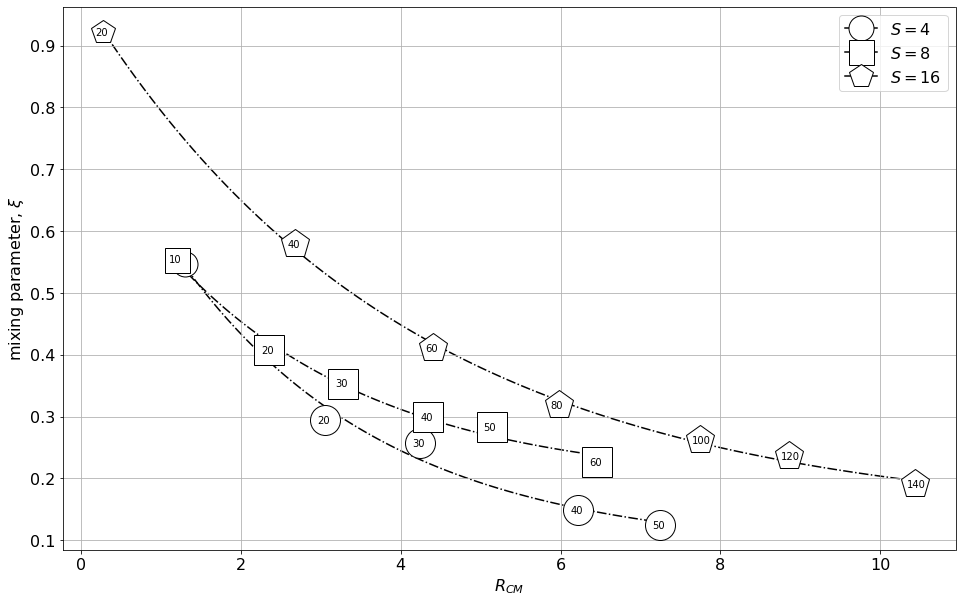

In [67]:
plt.figure(figsize=(16,10))

markers = ['o', 's', 'p']
max_curves = {}
i=-1; name_save=0;marker = None
for name, group in df.groupby(['area', 'n']):
    print(name, type(name), int(name[0]), i)
    if int(name[0]) != name_save:
        i +=1
        name_save=name[0]
    if (name[0] >0)  &  (name[1] > 0):
        group['R_cm_bins'] = pd.cut(group['R_cm'], bins=30, labels = range(30))

        tmp = group[['mixing', 'R_cm_bins', 'R_cm']].groupby('R_cm_bins').agg(mixing=('mixing', 'mean'), sem=('mixing', 'sem'),
                                                                     aver_r_cm=('R_cm', 'mean'),
                                                                    bin_count=('R_cm', 'count')
                                                                             )

#         plt.errorbar(tmp['aver_r_cm'], tmp['mixing'], yerr=tmp['sem'], marker='d', capsize=5, linestyle='dashed')#, label=name)

        yhat = savgol_filter(tmp['bin_count'], window_length=int(len(tmp['bin_count'])/4), polyorder=3)

        index_max = np.argmax(yhat) #.idxmax()
    #     index_max, tmp.iloc[index_max]['mixing']
#         if name[0] == 4.0: 
#             color='red'
#         elif name[0] == 8.0:
#             color = 'yellow'
#         else:
#             color='blue'
        x = tmp.iloc[index_max]['aver_r_cm']
        y = tmp.iloc[index_max]['mixing']
        
        if marker != markers[i]:
            marker = markers[i]
            plt.plot(x, y,zorder=3, label = '$S=%i$'%name[0], marker=marker, markersize=25, markerfacecolor='white', alpha=1., color='black')
        else:
            plt.plot(x, y, zorder=3, marker=marker, markersize=30, markerfacecolor='white', alpha=1., color='black')

            #         plt.plot(x, y, marker=markers[i], markersize=30, markerfacecolor='None', alpha=1., color='black')
        plt.annotate(name[1],  xy=(x-0.1 , y - 0.005 ), size=10)
        if name_save in max_curves:
            max_curves[name_save] += [(x,y)]
        else:
            max_curves[name_save] = [(x,y)]


#         plt.plot(tmp['aver_r_cm'], yhat)
#         plt.plot(tmp['aver_r_cm'], tmp['bin_count'])


# print(max_curves)
for k in max_curves:
    x = [el[0] for el in max_curves[k]]
    y = [el[1] for el in max_curves[k]]
    params, covariance = curve_fit(fun_square11, x , y, p0=[0,0,0], maxfev = 1500, method='dogbox')
    x_new = np.linspace(x[0], x[-1], 100)
    plt.plot(x_new, fun_square11(x_new, *params), color='black', linestyle='-.', zorder=1)
plt.grid()
plt.xlabel('$R_{CM}$')
plt.ylabel('mixing parameter, $\\xi$')
plt.legend()

In [211]:
t1 = (1,2,3)
t2 = (2,3,4)

all(el[0]<el[1] for el in zip(t1,t2))

True

In [207]:
all((True, True, True))

True

In [ ]:


group = df[(df['area']==16.0) & (df['n'] ==30)].copy()
group['R_cm_bins'] = pd.cut(group['R_ee'], bins=30, labels = range(30))


tmp = group[['mixing', 'R_cm_bins', 'R_ee']].groupby('R_cm_bins').agg(mixing=('mixing', 'mean'), sem=('mixing', 'sem'),
                                                                 aver_r_cm=('R_ee', 'mean'),
                                                                bin_count=('R_cm_bins', 'count')
                                                                         )
yhat = savgol_filter(tmp['bin_count'], window_length=int(len(tmp['bin_count'])/5), polyorder=5)

plt.figure(figsize=(16,12))
# smoothed = f(np.linspace(0,49,200))
# plt.plot(np.linspace(0,49,200), smoothed, marker='d')
plt.plot(tmp.index.to_numpy(), yhat)
tmp['bin_count'].plot(marker='x')
# plt.show()
# np.linspace(0,49,10), tmp.index

In [ ]:
# plt.figure(figsize=(12,8))

# for name, group in df.groupby(['area', 'n']):

#     group['R_cm_bins'] = pd.cut(group['R_ee'], bins=20, labels = range(20))
#     tmp = group[['mixing', 'R_cm_bins', 'R_ee']].groupby('R_cm_bins').agg(mixing=('mixing', 'mean'), sem=('mixing', 'sem'),
#                                                                  aver_r_cm=('R_ee', 'mean'))
# #     vals, bins1 = np.histogram(group['R_ee'], bins=20, density=True)
    


tmp = df[(df['area'] == 4) & (df['n'] == 10)].copy()
tmp['R_cm_bins'] = pd.cut(tmp['R_ee'], bins=20, labels = range(20))
tmp  = tmp[['mixing', 'R_cm_bins', 'R_ee']].groupby('R_cm_bins').agg(mixing=('mixing', 'mean'), sem=('mixing', 'sem'),
                                                                 aver_r_cm=('R_ee', 'mean'),
                                                                     bin_count=('R_cm_bins', 'count'))
index_max = tmp['bin_count'].idxmax()
index_max, tmp.iloc[index_max]['mixing']


In [ ]:
x = range(10)
y = range(10)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))


for row in ax:
    for col in row:
        col.plot(x, y)

plt.show()


In [308]:
arr = [5, 3, 7, 5, 6, 9, 12, 4, 3, 7]
target = 11

def find_indexes(arr, target):
    
    d = {}
    for i in range(len(arr)):
        if arr[i] not in d: ## make sure to save just first entry
            d[arr[i]] =  i
        
    for  i in range(len(arr)):
            if target - arr[i] in d:
                return  d[arr[i]], d[target - arr[i]]
        
  

In [309]:
find_indexes(arr, target)

(0, 4)

In [705]:
arr = [5, 0,  1,5,2,3]
q = 10


def f1(arr, q):
    
    d ={}
    res = []
    
    if q ==0 and 0 in arr:
        return arr.index(0) 
    
    for i in range(len(arr)):
        d[arr[i]] = i
        
    
    for i in range(len(arr)):
        
        if arr[i] != 0:
            if q/arr[i] in d and  q%arr[i]==0 :
                res.append( (d[arr[i]] , d[int(q/arr[i])]))
     
      
    return res

In [707]:
f1(arr, 20)

[]

In [709]:
np.log(4.6838/6)

-0.24764972295244247

In [787]:
boxes = [5,3,4,7,6,5,6,7,4,3,3,5,6,7,4,1,7,7,4,4,3,6,4,7,6,4,3,6,7,7]
Counter(boxes)

Counter({5: 3, 3: 5, 4: 7, 7: 8, 6: 6, 1: 1})

In [3]:
arr1 = [[1, 0, 0], [1, 0, -1], [1, 1, -1], [0, 1, -1], [0, 1, 0], [-1, 1, 0], [-1, 1, -1], [-1, 0, -1], [-2, 0, -1], [-2, -1, -1], [-2, -1, 0], [-2, -1, 1], [-1, -1, 1], [-1, 0, 1], [-1, 0, 0], [-2, 0, 0], [-2, 0, 1], [-2, 1, 1], [-3, 1, 1], [-3, 1, 0], [-3, 0, 0], [-3, -1, 0], [-3, -1, 1], [-3, 0, 1], [-4, 0, 1], [-4, -1, 1], [-4, -1, 0], [-4, 0, 0], [-4, 1, 0], [-4, 1, 1], [-5, 1, 1], [-5, 0, 1], [-5, 0, 0], [-5, 1, 0], [0, 0, 0]]
arr2 = [[0, -1, 0], [0, -1, 1], [0, 0, 1], [1, 0, 1], [2, 0, 1], [2, -1, 1], [3, -1, 1], [3, -1, 0], [2, -1, 0], [1, -1, 0], [1, -1, -1], [2, -1, -1], [3, -1, -1], [4, -1, -1], [4, -1, 0], [4, 0, 0], [3, 0, 0], [3, 0, 1], [3, 1, 1], [2, 1, 1], [2, 1, 0], [3, 1, 0], [3, 1, -1], [2, 1, -1], [2, 0, -1], [3, 0, -1], [4, 0, -1], [4, 1, -1], [4, 1, 0], [4, 1, 1], [4, 0, 1], [4, -1, 1], [5, -1, 1], [5, 0, 1], [0, 0, 0]]

In [4]:
arr1, arr2

([[1, 0, 0],
  [1, 0, -1],
  [1, 1, -1],
  [0, 1, -1],
  [0, 1, 0],
  [-1, 1, 0],
  [-1, 1, -1],
  [-1, 0, -1],
  [-2, 0, -1],
  [-2, -1, -1],
  [-2, -1, 0],
  [-2, -1, 1],
  [-1, -1, 1],
  [-1, 0, 1],
  [-1, 0, 0],
  [-2, 0, 0],
  [-2, 0, 1],
  [-2, 1, 1],
  [-3, 1, 1],
  [-3, 1, 0],
  [-3, 0, 0],
  [-3, -1, 0],
  [-3, -1, 1],
  [-3, 0, 1],
  [-4, 0, 1],
  [-4, -1, 1],
  [-4, -1, 0],
  [-4, 0, 0],
  [-4, 1, 0],
  [-4, 1, 1],
  [-5, 1, 1],
  [-5, 0, 1],
  [-5, 0, 0],
  [-5, 1, 0],
  [0, 0, 0]],
 [[0, -1, 0],
  [0, -1, 1],
  [0, 0, 1],
  [1, 0, 1],
  [2, 0, 1],
  [2, -1, 1],
  [3, -1, 1],
  [3, -1, 0],
  [2, -1, 0],
  [1, -1, 0],
  [1, -1, -1],
  [2, -1, -1],
  [3, -1, -1],
  [4, -1, -1],
  [4, -1, 0],
  [4, 0, 0],
  [3, 0, 0],
  [3, 0, 1],
  [3, 1, 1],
  [2, 1, 1],
  [2, 1, 0],
  [3, 1, 0],
  [3, 1, -1],
  [2, 1, -1],
  [2, 0, -1],
  [3, 0, -1],
  [4, 0, -1],
  [4, 1, -1],
  [4, 1, 0],
  [4, 1, 1],
  [4, 0, 1],
  [4, -1, 1],
  [5, -1, 1],
  [5, 0, 1],
  [0, 0, 0]])

In [6]:
import ipyvolume as ipv
import numpy as np

x1 = np.array([float(el[0]) for el in arr1])
y1 = np.array([float(el[1]) for el in arr1])
z1 = np.array([float(el[2]) for el in arr1])

x2 = np.array([float(el[0]) for el in arr2])
y2 = np.array([float(el[1]) for el in arr2])
z2 = np.array([float(el[2]) for el in arr2])

ipv.scatter(x1,y1,z1,  marker='sphere', color='blue')
ipv.scatter(x2,y2,z2,  size=5, color='red')

# ipv.xlim(-10,1)
ipv.show()

In [8]:
[el for el in arr1 if el in  arr2]

[[0, 0, 0]]

In [240]:
def inf():
    num =0

    while True:
        yield num
        num +=1
        sleep(1)

In [241]:
for i in inf():
    print(i)

0
1
2


KeyboardInterrupt: 

In [235]:
def flask_logger():
    """creates logging information"""

    for i in range(100):
        current_time = datetime.datetime.now().strftime('%H:%M:%S') #+ "\n"
        yield current_time#.encode()
        sleep(1)

In [236]:
import datetime
from time import sleep

for elem in flask_logger():
    print(elem)

16:10:41
16:10:42
16:10:43
16:10:44


KeyboardInterrupt: 

In [271]:
os.path.abspath(os.path.join('', os.pardir)),  os.path.abspath(os.pardir)

('/Users/alexey/Documents/projects', '/Users/alexey/Documents/projects')

In [268]:
%pwd

'/Users/alexey/Documents/projects/chromosome_segregation'

In [90]:
219700./9*8, 47422./9*8, 219700./9*4, 47422./9*4

(195288.88888888888, 42152.88888888889, 97644.44444444444, 21076.444444444445)

In [256]:
box = [3,4,1]

def get_indexes(box, extend_to_left=1, extend_to_right=5, length=30):
    
    min_  = min(box)
    xs = range(box[0] - min_, length + box[0] - min_)
    ys = range(box[1] - min_, length + box[1] - min_)
    zs = range(box[2] - min_, length + box[2] - min_)
    
    index_in_focus = xs.index(box[0])
    
    a,b  =  max(0,index_in_focus-extend_to_left) , index_in_focus+extend_to_right
    return list(xs)[a:b+1], list(ys)[a:b+1], list(zs)[a:b+1]


In [257]:
indexes = get_indexes((6,3,5))

indexes

([5, 6, 7, 8, 9, 10, 11], [2, 3, 4, 5, 6, 7, 8], [4, 5, 6, 7, 8, 9, 10])

In [258]:
# def get_box(sx, sy, sz, l):
#     variants = [(l[0], l[1], l[2]),
#                 (l[0], l[2], l[1]),
#                 (l[1], l[0], l[2]),
#                 (l[1], l[2], l[0]),
#                 (l[2], l[0], l[1]),
#                 (l[2], l[1], l[0])
#                 ]
#     min_box = 1000
#     for v in variants:
#         try:
#             box_x = sx.index(v[0])
#             box_y = sy.index(v[1])
#             box_z = sz.index(v[2])
#             box = max(box_x, box_y, box_z)
        
#             if box < min_box:
#                 min_box = box
#         except ValueError as e:
#             pass
    
#     if min_box == 1000:
#         return None
#     else:
#         return min_box

In [267]:
get_box(sx=indexes[0], sy=indexes[1], sz=indexes[2], l=(6,2,4)) == 1 #True

True

In [269]:
get_box(sx=indexes[0], sy=indexes[1], sz=indexes[2], l=(2,2,4)) == 0 #True

True

In [271]:
get_box(sx=indexes[0], sy=indexes[1], sz=indexes[2], l=(9,4,2)) 

4 2 0
4 0 0
0 0 5
0 2 5


4

In [177]:
k =0
if k:
    print(k)

In [181]:
a1 = np.array([[19.53, 20.69, 19.51, 16.54, 25.3 ],
              [49.69      , 52.27      , 50.96333333, 39.92666667, 57.88      ],
              [58.22777778, 59.46111111, 57.51444444, 49.71333333, 64.80888889],
              [71.2282716 , 73.40613169, 71.67345679, 68.23942387, 78.41777778],
              [72.47666667, 74.21293553, 72.87532236, 69.29292181, 79.39665295],
              [74.04345222, 76.15078647, 74.23374943, 71.42391404, 80.78258802],
              [72.47666667, 74.21293553, 72.87532236, 69.29292181, 79.39665295],
              [74.04345222, 76.15078647, 74.23374943, 71.42391404, 80.78258802],
              [75.67832495, 77.33265508, 75.69499009, 73.30148148, 82.02142356],
              [76.32525072, 78.1320129 , 76.47197734, 74.34405426, 82.84211147],
              [76.46380955, 78.31201799, 76.60550712, 74.45157175, 82.9818842 ],
              [77.50753843, 79.03793443, 77.91097749, 75.48894207, 83.90468481],
              [77.54884981, 79.10537371, 77.96053573, 75.5489823 , 83.94584204],
              [77.59334689, 79.14308833, 77.99028609, 75.59640817, 83.99280547],
              [77.63301403, 79.18097422, 78.02806922, 75.62271591, 84.03654895],
              [77.78407803, 79.44832209, 78.28728727, 75.77019456, 84.26338472],
              [77.8064122 , 79.46476443, 78.31281856, 75.79342698, 84.28008588],
              [77.83213127, 79.48335848, 78.33105738, 75.82337843, 84.30400846],
              [77.86000205, 79.52927524, 78.36351578, 75.85476096, 84.349526  ],
              [77.86966446, 79.53626718, 78.37334058, 75.86615557, 84.36048305],
              [77.88642708, 79.54700018, 78.38665083, 75.88077399, 84.37049732],
              [77.8931233 , 79.55645108, 78.39742694, 75.88887562, 84.37749828],
              [77.89984893, 79.56417513, 78.40454152, 75.89438765, 84.3848521 ]])

In [190]:
r = a1/np.sum(a1, axis=1)[:, np.newaxis]
r

array([[0.19228119, 0.20370188, 0.19208428, 0.16284336, 0.2490893 ],
       [0.19818131, 0.20847126, 0.20325981, 0.15924168, 0.23084593],
       [0.20097564, 0.20523254, 0.19851354, 0.17158767, 0.22369062],
       [0.19624002, 0.20224021, 0.19746655, 0.18800549, 0.21604773],
       [0.19681135, 0.20152622, 0.19789391, 0.18816585, 0.21560267],
       [0.19659233, 0.2021875 , 0.19709759, 0.18963721, 0.21448537],
       [0.19681135, 0.20152622, 0.19789391, 0.18816585, 0.21560267],
       [0.19659233, 0.2021875 , 0.19709759, 0.18963721, 0.21448537],
       [0.19706415, 0.20137198, 0.19710755, 0.19087492, 0.2135814 ],
       [0.19665607, 0.20131129, 0.19703412, 0.19155141, 0.21344711],
       [0.1966587 , 0.20141214, 0.19702313, 0.19148338, 0.21342265],
       [0.19679452, 0.20068026, 0.19781887, 0.19166923, 0.21303712],
       [0.19676976, 0.20071923, 0.19781436, 0.19169537, 0.21300127],
       [0.19677964, 0.20070984, 0.19778629, 0.19171533, 0.2130089 ],
       [0.19678772, 0.20071156, 0.

In [208]:
8.932955e+15*(0.19664339)

1756606553917450.0

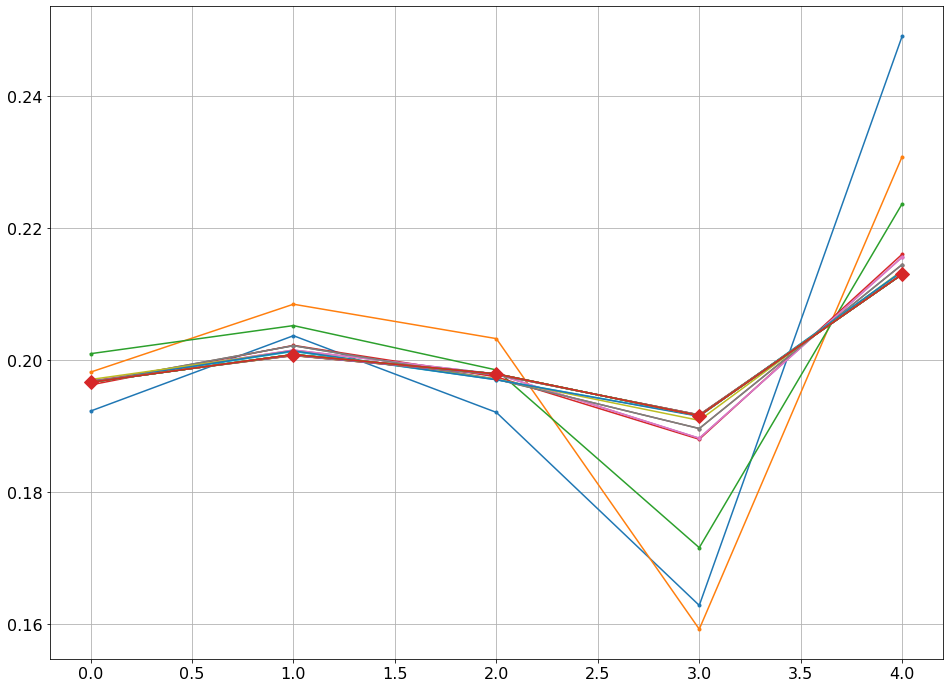

In [204]:
plt.figure(figsize=(16,12))
plt.grid()
plt.plot(r.T, marker='.')
plt.plot(r[-1].T, markersize=10, marker='D')

## 

In [62]:
a2 = np.array([[224.9 , 235.96, 261.94, 235.35, 295.95], [279.375, 289.12 , 309.9  , 300.66 , 338.715], 
              [360.5675, 406.95  , 409.155 , 383.7725, 419.7875], 
              [415.4575 , 450.46375, 444.88875, 442.32   , 458.25375], 
              [462.6225  , 480.488125, 480.345   , 477.7375  , 491.96375 ], 
              [472.2446875, 497.645625 , 494.0825   , 492.219375 , 505.11375  ],
              [529.50890625, 536.25046875, 537.0303125 , 534.6159375 ,544.53421876], 
              [542.54976562, 545.38039062, 545.12382812, 545.25507812,
       554.10023438], [546.85121093, 549.7621875 , 549.46394532, 548.25640625,
       558.69730469], [549.57494141, 551.74261719, 551.73220704, 549.8122461 ,
       560.87220704], [551.21634766, 554.19719727, 554.26618165, 552.73216797,
       562.85125978], [553.07183106, 555.62956056, 555.49289063, 554.01109376,
       564.21237794], [553.17246338, 555.70187012, 555.59037598, 554.1068628 ,
       564.29684815], [553.24153076, 555.75764039, 555.65402466, 554.14917969,
       564.33967652]])

In [66]:
r2 = np.exp(a2)/np.sum(np.exp(a2), axis=1)[:, np.newaxis]
r2

array([[1.39115993e-31, 8.84451516e-27, 1.69685476e-15, 4.80567500e-27,
        1.00000000e+00],
       [1.69420299e-26, 2.89177947e-22, 3.06058541e-13, 2.97114257e-17,
        1.00000000e+00],
       [1.91015739e-26, 2.65908952e-06, 2.41186109e-05, 2.28492845e-16,
        9.99973222e-01],
       [2.59205581e-19, 4.13680982e-04, 1.56846134e-06, 1.20193192e-07,
        9.99584630e-01],
       [1.80820777e-13, 1.03798406e-05, 8.99564453e-06, 6.63146412e-07,
        9.99979961e-01],
       [5.30751834e-15, 5.70661397e-04, 1.61783032e-05, 2.51066092e-06,
        9.99410650e-01],
       [2.98002123e-07, 2.52372919e-04, 5.50458508e-04, 4.92237673e-05,
        9.99147647e-01],
       [9.62725865e-06, 1.63240328e-04, 1.26300125e-04, 1.44014072e-04,
        9.99556818e-01],
       [7.16459150e-06, 1.31647463e-04, 9.76984249e-05, 2.92051881e-05,
        9.99734284e-01],
       [1.24037783e-05, 1.08383613e-04, 1.07261176e-04, 1.57258493e-05,
        9.99756226e-01],
       [8.84797021e-06, 1.7434

In [218]:
a3 = np.array([34.34022461, 35.27428711, 33.26863647, 39.21559814])
r3 = a3/np.sum(a3)
r3

array([0.24166451, 0.24823785, 0.23412336, 0.27597427])

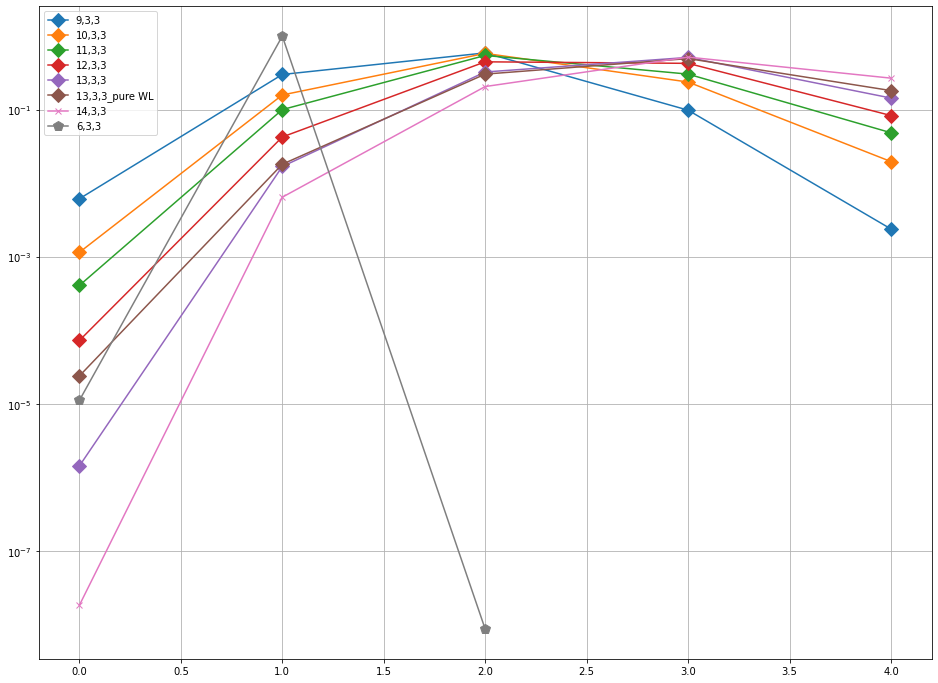

In [213]:
plt.figure(figsize=(16,12))
plt.grid()
# plt.plot(r2.T, marker='.')
# plt.plot(r2[-1].T, markersize=10, marker='D')
# plt.plot(r[-1].T, markersize=10, marker='D')
plt.plot(np.exp(r6)/sum(np.exp(r6)), markersize=10, marker='D', label = '9,3,3')
plt.plot(np.exp(r5)/sum(np.exp(r5)), markersize=10, marker='D', label = '10,3,3')
plt.plot(np.exp(r4)/sum(np.exp(r4)), markersize=10, marker='D', label = '11,3,3')
plt.plot(np.exp(r7)/sum(np.exp(r7)), markersize=10, marker='D', label = '12,3,3')
plt.plot(np.exp(r13_3_3)/sum(np.exp(r13_3_3)), markersize=10, marker='D', label = '13,3,3')
# plt.plot(np.exp(r13_3_3_1)/sum(np.exp(r13_3_3_1)), markersize=10, marker='D', label = '13,3,3_1')

plt.plot(np.exp(r9)/sum(np.exp(r9)), markersize=10, marker='D', label = '13,3,3_pure WL')
# plt.plot(rr[-1].T, markersize=10, marker='D', color='black', label = '13,3,3_random_alpha_use frozen')
plt.plot(np.exp(r14_3_3)/sum(np.exp(r14_3_3)), markersize=6, marker='x', label = '14,3,3')
# plt.plot(np.exp(r14_3_3_1)/sum(np.exp(r14_3_3_1)), markersize=6, marker='x', label = '14,3,3_1')

# plt.plot(np.exp(r16_3_3)/sum(np.exp(r16_3_3)), markersize=6, marker='X', label = '16,3,3')
# plt.plot(np.exp(r15_3_3)/sum(np.exp(r15_3_3)), markersize=6, marker='X', label = '15,3,3')
# plt.plot(np.exp(r20_3_3)/sum(np.exp(r20_3_3)), markersize=6, marker='X', label = '20,3,3')
# plt.plot(np.exp(r19_3_3)/sum(np.exp(r19_3_3)), markersize=6, marker='X', label = '19,3,3')
# plt.plot(np.exp(r18_3_3)/sum(np.exp(r18_3_3)), markersize=6, marker='X', label = '18,3,3')
# plt.plot(np.exp(r17_3_3)/sum(np.exp(r17_3_3)), markersize=6, marker='X', label = '17,3,3')
# plt.plot(np.exp(r9_3_3)/sum(np.exp(r9_3_3)), markersize=6, marker='X', label = '9,3,3')
# plt.plot(np.exp(r8_3_3)/sum(np.exp(r8_3_3)), markersize=16, marker='X', label = '8,3,3')
# plt.plot(np.exp(r8_3_3_1)/sum(np.exp(r8_3_3_1)), markersize=10, marker='p', label = '8,3,3_1')

plt.plot(np.exp(r6_3_3)/sum(np.exp(r6_3_3)), markersize=10, marker='p', label = '6,3,3')
# plt.plot(r22_3_3/sum(r22_3_3), markersize=10, marker='o', label = '22,3,3')
# plt.plot(r23_3_3/sum(r23_3_3), markersize=10, marker='o', label = '23,3,3')
# plt.plot(r24_3_3/sum(r24_3_3), markersize=10, marker='o', label = '24,3,3')

# plt.plot(np.exp(r10)/sum(np.exp(r10)), markersize=10, marker='D', label = '14,3,3')

plt.legend()
plt.yscale('log')

In [70]:
1/np.exp(10)

4.539992976248485e-05

In [10]:
a4 = np.array([41.99060791, 47.49509888, 49.19003784, 48.60554077, 46.77008301])

In [11]:
r4 = a4 - min(a4)
np.exp(r4)/sum(np.exp(r4))

array([4.08053807e-04, 1.00296895e-01, 5.46248334e-01, 3.04471238e-01,
       4.85754795e-02])

In [12]:
a5  = np.array([32.02890137, 36.95406006, 38.25616821, 37.35901245, 34.8688269 ])
r5 = a5 - min(a5)

In [13]:
a6=np.array([43.09992065, 46.98964111, 47.66554565, 45.87205566, 42.15233521])
r6 = a6 - min(a6)

In [14]:
a7= np.array([71.61683838, 77.98636597, 80.33884766, 80.29094605, 78.6570398 ])
r7 = a7 - min(a7)

In [15]:
a8 = np.array([78.24012573, 86.34707153, 89.12964722, 89.61581665, 88.68739746])
# a7_1 = np.array([ 23.0274707 , 25.51037354, 25.51719849, 23.95878052])
r8 = a8 - min(a8)

In [270]:
def get_box(sx, sy, sz, l):
    variants = [(l[0], l[1], l[2]),
                (l[0], l[2], l[1]),
                (l[1], l[0], l[2]),
                (l[1], l[2], l[0]),
                (l[2], l[0], l[1]),
                (l[2], l[1], l[0])
                ]
    min_box = 1000
    for v in variants:
        try:

            if v[0] < sx[0]:
                box_x = 0
            else:
                box_x = sx.index(v[0])

            if v[1] < sy[0]:
                box_y = 0
            else:
                box_y = sy.index(v[1])

            if v[2] < sz[0]:
                box_z = 0
            else:
                box_z = sz.index(v[2])

        # try:
        #     box_x = sx.index(v[0])
        #     box_y = sy.index(v[1])
        #     box_z = sz.index(v[2])
            box = max(box_x, box_y, box_z)
            print(box_x, box_y, box_z)
            if box < min_box:
                min_box = box
        except ValueError as e:
            # print(v)
            pass

    if min_box == 1000:
        return None
    else:
        return min_box

In [8]:
a9 = np.array([737.2434314 , 743.87005005, 746.69103272, 747.17721924,
       746.17480713])
r9 = a9 - min(a9)

In [52]:
a10=np.array([266.29897461, 361.68352295, 365.00239135, 365.93148193,
       365.41016601])
r10 = a10 - min(a10)

In [56]:
a11 = np.array([804.14984171, 866.09134403, 868.91781337, 869.49015074,
       868.40347436])
r11 = a11- min(a11)

In [74]:
arr = np.array([[50.3, 70.8, 75.5, 75.7, 72.5],[70.85, 88.7 , 90.6 , 91.4 , 89.  ], 
[81.375, 96.875, 98.55 , 98.95 , 97.825],[ 86.2875, 100.4875, 103.225 , 103.725 , 102.3125],
[ 91.86875, 104.5375 , 107.275  , 107.725  , 106.3625 ],
[101.55    , 111.615625, 113.88125 , 114.3375  , 114.334375],
[103.984375 , 114.7546875, 116.5453125, 117.25     , 116.6390625],
[106.82109375, 116.5953125 , 119.1859375 , 120.1953125 ,118.440625  ],
[107.75390625, 117.67929687, 120.38867187, 120.9828125 , 119.8046875 ],
[108.09316406, 118.01894531, 120.77714844, 121.27910156, 120.10820312],
[108.36884766, 118.26796875, 121.12265625, 121.65371094, 120.39296875],
[108.52026367, 118.4515625 , 121.27163086, 121.78901367,120.52993164],
[108.52949219, 118.4612793 , 121.27885742, 121.79658203, 120.53798828],
[108.54187012, 118.47429199, 121.29267578, 121.80922852, 120.54909668],
[108.54710693, 118.47791138, 121.29723511, 121.81275635, 120.55337524],
[108.55332336, 118.48571777, 121.3026947 , 121.81961975, 120.55843811],
[108.5582962 , 118.48892822, 121.30688019, 121.82344971, 120.56329651]])

In [86]:

tmp = arr - np.max(arr, axis=1)[:, np.newaxis]
rr = np.exp(tmp)/np.sum(np.exp(tmp), axis=1)[:, np.newaxis]
rr

array([[4.98643206e-12, 3.98865786e-03, 4.38541654e-01, 5.35635985e-01,
        2.18337033e-02],
       [7.39885141e-10, 4.18139126e-02, 2.79563406e-01, 6.22179802e-01,
        5.64428782e-02],
       [1.09857642e-08, 5.92099564e-02, 3.16109828e-01, 4.71580449e-01,
        1.53099756e-01],
       [1.41476075e-08, 2.07809140e-02, 3.21030126e-01, 5.29289197e-01,
        1.28899750e-01],
       [6.71512967e-08, 2.13315602e-02, 3.29536683e-01, 5.16816395e-01,
        1.32315295e-01],
       [1.03679478e-06, 2.43858668e-02, 2.35010157e-01, 3.70880065e-01,
        3.69722874e-01],
       [8.17641711e-07, 3.89090230e-02, 2.33189441e-01, 4.71792220e-01,
        2.56108498e-01],
       [9.93597033e-07, 1.74622240e-02, 2.32912982e-01, 6.39086567e-01,
        1.10537233e-01],
       [9.47921429e-07, 1.93782573e-02, 2.91059199e-01, 5.27246041e-01,
        1.62315555e-01],
       [9.60584609e-07, 1.96448017e-02, 3.09827561e-01, 5.11817957e-01,
        1.58708719e-01],
       [8.92273211e-07, 1.7767

In [7]:
a13_3_3 = np.array([336.51822134, 345.89132282, 348.84877321, 349.30518943,
       348.03304737])
r13_3_3 = a13_3_3 - np.min(a13_3_3)
r13_3_3

array([ 0.        ,  9.37310148, 12.33055187, 12.78696809, 11.51482603])

In [8]:
a14_3_3 = np.array([ 99.45263519, 112.22333527, 115.68705444, 116.60836639,
       115.94950562])
r14_3_3 = a14_3_3 - np.min(a14_3_3)
r14_3_3

array([ 0.        , 12.77070008, 16.23441925, 17.1557312 , 16.49687043])

In [9]:
a16_3_3 = np.array([165.73722076, 182.6442276 , 187.26623993, 188.78717651,
       188.84591522])
r16_3_3 = a16_3_3 - np.min(a16_3_3)
r16_3_3

array([ 0.        , 16.90700684, 21.52901917, 23.04995575, 23.10869446])

In [10]:
a15_3_3 = np.array([132.59535828, 147.79980164, 152.07671356, 153.40771179,
       153.21684875])
r15_3_3 = a15_3_3 - np.min(a15_3_3)
r15_3_3

array([ 0.        , 15.20444336, 19.48135528, 20.81235351, 20.62149047])

In [11]:
a14_3_3_1 = np.array([113.99030762, 126.22375946, 129.83156433, 130.74948883,
       129.96741333])
r14_3_3_1 = a14_3_3_1 - np.min(a14_3_3_1)
r14_3_3_1

array([ 0.        , 12.23345184, 15.84125671, 16.75918121, 15.97710571])

In [12]:
a13_3_3_1 = np.array([125.59107971, 135.39861145, 138.28470917, 138.63087311,
       137.42250519])
r13_3_3_1 = a13_3_3_1 - np.min(a13_3_3_1)
r13_3_3_1

array([ 0.        ,  9.80753174, 12.69362946, 13.0397934 , 11.83142548])

In [13]:
a20_3_3 = np.array([574.19065246, 603.99611206, 613.34061584, 616.43311767,
       618.3085968 ])
r20_3_3 = a20_3_3 - np.min(a20_3_3)
r20_3_3

array([ 0.        , 29.8054596 , 39.14996338, 42.24246521, 44.11794434])

In [14]:
a19_3_3 = np.array([210.63986054, 237.43523865, 245.20447388, 247.854422  ,
       249.20524445])
r19_3_3 = a19_3_3 - np.min(a19_3_3)
r19_3_3

array([ 0.        , 26.79537811, 34.56461334, 37.21456146, 38.56538391])

In [15]:
a18_3_3 = np.array([109.28370667, 129.58903198, 136.67312317, 139.02603302,
       139.96264343])
r18_3_3 = a18_3_3 - np.min(a18_3_3)
r18_3_3

array([ 0.        , 20.30532531, 27.3894165 , 29.74232635, 30.67893676])

In [16]:
a17_3_3 = np.array([207.70797119, 226.65226135, 232.19900665, 234.23066406,
       234.58758392])
r17_3_3 = a17_3_3 - np.min(a17_3_3)
r17_3_3

array([ 0.        , 18.94429016, 24.49103546, 26.52269287, 26.87961273])

In [17]:
a10_3_3 = np.array([113.91900177, 119.29246216, 120.79502106, 119.70291595,
       116.77205963])
r10_3_3 = a10_3_3 - np.min(a10_3_3)
r10_3_3

array([0.        , 5.37346039, 6.87601929, 5.78391418, 2.85305786])

In [18]:
a9_3_3 = np.array([162.82841034, 167.11398163, 167.84246826, 165.97661591,
       161.91330414])
r9_3_3 = a9_3_3 - np.min(a9_3_3)
r9_3_3

array([0.9151062 , 5.20067749, 5.92916412, 4.06331177, 0.        ])

In [19]:
a8_3_3 = np.array([281.05166016, 284.34962463, 284.19774017, 281.2391037 ,
       272.60626678])
r8_3_3 = a8_3_3 - np.min(a8_3_3)
r8_3_3

array([ 8.44539338, 11.74335785, 11.59147339,  8.63283692,  0.        ])

In [20]:
a8_3_3_1 = np.array([168.83115082, 171.94384155, 171.77115479, 169.19897156])
r8_3_3_1 = a8_3_3_1 - np.min(a8_3_3_1)
r8_3_3_1

array([0.        , 3.11269073, 2.94000397, 0.36782074])

In [21]:
a7_3_3 = np.array([173.7942215 , 175.93592529, 174.66757813, 170.43249207])
r7_3_3 = np.exp(a7_3_3 - np.min(a7_3_3))
r7_3_3/np.sum(r7_3_3)

array([0.08372725, 0.71284806, 0.20052143, 0.00290326])

In [22]:
a6_3_3 = np.array([235.66754608, 236.54175568, 233.56818542])
r6_3_3 = np.exp(a6_3_3 - np.min(a6_3_3))
# r6_3_3/np.sum(r6_3_3)

In [23]:
a4_3_3 = np.array([251.39762268, 249.89752197, 246.00003815])
r4_3_3 = np.exp(a4_3_3 - np.min(a4_3_3))

In [24]:
a5_3_3 = np.array([239.23437042, 239.43784637, 235.34006805])
r5_3_3 = np.exp(a5_3_3 - np.min(a5_3_3))

In [25]:
a22_3_3 = np.array([197.77868958, 229.19979858, 240.9196228 , 244.41368561,
       245.82649689, 245.89461517, 245.08487701, 243.57338104])
r22_3_3 = np.exp(a22_3_3 - np.min(a22_3_3))
r22_3_3

array([1.00000000e+00, 4.42602899e+13, 5.44338737e+18, 1.79193165e+20,
       7.36033502e+20, 7.87917915e+20, 3.50603430e+20, 7.73360171e+19])

In [26]:
a23_3_3 = np.array([202.01079712, 236.06054687, 249.54772491, 253.69322815,
       255.39024811, 255.56213684, 254.80730133, 253.60205383])
r23_3_3 = np.exp(a23_3_3 - np.min(a23_3_3))
r23_3_3

array([1.00000000e+00, 6.13222988e+14, 4.41596300e+20, 2.78865384e+22,
       1.52195220e+23, 1.80738777e+23, 8.49631181e+22, 2.54564655e+22])

In [27]:
a24_3_3 = np.array([209.00625763, 245.3817215 , 260.1339386 , 264.94893188,
       266.84451904, 267.27634277, 266.75634155, 265.48796081,
       263.83357544])
r24_3_3 = np.exp(a24_3_3 - np.min(a24_3_3))
r24_3_3

array([1.00000000e+00, 6.27571533e+15, 1.60128899e+22, 1.97512565e+24,
       1.31473363e+25, 2.02477344e+25, 1.20376795e+25, 3.38603950e+24,
       6.47443064e+23])

# 3x3

In [75]:
en_18 = -1.264 #  64
en_19 = -1.250# -np.log(1.229050e+42 * np.sum((np.exp(r19_3_3)/sum(np.exp(r19_3_3)))[:2]))/68
en_16 = -np.log(1.550073e+34 * np.sum((np.exp(r16_3_3)/sum(np.exp(r16_3_3)))[:2]))/56
en_13 = -np.log(4.322112e+27 * np.sum((np.exp(r13_3_3)/sum(np.exp(r13_3_3)))[:2]))/46
en_10 = -np.log(1.317555e+21 * np.sum((np.exp(r10_3_3)/sum(np.exp(r10_3_3)))[:2]))/36
en_9 = -np.log(3.381648e+18 * np.sum((np.exp(r9_3_3)/sum(np.exp(r9_3_3)))[:2]))/32
en_8 = -np.log(8.932955e+15 * np.sum((np.exp(r8_3_3)/sum(np.exp(r8_3_3)))[:2]))/28
en_7 = -np.log(2.450069e+13 * np.sum((r7_3_3/np.sum(r7_3_3))[:2]))/24
en_6 = -np.log(7.072078e+10 * np.sum((r6_3_3/np.sum(r6_3_3))[:2]))/20
en_4 = -np.log(1.273640e+07 * np.sum((r4_3_3/np.sum(r4_3_3))[:2]))/14
en_5 = -np.log(3.898134e+09 * np.sum((r5_3_3/np.sum(r5_3_3))[:2]))/18

en_20 = -1.234# -np.log(5.354553e+44 * np.sum((np.exp(r20_3_3)/sum(np.exp(r20_3_3)))[:2]))/72
en_22 = -1.211 #78
en_23 = -1.192 #82
en_24= -1.1799 # 86
en_27 = -1.144 #96

en_28 = -1.130 #100
en_17 = -1.268 #60

en_21 = -1.230 #74
ens = en_4, en_5, en_6, en_7, en_8, en_9, en_10, en_13, en_16, en_17, en_18, en_19, en_20,en_21 , en_22,en_23, en_24, en_27, en_28
ns = (14,18,20,24,28,32,36,46,56,60, 64, 68, 72, 74, 78, 82, 86, 96, 100)

In [76]:
en_20,en_19, en_8

(-1.234, -1.25, -1.2893500689432713)

# 4x4

In [77]:
en_5 = -1.323 #32
en_4 = -1.272 #
en_3 = -1.224
en_6 = -1.3466 
en_7 = -1.3578 #44

en_8 = -1.362

en_9 =-1.363 
en_10 = -1.364
en_11 =-1.364  #70
en_13 = -1.362
en_12 =-1.363 
en_15  = -1.347
en_16=-1.336

en_18 = -1.302  #114
en_19 = -1.288
en_20 = -1.267 #128
en_22 = -1.229
en_21= -1.258
en_24 = -1.199#152
en_25 = -1.202 #160

en_14 = -1.354
ens_44 = en_3, en_4, en_5, en_6, en_7, en_8,en_9, en_10, en_11, en_12, en_13, en_14, en_15, en_16, en_18, en_19, en_20,en_21, en_22,en_24, en_25
ns_44 = 18, 24, 32, 38, 44, 50, 56, 70, 64, 76, 82, 88, 96, 102, 114, 120, 128, 134, 140, 152, 160

Text(0.5, 1.0, 'specific free energy as a function of 1/N for different cross-section areas; Monomer concentration = 0.4')

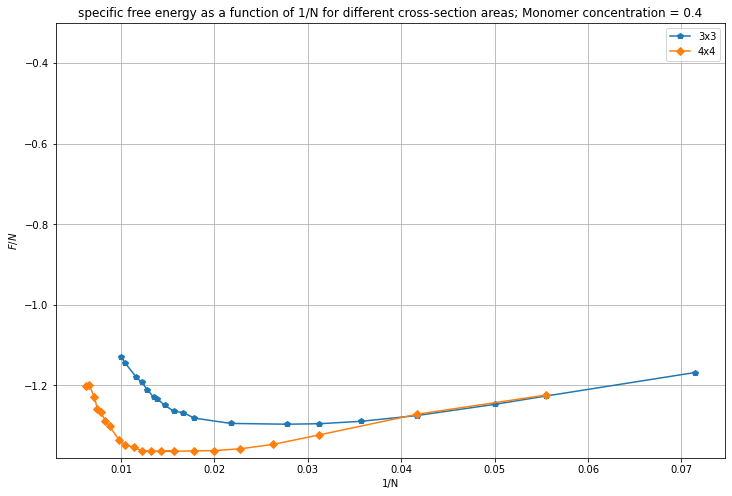

In [233]:
plt.figure(figsize=(12,8))
plt.plot([1/el for el in ns], ens, marker='p', label='3x3')
plt.plot([1/el for el in ns_44], ens_44, marker='D', label='4x4')
plt.grid()
plt.legend()
# plt.ylim(-1.4, -0.6)
plt.xlabel('1/N')
plt.ylabel('$F/N$')
plt.ylim(-1.38, -.3)
plt.title('specific free energy as a function of 1/N for different cross-section areas; Monomer concentration = 0.4')

In [272]:
import numpy as np
def ffx(x,c):
#     return np.log(2/(1-2*c*x)) + 2*c*x + 2*c*x*np.log(1/(2*x) -c)
#     return np.log(2/(1-2*c*x))*(1+x/2)+2*c*x*np.log(1/(x*2) -c)
    return np.log(float(np.math.factorial(x)))/x - 2*(np.log(float(np.math.factorial(int(x/2 -c)))))/x

In [7]:
s_24 = np.array([554.70509949, 594.23189697, 603.7037384 , 607.43494415,
       609.16885376, 610.39984436, 610.89280396, 611.04227295,
       610.70732727, 609.97173462, 609.0886734 , 608.16217499])

s_24_old = np.array([360.47239838, 465.41246033, 490.06184082, 500.73722382,
       504.51192474, 506.35112152, 507.13783569, 507.21247864,
       506.78706512, 505.9340744 , 504.69749146, 503.39586029])

s_failed_noreset = np.array([293.00427246, 356.4586792,  368.3112793,  372.49097901, 375.31466065,
 377.62022705, 377.50490723, 378.08278809, 377.45632324, 376.77718506,
 376.17532959])

s_24_1 = np.array([487.19854736, 515.40771484, 523.78917236, 526.88763428, 528.46920166,
 529.31005859, 529.93283691, 529.66850586, 529.35921631, 528.67910156,
 527.72226563, 526.52092285 ,525.3064209 ])

s_24_2 = np.array([487.25444641, 515.46755676, 523.84911499, 526.95037994,
       528.53933411, 529.36174927, 529.99172668, 529.73226318,
       529.41425171, 528.74116211, 527.77660217, 526.58771362,
       525.36799622])


s_24_3 = np.array([356.16542053, 403.82299347, 419.97686615, 425.83280792,
       428.43454132, 429.90583649, 430.6552002 , 430.84507752,
       430.53367462, 430.07684784, 428.9105072 , 428.06294251,
       426.86138611])

s_24_random_alpha = np.array([353.41074219, 400.87792969 ,417.36621094 ,423.21962891 ,425.97353516,
 427.22919922, 427.90380859 ,428.03769531, 427.78740234, 427.53691406,
 426.38994141, 425.48310547 ,423.98603516])


s_24_random_alpha1 = np.array([354.44882813, 401.85839844 ,418.30166016, 424.14980469, 426.82900391,
 428.14785156 ,428.72636719 ,428.99042969, 428.84267578, 428.43945313,
 427.30458984, 426.34970703, 425.13867188])


s_24_random_alpha2 = np.array([355.27783203, 402.66181641 ,418.92631836, 424.85976562, 427.53999023,
 428.89833984 ,429.61225586, 429.8472168 , 429.55493164 ,429.0512207,
 427.95922852, 427.13891602, 425.91601562])


s_24_random_alpha3 = np.array([485.75620117, 533.97547607, 550.63883057, 556.3647583,  558.97189941,
 560.64315186, 561.39056396, 561.47646484, 561.06876221, 560.44691162,
 559.53297119, 558.4887085,  557.38779297])


s_24_random_alpha_single = np.array([1474.5625,   1760.840625, 1784.8375 ,  1790.571875, 1792.56875,  1794.403125,
 1795.08125,  1795.546875, 1794.653125, 1793.7375,   1792.884375, 1792.165625,
 1789.95    ])


# s_24_random_alpha_tmp_40 = np.array([333.75 ,   371.54375, 385.3375 , 389.8  ,   391.3  ,   393.33125, 393.49375,
#  393.44375, 393.66875, 391.725 ,  391.83125 ,390.56875, 390.15   ])

# s_24_random_alpha_tmp_40_1 = np.array([365.840625, 411.05625  ,425.284375, 428.96875 , 432.11875 , 433.703125,
#  433.83125 , 435.1875 ,  433.475,    432.5625 ,  431.709375, 430.984375,
#  431.015625])

# s_24_random_alpha_tmp_40_2 = np.array([376.05859375, 422.2171875 , 435.978125 ,  442.0515625 , 444.62109375,
#  446.615625  , 447.65859375, 447.0734375 , 447.065625  , 446.07109375,
#  445.12265625, 444.7171875 , 444.090625  ])

s_24_random_alpha_tmp_40 = np.array([382.98648834, 428.43770142, 443.70338593, 449.50116577,
       452.0135437 , 453.6338562 , 454.32313385, 454.5098526 ,
       454.16901703, 453.5845871 , 452.71041107, 451.6847229 ,
       450.36495667])

s_24_random_alpha_tmp_40_1 = np.array([451.12234955, 497.00262604, 512.78864746, 518.31710663,
       520.79559326, 522.41056671, 523.27038727, 523.27328339,
       523.05992584, 522.47491455, 521.2751358 , 520.47054596,
       519.409021  ])


In [12]:
def make_p(s):
    tmp = np.exp(s - np.max(s))
    return tmp/np.sum(tmp)


def make_p_urw(s):
    tmp = s #- np.max(s)
    return tmp/np.sum(tmp)

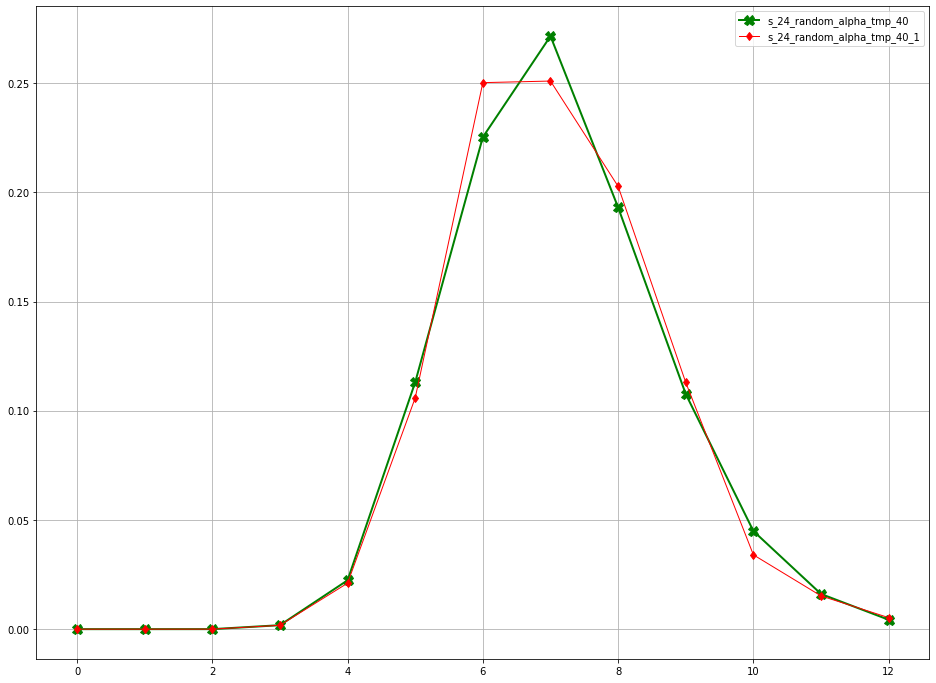

In [165]:
plt.figure(figsize=(16,12))
# plt.plot(make_p(s_24), marker='x', label='s_24')
# plt.plot(make_p(s_24_old), marker='x', label='s_24_old')
# plt.plot(make_p(s_failed_noreset), marker='x', label='s_failed_noreset')
# plt.plot(make_p(s_24_1), marker='x', label='s_24_1')
# plt.plot(make_p(s_24_2), marker='x', label='s_24_2')
# plt.plot(make_p(s_24_3), marker='o', label='s_24_3')

# plt.plot(make_p(s_24_random_alpha), marker='x', label='s_24_random_alpha')
# plt.plot(make_p(s_24_random_alpha1), marker='p', label='s_24_random_alpha1', linewidth=2)
# plt.plot(make_p(s_24_random_alpha2), marker='X', label='s_24_random_alpha2', linewidth=2)
# plt.plot(make_p(s_24_random_alpha3), marker='X', label='s_24_random_alpha3', linewidth=2)
# plt.plot(make_p(s_24_random_alpha_single), marker='X', label='s_24_random_alpha_single', linewidth=2)
# plt.plot(make_p(s_24_random_alpha_tmp_40), marker='d', label='s_24_random_alpha_tmp_40', linewidth=2, color='blue')
# plt.plot(make_p(s_24_random_alpha_tmp_40_2), marker='d', label='s_24_random_alpha_tmp_40_2', linewidth=2, color='yellow')
plt.plot(make_p(s_24_random_alpha_tmp_40), marker='X', markersize=10, label='s_24_random_alpha_tmp_40', linewidth=2, color='green')
plt.plot(make_p(s_24_random_alpha_tmp_40_1), marker='d', label='s_24_random_alpha_tmp_40_1', linewidth=1, color='red')


# plt.plot(make_p(s_24_random_alpha_single_progress), marker='X', markersize=10, label='s_24_random_alpha_single_progress', linewidth=2, color='green')


plt.grid()
plt.legend()
# plt.yscale('log')
# plt.ylim(10**-40, 0)

# fantom chains

In [593]:
s_24_20_fantom_1 = np.array([335.30293274, 352.41482086, 355.38712158, 357.05743713,
       357.85930023, 357.93222809, 357.5930603 , 356.79670715,
       355.89321289, 354.53625031, 352.92050018, 351.15855865])



s_24_10_fantom_alpha0_5_reset = np.array([376.91753239, 382.34647983, 385.34516757, 387.07530978 ,387.86133731,
 387.95525058 ,387.60255282 ,387.08342746, 386.15647739 ,384.76392978,
 383.47970127 ,381.38786624])

s_24_10_fantom_alpha0_5_1 = np.array([273.82106323, 283.80029755, 286.9986496 , 288.74790497,
       289.5825943 , 289.51894989, 289.23885651, 288.47677155,
       287.18991394, 285.70750122, 283.87211456, 282.23677826])


s_24_10_fantom_alpha1_5_1 = np.array([357.66414183, 363.48591919, 367.5823059,  368.43355713, 368.96495361,
 368.92994384 ,368.33206176, 367.35884399 ,366.23747558 ,364.98314209,
 363.68677368 ,362.48402099])



s_24_10_fantom_alpha1_0_1 = np.array( [282.2697174 , 287.76621399 ,290.91013488 ,292.90583496, 294.57140808,
 294.10726013 ,293.37846069 ,292.56933593, 291.39779663, 288.86105041,
 287.50954895 ,286.33506469])


s_24_10_fantom_alpha0_0_1 = np.array([2501.1365234  ,2511.01640622 ,2513.94677731, 2515.74599606, 2516.51582028,
 2516.58203122, 2516.09267575, 2515.23691403, 2514.0856445,  2512.74843747,
 2511.39404294, 2510.44902341])

s_24_10_fantom_alpha0_1_1 = np.array([3179.48247067 ,3186.3649902 , 3189.25122067 ,3191.04458005 ,3191.83725583,
 3191.88447263 ,3191.41005856 ,3190.55932614 ,3189.45532224 ,3188.15390622,
 3186.87983395, 3185.82622067])

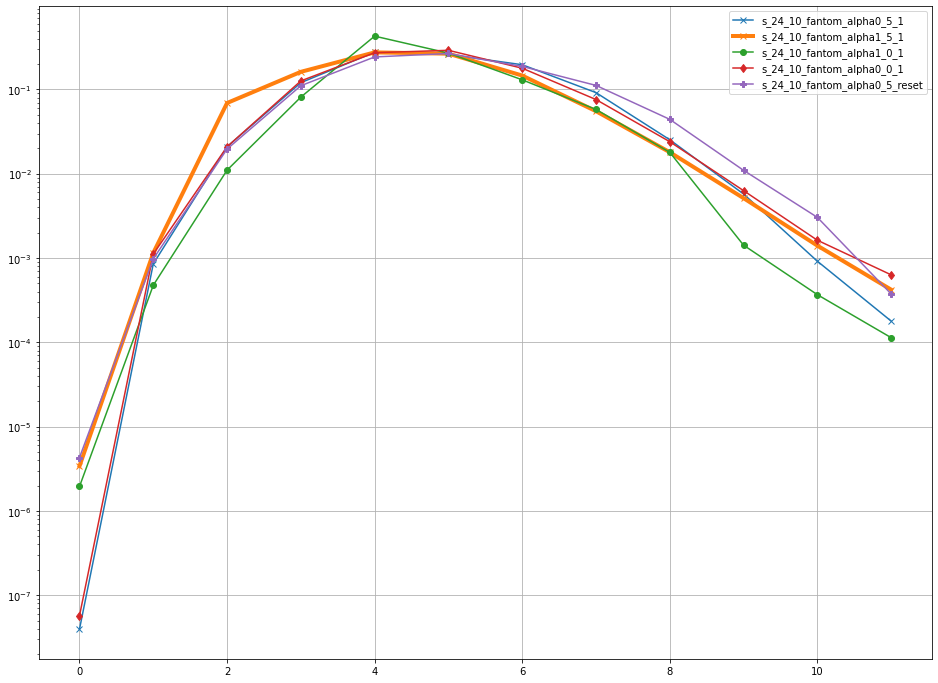

In [596]:
plt.figure(figsize=(16,12))
# plt.plot(make_p(s_24_20_fantom_1), marker='x', label='s_24_20_fantom_1')
# plt.plot(make_p(s_24_20_fantom_2), marker='x', label='s_24_20_fantom_2')
# plt.plot(make_p(s_24_20_fantom_3_alpha1_5), marker='x', label='s_24_20_fantom_3_alpha1_5')
# plt.plot(make_p(s_24_20_fantom_4_alpha0_5), marker='x', label='s_24_20_fantom_4_alpha0_5')
# plt.plot(make_p(s_24_40_fantom_alpha2_0_1), marker='x', label='s_24_40_fantom_alpha2_0_1')
# plt.plot(make_p(s_24_40_fantom_alpha2_0_2), marker='x', label='s_24_40_fantom_alpha2_0_2')
# plt.plot(make_p(s_24_40_fantom_alpha2_0_3), marker='x', label='s_24_40_fantom_alpha2_0_3')
plt.plot(make_p(s_24_10_fantom_alpha0_5_1), marker='x', label='s_24_10_fantom_alpha0_5_1')


plt.plot(make_p(s_24_10_fantom_alpha1_5_1), marker='x', label='s_24_10_fantom_alpha1_5_1', lw=4)
plt.plot(make_p(s_24_10_fantom_alpha1_0_1), marker='o', label='s_24_10_fantom_alpha1_0_1')
plt.plot(make_p(s_24_10_fantom_alpha0_0_1), marker='d', label='s_24_10_fantom_alpha0_0_1')
plt.plot(make_p(s_24_10_fantom_alpha0_5_reset), marker='P', label='s_24_10_fantom_alpha0_5_reset')

plt.grid()
plt.yscale('log')
plt.legend()

# phantom chains

In [815]:
s_24 = np.array([273.82106323, 283.80029755, 286.9986496 , 288.74790497,
       289.5825943 , 289.51894989, 289.23885651, 288.47677155,
       287.18991394, 285.70750122, 283.87211456, 282.23677826])

s_25 = [459.87009277, 467.14474487 ,470.18582763 ,472.09122924, 472.9550415,
 473.19133911, 472.93024292, 472.47217407, 471.61830444 ,470.44942626,
 468.84950561 ,466.98323364]

s_20 = [442.73870239 ,446.59926148 ,449.08851929, 450.2966919,  450.66755371,
 450.29972534, 449.56561279, 448.61729737, 447.57102051, 445.6475769,
 443.98297119]
    
s_15 = np.array([191.91639099, 195.1811615 , 196.76265259, 197.10464478,
       196.63177338, 195.70485382, 194.52309418, 192.7965332 ,
       190.62678528])
s_10 =  np.array([1205.24997254, 1207.1690567 , 1207.35306092, 1206.38012696,
       1204.72477265, 1202.53313446, 1200.1238144 ])

s_24_1 = np.array([988.25004579, 993.40791933, 996.55564424, 998.37445985,
       999.16188509, 999.20697328, 998.75579683, 997.96222688,
       996.80189516, 995.65082399, 994.03365175, 992.42567598])

s_24_2 = [713.12542722, 718.99091184, 722.30149534, 724.07322996, 725.02739255,
 725.09011228, 724.57529904, 723.80775144 ,723.82446286, 721.15895383,
 719.44620359 ,717.60793455]


s_24_urw =   [2.000000e+00 ,2.333700e+03, 4.407230e+04, 4.906497e+05, 4.912502e+05,
 7.205860e+05, 2.813310e+05, 1.247781e+05 ,3.069340e+04, 6.818800e+03,
 1.284500e+03 ,3.383000e+02]

s_24_urw_lambda0 = [5.200000e+00 ,1.350200e+03 ,2.124420e+04, 1.179532e+05, 2.494662e+05,
 2.616839e+05, 1.658093e+05, 7.252140e+04, 2.432610e+04, 6.956800e+03,
 1.936100e+03 ,5.717000e+02]

In [816]:
en_160 = -np.log(aux.n_conf(160, 0,0,0)* sum(make_p(s_25)[:2]) )/160

en_152 = -np.log(aux.n_conf(152, 0,0,0)* sum(make_p(s_24)[:2]) )/152
en_128 = -np.log(aux.n_conf(128, 0,0,0)* sum(make_p(s_20)[:2]) )/128

en_96 = -np.log(aux.n_conf(96, 0,0,0)* sum(make_p(s_15)[:2]) )/96
en_64 = -np.log(aux.n_conf(64, 0,0,0)* sum(make_p(s_10)[:2]) )/64
en_160, en_152, en_128, en_96, en_64

(-1.6955568503079115,
 -1.6929328860541155,
 -1.6910959077314096,
 -1.6855751073154055,
 -1.6731078600328675)

In [817]:
make_p_urw(s_24_urw)

array([9.11519695e-07, 1.06360676e-03, 2.00863847e-02, 2.23618432e-01,
       2.23892116e-01, 3.28414165e-01, 1.28219374e-01, 5.68688478e-02,
       1.39888193e-02, 3.10773525e-03, 5.85423524e-04, 1.54183556e-04])

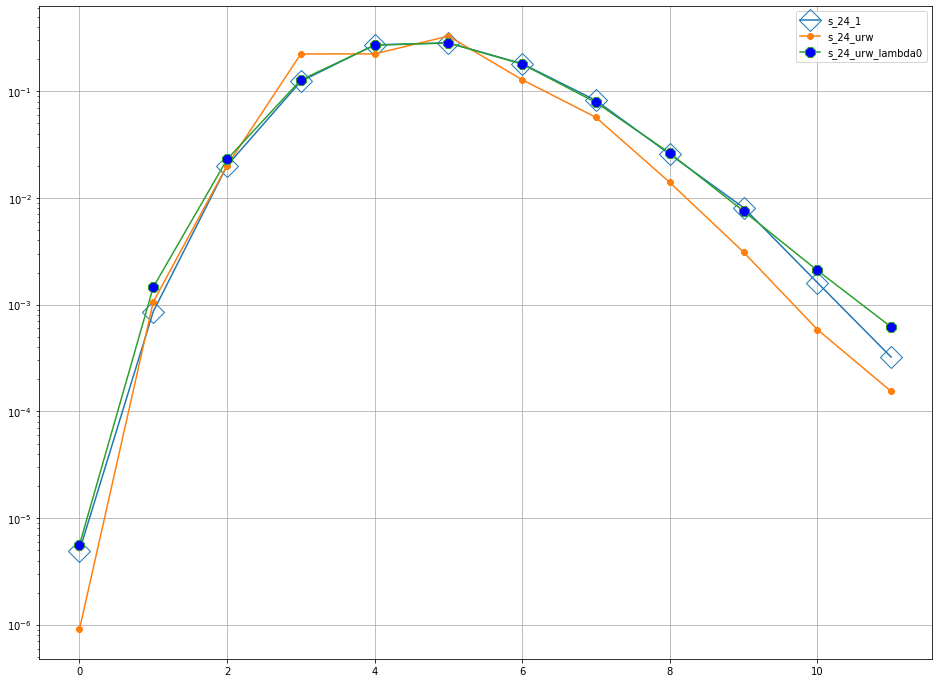

In [820]:
plt.figure(figsize=(16,12))
# plt.plot(make_p(s_25), label='s_25', marker='.')
# plt.plot(make_p(s_24), label='s_24', marker='.')
plt.plot(make_p(s_24_1), label='s_24_1', marker='D',color=None, markersize=15, markerfacecolor='none')
# plt.plot(make_p(s_24_2), label='s_24_2', marker='X', )
plt.plot(make_p_urw(s_24_urw), label='s_24_urw', marker='8', )
plt.plot(make_p_urw(s_24_urw_lambda0), label='s_24_urw_lambda0', marker='8', markersize=10, markerfacecolor='blue')

# plt.plot(make_p(s_20), label='s_20', marker='.')
# plt.plot(make_p(s_15), label='s_15', marker='.')
# plt.plot(make_p(s_10), label='s_10', marker='.')
plt.legend()
plt.yscale('log')
plt.grid()

# SAW

In [332]:
# two lambdas choice (0, x)

s_24_1 = [1019.38647462, 1041.59748533, 1081.13344725, 1089.34328612 ,1093.98691405,
 1097.31279295, 1098.77075194, 1099.73945311, 1100.61015623, 1100.92499998,
 1100.823291 ,  1100.35998534, 1099.75681151 ,1099.08635252, 1098.34301756]

s_24_2 = [ 979.33342286 ,1002.00250245 ,1036.36960449 ,1043.49077148 ,1047.58171387,
 1049.91171875 ,1051.81796875, 1052.90590821, 1053.61239014, 1053.76831055,
 1053.7812378 , 1053.59940186, 1052.8788086,  1052.14982911, 1051.08217774]


#single lambda
s_24_3_lambda8 = [499.1078125 , 521.4796875 , 518.41523437, 521.70273437, 514.146875,
 520.19921875, 520.16796875 ,518.49140625 ,515.58125 ,   521.6375,
 520.99296875 ,521.30859375 ,514.71015625 ,524.0453125,  519.49921875]

s_24_4_lambda6 =[343.44335937, 356.99453125, 362.4421875,  360.09101562, 362.01640625,
 359.159375 ,  354.72109375, 363.6734375,  354.14375 ,   355.9875,
 360.08632812 ,356.73515625 ,350.74140625, 353.503125 ,  356.52617187]

s_24_4_lambda4 =[415.66015625 ,435.30625  ,  442.9265625 , 448.40859375 ,440.09921875,
 439.56796875 ,441.2078125,  433.2078125,  431.4328125 , 425.30703125,
 425.73125   , 421.4203125,  424.03125 ,   421.3390625  ,420.909375  ]

s_24_urw_lambda_0 = [0.000000e+00, 0.000000e+00 ,4.000000e-01, 1.580000e+01, 1.218200e+03,
 1.596230e+04, 8.025440e+04 ,2.183715e+05 ,3.646818e+05, 4.468188e+05,
 4.419948e+05, 3.786934e+05, 2.402970e+05, 1.208344e+05, 3.217480e+04,
 1.851380e+04]

#  real URW
s_24_urw1_31431304 = [0.000000e+00, 0.000000e+00 ,0.000000e+00 ,4.600000e+01 ,2.020000e+03,
 3.189170e+04 ,1.282670e+05 ,2.666089e+05 ,3.215636e+05 ,3.372869e+05,
 3.378935e+05, 3.190834e+05, 2.620932e+05 ,1.611372e+05, 6.793280e+04]

s_24_urw2_lambda_0 =[0.0000e+00, 0.0000e+00 ,1.5000e+00, 7.2800e+01, 6.4690e+02, 2.8234e+03,
 5.8437e+03 ,6.8292e+03, 5.1262e+03, 2.8616e+03 ,1.2577e+03 ,4.5640e+02,
 1.5600e+02, 5.3300e+01, 1.6700e+01]

s_24_4_lambda0 = [   0.   ,  0.,  4238.9, 4599. , 4607.5, 4612.6 ,4616.7 ,4615.7, 4616.6, 4616.4,
 4616.6 ,4614.7, 4615.9 ,4616.1 ,4596.8]

s_24_lambda2_31440378  = [1531.75371098, 1549.40703127, 1576.95107424, 1596.45976565, 1595.6958008,
 1599.39589846, 1601.15253908, 1604.49765627, 1602.98769533, 1603.0746094,
 1603.25595705, 1603.38750002, 1602.74511721, 1601.89853517, 1600.01708986]

s_24_31482580_1core = [   0.   ,  0.   ,  0.  ,   5.2 ,  64. ,  375.2, 1134.6, 2072.4, 2708.5, 2773.9,
 2312.9, 1680.1, 1060.7,  625.5 , 585.2]

s_24_31482641_10core = [0.0000e+00 ,0.0000e+00, 2.0000e-01, 2.0600e+01, 1.0780e+02, 4.3730e+02,
 1.1516e+03, 2.0122e+03, 2.5840e+03, 2.6266e+03, 2.2333e+03, 1.6723e+03,
 1.1041e+03 ,6.7610e+02 ,6.5030e+02]

s_24_31482894_20core =[0.0000e+00, 0.0000e+00, 1.4000e+00, 2.3000e+01, 1.1560e+02, 4.4300e+02,
 1.1268e+03, 1.9402e+03, 2.4868e+03, 2.5082e+03, 2.1638e+03, 1.6074e+03,
 1.0919e+03 ,6.7660e+02, 6.3970e+02]

s_24_31484200_1core_bias0_5 = [0.0000e+00 ,0.0000e+00 ,0.0000e+00, 0.0000e+00 ,2.0000e-01, 7.1800e+01,
 4.3940e+02 ,1.4644e+03, 2.1374e+03 ,2.6016e+03, 1.6539e+03, 1.0697e+03,
 3.5560e+02 ,2.6610e+02 ,7.5900e+01]

s_24_31484390_10core_bias0_5 =  [0.0000e+00, 0.0000e+00 ,0.0000e+00 ,2.0000e-01, 4.2300e+01 ,6.3250e+02,
 2.9245e+03 ,5.2380e+03, 6.7340e+03 ,7.1299e+03, 6.3531e+03, 4.7898e+03,
 3.1203e+03, 9.6390e+02, 4.6500e+02]

s_24_31485776_10core_bias0_5_faster_freeze = [   0.  ,   0.  ,   0.   ,  9. ,  125.2,  718.7 ,1869. , 3289.2 ,4081. ,
                                              3966.8, 3355.7, 2325. , 1408.8 , 682.3 ,184.6]

s_24_31486003_10core_bias1_5_faster_freeze =\
[   0. ,    0. ,   16.9 , 247.5 ,1017.6 ,1632.7, 1741.2 ,1706.8 ,1420.6, 1070.4,
  517. ,  154.8,   30.6,   17.7 ,  10.1]

s_24_31665552_1core_bias1_5_faster_freeze =\
[0.0000e+00, 0.0000e+00, 1.1000e+00, 1.1210e+02 ,4.1940e+02, 1.1753e+03,
 1.6552e+03 ,1.2005e+03, 6.7450e+02, 3.7840e+02 ,1.6960e+02 ,2.8300e+01,
 0.0000e+00 ,1.0200e+01, 0.0000e+00]


s_24_31718573_1core_native_faster_freeze  =\
 [0.0000e+00 ,0.0000e+00 ,2.8400e+01, 2.0500e+02, 2.2111e+03, 5.3633e+03,
 3.6989e+03, 1.3938e+03, 3.4580e+02, 6.3500e+01, 7.4000e+00, 7.0000e-01,
 9.0000e-01, 1.0000e-01, 1.0100e+01]


s_24_31718915_1core_native_faster_freeze=\
[0.0000e+00 ,0.0000e+00, 0.0000e+00, 1.5510e+02, 1.6470e+03, 3.7109e+03,
 2.4193e+03, 9.0310e+02, 2.2340e+02, 5.1000e+01, 1.1700e+01, 2.1000e+00,
 4.0000e-01, 0.0000e+00, 1.0000e-01]


s_24_31719097_1core_native_faster_freeze=\
[0.0000e+00, 0.0000e+00 ,0.0000e+00, 3.0000e-01 ,9.1100e+01, 5.8670e+02,
 1.3095e+03 ,1.4899e+03, 1.3305e+03, 7.6070e+02 ,3.1290e+02 ,1.1510e+02,
 4.7800e+01 ,6.4000e+00, 6.1000e+00]

s_24_31719752_1core_random  =\
[0.0000e+00 ,0.0000e+00, 6.0000e-01, 3.3500e+01 ,6.0780e+02 ,3.1933e+03,
 6.9002e+03, 8.0911e+03, 6.0510e+03 ,3.2280e+03 ,1.2941e+03, 4.2600e+02,
 1.1140e+02, 2.4600e+01, 4.9000e+00]
s_24_31719781_1core_prob = \
[0.0000e+00, 0.0000e+00 ,6.0000e-01 ,3.5100e+01, 5.8810e+02 ,3.0651e+03,
 6.6485e+03 ,7.7947e+03 ,5.8554e+03 ,3.0772e+03,1.2664e+03, 3.9190e+02,
 1.0430e+02 ,2.1300e+01, 5.2000e+00]


slurm_31723814 = [   0.   ,  0.  ,  10.2 ,  37.8 , 758.4 ,2905.3, 4985.2, 4147.3 ,2380.7, 1097.4,
  530.7 , 182.7 ,  89.6  , 33.8  , 14.2]

slurm_31724232  = \
[0.000e+00 ,0.000e+00, 1.000e-01, 2.600e+00, 4.710e+01 ,2.624e+02, 5.648e+02,
 6.719e+02, 4.976e+02, 2.735e+02, 1.065e+02, 3.570e+01, 9.600e+00, 1.800e+00,
 7.000e-01]

slurm_31741831 = \
[0.0000e+00 ,0.0000e+00 ,0.0000e+00, 1.4500e+01, 4.9510e+02, 2.6126e+03,
 6.1417e+03 ,8.4846e+03, 7.0085e+03, 3.6954e+03, 1.7143e+03 ,6.4570e+02,
 1.9820e+02 ,4.3000e+01, 8.3000e+00]


slurm_31742396 = \
[0.0000e+00 ,0.0000e+00 ,0.0000e+00 ,2.6300e+01 ,4.2440e+02, 2.0058e+03,
 4.3319e+03, 4.6779e+03, 3.5588e+03, 1.8190e+03 ,8.3590e+02, 2.6290e+02,
 2.9200e+01, 7.8000e+00, 1.3000e+00]

slurm_31750678 = \
[0.0000e+00, 0.0000e+00, 8.0000e-01, 1.9200e+01, 2.4000e+02, 1.0051e+03,
 1.7524e+03, 1.4507e+03, 8.9000e+02, 5.6930e+02 ,1.6350e+02 ,4.2800e+01,
 1.9900e+01 ,0.0000e+00, 0.0000e+00]



slurm_31793887 = \
[0.000e+00 ,0.000e+00 ,0.000e+00 ,1.180e+01 ,1.292e+02, 4.960e+02, 9.226e+02,
 6.324e+02, 3.357e+02 ,1.657e+02 ,8.620e+01, 2.390e+01, 5.400e+00, 6.000e-01,
 0.000e+00]



slurm_31794031 = \
[0.00000e+00 ,0.00000e+00 ,8.00000e-01, 6.45000e+01 ,1.08410e+03, 5.61420e+03,
 1.21577e+04, 1.41775e+04 ,1.06342e+04, 5.69070e+03, 2.29140e+03, 7.34400e+02,
 1.90300e+02, 3.74000e+01 ,9.00000e+00]

slurm_31794099 = \
[0.00000e+00, 0.00000e+00 ,8.00000e-01, 6.79000e+01 ,1.17080e+03, 6.07200e+03,
 1.31001e+04 ,1.53311e+04, 1.14575e+04 ,6.12340e+03 ,2.49290e+03, 7.71800e+02,
 2.14800e+02, 4.53000e+01, 8.80000e+00]



slurm_31805606 = \
[0.0000e+00, 0.0000e+00 ,3.0000e-01, 6.4700e+01, 6.4110e+02, 1.5107e+03,
 2.0863e+03, 1.4381e+03, 7.5700e+02, 3.1090e+02 ,8.5900e+01, 1.3100e+01,
 0.0000e+00, 2.0000e-01, 2.4000e+00]

slurm_31806320 = \
[0.0000e+00 ,1.1000e+00, 4.0550e+02, 3.0655e+03 ,5.8237e+03, 4.3279e+03,
 2.2077e+03, 6.8200e+02, 1.4620e+02, 2.3900e+01, 1.2100e+01, 3.0000e-01,
 0.0000e+00 ,0.0000e+00 ,1.0100e+01]



slurm_31811126=\
[0.0000e+00 ,0.0000e+00, 1.0000e-01, 8.8000e+00 ,1.5600e+02, 8.2700e+02,
 1.7864e+03, 2.0980e+03 ,1.5642e+03, 8.2380e+02, 3.3910e+02 ,1.0160e+02,
 3.1000e+01, 5.7000e+00 ,1.4000e+00]

slurm_31811298=\
[   0.   ,  0. ,    0. ,    3. ,   43.1,  458.6, 1132. , 1774.5, 1466.1 , 783.1,
  457.1 , 113.6 ,  46.1 ,   4. ,    4. ]



slurm_31828701_urw  = \
[0.0000e+00 ,0.0000e+00, 1.0000e-01, 6.7000e+00 ,9.5500e+01, 5.5330e+02,
 1.6707e+03 ,3.1199e+03, 4.0748e+03, 4.1168e+03, 3.5134e+03 ,2.5423e+03,
 1.6316e+03 ,9.1270e+02 ,8.6510e+02]

slurm_31831936_lambda2 = \
[0.000e+00, 1.000e-01, 3.400e+01, 1.485e+02, 3.283e+02, 2.249e+02, 1.511e+02,
 8.250e+01, 3.640e+01, 3.300e+00, 1.200e+00, 0.000e+00 ,0.000e+00, 0.000e+00,
 1.100e+00]
# s_24_31493394_10core_bias1_5_faster_freeze_weird =\
# [  0. ,   5.3,  88.9, 401.5, 747.6, 736.7, 510.3, 286.5, 140.9,  68.8 , 34.5,  15.8,
#    5. ,   1. ,   0.8]

slurm_31832153 = \
[0.000000e+00, 0.000000e+00, 3.400000e+00, 2.364000e+02, 3.628400e+03,
 2.142340e+04 ,6.446070e+04, 1.192982e+05, 1.564860e+05 ,1.592668e+05,
 1.340126e+05, 9.708760e+04, 6.205390e+04, 3.559080e+04, 3.357840e+04]


slurm_31899436_wl_4_5 = \
[ 77.8125 , 89.0375,  92.425,   93.4875,  93.85,    94.7875 , 94.825 ,  95.275,
  96.4625,  97.3875  ,98.05  ,  97.95,    98.425 ,  97.55 ,  103.0625]

slurm_31899436_wl_4_5_1 = \
[ 90.025 ,  100.51875, 104.    ,  104.575 ,  104.99375 ,106.31875 ,106.24375,
 106.45625 ,106.70625, 106.78125 ,108.35 ,   108.39375, 107.725 ,  108.625,
 112.7375 ]

slurm_31899436_wl_4_5_2 = \
[ 95.85  ,  107.45625 ,110.175 ,  111.0375 , 111.6125 , 112.69375 ,112.25,
 113.4625 , 114.65625, 114.75625 ,114.8125  ,114.68125 ,115.725 ,  115.54375,
 119.725  ]
slurm_31899436_wl_4_5_3 = \
[105.759375 ,115.14375  ,118.6125 ,  120.046875 ,120.071875 ,120.31875,
 121.3    ,  121.896875, 122.88125,  123.3375 ,  122.503125, 122.946875,
 122.51875,  123.2875 ,  127.909375]
slurm_31899436_wl_4_5_4 = \
[120.07969971, 129.83430176, 132.88477783, 133.9972229,  134.42404785,
 134.93251343, 135.32147217 ,135.95126953 ,136.41524658, 136.80869141,
 137.07539063 ,137.46218262 ,137.72435303 ,138.05733643, 142.1925415 ]

tmp  = \
[252.32548828, 269.53310547, 273.23032227 ,274.65339355, 275.03979492,
 275.29707031 ,275.37167969, 275.60603027, 275.86850586, 276.11337891,
 275.97165527, 275.89797363, 275.89870605 ,275.69594727 ,277.97724609]

tmp1 = [213.1998291 , 224.1479248 , 227.5229248 , 228.72353516, 229.32578125,
 229.6121582 , 229.96601562, 230.40466309, 230.72062988, 231.0628418,
 231.33547363 ,231.46828613 ,231.6263916 , 231.93449707 ,234.9699707 ]

In [333]:
# make_p_urw(s_24_urw)

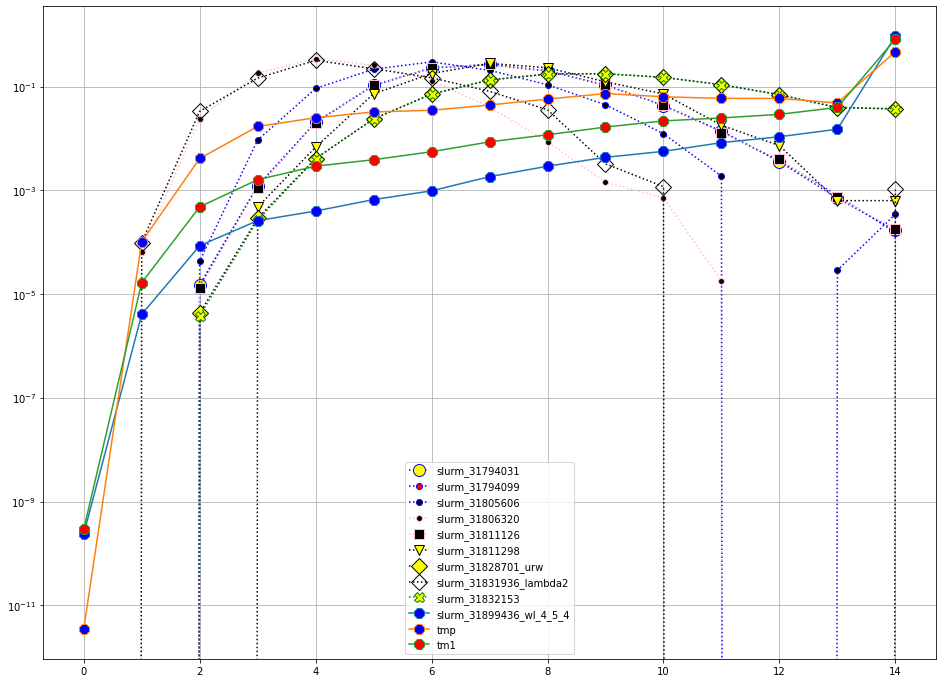

In [335]:
plt.figure(figsize=(16,12))

# plt.plot(make_p(s_24_1), label='s_24_1', marker='D',color=None, markersize=15, markerfacecolor='none')
# plt.plot(make_p(s_24_2), label='s_24_2', marker='D',color=None, markersize=10, markerfacecolor='none')


# plt.plot(make_p(s_24_3_lambda8), label='s_24_4_lambda8', marker='p',color=None, markersize=10, markerfacecolor='none')
# plt.plot(make_p(s_24_4_lambda6), label='s_24_4_lambda6', marker='p',color=None, markersize=10, markerfacecolor='none')
# plt.plot(make_p(s_24_4_lambda4), label='s_24_4_lambda4', marker='p',color=None, markersize=10, markerfacecolor='none')
# plt.plot(make_p(s_24_4_lambda0), label='s_24_4_lambda0', marker='p',color=None, markersize=10, markerfacecolor='none')

# plt.plot(make_p_urw(s_24_urw_lambda_0), label='s_24_urw_lambda_0', marker='8', markersize=10, markerfacecolor='blue')

# plt.plot(make_p_urw(s_24_urw1_31431304), label='s_24_urw1_31431304', marker='o', markersize=10, markerfacecolor='red')

#have no clue why this is different plt.plot(make_p_urw(s_24_urw2_lambda_0), label='s_24_urw2_lambda_0', marker='o', markersize=10, markerfacecolor='yellow')
# plt.plot(make_p(s_24_lambda2_31440378), label='s_24_lambda2_31440378', marker='8', markersize=10, markerfacecolor='blue')

# plt.plot(make_p_urw(s_24_31482580_1core), label='s_24_31482580_1core', marker='d', markersize=10, markerfacecolor='yellow')
# plt.plot(make_p_urw(s_24_31482641_10core), label='s_24_31482641_10core', marker='d', markersize=11, markerfacecolor='blue')
# plt.plot(make_p_urw(s_24_31482894_20core), label='s_24_31482894_20core', marker='d', markersize=12, markerfacecolor='red')

# plt.plot(make_p_urw(s_24_31484200_1core_bias0_5), label='s_24_31484200_1core_bias0_5', marker='o', markersize=12, markerfacecolor='purple')
# plt.plot(make_p_urw(s_24_31484390_10core_bias0_5), label='s_24_31484390_10core_bias0_5', marker='o', markersize=10, markerfacecolor='blue')
# plt.plot(make_p_urw(s_24_31485776_10core_bias0_5_faster_freeze), label='s_24_31485776_10core_bias0_5_faster_freeze', marker='o', markersize=10, markerfacecolor='yellow')
# plt.plot(make_p_urw(s_24_31486003_10core_bias1_5_faster_freeze), label='s_24_31486003_10core_bias1_5_faster_freeze', color='black', marker='o', markersize=5, markerfacecolor='yellow')
# plt.plot(make_p_urw(s_24_31665552_1core_bias1_5_faster_freeze), label='s_24_31665552_1core_bias1_5_faster_freeze', color='black', marker='o', markersize=5, linestyle='dashed', markerfacecolor='yellow')
# plt.plot(make_p_urw(s_24_31718573_1core_native_faster_freeze), label='s_24_31718573_1core_native_faster_freeze', color='red', marker='o', markersize=5, linestyle='dotted', markerfacecolor='yellow')
# plt.plot(make_p_urw(s_24_31718915_1core_native_faster_freeze), label='s_24_31718915_1core_native_faster_freeze', color='red', marker='o', markersize=5, linestyle='dotted', markerfacecolor='yellow')
# plt.plot(make_p_urw(s_24_31719097_1core_native_faster_freeze), label='s_24_31719097_1core_native_faster_freeze', color='red', marker='o', markersize=5, linestyle='dotted', markerfacecolor='yellow')


# plt.plot(make_p_urw(s_24_31719752_1core_random), label='s_24_31719752_1core_random', color='red', marker='o', markersize=10, linestyle='dotted', markerfacecolor='yellow')
# plt.plot(make_p_urw(s_24_31719781_1core_prob), label='s_24_31719781_1core_prob', color='blue', marker='o', markersize=10, linestyle='dotted', markerfacecolor='yellow')
# plt.plot(make_p_urw(slurm_31723814), label='slurm_31723814', color='green', marker='o', markersize=5, linestyle='dotted', markerfacecolor='green')
# plt.plot(make_p_urw(slurm_31724232), label='slurm_31724232', color='black', marker='o', markersize=5, linestyle='dotted', markerfacecolor='black')

# plt.plot(make_p_urw(slurm_31741831), label='slurm_31741831', color='green', marker='x', markersize=10, linestyle='dashed', markerfacecolor='green')
# plt.plot(make_p_urw(slurm_31742396), label='slurm_31742396', color='green', marker='X', markersize=10, linestyle='dashed', markerfacecolor='green')
# plt.plot(make_p_urw(slurm_31750678), label='slurm_31750678', color='blue', marker='X', markersize=10, linestyle='dashed', markerfacecolor='green')

# plt.plot(make_p_urw(slurm_31793887), label='slurm_31793887', color='blue', marker='X', markersize=4, linestyle='solid', markerfacecolor='green')
plt.plot(make_p_urw(slurm_31794031), label='slurm_31794031', color='blue', marker='o', markersize=12, linestyle='dotted', markerfacecolor='yellow')

plt.plot(make_p_urw(slurm_31794099), label='slurm_31794099', color='blue', marker='o', markersize=6, linestyle='dotted', markerfacecolor='red')

plt.plot(make_p_urw(slurm_31805606), label='slurm_31805606', color='blue', marker='o', markersize=6, linestyle='dotted', markerfacecolor='black')

plt.plot(make_p_urw(slurm_31806320), label='slurm_31806320', color='pink', marker='o', markersize=6, linestyle='dotted', markerfacecolor='black')


plt.plot(make_p_urw(slurm_31811126), label='slurm_31811126', color='pink', marker='s', markersize=10, linestyle='dotted', markerfacecolor='black')
plt.plot(make_p_urw(slurm_31811298), label='slurm_31811298', color='black', marker='v', markersize=10, linestyle='dotted', markerfacecolor='yellow')

plt.plot(make_p_urw(slurm_31828701_urw), label='slurm_31828701_urw', color='black', marker='D', markersize=12, linestyle='dotted', markerfacecolor='yellow')

plt.plot(make_p_urw(slurm_31831936_lambda2), label='slurm_31831936_lambda2', color='black', marker='D', markersize=12, linestyle='dotted', markerfacecolor='none')



plt.plot(make_p_urw(slurm_31832153), label='slurm_31832153', color='green', marker='X', markersize=10, linestyle='dotted', markerfacecolor='yellow')


# plt.plot(make_p(slurm_31899436_wl_4_5), label='slurm_31899436_wl_4_5', marker='8', markersize=10, markerfacecolor='blue')
# plt.plot(make_p(slurm_31899436_wl_4_5_1), label='slurm_31899436_wl_4_5_1', marker='8', markersize=10, markerfacecolor='blue')
# plt.plot(make_p(slurm_31899436_wl_4_5_2), label='slurm_31899436_wl_4_5_2', marker='8', markersize=10, markerfacecolor='blue')
# plt.plot(make_p(slurm_31899436_wl_4_5_3), label='slurm_31899436_wl_4_5_3', marker='8', markersize=10, markerfacecolor='blue')
plt.plot(make_p(slurm_31899436_wl_4_5_4), label='slurm_31899436_wl_4_5_4', marker='8', markersize=10, markerfacecolor='blue')
plt.plot(make_p(tmp), label='tmp', marker='8', markersize=10, markerfacecolor='blue')
plt.plot(make_p(tmp1), label='tm1', marker='8', markersize=10, markerfacecolor='red')

# plt.plot(make_p_urw(s_24_31493394_10core_bias1_5_faster_freeze_weird), label='s_24_31493394_10core_bias1_5_faster_freeze_weird', color='blue', marker='o', markersize=5, markerfacecolor='yellow')

plt.legend()
plt.yscale('log')
plt.grid()

In [1554]:
slurm_31929424 = \
 [0.0000e+00, 1.1000e+00, 2.2300e+01, 1.0700e+02, 3.2610e+02 ,6.5890e+02,
 1.0138e+03, 1.2141e+03, 1.2728e+03 ,1.2089e+03 ,1.0231e+03, 8.4000e+02,
 6.4060e+02 ,4.7780e+02 ,8.2400e+02]


tmp  = \
[197.9375   ,  206.0359375 , 209.44609375, 211.69257812 ,212.69765625,
 213.61367187 ,213.8328125 , 212.95351562, 213.23164062 ,212.25234375,
 212.46171875, 210.60976562, 209.23554687, 208.61445312]

slurm_31939460_wl_alpha0 = \
[226.31455078, 229.28535156 ,230.80712891, 231.815625  , 232.4984375,
 232.89902344, 233.10957031, 233.16113281 ,233.09902344, 232.93945313,
 232.70996094, 232.45732422, 232.15214844 ,232.70341797]


slurm_32241933 = np.array([65.3125,  69.53125, 71.1875,  72.00625, 72.10625, 71.8625,  71.375 ,  70.975,
 70.4375 , 70.00625 ,69.7625 , 68.85625, 68.35 ,   67.86875, 66.725  ])

slurm_32745775 = np.array([44.56647186, 47.43515015, 48.35072021, 48.85370636, 49.28307495,
       49.55586395, 49.7126236 , 49.80365295, 49.77902527, 49.63788452,
       49.50489349, 49.21263428, 48.94219208, 48.71766052, 49.15546875])


slurm_32774267 = np.array([199.6890625, 205.6625   , 207.0078125, 207.8875   , 208.6140625,
       209.1      , 209.4234375, 209.5125   , 209.528125 , 209.425    ,
       209.234375 , 209.0234375, 208.7578125, 208.4515625, 208.99375  ])


slurm_32774416 = np.array([19.03448639, 20.66863556, 21.09884186, 21.34429016, 21.55155182,
       21.68137512, 21.77001495, 21.82328033, 21.77740021, 21.60849152,
       21.42268982, 21.17247925, 20.91104889, 20.46502228, 21.03243866])


# weight =  np.array([ 5.53341939,  8.9504328 , 10.12985096, 11.41800106, 12.85860763,
#        14.4539571 , 16.14418783, 18.05323533, 20.07131993, 22.39400282,
#        24.83470339, 27.35698093, 29.90994763, 32.55402073, 36.5035034 ])

# weight = weight/sum(weight)
# res = slurm_32241933*np.exp(.005*weight)
# res

slurm_32808357 = np.array([13.61865234, 14.85069885, 14.93265533, 14.93169403, 14.98311462,
       15.08269958, 15.13337708, 15.12397461, 14.98059998, 14.86433868,
       14.67369995, 14.49420929, 14.15454712, 13.85326538, 14.28669586])

slurm_32808748 = np.array([21.40657349, 22.80222626, 23.18975525, 23.2703537 , 23.41711273,
       23.49449921, 23.59620209, 23.60058289, 23.54514923, 23.37281342,
       23.22239227, 22.94688263, 22.6692688 , 22.40063324, 22.86477814])

slurm_32808786 = np.array([32.94923553, 34.92182312, 35.70607452, 36.08014832, 36.41646423,
       36.67645264, 36.79277039, 36.82756653, 36.79927216, 36.67584686,
       36.44229126, 36.22807922, 35.98326416, 35.66493988, 36.12401733])

slurm_32808875 = np.array([118.13178711, 121.27692871, 122.42814941, 123.19052734,
       123.76210937, 124.15361328, 124.39667969, 124.49858398,
       124.50964355, 124.384375  , 124.2107666 , 123.98791504,
       123.71420898, 123.41530762, 123.91452637])

slurm_32808849 = np.array([365.921875 , 374.78125  , 376.4234375, 377.36875  , 378.0375   ,
       378.5171875, 378.76875  , 378.909375 , 378.9375   , 378.840625 ,
       378.6921875, 378.434375 , 378.1828125, 377.84375  , 378.39375  ])

slurm_32815458 = np.array([174.47688293, 178.35323486, 179.79619751, 180.71498108,
       181.39517212, 181.86018372, 182.14806824, 182.2842865 ,
       182.28605652, 182.1923584 , 182.009729  , 181.79026184,
       181.50461121, 181.21133423, 181.72452087])

slurm_32854969 = np.array([12.93864441, 13.68045502, 13.46931152, 13.44592743, 13.34613647,
       13.30751801, 13.38562317, 13.36334076, 13.2311264 , 13.07098083,
       12.88145752, 12.64985352, 12.32639465, 11.99832916, 12.4673584 ])

slurm_32855133 = np.array([16.97966919, 17.95141907, 17.867659  , 17.88787994, 17.82938232,
       17.92912903, 17.95068054, 17.91964569, 17.78520203, 17.63241577,
       17.44343109, 17.17274017, 16.86651917, 16.68563538, 17.09056244])

slurm_32859950 = np.array([0.000e+00, 6.000e-01, 1.310e+01, 5.860e+01, 1.761e+02, 3.523e+02,
       5.266e+02, 6.472e+02, 6.687e+02, 6.376e+02, 5.492e+02, 4.385e+02,
       3.366e+02, 2.503e+02, 4.355e+02])


slurm_33049242 = np.array([1337.79843751, 1341.72187501, 1343.77070313, 1348.13085938])

slurm_33142271 = np.array([331.33125 , 336.528125, 338.23125 , 341.8375])

In [1516]:
def produce_data(i):
#     data = \
#     (3.0,make_p(slurm_32854969)[i]),\
#     (2.7, make_p(slurm_32855133)[i]),\
#     data = \
#     (2.5, make_p(slurm_32808357)[i]),\
    data = \
    (2.2, make_p(slurm_32808748)[i]), \
    (2.0, make_p(slurm_32774416)[i]), \
    (1.7, make_p(slurm_32808786)[i]),\
    (1.5, make_p(slurm_32745775)[i]), \
    (1.2, make_p(slurm_32808875)[i]), \
     (1.0, make_p(slurm_32815458)[i]), \
    (0.0, make_p_urw(slurm_31929424)[i])
#     (1.0, make_p(slurm_32808849)[i]), \
#     (1.0, make_p(slurm_32774267)[i]),\    
   
    
    alphas = [d[0] for d in data]
    vals  = [d[1] for d in data]
    return alphas[::-1], vals[::-1]

In [1517]:
data = []
for i in range(15):
    data.append(produce_data(i))
data = np.array(data)
data.shape

(15, 2, 7)

In [1518]:
data

array([[[0.00000000e+00, 1.00000000e+00, 1.20000000e+00, 1.50000000e+00,
         1.70000000e+00, 2.00000000e+00, 2.20000000e+00],
        [0.00000000e+00, 5.14485706e-05, 2.11170896e-04, 6.32102299e-04,
         2.36260979e-03, 6.73981945e-03, 1.13828399e-02]],

       [[0.00000000e+00, 1.00000000e+00, 1.20000000e+00, 1.50000000e+00,
         1.70000000e+00, 2.00000000e+00, 2.20000000e+00],
        [1.14220445e-04, 2.48228456e-03, 4.90401404e-03, 1.11336745e-02,
         1.69854049e-02, 3.45422187e-02, 4.59594609e-02]],

       [[0.00000000e+00, 1.00000000e+00, 1.20000000e+00, 1.50000000e+00,
         1.70000000e+00, 2.00000000e+00, 2.20000000e+00],
        [2.31555994e-03, 1.05080537e-02, 1.55067399e-02, 2.78141342e-02,
         3.72110530e-02, 5.31112413e-02, 6.77137129e-02]],

       [[0.00000000e+00, 1.00000000e+00, 1.20000000e+00, 1.50000000e+00,
         1.70000000e+00, 2.00000000e+00, 2.20000000e+00],
        [1.11105342e-02, 2.63357031e-02, 3.32366337e-02, 4.59948975e-02,
    

In [1519]:
from scipy.optimize import curve_fit

# def fit_func(x, a,b,c, d):
#     return  a +x*b*np.exp(-c*(x))

def fit_func(x, a,b ):
    return a*x +b

# def fit_func(x, a,b, c):
#     return a*x**b+c   

In [1520]:
def get_fit(x,y, start = 1):
#     params = curve_fit(fit_func, x[1:], y[1:])
#     x_fit, y_fit = x, [fit_func(val, *params[0]) for val in x]
    
#     params = curve_fit(fit_func, x[start:], np.log(y[start:]), method='trf', bounds=([-50, 0.73, -20], [50,1,20]))
    params = curve_fit(fit_func, x[start:], np.log(y[start:]), method='lm',)
    print(params[0])
    x_fit, y_fit = x, np.exp([fit_func(val, *params[0]) for val in x])
    return x_fit, y_fit
    

In [1521]:
fit = []
for i in range(data.shape[0]):
    print('fitting for', i)
    if i ==0:
        start = 1
    else:
        start = 1
    fit.append(get_fit(data[i][0], data[i][1], start=start) )
fit = np.array(fit)

fitting for 0
[  4.48741802 -14.05113364]
fitting for 1
[ 2.428526   -8.27481285]
fitting for 2
[ 1.54664125 -6.01184058]
fitting for 3
[ 0.86496752 -4.44045124]
fitting for 4
[ 0.41676693 -3.32808392]
fitting for 5
[ 0.09740147 -2.55101541]
fitting for 6
[-0.07007382 -2.11732644]
fitting for 7
[-0.16835811 -1.88980586]
fitting for 8
[-0.22257014 -1.82663432]
fitting for 9
[-0.28187875 -1.86920342]
fitting for 10
[-0.27773613 -2.05233283]
fitting for 11
[-0.3124195  -2.24259112]
fitting for 12
[-0.30082038 -2.53009274]
fitting for 13
[-0.35123974 -2.75770449]
fitting for 14
[-0.35125773 -2.26753365]


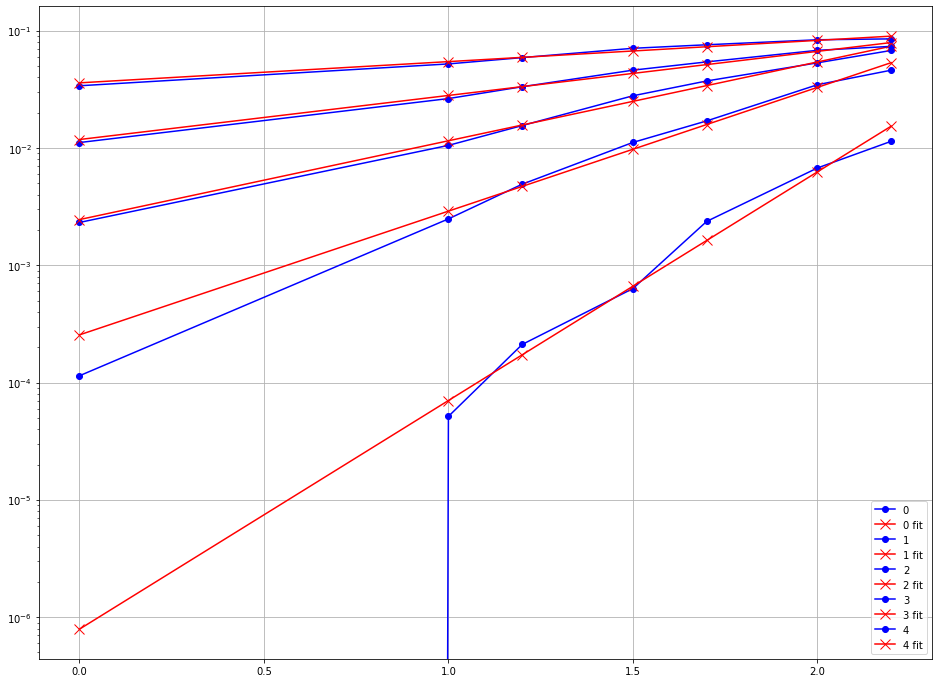

In [1533]:
i=4

plt.figure(figsize=(16,12))

for i in range(0,5,1):
    plt.plot(data[i][0], data[i][1], label=str(i), marker='o', color='blue')
    plt.plot(fit[i][0], fit[i][1], label=str(i)+' fit', marker='x', markersize=10, color='red')

plt.grid()
plt.legend()
plt.yscale('log')

In [1523]:
def get_indexes(box, extend_to_left=1, extend_to_right=5, length=30):
    min_ = min(box)
    xs = range(box[0] - min_, length + box[0] - min_)
    ys = range(box[1] - min_, length + box[1] - min_)
    zs = range(box[2] - min_, length + box[2] - min_)
    
    index_in_focus = xs.index(box[0])
    a, b = max(0, index_in_focus - extend_to_left), index_in_focus + extend_to_right
    return list(xs)[a:b + 1], list(ys)[a:b + 1], list(zs)[a:b + 1]

In [1524]:
get_indexes((3,3,3))

([2, 3, 4, 5, 6, 7, 8], [2, 3, 4, 5, 6, 7, 8], [2, 3, 4, 5, 6, 7, 8])

In [1525]:
def update_indexes(indexes):
    
    xs, ys, zs = indexes
    
    xs = [l for l in xs for i in range(2)]
    ys = [l for l in ys for i in range(2)]

    ys  = ys[1:]
    ys.append(ys[-1]+1)
    
    zs = [l for l in zs for i in range(2)]

    return xs,ys,zs
    
    

In [1526]:
update_indexes(get_indexes((3,3,3)))

([2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8],
 [2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9],
 [2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8])

In [1527]:
# fit.shape

predicted = [ fit[i][1][0] for i in range(fit.shape[0])]
predicted

[7.900784104411688e-07,
 0.00025485575200995996,
 0.002449575389150215,
 0.01179061691971357,
 0.03586175325830388,
 0.0780024215280481,
 0.12035296997590822,
 0.15110114055613305,
 0.16095437737933382,
 0.1542464828362999,
 0.1284349374965429,
 0.10618301459641719,
 0.07965163281484904,
 0.06343722220529133,
 0.10356729842557827]

In [2933]:
slurm_33142271 = np.array([333.871875 , 339.5640625, 341.5765625, 344.884375])

slurm_33142500 = np.array([250.28125  , 253.2328125, 254.9921875, 256.046875 , 257.9171875,])


slurm_33142735 = np.array([165.52851562, 170.13105469, 171.86757812, 172.87871094,
       173.25898437, 173.375])

slurm_33188800 = np.array([151.12636719, 154.63945313, 156.28681641, 157.26376953,
       157.72851563, 157.77578125])

slurm_33199837  = np.array([ 96.59267578,  99.23041992, 100.80888672, 101.8171875 ,
       102.38569336, 102.66967773, 102.72607422, 102.625     ,
       102.45283203, 102.16044922, 101.83193359, 101.47856445,
       101.09130859, 100.69208984, 100.94560547])


slurm_33279003 = np.array([46.240625  , 47.35390625, 48.20546875, 48.77539062, 49.12460937,
       49.66640625, 50.05273437, 50.30351562, 50.49453125, 50.41054687,
       50.60117187, 50.52773437, 50.36367187, 50.02851562, 49.47460937,
       49.08085937, 48.4078125 , 47.30273437, 46.49609375, 47.90585937])


slurm_33279003_probs = np.array([5.33719971e-57, 1.50444703e-59, 1.14988495e-59, 4.08542590e-60,
       3.44205707e-60, 6.13548907e-62, 2.29351949e-63, 1.84581286e-64,
       8.46307868e-65, 7.25931786e-66, 1.98936612e-66, 1.06401972e-66,
       1.68158139e-68, 1.46561428e-69, 5.57206334e-71, 5.39048013e-71,
       1.38868531e-73, 3.16610319e-74, 1.29692803e-75, 5.51774497e-65])

slurm_33278763_probs = np.array([1.34205749e-56, 7.93045065e-59, 4.34669199e-60, 1.27771078e-60,
       1.09533597e-60, 4.70339287e-61, 9.70023949e-64, 4.23173703e-64,
       6.32460564e-65, 6.86181468e-66, 2.45932064e-66, 3.14120483e-67,
       2.91952796e-68, 5.15616657e-69, 2.45116692e-70, 5.77695355e-71,
       1.34221639e-72, 8.74404564e-75, 1.46332774e-74, 8.43367032e-65])

slurm_33278763 = np.array([47.25930176, 48.15432281, 49.01715698, 49.67350922, 50.00596619,
       50.51254272, 50.87783966, 51.12817993, 51.32661591, 51.30704041,
       51.4684021 , 51.38023071, 51.18226013, 50.89546967, 50.34581146,
       49.88813171, 49.20606537, 48.24150085, 47.15184021, 48.80838623])

slurm_33282044 = np.array([61.653125, 61.73125 , 62.596875, 62.484375, 63.0125  , 63.30625 ,
       63.3875  , 63.565625, 64.128125, 64.096875, 64.2125  , 64.6125  ,
       64.525   , 64.696875, 64.8     , 65.115625, 64.9375  , 64.996875,
       65.315625, 65.071875, 65.103125, 65.328125, 65.028125, 64.903125,
       65.1125  , 64.7     , 64.65    , 64.625   , 64.196875, 63.93125 ,
       63.584375, 63.559375, 62.959375, 62.80625 , 62.240625, 61.5375  ,
       60.834375, 60.5375  , 59.78125 , 63.190625])

slurm_33290668 = np.array([344.11875, 345.275  , 354.29375, 360.29375, 361.0375 , 368.50625,
       371.06875, 374.4125 , 378.7625 , 379.88125, 383.40625, 387.2625 ,
       390.63125, 391.58125, 390.48125, 394.83125, 391.6375 , 396.5125 ,
       398.325  , 380.3    ])

slurm_33290690 = np.array([148.59375, 150.43125, 155.7    , 156.4    , 161.09375, 161.375  ,
       162.38125, 167.71875, 169.63125, 172.16875, 172.075  , 175.9    ,
       176.03125, 178.75625, 181.4875 , 184.49375, 186.7125 , 188.125  ,
       190.9125 , 164.     ])

slurm_33290690_probs = np.array([6.82147961e-58, 4.61829358e-58, 5.55069640e-60, 4.13930171e-60,
       6.93320966e-62, 8.01644164e-62, 4.43538989e-62, 2.74131882e-64,
       5.29196817e-65, 3.94768559e-66, 4.95112856e-66, 1.56235239e-67,
       7.84200507e-68, 3.46889614e-69, 1.28727281e-70, 4.37964639e-72,
       2.48395580e-73, 2.61189781e-74, 4.28236307e-76, 1.30625674e-63])

slurm_33292192 = np.array([  0. ,   0. , 111.6, 253. , 251.2, 252.9, 257.8, 258.1, 260.3,
       261.8, 262.5, 260.5, 266. , 267. , 267.5, 269.8, 269.5, 272. ,
       272.9, 258.5])


slurm_33296464 = np.array([1.000e-01, 1.960e+02, 2.059e+02, 2.094e+02, 2.110e+02, 2.156e+02,
       2.192e+02, 2.219e+02, 2.263e+02, 2.278e+02, 2.316e+02, 2.341e+02,
       2.365e+02, 2.383e+02, 2.399e+02, 2.419e+02, 2.428e+02, 2.430e+02,
       2.435e+02, 2.356e+02])

slurm_33296464_probs = np.array([4.40697479e-74, 3.40382683e-75, 2.31105623e-75, 7.80194045e-76,
       4.99684134e-76, 2.12815037e-77, 5.47595971e-79, 1.71817214e-79,
       7.00883900e-81, 1.01252725e-81, 7.34228535e-83, 7.71630571e-84,
       9.32139383e-85, 1.20110528e-85, 1.59027844e-86, 1.91354990e-87,
       3.34277953e-88, 4.08885080e-89, 8.73130312e-90, 2.90896537e-87])

slurm_33299079 = np.array([258.85  , 263.4   , 263.925 , 267.2375, 262.5   , 273.95  ,
       276.1375, 278.825 , 281.9125, 284.775 , 286.3375, 289.4875,
       291.5375, 293.275 , 295.175 , 296.075 , 296.75  , 297.3   ,
       298.0625, 286.4125])

slurm_33299966 = np.array([398.68125 , 400.4625  , 404.521875, 408.3     , 411.084375,
       414.2875  , 417.45    , 419.325   , 422.5125  , 425.459375,
       424.440625, 430.40625 , 432.71875 , 434.36875 , 435.928125,
       437.165625, 437.865625, 438.909375, 436.253125, 429.915625])

slurm_33302010 = np.array([250.4, 256.1, 260. , 264.4, 266.9, 270.4, 273.6, 275.9, 279. ,
       281.5, 284.1, 286.4, 288.7, 290.5, 291.6, 293.4, 292.4, 290. ,
         290. ,   290. ])

slurm_33307183 =  np.array([ 0.2,  4. , 16.7, 15.7, 18.8, 20.6, 25. , 26.5, 26.3, 27.5, 28.2,
       31.2, 32. , 33.7, 34.9, 36.1, 38.1, 39. , 39.9, 40.7, 42.1, 43.3,
       44.1, 45.2, 46.8, 47.1, 48.1, 48.7, 49.9, 49.9, 50.7, 51.4, 50.7,
       51.4, 51.3, 51.3, 45.2, 41.9,  0. ,  0. ])

slurm_33307194 = np.array([ 0. ,  0. ,  0. ,  0. ,  0.1,  9.6,  7.9,  9.9, 17. , 18.5, 20.2,
       19.3, 21.5, 23.9, 24.5, 24.7, 27. , 25.1, 29.4, 30.7, 32.3, 32.9,
       33.8, 35.2, 36.5, 37.3, 38.1, 38.5, 39.6, 40.1, 40.2, 41.1, 41. ,
       41.7, 43. , 41.8, 35.8, 38.5,  0. ,  0. ])

slurm_33307643 = np.array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , 13.4,  4. , 27.3, 29.4, 30.7,
       35.4, 36. , 38.6, 37.6, 38.6, 39.2, 41.8, 43.1, 44.4, 45.4, 46.2,
       47.3, 48.8, 50.1, 50. , 51.8, 52.3, 53. , 53.6, 54.4, 54.9, 54.7,
       55.6, 54.8, 54.6, 54.8, 51.5, 46.4,  0. ])

slurm_33308147 = np.array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , 28.5, 20.8, 35. ,
       35.8, 36.4, 40.2, 39. , 35.8, 39.9, 40.2, 42.6, 44.4, 45.4, 46.1,
       47.4, 48.9, 48.3, 50.9, 51.4, 52.6, 53.5, 54.2, 54.2, 55.6, 54.8,
       55.6, 55.7, 54.2, 54. , 56.9, 53.8,  0. ])


slurm_33308386 = np.array([  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   3.4,   0. ,
        70.3, 128.7, 118.4, 148.1, 141.4, 147.1, 144.7, 152.1, 149.3,
       151.7, 153. , 154.6, 155.8, 156.1, 157.7, 158.9, 159.7, 161.3,
       162.3, 162.4, 163.2, 163.4, 164.8, 164.8, 165.7, 166.2, 165. ,
       165.2, 165.6, 162.5, 160.6])

slurm_33308407 = np.array([215.83964844, 216.67382813, 217.8625    , 220.7140625 ,
       219.78417969, 220.134375  , 218.36308594, 220.85605469,
       221.06875   , 222.39609375, 223.41347656, 221.97558594,
       224.92851563, 225.32363281, 225.365625  , 226.96269531,
       226.54707031, 228.59492188, 229.44746094, 230.2015625 ,
       231.18886719, 231.65253906, 232.16757813, 232.89414063,
       233.72734375, 234.16699219, 234.65332031, 235.07382813,
       235.87910156, 235.97695313, 236.15957031, 236.70429688,
       236.39003906, 236.51816406, 236.33769531, 236.54179688,
       235.85605469, 235.58125   , 234.89335938, 234.30996094])


slurm_33308436 = np.array([214.32714844, 216.28076172, 216.90576172, 216.9703125 ,
       217.75068359, 218.10576172, 219.06572266, 220.20537109,
       221.18457031, 222.60205078, 222.23925781, 223.37519531,
       224.17324219, 224.83408203, 225.29619141, 226.43779297,
       227.81591797, 228.41269531, 229.34345703, 229.88583984,
       231.21875   , 231.55810547, 232.12734375, 232.82109375,
       233.56875   , 234.18193359, 234.753125  , 235.08554688,
       235.82333984, 235.91953125, 236.22363281, 236.37490234,
       236.4359375 , 236.54033203, 236.31962891, 236.46923828,
       235.95546875, 235.75576172, 234.88447266, 234.33144531])

slurm_33339953 = np.array([124.2, 127.6, 129.8, 130.3, 131.8, 133.3, 135. , 135.7, 137.1,
       137.3, 139.3, 138.7, 139.7, 139.6, 140. , 139.5, 137.7, 136.1,
         130. ,   130. ])

slurm_33340626 = np.array([157.34804687, 158.7078125 , 157.78867187, 160.22382812,
       162.62070312, 162.78320312, 163.67890625, 163.34726562,
       165.99023437, 167.43632812, 167.70742187, 169.32265625,
       170.16054687, 170.334375  , 171.490625  , 171.5671875 ,
       171.41601562, 171.58164062, 170.70273437, 170.64140625])

slurm_33340749 = np.array([186.91381836, 188.70302734, 189.75922852, 191.32998047,
       192.38754883, 192.17041016, 194.09643555, 195.32231445,
       196.80517578, 197.79619141, 198.64238281, 199.55473633,
       200.46953125, 200.96391602, 201.30966797, 201.10263672,
       201.00292969, 200.66987305, 198.0609375 , 200.44111328])

slurm_33343788 = np.array([168.375   , 168.528125, 170.35625 , 172.4875  , 173.296875,
       175.053125, 175.084375, 176.953125, 176.715625, 178.046875,
       179.909375, 179.93125 , 181.225   , 181.646875, 182.26875 ,
       181.846875, 181.678125, 180.990625, 180.778125, 177.153125])


slurm_33350852 = np.array([124.225  , 121.8    , 128.6    , 127.09375, 128.00625, 129.95625,
       130.89375, 127.8375 , 131.85625, 133.575  , 135.6    , 137.7    ,
       138.31875, 136.79375, 135.93125, 138.41875, 137.64375, 138.46875,
       135.85625, 134.3125 ])

slurm_33350852_probs = np.array([6.26517873e-80, 4.97022982e-79, 1.96855534e-81, 1.27538005e-80,
       6.13984277e-81, 2.71993629e-81, 1.92421125e-81, 7.80749700e-80,
       1.73815247e-81, 4.60389074e-82, 1.14525772e-82, 1.55140334e-83,
       1.61228874e-83, 6.26910784e-83, 1.60407720e-82, 7.11974445e-84,
       7.68850935e-84, 1.68853496e-84, 3.40331408e-84, 1.86209556e-84])

slurm_33350852_probs1 = np.array([140.94960937, 143.2484375 , 144.30976562, 147.16289062,
       148.44492187, 150.00429687, 150.60351562, 147.77773437,
       151.7671875 , 153.553125  , 155.64882812, 157.62265625,
       158.18632812, 156.6796875 , 155.90390625, 158.35390625,
       157.74023437, 158.42460937, 156.12421875, 154.6265625 ])

slurm_33354088 = np.array([174.6, 180.7, 181.5, 183.7, 185.4, 185.4, 186.5, 188.4, 189.4,
       189.3, 190.2, 190.3, 191.9, 191.3, 191.8, 191.5, 190.7, 187.5,
         0. , 136.4])

slurm_33354299_probs = np.array([4.38098017e-81, 1.85984884e-82, 1.14189657e-82, 6.68417988e-83,
       5.46669108e-83, 3.14762921e-83, 1.41011501e-83, 7.41735802e-84,
       6.46472159e-84, 4.06118915e-84, 2.49576904e-84, 4.81718287e-84,
       7.41387013e-85, 8.43348388e-85, 5.49991086e-85, 9.00509147e-85,
       1.66066977e-85, 2.80738102e-85, 9.47858027e-86, 1.18308271e-85,
       4.50158032e-86, 3.48099151e-86, 2.20220259e-86, 1.54110864e-86,
       1.49293161e-86, 7.39277434e-87, 5.65405100e-87, 3.73748492e-87,
       3.58403942e-87, 3.32702214e-87, 2.00438468e-87, 1.35986530e-87,
       1.03738029e-87, 6.96105726e-88, 5.60034999e-88, 4.87206981e-88,
       1.25522400e-88, 7.37790309e-88, 1.34638476e-88, 0.00000000e+00])

slurm_33380243_probs1 = np.array([4.104795666484343e-83, 1.5634735139987311e-83, 1.0417637049884003e-85, 2.699614879733108e-85, 5.852209622314399e-85, 2.0165994805761e-85, 1.1497463575884659e-85, 1.490500987888611e-85, 6.1105164200129465e-86, 4.138696890083376e-86, 2.2703217628262244e-86, 3.0417774625604063e-86, 2.009302694782216e-86, 1.5828566372897462e-86, 1.288083960683451e-86, 1.1313903983059638e-86, 1.5180242548027261e-86, 1.4051003979156352e-86, 2.766506304315439e-86, 1.6866695740468392e-85])
slurm_33380243_probs2 = np.array([2.064152790451643e-83, 3.114740413763642e-85, 4.6190436383718166e-85, 3.580791615346687e-85, 8.831461789807318e-85, 2.7983599837413225e-85, 1.621370872399488e-85, 1.1413049346669005e-85, 6.234405555030227e-86, 4.192806332518337e-86, 2.732599373165045e-86, 2.639148442896748e-86, 1.923308121978731e-86, 1.3844766000456689e-86, 1.426827147187211e-86, 1.242392131019083e-86, 1.3587985287471927e-86, 1.4554924098982073e-86, 2.116775140593315e-86, 1.6866695740468392e-85])
slurm_33380243_probs3 = np.array([2.9446479851208304e-83, 3.114740413763642e-85, 3.718698641739853e-85, 6.862180471767859e-85, 4.520014473127367e-85, 2.8215797577719e-85, 2.0656998383106393e-85, 9.724382425695798e-86, 6.562416520922902e-86, 4.162473103762293e-86, 2.8382490015345926e-86, 2.4467624463033694e-86, 1.9156653706644824e-86, 1.4221767595149073e-86, 1.3549870663751591e-86, 1.1870842300461136e-86, 1.2886698319828872e-86, 1.4674714051378186e-86, 2.116775140593315e-86, 1.0022422366843364e-86])
slurm_33380243_probs4 = np.array([1.6387058087756278e-83, 3.114740413763642e-85, 1.0045355351884824e-84, 8.802173901525403e-85, 6.042437647497049e-85, 3.4485066234663426e-85, 2.0290429790433025e-85, 9.839850491739112e-86, 6.305772900495553e-86, 3.891143096554741e-86, 3.119301550552304e-86, 2.375947332507238e-86, 1.8474090154400774e-86, 1.3992102569549498e-86, 1.3497372715377882e-86, 1.1795867272907075e-86, 1.2380215790485643e-86, 1.503821350903413e-86, 2.6500229159007322e-86, 9.4261566396075e-87])
slurm_33380243_probs5 = np.array([2.5198636471969423e-83, 3.3596824934256484e-85, 1.5698334475259313e-84, 1.2538261922955624e-84, 8.746228857323656e-85, 2.6586204410512135e-85, 1.597992479926316e-85, 8.957693233613096e-86, 6.604203229005111e-86, 4.1552788620746545e-86, 3.0044612498850016e-86, 2.3754215161131904e-86, 1.7694898359853207e-86, 1.4347286855142031e-86, 1.3348699579481127e-86, 1.2188133418656804e-86, 1.2065603147024182e-86, 1.5837763096737244e-86, 2.0872383708925864e-86, 1.919595286064751e-86])
slurm_33380243_probs6 = np.array([2.3821551287512267e-83, 5.685886620862432e-85, 1.6057917434431124e-84, 9.22961963572498e-85, 8.601024713376848e-85, 2.8188517464597776e-85, 1.7628084016025122e-85, 9.216968302712344e-86, 6.386393046712401e-86, 4.135218862887651e-86, 2.9689612616427622e-86, 2.3965461128614504e-86, 1.713031840072094e-86, 1.4032787743742734e-86, 1.2815034508372685e-86, 1.2452454339453511e-86, 1.2158856694935371e-86, 1.5433180309536878e-86, 2.0198939361314944e-86, 1.5428577881660737e-86])
slurm_33380243_probs7 = np.array([1.3419489174803523e-83, 3.443699164928573e-84, 2.189907768468561e-84, 9.22961963572498e-85, 8.103847042815563e-85, 2.8076116492606715e-85, 1.6206649710689535e-85, 9.430169428973595e-86, 6.149150226179591e-86, 4.311615580727209e-86, 2.9176601524510177e-86, 2.3965461128614504e-86, 1.6714286149764054e-86, 1.427722417074278e-86, 1.2671388983090382e-86, 1.259642528082055e-86, 1.2407726965161767e-86, 1.5986281506353356e-86, 1.7717356186390124e-86, 1.1477566623136238e-86])

slurm_33380243_probs8 = np.array([9.227996954621598e-84, 3.2580613480710742e-84, 2.2215214855011758e-84, 1.1055221618675646e-84, 6.584616274944205e-85, 3.092028532120961e-85, 1.8164396131561192e-85, 9.598075008701394e-86, 6.1934526340572474e-86, 4.499522714739007e-86, 2.8959546772998795e-86, 2.358273834925802e-86, 1.743906211653778e-86, 1.4741227429219262e-86, 1.281420567532515e-86, 1.245893605526683e-86, 1.2882492487975533e-86, 1.5025413843311844e-86, 1.8793941878784088e-86, 1.643647904039706e-86])

slurm_33380243_probs9 = np.array([6.807021173497844e-84, 3.3466429955120022e-84, 3.0984324050612428e-84, 1.1652776059741125e-84, 5.946386900056252e-85, 3.064190156073103e-85, 1.7364733894946104e-85, 9.732141900923432e-86, 6.534333977256603e-86, 4.500334167479551e-86, 2.9163365293480108e-86, 2.3931222538759335e-86, 1.741832957452597e-86, 1.455476621386228e-86, 1.2759299237864819e-86, 1.2538004207118439e-86, 1.2803361206783554e-86, 1.510310008841017e-86, 1.9393780185084473e-86, 1.856566225462919e-86])
slurm_33380243_probs10 = np.array([6.643640663623877e-84, 3.1694797006301462e-84, 1.754772865681994e-84, 9.870819582356618e-85, 5.574493103002475e-85, 3.189448360727097e-85, 1.739202834706522e-85, 1.032877796417635e-85, 6.442612822177984e-86, 4.559263410557576e-86, 3.0493745855723377e-86, 2.2709694527568392e-86, 1.7290405686227184e-86, 1.4523945881952579e-86, 1.2853389467300606e-86, 1.2414260129755556e-86, 1.2723310124952976e-86, 1.4832655092553812e-86, 1.856078518067525e-86, 2.0626063796995077e-86])

slurm_33380243 = np.array([104.20808868, 104.21841278, 104.78487244, 105.59158478,
       105.9172699 , 106.62969666, 106.97493439, 107.72806854,
       107.99958496, 108.40431824, 109.12960358, 109.18672485,
       109.72710876, 109.53312836, 109.69442291, 109.04811401,
       108.47199402, 107.71802063, 106.04818115, 104.09792938])



#lengths of list_probs are: [595, 626, 1352, 4111, 6495, 17715, 25780, 62423, 81124, 118047, 203101, 212624, 265471, 249800, 265905, 194822, 124965, 61864, 7693, 665]
slurm_33447433_probs1 = np.array([4.432017522892292e-84, 3.7585339879007365e-84, 2.439401760512558e-85, 2.8008522381909984e-85, 1.1750655176267467e-85, 1.0984258815504612e-85, 5.81427426408221e-86, 2.77821154756386e-86, 1.782651023547533e-86, 1.454013752188979e-86, 8.560230799383618e-87, 4.943193852022496e-87, 4.167284957955252e-87, 2.636767114742794e-87, 2.043952225898528e-87, 1.7124773507749473e-87, 1.6402263757466682e-87, 1.5727402190174498e-87, 4.080829281696021e-87, 7.301083450370871e-87])

slurm_33447433_probs2 = np.array([4.4702031481267475e-84, 1.2445255850035844e-84, 6.281750888912748e-85, 3.6083995931327036e-85, 1.644972532990682e-85, 9.353065413208354e-86, 5.837386186726046e-86, 2.906770952942524e-86, 1.7956855628373046e-86, 1.3760554111053964e-86, 7.938385186460182e-87, 5.489573290225236e-87, 3.882792747157891e-87, 2.7075139715984017e-87, 2.044848296561771e-87, 1.8212427738259166e-87, 1.6273269071351415e-87, 1.289948549360673e-87, 1.9315253403626326e-87, 1.3887683485742423e-86])
slurm_33447433_probs3 = np.array([4.344265058741948e-84, 1.1364909461420112e-84, 5.786228935869221e-85, 3.3291646310715134e-85, 1.8339095819434442e-85, 1.002419133890659e-85, 5.48845816715312e-86, 2.9720818601407203e-86, 1.8268001213896258e-86, 1.3365621904361221e-86, 7.9582212310855755e-87, 5.4054108787285275e-87, 3.6651307581837923e-87, 2.6511369949080384e-87, 2.0619202025982043e-87, 1.7543371169250556e-87, 1.6213268652649652e-87, 1.3776183578890746e-87, 2.13331179413079e-87, 5.829909611580263e-87])
slurm_33447433_probs4 = np.array([3.7597367969853424e-84, 1.142704169064495e-84, 6.641077967970436e-85, 3.409437851967061e-85, 1.6943258590454807e-85, 9.713817236416961e-86, 5.368367065626444e-86, 3.0499129840785104e-86, 1.792579735402842e-86, 1.274223982602387e-86, 7.805312202525201e-87, 5.219121448880284e-87, 3.601232756687327e-87, 2.6996017305684084e-87, 2.057741706635628e-87, 1.7166959224060778e-87, 1.5313142210391788e-87, 1.4211824924347603e-87, 1.4310416471227308e-87, 4.358735772789654e-87])

slurm_33447433_probs5 = np.array([3.979786767833244e-84, 1.1311812592396737e-84, 5.984494875801656e-85, 3.308905170749778e-85, 1.6686395152986776e-85, 9.434979113678213e-86, 5.56315023216348e-86, 3.139610380474464e-86, 1.8124028803558758e-86, 1.2519288047354561e-86, 7.753302973760856e-87, 5.0588825078096e-87, 3.6539561128261996e-87, 2.6947840273701734e-87, 2.1458681284044392e-87, 1.7044266589123357e-87, 1.5523473340080153e-87, 1.4465863900164661e-87, 1.2820556077947882e-87, 1.5846681980701673e-87])


slurm_33448137_probs1 = np.array([3.562903306459815e-85, 1.4546100764690875e-84, 4.5934292501127514e-85, 9.868499271009239e-85, 3.294555745882412e-85, 2.4672019410917653e-85, 6.786380293150335e-86, 4.209813694753405e-86, 3.6892821101735214e-86, 2.4289328971354847e-86, 1.4444862183171712e-86, 1.2642146471562675e-86, 7.971498019561483e-87, 6.073418471535764e-87, 5.214701209182309e-87, 3.878765416534164e-87, 4.2155130055323965e-87, 4.56987705531538e-87, 3.0188710307036354e-87, 1.0345403851057391e-86])
slurm_33448137_probs2 = np.array([3.7920955140711244e-84, 4.374735148956209e-85, 7.106586208948149e-85, 4.5355577952254145e-85, 3.9530133121063255e-85, 1.912293674662124e-85, 1.0009102470633128e-85, 3.9300593216250496e-86, 3.2967263302954216e-86, 2.220751560479205e-86, 1.4626273824303507e-86, 1.1408558837795559e-86, 8.389350709121853e-87, 6.205795435037732e-87, 4.8919437778776265e-87, 4.5503185574030696e-87, 4.2513548104950145e-87, 4.256595715379331e-87, 4.239595919116306e-87, 1.0345403851057391e-86])
slurm_33448137_probs3 = np.array([3.4212258469059345e-84, 1.5933704465215733e-84, 6.77274398501818e-85, 4.0990930235777825e-85, 3.4599531356086057e-85, 1.708549670926351e-85, 9.493982734433892e-86, 4.7339616823078115e-86, 3.417466998546737e-86, 2.319355222690897e-86, 1.5860822659031781e-86, 1.0924625937553984e-86, 8.056706561786448e-87, 6.342052432878409e-87, 5.028853967289106e-87, 4.687058286610104e-87, 4.362740317692913e-87, 4.647236703669737e-87, 6.063800984550504e-87, 1.061505277828567e-86])
slurm_33448137_probs4 = np.array([5.559273392916196e-84, 1.831531977290131e-84, 6.439262793600929e-85, 4.41879466446384e-85, 2.6109008844038836e-85, 1.6033701709850312e-85, 1.0276142983295132e-85, 4.851756899206752e-86, 3.688918851760578e-86, 2.3081712264384488e-86, 1.602038799542263e-86, 1.0921651328355462e-86, 8.000935349168458e-87, 6.242920509317256e-87, 5.298942247702317e-87, 4.620502255103343e-87, 4.210383676346413e-87, 4.635053324702475e-87, 6.063800984550504e-87, 8.064100381930371e-87])
slurm_33448137_probs5 = np.array([4.315422426495646e-84, 1.5933704465215733e-84, 9.5246980142554e-85, 5.432485893775046e-85, 2.5083827650078164e-85, 1.70427421428736e-85, 1.0339841360804047e-85, 5.228897491979072e-86, 3.457158405658998e-86, 2.3309119943639387e-86, 1.6206508144769243e-86, 1.097897413355707e-86, 8.000860839362012e-87, 6.344498128194918e-87, 5.458345542859196e-87, 4.581302828210902e-87, 4.239268407952298e-87, 4.740143152786862e-87, 7.001038801199819e-87, 8.064100381930371e-87])
slurm_33448137_probs6 = np.array([6.434653831732432e-84, 2.4474602787315874e-84, 7.543824176151158e-85, 4.4282936029595427e-85, 2.037178467166327e-85, 1.8421155756774853e-85, 8.96561798422416e-86, 5.559689936380491e-86, 3.55512429413159e-86, 2.2903254966661086e-86, 1.5616484746838521e-86, 1.0919363765273821e-86, 7.925287627542722e-87, 6.324521260132041e-87, 5.490456068953409e-87, 4.615100582421163e-87, 4.429527465758265e-87, 4.851760254123532e-87, 6.540182193030157e-87, 8.064100381930371e-87])
slurm_33448137_probs7 = np.array([6.927006599743274e-84, 2.069693508058689e-84, 8.230419450636756e-85, 4.5948572725884486e-85, 2.623865274203198e-85, 1.6997605279240348e-85, 9.367950271111698e-86, 5.638149269044734e-86, 3.362521569232949e-86, 2.2301001480967736e-86, 1.523729788002715e-86, 1.0690008635898511e-86, 7.906374016721365e-87, 6.226177298186743e-87, 5.53333532568643e-87, 4.711130666482494e-87, 4.455769730318791e-87, 5.029063724737178e-87, 5.686169455712738e-87, 6.697005501925453e-87])
slurm_33448137_probs8 = np.array([5.949490350458622e-84, 1.6718805621783777e-84, 8.748137242858961e-85, 4.790582423648019e-85, 2.8471865853036524e-85, 1.6167691827396672e-85, 9.360031959850126e-86, 5.450266054244263e-86, 3.328477674903626e-86, 2.2643212564528694e-86, 1.5266715284303508e-86, 1.0828697809933045e-86, 7.9577794966917e-87, 6.206046420314115e-87, 5.209649329226789e-87, 4.747230655271724e-87, 4.435734460174351e-87, 4.94077964007189e-87, 5.118709422083904e-87, 6.172841073605559e-87])


slurm_33451126_probs2 = np.array([1.4530741450723883e-83, 4.67035675854169e-84, 8.07990107807853e-84, 3.004597713071862e-84, 9.810774297559773e-85, 6.855308068129553e-85, 3.674018978105736e-85, 2.214253396567019e-85, 1.3953152334179575e-85, 9.594514962839758e-86, 6.28768126557724e-86, 4.532233143754381e-86, 3.718178080142931e-86, 3.0919681291965664e-86, 2.964519666698211e-86, 3.1076818341990978e-86, 3.53791738809941e-86, 4.3882614213308726e-86, 6.266246985210948e-86, 8.217613451810461e-86])

slurm_33447433 = np.array([363.38125 , 362.675   , 363.534375, 364.234375, 364.434375,
       365.171875, 365.378125, 365.98125 , 366.159375, 366.3875  ,
       366.871875, 366.76875 , 367.      , 366.5375  , 366.3875  ,
       365.590625, 364.53125 , 363.56875 , 361.09375 , 349.3875  ])


791.3816809785611
0.2368984591637147


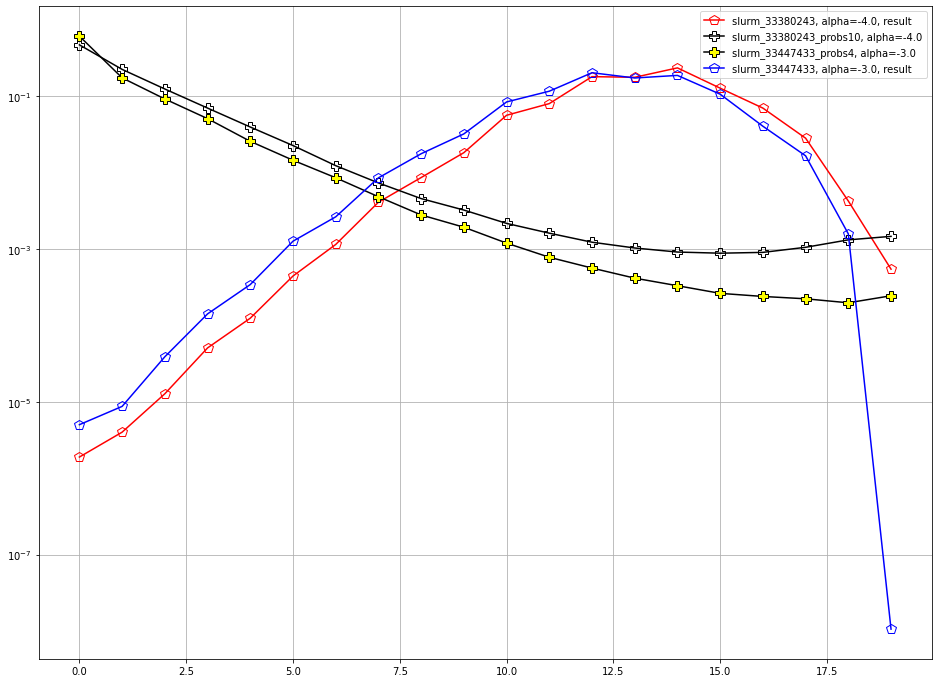

In [3419]:




plt.figure(figsize=(16,12))
# plt.plot(make_p_urw(slurm_31929424), label='slurm_31929424', marker='8', markersize=12, markerfacecolor='none')
# plt.plot(make_p_urw(slurm_32859950), label='slurm_32859950', marker='.', markersize=12, markerfacecolor='none')


# plt.plot(make_p(slurm_32745775), label='slurm_32745775', marker='x', markersize=10, markerfacecolor='red')
# plt.plot(make_p(slurm_32774267), label='slurm_32774267', marker='x', markersize=10, markerfacecolor='blue')
# plt.plot(make_p(slurm_32774416), label='2.0', marker='x', markersize=10, markerfacecolor='blue')
# plt.plot(make_p(slurm_32808357), label='2.5', marker='x', markersize=10, markerfacecolor='blue')
# plt.plot(make_p(slurm_32808849), label='1.0', marker='d', markersize=10, markerfacecolor='yellow')

# plt.plot(make_p(slurm_32854969), label='3.0', marker='x', markersize=10, markerfacecolor='blue')

# plt.plot(make_p_urw(predicted),  label='predicted', marker='o', markersize=8, markerfacecolor='blue')
# plt.plot(predicted,  label='predicted', marker='o', markersize=8, markerfacecolor='blue')

# plt.plot(make_p(slurm_33049242), label='slurm_33049242', marker='x', markersize=10, markerfacecolor='blue')

# plt.plot(make_p(slurm_33142271), label='slurm_33142271', marker='o', markersize=10, markerfacecolor='blue')
# plt.plot(make_p(slurm_33142500), label='slurm_33142500', marker='o', markersize=10, markerfacecolor='blue')
# plt.plot(make_p(slurm_33142735), label='slurm_33142735', marker='o', markersize=10, markerfacecolor='red')

# plt.plot(make_p(slurm_33188800), label='slurm_33188800', marker='o', markersize=10, markerfacecolor='yellow')
# plt.plot(make_p(slurm_33199837),  label='slurm_33199837', marker='o', markersize=8, markerfacecolor='red')

#============
# plt.plot(make_p(slurm_33279003),  label='slurm_33279003', marker='o', markersize=8, markerfacecolor='red')
# plt.plot(slurm_33279003_probs,  label='slurm_33279003_probs', marker='o', markersize=8, markerfacecolor='red')
# plt.plot(slurm_33278763_probs,  label='slurm_33278763_probs', marker='X', markersize=12, markerfacecolor='red')

# plt.plot(make_p(slurm_33278763),  label='slurm_33278763', marker='X', markersize=10, markerfacecolor='red')
# plt.plot(make_p(slurm_33282044),  label='slurm_33282044', marker='X', markersize=10, markerfacecolor='red')

# plt.plot(make_p(slurm_33290668),  label='slurm_33290668', marker='X', markersize=10, markerfacecolor='red')

# plt.plot(make_p(slurm_33290690),  label='slurm_33290690', marker='o', markersize=8, markerfacecolor='red')
# plt.plot(make_p(slurm_33292192),  label='slurm_33292192', marker='D', markersize=8, markerfacecolor='black')
# plt.plot(slurm_33290690_probs,  label='slurm_33290690_probs', marker='D', markersize=8, markerfacecolor='black')

# plt.plot(slurm_33296464_probs,  label='slurm_33296464_probs', marker='D', markersize=8, markerfacecolor='black')

# plt.plot(make_p(slurm_33296464),  label='slurm_33296464', marker='D', markersize=8, markerfacecolor='black')
# plt.plot(make_p(slurm_33299079),  label='slurm_33299079', marker='D', markersize=8, markerfacecolor='black')
# slurm_33299966
# plt.plot(make_p(slurm_33299966),  label='slurm_33299966', marker='d', markersize=8, markerfacecolor='black')

# plt.plot(make_p(slurm_33302010),  label='slurm_33302010', marker='o', markersize=8, markerfacecolor='black')


# plt.plot(make_p(slurm_33307183),  label='slurm_33307183', marker='o', markersize=8, markerfacecolor='black')

# plt.plot(make_p(slurm_33307194),  label='slurm_33307194, alpha=-0.5', marker='X', markersize=8, markerfacecolor='black')

# plt.plot(make_p(slurm_33307643),  label='slurm_33307643, alpha=-1', marker='D', markersize=8, markerfacecolor='green')

# plt.plot(make_p(slurm_33308147),  label='slurm_33308147, alpha=-1.5', marker='p', markersize=10, markerfacecolor='None')


# plt.plot(make_p(slurm_33308386),  label='slurm_33308386, alpha=-2.0', marker='d', markersize=10, markerfacecolor='None')

# plt.plot(make_p(slurm_33308407),  label='slurm_33308407, alpha=-2.0', color='black', marker='o', markersize=10, markerfacecolor='None')

# plt.plot(make_p(slurm_33308436),  label='slurm_33308436, alpha=-2.0', color='red', marker='o', markersize=10, markerfacecolor='None')


# plt.plot(make_p(slurm_33339953),  label='slurm_33339953, alpha=-2.0', color='black', marker='o', markersize=10, markerfacecolor='None')

# plt.plot(make_p(slurm_33340626),  label='slurm_33340626, alpha=-4.0', color='red', marker='o', markersize=10, markerfacecolor='None')

# plt.plot(make_p(slurm_33340749),  label='slurm_33340749, alpha=-2.0', color='black', marker='o', markersize=10, markerfacecolor='None')
# plt.plot(make_p(slurm_33343788),  label='slurm_33343788, alpha=-3.0', color='blue', marker='p', markersize=10, markerfacecolor='None')

# plt.plot(make_p(slurm_33350852),  label='slurm_33350852, alpha=-4.0', color='red', marker='p', markersize=10, markerfacecolor='None')

# plt.plot(slurm_33350852_probs,  label='slurm_33350852_probs, alpha=-4.0', color='red', marker='p', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33350852_probs1,  label='slurm_33350852_probs1, alpha=-4.0', color='red', marker='1', markersize=10, markerfacecolor='None')

# plt.plot(make_p(slurm_33354088),  label='slurm_33354088, alpha=-2.0', color='red', marker='p', markersize=10, markerfacecolor='None')

t = slurm_33380243_probs10/np.sum(slurm_33380243_probs10)
t = make_p(slurm_33380243)/t
print(np.sum(t))
t = t/np.sum(t)
print(np.max(t))

plt.plot(t,  label='slurm_33380243, alpha=-4.0, result', color='red', marker='p', markersize=10, markerfacecolor='None')
# plt.plot(make_p(slurm_33380243),  label='slurm_33380243, alpha=-4.0', color='red', marker='.', markersize=10, markerfacecolor='None')

# plt.plot(slurm_33380243_probs1,  label='slurm_33380243_probs1, alpha=-4.0', color='red', marker='p', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33380243_probs2,  label='slurm_33380243_probs2, alpha=-4.0', color='blue', marker='.', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33380243_probs3,  label='slurm_33380243_probs3, alpha=-4.0', color='black', marker='P', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33380243_probs4,  label='slurm_33380243_probs4, alpha=-4.0', color='blue', marker='P', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33380243_probs5,  label='slurm_33380243_probs5, alpha=-4.0', color='blue', marker='P', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33380243_probs6,  label='slurm_33380243_probs6, alpha=-4.0', color='blue', marker='P', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33380243_probs7,  label='slurm_33380243_probs7, alpha=-4.0', color='blue', marker='P', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33380243_probs8,  label='slurm_33380243_probs8, alpha=-4.0', color='blue', marker='P', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33380243_probs9,  label='slurm_33380243_probs9, alpha=-4.0', color='blue', marker='P', markersize=10, markerfacecolor='None')

plt.plot(slurm_33380243_probs10/np.sum(slurm_33380243_probs10),  label='slurm_33380243_probs10, alpha=-4.0', color='black', marker='P', markersize=10, markerfacecolor='None')
plt.plot(slurm_33447433_probs5/np.sum(slurm_33447433_probs5),  label='slurm_33447433_probs4, alpha=-3.0', color='black', marker='P', markersize=10, markerfacecolor='yellow')
# plt.plot(slurm_33448137_probs8/np.sum(slurm_33448137_probs8),  label='slurm_33448137_probs7, alpha=-3.5', color='black', marker='P', markersize=10, markerfacecolor='blue')
# plt.plot(slurm_33451126_probs2/np.sum(slurm_33451126_probs2),  label='slurm_33451126_probs2, alpha=-4.5', color='black', marker='P', markersize=10, markerfacecolor='green')


# plt.plot(make_p(slurm_33447433),  label='slurm_33447433, alpha=-3.0', color='blue', marker='.', markersize=10, markerfacecolor='None')



t2 = slurm_33447433_probs5/np.sum(slurm_33447433_probs5)
t2 = np.exp(slurm_33447433 - np.min(slurm_33447433))/t2
t2 = t2/np.sum(t2)
plt.plot(t2,  label='slurm_33447433, alpha=-3.0, result', color='blue', marker='p', markersize=10, markerfacecolor='None')


plt.legend()
plt.yscale('log')
plt.grid()

In [3190]:
slurm_33451296_probs_1 = np.array([1.7888255621614483e-84, 5.186536121790107e-85, 5.319296949124367e-85, 3.219852462609122e-85, 1.866972490747885e-85, 1.434762196884956e-85, 8.941766263878359e-86, 6.523258600869058e-86, 5.336263739557751e-86, 4.263591261792503e-86, 3.7871055284702674e-86, 3.1895909075069347e-86, 3.0034738860466956e-86, 3.3069453267233625e-86, 3.255353607371766e-86, 3.5595546130245466e-86, 4.3518521803373295e-86, 4.6614375169686e-86, 5.6711168092527774e-86, 3.7592595787887707e-85])
slurm_33451296_probs_2 = np.array([1.5380771899306036e-84, 4.153674396016629e-85, 3.995147328909448e-85, 3.219852462609122e-85, 1.9332843294758076e-85, 1.3211344914916123e-85, 9.405815192238852e-86, 6.688084558797743e-86, 5.388101924945606e-86, 4.251101520573369e-86, 3.759353225570621e-86, 3.238332058920318e-86, 3.008904647177902e-86, 3.218426089157686e-86, 3.1409683553040468e-86, 3.582233378568817e-86, 4.514323403080038e-86, 4.685958116736302e-86, 5.671190910607413e-86, 3.5378252060976015e-85])

slurm_33451296_1 = np.array([76.57578125, 76.925     , 77.42734375, 77.63359375, 78.27421875,
       78.78046875, 78.72265625, 79.46171875, 79.77890625, 80.125     ,
       80.01640625, 80.56640625, 80.66328125, 80.23515625, 80.43046875,
       80.01015625, 79.33046875, 78.15      , 77.353125  , 74.3359375 ])

slurm_33451296_2 = np.array([78.44335937, 78.74921875, 79.33867187, 79.346875  , 80.18554687,
       80.60234375, 80.65859375, 81.28632812, 81.6796875 , 82.00546875,
       81.86601562, 82.43320312, 82.50195312, 82.07929687, 82.28828125,
       81.87070312, 81.18671875, 80.0015625 , 79.3234375 , 76.59375   ])


t1 = slurm_33451296_probs_1/np.sum(slurm_33451296_probs_1)
t1 = make_p(slurm_33451296_2)/t1
t1 = t1/np.sum(t1)

t2 = slurm_33451296_probs_2/np.sum(slurm_33451296_probs_2)
t2 = make_p(slurm_33451296_2)/t2
t2 = t2/np.sum(t2)


slurm_33455127 = np.array([38.39797211, 37.60383911, 37.95222168, 38.7359314 , 38.70856171,
       39.40770264, 39.31004944, 39.85201263, 39.67128296, 39.89509125,
       40.38508911, 40.26463013, 40.68097229, 40.50779114, 40.92591858,
       40.69906921, 41.12190094, 40.86644592, 40.94497681, 41.33482971,
       41.06187897, 41.47929535, 41.13819733, 41.54080811, 41.15944519,
       41.51790466, 41.14786224, 41.08395233, 41.41858673, 40.97611542,
       41.21893005, 40.76921844, 40.97337952, 40.54164124, 40.39765778,
       40.52098083, 39.98718414, 40.02889709, 39.38068848, 39.86124268])

slurm_33455127_probs = np.array([2.206094667337053e-71, 2.0560242290314354e-72, 7.779214662998207e-73, 2.310437238170729e-73, 8.570088834621551e-74, 2.260249857668836e-74, 7.613338545723913e-75, 2.3990943194892545e-75, 8.461032421683336e-76, 3.4249591657223756e-76, 1.113749703954085e-76, 3.789453786023524e-77, 1.358159262512335e-77, 4.682668708575699e-78, 1.6342805321445918e-78, 6.008114328621723e-79, 2.1401274439071674e-79, 8.025674620304532e-80, 3.430344845881875e-80, 1.2390443719452394e-80, 4.834606581083073e-81, 1.767961950887274e-81, 6.578050845961212e-82, 2.521301032788632e-82, 9.481623418132055e-83, 3.65164001358156e-83, 1.3730206616088147e-83, 6.546842619348519e-84, 2.5186281201558053e-84, 9.706836232706752e-85, 3.660746251919549e-85, 1.4146980015246458e-85, 5.564338335623602e-86, 2.1034078205449555e-86, 9.93089254416761e-87, 3.664948562316055e-87, 1.3857797350492302e-87, 5.589150226124235e-88, 2.0874991165662878e-88, 2.7942581901154398e-89]
                               )
t3 = slurm_33455127_probs/np.sum(slurm_33455127_probs)
t3 = make_p(slurm_33455127)/t3
t3 = t3/np.sum(t3)


slurm_33470953 = np.array([91.25 , 90.325, 90.325, 91.575, 91.275, 91.875, 92.275, 92.425,
       93.25 , 93.525, 93.225, 94.15 , 93.875, 94.25 , 94.225, 94.3  ,
       94.45 , 94.075, 94.8  , 94.8  , 94.275, 94.925, 94.5  , 95.175,
       94.825, 94.6  , 94.975, 94.65 , 94.825, 94.8  , 94.225, 94.575,
       94.1  , 94.375, 94.025, 93.575, 93.85 , 93.4  , 93.425, 93.325,
       93.   , 92.95 , 93.15 , 93.625, 94.125, 94.1  , 94.75 , 95.225,
       95.075, 95.8  , 95.5  , 96.1  , 96.25 , 95.7  , 95.875, 94.975,
       94.6  , 93.825, 92.7  , 90.85 ])
slurm_33470953_probs = np.array([2.0945941018339575e-65, 5.558339074886e-65, 1.168986886295111e-66, 1.4866335595981078e-66, 1.6234211530873595e-67, 1.6532335789178262e-68, 1.5773791936910787e-68, 1.8465625337011837e-69, 4.227440623157431e-70, 5.922088685282553e-71, 1.8575296682233435e-71, 5.819867186575707e-72, 1.568873012175353e-72, 4.1119249822932746e-73, 9.10893907260771e-74, 3.0174147113573593e-74, 8.104133387213637e-75, 2.4990646808066657e-75, 8.062561080716252e-76, 1.9958306175130538e-76, 5.3671356483757865e-77, 1.874969781949164e-77, 5.320904102573112e-78, 1.8554750122602852e-78, 4.815758302987493e-79, 1.7465715116041192e-79, 4.7209334781599784e-80, 1.6919511186311894e-80, 6.071055511322623e-81, 1.5483212272251846e-81, 4.601136173821155e-82, 1.4076637510392017e-82, 6.957738694210927e-83, 2.0731865734932042e-83, 4.78647432886746e-84, 1.6789855370463502e-84, 5.233020069453024e-85, 1.60928464530198e-85, 5.332470703915478e-86, 1.729518792334423e-86, 6.32333087687089e-87, 5.406394497808115e-87, 1.35732409743697e-86, 9.078777063811077e-86, 1.3525925165889016e-85, 9.390188396519863e-86, 8.36859098938862e-86, 6.43000527641166e-86, 5.801055863357679e-86, 3.849920461002879e-86, 3.789628557764363e-86, 3.552194111260292e-86, 2.9645962280782737e-86, 2.681114019187996e-86, 3.178160043213061e-86, 4.3217147877436595e-86, 4.258310500667532e-86, 6.595545654888797e-86, 1.826491960908996e-85, 2.8335289005797005e-86]       )
t3 = slurm_33470953_probs/np.sum(slurm_33470953_probs)
t3 = make_p(slurm_33470953)/t3
t3 = t3/np.sum(t3)

slurm_33471050 = np.array([117.975, 124.725, 127.05 , 128.65 , 129.275, 127.45 , 129.125,
       129.3  , 129.975, 130.425, 130.15 , 130.8  , 130.2  , 130.9  ,
       131.175, 131.175, 131.125, 131.325, 131.525, 131.575, 131.15 ,
       131.875, 131.55 , 131.675, 131.8  , 131.3  , 131.8  , 131.6  ,
       131.925, 132.   , 131.7  , 132.15 , 131.75 , 132.025, 132.05 ,
       131.85 , 132.05 , 131.85 , 132.   , 131.975, 131.6  , 131.9  ,
       131.675, 131.675, 131.725, 131.4  , 131.775, 132.075, 131.9  ,
       132.5  , 132.375, 132.925, 132.925, 132.475, 132.55 , 131.825,
       131.675, 130.65 , 127.25 , 128.5  ])

slurm_33471050_probs = np.array([1.1033899564076192e-65, 1.2903011431966734e-64, 4.6630662395291896e-66, 5.338920979555828e-67, 9.138332410494251e-68, 2.3964188103400876e-68, 5.092380184211036e-69, 1.2294336863997965e-69, 4.7724674073407097e-70, 6.306019473647644e-71, 1.5455349320601317e-71, 5.197805789991517e-72, 1.649557699010714e-72, 3.495580734244737e-73, 1.0386384943467926e-73, 2.723753850837243e-74, 7.772409426502544e-75, 1.9604601827355404e-75, 7.031701031480415e-76, 1.3519372817790416e-76, 4.3570432881286e-77, 1.34554312098816e-77, 4.026161120525978e-78, 9.41179323301381e-79, 1.8132131683623802e-79, 5.7600043449707476e-80, 1.161712639161338e-80, 2.8108934538287433e-81, 7.644047538635175e-82, 1.6396516643733927e-82, 6.315447185354406e-83, 2.378912217244834e-83, 1.056173921632564e-83, 4.646288660326434e-84, 1.765672697849313e-84, 6.935971977220307e-85, 3.4214150019473173e-85, 1.624110581096103e-85, 7.679004694768716e-86, 3.153299506464956e-86, 1.5483088218868672e-86, 7.54364484289583e-87, 3.745335929044485e-87, 1.915310441429353e-87, 9.087113896764268e-88, 4.410481054567105e-88, 3.637405046078678e-88, 4.796752617320032e-87, 2.0813628782874445e-86, 2.764308197261932e-86, 3.452493138324201e-86, 2.973757736607757e-86, 2.8474862104022196e-86, 2.6538904783092222e-86, 3.1106401792749795e-86, 4.230930891830386e-86, 3.882951602674442e-86, 5.774441341531328e-86, 6.528435835216327e-86, 6.081867078916195e-86]
                               )

t4 = slurm_33471050_probs/np.sum(slurm_33471050_probs)
t4 = make_p(slurm_33471050)/t4
t4 = t4/np.sum(t4)


slurm_33474031 = np.array([177.   , 169.875, 175.55 , 178.4  , 177.875, 176.2  , 179.2  ,
       178.4  , 179.625, 179.   , 179.675, 180.1  , 179.55 , 180.45 ,
       180.375, 180.225, 180.5  , 180.55 , 180.7  , 180.95 , 180.5  ,
       181.325, 180.725, 181.05 , 180.975, 180.625, 180.975, 180.9  ,
       181.175, 181.375, 181.025, 181.225, 181.   , 181.625, 181.525,
       181.25 , 181.75 , 181.275, 181.85 , 181.825, 181.6  , 181.875,
       181.7  , 181.9  , 182.025, 181.725, 182.15 , 182.175, 181.85 ,
       182.325, 182.025, 182.325, 182.45 , 181.75 , 181.75 , 180.95 ,
       180.825, 180.15 , 175.6  , 177.425])

slurm_33474031_probs = np.array(
[4.575413184393499e-64, 1.5172430792159327e-65, 4.849427844364673e-66, 1.302694069547328e-66, 5.388323719609392e-68, 2.319522241389666e-68, 5.950832131220813e-69, 1.8612788570683492e-69, 4.029214180348782e-70, 6.130944805564032e-71, 2.047752754352636e-71, 5.547241611303374e-72, 1.6300420257477688e-72, 4.4757812286724485e-73, 1.1388049625365395e-73, 2.8575517075915894e-74, 6.992421830464465e-75, 2.4954569305519415e-75, 6.821885150377032e-76, 1.5695743865553806e-76, 4.495250865061193e-77, 1.247661231623629e-77, 3.7274025146464785e-78, 1.0893822217140886e-78, 1.9148704484888545e-79, 4.6027363492488304e-80, 1.2163110892695802e-80, 2.8735749173926905e-81, 7.220824170248138e-82,1.778441360173405e-82, 6.5179758096006695e-83, 2.320840547625205e-83, 1.0131317161830767e-83, 4.640844915041659e-84, 1.6782774544888598e-84, 7.517568799169134e-85, 3.547150453490191e-85, 1.7060532787692764e-85, 8.107285633843203e-86, 3.679578824484568e-86, 1.7833107850337044e-86, 9.826927154480877e-87, 5.5432621425816615e-87, 3.223628426655443e-87, 2.0830149404215774e-87, 1.9178472868280064e-87, 1.9864301265041715e-87, 2.098412054047433e-87, 1.7608975686186105e-87, 2.1213842275271036e-87, 2.6693635113662916e-87, 4.587275030521703e-87, 1.0852761575851013e-86, 1.7526995321161787e-86, 2.4914039569665702e-86, 2.8418358530710693e-86, 4.352116322842874e-86, 4.587388392631134e-86, 6.205171031396019e-86, 2.681520278125939e-85]
)

t5 = slurm_33474031_probs/np.sum(slurm_33474031_probs)
t5 = make_p(slurm_33474031)/t5
t5 = t5/np.sum(t5)


slurm_33474582 = np.array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e-01, 0.000e+00, 3.000e-01, 1.100e+00,
       7.000e-01, 2.000e+00, 4.500e+00, 5.800e+00, 1.070e+01, 1.170e+01,
       2.320e+01, 3.310e+01, 3.250e+01, 5.480e+01, 4.910e+01, 8.340e+01,
       1.169e+02, 1.052e+02, 1.782e+02, 1.552e+02, 2.575e+02, 3.323e+02,
       2.732e+02, 4.422e+02, 3.550e+02, 5.726e+02, 6.463e+02, 4.926e+02,
       7.509e+02, 5.506e+02, 8.077e+02, 8.020e+02, 5.386e+02, 7.270e+02,
       4.544e+02, 5.782e+02, 4.701e+02, 2.608e+02, 2.907e+02, 1.930e+02,
       9.480e+01, 8.450e+01, 3.840e+01, 3.150e+01, 1.160e+01, 3.300e+00,
       2.000e+00, 2.000e-01, 1.000e-01, 0.000e+00, 0.000e+00, 0.000e+00])

slurm_33474998 = np.array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e-01, 1.000e-01, 1.000e-01, 1.000e-01,
       3.000e-01, 4.000e-01, 1.100e+00, 1.400e+00, 3.000e+00, 2.800e+00,
       5.800e+00, 9.600e+00, 9.100e+00, 1.590e+01, 1.360e+01, 2.720e+01,
       3.360e+01, 3.300e+01, 5.410e+01, 4.790e+01, 7.920e+01, 1.004e+02,
       8.750e+01, 1.387e+02, 1.129e+02, 1.811e+02, 2.123e+02, 1.641e+02,
       2.452e+02, 1.835e+02, 2.684e+02, 2.746e+02, 1.880e+02, 2.587e+02,
       1.617e+02, 2.022e+02, 1.727e+02, 9.510e+01, 1.068e+02, 7.970e+01,
       3.670e+01, 3.440e+01, 1.660e+01, 1.110e+01, 6.100e+00, 1.300e+00,
       8.000e-01, 1.000e-01, 1.000e-01, 1.000e-01, 0.000e+00, 0.000e+00])

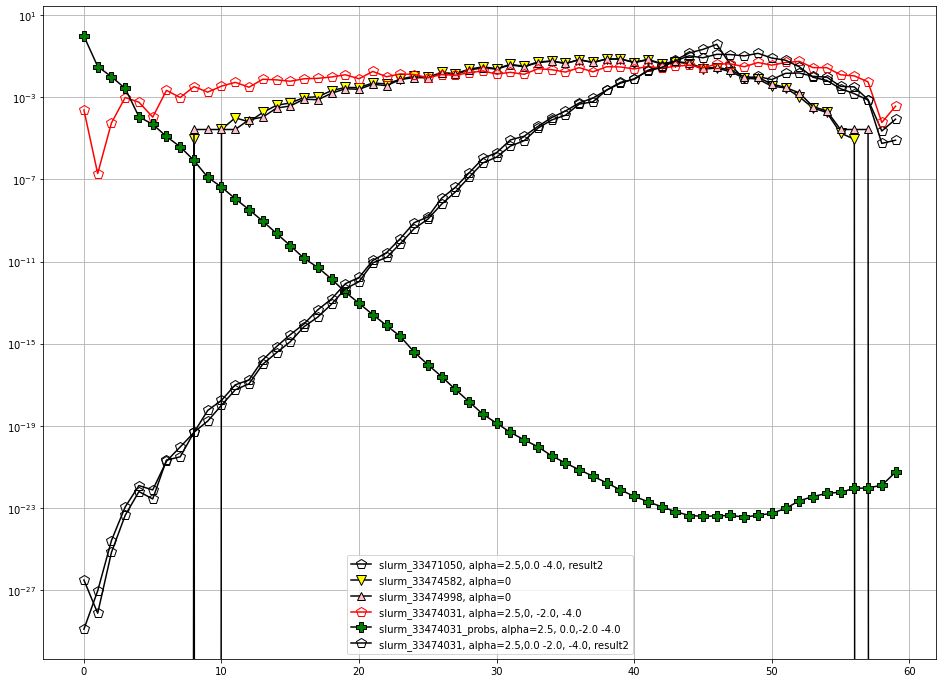

In [3193]:
plt.figure(figsize=(16,12))
# plt.plot(make_p(slurm_33451296_1),  label='slurm_33451296_1, alpha=-4.5', color='blue', marker='p', markersize=10, markerfacecolor='None')
# plt.plot(make_p(slurm_33451296_2),  label='slurm_33451296_2, alpha=-4.5', color='blue', marker='.', markersize=10, markerfacecolor='None')

# plt.plot(slurm_33451296_probs_1/np.sum(slurm_33451296_probs_1),  label='slurm_33451296_probs_1, alpha=-4.5', color='black', marker='P', markersize=10, markerfacecolor='green')
# plt.plot(slurm_33451296_probs_2/np.sum(slurm_33451296_probs_2),  label='slurm_33451296_probs_2, alpha=-4.5', color='black', marker='P', markersize=10, markerfacecolor='yellow')
# plt.plot(t1,  label='slurm_33451296, alpha=-4.0, result1', color='red', marker='p', markersize=10, markerfacecolor='blue')
# plt.plot(t2,  label='slurm_33451296, alpha=-4.0, result2', color='red', marker='p', markersize=10, markerfacecolor='None')

# plt.plot(make_p(slurm_33455127),  label='slurm_33455127, alpha=1.5', color='black', marker='.', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33455127_probs/np.sum(slurm_33455127_probs),  label='slurm_33455127_probs, alpha=1.5', color='black', marker='P', markersize=10, markerfacecolor='yellow')


# plt.plot(t3,  label='slurm_33470953, alpha=2.5, -4.0, result2', color='red', marker='p', markersize=10, markerfacecolor='None')
# plt.plot(make_p(slurm_33470953),  label='slurm_33470953, alpha=2.5, -4.0', color='blue', marker='p', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33470953_probs/np.sum(slurm_33470953_probs),  label='slurm_33470953_probs, alpha=2.5, -4.0', color='black', marker='P', markersize=10, markerfacecolor='yellow')
# 
# plt.plot(make_p(slurm_33471050),  label='slurm_33471050, alpha=2.5,0, -4.0', color='red', marker='p', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33471050_probs/np.sum(slurm_33471050_probs),  label='slurm_33470953_probs, alpha=2.5, 0.0, -4.0', color='black', marker='P', markersize=10, markerfacecolor='green')
plt.plot(t4,  label='slurm_33471050, alpha=2.5,0.0 -4.0, result2', color='black', marker='p', markersize=10, markerfacecolor='None')


plt.plot(make_p_urw(slurm_33474582),  label='slurm_33474582, alpha=0', color='black', marker='v', markersize=10, markerfacecolor='yellow')
plt.plot(make_p_urw(slurm_33474998),  label='slurm_33474998, alpha=0', color='black', marker='^', markersize=8, markerfacecolor='pink')

plt.plot(make_p(slurm_33474031),  label='slurm_33474031, alpha=2.5,0, -2.0, -4.0', color='red', marker='p', markersize=10, markerfacecolor='None')
plt.plot(slurm_33474031_probs/np.sum(slurm_33474031_probs),  label='slurm_33474031_probs, alpha=2.5, 0.0,-2.0 -4.0', color='black', marker='P', markersize=10, markerfacecolor='green')
plt.plot(t5,  label='slurm_33474031, alpha=2.5,0.0 -2.0, -4.0, result2', color='black', marker='p', markersize=10, markerfacecolor='None')

# dct = {10:3, 20:2, 30:3}
# plt.plot(dct.keys(), dct.values(), )

plt.legend()
plt.grid()
plt.yscale('log')


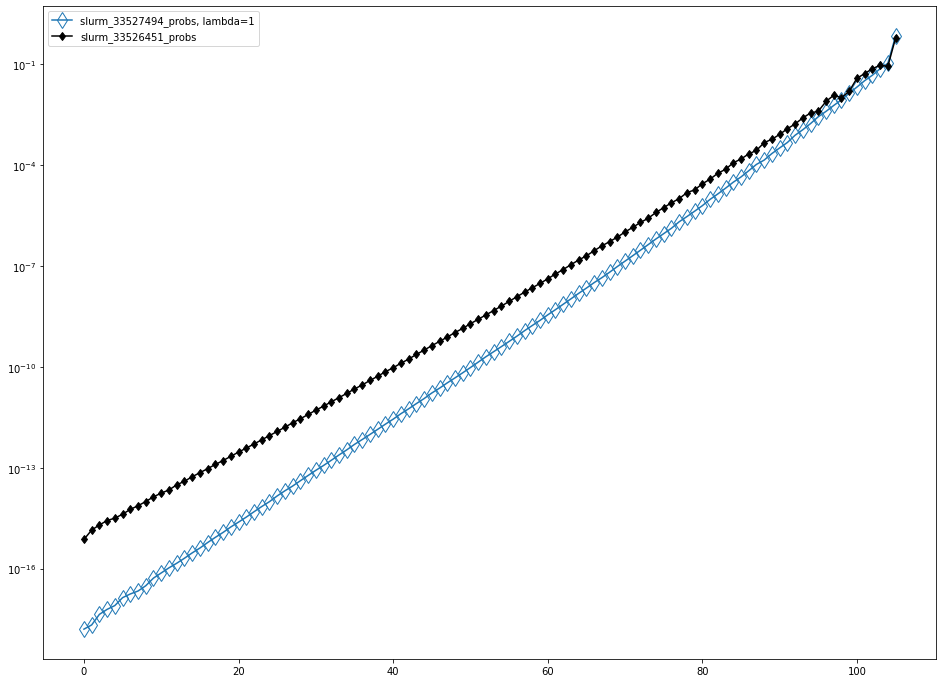

In [3431]:
probs = [ 1.247956042148952e-90, 2.058992695996204e-90, 3.4013039504168673e-90, 4.250712877882015e-90, 5.1241808627188565e-90, 6.09146411511086e-90, 8.63339340913566e-90, 1.1118780404738875e-89, 1.4289017317145423e-89, 2.23999586580934e-89, 2.7293454548439704e-89, 3.471958959641031e-89, 4.66553721027374e-89, 5.891278987444691e-89, 8.00699110758918e-89, 1.0752406235230551e-88, 1.4239084491259892e-88, 1.8106729139267228e-88, 2.5279955978370003e-88, 3.1642048274863105e-88, 4.343828757671768e-88, 5.525415263108897e-88, 7.881485859326321e-88, 9.900121141460581e-88, 1.3594395302688644e-87,1.8175896145692563e-87, 2.35030925754255e-87, 3.363427718451217e-87, 4.153109946788082e-87, 5.578442383469265e-87, 7.708559604831001e-87, 1.0188076540274126e-86, 1.3531095712910754e-86, 1.928093278473579e-86, 2.353448882890346e-86, 3.309817257070033e-86, 4.2854678829748174e-86, 5.9681050661465826e-86,
         7.953777326395163e-86, 1.0766384145510537e-85, 1.3335573703089085e-85, 1.9089232281303918e-85, 2.4396837561672355e-85, 3.607456170317064e-85, 4.7010702388624954e-85, 6.411497741906727e-85, 8.632697059140618e-85, 1.1464287307167197e-84, 1.6435953745890308e-84, 2.0621890983419605e-84, 2.881063065935094e-84, 3.7350524786529555e-84, 5.37089433876173e-84, 7.200618679270142e-84, 9.516835735627878e-84, 1.241069188288349e-83, 1.7399877595155837e-83, 2.4163062923576303e-83, 3.2772487958426425e-83, 4.223983130379905e-83, 6.148199004936681e-83, 8.150587696949964e-83, 1.2135014471940743e-82, 1.6676645446560308e-82, 2.198241022864547e-82, 3.0269786226891927e-82, 4.5375829050539657e-82, 5.737329140463362e-82, 7.590841463845852e-82, 1.1589290904635512e-81, 1.5619632758744012e-81, 1.9397944762552108e-81, 3.0477877093424453e-81, 3.935151581663184e-81, 6.198941977305554e-81, 8.676389800566664e-81, 1.0805523121775595e-80, 1.3867375169357304e-80, 1.6534988672490618e-80, 2.5392781322198756e-80, 4.079190540860604e-80, 5.394618962715702e-80, 7.117767583084879e-80      ,
         1.1415579333222354e-79, 1.5334452218555605e-79, 2.048263397876738e-79, 2.3756010107216184e-79, 4.7084525054311857e-79, 8.56344225149504e-79, 8.072113686459006e-79, 9.462946692811198e-79, 2.7987228550921975e-78, 3.9227448594723744e-78, 5.057529677799955e-78, 6.125420301884632e-78, 4.1671413422186037e-78, 7.409086587610721e-78, 2.331363563376249e-77, 3.2496429301951047e-77, 1.3982477994615202e-77, 1.0143386602805076e-77, 2.9610513930456914e-76, 6.69310510622714e-77, 1.3878035523587104e-76, 3.206680224743343e-76, 1.5273365923663815e-75, 
        ]
probs1 =[1.1052937887808466e-90, 2.366091782180056e-90, 3.061463281928754e-90, 3.924725417014635e-90, 4.46618696821798e-90, 6.115718706612969e-90, 8.586338629340714e-90, 1.080442879793164e-89, 1.446856192732695e-89, 2.0830206400626364e-89, 2.6940653381648617e-89, 3.50015577579489e-89, 4.584562135281638e-89, 5.957108679686956e-89, 7.876322376673216e-89, 1.0492737806478327e-88, 1.3756787083709497e-88, 1.8320150593192215e-88, 2.4717889900838583e-88, 3.194432384474039e-88, 4.361927185958633e-88, 5.663474752749386e-88, 7.893514959948773e-88, 9.994744720824602e-88, 1.3482442286522175e-87, 1.8161265868482657e-87, 2.3400586352826597e-87, 3.373767830357296e-87, 4.2188922745093625e-87, 5.750453364391453e-87, 7.767561205762797e-87, 1.0511855345219976e-86, 1.3360998526004997e-86, 1.8778000596481347e-86, 2.3875889707340644e-86, 3.3267490940009586e-86, 4.286442496353594e-86, 5.975526791534361e-86, 8.001096358622016e-86, 1.05289868448762e-85, 1.3927833291220385e-85, 1.8732355881236463e-85, 2.478110588628261e-85, 3.585456152818552e-85, 4.727830030298407e-85, 6.196591435267767e-85, 8.669528219732269e-85, 1.1257371864808217e-84, 1.5853696176117145e-84, 2.0771005866598723e-84, 2.8509751397341604e-84, 3.7752764725469244e-84, 5.272457538003537e-84, 7.178920723227532e-84, 9.370810780482477e-84, 1.252849497939847e-83, 1.7740131415971618e-83, 2.4517470923239064e-83, 3.408456496685405e-83, 4.3907781218665375e-83, 6.123893286087257e-83, 8.476219838096519e-83, 1.1913633201086872e-82, 1.6219234746431434e-82, 2.1819343660683187e-82, 3.075279356274422e-82, 4.2363657807428525e-82, 5.740873244592504e-82, 7.686471432770949e-82, 1.1388532383540137e-81, 1.550568813174014e-81, 1.9587508775969207e-81, 2.8685628350080316e-81, 4.034579760546199e-81, 5.991191172671794e-81, 8.020857706160538e-81, 1.1034964813173468e-80, 1.4209305301784281e-80, 1.975295672536342e-80, 2.6991483746809723e-80, 4.12296619501824e-80, 5.416481735564464e-80, 7.343649632781869e-80, 1.1095098729790899e-79, 1.5093547976888527e-79, 2.2466695985977682e-79, 3.052997819856085e-79, 5.859113345559253e-79, 7.218532529167766e-79, 9.8104257245081e-79, 1.234645473374727e-78, 2.278219996525672e-78, 3.204538680660003e-78, 4.910565350073639e-78, 6.43691860810885e-78, 4.564031867641938e-78, 7.753753744680262e-78, 1.95879573884526e-77, 3.074558051005121e-77, 3.175659412476173e-77, 1.362280167462466e-77, 4.294161244037932e-77, 1.001387079012931e-76, 1.3878035523587104e-76, 4.493805092499121e-76, 1.565643817049863e-75
]

probs1 = [ 1.1186116380120846e-90, 2.329750979269276e-90, 2.607093114725342e-90, 3.81222034256757e-90, 4.549780366033906e-90, 6.033287014530735e-90, 8.729677849519534e-90, 1.1188209943562703e-89, 1.5174558979785273e-89, 2.0636253834054642e-89, 2.6798707926461084e-89, 3.3560962808355185e-89, 4.671933333904142e-89, 5.957121235948013e-89, 7.93093787317341e-89, 1.0521095195835331e-88, 1.4027927088556338e-88, 1.8836281074511517e-88, 2.4646515382002483e-88, 3.2567985416277193e-88, 4.3601239118390423e-88, 5.556430105885354e-88, 7.736419719771097e-88, 9.926883772959162e-88, 1.3589977468010562e-87, 1.80781327001357e-87, 2.3658294229072125e-87, 3.306679428096966e-87, 4.234772082840121e-87, 5.7731960328759595e-87, 7.608313740503929e-87, 1.038031284818398e-86, 1.3430041528406768e-86, 1.8106908708039136e-86, 2.425623835317629e-86, 3.294084955139232e-86, 4.262321594934659e-86, 5.963649671040127e-86, 7.941142615650335e-86, 1.0620696856296994e-85, 1.4008123230167847e-85, 1.883921837334471e-85, 2.438520306270442e-85, 3.520100020663702e-85, 4.7528525652897045e-85, 6.356930347744072e-85, 8.486002653396181e-85, 1.1280687103314081e-84, 1.5754717321139514e-84, 2.0681360320820983e-84, 2.8445784717185953e-84, 3.855191145227877e-84, 5.272381040205203e-84, 7.0594090886299565e-84, 9.5614264232187e-84, 1.2644031951419477e-83, 1.7841902894186546e-83, 2.3867950743187e-83, 3.3490406098380285e-83, 4.522245256324863e-83, 6.174493535648095e-83, 8.198243348152432e-83, 1.1419080785764702e-82, 1.6490980841608416e-82, 2.1819343660683187e-82, 3.025678268272108e-82, 4.1876617418170126e-82, 5.78457892458843e-82, 7.727114800401285e-82, 1.1468111936766781e-81, 1.5130559938739813e-81, 1.990497372396943e-81, 3.104468789942228e-81, 3.9270308573795064e-81, 5.8985981340666075e-81, 8.192456139229708e-81, 1.0921600477438344e-80, 1.4630741994391698e-80, 2.059396404338794e-80, 2.631978352558476e-80, 4.147608174045836e-80, 5.6590852707703085e-80, 8.106265981677827e-80, 1.1809648486725687e-79, 1.5093547976888527e-79, 2.3730464108991443e-79, 3.1971653293476596e-79, 5.027754046551435e-79, 7.204302585597116e-79, 1.063908260034035e-78, 1.2354125957118998e-78, 1.713627262913502e-78, 2.6888247449561354e-78, 3.8032916346310226e-78, 6.203368049885587e-78, 4.525182366336027e-78, 7.444942362260497e-78, 1.95879573884526e-77, 2.8387008751603234e-77, 3.4761222597834616e-77, 4.323425181541321e-77, 4.294161244037932e-77, 7.020652553999021e-77, 8.291179425707385e-77, 2.152616543890264e-76, 1.543287001843095e-75
]
slurm_33526451_probs = [ 1.1006718830489748e-90, 2.0977317681403625e-90, 2.95864151359623e-90, 4.022259753411543e-90, 4.731096725543521e-90, 6.188732646740399e-90, 8.63886451326414e-90, 1.103900992637588e-89, 1.477339797561242e-89, 2.034105335028188e-89, 2.6261130567339444e-89, 3.258237455760582e-89, 4.6198114108023815e-89, 5.890218192937747e-89, 8.051423369226329e-89, 1.0591070259229957e-88, 1.400135604033925e-88, 1.862478046455736e-88, 2.4412245883492315e-88, 
                        3.250499272400817e-88, 4.350706253194609e-88, 5.711489372780452e-88, 7.562713659080992e-88, 1.0059828246347637e-87, 1.3439319899477997e-87,1.78638063334155e-87, 2.386332201132542e-87, 3.2381534879761453e-87, 4.245628454192237e-87, 5.707441143865732e-87, 7.657276043928793e-87, 1.009199864221346e-86, 1.3566062226123979e-86, 1.8066627382565354e-86, 2.4225721002192957e-86, 3.259957079868474e-86, 4.314182622693241e-86, 5.844649097737165e-86,7.792613058035381e-86, 
                        1.0637953458099264e-85, 1.3932314468297377e-85, 1.9057896912261053e-85, 2.512634816390968e-85, 3.475585226250073e-85, 4.6579928649650946e-85, 6.326129839907762e-85, 8.469451100546333e-85, 1.1386973133785674e-84, 1.5564679869724677e-84, 2.06348961939935e-84, 2.84805659606068e-84,3.8342685462589574e-84, 5.1909163025097e-84, 6.995089392655605e-84, 9.506526719836391e-84, 1.30415447518766e-83, 1.803583419345604e-83, 2.4587532932763037e-83, 3.332340534686776e-83, 4.467052798370649e-83, 6.1463499512989825e-83, 8.543533224765253e-83, 1.1625561703332704e-82, 1.6160840459010584e-82,2.2226338875529207e-82, 
                        2.9626770119073275e-82, 4.2000691032650265e-82, 5.84347331133127e-82, 7.819617705433571e-82, 1.0643043826414854e-81, 1.5166390848904452e-81, 2.0789851577585917e-81, 2.915536405784341e-81, 3.8784865634366314e-81, 5.757400474332259e-81, 8.002938564431083e-81, 1.1164494097239897e-80, 1.4829205685508172e-80, 
                        2.2357681596914184e-80, 2.7016653162616577e-80, 4.097498557789861e-80, 5.6229602188353474e-80, 8.420302064970624e-80, 1.1025172297026295e-79, 1.7302449808025455e-79, 2.2257188291581942e-79, 3.182143765707634e-79, 4.01888052939252e-79, 6.861768112417118e-79, 8.628643102673594e-79, 1.203144025043579e-78, 1.7725554275582366e-78, 2.4604750125084234e-78, 3.730946725516886e-78, 5.210729178599702e-78, 5.882412424973817e-78, 1.1486537171368656e-77, 1.758095229426993e-77, 1.490009254492156e-77, 2.298287481938563e-77, 5.6191571850795395e-77, 7.733899149935273e-77, 1.0820739135445224e-76, 1.3665507954086875e-76, 1.2723281124104918e-76, 8.800308527898707e-76]

slurm_33527494_probs = [ 6.791586741782013e-92, 9.0585555635766e-92, 1.866641740604919e-91, 2.631478544887269e-91, 3.4130597532798703e-91, 5.865685349987823e-91, 7.547359850955117e-91, 9.231740622969139e-91, 1.3254527469843403e-90, 2.2390208910601183e-90, 3.1810398949010244e-90, 4.514087865203807e-90, 6.167435813257919e-90, 8.689178560766313e-90, 1.2521927835746137e-89, 1.746977189439942e-89, 2.544538998827982e-89, 3.632206529918339e-89, 5.090261703581506e-89, 7.39726828459975e-89, 1.0306514091694219e-88, 1.451159672955145e-88, 2.0934665344537737e-88, 2.992677650589953e-88, 4.182220682863335e-88, 6.186875447536558e-88, 8.798417738323544e-88, 1.216878128034354e-87, 1.7517714506995952e-87, 2.5076976287759147e-87, 3.567982415873479e-87, 4.977078913016255e-87, 7.096153963735065e-87, 1.0219515527799983e-86, 1.4481970108452268e-86, 2.105191552594401e-86, 2.938263361216512e-86, 4.15532007700631e-86, 5.897785413844211e-86, 8.410051752115307e-86, 1.1817103054376514e-85, 1.7168553262066308e-85, 2.4024455619364883e-85, 3.428580969211253e-85, 4.830507332723068e-85, 7.087503116296845e-85, 9.869204838912464e-85, 1.4170841642974398e-84, 1.9928566300112046e-84, 2.828284686714711e-84, 4.054174411360661e-84,5.855627102204491e-84, 8.478892570835504e-84, 1.197355200242021e-83, 1.695241652225953e-83, 2.4167709884152187e-83, 3.453303278841238e-83, 5.0403931247269996e-83, 7.196277352097742e-83, 1.020572733953054e-82, 1.4904965601579326e-82, 2.1273619828395077e-82, 3.078460245362257e-82, 4.45980894822571e-82,6.489998122419534e-82, 9.296195456242257e-82, 1.3522224608157667e-81, 1.8972304654778147e-81, 2.753858905274609e-81, 4.0601063770127374e-81, 5.891519153206244e-81, 8.537583121152885e-81, 1.2465644713720346e-80, 1.826542885153809e-80, 2.6873465807053224e-80, 3.863866645075998e-80, 5.5731002550157156e-80, 8.70365595537846e-80, 1.2400030230291863e-79, 1.7929820854745456e-79, 2.6191572600781758e-79, 4.029049914469303e-79, 5.842649838159441e-79, 8.653850908209912e-79, 1.3060215925258408e-78, 1.870592677241883e-78, 2.8621888936054023e-78, 4.420208949896422e-78, 5.938669904686248e-78, 9.300278228536449e-78, 1.364090799751888e-77, 1.978005618164416e-77, 3.2486905303781683e-77, 4.754741180494256e-77, 7.224639673026043e-77, 1.154258338212839e-76, 1.6638337983831787e-76, 2.4979569066946357e-76, 3.6610087137585947e-76, 5.787416458851979e-76, 8.773477280959931e-76, 1.3612828302834264e-75, 1.9783667279593588e-75, 3.083703314164192e-75, 4.474535029019162e-75, 2.8722486584459726e-74]

slurm_33527494_probs = [el/sum(slurm_33527494_probs) for el in slurm_33527494_probs]
slurm_33526451_probs = [el/sum(slurm_33526451_probs) for el in slurm_33526451_probs]
# probs = [el/sum(probs1) for el in probs1]

plt.figure(figsize=(16,12))
plt.plot(slurm_33527494_probs, label='slurm_33527494_probs, lambda=1', marker='d', markerfacecolor='none', markersize=12)
plt.plot(slurm_33526451_probs, label='slurm_33526451_probs', marker='d', color='black')

plt.legend()
plt.yscale('log')
# plt.xscale('log')
# plt.xlim(60,120)
# plt.ylim(10**(-7), 0)


{12: 1, 13: 5, 14: 3, 15: 6, 16: 13, 17: 19, 18: 37, 19: 72, 20: 100, 21: 161, 22: 281, 23: 372, 24: 551, 25: 714, 26: 941, 27: 1316, 28: 1666, 29: 2112, 30: 2770, 31: 3467, 32: 4142, 33: 5038, 34: 6003, 35: 7307, 36: 8433, 37: 9518, 38: 10810, 39: 12372, 40: 14002, 41: 15281, 42: 16683, 43: 18489, 44: 19667, 45: 21340, 46: 22736, 47: 24041, 48: 25116, 49: 26543, 50: 27662, 51: 28715, 52: 29215, 53: 30055, 54: 30321, 55: 30949, 56: 31206, 57: 30997, 58: 30840, 59: 30952, 60: 30407, 61: 29821, 62: 29658, 63: 29010, 64: 27996, 65: 27409, 66: 26412, 67: 25513, 68: 24228, 69: 23282, 70: 22217, 71: 21177, 72: 20403, 73: 19245, 74: 17885, 75: 16921, 76: 15932, 77: 14942, 78: 14067, 79: 13229, 80: 11997, 81: 11257, 82: 10179, 83: 9465, 84: 8607, 85: 7870, 86: 7195, 87: 6490, 88: 6007, 89: 5377, 90: 4927, 91: 4413, 92: 3954, 93: 3523, 94: 3238, 95: 2758, 96: 2523, 97: 2156, 98: 1946, 99: 1715, 100: 1581, 101: 1325, 102: 1130, 103: 1013, 104: 856, 105: 761, 106: 568, 107: 539, 108: 481, 109: 39

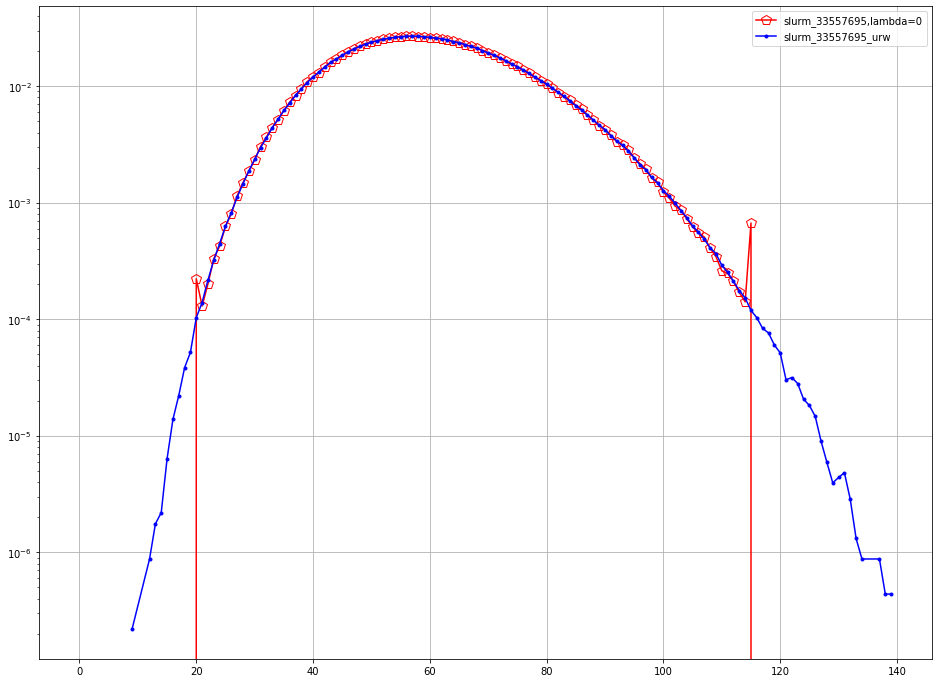

In [3940]:
dct = {53: 672, 51: 678, 59: 729, 50: 629, 54: 656, 47: 573, 64: 605, 70: 479, 48: 563, 74: 394, 87: 155, 65: 605, 72: 434, 68: 569, 43: 468, 62: 686, 63: 650, 52: 657, 58: 685, 46: 534, 40: 372, 34: 146, 44: 463, 90: 112, 61: 685, 39: 304, 91: 103, 37: 199, 57: 736, 67: 597, 77: 351, 56: 689, 66: 643, 88: 148, 73: 463, 75: 384, 93: 80, 94: 71, 83: 199, 80: 264, 45: 453, 100: 39, 92: 87, 60: 694, 49: 609, 22: 10, 105: 23, 35: 158, 41: 368, 38: 266, 81: 285, 71: 445, 84: 180, 69: 513, 55: 719, 79: 289, 85: 166, 82: 235, 96: 69, 76: 374, 98: 43, 36: 206, 78: 320, 106: 15, 95: 67, 32: 84, 89: 125, 97: 52, 27: 30, 42: 380, 30: 66, 29: 43, 86: 164, 107: 14, 99: 40, 33: 108, 31: 83, 104: 15, 23: 10, 109: 8, 102: 28, 103: 26, 119: 2, 28: 38, 112: 6, 126: 1, 110: 8, 117: 3, 26: 19, 101: 32, 24: 7, 108: 9, 17: 1, 19: 2, 116: 2, 114: 6, 25: 13, 111: 8, 115: 1, 120: 1, 20: 2, 21: 3, 122: 1, 113: 2, 118: 2, 131: 1, 121: 1}

slurm_33526451_urw = {58: 128902, 65: 113224, 64: 116805, 86: 30120, 54: 126267, 68: 101198, 56: 129812, 48: 105377, 66: 109488, 46: 95292, 70: 92881, 62: 123049, 43: 76697, 35: 29956, 60: 126538, 31: 14202, 63: 119669, 53: 124990, 49: 110263, 81: 46588, 45: 89355, 61: 124429, 33: 20985, 67: 105859, 82: 42690, 57: 128747, 88: 24940, 47: 100557, 91: 18364, 51: 119098, 80: 50099, 23: 1480, 73: 79905, 37: 40206, 38: 45839, 28: 7035, 75: 70698, 41: 63903, 34: 25063, 106: 2646, 104: 3624, 36: 35115, 42: 69923, 84: 35916, 71: 88423, 55: 128285, 44: 82665, 89: 22584, 87: 27182, 79: 54022, 76: 65942, 29: 8985, 52: 121813, 95: 11554, 72: 84320, 74: 75392, 77: 62232, 39: 51624, 69: 97151, 59: 128335, 50: 114756, 32: 17252, 103: 4284, 109: 1691, 78: 57889, 30: 11457, 96: 10401, 85: 32625, 40: 57815, 90: 20412, 83: 39246, 105: 3110, 92: 16367, 94: 13164, 98: 8141, 112: 1021, 93: 14711, 99: 7036, 101: 5498, 107: 2304, 110: 1393, 20: 432, 97: 9193, 121: 177, 24: 2196, 22: 1081, 100: 6316, 27: 5465, 114: 683, 25: 2980, 117: 391, 102: 4732, 26: 4008, 113: 833, 111: 1206, 119: 277, 133: 11, 108: 1859, 115: 602, 21: 710, 18: 171, 116: 522, 118: 322, 122: 139, 15: 29, 17: 98, 19: 275, 128: 40, 120: 223, 135: 3, 125: 70, 123: 112, 124: 98, 126: 61, 130: 27, 127: 47, 139: 2, 129: 24, 16: 69, 13: 9, 134: 11, 12: 5, 131: 16, 14: 23, 132: 8, 141: 2, 138: 3, 136: 2, 10: 1, 9: 1, 11: 1}


slurm_33527494_urw = {90: 59659, 70: 102866, 75: 99145, 48: 36904, 65: 97814, 69: 102629, 49: 40772, 82: 84522, 59: 81235, 74: 100769, 88: 65953, 118: 4777, 91: 56325, 78: 94202, 61: 88277, 54: 61396, 80: 89332, 63: 93452, 97: 38211, 47: 33155, 39: 10110, 101: 28555, 67: 100543, 89: 62167, 56: 69945, 79: 91750, 62: 91151, 71: 103308, 58: 77734, 60: 85353, 116: 6231, 55: 65659, 84: 78771, 72: 102292, 44: 22645, 77: 96313, 64: 95438, 96: 41442, 68: 101975, 93: 49930, 57: 73939, 86: 72341, 92: 52966, 112: 9810, 51: 49036, 66: 100068, 107: 16705, 81: 87161, 95: 43890, 127: 1227, 110: 12198, 87: 68982, 85: 75372, 76: 98221, 83: 81239, 35: 4472, 94: 47156, 99: 33773, 104: 22127, 105: 20236, 108: 15041, 98: 35758, 106: 18189, 119: 4141, 102: 26205, 50: 45037, 52: 52953, 103: 24134, 53: 57042, 73: 101552, 37: 6992, 111: 11151, 40: 12283, 42: 16911, 34: 3508, 100: 30948, 113: 8875, 109: 13591, 41: 14587, 125: 1715, 46: 29261, 31: 1644, 45: 25924, 115: 6882, 124: 1967, 120: 3482, 117: 5377, 134: 292, 25: 195, 129: 838, 38: 8460, 123: 2321, 114: 7740, 43: 19611, 128: 981, 121: 3023, 33: 2663, 32: 2085, 30: 1217, 126: 1415, 36: 5670, 29: 881, 136: 183, 27: 450, 139: 85, 28: 628, 122: 2605, 138: 123, 130: 680, 133: 382, 141: 67, 131: 590, 132: 493, 23: 87, 24: 173, 26: 313, 135: 259, 137: 158, 143: 33, 140: 87, 142: 48, 21: 28, 22: 63, 19: 13, 144: 16, 146: 12, 16: 5, 148: 7, 145: 18, 147: 10, 20: 20, 17: 2, 149: 4, 18: 8, 150: 2, 156: 1, 155: 1, 152: 2, 151: 1}

slurm_33526451 = np.array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       209.42421875, 209.03046875, 209.3875    , 209.68359375,
       210.1265625 , 210.43984375, 210.51015625, 210.7171875 ,
       210.84375   , 211.05078125, 211.22890625, 211.328125  ,
       211.46015625, 211.56328125, 211.69140625, 211.7625    ,
       211.871875  , 211.97578125, 212.0640625 , 212.11875   ,
       212.2125    , 212.3234375 , 212.35859375, 212.4375    ,
       212.46953125, 212.54609375, 212.5953125 , 212.61875   ,
       212.64296875, 212.71484375, 212.715625  , 212.77421875,
       212.80234375, 212.79296875, 212.82890625, 212.8421875 ,
       212.84375   , 212.853125  , 212.8453125 , 212.81171875,
       212.85      , 212.80234375, 212.81796875, 212.76328125,
       212.76171875, 212.73046875, 212.69140625, 212.6640625 ,
       212.63046875, 212.60546875, 212.5578125 , 212.5546875 ,
       212.5       , 212.459375  , 212.41796875, 212.3625    ,
       212.328125  , 212.26953125, 212.21875   , 212.16484375,
       212.10546875, 212.0765625 , 212.01640625, 211.9859375 ,
       211.91328125, 211.82265625, 211.796875  , 211.76953125,
       211.66875   , 211.62109375, 211.5609375 , 211.4859375 ,
       211.38515625, 211.2796875 , 211.2953125 , 211.24296875,
       211.15234375, 211.04765625, 210.98046875, 210.93125   ,
       210.8390625 , 210.71875   , 210.60390625, 210.665625  ,
       210.47890625, 210.3859375 , 210.2984375 , 210.090625  ,
       209.89453125, 209.86328125, 209.6296875 , 209.48984375,
       209.534375  , 209.12890625, 209.03671875, 209.1140625 ,
       209.01796875, 208.36640625, 208.49453125, 208.58515625,
       208.1375    , 207.840625  , 206.75234375, 207.76875   ,
       207.3890625 , 208.17109375,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])


slurm_33527494 = np.array([  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
       277.125    , 276.446875 , 276.9546875, 277.8171875, 277.534375 ,
       277.996875 , 278.1171875, 278.2203125, 279.371875 , 279.3203125,
       279.8375   , 280.1140625, 280.3171875, 280.5125   , 280.5      ,
       280.71875  , 281.0296875, 281.2140625, 281.190625 , 281.3      ,
       281.4265625, 281.559375 , 281.6      , 281.725    , 281.81875  ,
       281.8625   , 281.9265625, 282.0296875, 282.0875   , 282.1515625,
       282.19375  , 282.2859375, 282.3078125, 282.3765625, 282.4359375,
       282.5046875, 282.5125   , 282.59375  , 282.590625 , 282.65     ,
       282.6859375, 282.728125 , 282.721875 , 282.7734375, 282.7984375,
       282.8046875, 282.85625  , 282.8375   , 282.8515625, 282.8796875,
       282.846875 , 282.8484375, 282.8328125, 282.81875  , 282.8484375,
       282.828125 , 282.778125 , 282.79375  , 282.775    , 282.7546875,
       282.7234375, 282.73125  , 282.7078125, 282.6484375, 282.65625  ,
       282.6078125, 282.55625  , 282.5296875, 282.503125 , 282.4875   ,
       282.4140625, 282.4015625, 282.30625  , 282.3515625, 282.3140625,
       282.2421875, 282.1859375, 282.1171875, 282.0703125, 282.0421875,
       281.9734375, 281.953125 , 281.8640625, 281.8171875, 281.759375 ,
       281.7390625, 281.69375  , 281.6      , 281.521875 , 281.4484375,
       281.409375 , 281.3171875, 281.2625   , 281.2375   , 281.1578125,
       281.08125  , 281.0296875, 280.9328125, 280.9109375, 280.7921875,
       280.5875   , 280.396875 , 280.25     , 280.3953125, 280.3125   ,
       281.21875  ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ])



slurm_33557695 = np.array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       150.65123291, 150.1142334 , 150.54995728, 151.04781494,
       151.2968689 , 151.68641357, 151.93950195, 152.29031982,
       152.55244751, 152.77728271, 153.00101318, 153.26328125,
       153.44941406, 153.63619995, 153.79373779, 153.97466431,
       154.13959351, 154.27047119, 154.40571899, 154.54604492,
       154.64516602, 154.72337646, 154.84081421, 154.93109131,
       154.99202271, 155.06538696, 155.13319092, 155.1975769 ,
       155.24737549, 155.28970947, 155.32703247, 155.35685425,
       155.37961426, 155.39882813, 155.42437134, 155.43574219,
       155.44411011, 155.43947754, 155.43526611, 155.4310791 ,
       155.40973511, 155.40723877, 155.39584351, 155.36711426,
       155.34032593, 155.30839233, 155.27836914, 155.24244995,
       155.2147522 , 155.15973511, 155.11682739, 155.06466675,
       155.01459351, 154.94750366, 154.89241333, 154.84517212,
       154.76771851, 154.70797119, 154.63748779, 154.56755981,
       154.49591064, 154.41604614, 154.32938232, 154.23810425,
       154.17575073, 154.08302612, 154.00028076, 153.87862549,
       153.78729858, 153.67596436, 153.59572144, 153.49063721,
       153.35977173, 153.29759521, 153.18860474, 153.03329468,
       152.92704468, 152.81810913, 152.6394104 , 152.55994873,
       152.36043091, 152.2456543 , 152.0869873 , 152.0114502 ,
       151.83685303, 151.67608643, 151.55509644, 151.4767334 ,
       151.25228271, 151.08856812, 150.80979004, 150.75686646,
       150.59830322, 150.38069458, 150.19606934, 151.75380859,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])


slurm_33557695_urw = {35: 28161, 54: 119185, 73: 75302, 71: 83794, 52: 114898, 72: 79600, 44: 78027, 75: 66794, 53: 117698, 83: 37233, 55: 120998, 40: 54494, 29: 8518, 66: 103575, 93: 14119, 49: 104410, 99: 6724, 64: 109960, 79: 50798, 65: 107719, 48: 99797, 38: 43164, 45: 83831, 77: 58565, 50: 108522, 91: 17099, 70: 87740, 34: 23678, 74: 70531, 46: 89812, 61: 117603, 30: 10740, 60: 119402, 31: 13513, 51: 111823, 78: 54384, 58: 121868, 47: 94784, 57: 122342, 62: 116175, 82: 40317, 43: 72798, 41: 60339, 63: 113918, 76: 62685, 56: 121767, 36: 32622, 105: 2872, 84: 33896, 37: 37971, 81: 43717, 59: 120867, 88: 23324, 80: 47304, 68: 96726, 39: 48939, 92: 15455, 67: 99817, 69: 91819, 27: 5077, 32: 16326, 42: 66146, 87: 25734, 90: 19279, 33: 20033, 94: 12596, 25: 2855, 96: 9568, 89: 21143, 85: 30905, 86: 28386, 108: 1869, 97: 8727, 26: 3745, 103: 3901, 95: 11109, 110: 1323, 100: 5781, 101: 5174, 102: 4513, 109: 1670, 98: 7507, 104: 3395, 118: 348, 28: 6630, 19: 237, 24: 2030, 120: 235, 106: 2546, 113: 803, 23: 1465, 116: 470, 112: 964, 22: 989, 114: 695, 111: 1148, 16: 63, 12: 4, 115: 542, 107: 2213, 123: 128, 124: 94, 20: 470, 21: 634, 17: 101, 117: 380, 119: 274, 18: 175, 126: 67, 122: 144, 121: 138, 128: 27, 127: 41, 13: 8, 125: 83, 15: 29, 132: 13, 131: 22, 130: 20, 134: 4, 133: 6, 14: 10, 129: 18, 137: 4, 9: 1, 139: 2, 138: 2}


dct = dict(sorted(dct.items()))
slurm_33526451_urw = dict(sorted(slurm_33526451_urw.items()))
slurm_33527494_urw = dict(sorted(slurm_33527494_urw.items()))
slurm_33557695_urw = dict(sorted(slurm_33557695_urw.items()))

print(dct1)
plt.figure(figsize=(16,12))
v = dct.values()
# v1 = dct1.values()


plt.plot([el if el>1*np.e**(-20) else 0.0 for el in make_p(slurm_33557695) ],  label='slurm_33557695,lambda=0', color='red', marker='p', markersize=10, markerfacecolor='None')

# plt.plot([el if el>1*np.e**(-20) else 0.0 for el in make_p(slurm_33526451) ],  label='slurm_33526451,lambda=0', color='black', marker='p', markersize=10, markerfacecolor='None')

# plt.plot([el if el>1*np.e**(-20) else 0.0 for el in make_p(slurm_33527494) ],  label='slurm_33527494, lambda=1,', color='black', marker='p', markersize=10, markerfacecolor='None')

# plt.plot(slurm_33526451_urw.keys(), [el/sum(slurm_33526451_urw.values()) for el in slurm_33526451_urw.values()], marker='.', label='slurm_33526451_urw')
# plt.plot(slurm_33527494_urw.keys(), [el/sum(slurm_33527494_urw.values()) for el in slurm_33527494_urw.values()], marker='.', label='slurm_33527494_urw')

plt.plot(slurm_33557695_urw.keys(), [el/sum(slurm_33557695_urw.values()) for el in slurm_33557695_urw.values()], marker='.', label='slurm_33557695_urw', color='blue')


# print(slurm_33526451.shape, np.array(slurm_33526451_probs).shape)

t = make_p(slurm_33526451)
t = t[t>10**(-20)]
print(t.shape)
slurm_33526451_fixed = t/slurm_33526451_probs
slurm_33526451_fixed = slurm_33526451_fixed/np.sum(slurm_33526451_fixed)

t = make_p(slurm_33527494)
t = t[t>10**(-20)]
slurm_33527494_fixed = t/slurm_33527494_probs
slurm_33527494_fixed = slurm_33527494_fixed/np.sum(slurm_33527494_fixed)

# plt.plot(slurm_33526451_fixed, label = 'slurm_33526451_fixed WL ')
# plt.plot(slurm_33527494_fixed, label = 'slurm_33527494_fixed WL')


t = [el[1] for el in slurm_33526451_urw.items()  if (el[0]>20) and (el[0] <=126)]
t = np.array([el/sum(t) for el in t])
slurm_33526451_fixed_urw = t/slurm_33526451_probs
slurm_33526451_fixed_urw = slurm_33526451_fixed_urw/np.sum(slurm_33526451_fixed_urw)
# plt.plot(slurm_33526451_fixed_urw, label = 'slurm_33526451_fixed URW ', marker='p', markersize=10, markerfacecolor='none')



t = [el[1] for el in slurm_33527494_urw.items()  if (el[0]>20) and (el[0] <=126)]
t = np.array([el/sum(t) for el in t])
slurm_33527494_fixed_urw = t/slurm_33527494_probs
slurm_33527494_fixed_urw = slurm_33527494_fixed_urw/np.sum(slurm_33527494_fixed_urw)
# plt.plot(slurm_33527494_fixed_urw, label = 'slurm_33527494_fixed URW ', marker='.', color='black')

delta = slurm_33526451_fixed_urw - slurm_33527494_fixed_urw
# plt.plot(delta)

plt.yscale('log')
plt.legend()
plt.grid()
# plt.xlim(0,40)
# plt.ylim(10**-8, 10**-1)

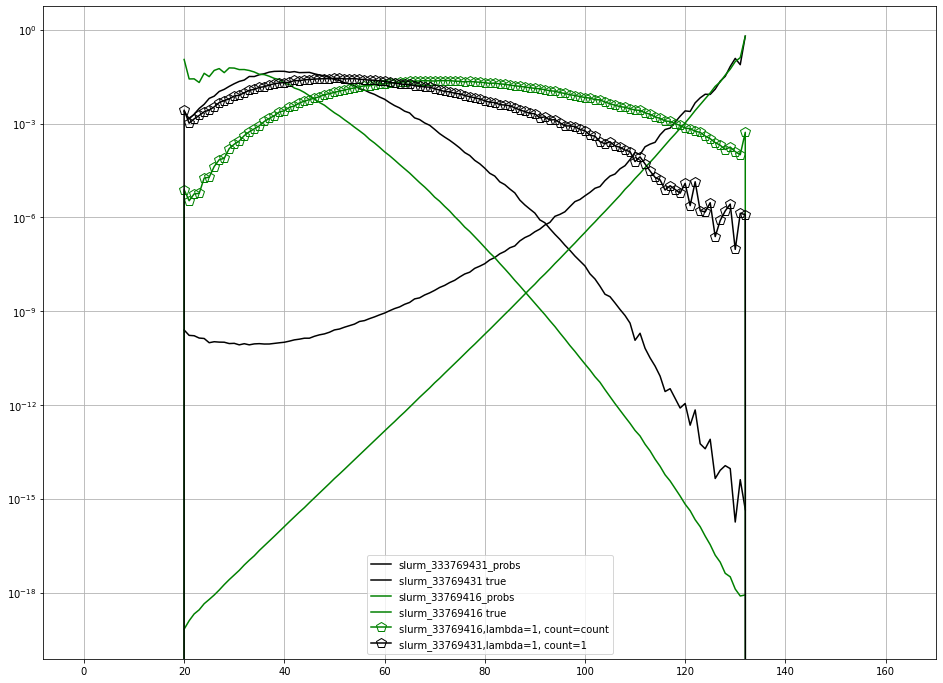

In [4039]:
slurm_33596578_urw ={42: 147417, 56: 116573, 52: 138437, 61: 85769, 36: 107834, 55: 122370, 98: 705, 76: 20005, 25: 21350, 44: 152831, 41: 142589, 51: 143115, 46: 154330, 49: 149726, 45: 153900, 33: 81441, 50: 146402, 53: 133335, 43: 150357, 38: 124329, 58: 104653, 30: 55221, 35: 100084, 34: 90958, 64: 67833, 47: 153638, 72: 31848, 40: 136956, 74: 25264, 57: 110182, 80: 12235, 37: 117137, 48: 151855, 54: 128599, 78: 15941, 63: 73836, 39: 130955, 29: 47238, 59: 97954, 65: 61944, 60: 91366, 28: 39536, 75: 22460, 27: 32610, 62: 79137, 32:72942, 31: 63636, 85: 6119, 66: 57250, 68: 47484, 67: 52313, 70: 39349, 26: 26842, 82: 9427, 19: 3532, 79: 13972, 73: 28460, 71: 35274, 69: 43207, 86:5397, 83: 8316, 23: 12753, 87: 4656, 81: 10716, 89: 3427, 17: 1458, 22: 9684, 77: 17947, 93: 1792, 20: 5095, 16: 976, 92: 2088, 96: 1014, 84: 7033, 21: 7032, 99: 610, 24: 16755, 90: 2835, 105: 209, 88: 3972, 18: 2300, 91: 2397, 110: 59, 97: 876, 15: 550, 94: 1505, 103: 287, 95: 1193, 102: 337, 104: 216, 109: 63, 106: 147, 14: 323, 107: 120, 111: 42, 113: 40, 100: 497, 114: 24, 108: 115, 101: 419, 13: 190, 11: 42, 8: 8, 10: 23, 112: 43, 12: 87, 115: 15, 120: 8, 116: 13, 9: 7, 117: 15, 118: 10, 121: 3, 123: 4, 124: 1, 122: 4, 119: 4, 127: 1, 7: 1}


slurm_33596578_urw = dict(sorted(slurm_33596578_urw.items()))


slurm_33596578 = np.array([  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
       351.03125 , 345.953125, 355.240625, 358.30625 , 356.825   ,
       359.9     , 359.596875, 360.728125, 361.28125 , 362.2     ,
       361.828125, 362.578125, 363.221875, 363.36875 , 363.7625  ,
       363.915625, 364.0625  , 364.315625, 364.490625, 364.559375,
       364.90625 , 365.03125 , 365.19375 , 365.31875 , 365.434375,
       365.446875, 365.528125, 365.696875, 365.746875, 365.78125 ,
       365.821875, 365.88125 , 365.90625 , 365.91875 , 365.95    ,
       365.921875, 365.9125  , 365.975   , 365.975   , 365.9625  ,
       365.88125 , 365.8625  , 365.83125 , 365.790625, 365.74375 ,
       365.715625, 365.609375, 365.634375, 365.55625 , 365.55625 ,
       365.38125 , 365.253125, 365.334375, 365.09375 , 365.1625  ,
       365.0125  , 364.828125, 364.80625 , 364.678125, 364.596875,
       364.59375 , 364.5     , 364.35625 , 364.184375, 364.003125,
       363.840625, 363.890625, 363.871875, 363.646875, 363.2375  ,
       363.365625, 363.2     , 363.065625, 362.903125, 362.76875 ,
       362.815625, 362.35625 , 362.1     , 362.071875, 361.6875  ,
       360.396875, 361.2125  , 361.121875, 361.115625, 360.25625 ,
       359.984375, 359.128125, 359.24375 , 359.584375, 358.50625 ,
       357.553125, 358.553125, 356.925   , 355.553125, 355.215625,
       355.55    , 354.16875 , 351.846875, 353.5125  , 351.109375,
       349.690625, 349.403125, 355.928125,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ])


slurm_33634681_urw = {81: 90408, 53: 59976, 39: 10630, 66: 104074, 47: 34329, 57: 76919,70: 106360, 83: 85105, 91: 58536, 74: 104719, 90: 62277, 89: 65891, 92: 55317, 55: 68026, 80: 92800, 56: 72784, 54: 64216, 73: 105522, 51: 50479, 64: 99854, 86: 74951, 69: 107008, 109: 14177, 88: 68363, 50: 46575, 65: 101664, 98: 37182, 84: 81672, 82: 87559, 93: 52109, 58: 81163, 68: 106117, 95: 45757, 71: 106981, 75: 103323, 79: 95879, 60: 88178, 61: 91261, 77: 99567, 72: 106502, 103: 25107, 78: 98102, 85: 78015, 42: 17443, 63: 97014, 76: 101444, 94: 48719, 67: 105436, 45: 26831, 105: 20793, 87: 72365, 62: 94054, 111: 11339, 106: 19037, 112: 10224, 52: 55220, 44: 23598, 118: 4923, 99: 34503, 110: 12841, 97: 40050, 40: 12581, 59: 84713, 100: 31465, 101: 29673, 96: 42830, 116: 6473, 46: 30146, 48: 37953, 43: 20235, 124: 2036, 104: 23043, 49: 42227, 102: 27250, 113: 9023, 108: 15589, 107: 17113, 126: 1433, 115: 7268, 121: 3264, 139: 114, 37: 7243, 36: 5819, 125: 1753, 31: 1697, 119: 4338, 32: 2221, 41: 15027, 28: 687, 117: 5557, 30: 1228, 123: 2408, 132: 487, 134: 360, 120: 3656, 24: 139, 38: 8706, 114: 8162, 127: 1217, 33: 2744, 35: 4778, 26: 342, 29: 946, 34: 3771, 122: 2740, 130: 744, 140: 95, 141: 63, 25: 215, 21: 28, 131: 622, 128: 1034, 27: 454, 129: 943, 135: 279, 148: 4, 142: 55, 137: 167, 133: 415, 23: 91, 22: 47, 138: 159, 19: 15, 143: 28, 136: 184, 144: 25, 147: 12, 145: 13, 149: 6, 20: 16, 146: 15, 18: 11, 150: 5, 151: 3, 15: 1, 17: 3, 155: 1, 153: 1}

slurm_33634681_urw = dict(sorted(slurm_33634681_urw.items()))

# slurm_33596791_urw

slurm_33634681 = np.array([   0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       , 2713.5703125, 2710.8828125,
       2711.71875  , 2711.9921875, 2712.78125  , 2712.5078125,
       2713.109375 , 2713.640625 , 2713.6796875, 2714.1015625,
       2714.359375 , 2714.5      , 2714.8359375, 2715.1328125,
       2715.203125 , 2715.421875 , 2715.296875 , 2715.609375 ,
       2715.796875 , 2715.875    , 2715.9296875, 2716.2578125,
       2716.2578125, 2716.265625 , 2716.359375 , 2716.515625 ,
       2716.421875 , 2716.609375 , 2716.6875   , 2716.765625 ,
       2716.6328125, 2716.640625 , 2716.828125 , 2716.8203125,
       2716.8984375, 2716.8515625, 2716.8125   , 2716.9375   ,
       2716.828125 , 2716.7890625, 2716.9140625, 2716.90625  ,
       2716.8828125, 2716.859375 , 2716.984375 , 2717.       ,
       2716.828125 , 2716.75     , 2716.7578125, 2716.6953125,
       2716.5859375, 2716.734375 , 2716.6640625, 2716.546875 ,
       2716.625    , 2716.59375  , 2716.4765625, 2716.4609375,
       2716.34375  , 2716.3203125, 2716.375    , 2716.125    ,
       2716.1796875, 2716.0546875, 2716.015625 , 2715.9765625,
       2715.7421875, 2715.6328125, 2715.7734375, 2715.5859375,
       2715.53125  , 2715.7109375, 2715.34375  , 2715.3984375,
       2715.234375 , 2714.84375  , 2714.9453125, 2714.6875   ,
       2714.75     , 2714.6171875, 2714.8203125, 2714.3125   ,
       2714.0703125, 2713.5703125, 2713.8359375, 2713.328125 ,
       2713.015625 , 2713.703125 , 2713.40625  , 2712.828125 ,
       2712.4453125, 2712.203125 , 2712.7109375, 2711.21875  ,
       2711.171875 , 2710.96875  , 2710.6875   , 2710.1171875,
       2711.0703125, 2710.2265625, 2709.8125   , 2708.421875 ,
       2705.3046875, 2707.3671875, 2707.15625  , 2699.875    ,
       2700.390625 , 2704.046875 , 2703.8515625, 2698.3125   ,
       2698.7890625, 2698.15625  , 2703.4140625,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ,    0.       ,
          0.       ,    0.       ,    0.       ])


slurm_33666989 = np.array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       49.993125  , 49.10945312, 49.41984375, 49.629375  , 49.89859375,
       50.0703125 , 50.3409375 , 50.59398437, 50.741875  , 50.96210937,
       51.16148437, 51.29757812, 51.45570312, 51.63164062, 51.77148437,
       51.88945312, 52.01671875, 52.13664062, 52.23945312, 52.3390625 ,
       52.44554687, 52.53164062, 52.62796875, 52.68953125, 52.75796875,
       52.835     , 52.88851562, 52.96179687, 53.0096875 , 53.02328125,
       53.09242187, 53.12632812, 53.17078125, 53.19625   , 53.2109375 ,
       53.21960937, 53.2525    , 53.258125  , 53.26757812, 53.26921875,
       53.27828125, 53.28      , 53.27515625, 53.26632812, 53.27      ,
       53.25      , 53.24664062, 53.21070312, 53.183125  , 53.15742187,
       53.131875  , 53.1115625 , 53.08109375, 53.0425    , 53.00648437,
       52.96476562, 52.92851562, 52.88109375, 52.84320312, 52.78710937,
       52.73296875, 52.68828125, 52.6128125 , 52.54929687, 52.48875   ,
       52.42835937, 52.37015625, 52.28023437, 52.2071875 , 52.1403125 ,
       52.08320312, 51.99117187, 51.90375   , 51.82304687, 51.72820312,
       51.64539062, 51.53226562, 51.43570312, 51.37890625, 51.2540625 ,
       51.12492187, 51.06460937, 50.90398437, 50.7925    , 50.68742187,
       50.58789062, 50.43671875, 50.34648437, 50.17679687, 50.04      ,
       49.85601562, 49.7334375 , 49.60617187, 49.46234375, 49.30132812,
       49.0740625 , 48.8909375 , 48.84265625, 48.725625  , 48.34195312,
       48.12710937, 47.97234375, 47.74382812, 47.3028125 , 47.34882812,
       47.0096875 , 46.75585937, 46.06921875, 46.46085937, 46.03085937,
       46.14109375, 45.49164062, 46.876875  ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])




tmp = np.array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        , 7618.33081055, 7617.43017578,
       7617.67114258, 7617.98950195, 7618.19824219, 7618.41650391,
       7618.79980469, 7618.86523438, 7619.12988281, 7619.23120117,
       7619.51538086, 7619.65429688, 7619.81713867, 7619.97021484,
       7620.12915039, 7620.24194336, 7620.35058594, 7620.47680664,
       7620.5402832 , 7620.66552734, 7620.74145508, 7620.84887695,
       7620.94580078, 7621.01367188, 7621.09350586, 7621.13891602,
       7621.19824219, 7621.28173828, 7621.31323242, 7621.36523438,
       7621.42822266, 7621.4375    , 7621.47192383, 7621.49462891,
       7621.5324707 , 7621.55200195, 7621.56835938, 7621.56884766,
       7621.58227539, 7621.57763672, 7621.59692383, 7621.57202148,
       7621.60424805, 7621.58349609, 7621.58496094, 7621.53735352,
       7621.55541992, 7621.51293945, 7621.50415039, 7621.50292969,
       7621.46337891, 7621.45117188, 7621.3972168 , 7621.34106445,
       7621.34521484, 7621.27832031, 7621.21777344, 7621.20385742,
       7621.14892578, 7621.08666992, 7621.07202148, 7621.04125977,
       7620.96191406, 7620.86889648, 7620.83447266, 7620.74780273,
       7620.69238281, 7620.61791992, 7620.57958984, 7620.44506836,
       7620.35986328, 7620.30419922, 7620.28027344, 7620.18115234,
       7620.04736328, 7619.99169922, 7619.79711914, 7619.77734375,
       7619.73120117, 7619.55541992, 7619.47143555, 7619.34301758,
       7619.30615234, 7619.08056641, 7618.9519043 , 7618.93115234,
       7618.76757812, 7618.61450195, 7618.4765625 , 7618.38842773,
       7618.32324219, 7618.14477539, 7617.85742188, 7617.92456055,
       7617.65527344, 7617.48193359, 7617.34667969, 7617.36669922,
       7616.95605469, 7616.68383789, 7616.50463867, 7616.18994141,
       7616.37353516, 7615.65063477, 7616.18334961, 7615.58129883,
       7615.43530273, 7615.13549805, 7614.45898438, 7614.69018555,
       7614.48217773, 7613.75048828, 7615.08374023,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ])




tmp_urw = {62: 180714, 65: 194928, 76: 196331, 77: 192223, 70: 204429, 64: 191021, 81: 172998, 58: 154761, 88: 130880, 78: 187496, 90: 118058, 53: 113802, 102: 52178, 57: 147140, 110: 24460, 71: 204602, 96: 82597, 68: 202852, 73: 201855, 75: 198683, 74: 200715, 72: 204330, 92: 106389, 80: 177775, 79: 184147, 97: 76445, 93: 100059, 54: 123322, 83: 161956, 66: 198535, 55: 131276, 85: 149439, 82: 167760, 56: 139189, 41: 29049, 69: 204526, 61: 175576, 104: 43562, 95: 87523, 48: 72716, 47: 65891, 44: 45214, 36: 11335, 86: 143980, 51: 97723, 60: 169340, 89: 125227, 84: 156083, 59: 162485, 46: 58305, 91: 112498, 50: 88597, 103: 48333, 34: 7187, 52: 106141, 42: 33758, 87: 137068, 117: 10593, 43: 39114, 63: 186371, 108: 29930, 67: 201055, 98: 71288, 94: 93524, 45: 51506, 49: 81295, 38: 16568, 106: 36246, 33: 5507, 113: 17379, 122: 5223, 114: 15634, 101: 56557, 40: 24426, 107: 33126, 105: 40118, 39: 20465, 100: 61247, 99: 65796, 112: 19704, 119: 8151, 25: 430, 35: 8815, 30: 2371, 120: 7084, 31: 3224, 115: 13745, 118: 9419, 128: 2099, 116: 12184, 111: 21633, 37: 13951, 126: 2856, 121: 6163, 109: 27153, 29: 1823, 137: 332, 127: 2368, 136: 410, 125: 3263, 123: 4616, 28: 1329, 130: 1443, 124: 4012, 32: 4231, 132: 950, 139: 210, 135: 541, 134: 651, 148: 12, 129: 1700, 155: 2, 131: 1085, 138: 249, 27: 883, 133: 794, 145: 53, 24: 290, 141: 137, 26: 612, 149: 14, 144: 60, 23: 192, 140: 157, 21: 71, 22: 112, 19: 21, 143: 76, 146: 29, 147: 12, 142: 80, 18: 12, 17: 7, 20: 49, 16: 5, 154: 5, 151: 6, 150: 4, 15: 2, 152: 1}

tmp_urw = dict(sorted(tmp_urw.items()))


slurm_33666989_urw = {80: 296445, 59: 269368, 69: 338999, 50: 148269, 63: 310307, 96: 137043, 65: 323100, 125: 5604, 81: 287436, 75: 329338, 73: 336196, 56: 230771, 49: 133878, 68: 336934, 84: 259380, 64: 317299, 97: 127212, 66: 330238, 70: 340143, 46: 96728, 82: 278647, 79: 303310, 78: 311435, 54: 203465, 112: 32434, 90: 196695, 55: 217579, 51: 162005, 34: 11665, 60: 281083, 48: 120922,104: 73336, 45: 85102, 94: 155533, 77: 318244, 86: 239126, 76: 324338, 52: 175702, 58: 257775, 74: 334413, 71: 339995, 41: 47950, 83: 268300, 61: 291117, 93: 165525, 67: 333041, 85: 248382, 89: 208159, 107: 54951, 99: 109609, 44: 74940, 119: 13719, 98: 118344, 88: 218430, 108: 50135, 62: 300990, 92: 176394, 91: 186310, 43: 65328, 39: 34003, 101: 94215, 53: 190508, 106: 60455, 72: 339271, 47: 108215, 29: 2856, 87: 228766, 100: 101628, 95: 146062, 57: 244900, 35: 14848, 109: 45350, 102: 86340, 121: 10195, 42: 55940, 116: 20381, 103: 79479, 105: 66399, 36: 18806, 117: 17819, 133: 1306, 123: 7601, 115: 22971, 110: 41024, 111: 36244, 33: 9110, 131: 1944, 122: 8911, 37: 22983, 134: 1062, 30: 4068, 40: 40296, 114: 25755, 128: 3348, 113: 28715, 31: 5338, 139: 327, 118: 15612, 38: 28419, 124: 6468, 120: 11835, 27: 1469, 127: 3986, 32: 7049, 126: 4828, 137: 536, 130: 2268, 129: 2773, 132: 1519, 135: 813, 25: 724, 28: 1996, 23: 296, 141: 203, 26: 1016, 142: 149, 136: 597, 22: 214, 140: 268, 144: 89, 138: 415, 24: 476, 21: 120, 146: 36, 143: 122, 20: 73, 148: 30, 149: 13, 147: 38, 16: 6, 18: 24, 19: 50, 145: 67, 153: 3, 17: 11, 152: 6, 150: 16, 151: 8, 157: 1, 15: 2, 155: 1, 154: 1, 156: 1, 158: 1, 159: 1}

slurm_33666989_urw = dict(sorted(slurm_33666989_urw.items()))



slurm_33769416 = np.array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       288.40234375, 287.58984375, 288.09570313, 288.13046875,
       289.25898438, 289.32382813, 290.10898438, 290.61328125,
       290.7125    , 291.43125   , 291.753125  , 291.98828125,
       292.38515625, 292.66757813, 292.884375  , 293.10351563,
       293.43007813, 293.65273438, 293.84882813, 294.12734375,
       294.21484375, 294.46914063, 294.56679688, 294.78671875,
       294.92265625, 295.03945313, 295.14804688, 295.24804688,
       295.40078125, 295.47578125, 295.56640625, 295.67070313,
       295.73710938, 295.834375  , 295.89609375, 295.98125   ,
       296.05507813, 296.059375  , 296.13984375, 296.17695313,
       296.2046875 , 296.26210938, 296.28476563, 296.3140625 ,
       296.34375   , 296.38125   , 296.40195313, 296.40976563,
       296.4328125 , 296.42265625, 296.40585938, 296.4375    ,
       296.43046875, 296.43945313, 296.39765625, 296.38359375,
       296.3390625 , 296.375     , 296.34179688, 296.31835938,
       296.28515625, 296.23359375, 296.25234375, 296.19453125,
       296.16640625, 296.11289063, 296.05429688, 296.01679688,
       295.9671875 , 295.925     , 295.86484375, 295.83203125,
       295.7671875 , 295.68945313, 295.65820313, 295.55351563,
       295.490625  , 295.39726563, 295.3390625 , 295.26523438,
       295.19179688, 295.15      , 295.03164063, 295.01953125,
       294.85507813, 294.73984375, 294.62265625, 294.51914063,
       294.47304688, 294.365625  , 294.26914063, 294.24335938,
       294.06171875, 293.96210938, 293.75546875, 293.66015625,
       293.45703125, 293.4328125 , 293.26875   , 293.1359375 ,
       292.93085938, 292.89765625, 292.70234375, 292.62539063,
       292.3546875 , 292.15976563, 291.87148438, 291.67929688,
       291.36289063, 291.54257813, 291.20390625, 290.9796875 ,
       292.62890625,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])

slurm_33769416_urw = {72: 321715, 66: 314133, 74: 317199, 92: 167174, 59: 256869, 67: 317101, 71: 322543, 65: 308188, 81: 273022, 80: 280767, 78: 295919, 57: 232289, 56: 219872, 82: 265129, 54: 193275, 89: 196614, 64: 301045, 101: 89418, 46: 92257, 85: 237407, 79: 288630, 45: 80873, 86: 226099, 61: 276809, 83: 256099, 47: 103703, 75: 312372, 68: 320216, 70: 322946, 38: 26674, 90: 186514,76: 307742, 87: 216886, 104: 68915, 49: 127580, 53: 180245, 69: 322509, 58: 245023, 44: 71159, 88: 207747, 103: 75707, 60: 266516, 42: 52985, 111: 34564, 62: 287000, 105: 63553, 50: 140944, 91: 176811, 93: 157813, 77: 302769, 73: 320822, 120: 11206, 63: 293990, 55: 206849, 40: 38481, 100: 96644, 115:21990, 99: 104402, 95: 138690, 36: 17674, 34: 11100, 84: 246650, 107: 52331, 97: 120733, 52: 166537, 96: 129800, 112: 30845, 94: 148291, 51: 154008, 48: 114899, 116: 19443, 109: 42661, 102: 82431, 43: 61875, 33: 8640, 108: 47758, 37: 21684, 98: 112968, 118: 14861, 41: 45230, 113: 27892, 106: 57231, 117: 16859, 35: 13998, 121: 9874, 32: 6685, 119: 12892, 27: 1433, 39: 32433, 28: 1944, 124: 6149, 133: 1232, 114: 24595, 110: 38471, 122: 8527, 24: 442,129: 2664, 131: 1877, 130: 2255, 138: 387, 128: 3114, 125: 5251, 126: 4433, 31: 4916, 123: 7204, 132: 1475, 26: 1021, 29: 2824, 30: 3730, 134: 975, 25: 676, 127: 3777, 144: 89, 20: 76, 139: 310, 136: 647, 23: 328, 135: 734, 141: 174, 137: 477, 142: 133, 21: 94, 22: 167, 143: 113, 140: 220, 147: 32, 145: 58, 146: 46, 19: 53, 159: 1, 149: 21, 17: 16, 16: 9, 150: 8, 15: 3, 148: 30, 151: 6, 18: 17, 155: 1, 14: 1, 152: 3, 156: 1, 160: 1}
slurm_33769416_urw = dict(sorted(slurm_33769416_urw.items()))
nan=np.nan

slurm_33769416_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.4947088634174825e-92, 1.0218790642428751e-91, 1.6825526628589707e-91, 2.2794680872307094e-91, 3.5767587554463475e-91, 4.8853751808882204e-91, 6.778986184753484e-91, 9.789485132338314e-91, 1.4587464069166731e-90, 2.1073317152873105e-90, 2.9510139805168206e-90, 4.171287786360045e-90, 6.184572633488147e-90, 8.791444999805732e-90, 1.2198499802576785e-89, 1.7987920017851846e-89, 2.5479690841525446e-89, 3.604448569640255e-89, 5.131154960087859e-89, 7.367060650869889e-89, 1.0624177826478338e-88, 1.5029791921686031e-88, 2.1373061348251677e-88, 3.0298343693934633e-88, 4.2241973472235446e-88, 6.088963675746915e-88, 8.66121865562098e-88, 1.2232988170810486e-87, 1.743380653581891e-87, 2.4990903312756804e-87, 3.5930041158795808e-87,5.02374374800479e-87, 7.109136443062641e-87, 1.0175274280399657e-86, 1.4418222738476372e-86, 2.05148872703625e-86, 2.922986671597974e-86, 4.1453782193266136e-86, 5.9059368499389095e-86, 8.37784011821933e-86, 1.2017678583755518e-85, 1.6934221811404917e-85, 2.3814175279245172e-85, 3.416067522485795e-85, 4.797945164667319e-85, 6.858749724601157e-85, 9.902092109375701e-85, 1.4266593444664836e-84, 2.0173273403669613e-84, 2.8436733811343687e-84, 4.141020663155811e-84, 5.796975411997341e-84, 8.370255956921887e-84, 1.192864102465261e-83, 1.718745805218317e-83, 2.439994890431589e-83, 3.508603882916669e-83, 5.04765596112557e-83, 7.140153373935268e-83, 1.030370535618484e-82, 1.481514573515834e-82, 2.1136249571978694e-82, 3.061947453123597e-82, 4.425313102678364e-82, 6.407293568410158e-82, 9.179854706129688e-82, 1.3373059648817346e-81, 1.9309873812404647e-81, 2.8151071353093224e-81, 4.1314782483779416e-81, 5.906732056160761e-81, 8.788697764062456e-81, 1.249699738584442e-80, 1.8153939655824653e-80, 2.694200342138087e-80, 3.8976555042187646e-80, 5.741722667353759e-80, 8.423228897934246e-80, 1.225392322438889e-79, 1.8211164367754895e-79, 2.6676437478218196e-79, 3.9806387918437353e-79, 5.792971546300038e-79, 8.64291236558765e-79, 1.2601255352450453e-78, 1.8752987953830242e-78, 2.7909432065964754e-78, 4.112259946734239e-78, 6.387270657153779e-78, 9.24842017003154e-78, 1.4149190680080698e-77, 2.076261074430506e-77, 3.1702307993754546e-77, 4.68928353388564e-77, 7.022528999526439e-77, 1.0807362884996919e-76, 1.651372389615645e-76, 2.5270410716916592e-76, 3.761179367706661e-76, 5.711244203886887e-76, 8.457881835245787e-76, 1.324055907684379e-75, 2.1167571737574713e-75, 3.2690650297841354e-75, 4.985847988735115e-75, 7.719451387774176e-75, 1.2537086819409761e-74, 1.7327902842400367e-74, 2.8685456890924527e-74, 4.4421427481160984e-74, 7.7926264430291e-74, 1.0385748115296307e-73, 5.0056598929795957e-73, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

slurm_33769416_probs = [el/np.nansum(slurm_33769416_probs) for el in slurm_33769416_probs]


slurm_33769431 = np.array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       402.7046875 , 401.74375   , 402.06171875, 402.3125    ,
       402.58671875, 402.709375  , 402.94765625, 403.26484375,
       403.41328125, 403.534375  , 403.746875  , 403.8046875 ,
       403.9890625 , 404.16875   , 404.23359375, 404.3828125 ,
       404.43203125, 404.553125  , 404.653125  , 404.703125  ,
       404.7390625 , 404.75      , 404.89296875, 404.86796875,
       404.9453125 , 404.959375  , 404.9953125 , 405.0125    ,
       405.025     , 405.02109375, 405.0453125 , 405.0484375 ,
       405.00546875, 405.0140625 , 405.0328125 , 404.98046875,
       404.95390625, 404.915625  , 404.90859375, 404.86328125,
       404.83203125, 404.7546875 , 404.6953125 , 404.64609375,
       404.59921875, 404.6046875 , 404.50234375, 404.45625   ,
       404.41796875, 404.40234375, 404.28671875, 404.184375  ,
       404.08203125, 404.05546875, 403.95      , 403.90625   ,
       403.78359375, 403.7015625 , 403.62421875, 403.53515625,
       403.38984375, 403.29296875, 403.265625  , 403.1125    ,
       403.08359375, 403.03046875, 402.87890625, 402.71953125,
       402.60859375, 402.4703125 , 402.43671875, 402.1328125 ,
       402.21875   , 401.97421875, 402.01171875, 401.778125  ,
       401.54453125, 401.54453125, 401.49375   , 401.28359375,
       401.19140625, 400.8625    , 400.78828125, 400.38203125,
       400.22734375, 400.37890625, 400.0703125 , 399.97421875,
       399.7609375 , 399.65546875, 398.9203125 , 399.26484375,
       398.7390625 , 398.225     , 397.75703125, 397.56953125,
       396.825     , 397.13984375, 396.8609375 , 396.590625  ,
       397.3171875 , 395.675     , 397.43359375, 395.3078125 ,
       395.2078125 , 395.89140625, 393.3953125 , 394.58125   ,
       395.2828125 , 395.790625  , 392.453125  , 395.109375  ,
       395.01328125,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])


slurm_33769431_urw = {62: 290778, 58: 341842, 43: 344459, 60: 316474, 44: 356471, 47: 382560, 64: 264331, 42: 331299, 46: 377036, 69: 196221, 52: 388384, 53: 383439, 65: 250692, 40: 298957, 48: 386581, 68: 209541, 83: 63444, 59: 328556, 61: 304222, 54: 377612, 41: 315812, 24: 35204, 81: 76366, 97: 13517, 49: 390219, 33: 163439, 67: 223592, 50: 391556, 75: 127422, 76: 117893, 38: 261971, 37: 242006, 63: 277695, 71: 172155, 27: 66460, 25: 43960, 30: 109493, 85: 51884, 90: 30829, 34: 182564, 31: 125992, 45: 367473, 57: 351089, 32: 144488, 66: 236941, 55: 369945, 92: 24665, 51: 391577, 39: 280280, 72: 160694, 36: 223750, 56: 361543, 35: 202146, 21: 15944, 74: 137275, 26: 54127, 73: 148964, 29: 94225, 77: 108188, 78: 99551, 95: 17294, 79: 90901, 113: 1383, 80: 83631, 91: 27535, 70: 184582, 89: 34337, 99: 10595, 112: 1677, 84: 57622, 87: 42240, 107: 3476, 86: 47518, 108: 2966, 20: 11686, 14: 1165, 103: 6041, 82: 69394, 98: 11817, 23: 27518, 88: 37856, 18: 5958, 110: 2241, 28: 79640, 96: 15370, 22: 21248, 94: 19628, 19: 8644, 101: 7881, 93: 22194, 118: 560, 102: 7140, 17: 4226, 100: 9100, 117: 661, 104: 5258, 105: 4775, 15: 1850, 106: 4052, 114: 1188, 12: 409, 109: 2566, 115: 1000, 16: 2806, 111: 1895, 10: 110, 120: 400, 125: 145, 133: 24, 116: 776, 124: 182, 131: 40, 126: 103, 13: 734, 119: 509, 136: 15, 128: 77, 123: 221, 121: 335, 127: 109, 129: 66, 8: 27, 134: 14, 11: 246, 9: 52, 122: 282, 7: 15, 135: 14, 132: 25, 138: 7, 137: 7, 6: 3, 130: 43, 140: 3, 150: 1, 148: 1, 147: 1, 139: 4, 5: 1, 141: 4, 143: 2, 146: 1, 144: 1}

slurm_33769431_urw = dict(sorted(slurm_33769431_urw.items()))
nan=np.nan
slurm_333769431_probs = np.array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.936385441558805e-84, 3.9980072240737494e-84, 3.894157498866803e-84, 3.2836637152347026e-84, 3.176712751618253e-84, 2.3272918051013574e-84, 2.504078257769568e-84, 2.432252515377411e-84, 2.415340529383046e-84, 2.1872757007631554e-84, 2.225887131926587e-84, 1.9895924945625792e-84, 2.164506404857596e-84, 1.9907073957460907e-84, 2.1347712765352024e-84, 2.1738717233065863e-84, 2.112475174613558e-84, 2.1187782018073825e-84, 2.218696662454464e-84, 2.314709389185066e-84, 2.4096189201670438e-84, 2.612068967823497e-84, 2.8706690019512486e-84, 3.021897242109263e-84, 3.244479237555604e-84, 3.2460750678552207e-84, 3.7362263638830443e-84, 4.153944122835312e-84, 4.458019746131883e-84, 5.0323083621130115e-84, 5.971111169877966e-84, 6.38295004613879e-84, 7.293903401729523e-84, 8.163641112541267e-84, 9.1686684636695e-84, 1.1126129628696855e-83, 1.1863073093519625e-83, 1.3722054229824149e-83, 1.5589824604002213e-83, 1.8068504534284676e-83, 2.0641169061275303e-83, 2.4487751570820212e-83, 2.8748878608855703e-83, 3.248346920117663e-83, 3.933633271252254e-83, 4.509537242866175e-83, 5.860005361530982e-83, 6.339894458267501e-83, 7.819640503782914e-83, 9.126032105888013e-83, 1.1000030604700425e-82, 1.3618773855071033e-82, 1.585640513991535e-82, 1.954318313807647e-82, 2.3059204616284353e-82, 2.9457152667033e-82, 3.667796682463874e-82, 4.190434723781652e-82, 5.562884377243084e-82, 6.526353679566796e-82, 7.830170125534719e-82, 1.0347196740084954e-81, 1.2338968347656375e-81, 1.6227402152654237e-81, 1.9330332710521617e-81, 2.5246497433735793e-81, 2.8914427620204802e-81, 4.186061094639944e-81, 5.355498016510491e-81, 6.32733961686095e-81, 8.208192499767732e-81, 1.0023158556250782e-80, 1.350474419802012e-80, 1.6376635621495796e-80, 2.561909099582327e-80, 2.9551920222396284e-80, 3.580212501024374e-80, 5.239652857147078e-80, 7.571615584671142e-80, 8.852352214615911e-80, 1.1605762112550996e-79, 1.4952112133963915e-79, 2.0240576203001613e-79,2.2994702501241103e-79, 3.5534423090216484e-79, 4.9617788986230556e-79, 5.774040052702699e-79, 8.467537810632965e-79, 1.0681562985133887e-78, 1.6829811669474438e-78, 2.8597950188060816e-78, 2.407296632861639e-78, 4.2984295936125863e-78, 5.21761957799407e-78, 5.971062866825456e-78, 1.0362488645908808e-77, 1.5309751941211435e-77, 1.703093578993139e-77, 2.6418475757778674e-77, 4.074850895576826e-77, 6.0350313730433536e-77, 5.785958829480753e-77, 1.0914606456094983e-76, 1.5752753200752696e-76, 2.0554540570993973e-76, 2.026768762373142e-76, 2.9940239986671954e-76, 5.36663896601713e-76, 7.686117556893777e-76, 1.587762920001144e-75, 2.8838212583887345e-75, 1.8110227930110676e-75, 1.484229131228258e-74, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
                                )
slurm_333769431_probs = [el/np.nansum(slurm_333769431_probs) for el in slurm_333769431_probs]




plt.figure(figsize=(16,12))

# plt.plot(slurm_33769431_urw.keys(), [el/sum(slurm_33769431_urw.values()) for el in slurm_33769431_urw.values()], marker='.', label='slurm_33769431_urw, lambda = 1')
plt.plot(slurm_333769431_probs, label='slurm_333769431_probs', color='black')
t = make_p(slurm_33769431)/slurm_333769431_probs
t = t/np.nansum(t)
plt.plot(t, label = 'slurm_33769431 true',color='black')

# plt.plot(slurm_33769416_urw.keys(), [el/sum(slurm_33769416_urw.values()) for el in slurm_33769416_urw.values()], marker='.', label='slurm_33769416_urw, lambda = 1')
plt.plot(slurm_33769416_probs, label='slurm_33769416_probs',color='green')
t = make_p(slurm_33769416)/slurm_33769416_probs
t = t/np.nansum(t)
plt.plot(t, label = 'slurm_33769416 true',color='green' )

# plt.plot([el if el>1*np.e**(-16) else 0.0 for el in make_p(slurm_33666989) ],  label='slurm_33666989,lambda=1', color='green', marker='p', markersize=10, markerfacecolor='None')


plt.plot([el if el>1*np.e**(-36) else 0.0 for el in make_p(slurm_33769416) ],  label='slurm_33769416,lambda=1, count=count', color='green', marker='p', markersize=10, markerfacecolor='None')
plt.plot([el if el>1*np.e**(-26) else 0.0 for el in make_p(slurm_33769431) ],  label='slurm_33769431,lambda=1, count=1', color='black', marker='p', markersize=10, markerfacecolor='None')


# plt.plot([el if el>1*np.e**(-46) else 0.0 for el in make_p(tmp) ],  label='tmp,lambda=1', color='black', marker='p', markersize=10, markerfacecolor='None')
# plt.plot(tmp_urw.keys(), [el/sum(tmp_urw.values()) for el in tmp_urw.values()], marker='.', label='tmp_urw, lambda = 1')


# plt.plot([el if el>1*np.e**(-40) else 0.0 for el in make_p(slurm_33596578) ],  label='slurm_33596578,lambda=-1', color='red', marker='p', markersize=10, markerfacecolor='None')

# plt.plot([el if el>1*np.e**(-220) else 0.0 for el in make_p(slurm_33634681) ],  label='slurm_33634681,lambda=1', color='blue', marker='p', markersize=10, markerfacecolor='None')

# plt.plot(slurm_33666989_urw.keys(), [el/sum(slurm_33666989_urw.values()) for el in slurm_33666989_urw.values()], marker='.', label='slurm_33666989_urw, lambda = 1')

# plt.plot(slurm_33596578_urw.keys(), [el/sum(slurm_33596578_urw.values()) for el in slurm_33596578_urw.values()], marker='.', label='slurm_33596578_urw, lambda = -1')
plt.yscale('log')
plt.legend()
plt.grid()
# plt.ylim(.006, .01)

plt.show()


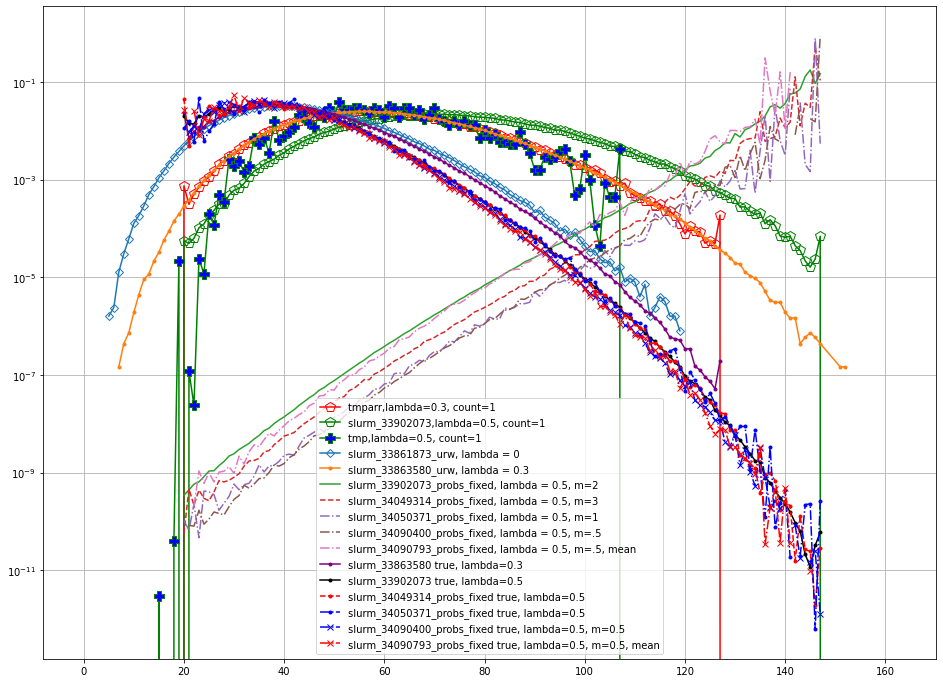

In [14]:
slurm_33830106 = np.array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  , 100.96,  99.6 ,  99.84, 100.52,
       100.58, 100.54, 100.77, 100.63, 101.31, 101.38, 101.6 , 101.68,
       101.68, 101.88, 102.04, 102.26, 102.36, 102.44, 102.37, 102.42,
       102.62, 102.58, 102.56, 102.78, 102.69, 102.86, 102.96, 102.81,
       102.87, 102.83, 102.81, 103.04, 102.93, 102.82, 102.81, 102.71,
       102.91, 102.85, 102.7 , 102.68, 102.63, 102.67, 102.68, 102.55,
       102.39, 102.32, 102.28, 102.3 , 102.13, 101.81, 102.1 , 102.09,
       101.85, 101.98, 101.77, 101.82, 101.81, 101.57, 101.53, 101.71,
       101.63, 101.26, 101.29, 101.05, 100.8 , 100.59, 100.7 , 100.65,
       100.53, 100.38, 100.43, 100.52,  99.91,  99.29, 100.04,  99.06,
        99.36,  99.29,  99.48,  99.26,  97.85,  98.53,  98.97,  97.97,
        98.32,  98.34,  98.73,  98.38,  98.22,  98.13,  97.77,  97.15,
        96.88,  93.86,  96.79,  96.17,  95.62,  91.89,  94.66,  84.8 ,
        96.36,  93.98,  90.77,  86.16,  90.13,  94.17,  92.74,  86.33,
        74.35,  93.06,  78.79,  50.43,  97.22,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ])

slurm_33830106_urw = {56: 3439, 63: 2625, 44: 3460, 68: 2000, 69: 1889, 41: 2947, 54: 3584, 42: 3201, 49: 3846, 43: 3303, 58: 3268, 57: 3277, 38: 2511, 47: 3699, 29: 898, 40: 2920, 52: 3745, 45: 3505, 61: 2970, 32: 1435, 36: 2144, 51: 3737, 50: 3747, 71: 1688, 91: 272, 55: 3474, 34: 1683, 59: 3211, 81: 708, 46: 3592, 85: 477, 65: 2462, 60: 2962, 31: 1199, 62: 2759, 73: 1418, 79: 866, 53: 3635, 80: 745, 35: 1989, 64: 2470, 48: 3612, 39: 2705, 33: 1541, 72: 1522, 78: 966, 37: 2387, 82: 675, 102: 63, 74: 1365, 67: 2122, 70: 1745, 28: 757, 24: 319, 66: 2344, 30: 1127, 77: 1036, 25: 391, 93: 211, 20: 121, 103: 57, 27: 649, 92: 249, 23: 276, 75: 1244, 96: 157, 86: 445, 110: 19, 76: 1066, 83: 577, 87: 419, 22: 230, 84: 545, 21: 150, 18: 61, 108: 25, 95: 172, 99: 102, 89: 311, 88: 363, 113: 18, 97: 118, 90: 302, 19: 87, 98: 113, 106: 30, 26: 526, 100: 90, 101: 76, 94: 180, 118: 5, 116: 9, 107: 39, 17: 31, 109: 32, 16: 30, 111: 16, 117: 4, 124: 2, 105: 37, 104: 54, 112: 12, 13: 4, 14: 12, 15: 17, 120: 2, 130: 1, 122: 2, 128: 1, 115: 10, 114: 12, 11: 1, 119: 4, 9: 3, 125: 1, 121: 3, 126: 2, 12: 3, 10: 2}

slurm_33830106_urw = dict(sorted(slurm_33830106_urw.items()))

nan=np.nan
tmp_probs1 = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2.24574879845626e-96, 9.334961380549162e-96, 7.407792652741102e-95, 1.3584233939245734e-97, 4.724538667440503e-97, 1.2483050388749163e-96, 8.942140253978724e-98, 1.01745058608084e-97, 2.1576832974155236e-97, 3.878123852652687e-97, 3.076063516190731e-97, 9.355117802140773e-99, 3.988500731391907e-99, 2.193399511259168e-98, 2.00123277052509e-98, 1.1945737908469459e-98, 4.223408751423126e-98, 3.1195116133753033e-99, 1.435455114959225e-98, 4.382068438249046e-100, 7.723821032502128e-100, 8.08993921058768e-99, 4.2061498886242815e-99, 1.0755388391683974e-99, 2.0807171503099555e-100, 8.248475669873354e-100, 3.3750592938015874e-100, 2.3990442952222053e-99, 4.54678722171967e-100, 8.485710405059272e-100, 4.919519004477809e-99, 4.931298014789435e-99, 3.9711126690861276e-100, 3.27413625435127e-100, 1.5218365332373856e-100, 1.9531425894432106e-99, 5.657905069489815e-100, 9.112547780030238e-101, 2.703498877445534e-100, 2.821445037482893e-100, 1.276246646308456e-100, 2.1995704021217503e-100, 1.0282555394567218e-100, 6.090999883762216e-100, 5.454753332647011e-100, 3.513741311250598e-101, 1.3210578530618542e-99, 5.406064912575696e-101, 7.662981719950183e-100, 4.983584785308778e-101, 1.4734686072922363e-100, 2.6551631469962266e-101, 1.1245628336924873e-99, 3.0196932907263247e-100, 3.170088678044279e-101, 3.4955427699392354e-101, 7.099454047545317e-101, 2.3941228896204864e-101, 5.323618646824379e-101, 4.165294972539913e-101, 2.4222406779780905e-101, 6.5586187953776915e-102, 9.536256136927819e-101, 2.3775465650792832e-102, 3.046848490397392e-101, 7.920308717757082e-102, 3.988635526948359e-102, 2.034365140396566e-101, 5.937975013049714e-101, 3.4723899293515925e-102, 1.3226564294945976e-101, 2.2354656670684296e-100, 1.96579425961404e-100, 2.613023436063372e-101, 3.60722507061218e-102, 4.382333667555305e-101, 3.2188694561817255e-101, 5.391635228730213e-101, 2.370783734825965e-101, nan, 1.0828294106647425e-102, 2.176503626025941e-103, 2.1139115931085416e-100, nan, 1.4242188359790404e-102, 1.2193613398535259e-101, 9.28432385513765e-103, 1.0529000262675033e-100, nan, nan, 7.494983233103675e-97, nan, nan, nan, nan, 1.2097406789801136e-95, 7.104273536675654e-101, nan, nan, nan, nan, nan, 1.2774216261443335e-100, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

tmp_probs1 = [el/np.nansum(tmp_probs1) for el in tmp_probs1]

tmp_probs2 = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.9222014740220294e-96, 5.373496340563468e-97, 5.156504538237858e-97, 2.9415663251213403e-97, 3.027258285481217e-97, 1.7607711566905266e-97, 1.7842715531808467e-97, 1.2024431299150764e-97, 8.819859063840333e-98, 5.057836502032269e-98, 4.9705953589537404e-98, 3.245748065501166e-98, 3.120097588052772e-98, 2.05688921806146e-98, 1.759822205657949e-98, 1.4637876148283753e-98, 1.1394529495794129e-98, 9.31533226425381e-99, 7.405783456945764e-99, 5.893080720548751e-99, 5.024761392922426e-99, 4.047459978210071e-99, 3.673234517454728e-99, 2.4152031104612825e-99, 2.044115682571637e-99, 1.9785617385395537e-99, 1.689974404529507e-99, 1.4524848106153968e-99, 1.3294610252264456e-99, 1.0380933347188687e-99, 9.118503455363146e-100, 7.464570100198321e-100, 6.735879983369886e-100, 5.155371873118934e-100, 5.311422445404121e-100, 4.347954654184889e-100, 3.776094843016788e-100, 3.248298830584277e-100, 3.070044990872283e-100, 2.6096046204388487e-100, 2.34935906709315e-100, 2.047859207440363e-100, 1.7524832874292024e-100, 1.6223568031378608e-100, 1.5434188742069227e-100, 1.3116001364794662e-100, 1.210682832844201e-100, 1.0334370372800799e-100, 9.875328022820773e-101, 9.414760591470439e-101, 7.717538745802876e-101, 7.069011432027124e-101, 6.862262465830251e-101, 7.073773292002978e-101, 6.27268227109909e-101, 6.073591805827628e-101, 5.841047662222865e-101, 4.677249248650959e-101, 4.055762593604968e-101, 3.424115112904643e-101, 3.671478345885396e-101, 3.4302733529689225e-101, 3.0068735296494394e-101, 3.132691095538177e-101, 2.9452119081080667e-101, 3.058920607292174e-101, 2.4890638349165263e-101, 2.4871572250472946e-101, 2.3700812803364376e-101, 2.467126551027694e-101, 2.126240678280208e-101, 2.3605542847514342e-101, 2.5028869964214547e-101, 1.8052788980267176e-101, 2.243434450761953e-101, 1.8962530000879845e-101, 2.0405237062040578e-101, 2.016114413399995e-101, 2.362769320043774e-101, 1.542117978270469e-101, 1.2992151254614606e-101, 1.3432445419996342e-101, 1.778131477773069e-101, 1.5190027883849778e-101, 1.5715058989459954e-101, 1.1469489632398459e-101, 1.8939789027540016e-101, 1.6315136673075946e-101, 1.882849997617867e-101, 2.2257552333378733e-101, 2.3083581752619016e-101, 2.0980986511248087e-101, 1.009411924713892e-101, 1.6877425717953865e-101, 6.061406243535299e-102, 7.512815629747156e-102, 2.0531468863461913e-101, 8.543690545723149e-102, 5.450132265323335e-102, 1.5951972444352232e-101, 2.5420496626775964e-101, 8.093345715424946e-102, 2.469677649851822e-101, 1.7083459110094693e-100, 4.342520480461437e-101, 6.532041572322022e-101, 7.554232848581396e-102, 3.164362444843389e-100, 9.62987618256711e-102, 8.638655345434727e-101, 2.3313309779690725e-102, 1.4034276836016044e-101, 3.453070890028283e-101, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
tmp_probs2 = [el/np.nansum(tmp_probs2) for el in tmp_probs2]


t = make_p(slurm_33830106)*tmp_probs2
t = t/np.nansum(t)


slurm_33862224 = np.array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    , 170.4758, 170.4781,
       171.2409, 171.8035, 172.1797, 172.5101, 173.0222, 173.469 ,
       173.7802, 174.0227, 174.3683, 174.6407, 174.8465, 175.1256,
       175.2712, 175.5479, 175.6903, 175.878 , 176.0141, 176.1388,
       176.2882, 176.3759, 176.5024, 176.577 , 176.6579, 176.7234,
       176.7802, 176.8433, 176.8823, 176.9314, 176.9665, 176.9933,
       176.991 , 177.0174, 177.0078, 177.0169, 177.0248, 177.0119,
       177.0037, 176.9721, 176.9438, 176.9017, 176.8904, 176.8382,
       176.7979, 176.7596, 176.7136, 176.6493, 176.5999, 176.5104,
       176.4537, 176.3803, 176.3013, 176.2761, 176.1746, 176.1104,
       176.0137, 175.9144, 175.853 , 175.7577, 175.6811, 175.5838,
       175.4818, 175.4204, 175.2793, 175.1646, 175.0427, 174.9737,
       174.8282, 174.7997, 174.6237, 174.5431, 174.392 , 174.2905,
       174.1659, 174.0061, 173.9503, 173.8025, 173.6552, 173.4791,
       173.366 , 173.2352, 173.0809, 172.9721, 172.9466, 172.6609,
       172.4619, 172.2701, 172.091 , 171.9782, 171.8594, 171.6977,
       171.6482, 171.3625, 171.1543, 171.2104, 170.7904, 172.4251,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ])


slurm_33862224_urw = {33: 10719, 60: 9477, 50: 15385, 67: 5619, 28: 6060, 44: 16509, 57: 11419, 52: 14480, 66: 6042, 39: 15103, 36: 13228, 49: 15707, 69: 4786, 54: 13137, 38: 14813, 27: 5196, 92: 329, 53: 13851, 40: 15853, 48: 16001, 41: 16010, 45: 16729, 16: 350, 84: 938, 63: 7750, 65: 6643, 26: 4404, 56: 11933, 61: 8953, 35: 12448, 58: 10806, 62: 8224, 37: 14216, 47: 16298, 68: 5170, 34: 11487, 43: 16399, 18: 651, 86: 758, 51: 14841, 46: 16615, 73: 3248, 32: 9918, 42: 16191, 79: 1768, 59: 10060, 30: 7789, 55: 12556, 64: 7228, 88: 576, 74: 3049, 78: 1916, 70: 4371, 80: 1540, 31: 8891, 15: 195, 71: 3975, 20: 1221, 25: 3736, 29: 6850, 77: 2159, 83: 1070, 24: 3069, 81: 1383, 91: 416, 97: 177, 72: 3493, 12: 51, 76: 2404, 23: 2486, 99: 145, 22: 1940, 21: 1569, 19: 911, 75: 2632, 94: 246, 87: 642, 90: 449, 95: 219, 104: 49, 102: 66, 82: 1294, 112: 20, 98: 133, 13: 91, 85: 859, 17: 439, 100: 111, 111: 13, 89: 508, 93: 295, 107: 41, 105: 47, 108: 35, 101: 91, 117: 6, 9: 9, 96: 205, 11: 36, 14: 139, 126: 1, 113: 15, 106: 30, 103: 59, 110: 16, 115: 12, 109: 25, 114: 7, 116: 5, 122: 6, 120: 4, 10: 15, 123: 2, 118: 3, 137: 1, 7: 3, 119: 2, 8: 3, 125: 1, 4: 1, 124: 1, 127: 1}

slurm_33862224_urw = dict(sorted(slurm_33862224_urw.items()))

slurm_33862224_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.2836932791260839, 0.3061138637829447, 0.34099243879002233, 0.3330171340823125, 0.3642464822163103, 0.3692303499374703, 0.3916243619531881, 0.39677332002023435, 0.42245393074225757, 0.43754943063759943, 0.4450825143173605, 0.46688356568505046, 0.4842807062539757, 0.5039655559572084, 0.52058668659138, 0.5439557515491482, 0.5659607373816739, 0.5840425221204508, 0.604808360145987, 0.6312072231041381, 0.6506659488626569, 0.6756720695989711, 0.697194370388105, 0.7215980446255039, 0.7515804410646414, 0.770288924734191, 0.801577858752787, 0.8266900448775915, 0.8588493037666192, 0.8866102951505717, 0.9172163453052247, 0.9411739051484181, 0.9758128566601849, 1.0104956971935846, 1.0379639256743736, 1.0740801740841484, 1.1062615021076676, 1.1373065524745805, 1.1731387479962545, 1.206284264340775, 1.2449413311384394, 1.287579411049093, 1.330628535442882, 1.3561706140759693, 1.4030669272485825, 1.456982693901359, 1.4768304710365103, 1.5288314790291588, 1.5448906870521275, 1.5975415608455794, 1.6581635492744027, 1.712158659349347, 1.7459238773819283, 1.7939396376540209, 1.8469745878638606, 1.889082017044279, 1.9177053689086137, 1.9825047136482536, 2.037239740582777, 2.080902872919523, 2.141071635108579, 2.206844784918321, 2.3185141146963297, 2.277876989655592, 2.3677586335676346, 2.450346762429552, 2.4914290070643252, 2.554659584439734, 2.579568433119997, 2.681933456533246, 2.843429880784636, 2.86796830337379, 2.8582502767038274, 2.9680480993286693, 3.0165356508072794, 3.1893345697317366, 3.2142819251110843, 3.366764367906752, 3.346486559309339, 3.4957869772951584, 3.5966677119090074, 3.7292224660492646, 3.8288064818435767, 4.05619075229634, 3.9972947919452424, 4.086741776470543, 4.354639528980109, 4.257470306041979, 4.334149003038222, 4.184476813428955, 4.686806397844314, 4.3558945135456835, 4.928092703338432, 5.227724299030445, 4.408290342982507, 5.657748268987409, 5.0304815567316155, 6.705365522880298, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

slurm_33862224_probs = [el/np.nansum(slurm_33862224_probs) for el in slurm_33862224_probs]

slurm_33861873 = np.array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    , 38.8125, 35.525 , 39.7   , 40.4375,
       42.4   , 43.05  , 43.1125, 43.9875, 44.6125, 44.85  , 45.4375,
       45.675 , 45.7375, 45.6375, 46.1375, 46.225 , 46.45  , 46.7625,
       46.8875, 46.85  , 46.95  , 47.075 , 47.1   , 47.1875, 47.175 ,
       47.2   , 47.25  , 47.325 , 47.2375, 47.2125, 47.3625, 47.4125,
       47.45  , 47.2875, 47.225 , 47.15  , 47.3   , 46.9625, 47.1875,
       46.8375, 46.8625, 46.9875, 46.8875, 46.775 , 46.9   , 46.4   ,
       46.45  , 46.45  , 46.2625, 46.475 , 46.1   , 45.875 , 45.85  ,
       45.775 , 45.7375, 45.525 , 45.475 , 45.275 , 45.3875, 44.8   ,
       44.65  , 44.8375, 43.95  , 44.8   , 44.5875, 43.9375, 44.2875,
       43.4   , 43.1125, 42.525 , 43.375 , 41.825 , 42.25  , 42.6125,
       41.1375, 40.0375, 40.4375, 40.2   , 40.5125, 40.375 , 37.7875,
       39.2   , 36.1625, 35.7875, 34.3125, 31.5375, 31.05  , 23.8875,
       28.4   , 25.2625, 18.175 , 21.3125, 19.45  , 19.2625, 22.125 ,
       25.35  , 15.125 , 27.6375,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ])


slurm_33861873_urw = {33: 34573, 76: 2281, 27: 20669, 46: 35694, 42: 39673, 36: 38678, 56: 19490, 45: 36709, 21: 7758, 32: 32622, 24: 13558, 51: 27635, 66: 7416, 52: 26210, 26: 17966, 40: 40263, 63: 10416, 16: 1882, 47: 34126, 57: 18142, 22: 9699, 41: 40243, 72: 3904, 58: 16687, 23: 11422, 59: 15337, 53: 24318, 64: 9300, 60: 13961, 31: 30642, 37: 39656, 34: 36012, 43: 38853, 28: 23301, 30: 28207, 38: 40030, 65: 8509, 44: 37654, 39: 40241, 35: 37361, 49: 30915, 62: 11579, 20: 6154, 55: 20863, 29: 25610, 61: 12665, 73: 3494, 50: 29249, 25: 16053, 74: 3051, 48: 32119, 75: 2605, 70: 4949, 54: 22821, 67: 6851, 19: 4717, 71: 4251, 69: 5265, 77: 2054, 86: 550, 82: 1047, 80: 1403, 9: 77, 15: 1366, 13: 618, 83: 872, 68: 6098, 17: 2675, 88: 432, 81: 1163, 92: 215, 18: 3615, 78: 1804, 99: 74, 96: 121, 95: 112, 89: 372, 79: 1500, 85: 624, 93: 186, 10: 159, 90: 265, 14: 898, 104: 25, 87: 470, 12: 363, 91: 292, 102: 44, 97: 92, 98: 104, 101: 42, 84: 777, 114: 3, 94: 158, 8: 38, 11: 230, 5: 2, 105: 26, 103: 30, 110: 10, 100: 55, 107: 20, 119: 1, 115: 5, 7: 16, 106: 17, 117: 2, 113: 2, 109: 12, 108: 10, 112: 9, 116: 4, 6: 3, 111: 5, 118: 2}

slurm_33861873_urw = dict(sorted(slurm_33861873_urw.items()))



slurm_33863467 = np.array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    , 126.9172, 126.0782, 126.3565, 126.601 ,
       126.8633, 127.0737, 127.2955, 127.4991, 127.6689, 127.8345,
       127.9868, 128.1313, 128.2645, 128.3797, 128.497 , 128.6141,
       128.6953, 128.7999, 128.8684, 128.9314, 128.9952, 129.0525,
       129.0937, 129.1342, 129.1706, 129.1974, 129.2139, 129.2381,
       129.24  , 129.2634, 129.2586, 129.2704, 129.2559, 129.2499,
       129.2255, 129.2053, 129.1681, 129.1555, 129.1289, 129.0849,
       129.051 , 129.0077, 128.968 , 128.9202, 128.8826, 128.8193,
       128.7701, 128.7089, 128.6366, 128.5852, 128.517 , 128.4437,
       128.3675, 128.295 , 128.2153, 128.1472, 128.063 , 127.983 ,
       127.8859, 127.789 , 127.711 , 127.6227, 127.5571, 127.4315,
       127.3432, 127.2449, 127.1352, 127.019 , 126.9365, 126.8315,
       126.7217, 126.618 , 126.4942, 126.3352, 126.2275, 126.1061,
       126.0116, 125.9154, 125.7698, 125.6265, 125.4765, 125.3545,
       125.2305, 125.1467, 124.9413, 124.8818, 124.6375, 124.4933,
       124.3404, 124.1491, 124.0174, 123.9135, 123.6224, 123.5778,
       123.601 , 123.1984, 122.8002, 124.6307,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ])

slurm_33863467_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.16786120825935386, 0.2119973430532859, 0.22712323883550714, 0.24396309085885845, 0.2649863497295402, 0.28164851874292196, 0.30533087320865515, 0.32914021211039235, 0.3534168938691019, 0.38057810412908377, 0.40817211912336776, 0.4381836312694991, 0.47026479170168534, 0.506446987483916, 0.5412295973775882, 0.5823402853165034, 0.6225149331246942, 0.6645209314246717, 0.7112127209230443, 0.7556285282750851, 0.8159873519661874, 0.8645173717806309, 0.9217157622017405, 0.9889015106438145, 1.0462485987022485, 1.1261469792780638, 1.1941380486662434, 1.2697208948493628, 1.3583479675159378, 1.4411957222688283, 1.5294448540111314, 1.625072060141642, 1.7261198486744522, 1.8365850534630197, 1.9297942399537893, 2.0410191485481484, 2.1934975192213684, 2.317487113666729, 2.457281167375408, 2.5831440636550598, 2.743437930782064, 2.9113993746687497, 3.060203946554236, 3.2247695243434658, 3.4073119142087958, 3.612268432739423, 3.8364991980708694, 4.0231331114793925, 4.256346494259551, 4.474191567808321, 4.707920553363221, 4.940433794819979, 5.228858796561877, 5.518585410418556, 5.785886400647247, 6.200632738637568, 6.4296806805669915, 6.781422739506946, 7.165591080061013, 7.420743456443385, 7.8912222035943, 8.332912431601663, 8.86373054702897, 9.316964509751834, 9.788319763110376, 10.089791896023543, 10.68561842896764, 11.42489318526777, 11.948658704135921, 12.293659665785302, 13.283249676400079, 13.96609053137768, 14.280467930421597, 14.95911738645363, 16.483524182080874, 17.34752949790947, 18.081717940516388, 19.048408225165126, 20.742038888842906, 21.388488640419354, 21.93030858217546, 23.866640013671944, 24.102940235503056, 25.395751546523872, 28.56031297363061, 28.804069943169715, 31.497010926880677, 34.22313202068281, 32.82769872537711, 35.322007754894116, 38.604997869096664, 47.40243635720454, 43.60967925341394, 45.58245093282683, 55.53304228341717, 51.30326150477172, 56.30226051744353, 80.0154477353442, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

slurm_33863467_probs = [el/np.nansum(slurm_33863467_probs) for el in slurm_33863467_probs]


slurm_33863580 = np.array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    , 188.2241, 187.3785, 187.7814, 188.0961,
       188.2382, 188.6225, 188.7531, 189.0021, 189.2223, 189.4779,
       189.6136, 189.7901, 189.9418, 190.1052, 190.2684, 190.3992,
       190.5267, 190.6527, 190.7676, 190.8569, 190.9385, 191.0407,
       191.1188, 191.1857, 191.2427, 191.3041, 191.353 , 191.3816,
       191.4377, 191.4807, 191.5313, 191.5373, 191.5634, 191.5648,
       191.579 , 191.5655, 191.5789, 191.5599, 191.573 , 191.5673,
       191.5389, 191.5316, 191.5292, 191.5094, 191.471 , 191.4337,
       191.4059, 191.3554, 191.3322, 191.2715, 191.244 , 191.1995,
       191.1537, 191.0918, 191.0327, 190.9625, 190.938 , 190.8647,
       190.7913, 190.742 , 190.6877, 190.617 , 190.5309, 190.4284,
       190.3751, 190.2883, 190.2336, 190.1335, 190.0637, 190.0294,
       189.8858, 189.7938, 189.7146, 189.6283, 189.5239, 189.431 ,
       189.2896, 189.2033, 189.1427, 188.9968, 188.8797, 188.8024,
       188.7357, 188.5972, 188.421 , 188.347 , 188.1988, 188.12  ,
       187.8895, 187.7531, 187.6848, 187.5676, 187.371 , 187.2659,
       187.1593, 187.0388, 186.8199, 186.5714, 186.6534, 186.5617,
       186.1567, 186.2061, 185.4831, 185.6197, 185.0945, 185.1354,
       184.7176, 186.5978,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ])

tmparr = np.array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    , 249.767 , 248.9031, 249.3846, 249.7031,
       250.0197, 250.2092, 250.4547, 250.7811, 250.9357, 251.1574,
       251.285 , 251.5057, 251.6904, 251.807 , 251.9852, 252.084 ,
       252.251 , 252.3471, 252.4682, 252.577 , 252.6555, 252.7227,
       252.7937, 252.8537, 252.9785, 253.0107, 253.0699, 253.0945,
       253.132 , 253.1539, 253.2395, 253.2305, 253.2611, 253.2797,
       253.2691, 253.2811, 253.2885, 253.3078, 253.2512, 253.2533,
       253.2596, 253.2344, 253.2143, 253.1934, 253.1887, 253.1352,
       253.0945, 253.0475, 253.041 , 252.9965, 252.9377, 252.9318,
       252.8484, 252.8111, 252.7557, 252.7109, 252.6697, 252.5707,
       252.5303, 252.4543, 252.4098, 252.317 , 252.2465, 252.1674,
       252.0512, 252.0201, 251.9275, 251.8215, 251.7787, 251.659 ,
       251.5834, 251.4854, 251.4617, 251.333 , 251.2303, 251.141 ,
       251.0176, 250.9666, 250.7752, 250.7338, 250.6143, 250.4826,
       250.5189, 250.3898, 250.1129, 249.9738, 250.0176, 249.7838,
       249.8973, 249.4584, 249.3064, 249.1859, 249.0568, 249.0381,
       248.7996, 248.9172, 248.5873, 248.5811, 248.3576, 247.9791,
       247.5074, 247.8572, 247.6266, 247.6072, 247.0645, 247.1914,
       247.0496, 248.3932,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ])


slurm_33863580_urw = {50: 158215, 57: 170105, 79: 73896, 47: 141603, 62: 160339, 53: 166313, 65: 147116, 33: 40159, 29: 20536, 66: 143011, 54: 168867, 63: 156122, 48: 147575, 72: 110997, 59: 167527, 46: 135935, 45: 128761, 55: 170151, 86: 44221, 49: 153885, 64: 151613, 81: 64382, 96: 17907, 32: 34187, 82: 60031, 110: 3564, 75: 94083, 69: 127544, 74: 99980, 52: 164988, 27: 13483, 103: 8639, 58: 168393, 37: 67579, 101: 10763, 38: 75245, 39: 82833, 76: 89120, 43: 114326, 44: 121860, 91: 28931, 56: 169668, 68: 132540, 42: 106827, 70: 122185, 40: 91073, 99: 13193, 90: 31545, 100: 11835, 67: 138079, 73: 105207, 77: 83614, 51: 161741, 61: 162998, 34: 46493, 87: 40789, 94: 22035, 60: 165162, 71: 116654, 80: 69320, 84: 51413, 41: 98698, 114: 2037, 98: 14597, 26: 10773, 36: 60060, 92: 26540, 88: 37635, 78: 78697, 24: 6566, 35: 53244, 17: 599, 83: 55435, 89: 34626, 85: 47691, 107: 5297, 97: 16298, 95: 19706, 25: 8482, 111: 3208, 28: 16778, 104: 7588, 106: 5993, 31: 29506, 108: 4603, 119: 1059, 105: 6723, 93: 24043, 20: 1972, 30: 24339, 102: 9537, 23: 5022, 113: 2391, 112: 2662, 128: 215, 115: 1766, 121: 745, 123: 518, 116: 1628, 22: 3714, 19: 1345, 109: 4007, 134: 65, 21: 2639, 129: 173, 122: 613, 125: 384, 127: 245, 117: 1305, 124: 427, 120: 864, 18: 966, 118: 1223, 126: 301, 16: 395, 13: 79, 132: 86, 14: 148, 131: 127, 130: 133, 133: 74, 15: 221, 12: 62, 11: 30, 136: 35, 138: 21, 135: 53, 140: 13, 146: 4, 139: 21, 8: 3, 141: 10, 143: 3, 9: 5, 137: 23, 10: 13, 142: 10, 145: 5, 147: 3, 144: 4, 152: 1, 7: 1, 151: 1}
slurm_33863580_urw = dict(sorted(slurm_33863580_urw.items()))

slurm_33863580_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.06685216197362026, 0.09163186195114086, 0.10384623016535074, 0.11293825888126564, 0.12950195873939763, 0.14147929061538483, 0.1626286801052047, 0.17506020513975085, 0.20111294294207818, 0.22057228055613767, 0.24678110613497897, 0.27453069944525044, 0.3115805866595498, 0.3438647408020977, 0.38574176211484634, 0.4245610235600809, 0.4669068271870664, 0.5207070848829584, 0.5759960136334341, 0.6383983116233128, 0.7059089567418892, 0.7803961103844907, 0.862280031197222, 0.9659863220545482, 1.0602814739003181, 1.154012334126297, 1.2745511324290164, 1.4190280229224146, 1.551794843637826, 1.717932146403525, 1.8932380050271402, 2.083449867889674, 2.2549188960412834, 2.474921519006644, 2.6811644787482614, 2.9972521172071733, 3.246423766544888, 3.555410549245406, 3.88929762946782, 4.211159495716252, 4.618000142380399, 5.03717555520631, 5.496133330418386, 6.009057563543156, 6.531111777197753, 7.180259701220807, 7.692348872152892, 8.387031885585806, 9.035061944595931, 9.771482652602431, 10.782576634902124, 11.617811419988719, 12.722068970347868, 13.83460083175542, 14.683282626292687, 16.101980952285935, 17.12084932202489, 18.742155395157322, 20.204627837041947, 22.070884068894635, 23.983908732419714, 25.680214385566746, 27.427444083168496, 29.690215802125856, 32.545763644195034, 35.140728337460644, 37.38257702847932, 41.06265751196085, 43.56998999824442, 47.393074579737664, 50.39631795528419, 54.64484607342929, 59.65332229333418, 63.448081855087295, 69.1224867110415, 72.11639903355007, 82.57387539051743, 92.3699610763951, 95.16466695118132, 99.58178497751632, 115.75503875362006, 121.96103418760497, 133.6751924530635, 144.761602564142, 162.46518804266836, 160.8955090592666, 184.70759983461198, 196.01902929065477, 216.6732910203022, 247.11557473634213, 274.6531188768773, 290.7199539008028, 316.9671185241174, 322.34362198562087, 361.945980528286, 393.92694845034794, 434.04432544309077, 499.6767079773249, 580.0119382657393, 565.3561268258687, 568.583134976582, 597.7988949074991, 660.2410182145388, 903.7480029343485, 730.6754453275789, 950.3840000762588, 887.1114614344372, 1549.088324099133, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

slurm_33863580_probs = [el/np.nansum(slurm_33863580_probs) for el in slurm_33863580_probs]




slurm_33902073 = np.array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    , 381.3625, 381.2344, 381.4727, 381.9695,
       382.1533, 382.5773, 382.793 , 383.0844, 383.0891, 383.5084,
       383.7455, 383.8252, 384.0639, 384.385 , 384.6391, 384.7725,
       384.9707, 385.0957, 385.2074, 385.3893, 385.5041, 385.6893,
       385.8141, 385.9432, 386.0719, 386.1717, 386.2502, 386.3887,
       386.4641, 386.5197, 386.6281, 386.716 , 386.7771, 386.8391,
       386.891 , 386.9715, 387.0057, 387.0373, 387.1004, 387.1184,
       387.1953, 387.2102, 387.2213, 387.2461, 387.283 , 387.2563,
       387.2887, 387.3049, 387.323 , 387.301 , 387.3279, 387.3137,
       387.3273, 387.2938, 387.3068, 387.2803, 387.2635, 387.2443,
       387.2096, 387.1846, 387.1791, 387.1576, 387.1313, 387.0645,
       387.0494, 387.015 , 386.9561, 386.9363, 386.876 , 386.8139,
       386.8068, 386.7635, 386.6969, 386.6668, 386.5711, 386.5822,
       386.5145, 386.4416, 386.3625, 386.2779, 386.2055, 386.1543,
       386.0744, 385.9947, 385.9422, 385.8236, 385.8043, 385.7512,
       385.5744, 385.5662, 385.4371, 385.3219, 385.2836, 385.1521,
       385.0838, 384.9734, 384.9826, 384.8385, 384.7598, 384.6377,
       384.4002, 384.3488, 384.273 , 384.1104, 383.9639, 383.9316,
       383.7012, 383.6322, 383.4975, 383.3617, 383.3488, 382.9455,
       382.9613, 382.7398, 382.5973, 382.6668, 382.1617, 382.3504,
       382.067 , 381.5836, 381.525 , 381.5684, 381.127 , 380.902 ,
       380.4092, 380.1188, 380.4957, 381.5695,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ])

slurm_33902073_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0018887900118271927, 0.0041016602539887615, 0.00917769940634342, 0.0005277612762958847, 0.0021443578545831793, 0.007538527215627696, 0.0051830198930794494, 0.005774129414720556, 0.010620784160072505, 0.0074293300879256525, 0.011165746611971767, 0.014177899123900793, 0.018621787769146313, 0.020803319495176893, 0.02655087434728012, 0.03464294574191244, 0.03513312787889311, 0.04480665315909592, 0.05432674550057107, 0.07025930925990903, 0.07835858431104738, 0.09542198189085956, 0.1102484136752878, 0.1279842618506356, 0.15643174166130372, 0.18541123452227196, 0.23260099438425463, 0.261712119047653, 0.32518806718088406, 0.38528686879641444, 0.4454914105380329, 0.5316768468642072, 0.6258402990365146, 0.7693098701119991, 0.9134842806814751, 1.0925363882583956, 1.2747435214750606, 1.5659359333019227, 1.7803996386745402, 2.1306105593705684, 2.4657711138571567, 2.9132171547672017, 3.454154270191017, 4.047717143486167, 4.762444971200109, 5.61411097961631, 6.51782279688393, 7.784062037430927, 9.26968334434479, 10.599888988595652, 12.327363011037892, 14.431750411173438, 16.547022115689174, 19.280617630435696, 22.655527116044127, 25.701970767301596, 29.966827142652612, 34.91478230393899, 40.98337595509717, 46.96388370362685, 54.99508265485757, 62.33535175117729, 72.24563185718665, 84.09825882528054, 95.5578282365824, 112.6346012053534, 127.23411688082332, 149.0917236902316, 169.2075330281143, 189.7801186405926, 222.5757808771795, 252.87505490947945, 287.7590503203064, 327.9216405203002, 378.8246413892497, 440.1154348008296, 492.34347179684585, 563.7989961401477, 664.8283221904211, 734.8300027305679, 820.6858499871445, 935.255615643449, 1065.8944131605695, 1230.713563009093, 1425.875866234835, 1576.1417490782142, 1800.4611229094523, 2105.7183715875835, 2363.4632242628873, 2795.32564877066, 3103.6892596649527, 3545.2801441564857, 3991.456944217443, 4583.620008270664, 5349.823479444811, 5813.592178558429, 6625.843181537418, 7671.157957889776, 8806.606573635561, 10400.106984719958, 11271.646907119224, 13165.779985863548, 15789.83155430912, 17754.80979360446, 19505.404954763246, 23093.751885214715, 28697.485783635217, 31083.622328622158, 37546.06793124215, 42129.50549661073, 50554.37888447076, 60889.19376921968, 63618.771409195484, 69825.3676177031, 88775.86413142012, 96009.32419165334, 126554.01212266657, 146091.81018017002, 182855.81917256938, 181250.71274677542, 282982.189664209, 240257.82096302602, 338122.20639046497, 374966.2893785628, 447600.06612887554, 509330.7431952656, 645564.525222788, 995124.136717569, 1104912.9403638148, 935409.699941815, 1163408.8597933622, 1818520.1456251934, 1913771.0019467347, 2299234.248220626, 4174132.4980786354, 5658013.273963873, 3001538.390763545, 4760062.4619197715, 4356832.58507083, 4683512.103915744, 9532562.189484872, 5820234.456282586, 37823485.97839141, 19835824.36053685, 14690863.880098963, 81304352.68238801, 128108005.04817702, 13452839.91657146, 1505807199.69163, 20100373105.11242, 1839673448.5109782, nan, nan]

slurm_34049314_probs = [nan, nan, nan, nan, nan, nan, 0.004860735638637408, nan, nan, nan, nan, nan, nan, nan, 0.006025508690782114, 0.030435971929940003, 0.0017897820327705204, 0.2555102146772189, 0.03399635015091085, 0.03922206674017582, 0.0058171135543038915, 0.04856763351991568, 0.022528108187567016, 0.04578463045212531, 0.031032227440609572, 0.027712698445781857, 0.041888447596609084, 0.07173851669850437, 0.06744962696589783, 0.07277299803022, 0.08381407070966661, 0.09915354713068919, 0.14120480396375357, 0.18037099372268073, 0.18542210675213988, 0.20438313243908254, 0.27773864556362865, 0.2949618913169524, 0.3888051957593055, 0.470711313421423, 0.5857676619286624, 0.631663938825416, 0.6932526923686069, 0.8687923982440403, 1.0512840535540473, 1.2307476548788978, 1.4465016195562868, 1.7867269359223563, 2.1136569547608826, 2.3374877033492036, 2.907611384598596, 3.530090006856395, 3.7694918541421303, 5.0221805311000836, 5.586025285301706, 6.795775708515789, 8.392021578739053, 8.375842606293482, 10.911167706793885, 12.107729744895362, 14.33324340118298, 16.692743771738865, 20.231896601088543, 22.648782849924352, 26.554843068414772, 29.828010621032, 35.985304298368575, 39.89056151027383, 50.967826847729285, 55.15223819884974, 61.20026486251477, 71.37906856935443, 79.12737862090941, 94.79506679521901, 113.37937399475433, 126.86230108112805, 142.23657393231727, 170.27075616696652, 203.67727469749505, 223.19334368751902, 251.69723762432898, 284.9316171222906, 328.15332163556, 388.7806000377901, 422.4074374196745, 518.544927057626, 562.2170765566095, 682.6187313478692, 702.8292610840297, 865.8140033565257, 865.8042305386159, 1061.0550936181482, 1165.811442126207, 1517.3451422664098, 1701.6884160136647, 1819.1632527908891, 2036.9687099336047, 2594.030076986971, 3020.2830512394003, 3024.4627106054622, 3840.2796329111206, 4382.606051202825, 5672.88029486424, 5824.5596445850515, 6024.263642004633, 6762.7684649897, 8417.469825606633, 9685.600638002914, 10404.965071127168, 11427.849491197789, 14374.962364058956, 15075.370625365893, 15118.429795944967, 25898.936565010743, 24801.19575460683, 26109.51434807598, 36120.503322321616, 45517.24085372411, 41136.642413546404, 49840.346323633545, 67208.90169721733, 95148.7506867593, 77760.0163219417, 77064.41315748915, 116196.71223608014, 125136.06042678314, 115694.25626837817, 155349.4948779555, 139371.35683883657, 258501.31253551558, 255405.19520791277, 573952.6965059348, 688167.8948445396, 722034.0445438176, 745767.4012809189, 2573082.095135228, 636570.0748253234, 719691.0556371532, 795267.4456314085, 1902215.8153515847, 1197150.2096693818, 1574913.4916168633, 13298364.444149602, 1317913.4599204133, 3836146.1658701105, 3159712.3632479073, 57270229.996991985, 11251754.272431988, 2578814.2476543337, 56364989.32664373, 134622181.267487, 6633536120.1090355, nan, 5649308.795959483, 60619975.18315787, nan, nan, nan, 304275.223110705, nan, nan, nan, nan]

slurm_34050371_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.07153087959749369, 0.003283885905310131, 0.03112324210296104, 0.02378336559670354, 0.015129958108828357, 0.05161342389418719, 0.01060997421795368, 0.096154908668132, 0.09223824049409997, 0.08111132826768683, 0.03884242497999357, 0.05361641624346018, 0.07446980520499519, 0.13322426814530858, 0.1019850332953456, 0.12971026661395993, 0.1383088400061525, 0.1924167048892667, 0.330935175791172, 0.2357869360956078, 0.31251385364442175,0.321866701031287, 0.389382809014475, 0.5168384124636973, 0.5473093059173246, 0.5174528571615474, 0.8090123088632957, 1.1716494622288196, 1.3286515704684236, 1.5449468145030176, 1.8475293438575169, 1.5169179821990806, 2.539360896942793, 3.1382349524058464, 3.4439325061350567, 4.0340343204278355, 5.213009464278646, 5.238920074690196, 6.882687086269723, 7.673353832449575, 9.024429234190976, 11.656085983140674, 11.979149749208723, 14.962989522216905, 15.651582202207601, 24.4334191707571, 24.945768050515994, 24.442910616366266, 35.21098907181244, 38.49847295810995, 45.75686009063052, 41.76046632895728, 57.24051089284287, 69.15828069157939, 68.6255252635417, 85.27392219838569, 112.92578241058196, 108.83455205553588, 139.4645071292133, 183.2306927835337, 162.3789726341945, 243.54198451693722, 228.31037760103538, 259.0300802661875, 349.03499134694675, 320.452606153524, 317.67562090361355, 534.6285334380011, 509.9300114338564, 554.8552614041133, 658.6542823168957, 659.6121905856297, 702.9556325111714, 1148.1624816968122, 935.8848136167557, 1206.55412951065, 1575.8739158916692, 1783.6577803745358, 1790.7176935667494, 1981.9362496010494, 1724.8257368294421, 2664.8693612298275, 3133.7444235478106, 4054.7806743340516, 3485.263220727286, 3792.7931785839046, 5274.407726123827, 8151.28081750541, 6039.354157215204, 8858.411203726548, 10154.24616757665,10386.022245182436, 10279.519174191524, 12739.83050000101, 12106.789907089838, 13445.134600795081, 23069.982802700182, 45664.15090086455, 37058.23404158444, 39848.822215915454, 27850.882091854648, 23149.580753181042, 52368.84132551353, 116718.30961854698, 45312.343524546435, 62003.82872472009, 80707.96357165943, 129848.85765780002, 82144.70468092995, 106534.98759807237, 217012.98826860235, 162338.14304646105, 214196.13054484187, 350807.7091864586, 147535.09024808405, 150127.17269172746, 911137.0523620084, 120998.1861010266, 892371.0189930357, 4763144.451936402, 210287.91541324154, 7089926.222498596, 1428966.9453869266, 722427.4104416992, 17966724.70154391, nan, 8764036.73094004, 468785.28109709965, 334465.23370174447, 180623936.1611178, 1247034.605622272, 2848703.0732367705, nan, 10856660210.45605, nan, nan, nan, 156795605.95276606, 1781014.133935797, nan, nan, nan, nan, nan, nan, nan]

slurm_34090400_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0008450464576979262, 0.005603945078674039, nan, nan, nan, nan, 0.041366686921179854, 0.03976120584848757, 0.08443076513077225, 0.04369762171527094, 0.055907848135347445, 0.077776143443426, 0.0725722803945312, 0.06763969793361721, 0.09965947398081416, 0.14097434792974495, 0.16832471578133068, 0.27436600607817635, 0.23826689864606182, 0.2902898868923818, 0.37423313325068486, 0.38620283403446265, 0.5014574083927577, 0.7101126284434818, 0.6750655081699284, 0.7648108834865313, 1.0029988013616329, 1.1606177745733262, 1.5099684028622753, 1.7483897659036496, 2.140175560570773, 2.8227537049221394, 2.946520630004348, 3.4866144006380684, 3.936616219777338, 5.126536599071764, 5.645491657883542, 7.133892874518694, 8.202158877418709, 9.712593423230654, 11.91831765291979, 13.825036697610841, 15.103737905563206, 19.34129242589635, 21.795394715222663, 26.827505421298497, 30.30436013743259, 36.58234377919015, 41.86107994394773, 48.93199622073152, 55.680165553116, 69.79542798032023, 85.1542787091901, 101.4696246012215, 108.60945392904529, 126.3495369312205, 149.53560631744088, 178.18969001009134, 197.84266890636448, 233.0231767893708, 283.89743542709095, 313.46178034286567, 319.7757598752528, 450.1992005038202, 469.8098667350753, 555.5500600638277, 675.8512188191731, 703.8730062683767, 870.4801606946129, 1054.980021411993, 1094.263996526673, 1242.732176575694, 1774.5331675067252, 1761.7424895298773, 2013.1075969591839, 2455.3087436620376, 2749.5560473154674, 2810.9147905414575, 3443.8885807587985, 3936.668402072578, 4766.378787445537, 5486.641012169792, 6439.953595497513, 6063.521792850157, 7949.3175950344585, 9208.05812786286, 11364.56066856208, 12358.14566141624, 12995.59980789396, 15591.276774894697, 18510.878289742126, 19932.472244591954, 21690.724008198675, 29277.12873496598, 30915.12919440787, 36553.93804146345, 34164.1554941825, 51161.39121236313, 66779.20729876275, 77205.19320651944, 73725.21037503933, 95247.31896815897, 141666.51500183486, 123765.1801500087, 153385.03834588325, 158373.89387122815, 125734.79664755544, 271155.28879989823, 289799.47132082446, 269874.8532036673, 340190.840767724, 390444.66535891645, 377635.3125801764, 891070.1170911146, 970362.8375678291, 549945.4268157226, 1536284.4233045415, 756729.1526964881, 1686504.2847012843, 2891982.6941121044, 520607.4325667795, 1246563.1590173081, 6086209.20745457, 3386068.126749444, 2977091.0394477807, nan, nan, 4122796.907513709, 16053497.807967054, nan, 8795690.288300097, 7596867.573412834, 432231301.8480865, 110501.59446807936, nan, 53362343.57011532, 25781421.193364803, 429980015.2201443, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

slurm_34090793_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0014367012550469225, 0.016601584957880812, nan, 0.01904746504021927, 0.10053570131768022, 0.0560472437695152, 0.092577667804624, 0.05987869184373763, 0.09498217782530176, 0.09977727133010306, 0.12321007693705005, 0.08981417320536278, 0.20233251324766935, 0.13955706199731746, 0.24830526772749228, 0.3457660127309285, 0.3148537330157283, 0.4392284050849804, 0.5968562181271734, 0.5256607541028699, 0.6865417708985457, 0.8500200731355316, 1.0712810418749965, 1.205128106083654, 1.440085301388693, 1.628622213095518, 2.183643451395659, 2.4590567438617086, 3.447094061772998, 3.546001281017133, 4.627842119199552, 4.566034493499878, 6.3688335837329015, 7.416154189718367, 9.267529331386035, 9.285556627411989, 11.948855122084204, 13.592312874407725, 18.071339794151577, 19.220719834549687, 22.779753887648116, 26.079552734100716, 32.91921759277303, 35.98658171924843, 49.707572069067844, 51.331933447757784, 56.04030701810342, 71.81203891516483, 84.29872627785512, 93.50777589453537, 108.51658966449378, 134.06856283244213, 162.20598504078248, 190.09155212891105, 242.26104245275653, 263.04992208760547, 274.3710961968135, 317.46164783333785, 387.6187351289852, 447.2629965081478, 525.1270133403922, 558.6243213319993, 680.2393114842738, 760.2116628408083, 916.7931324196027, 1107.6996381809586, 1312.2380720482195, 1346.278148697903, 1372.6244962963729, 1830.1529075155124, 1935.5669528649144, 2435.1560581965014, 2637.7900964640644, 3067.315569498302, 3658.8703092425276, 4509.87076092381, 5580.037696183448, 5519.0109511573055, 6896.740884141402, 8114.359452581124, 7382.1443729546445, 9873.62322244876, 12657.8404717704, 10054.560617525589, 17917.956296738426, 16790.99226412963, 19607.168687417012, 21669.111904524903, 32604.732312045875, 17309.48108639363, 32657.36111144155, 40064.71212076178, 38790.20915975051, 38750.77500001422, 61382.843456817944, 56529.552603187825, 69861.3772785843, 68064.573682471, 119380.73173468033, 107904.26746247009, 213845.29587422256, 114070.15541049074, 222168.94306878533, 193866.61623519062, 220230.478843055, 352122.521771616, 632675.9324408524, 738345.7981984296, 558203.5535780917, 500436.6335529754, 947414.2410400682, 950597.5397992751, 898446.8977618418, 1098878.2436782366, 1125240.9387807641, 1622733.8508815293, 490055.35831231263, 29024455.32550483, 6135689.085974604, 1970162.6040763904, 15027384.672195932, 1067507.3892464144, 14844030.945883803, nan, nan, nan, 13013510.461753499, nan, nan, nan, nan, nan, nan, 1218304366.0854502, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

# slurm_34095668_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 9.585081929375547e-82, 7.816067773152984e-88, nan, 1.1633524517649557e-82, nan, nan, nan, 9.119559683526864e-81, 6.7264767818284e-83, nan, 2.7027963130854077e-81, 1.7514801779147396e-80, 3.690751855747873e-82, 1.8619471333166765e-81, 9.872483276875021e-82, 6.320757694966322e-82, 2.0595248522444776e-81, 7.811757516925346e-82, 2.337802853011655e-81, 2.4630145296642267e-81, 5.909119810599687e-82, 1.4931364462301203e-81, 1.0885631038671795e-81, 1.8034315106158927e-81, 2.0378404959686053e-81, 2.811601056057905e-81, 2.6259298776225042e-81, 2.368230514068586e-81, 1.8732953654309907e-81, 3.0423489217535373e-81, 4.414523373462784e-81, 2.789223380430004e-81, 6.070252659913753e-81, 5.602997286337246e-81, 8.187588753592626e-81, 6.228180585113401e-81, 8.56091471373065e-81, 8.980769940443918e-81, 1.1076526185058963e-80, 1.3672525766099614e-80, 1.6987506367332542e-80, 1.5097093668183664e-80, 2.2301950057951402e-80, 2.7813582453667127e-80, 3.3511007305191307e-80, 4.293646355562603e-80, 4.543511063725443e-80, 5.254055395176123e-80, 9.117747807102713e-80, 9.694965686643104e-80, 9.903827083882695e-80, 1.4332348708342027e-79, 1.3987817918432047e-79, 1.9388987720295126e-79, 2.6159902798138665e-79, 2.688559016872823e-79, 4.329347414865563e-79, 3.92199512223106e-79, 6.883367551945473e-79, 7.95240945642596e-79, 1.0766313679886791e-78, 1.3558685169595052e-78, 1.624365887849479e-78, 1.7529550923127714e-78, 2.5331159289460366e-78, 4.134545217698175e-78, 3.382341529763269e-78, 4.529599390405445e-78, 6.307058892885965e-78, 7.825690592266725e-78, 1.2407530059426233e-77, 1.245687230668729e-77, 1.997760949408538e-77, 2.201999494529759e-77, 2.9902255025662197e-77, 2.793563423972733e-77, 5.3741416840023874e-77, 5.304858474702319e-77, 7.704805509798054e-77, 1.0607328608692157e-76, 1.519028300365176e-76, 2.059704907845925e-76, 2.2792996390202415e-76, 3.134048513076538e-76, 3.973837926268909e-76, 5.2692048197325415e-76, 7.680699709161354e-76, 1.132666324134036e-75, 1.2814055263691237e-75, 1.3290709317385489e-75, 2.5763902740065806e-75, 3.457940600269127e-75, 3.8396368309161114e-75, 5.358721233196023e-75, 6.171281063975849e-75, 1.4682737033973912e-74, 1.0021776860309218e-74, 1.3862796365681323e-74, 3.292624886450761e-74, 3.959746380863189e-74, 6.3652290416014085e-74, 8.667935200549576e-74, 1.1212549621943816e-73, 2.5669471380426892e-73, 2.250984886812143e-73, 2.7472476861318993e-73, 3.19043400992756e-73, 7.775311934557027e-73, 4.4329417813022464e-73, 1.095189223208201e-72, 1.573674662776239e-72, 1.4952156018813605e-72, 2.7119306276204623e-72, 9.403935312506836e-72, 2.059691391211229e-71, 9.364653916480633e-72, 3.0816001256758135e-71, 2.7519117473004425e-71, 6.903340294297352e-71, 1.742651055022024e-70, 9.82363726026102e-71, 2.6847784548576478e-70, 2.9226964491917615e-70, 8.775819925677973e-70, 2.2822442386586084e-70, 1.886610678765865e-70, 2.1526755410298764e-69, 5.4233220725131365e-70, 2.827797986729709e-69, 9.25248120422381e-68, 3.106759459586192e-69, nan, 1.3740533637110476e-68, 2.600506539717071e-68, 1.7891922657299097e-68, 7.206623628189806e-68, 5.696505333437993e-66, nan, 3.0422501241164095e-69, 7.091970996568935e-69, nan, nan, nan, nan, 7.190930056637731e-65, nan, nan, nan, nan]



def fix_probs(s, probs):
    
    i1 = np.where(s >0)[0][0]
    i2 = np.where(s >0)[0][-1]

    probs_fixed =[]
    for i in range(len(probs)):
        if (i < i1) or(i > i2):
            el = np.nan
        else:
            el  = probs[i]
        probs_fixed.append(el)
    return probs_fixed

slurm_33902073_probs_fixed = fix_probs(slurm_33902073, slurm_33902073_probs)
slurm_33902073_probs_fixed = [el/np.nansum(slurm_33902073_probs_fixed) for el in slurm_33902073_probs_fixed]



slurm_34049314_probs_fixed = fix_probs(slurm_33902073, slurm_34049314_probs)
slurm_34049314_probs_fixed = [el/np.nansum(slurm_34049314_probs_fixed) for el in slurm_34049314_probs_fixed]


slurm_34050371_probs_fixed = fix_probs(slurm_33902073, slurm_34050371_probs)
slurm_34050371_probs_fixed = [el/np.nansum(slurm_34050371_probs_fixed) for el in slurm_34050371_probs_fixed]

slurm_34090400_probs_fixed = fix_probs(slurm_33902073, slurm_34090400_probs)
slurm_34090400_probs_fixed = [el/np.nansum(slurm_34090400_probs_fixed) for el in slurm_34090400_probs_fixed]

slurm_34090793_probs_fixed = fix_probs(slurm_33902073, slurm_34090793_probs)
slurm_34090793_probs_fixed = [el/np.nansum(slurm_34090793_probs_fixed) for el in slurm_34090793_probs_fixed]

# slurm_34095668_probs_fixed = fix_probs(slurm_33902073, slurm_34095668_probs)
# slurm_34095668_probs_fixed = [el/np.nansum(slurm_34095668_probs_fixed) for el in slurm_34095668_probs_fixed]


slurm_34054517 = np.array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    , 543.1375, 539.3875, 543.6125, 542.2375,
       539.55  , 545.4625, 540.5625, 544.725 , 547.225 , 546.0375,
       545.575 , 546.65  , 546.6375, 547.175 , 547.175 , 547.5375,
       546.8   , 548.1125, 548.2625, 548.5   , 548.275 , 548.775 ,
       548.6375, 549.0125, 549.175 , 549.4125, 549.375 , 549.875 ,
       549.7625, 549.925 , 550.2875, 550.2875, 550.3875, 550.25  ,
       550.6125, 550.35  , 550.4625, 550.5875, 550.7125, 550.7625,
       550.8875, 550.575 , 550.975 , 550.85  , 550.875 , 550.975 ,
       551.1625, 551.125 , 551.1125, 551.1875, 551.225 , 551.2   ,
       551.05  , 551.1875, 551.275 , 551.2125, 551.2   , 551.1   ,
       551.2375, 551.2375, 551.2125, 551.1625, 551.175 , 551.1875,
       551.2375, 551.2   , 551.025 , 551.05  , 551.175 , 550.9375,
       551.075 , 551.0375, 550.975 , 550.9625, 550.825 , 550.8625,
       550.7625, 550.9   , 550.775 , 550.6375, 550.625 , 550.6   ,
       550.425 , 550.525 , 550.75  , 550.3   , 550.3875, 550.15  ,
       550.275 , 550.05  , 550.1125, 549.9625, 549.85  , 549.7375,
       549.45  , 549.4   , 549.475 , 549.2125, 549.375 , 549.2875,
       548.9125, 549.3125, 548.95  , 548.7375, 548.8125, 548.3375,
       548.725 , 548.475 , 548.3125, 548.3375, 547.6875, 547.8875,
       547.525 , 547.5625, 547.65  , 547.45  , 547.125 , 546.9   ,
       547.2   , 546.5375, 547.6375, 546.775 , 547.0125, 547.    ,
       544.6   , 543.7375, 545.55  , 546.925 ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ])

slurm_34054517_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0030616173639767914, 0.009765095134643138, 0.010733775325505132, 0.0009846013689404015, 0.0031287061727703408, 0.004159488419881662, 0.0033420589868968795, 0.011054308755103198, 0.006261918568399618, 0.010442902883565032, 0.010445549371801309, 0.010775156720094197, 0.025307719650977306, 0.030120486570249863, 0.031647505079649633, 0.052302896914257935, 0.04151064837938604, 0.059570671332011674, 0.09319030091916636, 0.10143438356923005, 0.10209861420306532, 0.15155365402361, 0.18283087255093206, 0.27245859643536674, 0.2741273844854341, 0.43485373203334093, 0.46897877232071633, 0.614675308353594, 0.7553603468655501, 0.8812350376356977, 1.1669879741554563, 1.3541181521595984, 1.6857602324390686, 2.012080417004539, 2.470526103537746, 2.9576609423721756, 3.564014856153321, 4.46902044797898, 5.359020847236165, 6.395940084121705, 8.07598759832664, 10.02614464070356, 11.98107250252496, 14.65899471945017, 16.790329742544273, 22.210090292307576, 25.032245356948764, 31.584229060355085, 37.81926957783086, 44.98047811860694, 52.457949247387546, 63.791351680220174, 82.40395874336983, 90.06083864968943, 112.1352307577338, 136.67099830388509, 164.42305179883874, 202.4443012638255, 231.33655875442759, 280.76164453758645, 342.314910672012, 388.4588382230939, 463.2473681618642, 555.2883464994526, 684.3332923368854, 811.7860432092403, 945.1381865300193, 1057.1222469822562, 1272.4263424173894, 1626.2513990228226, 1816.1248208784723, 2195.552717263543, 2468.535634049436, 2802.118643816696, 3551.9175045264637, 3960.2463108242814, 4645.834578829049, 5543.634557690995, 7041.480370180817, 7693.126697549222, 8709.744596555543, 10922.1941668602, 12216.716939178334, 14029.105639679994, 17286.13841619524, 19479.81083131568, 23028.868851864856, 26949.95483190444, 33411.63446793746, 35903.058673085194, 42216.87228406535, 47735.8454208984, 64167.10537900665, 66568.17860487357, 77804.50899759601, 89674.2492375939, 121730.97804478991, 136049.3396739247, 172650.94991883708, 179734.90217133219, 198555.98128537525, 261547.16626892172, 291836.46030476183, 349763.75938557094, 466527.9217039832, 467443.3555152115, 584216.0148856995, 627690.5409231049, 776268.3862184241, 1049068.5406742117, 1057232.1445949795, 1376088.670132738, 1504185.0697157225, 1806259.101329499,2368621.554201564, 3008410.8771368754, 4245631.771430877, 4250293.44156701, 4079903.3244218407, 8124781.493268395, 8888751.233246341, 8499227.406110335, 9611598.424742304, 14319407.85027192, 19467612.9663804, 29109468.517442193, 31964028.63815377, 50759871.448067024, 44448197.28710717, 104089467.93555295, 128444620.86968255, 73883021.46429926, 176972036.72379857, 256278174.09968352, 400449029.92979646, 73381331.26758537, 94794543.49270199, 353276468.8088387, 230831936.57174063, 3656430711.3253813, 847814816.8727554, 2369303110.6620617, 656543354.5956396, 2358721640.0737524, 32948345354.02327, 13491326183.267075, nan, 13408311212.406796, nan]


slurm_34054517_probs_fixed = fix_probs(slurm_34054517, slurm_34054517_probs)
slurm_34054517_probs_fixed = [el/np.nansum(slurm_34054517_probs_fixed) for el in slurm_34054517_probs_fixed]




tmp = np.array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. , 47.8,  0. , 29.6, 50.4, 63.6, 19.3, 58.4,
       56.8, 63.7, 63. , 65.8, 65.3, 66.7, 66.4, 68.4, 68.1, 68.3, 67.8,
       68.1, 69.4, 69.1, 69.4, 68.7, 70.2, 69.3, 69.5, 69.7, 69.9, 70.5,
       70.4, 70.1, 69.9, 70.5, 70.4, 70.8, 70.5, 71.1, 70.7, 70.7, 70.8,
       70.8, 70.7, 70.6, 70.8, 70.7, 70.4, 70.9, 70.8, 70.4, 70.8, 70.8,
       70.5, 70.7, 70.3, 70.5, 70.8, 70.3, 70.2, 70. , 70.2, 70. , 70.2,
       70. , 70. , 69.4, 69.8, 69.4, 69.6, 69.2, 69.2, 69.1, 69.1, 69.7,
       69.1, 68.7, 67.9, 67.9, 68.5, 68.4, 68.5, 68.8, 68.9, 68.3, 66.7,
       67. , 68.6, 67.4, 65.3, 64.3, 67.3, 66.6, 66.6, 68.9,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

tmp_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.020960931148849053, 0.00042489866534920054, nan, 0.03667113344002873, 0.01655066944356988, 0.019610836887539847, 0.0779688245666233, 0.038232362193842025, 0.053016739724778786, 0.04544538422802794, 0.10960426081116574, 0.07846416898411519, 0.11480658038612356, 0.13789052253151446, 0.18124317807660034, 0.24259613759259196, 0.22190105789254114, 0.31992480118143807, 0.3119583162309677, 0.38776029202553763, 0.5018173145288152, 0.45862768146095145, 0.6997177256479361, 0.8680887146078853, 1.0461258848771207, 1.2277431207764171, 1.36708686925604, 1.6082620613611174, 2.0751293493231437, 2.369426611152256, 2.831594481152642, 3.5204909260171062, 3.794407401078137, 4.870130268715435, 5.911663665373043, 6.723137122402064, 8.0915888289232, 9.065238977533964, 11.173286733548572, 14.00541360412838, 16.02939495235595, 19.849324464752588, 21.782888902245613, 26.836985547593617, 32.949952590589604, 35.95097886438769, 41.582235676632024, 47.90132821112664, 58.63297940320794, 68.39079659538848, 81.50760108510838, 93.84745010767146, 102.38556040681672, 120.15127319151404, 147.17255949665707, 172.48767002551654, 203.16674932489474, 227.16621141705957, 257.5196499349171, 309.2177639007838, 363.20831357219697, 433.24682590430615, 485.67654429478364, 545.5138613031324, 660.3858008660487, 697.4768074738499, 871.8642403833551, 1061.8703209743662, 1184.1717031985204, 1268.4222908661238, 1466.6051603417388, 1702.9308738231819, 2106.780831710068, 2314.7823644348437, 2860.051201990534, 3270.851101062556, 3439.1312314255024, 3992.085367946071, 4455.070402810532, 5459.252425959372, 5481.009715691036, 7136.8474165082025, 7572.184272532318, 9062.91617529116, 9638.85633426328, 12216.304734282494, 14523.062250295157, 16053.585193292067, 16288.60295493884, 18859.276732706072, 21225.88832246847, 29085.098774907565, 25719.652328110642, 37315.754386933644, 40719.62189082033, 37579.09403995778, 51518.98319614278, 63806.97482928536, 84812.6415678279, 86699.941185263, 70818.38373859487, 91052.28475653585, 127634.60756032242, 121823.61703309935, 220334.42204607464, 194897.08701217882, 236632.89110385868, 281934.269786199, 320951.8775088184, 465829.77925246645, 709396.6685062675, 282707.80047480663, 587344.6732758204, 1187348.9184408106, 573368.9368831075, 1562434.818362001, 815975.4519749947, 2171712.7326635197, 1842250.939780702, 1149259.2185246544, 4457898.620489801, 2683394.139979217, 423624.9662496371, 1694118.7036197393, 3783558.896777939, 5367250.281781335, 18837239.559207454, 1441651.8138971801, nan, 8852495.020216545, 90195134.53123684, nan, nan, nan, 8682749.384438273, 3466076937.4486837, 815164972.7254885, nan, nan, nan, nan, nan, nan, nan, nan, nan]

tmp_probs_fixed = fix_probs(slurm_34054517, tmp_probs)
tmp_probs_fixed = [el/np.nansum(tmp_probs_fixed) for el in tmp_probs_fixed]


plt.figure(figsize=(16,12))
# plt.plot(t, label = 'slurm_33830106 true',color='green', linewidth=5 )

# plt.plot([el if el>1*np.e**(-10) else 0.0 for el in make_p(slurm_33830106) ],  label='slurm_33830106,lambda=1, count=1', color='black', marker='p', markersize=10, markerfacecolor='None')
# plt.plot(slurm_33830106_urw.keys(), [el/sum(slurm_33830106_urw.values()) for el in slurm_33830106_urw.values()], marker='.', label='slurm_33830106_urw, lambda = 1')
# plt.plot(tmp_probs1, label='prob1')
# plt.plot(tmp_probs2, label='prob2', )

# plt.plot([el if el>1*np.e**(-30) else 0.0 for el in make_p(slurm_33861873) ],  label='slurm_33861873,lambda=0, count=1', color='black', marker='p', markersize=10, markerfacecolor='None')

# plt.plot([el if el>1*np.e**(-30) else 0.0 for el in make_p(slurm_33862224) ],  label='slurm_33862224,lambda=0.1, count=1', color='red', marker='p', markersize=10, markerfacecolor='None')
# plt.plot([el if el>1*np.e**(-30) else 0.0 for el in make_p(slurm_33863580) ],  label='slurm_33863580,lambda=0.3, count=1', color='red', marker='p', markersize=10, markerfacecolor='None')
plt.plot([el if el>1*np.e**(-30) else 0.0 for el in make_p(tmparr) ],  label='tmparr,lambda=0.3, count=1', color='red', marker='p', markersize=10, markerfacecolor='None')


plt.plot([el if el>1*np.e**(-30) else 0.0 for el in make_p(slurm_33902073) ],  label='slurm_33902073,lambda=0.5, count=1', color='green', marker='p', markersize=10, markerfacecolor='None')

plt.plot([el if el>1*np.e**(-30) else 0.0 for el in make_p(tmp) ],  label='tmp,lambda=0.5, count=1', color='green', marker='P', markersize=10, markerfacecolor='blue')


plt.plot(slurm_33861873_urw.keys(), [el/sum(slurm_33861873_urw.values()) for el in slurm_33861873_urw.values()], marker='D', label='slurm_33861873_urw, lambda = 0',markerfacecolor='None')

plt.plot(slurm_33863580_urw.keys(), [el/sum(slurm_33863580_urw.values()) for el in slurm_33863580_urw.values()], marker='.', label='slurm_33863580_urw, lambda = 0.3')

# plt.plot(slurm_33862224_urw.keys(), [el/sum(slurm_33862224_urw.values()) for el in slurm_33862224_urw.values()], marker='.', label='slurm_33862224_urw, lambda = 0.1')

# plt.plot(slurm_33862224_probs, label='slurm_33862224, lambda = 0.1')

# plt.plot(slurm_33863467_probs, label='slurm_33863467, lambda = 0.2')

# plt.plot(slurm_33863580_probs, label='slurm_33863580, lambda = 0.3')
plt.plot(slurm_33902073_probs_fixed, label='slurm_33902073_probs_fixed, lambda = 0.5, m=2')
plt.plot(slurm_34049314_probs_fixed, label='slurm_34049314_probs_fixed, lambda = 0.5, m=3', linestyle='dashed')
plt.plot(slurm_34050371_probs_fixed, label='slurm_34050371_probs_fixed, lambda = 0.5, m=1', linestyle='dashdot')

plt.plot(slurm_34090400_probs_fixed, label='slurm_34090400_probs_fixed, lambda = 0.5, m=.5', linestyle='dashdot')
plt.plot(slurm_34090793_probs_fixed, label='slurm_34090793_probs_fixed, lambda = 0.5, m=.5, mean', linestyle='dashdot')

# plt.plot(tmp_probs_fixed, label='tmp_probs_fixed, lambda = 0.5,', linestyle='dotted', color='red', linewidth=5)





t = make_p(slurm_33862224)/slurm_33862224_probs
t = t/np.nansum(t)
# plt.plot(t, label = 'slurm_33862224 true, lambda=0.1',color='blue' )


t = make_p(slurm_33863467)/slurm_33863467_probs
t = t/np.nansum(t)
# plt.plot(t, label = 'slurm_33863467 true, lambda=0.2',color='black', marker='.' )

t = make_p(slurm_33863580)/slurm_33863580_probs
t = t/np.nansum(t)
plt.plot(t, label = 'slurm_33863580 true, lambda=0.3',color='purple', marker='.' )

tt = make_p(tmparr)/slurm_33863580_probs
tt = tt/np.nansum(tt)
# plt.plot(tt, label = 'slurm_33863580 truetttt, lambda=0.3',color='pink', marker='X' )


t = make_p(slurm_33902073)/slurm_33902073_probs_fixed
t = t/np.nansum(t)
plt.plot(t, label = 'slurm_33902073 true, lambda=0.5',color='black', marker='.' )


t = make_p(slurm_33902073)/slurm_34049314_probs_fixed
t = t/np.nansum(t)
plt.plot(t, label = 'slurm_34049314_probs_fixed true, lambda=0.5',color='red', marker='.', linestyle='dashed' )


t = make_p(slurm_33902073)/slurm_34050371_probs_fixed
t = t/np.nansum(t)
plt.plot(t, label = 'slurm_34050371_probs_fixed true, lambda=0.5',color='blue', marker='.', linestyle='dashdot' )


t = make_p(slurm_33902073)/slurm_34090400_probs_fixed
t = t/np.nansum(t)
plt.plot(t, label = 'slurm_34090400_probs_fixed true, lambda=0.5, m=0.5',color='blue', marker='x', linestyle='dashdot' )


t = make_p(slurm_33902073)/slurm_34090793_probs_fixed
t = t/np.nansum(t)
plt.plot(t, label = 'slurm_34090793_probs_fixed true, lambda=0.5, m=0.5, mean',color='red', marker='x', linestyle='dashdot' )



# t = make_p(tmp)/tmp_probs_fixed
# t = t/np.nansum(t)
# plt.plot(t, label = 'tmp_probs_fixed true, lambda=0.5, m=0.5, mean, real prob',color='red', marker='x', linestyle='dashdot' )



# t = make_p(slurm_34054517)/slurm_34054517_probs_fixed
# t = t/np.nansum(t)
# plt.plot(t, label = 'slurm_34054517_probs_fixed true, lambda=0.6',color='blue', marker='^', linestyle='dashdot' )





plt.legend()
plt.yscale('log')
plt.grid()
# plt.xlim(19, 60)
# plt.ylim(0, 0.04)


In [13]:
nan = np.nan

means_of_number_of_candidates = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.790441176470588, 4.805147058823529, 4.770220588235294, 4.761029411764706, 4.763655462184874, 4.772504456327986, 4.752673796791444, 4.752450980392157, 4.747058823529412, 4.74343487394958, 4.726763278126785, 4.7243164871582435, 4.713800904977376, 4.713435828877005, 4.704671510038278, 4.701050190065073, 4.691007236227825, 4.684832485625829, 4.6777483744140325, 4.670363754857709, 4.663767586873729, 4.656758537945485, 4.650050426298924, 4.643016846921797, 4.635860056753931, 4.629566156556616, 4.622948517109019, 4.614999963399994, 4.607927460617348, 4.600389411886255, 4.594075824774355, 4.587002523357762, 4.579369626150525, 4.572747135979498, 4.56584508848971, 4.558838202911223, 4.551221752037858, 4.544398370701992, 4.537070891641622, 4.530317442425083, 4.523534586905028, 4.515922941076129, 4.50897155781717, 4.50175330202476, 4.49442226069474, 4.48697384889006, 4.48028249793924, 4.472963397879652, 4.4654711656779105, 4.45886329855926, 4.45191981946057, 4.444277667341532, 4.436804527302912, 4.430144645491122, 4.422043366896308, 4.415602853839499, 4.408020233100639, 4.401019834550148, 4.393921833403137, 4.3861399682197035, 4.37996315215367, 4.372255547267789, 4.364799404989838, 4.357387122416534, 4.350264047893412, 4.342326034514752, 4.335008678620338, 4.328612303290415, 4.321374318958353, 4.314234686122511, 4.3070008437358025, 4.298449970440437, 4.292105900686187, 4.284868831758463, 4.277354820022232, 4.270061166059344, 4.262785882352941, 4.254689898841195, 4.247011404083927, 4.239802283381218, 4.233639245171752, 4.226344103237375, 4.217812621737437, 4.209861105369765, 4.205309092610792, 4.1971698835784315, 4.190434106334841, 4.182736801514408, 4.1742233086264, 4.167365884138177, 4.162654473554127, 4.152924010070954, 4.147699757869249, 4.13757238646754, 4.132937578701205, 4.1255110152168974, 4.112084398976982, 4.103834904127397, 4.102230949197861, 4.101431632255551, 4.085633484162896, 4.079785861713106, 4.0782085561497325, 4.065784313725491, 4.060012975778546, 4.0494652406417115, 4.039661319073083, 4.036029411764706, 4.022058823529412, 4.036764705882353, 4.008272058823529, 3.9887254901960785, 3.9861111111111107, 3.9993315508021388, 3.9926470588235294, 4.022058823529412, 3.985294117647059, 3.9583333333333335, 3.9448529411764706, 3.9460784313725488, nan, 3.860294117647059, nan, nan, 3.8308823529411766, 3.8455882352941178, nan, 3.8529411764705883, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


means_of_number_of_candidates1 = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.139705882352941, 4.011029411764706, 4.075367647058823, 4.094117647058823, 4.095588235294118, 4.213235294117647, 4.090686274509804, 4.176062091503268, 4.113384484228474, 4.138878676470589, 4.121918767507003, 4.168869236883943, 4.143876207199297, 4.158696155627605, 4.156842320261438, 4.158477907291949, 4.166127707627553, 4.170038072127856, 4.165956727518594, 4.16885092272203, 4.170540038557389, 4.179456210868053, 4.168244754041968, 4.177371634524866, 4.1795989304812835, 4.166102545147322, 4.1745233923708085, 4.174735005170631, 4.171608672301212, 4.17454847610686, 4.172490288568258, 4.173768827087287, 4.172693313064274, 4.173935162012915, 4.171693386396635, 4.169266958653786, 4.168400539864459, 4.170198437239837, 4.170020079294754, 4.166650515949924, 4.1652481069154, 4.165175796909618, 4.1636440301417315, 4.161432742214533, 4.158795949377628, 4.158063263041065, 4.156504077073664, 4.152422960090174, 4.152816932796988, 4.149463331144221, 4.147479396937091, 4.146219067667898, 4.143348788886041, 4.1403826434191, 4.138678961654755, 4.135820655949366, 4.133074775136185, 4.130369819258884, 4.127934601560446, 4.124311460242208, 4.121849191483823, 4.118828676334665, 4.116374974758347, 4.113617552075862, 4.1105309954900795, 4.1075425963488845, 4.104249910138845, 4.100893744746756, 4.096053035976331, 4.094869386537184, 4.088725530297197, 4.086837571189529, 4.085475499019356, 4.081118413243118, 4.077574586881732, 4.072952782511606, 4.06985370790652, 4.065388334607419, 4.063127027870922, 4.059161178358518, 4.055698013185361, 4.052826572008113, 4.047233990549128, 4.041151580519373, 4.037995217756009, 4.035434038194947, 4.031230888581848, 4.026275661779864, 4.02063938055962, 4.02048633073301, 4.013624175388881, 4.009958409233795, 4.007106328851046, 4.003236501420903, 3.9955420574026714, 3.9905737513432693, 3.98891183891555, 3.983412419209687, 3.9772380467955237, 3.9746823970745853, 3.9663740260699387, 3.9660555340557275, 3.9606592824676756, 3.9512592827828805, 3.946687888035357, 3.9445073529411765, 3.9355718954248364, 3.9342685758513936, 3.9280663329161456, 3.9195111154829827, 3.918425906948145, 3.9182659550306607, 3.907908268202386, 3.8941215896546284, 3.894287502234936, 3.88900675024108, 3.882323411292228, 3.8756456241033, 3.8738219044523885, 3.86368778280543, 3.8659332153914194, 3.8569452533488646, 3.8556585677749355, 3.83681785967399, 3.8436274509803923, 3.8384650735294117, 3.827058823529412, 3.829306722689076, 3.824826989619377, 3.833088235294117, 3.8029411764705885, 3.8066608996539797, 3.7962184873949583, 3.7771139705882355, 3.786764705882353, 3.7095588235294117, 3.797794117647059, 3.7720588235294117, 3.6470588235294117, nan, nan, nan, 3.735294117647059, nan, nan, nan, nan, nan]

def prepare_to_plot(S, probs):
    """
    """
    
    probs = fix_probs(S, probs)
    probs = [el/np.nansum(probs) for el in probs]
    
    S = make_p(S)

        
    realS = S/probs
    realS = realS/np.nansum(realS)
    
    return S, probs, realS



    
    
slurm_34165489 = np.array([   0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    , 1039.6199, 1039.948 , 1039.9848,
       1040.5053, 1041.6396, 1041.7344, 1042.2461, 1042.9594, 1043.2199,
       1043.4988, 1043.866 , 1044.2219, 1044.4268, 1044.6975, 1044.91  ,
       1045.2137, 1045.4139, 1045.5859, 1045.8125, 1045.9648, 1046.126 ,
       1046.3064, 1046.4061, 1046.5863, 1046.6863, 1046.8002, 1046.9152,
       1046.9703, 1047.0748, 1047.148 , 1047.2363, 1047.3059, 1047.3455,
       1047.3887, 1047.4727, 1047.4775, 1047.5293, 1047.5424, 1047.5678,
       1047.5863, 1047.5896, 1047.601 , 1047.6047, 1047.6238, 1047.591 ,
       1047.5785, 1047.5742, 1047.5602, 1047.5291, 1047.5072, 1047.4686,
       1047.441 , 1047.3893, 1047.3674, 1047.3285, 1047.2705, 1047.2189,
       1047.1822, 1047.1365, 1047.0502, 1046.985 , 1046.9258, 1046.8773,
       1046.8051, 1046.7244, 1046.6637, 1046.5791, 1046.4816, 1046.4059,
       1046.3064, 1046.2209, 1046.1414, 1046.026 , 1045.957 , 1045.8428,
       1045.7754, 1045.6631, 1045.5168, 1045.4455, 1045.3611, 1045.2055,
       1045.0094, 1044.9029, 1044.7842, 1044.7598, 1044.5184, 1044.3467,
       1044.2791, 1044.2125, 1044.0957, 1043.801 , 1043.7645, 1043.5549,
       1043.4979, 1043.0504, 1042.974 , 1043.0604, 1042.5652, 1042.4852,
       1042.3969, 1042.3287, 1041.8348, 1041.5037, 1041.4527, 1041.4631,
       1041.4311, 1041.1545, 1040.9586, 1040.6814, 1040.4119, 1039.9459,
       1039.4613, 1040.7949,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ])


slurm_34165489_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.4626973447032028e-91, nan, 3.019494015479659e-91, 4.343756020347147e-91, 4.6352361915529175e-91, 7.919804519950894e-91, 1.1052952704740566e-90, 1.21482079756987e-90, 1.9095570147465544e-90, 2.498717468228021e-90, 2.76495478169571e-90, 3.882005246812898e-90, 5.733585054466366e-90, 7.7760319815917945e-90, 9.50955692110951e-90, 1.2511544830656151e-89, 1.731585231458174e-89, 2.190201885671106e-89, 2.931030995284563e-89, 3.904365136347606e-89, 5.151784776739822e-89, 7.017598270627301e-89, 9.28229201780251e-89, 1.2072653746508047e-88, 1.6180101922792575e-88, 2.1114268940045504e-88, 2.8884001823372414e-88, 3.7907703136404924e-88, 5.095534841875328e-88, 6.735252166716053e-88, 9.003617627739243e-88, 1.2000625192952433e-87, 1.5786795818106143e-87, 2.1392357967669705e-87, 2.846532216232453e-87, 3.786218524512265e-87, 5.015209471975004e-87, 6.80616432421019e-87, 9.154281554340364e-87, 1.2102078549928981e-86, 1.6360357986106277e-86, 2.2284019071336185e-86, 2.9456828826761622e-86, 3.9706938490313434e-86, 5.325074215849254e-86, 7.211670723093477e-86, 9.644937536108557e-86, 1.2853757524642004e-85, 1.74872395932075e-85, 2.362281792806899e-85, 3.210176589161047e-85, 4.349855813982201e-85, 5.876074245148097e-85, 7.919830177528504e-85, 1.0720948952389856e-84, 1.4673897052327854e-84, 1.9644133849355626e-84, 2.633085826342932e-84, 3.5919362408566514e-84, 4.82948891918365e-84, 6.751477589323528e-84, 9.177785869007288e-84, 1.2643222777417551e-83, 1.7391793889609752e-83, 2.332806199470881e-83, 3.1973694192793466e-83, 4.428008946837244e-83, 6.044209637745506e-83, 8.402912384605271e-83, 1.1727917191236805e-82, 1.5409156604618773e-82, 2.09333533888551e-82, 3.107977451956788e-82, 4.299454197371385e-82, 5.761278175526787e-82, 8.16861008050684e-82, 1.1247129713346806e-81, 1.4896391765856366e-81, 2.12871050857743e-81, 2.9786360015144184e-81, 4.288149153492007e-81, 5.483533820547871e-81, 7.957989764698113e-81, 1.2156399741796856e-80, 1.6289189734007449e-80, 2.282704372439156e-80, 2.9504938547282374e-80, 4.4258816824170205e-80, 6.032702231930942e-80, 8.663930033719052e-80, 1.165260605962068e-79, 1.6427881388922394e-79, 2.601663330972871e-79, 3.839404858486012e-79, 4.854983816361024e-79, 7.358644508975176e-79, 1.0199700465715157e-78, 1.4699285222972627e-78, 2.0869661289297983e-78, 2.8487414397251777e-78, 3.6166578146409934e-78, 5.819375378487347e-78, 9.353275040868716e-78, 1.2947755249431023e-77, 1.4348339615837157e-77, 2.3040718626698068e-77, 4.0650151083964166e-77, 6.079615396198859e-77, 7.324655734668917e-77, 1.7843246735159702e-76, 2.1195135578272436e-76, 2.3630156109128502e-76, 4.3819295838429644e-76, 4.5459806324489186e-76, 3.848731417035822e-76, 7.28800303182946e-76, 9.449598832567325e-76, 5.168720220359627e-76, 6.778210080244169e-75, 1.6233363950822862e-75, 1.5408737083524011e-74, 2.6952600672450946e-75, 1.3011577848684962e-74, 3.658446741421682e-74, nan, 1.6636318143756778e-73, 5.1240053951866656e-73, nan, 3.521217981449407e-73, 2.06750991512978e-71, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]



slurm_34172945 = np.array([   0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
       1591.2719, 1596.3312, 1590.5562, 1589.3562, 1595.8781, 1596.9812,
       1596.8375, 1598.5937, 1598.8437, 1598.0594, 1599.3125, 1598.4219,
       1599.2625, 1599.2562, 1599.75  , 1600.25  , 1600.5281, 1600.7406,
       1600.8781, 1600.9687, 1601.0906, 1601.3281, 1601.5719, 1601.6781,
       1601.7719, 1601.7375, 1602.0031, 1602.2781, 1602.2625, 1602.4562,
       1602.5687, 1602.7875, 1602.7062, 1602.9812, 1603.0187, 1603.1156,
       1603.2969, 1603.2531, 1603.3281, 1603.4281, 1603.3719, 1603.5062,
       1603.6094, 1603.6594, 1603.8   , 1603.7781, 1603.8312, 1603.8219,
       1603.8406, 1603.9719, 1603.9812, 1604.0562, 1604.0719, 1604.1   ,
       1604.1   , 1604.1906, 1604.1156, 1604.1094, 1604.2187, 1604.1125,
       1604.1562, 1604.2187, 1604.1781, 1604.1906, 1604.1906, 1604.225 ,
       1604.2562, 1604.1687, 1604.1344, 1604.2156, 1604.1625, 1604.2187,
       1604.1875, 1604.1406, 1604.0969, 1604.0281, 1603.9875, 1604.0219,
       1603.9937, 1603.9531, 1604.025 , 1603.85  , 1603.8906, 1603.8219,
       1603.8125, 1603.7375, 1603.6469, 1603.5531, 1603.575 , 1603.5375,
       1603.3625, 1603.3594, 1603.2969, 1603.2094, 1603.1687, 1603.0594,
       1602.9594, 1602.9719, 1602.85  , 1602.8375, 1602.775 , 1602.5156,
       1602.5625, 1602.3312, 1602.2937, 1602.1656, 1601.9469, 1601.9031,
       1601.5156, 1601.6375, 1601.4062, 1601.5125, 1601.2656, 1601.0812,
       1600.45  , 1600.6187, 1600.5187, 1601.5625,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ])



slurm_34172945_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.1077811240094948e-93, 1.2971904213890675e-92, nan, 2.389825006744484e-92, 3.160074887210047e-93, nan, 3.699146877525558e-92, 2.6312010802662975e-92, 4.075776581437383e-92, 1.0376480550024955e-91, 1.8040782828928323e-91, 5.712518500990161e-91, 4.919849825780694e-91, 8.953236136654676e-91, 2.188848202558771e-90, 2.0234655402768876e-90, 3.441286069482908e-90, 6.908395875901526e-90, 1.417146863087208e-89, 2.0836880099562562e-89, 3.2197988394236246e-89, 4.872007829033903e-89, 8.700397762562793e-89, 1.512853187791353e-88, 2.4912036205041557e-88, 4.0170437857292524e-88, 5.896699184700525e-88, 1.0068293586631835e-87, 1.5527892351574457e-87, 2.541750175396854e-87, 4.060874315095276e-87, 6.578034531557203e-87, 9.936009863528573e-87, 1.6169330476576324e-86, 2.6934896449286937e-86, 4.215346237827322e-86, 6.534885930781284e-86, 1.0818354530712204e-85, 1.6980316332154874e-85, 2.5918922426157704e-85, 4.3788905394402553e-85, 6.95908415207892e-85, 1.0832497659313613e-84, 1.7159201509883867e-84, 2.6059669792729335e-84, 4.189328639622328e-84, 6.617601335036215e-84, 1.0452997052261472e-83, 1.6805249832755097e-83, 2.5972376548007e-83, 4.133201037572689e-83, 6.4589127847157725e-83, 1.030602627888658e-82, 1.5758802270682675e-82, 2.4841042534568823e-82, 3.911016244314939e-82, 6.176319232754573e-82, 9.744302614085953e-82, 1.5308628172083282e-81, 2.3747202212235615e-81, 3.849337173329216e-81, 5.84044619356426e-81, 9.19040030430631e-81, 1.4491676896640712e-80, 2.295228886256871e-80, 3.508903168190467e-80, 5.629707540043822e-80, 8.730930988935942e-80, 1.3545221117707876e-79, 2.1692506787731372e-79, 3.4322140280032674e-79, 5.226797873205959e-79, 8.570429521548544e-79, 1.3430259078944966e-78, 2.072277285139562e-78, 3.3184853813758964e-78, 5.205117041852099e-78, 8.063867911330822e-78, 1.276994242196895e-77, 2.072771737898509e-77, 3.2796268694379016e-77, 5.370225562009647e-77, 8.455876166335255e-77, 1.3137235792032599e-76, 2.1092311098205846e-76, 3.351776801666505e-76, 5.495690984770172e-76, 8.72246653340166e-76, 1.3789407593366822e-75, 2.2508158316464473e-75, 3.689487225527294e-75, 5.775830629114076e-75, 9.291436564282652e-75, 1.5394710624411701e-74, 2.5556256367048157e-74, 4.06134571000277e-74, 6.596859129054356e-74, 1.0588530777410873e-73, 1.7529005993633564e-73, 2.9551003865911326e-73, 4.839492743103108e-73, 7.950409886301838e-73, 1.3027211105068664e-72, 2.208621372571116e-72, 3.627097235507543e-72, 6.454932258371825e-72, 1.0284594994329942e-71, 1.8198795387276006e-71, 3.025603903849773e-71, 5.165337630413191e-71, 8.598877833162047e-71, 1.478282117433112e-70, 2.5318301231770695e-70, 4.366350617372042e-70, 6.84302031583139e-70, 1.2805764037998407e-69, 2.1988749571485577e-69, 3.665597895896749e-69, 6.650904020632956e-69, 1.213186756048629e-68, 2.320575367300803e-68, 3.902457685712738e-68, 7.29648552256107e-68, 1.2623417003864897e-67, 1.9229339647407076e-67, 3.97869360014473e-67, 6.408169227430491e-67, 1.3101615537937428e-66, 2.437576572303043e-66, 4.5803690495565964e-66, 7.650284419953362e-66, 1.3614748640303387e-65, 1.9736058596495742e-65, 4.039784462690422e-65, 6.590530260148687e-65, 2.000548534046296e-64, 4.146796865321911e-64, 2.1182905704004426e-64, 1.694661911698063e-63, 3.439962624813743e-63, 5.847736188928793e-63, 2.307678348882414e-62]



slurm_34173256 = np.array([  0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    , 261.5423, 260.8802, 261.2846, 261.596 , 262.0507,
       262.262 , 262.6053, 262.8504, 263.1574, 263.3953, 263.6208,
       263.8602, 264.0593, 264.2629, 264.4553, 264.6262, 264.8006,
       264.9774, 265.1036, 265.2565, 265.3938, 265.499 , 265.5975,
       265.7132, 265.8354, 265.9175, 266.0169, 266.0998, 266.1701,
       266.2507, 266.3108, 266.3764, 266.4244, 266.4911, 266.5255,
       266.5644, 266.6061, 266.6443, 266.6691, 266.6924, 266.7121,
       266.7274, 266.7283, 266.7465, 266.7596, 266.7501, 266.7689,
       266.7563, 266.7494, 266.7435, 266.7241, 266.7109, 266.687 ,
       266.671 , 266.6461, 266.6206, 266.592 , 266.5546, 266.5241,
       266.4908, 266.4424, 266.4091, 266.3598, 266.3039, 266.2642,
       266.2155, 266.161 , 266.0962, 266.0335, 265.9795, 265.9157,
       265.8406, 265.7704, 265.7021, 265.6307, 265.5486, 265.475 ,
       265.3942, 265.296 , 265.2103, 265.1277, 265.0408, 264.9342,
       264.8584, 264.7389, 264.63  , 264.521 , 264.3856, 264.3141,
       264.1809, 264.0283, 263.9176, 263.8148, 263.6426, 263.5454,
       263.427 , 263.2192, 263.1713, 262.9663, 262.8034, 262.5757,
       262.4635, 262.3617, 262.1379, 261.982 , 261.8027, 261.5328,
       261.466 , 261.1564, 260.9548, 260.657 , 260.5416, 261.8927,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ])



slurm_34173256_probs = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.547880216954037e-93, nan, nan, nan, nan, nan, 1.032715694222292e-91, 1.2227188841087598e-91, 1.5074616864438204e-91, 2.7611041675077164e-91, 3.5078979193691197e-91, 6.061234836184296e-91, 1.0307071510774277e-90, 1.3013409485721322e-90, 1.5934117735179598e-90, 2.7439478039610965e-90, 3.354677322372672e-90, 4.60788526664831e-90, 6.837213869019509e-90, 1.1825721331307383e-89, 1.4572982952432358e-89, 2.126318356338295e-89, 3.1299527839656762e-89, 4.270168282534823e-89, 6.239711188026386e-89, 8.770750428547005e-89, 1.2382129318568476e-88, 1.8648249981159365e-88, 2.801996464306919e-88, 3.723220272359355e-88, 5.333799240599031e-88, 7.738656536409213e-88, 1.0952524248674173e-87, 1.565139031105251e-87, 2.2394376275545437e-87, 3.2909994166600215e-87, 4.662872664458238e-87, 6.418301713888009e-87, 9.222647302685103e-87, 1.3201358100374429e-86, 1.8790560605068346e-86, 2.6987911839724716e-86, 3.867685338699911e-86, 5.458375497402522e-86, 7.839284345438573e-86, 1.107762429239379e-85, 1.6226732665845122e-85, 2.2642038769492682e-85, 3.2523759737949746e-85, 4.6572806463850535e-85, 6.616897292391517e-85, 9.754734333863395e-85, 1.3592302794942938e-84, 1.9745443029476118e-84, 2.8405270024122984e-84, 3.925342728230272e-84, 5.700409682435394e-84, 8.139302776968518e-84, 1.1597615713680651e-83, 1.7014444712760617e-83, 2.4162692722208915e-83, 3.479059196494391e-83, 4.9799770058671574e-83, 7.173398773681011e-83, 1.0710328695336017e-82, 1.457843694972658e-82, 2.1279078778667546e-82, 3.075614095527184e-82, 4.449575656027073e-82, 6.404975479538535e-82, 9.476896857451941e-82, 1.3356713771534895e-81, 1.9931948283520557e-81, 2.9082601085803524e-81, 4.1747142278276486e-81, 6.11551826269496e-81, 9.122600699651792e-81, 1.265638327378597e-80, 1.9866832105049507e-80, 2.7762923373076498e-80, 4.067997832006098e-80, 6.029009850755915e-80, 8.65560249062129e-80, 1.2837307383468722e-79, 1.9192611776767307e-79, 2.835512612849873e-79, 4.204336500775717e-79, 5.977783555006838e-79, 9.044086413868083e-79, 1.3894670744578225e-78, 2.0795088957458984e-78, 3.097314107262432e-78, 4.55420802565277e-78, 6.530106988107264e-78, 1.0275252744781595e-77, 1.3933014517213594e-77, 2.2675144032925765e-77, 3.406785015019895e-77, 5.53758297795853e-77, 7.052825962673407e-77, 1.2412019637538977e-76, 1.5767427740538824e-76, 2.7528210141976226e-76, 4.268071801142986e-76, 7.166357025794922e-76, 8.314792328960543e-76, 1.465150928371385e-75, 2.5652629414487215e-75, 3.913769108401192e-75, 5.328741245186683e-75, 9.295389662754986e-75, 1.3132967377654904e-74, 1.803454826944608e-74, 2.9559771562185505e-74, 4.332340736189143e-74, 7.877694381363625e-74, 1.0777488173335206e-73, 1.5476793623658715e-73, 2.9940336983837214e-73, 4.493490011180027e-73, 9.172956224121857e-73, 2.658830540893409e-72, 1.3400097185972883e-72, 3.306117540209206e-72, 4.2251124208101446e-72, 7.990508540363362e-72, 1.534848971166726e-71, 2.9924371593833875e-71, 8.167096604165027e-71, 3.6061140674896763e-70, 5.00636105548564e-71, nan, 1.716137994223908e-71, 3.715233449726129e-71, nan, 1.2811932777957225e-69, nan, nan, 1.3179683363605893e-67, nan, nan, 3.0279677531369077e-68, nan, 6.79543383247628e-67, nan, nan, nan, nan, nan]




slurm_34178634 = np.array([2584.9125, 2593.3602, 2594.8609, 2596.8656, 2597.7012, 2598.6508,
       2599.3176, 2599.8523, 2600.4102, 2600.8008, 2601.198 , 2601.4715,
       2601.7031, 2601.8824, 2601.9812, 2602.1055, 2602.1602, 2602.198 ,
       2602.2207, 2602.1723, 2602.1672, 2602.0922, 2602.016 , 2601.8879,
       2601.7695, 2601.6312, 2601.4984, 2601.3492, 2601.2187, 2601.0187,
       2600.8672, 2600.634 , 2600.4383, 2600.2316, 2600.0164, 2599.7852,
       2599.5578, 2599.2477, 2599.1187, 2598.7465, 2598.5559, 2598.3258,
       2598.0332, 2597.8625, 2597.7121, 2597.2531, 2597.0859, 2596.6445,
       2596.484 , 2596.2625, 2595.9695, 2595.6039, 2595.7016, 2596.0223,
       2595.2402, 2593.9297, 2593.4934, 2595.6875,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ])



slurm_34178634_probs = [1.7465984652538344e-84, 5.552130659136485e-84, 5.865514170890353e-84, 3.50644022041937e-84, 3.2611940972986735e-84, 2.7151110341470175e-84, 2.3411211364654317e-84, 2.112557469005734e-84, 1.796263490749913e-84, 1.5794574851884586e-84, 1.4314757058947068e-84, 1.3123905000659666e-84, 1.2020262662378587e-84, 1.1379191968572274e-84, 1.109069237493945e-84, 1.073090998983367e-84, 1.034654992428799e-84, 1.0140074290400829e-84, 1.0423450638952119e-84, 1.067767720561674e-84, 1.011661762378011e-84, 1.0758564417263995e-84, 1.1692709817439095e-84, 1.2549232212416596e-84, 1.2842821903655236e-84, 1.36671002083445e-84, 1.5150090338692341e-84, 1.6320677870486628e-84, 1.875869856634903e-84, 2.028507957291736e-84, 2.238741845436772e-84, 2.6663547271300775e-84, 2.9935379225083224e-84, 3.413724071719399e-84, 3.8957215943376017e-84, 4.801590568641963e-84, 5.304880953963545e-84, 6.431884382478935e-84, 7.302099444122914e-84, 8.740169184395557e-84, 1.1907110045807833e-83, 1.2071816519022612e-83, 1.517242729019526e-83, 1.7783107202909528e-83, 2.226801113102099e-83, 2.9111599541934906e-83, 3.5081938666328014e-83, 3.880114682019055e-83, 6.687327551370177e-83, 5.60505776368722e-83, 8.063916797302275e-83, 1.2310537681169698e-82, 1.0137858025228036e-82, 1.9421164272118658e-82, 3.1598929269793743e-82, 4.415260584354677e-82, 1.85639202043864e-82, 4.57644970360592e-82, 4.685596001499344e-82, 7.447177064765636e-82, 5.28212749778026e-82, 4.139221012542786e-82, 2.3482977979459685e-82, nan, 5.798042483530446e-82, 7.915926184165942e-83, 2.960645496536063e-81, 3.8558931056829327e-81, nan, nan, 9.512428493119506e-83, nan, 3.359125092928633e-76, 4.2415437256004516e-79, nan, 1.1148487334514411e-79, 7.95616420822854e-79, 2.434679522909052e-75, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]



slurm_34244490 = np.array([83.75 , 87.725, 88.225, 88.875, 90.125, 90.325, 90.975, 91.3  ,
       91.775, 91.6  , 92.1  , 92.1  , 92.025, 91.925, 92.   , 91.975,
       91.45 , 91.675, 91.575, 91.125, 90.975, 90.85 , 90.875, 90.55 ,
       90.4  , 89.9  , 89.525, 89.55 , 89.475, 89.4  , 89.725, 88.95 ,
       89.375, 88.55 , 88.975, 89.85 , 89.45 , 89.275, 89.7  , 89.875,
       89.875, 90.175, 90.4  , 90.4  , 90.025, 90.825, 90.675, 90.35 ,
       90.375, 90.5  , 90.6  , 90.725, 90.6  , 90.925, 90.8  , 90.85 ,
       90.575, 90.65 , 90.975, 90.775, 90.775, 90.575, 90.9  , 90.725,
       91.025, 90.75 , 90.85 , 90.675, 91.175, 90.9  , 90.825, 90.875,
       90.825, 90.875, 90.6  , 90.625, 90.725, 90.8  , 90.6  , 90.575,
       90.675, 90.625, 90.575, 90.325, 90.375, 90.375, 90.7  , 90.425,
       90.6  , 90.45 , 90.1  , 90.35 , 90.3  , 90.475, 90.525, 90.375,
       90.5  , 90.275, 90.65 , 90.55 , 90.375, 90.1  , 90.375, 90.35 ,
       89.95 , 89.65 , 90.075, 90.2  , 89.9  , 90.05 , 90.05 , 90.05 ,
       90.1  , 90.15 , 90.05 , 89.975, 89.525, 89.775, 89.125, 89.85 ,
       89.55 , 89.45 , 89.7  , 89.55 , 88.75 , 89.25 , 88.975, 88.575,
       89.3  , 87.975, 87.95 , 88.475, 88.7  , 87.975, 87.8  , 87.65 ,
       87.925, 87.525, 87.725, 85.925, 86.25 , 86.75 , 88.575,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ])


slurm_34244490_probs = [nan, 3.340563589015069e-81, 1.8273459149795452e-83, 9.298562994005343e-84, 1.2990931123342925e-83, 2.430012322983004e-84, 2.2402779648092455e-84, 3.1790592068802665e-84, 1.909100098637016e-84, 1.221118277591662e-84, 1.0015970662855995e-84, 8.533777756916686e-85, 3.5230898930698273e-85, 2.7976774975649014e-85, 1.8172892388137062e-85, 1.324835361098223e-85, 1.0623265029906238e-85, 7.685637628836206e-86, 5.384428045280779e-86, 4.221311641850857e-86, 2.5124530492689575e-86, 1.8443286012377585e-86, 1.4388505664267295e-86, 8.813514526821875e-87, 8.766857312681166e-87, 6.916380280035588e-87, 5.593213000024022e-87, 5.416962012198407e-87, 3.9312304593794375e-87, 2.734859563987702e-87, 2.9256709147127264e-87, 2.2553574245632706e-87, 2.3256089751699053e-87, 2.0813418026503034e-87, 1.9956497134716727e-87, 1.7874087399678475e-87, 1.7430599482895425e-87, 1.8411066560096436e-87, 1.8151503488488442e-87, 1.8364190686056596e-87, 1.861911150561046e-87, 2.3030519516111607e-87, 2.6481516966006796e-87, 2.695532842328734e-87, 3.591829067793853e-87, 3.720718509919572e-87, 4.414354081257428e-87, 5.411048910330991e-87, 5.729288608015324e-87, 8.037156900066187e-87, 1.0214574218433028e-86, 1.2275654200421713e-86, 1.6455357271949934e-86, 1.8083137109327083e-86, 2.426332069553979e-86, 3.0461765891929834e-86, 4.148303375208361e-86, 6.270134962025579e-86, 7.231571021037493e-86, 8.907942882846672e-86, 1.3196006818742937e-85, 1.808649200817523e-85, 2.341372896805902e-85, 3.2646394079883013e-85, 4.122069302628881e-85, 6.128605631307348e-85, 1.0035722763295933e-84, 1.1038367597121928e-84, 1.5503675566519048e-84, 2.1375331071038197e-84, 2.9014210164482153e-84, 4.524675523039302e-84, 5.237530738044539e-84, 9.700827425135245e-84, 1.4633103962942392e-83, 1.8494255109809735e-83, 2.524265017470207e-83, 3.057808365047682e-83, 5.660586681271325e-83, 7.480338976017198e-83, 1.0437820580795345e-82, 1.7043645970171152e-82, 2.781890713851766e-82, 3.06076628341365e-82, 6.42462543487439e-82, 9.037751824849364e-82, 1.2426512433003974e-81, 1.8342506103382983e-81, 2.2829131544489643e-81, 7.022766584993972e-81, 9.01056739486825e-81, 8.476751833737896e-81, 1.1884755058877309e-80, 2.3272817018020072e-80, 3.399352928475018e-80, 5.639483507931568e-80, 8.423703593974885e-80, 1.017835617232066e-79, 3.1549166684801804e-79, 3.334314860086012e-79, 6.886264126126234e-79, 5.729905599841286e-79, 8.213825816138276e-79, 4.917752126794243e-78, 2.5200174036113034e-78, 4.745692037264976e-78, 1.063210992296755e-77, 1.988705018686371e-77, 4.0811416780076364e-77, 2.7725100074618526e-77, 4.2052448497651026e-77, 1.2920178805101703e-76, 2.1569656532846563e-76, 1.8995296071408443e-76, 3.8992169796091564e-76, 3.053777216227548e-76, 1.6872842797534153e-75, 1.7096120184927971e-75, 3.1882008416219484e-75, 1.2004626150355687e-74, 1.20607358287282e-74, 4.0363447497996e-74, 2.552396769946557e-74, 3.5411948578244317e-73, 3.060826197811572e-73, 2.466145039690722e-73, 2.647116732115056e-73, 6.905114503201189e-73, 6.714701347264873e-73, 1.4208029788653031e-72, 1.8155268231567394e-72, 8.06902501929294e-72, 2.8182243269591733e-71, 1.90164724507171e-71, 1.7206718900205048e-71, 7.454367632745767e-72, 6.286962652195953e-71, 2.2405259153035942e-69, 4.942460724531349e-70, 5.131198707336334e-69, 3.1952299060338805e-69, 1.3293220287254403e-69, 1.903813566052529e-68, 3.7030988499892156e-68, 6.431727115885274e-67, 1.5004829324401092e-68, 3.1908485581926186e-68, nan, 4.14515245022173e-68, 1.0661516742406139e-66, 4.181794997525934e-68, nan, 8.356476320751523e-66, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]



slurm_34244727 = np.array([496.3686, 498.8284, 500.7584, 501.8834, 502.8052, 503.5176,
       504.0991, 504.5465, 504.9264, 505.2309, 505.483 , 505.6808,
       505.8445, 505.9452, 506.0356, 506.0904, 506.1355, 506.1538,
       506.1561, 506.1769, 506.1579, 506.1248, 506.1009, 506.0552,
       506.0251, 505.9915, 505.9659, 505.9118, 505.8633, 505.8319,
       505.797 , 505.756 , 505.7108, 505.6847, 505.6283, 505.6079,
       505.5713, 505.5227, 505.5037, 505.4606, 505.4335, 505.3993,
       505.3692, 505.326 , 505.3216, 505.2795, 505.2629, 505.216 ,
       505.2169, 505.1804, 505.1378, 505.1396, 505.113 , 505.0778,
       505.0838, 505.0409, 504.9984, 504.9825, 504.9851, 504.9502,
       504.9275, 504.9319, 504.9124, 504.8874, 504.837 , 504.7915,
       504.7912, 504.7886, 504.7328, 504.7415, 504.7162, 504.6919,
       504.656 , 504.6491, 504.6321, 504.6096, 504.5708, 504.5333,
       504.4659, 504.4851, 504.4527, 504.4297, 504.3524, 504.382 ,
       504.3244, 504.2937, 504.2461, 504.1872, 504.2311, 504.1676,
       504.1048, 504.0631, 504.0245, 503.9765, 503.9427, 503.9   ,
       503.8338, 503.7842, 503.7634, 503.688 , 503.6512, 503.6127,
       503.5544, 503.4817, 503.4417, 503.357 , 503.2703, 503.2675,
       503.1796, 503.144 , 503.0544, 503.0356, 502.8531, 502.8854,
       502.7409, 502.7053, 502.6998, 502.5318, 502.4403, 502.3935,
       502.3034, 502.1749, 502.1205, 501.9623, 501.8726, 501.9278,
       501.6941, 501.6475, 501.6048, 501.3759, 501.3596, 501.1341,
       500.8437, 500.9623, 500.7569, 500.5515, 500.4619, 500.3783,
       499.8264, 500.0493, 499.4757, 499.5938, 500.8973,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ])

        
slurm_34244727_probs = [1.856622637103158e-82, 3.1883459739679135e-83, 2.5527137809274585e-83, 1.2014957927067882e-83, 9.838647985180282e-84, 6.428999163434001e-84, 4.0582393221181593e-84, 2.856994046348634e-84, 1.888111424488135e-84, 1.2461454375929825e-84, 8.783282855622152e-85, 6.287240103118871e-85, 4.338200226092078e-85, 2.92985943116568e-85, 2.0128260509835403e-85, 1.4902868973974615e-85, 1.0529468251487232e-85, 7.434328413210083e-86, 5.294807645169485e-86, 3.7926747107249685e-86, 2.781387182162079e-86, 2.0158304068609576e-86, 1.461043136694873e-86, 1.1049741881401582e-86, 8.679607939395368e-87, 6.996766832806717e-87, 5.311497065210883e-87, 4.451693054695942e-87, 3.6266022090723046e-87, 3.021728444672595e-87, 2.6523388982780396e-87, 2.3879097452076678e-87, 2.1535780801624307e-87, 1.967241552357187e-87, 1.8461865303554463e-87, 1.8196957375894781e-87, 1.7326536753964854e-87, 1.79103694557637e-87, 1.7781717468298578e-87, 1.898066325566882e-87, 2.0194564384766754e-87, 2.1854884913361203e-87, 2.445314534894877e-87, 2.725761517478244e-87, 3.1282858066861494e-87, 3.6343453430581564e-87, 4.277101832994509e-87, 5.117566297630796e-87, 6.182124799245608e-87, 7.673984614378322e-87, 9.513667051673822e-87, 1.1892595514023233e-86, 1.5004799640581734e-86, 1.9834922933072924e-86, 2.5122553537596766e-86, 3.2472593979644716e-86, 4.250968531971417e-86, 5.645483486306395e-86, 7.313130496575281e-86, 9.656503762702837e-86, 1.3323993354527665e-85, 1.7757409586267515e-85, 2.3778368534762772e-85, 3.2003403772713954e-85, 4.371926288098505e-85, 6.013484426511204e-85, 8.442638605361108e-85, 1.14031814693214e-84, 1.6187011044224993e-84, 2.21503571486885e-84, 3.119305124077507e-84, 4.301759962193482e-84, 6.193570719578274e-84, 8.733194815027905e-84, 1.270374200728848e-83, 1.7751618677720884e-83, 2.5339449541032834e-83, 3.746751821823375e-83, 5.360734022569071e-83, 7.743834043840638e-83, 1.1374372274607716e-82, 1.7035731756339194e-82, 2.4946436750476455e-82, 3.7371364651876607e-82, 5.482423359577684e-82, 8.240941943476443e-82, 1.2155643960153351e-81, 1.8835320744708225e-81, 2.818608662992387e-81, 4.475995983679212e-81, 6.575011882969767e-81, 9.870701539390418e-81, 1.5141771334610238e-80, 2.4189724245653815e-80, 3.7480175617178965e-80, 5.9617927654865535e-80, 9.74700269335061e-80, 1.4375362972062302e-79, 2.3325142616810246e-79, 3.6181863205770866e-79, 5.703558016874353e-79, 9.086617371680033e-79, 1.3270060159037924e-78, 2.2804358795774034e-78, 3.5434755768861503e-78, 5.973899415870165e-78, 9.293744177712224e-78, 1.4679820161734594e-77, 2.3054596071902305e-77, 3.914182139481706e-77, 6.77814887275455e-77, 9.939679066817011e-77, 1.7233369597332962e-76, 2.7319868397690106e-76, 4.4203391648071674e-76, 7.922182055677401e-76, 1.2676665083133817e-75, 2.0118476636585867e-75, 3.2171287791327865e-75, 5.889583510462917e-75, 8.268170924874721e-75, 1.6623193832487167e-74, 2.7154463450009385e-74, 4.883361419281995e-74, 7.882670641211578e-74, 1.5250327710242058e-73, 2.225150596711442e-73, 3.6451054920807935e-73, 7.065648289724738e-73, 1.203214261321527e-72, 1.6982346402684903e-72, 3.454338275285863e-72, 6.755562505772157e-72, 1.0530583440715112e-71, 1.8910419993414795e-71, 2.7209023252371505e-71, 6.470569676591244e-71, 8.060923440772146e-71, 1.603015320157088e-70, 2.3475245111154606e-70, 4.997545025488996e-70, 1.2292186789998273e-69, 1.491164909842408e-69, 2.3024755985288744e-69, 7.078022299841106e-69, 1.5073792590856076e-68, 3.1040822892582726e-68, 3.891873649621391e-68, 1.940011757009828e-67, 1.7028115556619547e-67, 1.5771281971103725e-67, 1.3096248613902922e-66, 2.2260532003447346e-66, 1.7508666305047734e-67, 1.1192844676585517e-66, 1.4110641704898489e-65, 5.7165328017824605e-65, 2.367726886482006e-65, 1.1059850344653169e-63, 1.0105977788562241e-64, 3.6151017194832906e-62, nan, 4.41723140412659e-63]




slurm_34247060 = np.array([215.3551, 217.4974, 218.8733, 219.9086, 220.6926, 221.32  ,
       221.8   , 222.1803, 222.4866, 222.718 , 222.888 , 223.0131,
       223.0946, 223.1619, 223.1974, 223.2168, 223.2035, 223.1933,
       223.1704, 223.1373, 223.095 , 223.0561, 223.0016, 222.9599,
       222.9105, 222.8712, 222.8204, 222.7767, 222.7488, 222.6913,
       222.6617, 222.6105, 222.5675, 222.529 , 222.4951, 222.4475,
       222.4305, 222.3867, 222.3479, 222.3074, 222.2736, 222.2451,
       222.2297, 222.1929, 222.1667, 222.1307, 222.1177, 222.0784,
       222.0639, 222.0329, 222.0085, 221.9782, 221.9682, 221.9379,
       221.913 , 221.8901, 221.8699, 221.8453, 221.8223, 221.8358,
       221.8047, 221.7778, 221.7601, 221.7578, 221.7375, 221.7108,
       221.6882, 221.679 , 221.6612, 221.6468, 221.6229, 221.6177,
       221.6045, 221.5767, 221.5643, 221.551 , 221.53  , 221.5175,
       221.5089, 221.4955, 221.4749, 221.4534, 221.4443, 221.4402,
       221.3988, 221.3728, 221.3813, 221.3512, 221.3162, 221.3003,
       221.2802, 221.2549, 221.2543, 221.2237, 221.2272, 221.1774,
       221.1436, 221.1196, 221.0858, 221.0816, 221.0495, 221.0094,
       221.0054, 220.976 , 220.9037, 220.9017, 220.8394, 220.8073,
       220.7673, 220.7219, 220.6875, 220.6442, 220.6301, 220.5614,
       220.5321, 220.486 , 220.4423, 220.3785, 220.3264, 220.2787,
       220.2434, 220.1772, 220.1029, 220.0573, 219.9811, 219.9462,
       219.8735, 219.8132, 219.7084, 219.6302, 219.5955, 219.4214,
       219.3887, 219.3349, 219.2329, 219.1783, 219.0645, 218.9401,
       218.8586, 218.7266, 218.6226, 218.4449, 220.1661,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ])


# slurm_34247060_probs = [1.7371304738993074e-82, 2.1242287811079604e-82, 1.1691062572157267e-82, 7.071852012193974e-83, 4.404824785485004e-83, 2.3329687705943104e-83, 1.523805740835672e-83, 9.206973495023583e-84, 5.90069101075613e-84, 3.6622770932319867e-84, 2.454717162179548e-84, 1.5320695772664685e-84, 1.0325107952849955e-84, 6.490403652664662e-85, 4.2863528593605564e-85, 2.773977635810569e-85, 1.776456352160756e-85, 1.2113357689784872e-85, 8.072615561122145e-86, 5.2800066662415504e-86, 3.634271157297826e-86, 2.5697898678614053e-86, 1.8064725937447302e-86, 1.2757566711815235e-86, 9.463255442145584e-87, 7.346158911039164e-87, 5.452219760947007e-87, 4.525395433314598e-87, 3.657718232926538e-87, 3.1192253665727903e-87, 2.7309920868765893e-87, 2.3832578151585493e-87, 2.1436644767704223e-87, 2.0246594840270294e-87, 1.8907713579622556e-87, 1.7960918857902593e-87, 1.7256995826649456e-87, 1.7547060272152655e-87, 1.8595218464448054e-87, 1.9171932014859102e-87, 1.9862752001328555e-87, 2.195964943642187e-87, 2.4153028823072102e-87, 2.69973974369226e-87, 3.1249799233049247e-87, 3.592203092383556e-87, 4.173573184666589e-87, 5.098425578324042e-87, 6.28154897023671e-87, 7.7185882739742065e-87, 9.461168232593132e-87, 1.1858352337235842e-86, 1.5155688474902942e-86, 1.9428572817146784e-86, 2.490809189583222e-86, 3.2446289260490646e-86, 4.187630031768029e-86, 5.560539184562797e-86, 7.373782163768337e-86, 9.735869543002003e-86, 1.3236125179852146e-85, 1.7472251566901856e-85, 2.4199436304298885e-85, 3.2657194228107804e-85, 4.4216388294240103e-85, 6.208429140254936e-85, 8.534454551306021e-85, 1.1704376392307055e-84, 1.6419571034523953e-84, 2.265829680412928e-84, 3.3252995725798383e-84, 4.579919156091369e-84, 6.465160820774369e-84, 9.568426499788274e-84, 1.3578868284796362e-83, 1.9136338835373953e-83, 2.851313172672111e-83, 4.1490526048589334e-83, 6.230931380980918e-83, 9.173790644967145e-83, 1.3856392621097155e-82, 2.0396607539917252e-82, 3.111896223136437e-82, 4.611561195916576e-82, 7.251135291030821e-82, 1.0965049671454347e-81, 1.7880164836217777e-81, 2.6532077098501154e-81, 4.0545283639507578e-81, 6.400652316594303e-81, 1.02739152963195e-80, 1.723757154340538e-80, 2.7082450150422526e-80, 4.338846693537021e-80, 6.734569295642914e-80, 1.1250136484664203e-79, 1.7834740396812592e-79, 3.1353755849181745e-79, 5.410507492775059e-79, 8.571066860967079e-79, 1.5139465125306807e-78, 2.382885930744127e-78, 4.232980554585207e-78, 6.859796366530604e-78, 1.1698734499774802e-77, 2.188784557628183e-77, 3.2522385234512558e-77, 5.778747199459937e-77, 9.478255008792504e-77, 1.6986073691658153e-76, 2.934500182548938e-76, 5.4908427592169435e-76, 9.422856809192713e-76, 1.5376057150524625e-75, 2.9005687195289383e-75, 4.93799050307093e-75, 8.27918703914751e-75, 1.4423185091216155e-74, 2.7898663694827397e-74, 4.790561779614821e-74, 8.0084596202699e-74, 1.5509362342121496e-73, 2.846796901418042e-73, 4.97283770795982e-73, 8.197636175590326e-73, 1.4681809666754303e-72, 2.675040837084734e-72, 4.907277656535784e-72, 8.880404969361783e-72, 1.613288392379825e-71, 2.9792282550907596e-71, 5.789629766651076e-71, 9.383862381418984e-71, 1.892794935355416e-70, 3.151964855700803e-70, 8.001028249411744e-70, 1.0661709067975365e-69, 2.3993385139755e-69, 3.9927872433985667e-69, 7.61829386728241e-69, 1.7670240411365601e-68, 3.181414542711373e-68, 5.321567443447675e-68, 1.24761816478909e-67, 2.7075345305003114e-67, 5.2665607446989696e-67, 9.599797954086526e-67, 1.499554869833691e-66, 3.715811718195487e-66, 5.578552145032646e-66, 1.4412481918425638e-65, 3.488497899665052e-65, 6.596529179785594e-65, 9.859867794790382e-65, 2.368798268453528e-64, 3.158887880822459e-64, 1.2031493286131904e-63, 4.5135103154865493e-63, 3.7000926977322125e-63, 3.035748834328574e-63, 2.952260004753518e-62, 6.07765683409004e-61, 1.4369987464140444e-61]
slurm_34247060_probs = [3.7371304738993074e-82, 2.1242287811079604e-82, 1.1691062572157267e-82, 7.071852012193974e-83, 4.404824785485004e-83, 2.3329687705943104e-83, 1.523805740835672e-83, 9.206973495023583e-84, 5.90069101075613e-84, 3.6622770932319867e-84, 2.454717162179548e-84, 1.5320695772664685e-84, 1.0325107952849955e-84, 6.490403652664662e-85, 4.2863528593605564e-85, 2.773977635810569e-85, 1.776456352160756e-85, 1.2113357689784872e-85, 8.072615561122145e-86, 5.2800066662415504e-86, 3.634271157297826e-86, 2.5697898678614053e-86, 1.8064725937447302e-86, 1.2757566711815235e-86, 9.463255442145584e-87, 7.346158911039164e-87, 5.452219760947007e-87, 4.525395433314598e-87, 3.657718232926538e-87, 3.1192253665727903e-87, 2.7309920868765893e-87, 2.3832578151585493e-87, 2.1436644767704223e-87, 2.0246594840270294e-87, 1.8907713579622556e-87, 1.7960918857902593e-87, 1.7256995826649456e-87, 1.7547060272152655e-87, 1.8595218464448054e-87, 1.9171932014859102e-87, 1.9862752001328555e-87, 2.195964943642187e-87, 2.4153028823072102e-87, 2.69973974369226e-87, 3.1249799233049247e-87, 3.592203092383556e-87, 4.173573184666589e-87, 5.098425578324042e-87, 6.28154897023671e-87, 7.7185882739742065e-87, 9.461168232593132e-87, 1.1858352337235842e-86, 1.5155688474902942e-86, 1.9428572817146784e-86, 2.490809189583222e-86, 3.2446289260490646e-86, 4.187630031768029e-86, 5.560539184562797e-86, 7.373782163768337e-86, 9.735869543002003e-86, 1.3236125179852146e-85, 1.7472251566901856e-85, 2.4199436304298885e-85, 3.2657194228107804e-85, 4.4216388294240103e-85, 6.208429140254936e-85, 8.534454551306021e-85, 1.1704376392307055e-84, 1.6419571034523953e-84, 2.265829680412928e-84, 3.3252995725798383e-84, 4.579919156091369e-84, 6.465160820774369e-84, 9.568426499788274e-84, 1.3578868284796362e-83, 1.9136338835373953e-83, 2.851313172672111e-83, 4.1490526048589334e-83, 6.230931380980918e-83, 9.173790644967145e-83, 1.3856392621097155e-82, 2.0396607539917252e-82, 3.111896223136437e-82, 4.611561195916576e-82, 7.251135291030821e-82, 1.0965049671454347e-81, 1.7880164836217777e-81, 2.6532077098501154e-81, 4.0545283639507578e-81, 6.400652316594303e-81, 1.02739152963195e-80, 1.723757154340538e-80, 2.7082450150422526e-80, 4.338846693537021e-80, 6.734569295642914e-80, 1.1250136484664203e-79, 1.7834740396812592e-79, 3.1353755849181745e-79, 5.410507492775059e-79, 8.571066860967079e-79, 1.5139465125306807e-78, 2.382885930744127e-78, 4.232980554585207e-78, 6.859796366530604e-78, 1.1698734499774802e-77, 2.188784557628183e-77, 3.2522385234512558e-77, 5.778747199459937e-77, 9.478255008792504e-77, 1.6986073691658153e-76, 2.934500182548938e-76, 5.4908427592169435e-76, 9.422856809192713e-76, 1.5376057150524625e-75, 2.9005687195289383e-75, 4.93799050307093e-75, 8.27918703914751e-75, 1.4423185091216155e-74, 2.7898663694827397e-74, 4.790561779614821e-74, 8.0084596202699e-74, 1.5509362342121496e-73, 2.846796901418042e-73, 4.97283770795982e-73, 8.197636175590326e-73, 1.4681809666754303e-72, 2.675040837084734e-72, 4.907277656535784e-72, 8.880404969361783e-72, 1.613288392379825e-71, 2.9792282550907596e-71, 5.789629766651076e-71, 9.383862381418984e-71, 1.892794935355416e-70, 3.151964855700803e-70, 8.001028249411744e-70, 1.0661709067975365e-69, 2.3993385139755e-69, 3.9927872433985667e-69, 7.61829386728241e-69, 1.7670240411365601e-68, 3.181414542711373e-68, 5.321567443447675e-68, 1.24761816478909e-67, 2.7075345305003114e-67, 5.2665607446989696e-67, 9.599797954086526e-67, 1.499554869833691e-66, 3.715811718195487e-66, 5.578552145032646e-66, 1.4412481918425638e-65, 3.488497899665052e-65, 6.596529179785594e-65, 9.859867794790382e-65, 2.368798268453528e-64, 3.158887880822459e-64, 1.2031493286131904e-63, 4.5135103154865493e-63, 3.7000926977322125e-63, 3.035748834328574e-63, 2.952260004753518e-62, 6.07765683409004e-61, 1.4369987464140444e-61]


slurm_34249874 = np.array([243.4176, 245.771 , 247.0165, 248.0039, 248.7479, 249.3283,
       249.7736, 250.117 , 250.3542, 250.5556, 250.7102, 250.7763,
       250.8427, 250.8869, 250.8872, 250.9039, 250.8705, 250.8313,
       250.798 , 250.775 , 250.7169, 250.6546, 250.6289, 250.5789,
       250.5163, 250.4846, 250.4134, 250.3911, 250.3389, 250.2876,
       250.2396, 250.2012, 250.153 , 250.121 , 250.0788, 250.047 ,
       250.0113, 249.9874, 249.931 , 249.9139, 249.8743, 249.8493,
       249.8365, 249.808 , 249.7772, 249.7527, 249.7042, 249.6577,
       249.6627, 249.6283, 249.5966, 249.5783, 249.5523, 249.5235,
       249.5217, 249.4786, 249.4901, 249.4377, 249.4541, 249.4037,
       249.4009, 249.3648, 249.3626, 249.3339, 249.3355, 249.3239,
       249.3087, 249.2879, 249.2645, 249.2479, 249.2262, 249.2518,
       249.2134, 249.1658, 249.1894, 249.1527, 249.16  , 249.1378,
       249.1272, 249.1388, 249.1286, 249.1045, 249.0857, 249.0743,
       249.0637, 249.0634, 249.0637, 249.0652, 249.0207, 249.0188,
       249.0285, 249.0168, 248.9902, 248.968 , 248.9688, 248.959 ,
       248.9449, 248.9217, 248.9241, 248.9131, 248.8853, 248.8919,
       248.8653, 248.8229, 248.8428, 248.8065, 248.7823, 248.7841,
       248.7526, 248.7302, 248.7152, 248.671 , 248.7131, 248.6689,
       248.6343, 248.6137, 248.5796, 248.5375, 248.5328, 248.5324,
       248.4703, 248.4484, 248.4144, 248.351 , 248.3544, 248.2855,
       248.2458, 248.2351, 248.1459, 248.1616, 248.0995, 248.0154,
       247.9676, 247.9484, 247.8642, 247.812 , 247.751 , 247.6006,
       247.6137, 247.5613, 247.4217, 247.3573, 247.26  , 247.2144,
       247.1076, 247.0388, 246.8807, 246.6736, 246.6311, 246.4488,
       246.4149, 246.2793, 246.1043, 245.9146, 245.779 , 245.5521,
       245.3657, 245.3039, 244.8114, 245.0397, 244.5124, 244.323 ,
       245.0166])
        

slurm_34249874_probs = [1.3142693082733478e-81, 4.1947797745804845e-82, 2.2052911119985284e-82, 1.2877121377274619e-82, 7.155167425523418e-83, 4.350534159844461e-83, 2.6067429328372224e-83, 1.6151163584447584e-83, 9.949167819574687e-84, 6.049092783871811e-84, 3.8149316836904085e-84, 2.2805480956103026e-84, 1.4557967815818733e-84, 9.001374041894473e-85, 5.778134134096219e-85, 3.577693325940587e-85, 2.225318666411322e-85, 1.4210309303622673e-85, 9.351655672791035e-86, 5.787722460470715e-86, 4.104901569075817e-86, 2.7657680865475373e-86, 1.865223183699261e-86, 1.3006569988025522e-86, 1.0259386731071254e-86, 7.610281941495217e-87, 5.914385580611516e-87, 4.6520935242106005e-87, 3.822464474766479e-87, 3.1831225560875693e-87, 2.791879323965987e-87, 2.480253381083417e-87, 2.107778812669098e-87, 1.9756425317323716e-87, 1.9126030247756535e-87, 1.7783948599769234e-87, 1.8036621478380072e-87, 1.7510778795604312e-87, 1.8523306164485298e-87, 1.9165994615285968e-87, 2.0738655459665966e-87, 2.150747874452706e-87, 2.4192642420543696e-87, 2.7082393832580684e-87, 3.031782436579933e-87, 3.624830148741663e-87, 4.241444503596832e-87, 5.110073935784783e-87, 6.153195050487504e-87, 7.73757779096091e-87, 9.401716439695744e-87, 1.191886624255664e-86, 1.528173830384373e-86, 1.9297215806784144e-86, 2.4452614243817474e-86, 3.20356414814083e-86, 4.1974014345035436e-86, 5.5310606063104885e-86, 7.325666888073452e-86, 9.966198644988243e-86, 1.2906600046809673e-85, 1.775945882616892e-85, 2.4116826247100373e-85, 3.2616680665611726e-85, 4.440777371133748e-85, 6.114232417764109e-85, 8.45033040498063e-85, 1.1582629085574413e-84, 1.6375811648700624e-84, 2.3439127258626046e-84, 3.285720678852235e-84, 4.607576800015467e-84, 6.672349995359406e-84, 9.436378829346406e-84, 1.3763528678458112e-83, 1.9914406964783495e-83, 2.923851273064381e-83, 4.312480413910986e-83, 6.279191359397839e-83, 9.324532161924724e-83, 1.4228205115275224e-82, 2.1938189184702495e-82, 3.32982034134772e-82, 5.333272865542125e-82, 7.916125337145136e-82, 1.2268327977335983e-81, 2.0912868078634618e-81, 3.212392513179428e-81, 4.953986112372685e-81, 8.103019387094223e-81, 1.406587279046356e-80, 2.1162461334683656e-80, 3.600630174690442e-80, 6.051383716847719e-80, 1.0096971913280022e-79, 1.6867734816002537e-79, 2.9223584908768947e-79, 5.02529284243265e-79, 8.503477518749532e-79, 1.5523768420488548e-78, 2.5435857417401704e-78, 4.675043360553955e-78, 8.162270508430448e-78, 1.4813842349030262e-77, 2.583341610688924e-77, 4.7407526223235716e-77, 8.507257153708986e-77, 1.607948960574603e-76, 2.585045236066473e-76, 5.4229296413048515e-76, 9.299714797440648e-76, 1.7323690031745397e-75, 3.2452319974587847e-75, 6.106295067329015e-75, 1.1196751829616801e-74, 2.0761683875619894e-74, 4.085159550388942e-74, 6.858736981254491e-74, 1.4914410272481493e-73, 2.6458097199784544e-73, 4.7406636234348575e-73, 9.908957087997678e-73, 1.8428324718398436e-72, 3.8349421722756685e-72, 7.14208794482561e-72, 1.2512723912739456e-71, 2.469431829234568e-71, 5.022871501309752e-71, 1.0360105100727356e-70, 1.9493639817179387e-70, 3.980196407366924e-70, 6.902053238492161e-70, 1.47451816125263e-69, 3.0598344675686336e-69, 5.936296914396624e-69, 1.0316811813047318e-68, 2.2638163788862657e-68, 4.8212395848381535e-68, 9.39241132763088e-68, 1.815234324334924e-67, 3.5631470737086915e-67, 8.495950686405921e-67, 1.6569746223502162e-66, 3.6926146230663726e-66, 8.599537508992532e-66, 1.5278596481489371e-65, 3.5636019138438498e-65, 7.324384683535136e-65, 1.395554831135304e-64, 3.3765618728255564e-64, 7.259770517779272e-64, 1.589028030505481e-63, 2.895234956588534e-63, 8.156411813588893e-63, 1.6946944755757555e-62, 3.97899235920197e-62, 7.334605220784166e-62, 1.5046871404236062e-61, 3.202218147088058e-61, 1.2086441064645061e-60, 1.3796972443167718e-60, 4.086966563808242e-60, 1.846255593885831e-59]




S_slurm_34165489, probs_slurm_34165489, realS_slurm_34165489 = prepare_to_plot(slurm_34165489, slurm_34165489_probs)
S_slurm_34172945, probs_slurm_34172945, realS_slurm_34172945 = prepare_to_plot(slurm_34172945, slurm_34172945_probs)
S_slurm_34173256, probs_slurm_34173256, realS_slurm_34173256 = prepare_to_plot(slurm_34173256, slurm_34173256_probs)
S_slurm_34178634, probs_slurm_34178634, realS_slurm_34178634 = prepare_to_plot(slurm_34178634, slurm_34178634_probs)
S_slurm_34244490, probs_slurm_34244490, realS_slurm_34244490 = prepare_to_plot(slurm_34244490, slurm_34244490_probs)
S_slurm_34244727, probs_slurm_34244727, realS_slurm_34244727 = prepare_to_plot(slurm_34244727, slurm_34244727_probs)
S_slurm_34247060, probs_slurm_34247060, realS_slurm_34247060 = prepare_to_plot(slurm_34247060, slurm_34247060_probs)
S_slurm_34249874, probs_slurm_34249874, realS_slurm_34249874 = prepare_to_plot(slurm_34249874, slurm_34249874_probs)


plt.figure(figsize = (16,12))
# plt.plot(np.array(means_of_number_of_candidates), label = 'count > 1')
# plt.plot(np.array(means_of_number_of_candidates1), label ='count  = 1 ')
# plt.plot(probs_slurm_34165489, label= 'probs_slurm_34165489')
# plt.plot(probs_slurm_34178634, label= 'probs_slurm_34178634', marker='.')
# plt.plot(probs_slurm_34244490, label= 'probs_slurm_34244490', marker='.')
# plt.plot(probs_slurm_34244727, label= 'probs_slurm_34244727 unform -1.5:0.5', marker='.')
# plt.plot(probs_slurm_34247060, label= 'probs_slurm_34247060 unform -1.7:0.8', marker='.')
# plt.plot(probs_slurm_34249874, label= 'probs_slurm_34249874 unform -1.8:0.9', marker='.')


# plt.plot(realS_slurm_34165489, label = 'realS_slurm_34165489 true, lambda=0.0',color='blue', marker='.', linestyle='dashed' )
# plt.plot(realS_slurm_34172945, label = 'realS_slurm_34172945 true, lambda=0.5',color='blue', marker='.', linestyle='dashed' )
# plt.plot(realS_slurm_34173256, label = 'realS_slurm_34173256 true, lambda=0.2',color='magenta', marker='d', linestyle='dashed', markerfacecolor='none', markersize=10 )
# plt.plot(realS_slurm_34178634, label = 'realS_slurm_34178634 true, lambda=-1.1',color='blue', marker='D', linestyle='dashed', markerfacecolor='none' )
# plt.plot(realS_slurm_34244490, label = 'realS_slurm_34244490 true, lambda=mix',color='red', marker='D', linestyle='dashed', markerfacecolor='none' )
plt.plot(realS_slurm_34244727, label = 'realS_slurm_34244727 true, lambda=mix unform -1.5:0.5',color='red', marker='.', linestyle='dashed', markerfacecolor='none' )
plt.plot(realS_slurm_34247060, label = 'realS_slurm_34247060 true, lambda=mix unform -1.7:0.7',color='purple', marker='.', linestyle='dashed', markerfacecolor='none' )
plt.plot(realS_slurm_34249874, label = 'realS_slurm_34249874 true, lambda=mix unform -1.8:0.9',color='orange', marker='.', linestyle='dashed', markerfacecolor='none' )



# plt.plot([el if el>10**(-29) else np.nan for el in S_slurm_34165489], label = 'S_slurm_34165489')
# plt.plot([el if el>10**(-29) else np.nan for el in S_slurm_34178634], label = 'S_slurm_34178634')
# plt.plot([el if el>10**(-29) else np.nan for el in S_slurm_34173256], label = 'S_slurm_34173256')
# plt.plot([el if el>10**(-29) else np.nan for el in S_slurm_34244490], label = 'S_slurm_34244490')
# plt.plot([el if el>10**(-29) else np.nan for el in S_slurm_34244727], label = 'S_slurm_34244727 unform -1.5:0.5')
# plt.plot([el if el>10**(-29) else np.nan for el in S_slurm_34247060], marker='d', label = 'S_slurm_34247060 unform -1.7:0.7', markerfacecolor='none')
# plt.plot([el if el>10**(-29) else np.nan for el in S_slurm_34249874], marker='x', label = 'S_slurm_34249874 unform -1.8:0.9')

plt.legend()


plt.grid()
plt.yscale('log')
# plt.ylim(10**-11, 0.1)
# plt.xlim(-1, 60)


NameError: name 'fix_probs' is not defined

48240
12673920


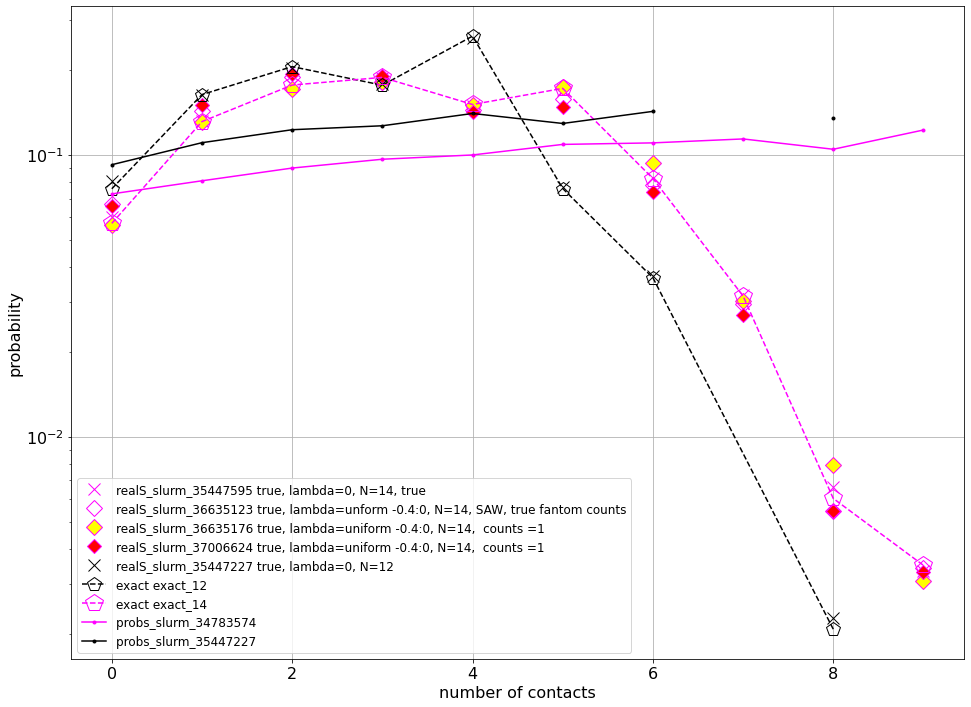

RMSE between exact and estimated 0.04870833313704534


In [1565]:
slurm_34302961 = np.array([25.7865, 26.9027, 27.5241, 27.7572, 28.6065, 27.8085, 27.3269,
        0.    , 25.2479])
slurm_34302961_probs = [2.45851767758017e-07, 3.82850391136523e-07, 6.667472542099123e-07, 1.0002787721854024e-06, 1.7915035308069708e-06, 2.4617597435191207e-06, 3.2823158279615715e-06, nan, 5.696764939386339e-06]


slurm_34783276 = np.array([34.0698, 34.9713, 35.2845, 35.1615, 35.6403, 34.3777, 33.7167,
        0.    , 30.8482])
# slurm_34783276_probs = [1.4588965933752026e-07, 1.6476634015342895e-07, 1.8398039263963826e-07, 1.8915961275545024e-07, 2.138474047969043e-07, 2.037238624326325e-07, 2.2772234069700168e-07, nan, 2.388972553639167e-07]
slurm_34783276_probs = [1.4588965933752026e-07, 1.6476634015342895e-07, 1.8398039263963826e-07, 1.8915961275545024e-07, 2.138474047969043e-07, 2.037238624326325e-07, 2.2772234069700168e-07, nan, 2.388972553639167e-07]



slurm_34307561_probs = [5.055875186696546e-06, 8.316002785515624e-06, 1.3701727434342844e-05, 2.637536607571992e-05, 3.372076110781132e-05, 4.3180880550527354e-05]
slurm_34307561 = np.array([30.8961, 32.0632, 32.4518, 33.6619, 31.561 , 31.966 ])


slurm_34383111 = np.array([38.5877, 39.8548, 40.6271, 40.9818, 41.1769, 41.7555, 41.3882,
       40.7398, 39.5351, 39.1045])
slurm_34383111_probs = [1.1605729131920415e-08, 1.773650720422431e-08, 2.7771290693405573e-08, 4.49412430826091e-08, 6.793248781967649e-08, 1.1465461468951295e-07, 1.608441100271753e-07, 2.242811526750609e-07, 3.286979599849902e-07, 3.7963541033407853e-07]


slurm_34383146   = np.array([31.0053, 31.7822, 31.9434, 31.9595, 31.7855, 32.0978, 31.7319,
       31.1441, 30.171 , 29.9933])
slurm_34383146_probs = [1.1647793689695694e-07, 1.0509057235364166e-07, 8.660949466096786e-08, 7.052136114152294e-08, 6.777106710567972e-08, 9.968832946571032e-08, 1.5708300531059443e-07, 2.426765471347344e-07, 5.74924388953304e-07, 1.0500605056683877e-06]

slurm_34384168 = np.array([32.3768, 32.7382, 32.613 , 32.2841, 31.7581, 31.8024, 31.1449,
       30.3643, 29.0369, 28.8685])
slurm_34384168_probs = [7.369304174238662e-08, 3.9528842010079817e-08, 2.0588689249803456e-08, 1.2118533319816833e-08, 9.289881901801333e-09, 1.0528863031628434e-08, 1.3064292802085854e-08, 1.9919503196404235e-08, 2.92893870760546e-08, 6.802689038436169e-08]


slurm_34384199 = np.array([49.7434, 50.691 , 51.1185, 51.2321, 51.0181, 51.2029, 50.4879,
       49.568 , 47.8576, 47.3884])
slurm_34384199_probs = [7.1409401482491945e-09, 7.990769311216306e-09, 8.817637649512026e-09, 9.511016200927744e-09, 9.80663130577587e-09, 1.0696946193986838e-08, 1.0785713518790855e-08, 1.1285869531920872e-08, 1.0341508256171272e-08, 1.1865925724509745e-08]


slurm_34783574 = np.array([32.1158, 33.0901, 33.4928, 33.6202, 33.3978, 33.625 , 32.8605,
       31.9598, 30.1796, 29.7895])
slurm_34783574_probs = [7.135019769596055e-09, 7.94255244930938e-09, 8.812181282376897e-09, 9.470478817011803e-09, 9.807238208986869e-09, 1.0689541293006525e-08, 1.0823856089648766e-08, 1.1178207424865642e-08, 1.0274317071219568e-08, 1.2023867929077677e-08]


slurm_34784097 = np.array([47.2706, 48.1893, 48.6343, 48.7431, 48.5558, 48.7588, 48.039 ,
       47.0814, 45.3567, 45.0804])
slurm_34784097_probs = [7.1308189271242636e-09, 7.933095809644808e-09, 8.76652390874684e-09, 9.484561599113551e-09, 9.829545696347675e-09, 1.068326739402279e-08, 1.088763050787392e-08, 1.1265894321915645e-08, 1.064639943809769e-08, 1.1921766426968143e-08]




slurm_34859671  = np.array([81.27869, 82.56105, 83.24038, 83.70277, 83.82014, 84.39347,
       84.04176, 83.36503, 82.22444, 81.78629])
slurm_34859671_probs = [1.1534150108754288e-08, 1.763856623244722e-08, 2.800855344163009e-08, 4.498302702436907e-08, 6.788456044160828e-08, 1.1301312791204439e-07, 1.6128359130813052e-07, 2.2405701648243242e-07, 3.2806886652024257e-07, 3.8230615537535494e-07]



slurm_35447227 = np.array([86.38767, 87.26831, 87.59937, 87.49502, 87.97194, 86.67626,
       86.05214,  0.     , 83.20408])
slurm_35447227_probs = [1.5898975889538584e-07, 1.90321643247793e-07, 2.1159397898896844e-07, 2.1852329906898234e-07, 2.4156379926934707e-07, 2.2268108202615245e-07, 2.457977941728591e-07, nan, 2.3376995041550895e-07]



slurm_35447595  = np.array([76.23963, 77.2071 , 77.60579, 77.73235, 77.5317 , 77.74029,
       76.99696, 76.08883, 74.43418, 73.85661])

slurm_35447595_probs = [7.68140138760285e-09, 9.2091780396908e-09, 1.0197872728593417e-08, 1.0918505407189169e-08, 1.1268163204574762e-08, 1.2183255352151037e-08, 1.1835137059355164e-08, 1.248469173160119e-08, 1.1406283238905354e-08, 1.2696447734002323e-08]



slurm_36635123 = np.array([49.04114, 50.15109, 50.79144, 51.08439, 51.12466, 51.50973,
       51.08956, 50.29179, 49.02688, 48.60764])

slurm_36635123_probs = [2.187699308391456e-08, 3.095792166715848e-08, 4.435403536650272e-08, 6.217432145098539e-08, 8.113997874618643e-08, 1.0951048875289945e-07, 1.4443305004904414e-07, 1.7202098440774816e-07, 2.6455266795900743e-07, 2.769959515791966e-07]



slurm_36635176 = np.array([91.48953, 92.11559, 92.32889, 92.39335, 92.08758, 92.3752 ,
       91.33735, 90.46693, 88.80837, 88.35504])

slurm_36635176_probs = [1.1926284904860369e-07, 9.588690025627347e-08, 9.066268986722808e-08, 9.140807294254724e-08, 8.12324365827999e-08, 9.372047919864328e-08, 6.189734889159374e-08, 7.976097711298591e-08, 5.774632242808542e-08, 9.517476537090457e-08]



slurm_37006624 = np.array([82.88181, 84.14969, 84.86693, 85.32226, 85.43182, 85.98326,
       85.67109, 84.95429, 83.79011, 83.43894])


slurm_37006624_probs = [1.1955387526512731e-08, 1.856275493280391e-08, 2.9525901245631532e-08, 4.760654823097171e-08, 7.091046941846024e-08, 1.1876438219828406e-07, 1.7354960612283022e-07, 2.3152300814886218e-07, 3.586384065871589e-07, 4.1479603487749304e-07]


exact_10 = {3.0: 19800, 1.0: 9600, 0.0: 4920, 2.0: 10080, 5.0: 1920, 4.0: 1920}
exact_10 = dict(sorted( exact_10.items()))
den = sum(exact_10.values())
print(den)
exact_10 = dict([(item[0],item[1]/den) for item in exact_10.items()] )

exact_12 = {4.0: 200952, 2.0: 156672, 1.0: 124704, 0.0: 57768, 5.0: 57888, 3.0: 134592, 6.0: 27936, 8.0: 1584}
exact_12 = dict(sorted( exact_12.items()))
den = sum(exact_12.values())
exact_12 = dict([(item[0],item[1]/den) for item in exact_12.items()] )

exact_14 = {5.0: 2181144, 3.0: 2385936, 2.0: 2241288, 1.0: 1663200, 0.0: 724416, 6.0: 1044624, 4.0: 1912176, 7.0: 400176, 9.0: 44352, 8.0: 76608}
exact_14 = dict(sorted( exact_14.items()))
den = sum(exact_14.values())
print(den)
exact_14 = dict([(item[0],item[1]/den) for item in exact_14.items()] )


S_slurm_34302961, probs_slurm_34302961, realS_slurm_34302961 = prepare_to_plot(slurm_34302961, slurm_34302961_probs)
S_slurm_34307561, probs_slurm_34307561, realS_slurm_34307561 = prepare_to_plot(slurm_34307561, slurm_34307561_probs)
S_slurm_34383111, probs_slurm_34383111, realS_slurm_34383111 = prepare_to_plot(slurm_34383111, slurm_34383111_probs)
S_slurm_34383146, probs_slurm_34383146, realS_slurm_34383146 = prepare_to_plot(slurm_34383146, slurm_34383146_probs)
S_slurm_34384168, probs_slurm_34384168, realS_slurm_34384168 = prepare_to_plot(slurm_34384168, slurm_34384168_probs)
S_slurm_34384199, probs_slurm_34384199, realS_slurm_34384199 = prepare_to_plot(slurm_34384199, slurm_34384199_probs)
S_slurm_34783276, probs_slurm_34783276, realS_slurm_34783276 = prepare_to_plot(slurm_34783276, slurm_34783276_probs)
S_slurm_34783574, probs_slurm_34783574, realS_slurm_34783574 = prepare_to_plot(slurm_34783574, slurm_34783574_probs)
S_slurm_34784097, probs_slurm_34784097, realS_slurm_34784097 = prepare_to_plot(slurm_34784097, slurm_34784097_probs)
S_slurm_34859671, probs_slurm_34859671, realS_slurm_34859671 = prepare_to_plot(slurm_34859671, slurm_34859671_probs)

S_slurm_35447227, probs_slurm_35447227, realS_slurm_35447227 = prepare_to_plot(slurm_35447227, slurm_35447227_probs)

S_slurm_35447595, probs_slurm_35447595, realS_slurm_35447595 = prepare_to_plot(slurm_35447595, slurm_35447595_probs)

S_slurm_36635123, probs_slurm_36635123, realS_slurm_36635123 = prepare_to_plot(slurm_36635123, slurm_36635123_probs)
S_slurm_36635176, probs_slurm_36635176, realS_slurm_36635176 = prepare_to_plot(slurm_36635176, slurm_36635176_probs)
S_slurm_37006624, probs_slurm_37006624, realS_slurm_37006624 = prepare_to_plot(slurm_37006624, slurm_37006624_probs)


SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.figure(figsize = (16,12))

# plt.plot(realS_slurm_34383111, label = 'realS_slurm_34383111 true, lambda=0, N=14',color='orange', marker='x', linestyle='dashed', markerfacecolor='none' )
# plt.plot(realS_slurm_34383146, label = 'realS_slurm_34383146 true, lambda=uniform -1.8:0.9, N=14',color='magenta', marker='x', linestyle='dashed', markerfacecolor='none' )
# plt.plot(realS_slurm_34384168, label = 'realS_slurm_34384168 true, lambda=uniform -1.8:0.9, N=14, true',color='magenta', marker='x', linestyle='dashed', markerfacecolor='none' )
# plt.plot(realS_slurm_34384199, label = 'realS_slurm_34384199 true, lambda=0, N=14, true',color='magenta', marker='x', markersize=12, linestyle='none', markerfacecolor='none' )
# plt.plot(realS_slurm_34783574, label = 'realS_slurm_34783574 true, lambda=0, N=14, true',color='magenta', marker='x', markersize=12, linestyle='none', markerfacecolor='none' )
# plt.plot(realS_slurm_34784097, label = 'realS_slurm_34784097 true, lambda=0, N=14, true',color='magenta', marker='X', markersize=12, linestyle='none', markerfacecolor='none' )
plt.plot(realS_slurm_35447595, label = 'realS_slurm_35447595 true, lambda=0, N=14, true',color='magenta', marker='x', markersize=12, linestyle='none', markerfacecolor='none' )


plt.plot(realS_slurm_36635123, label = 'realS_slurm_36635123 true, lambda=unform -0.4:0, N=14, SAW, true fantom counts',color='magenta', marker='D', markersize=12, linestyle='none', markerfacecolor='none' )
plt.plot(realS_slurm_36635176, label = 'realS_slurm_36635176 true, lambda=uniform -0.4:0, N=14,  counts =1',color='magenta', marker='D', markersize=12, linestyle='none', markerfacecolor='yellow' )

plt.plot(realS_slurm_37006624, label = 'realS_slurm_37006624 true, lambda=uniform -0.4:0, N=14,  counts =1',color='magenta', marker='D', markersize=10, linestyle='none', markerfacecolor='red' )

# plt.plot(S_slurm_37006624, label = 'S_slurm_37006624 true, lambda=uniform -0.4:0, N=14,  counts =1',color='magenta', marker='D', markersize=6, linestyle='solid', markerfacecolor='red' )

# plt.plot(S_slurm_34384199, label = 'S_slurm_34384199 true, lambda=0, N=14, true',color='magenta', marker='.', linestyle='solid', markerfacecolor='none' )
# plt.plot(S_slurm_34783574, label = 'S_slurm_34783574 true, lambda=0, N=14, true',color='magenta', marker='.', linestyle='solid', markerfacecolor='none' )

# plt.plot(realS_slurm_34783276, label = 'realS_slurm_34783276 true, lambda=0, N=12',color='black', marker='x',markersize=12, linestyle='none', markerfacecolor='none' )
plt.plot(realS_slurm_35447227, label = 'realS_slurm_35447227 true, lambda=0, N=12',color='black', marker='x',markersize=12, linestyle='none', markerfacecolor='none' )

# plt.plot(S_slurm_35447227, label = 'S_slurm_35447227 true, lambda=0, N=12',color='black', marker='X',markersize=12, linestyle='none', markerfacecolor='none' )

# t = S_slurm_34783276/probs_slurm_34783276_fixed
# t = t/np.nansum(t)
# plt.plot(t, marker='X', markersize=12)
# plt.plot(realS_slurm_34302961, label = 'realS_slurm_34302961 true, lambda=0, N=12',color='black', marker='x',markersize=12, linestyle='none', markerfacecolor='none' )
# plt.plot(realS_slurm_34307561, label = 'realS_slurm_34307561 true, lambda=0, N=10',color='black', marker='o', linestyle='dashed', markerfacecolor='none' )


# plt.plot(realS_slurm_34859671, label = 'realS_slurm_34859671 just saw, lambda=0, N=14, ',color='red', marker='X', markersize=12, linestyle='none', markerfacecolor='red' )


# plt.plot(exact_10.keys(), exact_10.values(), marker= 'p', label='exacexact_10t', markersize = 14, markerfacecolor='none')
plt.plot(exact_12.keys(), exact_12.values(), marker= 'p', label='exact exact_12', markersize = 14, markerfacecolor='none', color='black', linestyle='dashed')
plt.plot(exact_14.keys(), exact_14.values(), marker= 'p', label='exact exact_14', markersize = 18, markerfacecolor='none', linestyle='dashed',color='magenta' )


# plt.plot([el if el>10**(-29) else np.nan for el in S_slurm_34307561], label = 'S_slurm_34307561 ')
# plt.plot([el if el>10**(-29) else np.nan for el in S_slurm_34302961], label = 'S_slurm_34302961 ')

# plt.plot([el if el>10**(-29) else np.nan for el in S_slurm_34783276], label = 'S_slurm_34783276 ')
# plt.plot([el if el>10**(-29) else np.nan for el in S_slurm_34783276], label = 'S_slurm_34783276 ', marker='x')


# plt.plot(probs_slurm_34384199, label= 'probs_slurm_34384199 ', marker='.', color='magenta')

plt.plot(probs_slurm_34783574, label= 'probs_slurm_34783574 ', marker='.', color='magenta')

# plt.plot(probs_slurm_34783276, label= 'probs_slurm_34783276 ', marker='.', color='black')
plt.plot(probs_slurm_35447227, label= 'probs_slurm_35447227 ', marker='.', color='black', linestyle ='solid')


plt.legend()
plt.grid()
plt.xlabel("number of contacts")
plt.ylabel("probability")
plt.yscale('log')
plt.show()


# list(exact_14.values())
print("RMSE between exact and estimated", np.sqrt(np.mean((np.log10(realS_slurm_37006624)-
                                                       np.log10(list(exact_14.values())))**2)))


0.0

# compare distribution for count=1 and count>1
### for $N=14$

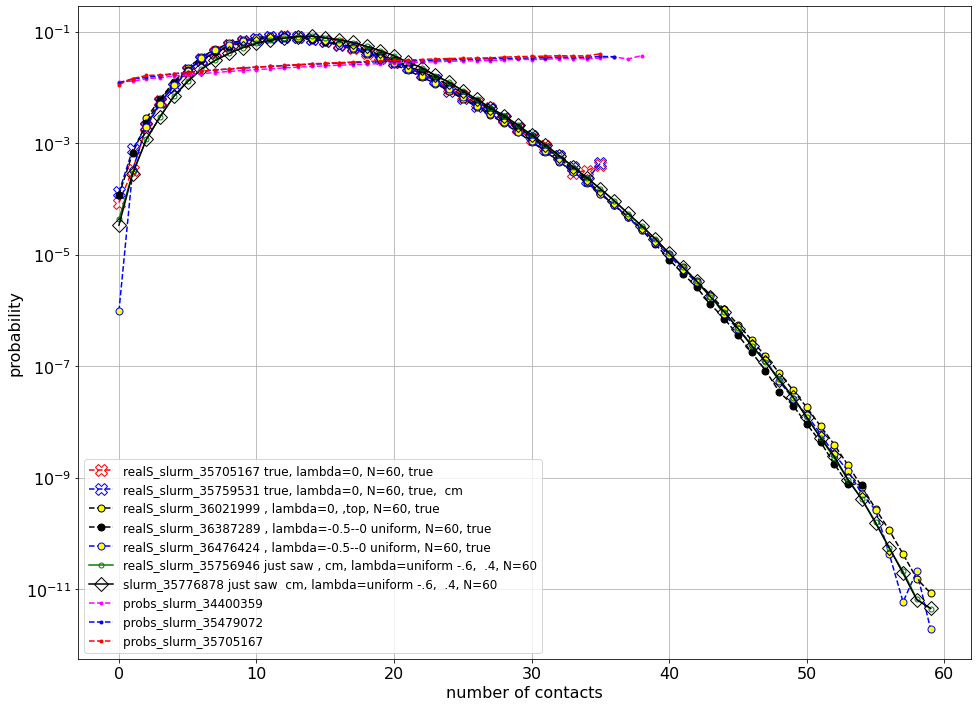

In [1391]:
nan = np.nan
tmp = np.array([182.1422, 183.2664, 183.8707, 184.1031, 184.2367, 184.198 ,
       184.0977, 183.8652, 183.6488, 183.2965, 182.6684, 182.1074,
       181.091 , 180.3461, 178.8961, 177.7941])
tmp_prob = [7.001729549268993e-13, 7.738099848953264e-13, 8.512436183347542e-13, 9.212499389864326e-13, 9.76523772872798e-13, 1.034311678412879e-12, 1.0768151236524746e-12, 1.1142316092124865e-12, 1.1573656444712192e-12, 1.1883220242262455e-12, 1.2254408934993794e-12, 1.2498898251551068e-12, 1.2743752894796675e-12, 1.272679323948669e-12, 1.4533052558071826e-12, 1.1734976934680228e-12]
#34384385

slurm_34390891 = np.array([260.3377, 261.9944, 263.045 , 263.7404, 264.2605, 264.6364,
       264.8698, 265.0146, 265.0679, 265.0881, 265.04  , 264.9228,
       264.7735, 264.6012, 264.3745, 264.1467, 263.8346, 263.5611,
       263.2075, 262.8294, 262.4243, 262.0697, 261.6639, 261.1474,
       260.7589, 260.2312, 259.561 , 258.9477, 258.9348])

slurm_34390891_prob = [1.634257163856616e-26, 1.8093341499657682e-26, 1.9542886311906153e-26, 2.0746145439603882e-26, 2.2050504552884845e-26, 2.3456405918430867e-26, 2.4732736451949922e-26, 2.5842104050916889e-26, 2.6987758326390074e-26, 2.7993056338230634e-26, 2.901336331173286e-26, 2.9867587987302954e-26, 3.088526188666654e-26, 3.147509169928238e-26, 3.2303309437245716e-26, 3.30399774729697e-26, 3.3513040581530923e-26, 3.4362322100909433e-26, 3.5354691013199136e-26, 3.573794794285261e-26, 3.601621581175124e-26, 3.63732636683622e-26, 3.8071764327426263e-26, 3.7752429579905973e-26, 3.7641188970579413e-26, 3.7750928913321814e-26, 3.961473644461988e-26, 3.813876782970879e-26, 3.726320936629889e-26]

slurm_34400359 = np.array([579.5672, 581.5035, 583.2105, 584.3734, 585.207 , 585.7762,
       586.2629, 586.6879, 586.9711, 587.1668, 587.3879, 587.4473,
       587.4977, 587.5309, 587.498 , 587.3996, 587.3109, 587.1953,
       587.0535, 586.8621, 586.6898, 586.4625, 586.227 , 585.948 ,
       585.682 , 585.3906, 585.182 , 584.7438, 584.357 , 584.0199,
       583.8109, 583.4598, 582.7938, 582.518 , 582.1121, 581.5914,
       581.0906, 580.7234, 581.7402])

slurm_34400359_prob = [2.7860188903881964e-40, 2.86262145908122e-40, 3.1365164734808965e-40, 3.3063719854119188e-40, 3.5368471677604293e-40, 3.715518475630593e-40, 3.898863980517706e-40, 4.073623552248126e-40, 4.26789530603753e-40, 4.4299226474859435e-40, 4.60390815680347e-40, 4.762486550206405e-40, 4.934551919164997e-40, 5.092020545415707e-40, 5.233615272286499e-40, 5.380796779118032e-40, 5.510632694913435e-40, 5.648822452237607e-40, 5.784831212568938e-40, 5.890554993883817e-40, 6.025367177037455e-40, 6.114587842192313e-40, 6.279579809060211e-40, 6.3668629613206676e-40, 6.4925227469630405e-40, 6.594963358914377e-40, 6.629725336722176e-40, 6.684319737534588e-40, 6.838473316962174e-40, 7.033940167443332e-40, 6.973190469817286e-40, 7.057403019301591e-40, 7.26437076220853e-40, 7.260502898931405e-40, 7.176986702210833e-40, 7.403204082259548e-40, 7.776345278683589e-40, 7.115502582950542e-40, 8.221939495165142e-40]

slurm_34400359_mean_number_of_candidates = [4.7109195402298845, 4.679876273653566, 4.684416299559471, 4.677869693471848, 4.670315682281059, 4.661706036745406, 4.652914392323109, 4.642183540578552, 4.632201110894743, 4.620097112008983, 4.608250917490825, 4.596174969922983, 4.583194693008328, 4.5708192104517655, 4.557666440036261, 4.544878051219488, 4.530681511403517, 4.5171275108060005, 4.503662272719394, 4.489642722575783, 4.4755250225527865, 4.461920985695284, 4.448113724684071, 4.432939432120449, 4.419462483764613, 4.405065829044977, 4.390445783493719, 4.374746725969854, 4.360466988727858, 4.346931642688775, 4.331768470040722, 4.314429246876055, 4.299090038314176, 4.289503468419131, 4.26951566951567, 4.252574906367041, 4.239118457300275, 4.231163708086785, 4.213468013468013]



slurm_34410597 = np.array([282.5228, 284.3484, 285.5369, 286.3871, 286.9787, 287.4131,
       287.7322, 287.9423, 288.0568, 288.1264, 288.1361, 288.099 ,
       287.9974, 287.8846, 287.7433, 287.5615, 287.373 , 287.1828,
       286.9457, 286.7327, 286.4879, 286.2365, 285.9568, 285.7235,
       285.4476, 285.1849, 284.9114, 284.6143, 284.3262, 284.0517,
       283.6611, 283.4162, 283.1567, 282.8055, 282.46  , 282.2721,
       281.8501, 281.4006, 282.0127])

slurm_34410597_prob = [1.3550001454897914e-38, 9.97638894978375e-39, 8.095666084422212e-39, 6.573287579072854e-39, 5.294479351861485e-39, 4.2775510735393176e-39, 3.424114158842704e-39, 2.795720096145239e-39, 2.2851231369532582e-39, 1.842302371393862e-39, 1.5032552044822982e-39, 1.2357994171139864e-39, 1.0290741266457072e-39, 8.707098499144177e-40, 7.600196667505577e-40, 6.733740942376153e-40, 6.150027390992156e-40, 5.796213889363253e-40, 5.643996850149901e-40, 5.581188012223967e-40, 5.631662206265349e-40, 5.734182022172671e-40, 5.8948251595898594e-40, 6.1200630107062045e-40, 6.470000706556351e-40, 6.861022243494361e-40, 7.475956396172357e-40, 7.923469502992926e-40, 8.960017513035027e-40, 1.0211404336106672e-39, 1.1424634135149525e-39, 1.3625010776249071e-39, 1.5399089043434544e-39, 1.985216727834897e-39, 2.2931253447639824e-39, 2.911457758661094e-39, 2.924128268502041e-39, 3.031742873927347e-39, 4.395727024908385e-39]



slurm_34419592 = np.array([186.3502, 188.1027, 189.4395, 190.3491, 191.0537, 191.5858,
       192.004 , 192.2956, 192.4964, 192.6431, 192.7403, 192.7652,
       192.7666, 192.727 , 192.6537, 192.5215, 192.4014, 192.2532,
       192.0711, 191.9059, 191.6785, 191.4863, 191.2569, 190.9865,
       190.7691, 190.5008, 190.2855, 189.9477, 189.6494, 189.346 ,
       189.0619, 188.7744, 188.4449, 188.2517, 187.9334, 187.5454,
       187.2535, 187.0348, 187.7032])

slurm_34419592_prob = [2.01714246287205e-39, 2.0118068799380913e-39, 1.7821488766592982e-39, 1.6247384041022518e-39, 1.4314557443643238e-39, 1.2977170520583409e-39, 1.1771792031522848e-39, 1.0617845357464437e-39, 9.64642134396449e-40, 8.751665980323452e-40, 7.916516562768608e-40, 7.29250826114076e-40, 6.752675901385599e-40, 6.2893382251197144e-40, 5.961475376553763e-40, 5.7463592872675825e-40, 5.603396548344843e-40, 5.545308423226028e-40, 5.603363620545469e-40, 5.6475485877631465e-40, 5.773329053095988e-40, 5.946631398316363e-40, 6.157609623442712e-40, 6.357816639549265e-40, 6.7714257329060304e-40, 7.140714011234538e-40, 7.737388760276269e-40, 8.404550953370157e-40, 9.233454217497248e-40, 1.0611384512156673e-39, 1.1619395547926188e-39, 1.3836658827916487e-39, 1.5515333944558994e-39, 1.9492876826089876e-39, 2.4071820658493596e-39, 2.7522430320287715e-39, 2.8470653763859426e-39, 4.088989750361e-39, 4.695447266017956e-39]




# 34419774 uniform(-.3,  .5)
# 34419605  uniform -.3,  .3
slurm_34419605 = np.array([1163.1719, 1163.6812, 1165.2937, 1166.05  , 1166.9906, 1167.6406,
       1167.85  , 1168.2344, 1168.4187, 1168.5437, 1168.5719, 1168.6406,
       1168.6344, 1168.6656, 1168.5125, 1168.4156, 1168.2156, 1168.1719,
       1168.0406, 1167.85  , 1167.6594, 1167.4406, 1167.0562, 1166.8437,
       1166.575 , 1166.4437, 1166.0594, 1165.85  , 1165.6531, 1165.0844,
       1164.7344, 1164.6094, 1164.4687, 1163.9   , 1163.5344, 1163.6781,
       1162.2969, 1162.9125, 1161.375 , 1162.575 , 1162.075 , 1161.9812,
       1160.1469, 1155.8406, 1161.0781])
slurm_34419605_prob = [2.1688513913157057e-39, 1.92852402182065e-39, 1.8216747992908137e-39, 1.573793383801e-39, 1.4352210673709266e-39, 1.2954728949962151e-39, 1.1732122656756938e-39, 1.0687715924799004e-39, 9.674482171936222e-40, 8.721912399507638e-40, 7.92888967163654e-40, 7.2944090484722716e-40, 6.722102374318366e-40, 6.2807403831514e-40, 5.915813145986359e-40, 5.71628862340863e-40, 5.615682373352174e-40, 5.553729825472567e-40, 5.580349281546718e-40, 5.6307346797012756e-40, 5.7588500346729775e-40, 5.894351307420801e-40, 6.079051408726007e-40, 6.418700903374202e-40, 6.7271529448552935e-40, 7.15527436437744e-40, 7.812132313259696e-40, 8.284670327589426e-40, 9.028553060517742e-40, 1.0409607310827702e-39, 1.1643235089836865e-39, 1.3650835144571179e-39, 1.5763704272777214e-39, 1.914204793910113e-39, 2.0635913685128622e-39, 2.734787631441069e-39, 3.0012800099496205e-39, 4.056548790874684e-39, 4.7675462958702175e-39, 5.1601191585479814e-39, 5.801359312860889e-39, 6.041171816084217e-39, 1.1635587564781074e-38, 1.282801468720414e-38, 1.620341697244265e-38]



slurm_34419774 = np. array([2467.8, 2468.3, 2470.6, 2471.3, 2471.5, 2472.5, 2473.3, 2474. ,
       2473.7, 2473.7, 2474.4, 2474. , 2474. , 2473.9, 2474.2, 2474.2,
       2473.6, 2473.8, 2473.8, 2473.7, 2472.7, 2472.9, 2472.8, 2472.8,
       2470.9, 2471.3, 2471.1, 2470.8, 2470.5, 2472.2, 2470.9, 2470.9,
       2468.7, 2469.1, 2471.3, 2469.5, 2461.8, 2470.5, 2460.1, 2460.1,
       2457.9, 2461.1, 2468.7, 2444.2, 2441.9, 2417.7, 2449.8, 2419.2,
       2332.3, 2286.5, 2363. , 2215.9, 2166.4, 2149.4, 2060.2, 2214.2,
          0. , 1822.6, 2308.9,    0. ])
slurm_34419774_prob = [1.830484684526683e-39, 1.9233440782618218e-39, 1.7655820357780912e-39, 1.5860575639904286e-39, 1.426822518871437e-39, 1.2803836170650062e-39, 1.1648032417854605e-39, 1.039684963436043e-39, 9.415833001421397e-40, 8.502255542212127e-40, 7.776835403345162e-40, 6.988421150357484e-40, 6.456499036969844e-40, 5.952768700557066e-40, 5.609789014768986e-40, 5.371790823864317e-40, 5.289041666672922e-40, 5.290816270005347e-40, 5.3708263516078365e-40, 5.493286191293437e-40, 5.682287374948394e-40, 5.916925626989846e-40, 6.2637268349638786e-40, 6.6391812232045554e-40, 7.202292903699219e-40, 7.92049445390287e-40, 8.938910609518251e-40, 1.0779484604397595e-39, 1.2585288981097691e-39, 1.5565138672399503e-39, 1.93128810521785e-39, 2.4017505427410898e-39, 3.082676357855532e-39, 4.0080363433576263e-39, 5.243188224104084e-39, 6.907257087816966e-39, 9.37036362644333e-39, 1.1860331507289486e-38, 1.7933785603721822e-38, 2.4300214541450885e-38, 2.519525082841244e-38, 4.479092471063482e-38, 5.482497731432567e-38, 9.446462198084533e-38, 8.133725055762683e-38, 2.8828369199015914e-37, 1.4594546115435287e-37, 2.5624674630364324e-37, 4.885645783545846e-37, 4.835927421303376e-37, 4.22639327192532e-37, 1.6248796705748015e-36, 7.079090751237842e-37, 2.9547534256456992e-36, 6.288121451995738e-36, 6.009726437532088e-37, nan, 3.4383761235253094e-36, 9.14905087096686e-36, nan]



slurm_34438244 = np.array([3162.5651, 3165.7744, 3167.0019, 3168.3028, 3169.2339, 3170.0047,
       3170.6642, 3171.2585, 3171.7197, 3172.1463, 3172.4983, 3172.8031,
       3173.0694, 3173.2914, 3173.4893, 3173.6544, 3173.7934, 3173.9158,
       3174.0136, 3174.0965, 3174.1601, 3174.2151, 3174.2531, 3174.2807,
       3174.298 , 3174.3063, 3174.3058, 3174.2952, 3174.2796, 3174.2558,
       3174.2275, 3174.1942, 3174.1502, 3174.1046, 3174.0508, 3173.9939,
       3173.9326, 3173.8636, 3173.7908, 3173.7108, 3173.6299, 3173.5406,
       3173.4383, 3173.3257, 3175.0165])
slurm_34438244_prob = [2.9358885558422443e-39, 3.9091523582437255e-39, 4.283120381229761e-39, 5.2484063677327586e-39, 6.193027606719798e-39, 7.298578966869907e-39, 8.776328948336077e-39, 1.0636628634731186e-38, 1.279712805446118e-38, 1.5515292746680934e-38, 1.9039322686813503e-38, 2.3145327016056036e-38, 2.8478901441578196e-38, 3.5257998874286125e-38, 4.3807070963681704e-38, 5.475960668698444e-38, 6.926151384496891e-38, 8.909897792011608e-38, 1.1345383352173432e-37, 1.476347946958786e-37, 1.908708264555643e-37, 2.5397603967493365e-37, 3.373887207245398e-37, 4.528385059741866e-37, 6.063409640571208e-37, 8.370617842268735e-37, 1.1449998535431918e-36, 1.591380823728722e-36, 2.2532215623152742e-36, 3.180334790957172e-36, 4.528537564915871e-36, 6.520129143366014e-36, 9.584590600442884e-36, 1.418927865153354e-35, 2.1398130808383862e-35, 3.2423862466432197e-35, 4.989743757003261e-35, 7.795078542653546e-35, 1.2518078179064623e-34, 1.987364165784009e-34, 3.2453878765498544e-34, 5.435504644281176e-34, 9.205498603288854e-34, 1.5591086407819504e-33, 2.6520997225360812e-33]



slurm_34481193 = np.array([3064.1049, 3068.3394, 3069.9553, 3071.0655, 3071.9729, 3072.7567,
       3073.4854, 3074.0708, 3074.499 , 3074.9206, 3075.2613, 3075.5961,
       3075.8587, 3076.0943, 3076.2749, 3076.4261, 3076.5819, 3076.706 ,
       3076.7933, 3076.8824, 3076.9495, 3077.008 , 3077.0441, 3077.0705,
       3077.0716, 3077.098 , 3077.0859, 3077.0944, 3077.0662, 3077.0345,
       3077.0222, 3076.9705, 3076.9246, 3076.8817, 3076.8587, 3076.7809,
       3076.7133, 3076.6395, 3076.578 , 3076.5022, 3076.4243, 3076.33  ,
       3076.2423, 3076.1343, 3076.033 , 3075.8973, 3075.7433, 3075.6204,
       3075.4533, 3075.2875, 3075.1251, 3074.8673, 3074.6239, 3074.4146,
       3075.2649])

slurm_34481193_prob = [3.763376626419128e-39, 3.20357017596775e-39, 4.490829034203895e-39, 5.299112213569808e-39, 6.130868968730671e-39, 7.387071321647161e-39, 8.905012863187068e-39, 1.0551100814090065e-38, 1.2838394000818585e-38, 1.5508563730395931e-38, 1.8966577044938895e-38, 2.317535432412899e-38, 2.8543196317838955e-38, 3.536891612317777e-38, 4.35566036622281e-38, 5.489241458489914e-38, 6.97146351166457e-38, 8.920180036621035e-38, 1.1305249604358382e-37, 1.4697659268783409e-37, 1.9342399345858705e-37, 2.5481777589260157e-37, 3.391127912020492e-37, 4.528453675588027e-37, 6.101833631517656e-37, 8.297713559804667e-37, 1.1465261937860932e-36, 1.6024128985961228e-36, 2.2230639579738732e-36, 3.167158638342896e-36, 4.511856256611439e-36, 6.562699379562204e-36, 9.579546149533486e-36, 1.408242597679494e-35, 2.117748702677857e-35, 3.2139403386928974e-35, 4.962995041246121e-35, 7.817258279379246e-35, 1.2222540469685292e-34, 2.0110751325516322e-34, 3.25700987646625e-34, 5.397538155141199e-34, 9.113788288165734e-34, 1.5447359382363684e-33, 2.6853613841639218e-33, 4.653714006889528e-33, 8.315918436629066e-33, 1.4822592288715172e-32, 2.660668231493337e-32, 4.826502326593869e-32, 8.89857538899139e-32, 1.6606473646838328e-31, 3.0617915008159858e-31, 5.923153357131979e-31, 1.1064084685356344e-30]


slurm_34487555 = np.array([4940.2094, 4942.5333, 4944.2112, 4945.2147, 4946.1872, 4946.9332,
       4947.5415, 4948.0907, 4948.5295, 4948.9004, 4949.2178, 4949.491 ,
       4949.7202, 4949.9266, 4950.08  , 4950.2195, 4950.3298, 4950.4296,
       4950.5044, 4950.5633, 4950.6049, 4950.6301, 4950.6484, 4950.6627,
       4950.6606, 4950.6524, 4950.6398, 4950.6149, 4950.5857, 4950.558 ,
       4950.5131, 4950.4672, 4950.4193, 4950.3732, 4950.315 , 4950.2527,
       4950.1784, 4950.117 , 4950.0373, 4949.9446, 4949.8838, 4949.7711,
       4949.6751, 4949.5726, 4949.4531, 4949.3319, 4949.1973, 4949.0503,
       4948.8956, 4948.7157, 4948.5266, 4948.3138, 4948.0804, 4947.8511,
       4947.5338, 4947.2318, 4946.8884, 4946.5083, 4946.0698, 4946.3657])


slurm_34487555_prob = [1.0286020863252075e-38, 8.298657274474431e-39, 9.649807448255229e-39, 1.083925886604153e-38, 1.269297068415698e-38, 1.472117249681168e-38, 1.655880629257142e-38, 1.9264472763988371e-38, 2.2270187465698953e-38, 2.5860719381579707e-38, 3.0185970912596165e-38, 3.5633843251284814e-38, 4.2857710839544495e-38, 5.091115174581146e-38, 6.084471643888443e-38, 7.306669187173702e-38, 8.814691928888238e-38, 1.0970437619326645e-37, 1.3672023791587836e-37, 1.7108422749193417e-37, 2.181181134742384e-37, 2.790241719976563e-37, 3.6786047643568533e-37, 4.842783066478527e-37, 6.41057918778303e-37, 8.540913675067185e-37, 1.1581696562031002e-36, 1.593469579622811e-36, 2.2258223529374076e-36, 3.1210719540499146e-36, 4.4670799319742e-36, 6.399394520437353e-36, 9.383809832911051e-36, 1.3820492140420282e-35, 2.064974918689524e-35, 3.135138424227878e-35, 4.902772265417011e-35, 7.660154204637145e-35, 1.2257449825939882e-34, 1.978052774898089e-34, 3.2487814770371845e-34, 5.332651284543082e-34, 9.018811794289324e-34, 1.5447528726630805e-33, 2.6527898031970074e-33, 4.662106983886131e-33, 8.215507127626754e-33, 1.4921212301469875e-32, 2.6483318935974414e-32, 4.8639928515917606e-32, 8.822267949092095e-32, 1.6393945902791332e-31, 3.1154786749770723e-31, 5.945994210823008e-31, 1.0949710684856176e-30, 2.142790062840248e-30, 4.0880696217386056e-30, 7.982996290340554e-30, 1.563996708944708e-29, 3.1286166657345134e-29]



# filter overlaps but use bias
slurm_34717661 = np.array([283.3406, 285.1406, 286.3383, 287.2531, 287.8973, 288.398 ,
       288.7324, 289.0215, 289.1684, 289.2801, 289.3488, 289.3297,
       289.2789, 289.248 , 289.1316, 289.0102, 288.8352, 288.6813,
       288.5277, 288.3094, 288.1727, 287.9305, 287.6699, 287.484 ,
       287.3277, 287.1133, 286.8613, 286.5359, 286.4246, 286.1156,
       285.8977, 285.7629, 285.5852, 285.182 , 284.9508, 284.8117,
       284.4215, 284.3031, 284.0223, 283.5219, 283.7031, 283.0359,
       282.5613, 282.4688, 283.373 ])


slurm_34717661_prob = [6.02936850480475e-39, 4.407040922643449e-39, 3.974338618203906e-39, 3.32814246954413e-39, 2.752782187681424e-39, 2.3777563082332888e-39, 2.0132784532277465e-39, 1.7238736193463128e-39, 1.4668021669028959e-39, 1.2558297961708038e-39, 1.0857342535237662e-39, 9.378388442253692e-40, 8.103085046976544e-40, 7.1471201040903875e-40, 6.427843581540409e-40, 5.8959395493602565e-40, 5.597007470086979e-40, 5.428941858279847e-40, 5.4013377826673205e-40, 5.444747316832424e-40, 5.635834718112425e-40, 5.858883533005434e-40, 6.06365120887801e-40, 6.490412269387657e-40, 7.067415858772198e-40, 7.819826231714439e-40, 8.839725185869572e-40, 1.0524598017324147e-39, 1.2756492446178635e-39, 1.4893068477770117e-39, 1.920496333400227e-39, 2.335611061494167e-39, 3.3297362247974656e-39, 4.424236313988522e-39, 4.9116899898456947e-39, 6.426286536281134e-39, 8.730207688621306e-39, 1.2099388037538622e-38, 1.7506182959547202e-38, 2.1448499265118294e-38, 2.845577852283981e-38, 4.035767295405939e-38, 4.77932589847427e-38, 7.23298876331026e-38, 1.0095590769620554e-37]


slurm_34743598 = np.array([803.8469, 806.0347, 807.4439, 808.5151, 809.3265, 810.0042,
       810.5509, 811.001 , 811.3749, 811.678 , 811.9234, 812.1331,
       812.2958, 812.4291, 812.5333, 812.6146, 812.6738, 812.7196,
       812.7445, 812.7527, 812.7527, 812.7425, 812.728 , 812.6969,
       812.6657, 812.6267, 812.5806, 812.5287, 812.4804, 812.4179,
       812.3556, 812.2906, 812.2198, 812.1455, 812.0653, 811.9803,
       811.8924, 811.803 , 811.7049, 811.5992, 811.4859, 811.3711,
       811.2444, 811.1093, 810.9698, 810.8164, 810.6476, 810.4715,
       810.2798, 810.0604, 809.8487, 809.6022, 809.3179, 809.0515,
       808.7232, 808.3648, 807.9642, 807.527 , 807.041 , 807.2747])


slurm_34743598_prob = [4.0383427966771275e-38, 4.3855838230885e-38, 4.109374590786714e-38, 4.684732953118836e-38, 4.82082691141375e-38, 5.123022460158672e-38, 5.41664638137291e-38, 5.796112650935218e-38, 6.250691842559289e-38, 6.811222207132649e-38, 7.32063951925684e-38, 8.015310542079104e-38, 8.780912584244845e-38, 9.654276253390186e-38, 1.0881700238285643e-37, 1.212822283109969e-37, 1.3580789723592362e-37, 1.5568576622817856e-37, 1.8518687602941945e-37, 2.1974770835116878e-37, 2.621288932657607e-37, 3.2416409115856956e-37, 4.086168309317317e-37, 5.253883890936469e-37, 6.859742047879462e-37, 8.97529161349717e-37, 1.1851701998018127e-36, 1.613367870021312e-36, 2.206996976377512e-36, 3.055317438165093e-36, 4.2557143545394696e-36, 6.057263892501044e-36, 8.804750918606832e-36, 1.2814220186274514e-35, 1.901573697991875e-35, 2.8205655386151927e-35, 4.3196078756329836e-35, 6.618976258616064e-35, 1.021666896129878e-34, 1.6080449893338088e-34, 2.5924309918695148e-34, 4.122178479745677e-34, 6.718693850696942e-34, 1.1132150926862206e-33, 1.8760104075135392e-33, 3.119610313854573e-33, 5.217803583541046e-33, 9.117420666597391e-33, 1.573029491077186e-32, 2.7409029087125715e-32, 4.84156163596409e-32, 8.577440945422956e-32, 1.5546536689891784e-31, 2.760672169698739e-31, 4.970048054418078e-31, 9.152273116774472e-31, 1.677799651684512e-30, 3.1394811851797577e-30, 5.4073834211454134e-30, 1.0311391962225928e-29]

slurm_34743598_mean_number_of_candidates = [4.700843881856541, 4.701120331950207, 4.697456787593086, 4.68947925912776, 4.681336978131212, 4.671966326397984, 4.661902357407352, 4.6497144646795805, 4.637976910390324, 4.62514343559467, 4.6120915750550004, 4.597906095595776, 4.584536829687687, 4.569802149893504, 4.554927488464074, 4.5406145134228195, 4.525755448223207, 4.510819183111519, 4.496142249851746, 4.4799957775605606, 4.465371764408325, 4.4497635697635705, 4.43430256491976, 4.418536510024313, 4.403108772911525, 4.3871737118276135, 4.372098695235816, 4.356380847624285, 4.340373122139669, 4.325075640321534, 4.309816859682198, 4.293606562832801, 4.277294008891727, 4.2615998150310554, 4.245643161132718, 4.229911021899997, 4.213554683207975, 4.198279448571505, 4.181999453519137, 4.166144709502118, 4.15011199440028, 4.13398029143097, 4.117919136783666, 4.101853629434095, 4.085797833333333, 4.069845998014167, 4.0533824465302555, 4.037571680377986, 4.020612759065415, 4.004454488487127, 3.9880729817545615, 3.9720548569236485, 3.955123985596254, 3.939376842105263, 3.923308011049724, 3.905744865849619, 3.890492473250775, 3.873318292370712, 3.8566378066378064, 3.8432885611447634]



slurm_34783262 = np.array([876.2406, 878.5229, 880.0545, 880.9162, 881.8068, 882.4553,
       882.9576, 883.3574, 883.6256, 883.8637, 884.0318, 884.1105,
       884.1732, 884.1836, 884.1533, 884.0678, 883.9678, 883.8525,
       883.699 , 883.5613, 883.3459, 883.0961, 882.9051, 882.6172,
       882.376 , 882.0668, 881.7742, 881.4609, 881.1578, 880.7365,
       880.4732, 880.0238, 879.4859, 879.2363, 878.707 , 878.2393,
       878.1025, 877.291 , 877.1174, 876.927 ])

slurm_34783262_prob = [3.023102821580105e-40, 3.0125466535937276e-40, 3.158747551519937e-40, 3.314484097025358e-40, 3.506057718812794e-40, 3.7029868882386714e-40, 3.887085547185949e-40, 4.065901508703382e-40, 4.255582584866995e-40, 4.41617138597548e-40, 4.611818378277672e-40, 4.768816086865466e-40, 4.909455243169048e-40, 5.094956072839051e-40, 5.249196810729088e-40, 5.383572665660943e-40, 5.517165034650066e-40, 5.6377207393764995e-40, 5.790011508979729e-40, 5.911818206833486e-40, 6.012533485438002e-40, 6.14585607338601e-40, 6.2457545461323656e-40, 6.3570176574564724e-40, 6.412786515928886e-40, 6.552216301566723e-40, 6.679691907218077e-40, 6.703605367230029e-40, 6.863679362130552e-40, 6.85406338414361e-40, 7.067409773317064e-40, 7.0624036240141494e-40, 7.266092808762174e-40, 7.213842458361852e-40, 7.332933413202333e-40, 7.251208151726694e-40, 7.2650858716975585e-40, 7.686923683683509e-40, 7.693028226154239e-40, 7.095003924122616e-40]


slurm_35479315 = np.array([2220.97777, 2223.24179, 2224.65651, 2225.67806, 2226.47737,
       2227.15311, 2227.69971, 2228.14542, 2228.51138, 2228.8185 ,
       2229.07178, 2229.27004, 2229.43827, 2229.575  , 2229.67932,
       2229.75612, 2229.81613, 2229.85991, 2229.88605, 2229.89654,
       2229.89824, 2229.88682, 2229.86613, 2229.84038, 2229.81044,
       2229.76883, 2229.72331, 2229.67579, 2229.61857, 2229.56082,
       2229.50079, 2229.43416, 2229.3614 , 2229.28772, 2229.21015,
       2229.12669, 2229.03606, 2228.94626, 2228.84453, 2228.74406,
       2228.63372, 2228.50763, 2228.39027, 2228.261  , 2228.11661,
       2227.96675, 2227.79918, 2227.62171, 2227.41838, 2227.21409,
       2227.00048, 2226.73856, 2226.47923, 2226.17681, 2225.85013,
       2225.49743, 2225.11   , 2224.67213, 2224.17219, 2224.4363 ])

slurm_35479315_prob  = [5.385653206040907e-38, 5.593989358682838e-38, 6.012454626182324e-38, 6.394180711799087e-38, 6.594113662477834e-38, 6.965362743615688e-38, 7.414422009925483e-38, 8.095916587850879e-38, 8.77628863048746e-38, 9.237910556044625e-38, 1.0123024717099072e-37, 1.095574473842962e-37, 1.197326714000007e-37, 1.3160481086283516e-37, 1.4432171445172425e-37, 1.6163723256049247e-37, 1.824217965665615e-37, 2.087826122158274e-37, 2.416234707350791e-37, 2.821457139617639e-37, 3.455758658361245e-37, 4.219539142135026e-37, 5.297064381508323e-37, 6.697402918064705e-37, 8.66595667290244e-37, 1.1388990552383955e-36, 1.5029312758186065e-36, 2.060127924862267e-36, 2.8124903201467384e-36, 3.884561991615174e-36, 5.452488738078828e-36, 7.839383311523517e-36, 1.12691074559339e-35, 1.649193069019578e-35, 2.4465127735484917e-35, 3.6276936924136334e-35, 5.602076815673869e-35, 8.564888697250863e-35, 1.3664980813352747e-34, 2.141793582661675e-34, 3.3945380245744924e-34, 5.511159875159514e-34, 9.249171246071852e-34, 1.5245148583194771e-33, 2.5107178289942474e-33, 4.212476162007107e-33, 7.250982554155404e-33, 1.2577834363856446e-32, 2.140839446831983e-32, 3.8518489754824374e-32, 6.676610412880217e-32, 1.201307253350675e-31, 2.19624752958601e-31, 3.8634844647905073e-31, 7.0517556052732566e-31, 1.2870015960404921e-30, 2.2635440583877054e-30, 4.3626721270593594e-30, 7.964666360361608e-30, 1.6253979614961122e-29]

slurm_35479315_prob_median = [5.244086722604678e-38, 5.208446865382007e-38, 5.609114901231901e-38, 5.966016626175003e-38, 6.179287059844167e-38, 6.549639260990799e-38, 6.995743184189047e-38, 7.689014107822456e-38, 8.358105825650127e-38, 8.807634925352187e-38, 9.619459919075176e-38, 1.0494233481409218e-37, 1.1499959839025844e-37, 1.264395063593341e-37, 1.3793665527617816e-37, 1.5441482406865076e-37, 1.7483801411624707e-37, 1.9969126307896446e-37, 2.310707740729144e-37, 2.6988850091935153e-37, 3.2930894045266484e-37, 4.008199097471956e-37, 5.015113832470664e-37, 6.282560069607324e-37, 8.135636841966078e-37, 1.0694180576476056e-36, 1.4044181245986647e-36, 1.91422409922428e-36, 2.609103133320991e-36, 3.599234654627943e-36, 5.0508087269072266e-36, 7.261176014305728e-36, 1.0463229643243403e-35, 1.5358096419240104e-35, 2.2729491397501646e-35, 3.379077004983737e-35, 5.198825347117623e-35, 7.979824718287132e-35, 1.2743098564322744e-34, 1.9967561789906817e-34, 3.1703890030100435e-34, 5.1605801844371995e-34, 8.626427155895574e-34, 1.4255429976361406e-33, 2.3567264071051782e-33, 3.9784557165091156e-33, 6.83570852501062e-33, 1.1847759062776205e-32, 2.0232564267226214e-32, 3.625586020460328e-32, 6.299990970312318e-32, 1.135333398382455e-31, 2.0631153452646844e-31, 3.6792605964736127e-31, 6.636867563283632e-31, 1.2041685161093134e-30, 2.1686320063037035e-30, 4.1365070549228185e-30, 7.599559833544489e-30, 1.5311703402792064e-29]
slurm_35479315_prob_mean = [1.231193945661303e-38, 9.942124371407359e-39, 9.962298652633434e-39, 9.13545136668893e-39, 9.68110061541993e-39, 1.040170716416167e-38, 1.1256830776236658e-38, 1.0491957559029437e-38, 1.1366563573640605e-38, 1.2278768132477595e-38, 1.5428709404809152e-38, 1.479926591073372e-38, 1.8610441057190477e-38, 2.0608409399059383e-38, 2.2691884044527252e-38, 2.9537455627939463e-38, 3.3404746881332973e-38, 3.801898595382274e-38, 4.849853445975491e-38, 5.760204893723408e-38, 6.786873911966093e-38, 9.188668974388971e-38, 1.1295779966441466e-37, 1.5732501585527846e-37, 1.7963219376471288e-37, 2.578115054590621e-37, 3.4306059940008984e-37, 4.596342866674041e-37, 6.256265112639483e-37, 8.72668585841608e-37, 1.2165632421176254e-36, 1.575347084918926e-36, 2.274450118439129e-36, 3.3516707738479545e-36, 5.030839178680129e-36, 7.66019064437468e-36, 1.0476466743364835e-35, 1.6227674973610726e-35, 2.2447717324884588e-35, 3.601183121320692e-35, 5.710720110863724e-35, 9.444573596706869e-35, 1.5419582888951514e-34, 2.5515513487736097e-34, 3.719801016381141e-34, 6.327993720598759e-34, 9.269921010297381e-34, 1.582108015884841e-33, 2.7677532138222384e-33, 4.790256199963536e-33, 8.678136972452231e-33, 1.521162194259381e-32, 2.736193874427462e-32, 4.865096256958481e-32, 8.875452985986038e-32, 1.8705124688760296e-31, 2.9680811982096075e-31, 4.7374970271432805e-31, 8.735655255591825e-31, 1.9325650951051782e-30]



number_of_candidates = [4.8, 4.688679245283018, 4.69857621440536, 4.68929794520548, 4.674671134276496, 4.677648480223834, 4.6618061979648475, 4.65025754757476, 4.63658800786588, 4.624693236356439, 4.611960908671587, 4.5989320236981595, 4.583263282897019, 4.570036305479676, 4.5554794307730555, 4.540460542050531, 4.524839182476997, 4.5101236970719265, 4.494676616915423, 4.48038042334722, 4.4644464904315075, 4.449309827647567, 4.43397673074767, 4.419638914544575, 4.403337086468574, 4.387609070061755, 4.371967685806612, 4.356448884826709, 4.340067087213378, 4.325080139454349, 4.308813253690973, 4.293548106167182, 4.277136110523719, 4.262843930635838, 4.245291783848936, 4.229744251611013, 4.214082885648503, 4.197646944588296, 4.181452214283996, 4.16542260814148, 4.15058263654154, 4.133371770446873, 4.1181726907630525, 4.101677954328384, 4.085167738397886, 4.0698743443426135, 4.051144651539708, 4.038002334500584, 4.020353233830845, 4.00575834236839, 3.9887564925145127, 3.9697138937879677, 3.9524833589349715, 3.9373420007222824, 3.9201207729468597, 3.9081039755351683, 3.8900980392156863, 3.872507788161994, 3.8591216216216213, 3.8526455026455024]
slurm_35479315_prob1 = np.array(slurm_35479315_prob)/np.exp(4.0*np.array(number_of_candidates))


slurm_35479072 = np.array([438.89375, 441.29004, 442.75586, 443.62832, 444.55078, 445.1375 ,
       445.63828, 445.98535, 446.30234, 446.52559, 446.67734, 446.77109,
       446.81152, 446.83359, 446.78418, 446.71934, 446.65605, 446.53008,
       446.37871, 446.18789, 446.00547, 445.76094, 445.56016, 445.29863,
       445.0459 , 444.73809, 444.45918, 444.03047, 443.76621, 443.35527,
       443.00117, 442.7875 , 442.33789, 441.91621, 441.40742, 440.95254,
       441.58418])

slurm_35479072_prob = [2.8368076593093273e-40, 3.365670334167874e-40, 3.5752344458160597e-40, 3.8181426878185346e-40, 4.128454862933366e-40, 4.395804123063116e-40, 4.624050053222426e-40, 4.852888805269098e-40, 5.039778590638203e-40, 5.258014175074755e-40, 5.438399885852307e-40, 5.618014375693121e-40, 5.8076543275716805e-40, 5.970941389488659e-40, 6.144406268021297e-40, 6.268663831735696e-40, 6.440185373841495e-40, 6.565861076182372e-40, 6.712596334845032e-40, 6.847488700041335e-40, 6.9385384048338075e-40, 7.0738382535000125e-40, 7.1719417986585865e-40, 7.297392555903503e-40, 7.386103325151976e-40, 7.5025003340393e-40, 7.60127296066578e-40, 7.741303782301219e-40, 7.799061436321345e-40, 7.903461388789429e-40, 7.963771803685973e-40, 8.03527084071601e-40, 8.276155906499504e-40, 8.197112153583093e-40, 8.196334289430896e-40, 8.492965399653754e-40, 8.377575966633998e-40]



slurm_35635793 = np.array([1229.50378, 1231.38317, 1232.8408 , 1233.95319, 1234.73679,
       1235.41221, 1235.95719, 1236.38684, 1236.75488, 1237.06797,
       1237.32074, 1237.52948, 1237.69672, 1237.83057, 1237.92856,
       1238.00618, 1238.06862, 1238.10675, 1238.13945, 1238.14644,
       1238.15052, 1238.13792, 1238.12672, 1238.09535, 1238.05985,
       1238.02858, 1237.9792 , 1237.92917, 1237.86676, 1237.81237,
       1237.75803, 1237.6861 , 1237.6078 , 1237.53708, 1237.46506,
       1237.38076, 1237.29937, 1237.20022, 1237.10093, 1236.98788,
       1236.88927, 1236.77554, 1236.63535, 1236.49698, 1236.3594 ,
       1236.21039, 1236.0396 , 1235.86185, 1235.68771, 1235.45846,
       1235.23187, 1234.99344, 1234.73334, 1234.40225, 1234.1027 ,
       1233.74941, 1233.40834, 1232.90258, 1232.4038 , 1232.70106])

slurm_35635793_prob_mean =  [1.219225076025582e-38, 7.850774056314358e-39, 5.88243589529354e-39, 6.552332756434405e-39, 6.987214319952766e-39, 6.659249560157389e-39, 7.092624099421357e-39, 8.910287351963335e-39, 8.279588750419032e-39, 9.035140685657758e-39, 1.1569358410380158e-38, 1.2562925424230365e-38, 1.1797834993209485e-38, 1.338719373722886e-38, 1.7132459257115493e-38, 1.9049326115000398e-38, 2.4331821431707774e-38, 2.8227610115397046e-38, 3.181455668793856e-38, 4.2096099512581164e-38, 5.006825203862645e-38, 5.851406618462171e-38, 8.027236387614182e-38, 1.004520494741405e-37, 1.2480836455796926e-37, 1.6135171057990844e-37, 2.082215196135648e-37, 3.2378821823938015e-37, 3.3657241802505347e-37, 5.371430843767379e-37, 7.581035123244683e-37, 9.692300318778745e-37, 1.4161858024098486e-36, 2.0895838504341533e-36, 3.552418759211219e-36, 4.857063403675458e-36, 7.43402372705151e-36, 1.0193808012734679e-35, 1.6163102615238763e-35, 2.5685506465678134e-35, 3.667769958208693e-35, 5.992085212946426e-35, 1.1281123579397716e-34, 1.6167724662941983e-34, 2.7385484664819315e-34, 4.053577139965527e-34, 7.87439847505672e-34, 1.1873917734831927e-33, 2.0553914264345504e-33, 3.552819457196384e-33, 6.195408143215136e-33, 9.63070063609421e-33, 2.0519654949457074e-32, 3.597469409807028e-32, 5.755759753706222e-32, 1.224902993613674e-31, 1.6946090443802982e-31, 3.5455258146384857e-31, 6.562901963582801e-31, 1.5442566057200704e-30]



slurm_35642480 = np.array([1126.57988, 1128.52995, 1129.94749, 1131.02175, 1131.82296,
       1132.50335, 1133.0172 , 1133.49642, 1133.85741, 1134.15693,
       1134.40742, 1134.61526, 1134.7789 , 1134.90874, 1135.01839,
       1135.09758, 1135.15424, 1135.20256, 1135.223  , 1135.23239,
       1135.23054, 1135.23168, 1135.20535, 1135.18096, 1135.14536,
       1135.10793, 1135.05891, 1135.01763, 1134.95922, 1134.90033,
       1134.83654, 1134.77349, 1134.70004, 1134.61974, 1134.54658,
       1134.46138, 1134.37753, 1134.28041, 1134.18857, 1134.07752,
       1133.96703, 1133.84971, 1133.72606, 1133.58682, 1133.45371,
       1133.2954 , 1133.13984, 1132.94725, 1132.76769, 1132.55864,
       1132.32145, 1132.07495, 1131.81839, 1131.47667, 1131.18262,
       1130.8566 , 1130.43398, 1130.03915, 1129.58315, 1129.77791])


slurm_35642480_prob_mean = [2.002997260383974e-38, 1.1861189839874768e-38, 1.318353637154494e-38, 1.1488875634926905e-38, 1.33405223556593e-38, 1.3049103013322627e-38, 1.4149373640569874e-38, 1.508858109183377e-38, 1.4918411987142335e-38, 1.7794724233254222e-38, 1.9456939870454198e-38, 1.949211958361244e-38, 2.3282862673411806e-38, 2.5903078589015736e-38, 3.1115055368530033e-38, 3.480601624958022e-38, 4.308780040128941e-38, 4.862286764415262e-38, 5.811616589343936e-38, 7.796365949158475e-38, 9.314341290600492e-38, 1.1436532454166503e-37, 1.499452881443824e-37, 1.8751101998811903e-37, 2.568287390355875e-37, 3.3253984936381157e-37, 4.682671369479475e-37, 5.900261321374057e-37, 8.12742788336753e-37, 1.1213855821049617e-36, 1.573398349579376e-36, 2.2540368737425422e-36, 3.2929080659097546e-36, 4.804672856872871e-36, 6.683597539938576e-36, 9.48307224772406e-36, 1.4341621675647307e-35, 2.1929772713293676e-35, 3.474467438467593e-35, 5.116241405874638e-35, 8.16457015359241e-35, 1.2245368590504301e-34, 1.860423670272792e-34, 3.0874939570729342e-34, 4.740147792609249e-34, 8.684984820202297e-34, 1.4787063227127578e-33, 2.320496916147367e-33, 4.42233685716819e-33, 7.022801831273533e-33, 1.1481684445818041e-32, 2.0038435952558118e-32, 3.618041315681574e-32, 5.909229502595735e-32, 1.3011200260815457e-31, 2.4024437476883102e-31, 3.541960281843224e-31, 7.096974872274389e-31, 1.2432302628311229e-30, 2.5462006139999756e-30]



slurm_35644262 = np.array([1389.7482 , 1392.00424, 1393.32873, 1394.34297, 1395.13635,
       1395.79257, 1396.32224, 1396.75161, 1397.10213, 1397.38288,
       1397.61875, 1397.8149 , 1397.95771, 1398.0747 , 1398.16921,
       1398.23459, 1398.2859 , 1398.3192 , 1398.33451, 1398.33665,
       1398.32734, 1398.31467, 1398.29724, 1398.26411, 1398.22984,
       1398.18956, 1398.14426, 1398.09666, 1398.04497, 1397.99219,
       1397.93192, 1397.86556, 1397.8077 , 1397.73466, 1397.66954,
       1397.59599, 1397.52281, 1397.43193, 1397.34838, 1397.24888,
       1397.15209, 1397.04472, 1396.92798, 1396.8166 , 1396.68669,
       1396.53745, 1396.40095, 1396.23441, 1396.06255, 1395.87355,
       1395.67157, 1395.4299 , 1395.16005, 1394.90135, 1394.60017,
       1394.28665, 1393.90513, 1393.52428, 1393.05529, 1393.33554])


slurm_35644262_prob_mean = [2.779255600040861e-38, 1.387351284469721e-38, 1.7018945306064638e-38, 1.621985276399168e-38, 1.432144137997844e-38, 1.632729167841007e-38, 1.566939806133791e-38, 1.827608190106543e-38, 1.734403048159907e-38, 1.8683867527826277e-38, 1.9872512803956663e-38, 2.1212975962545447e-38, 2.523275613644081e-38, 2.7463120011595663e-38, 2.7175132058411845e-38, 3.3024189034563054e-38, 3.674616775527506e-38, 4.5579041657167315e-38, 5.660445941737275e-38, 6.488551281508653e-38, 8.235769757417886e-38, 1.0676941398827717e-37, 1.3220202895428137e-37, 1.6358454133165342e-37, 2.2454313627789965e-37, 2.9124469170316408e-37, 3.8126913665099215e-37, 5.15733858380558e-37, 7.023855271713622e-37, 9.897611157153281e-37, 1.390743158532968e-36, 1.874594067987185e-36, 2.9271550016790497e-36, 3.9978998365940066e-36, 5.605064447211973e-36, 8.538773150774701e-36, 1.3335286186318383e-35, 1.929616323510159e-35, 3.293542833581384e-35, 4.876618890038172e-35, 7.343828637076984e-35, 1.1986453423454122e-34, 1.852044630437806e-34, 3.1048677014514338e-34, 5.265006092373521e-34, 9.072751096852726e-34, 1.4489918921027145e-33, 2.7827235573770888e-33, 4.380117520429528e-33, 7.798110894462992e-33, 1.2803429341766472e-32, 2.3702799710106305e-32, 4.782971452872484e-32, 8.871264640627453e-32, 1.3216200295529517e-31, 3.038025438145212e-31, 4.680855076908977e-31, 8.388541880205576e-31, 1.8412898893603853e-30, 3.201695733998104e-30]



slurm_35656553 = np.array([798.40625, 801.6125 , 803.36563, 803.6625 , 804.95313, 805.53125,
       805.84063, 806.35938, 806.70625, 806.86563, 807.03438, 807.07188,
       807.2125 , 807.11875, 807.19375, 806.9875 , 806.99063, 806.79063,
       806.67813, 806.45   , 806.275  , 806.05938, 805.78125, 805.55   ,
       805.29063, 804.81563, 804.70938, 804.36563, 804.38438, 803.75938,
       803.44688, 803.18438, 803.14375, 802.25625, 801.21563, 800.81875,
       801.7625 , 796.9875 , 799.75   , 796.375  ])

slurm_35656553_prob_mean = [2.83777305621325e-40, 1.4609460441046732e-40, 1.60211304754317e-40, 1.9808409303594858e-40, 1.7024198160277602e-40, 1.8608036905343866e-40, 1.9158675277985775e-40, 2.061839988492766e-40, 2.2097316016794366e-40, 2.2409297873071282e-40, 2.312928362406119e-40, 2.411100404446865e-40, 2.5519984861781623e-40, 2.5769327588389606e-40, 2.6377564308980835e-40, 2.7142109539673656e-40, 2.9299487874467648e-40, 2.781151375587833e-40, 2.934838332137437e-40, 2.8127189489077138e-40, 3.0595651363155165e-40, 3.007264293271199e-40, 3.0327634578245605e-40, 3.322328792501484e-40, 3.4104414237428396e-40, 3.3334574495938782e-40, 3.1806941273779485e-40, 3.293248715593072e-40, 3.434890440927485e-40, 3.471250059161664e-40, 3.5435989762839144e-40, 3.3491305105491483e-40, 3.780926287850316e-40, 2.7805373126028885e-40, 4.449088079650943e-40, 3.540825224949377e-40, 4.861060952065014e-40, 4.067251835182923e-40, 5.1518689191829135e-40, 6.916508751991157e-40]



slurm_35674515 = np.array([1223.53467, 1226.36436, 1227.96665, 1228.89282, 1229.6834 ,
       1230.35615, 1230.82319, 1231.29932, 1231.66226, 1231.9354 ,
       1232.16411, 1232.34248, 1232.50229, 1232.63145, 1232.7166 ,
       1232.79116, 1232.8292 , 1232.86416, 1232.87402, 1232.87607,
       1232.86099, 1232.85098, 1232.83022, 1232.8127 , 1232.78101,
       1232.74707, 1232.68945, 1232.64512, 1232.59155, 1232.53916,
       1232.46147, 1232.42559, 1232.35166, 1232.28457, 1232.22705,
       1232.12002, 1232.052  , 1231.98057, 1231.88149, 1231.77852,
       1231.71353, 1231.58955, 1231.47725, 1231.36768, 1231.22637,
       1231.07915, 1230.95488, 1230.7501 , 1230.64702, 1230.46958,
       1230.21665, 1229.98809, 1229.77358, 1229.47246, 1229.15156,
       1228.75757, 1228.47056, 1228.06211, 1227.45537, 1228.00674])

slurm_35674515_prob_mean = [4.802396758814688e-38, 2.5316798650289184e-38, 2.0233166278271608e-38, 2.0837890094246804e-38, 2.192891976758395e-38, 2.2463966374393394e-38, 2.2221365460641906e-38, 2.508085615635807e-38, 2.4316090631537697e-38, 2.575055705740635e-38, 2.7672877395177586e-38, 2.9971933477532254e-38, 3.2460972793421014e-38, 3.486313078531792e-38, 4.1139344954555984e-38, 4.668257434519443e-38, 5.185976560454042e-38, 6.691632890556406e-38, 8.129799067366765e-38, 9.484991850613756e-38, 1.1450025151194688e-37, 1.4792177766261658e-37, 1.935352978997547e-37, 2.425054041150273e-37, 3.0998725045307833e-37, 4.2727151125262896e-37, 5.4377391269562895e-37, 7.292932100934134e-37, 1.0168426257425364e-36, 1.4720626511802278e-36, 2.0680819483392725e-36, 2.8120949864881116e-36, 4.0838899641005454e-36, 5.7208608400561104e-36, 8.577193693022417e-36, 1.2457547213952074e-35, 1.9144684178432753e-35, 2.7937466014307683e-35, 4.3920742828884565e-35, 6.466340691983409e-35, 1.0610052681782063e-34, 1.8390009388285085e-34, 2.83191295921498e-34, 4.4114725579109415e-34, 7.49455298989709e-34, 1.2610407873703481e-33, 2.0657067442591398e-33, 3.5081423497114807e-33, 6.287288145238362e-33, 1.185339714053181e-32, 1.9127661034167584e-32, 3.5627123761345716e-32, 6.085710873627767e-32, 1.1230349536366584e-31, 1.983734653289341e-31, 3.3430185410864943e-31, 7.908178592341257e-31, 1.4602951897164469e-30, 2.356410764297756e-30, 5.04883080081385e-30]



slurm_35687696 = np.array([1147.48223, 1149.4271 , 1150.77023, 1151.78549, 1152.57251,
       1153.1862 , 1153.68639, 1154.10441, 1154.43098, 1154.69803,
       1154.91237, 1155.08507, 1155.22388, 1155.32742, 1155.4115 ,
       1155.46377, 1155.50343, 1155.52113, 1155.52634, 1155.52195,
       1155.51055, 1155.48432, 1155.4549 , 1155.42211, 1155.38176,
       1155.3367 , 1155.2907 , 1155.2361 , 1155.18474, 1155.12566,
       1155.06798, 1155.00567, 1154.93945, 1154.87395, 1154.80615,
       1154.73104, 1154.65117, 1154.56404, 1154.47241, 1154.38041,
       1154.28853, 1154.17503, 1154.06095, 1153.94751, 1153.81428,
       1153.68089, 1153.53002, 1153.37061, 1153.19459, 1152.99726,
       1152.78586, 1152.56856, 1152.32823, 1152.0414 , 1151.73992,
       1151.4192 , 1151.05358, 1150.60496, 1150.2047 , 1150.44973])

slurm_35687696_prob_mean = [-37.14141648909699, -37.09011960236212, -37.160309750474646, -37.21407771544718, -37.17551486126514, -37.14318737167036, -37.16199024827601, -37.16296619896856, -37.10710022510454, -37.08768906306922, -37.09127984882552, -37.06616795189953, -37.04798980126325, -37.019515913559886, -36.9863417138591, -36.94645651992692, -36.91372845062321, -36.845046001266034, -36.79099266165566, -36.73004610618226, -36.62687184447417, -36.52999341933312, -36.44124517203262, -36.3452390969982, -36.24495531565753, -36.12334954226201,-36.00200026316876, -35.875647702653204, -35.72940748562284, -35.58027292461461, -35.451421285315874, -35.29321988480552, -35.12841716124696, -34.96853865118014, -34.79283618247213, -34.625646458830396, -34.41983851738734, -34.27439067725099, -34.055409609117234, -33.83853411221625, -33.669703015245275, -33.46791425714854, -33.22102009428152, -33.012145059701446, -32.79197290971546, -32.58291468003712, -32.32917131563856, -32.07804072522872, -31.844099910456613, -31.58849351513377, -31.32951558407156, -31.069640963388608, -30.890277161423164, -30.550178532735817, -30.274561547303694, -30.045006129202886, -29.668157327626325, -29.463612377642193, -29.143804141908834, -28.88270573901041]
slurm_35687696_prob_mean = np.power(10, slurm_35687696_prob_mean)


slurm_35694566 = np.array([609.86634, 611.7809 , 613.11861, 614.12552, 614.9035 , 615.53665,
       616.03894, 616.4473 , 616.77418, 617.04285, 617.26037, 617.43862,
       617.5667 , 617.67843, 617.75455, 617.8104 , 617.84473, 617.8674 ,
       617.87354, 617.8698 , 617.85475, 617.8352 , 617.80641, 617.76398,
       617.73264, 617.68171, 617.63963, 617.58493, 617.53354, 617.47408,
       617.41757, 617.35945, 617.28525, 617.21956, 617.14608, 617.07194,
       616.99122, 616.91251, 616.82511, 616.72775, 616.62963, 616.52597,
       616.41441, 616.28792, 616.16933, 616.02032, 615.87763, 615.71365,
       615.53983, 615.34379, 615.15519, 614.92403, 614.66275, 614.38451,
       614.07802, 613.75584, 613.40641, 612.99669, 612.54257, 612.78412])

slurm_35694566_prob_mean =  [-37.25431166038098, -37.32949551747405, -37.34659544156984, -37.35173896190723, -37.355909992588025, -37.34293988632451, -37.34586846379101, -37.33190520537518, -37.310845055528084, -37.29767305066268, -37.277386435615156, -37.247118449530255, -37.22337847581332, -37.1844121625701, -37.13990807604658, -37.107291293649986, -37.05357818557603, -36.99601049516093, -36.92657161369905, -36.84246751599115, -36.75890846286262, -36.66766515082628, -36.576838985246745, -36.46573419607347, -36.353229219420456, -36.231900338264715, -36.109046560035644, -35.98132993807361, -35.85151692564394, -35.70671885487298, -35.553332557539385, -35.40439299047292, -35.25203944097744, -35.084003346160706, -34.931664408675786, -34.75821883720748, -34.563066040540704, -34.38744038679072, -34.18440208537863, -34.00454519519124, -33.79925980952783, -33.590923860501256, -33.38449697508656, -33.164731309862006, -32.943176227987614, -32.70918070598018, -32.479679867999515, -32.245549541259585, -32.01054163662911, -31.753893368169585, -31.51291449959855, -31.25526394220078, -31.01102766313961, -30.734841363332723, -30.46968276495371, -30.19522177417075, -29.943145078458397, -29.67434180694262, -29.38799845672132, -29.13378229650103]

slurm_35694566_prob_mean = np.power(10, slurm_35694566_prob_mean)



slurm_35705167 = np.array([236.20234, 237.79961, 239.71914, 240.78672, 241.44258, 242.12109,
       242.68828, 243.0082 , 243.31836, 243.53516, 243.69609, 243.79531,
       243.86875, 243.84805, 243.8168 , 243.75   , 243.64336, 243.51875,
       243.35195, 243.21367, 243.02148, 242.8207 , 242.53047, 242.31016,
       242.00859, 241.69453, 241.39531, 241.20977, 240.80898, 240.37891,
       239.98477, 239.71992, 239.32617, 238.61641, 238.71172, 239.02227])


slurm_35705167_prob_mean = [-39.68216023181985, -39.57388587049276, -39.518896156543875, -39.51106419335903, -39.484593908217775, -39.468469889517316, -39.443825418745575, -39.42085479439214, -39.40203013273086, -39.382987170952134, -39.36880684301782, -39.35536182455814, -39.33849500579649, -39.32437789901311, -39.309951223026, -39.29977660581205, -39.289375654518565, -39.27715223387549, -39.2672419870886, -39.259417992335315, -39.24812281228603, -39.241307394708514, -39.23302370722597, -39.22164679825238, -39.21539062077323, -39.21035461442785, -39.20521279818602, -39.20362949476124, -39.189003347320714, -39.182595057846164, -39.175437988140345, -39.1734963499845, -39.16381438925866, -39.16906340580069, -39.16672832424365, -39.130279646929566]

slurm_35705167_prob_mean = np.power(10, slurm_35705167_prob_mean)



# center of mass attempt

slurm_35756946 = np.array([715.5877 , 717.49524, 718.80695, 719.81524, 720.6032 , 721.22373,
       721.73006, 722.13602, 722.47192, 722.73988, 722.95521, 723.12347,
       723.26093, 723.36641, 723.44325, 723.50092, 723.53712, 723.55507,
       723.56276, 723.56033, 723.54597, 723.52378, 723.49311, 723.45832,
       723.41878, 723.37341, 723.32831, 723.27796, 723.22213, 723.1646 ,
       723.10503, 723.04119, 722.97982, 722.91112, 722.83865, 722.76398,
       722.6847 , 722.59883, 722.51311, 722.42091, 722.31858, 722.2144 ,
       722.10079, 721.98098, 721.85522, 721.72002, 721.56475, 721.40222,
       721.24118, 721.03811, 720.83558, 720.60179, 720.36225, 720.0831 ,
       719.78258, 719.45561, 719.08129, 718.66247, 718.21276, 718.48604])


slurm_35756946_prob_cm = [5.806869080924614e-38, 5.784915715961107e-38, 5.335157404110793e-38, 5.688276260849018e-38, 5.420914169573142e-38, 5.255868917040639e-38, 5.423041687157898e-38, 5.70169212936384e-38, 5.954933210806293e-38, 6.173180795956495e-38, 6.393662373230796e-38, 6.638946717049889e-38, 6.993977891749793e-38, 7.29894353030415e-38, 7.758981860879967e-38, 8.814548875170777e-38, 9.868286103192475e-38, 1.1306040569344248e-37, 1.330557659798894e-37, 1.591328957126254e-37, 1.921063356965918e-37, 2.4773406854238888e-37, 2.9829843241748783e-37, 3.997981644659399e-37, 5.0830234414281935e-37, 6.875024538853313e-37, 9.37827185625906e-37, 1.2623923999749627e-36, 1.6637357035603044e-36, 2.3118008469938183e-36, 3.27838285180838e-36, 4.618877414274554e-36, 6.718752228582831e-36, 1.0045930327461594e-35, 1.4662230886624924e-35, 2.156592784337575e-35, 3.2226526621088484e-35, 5.045880878843973e-35, 7.767354128038709e-35, 1.2125276662954397e-34, 1.9766187967685303e-34, 3.1645296378769967e-34, 5.049686746711974e-34, 8.532791161928938e-34, 1.3923643749631278e-33, 2.3903625720569812e-33, 4.2162308676565744e-33, 6.976980744989386e-33, 1.191024058046463e-32, 2.118234187349685e-32, 3.8650785122565184e-32, 7.160212758927394e-32, 1.315920031789619e-31, 2.4262284597644484e-31, 3.983843052385096e-31, 7.415307556237082e-31, 1.5234489657105409e-30, 2.578423817817127e-30, 5.1932708863341256e-30, 1.0080425373672802e-29]



slurm_35759531 = np.array([439.87344, 441.69844, 442.72969, 443.70937, 444.43281, 445.14531,
       445.60781, 445.98281, 446.35312, 446.55312, 446.64531, 446.78125,
       446.82812, 446.84687, 446.80156, 446.73125, 446.6    , 446.52969,
       446.4    , 446.14062, 446.00469, 445.78281, 445.51719, 445.28906,
       444.84531, 444.59687, 444.275  , 444.1625 , 443.77187, 443.35312,
       443.0875 , 442.52656, 442.29062, 441.82187, 441.32031, 442.01094])


slurm_35759531_prob_cm = [2.739836083017174e-40, 2.897139110674205e-40, 3.0851142273415492e-40, 3.1137627202135863e-40, 3.3370062098200607e-40, 3.4900804801805476e-40, 3.6771625868941385e-40, 3.876085109297914e-40, 4.05259963854808e-40, 4.209393515539575e-40, 4.359175316636086e-40, 4.529724156720179e-40, 4.6811982721804365e-40, 4.827880153618421e-40, 4.948168144371101e-40, 5.083668403961931e-40, 5.22623159896772e-40, 5.35417470531613e-40, 5.4784775776836085e-40, 5.598128434706031e-40, 5.709893746606522e-40, 5.772621048644972e-40, 5.899890577818635e-40, 5.9492223181161785e-40, 6.108662250716876e-40, 6.273112338778244e-40, 6.293461764882741e-40, 6.424258668213492e-40, 6.395181984967293e-40, 6.388487887292859e-40, 6.749465826169964e-40, 6.599136647348545e-40, 6.991780725428424e-40, 6.835260888954933e-40, 7.054842430352261e-40, 7.011705910649994e-40]



slurm_35776878 = np.array([ 998.19599, 1000.32529, 1001.75814, 1002.67657, 1003.52411,
       1004.12261, 1004.64039, 1005.00388, 1005.28822, 1005.52446,
       1005.7023 , 1005.83493, 1005.91929, 1005.98292, 1005.99763,
       1005.92928, 1005.85264, 1005.7395 , 1005.58053, 1005.40029,
       1005.19387, 1004.91425, 1004.70388, 1004.37857, 1004.09317,
       1003.74969, 1003.3918 , 1003.04303, 1002.71356, 1002.32824,
       1001.92017, 1001.51519, 1001.07129, 1000.60495, 1000.15536,
        999.69614,  999.21037,  998.68147,  998.16547,  997.62157,
        997.03269,  996.45025,  995.88465,  995.23601,  994.61913,
        993.92552,  993.21523,  992.56059,  991.78582,  991.10034,
        990.25552,  989.41958,  988.64769,  987.67864,  986.8796 ,
        985.89516,  984.87305,  983.81501,  982.72386,  982.36898])
slurm_35776878 = slurm_35776878 - np.max(slurm_35776878)
slurm_35776878 = np.exp(slurm_35776878)
slurm_35776878 = slurm_35776878/np.sum(slurm_35776878)


# with frozen...
# slurm_35846020 = np.array([1494. , 1893.7, 1892.9, 1896.5, 1897.4, 1897.1, 1897.9, 1898.2,
#        1898.5, 1896.5, 1897.6, 1898.4, 1897.5, 1897.9, 1898.9, 1898. ,
#        1899. , 1898.7, 1897.9, 1897.5, 1898. , 1898.6, 1896.7, 1896.5,
#        1896.9, 1896.6, 1895.8, 1895.3, 1894.6, 1894.8, 1893.7, 1894.1,
#        1894.2, 1893.6, 1894.1, 1892.6, 1890.5, 1891.5, 1890.7, 1890. ,
#        1890.3, 1887.7, 1887.7, 1886.5, 1886.3, 1886.3, 1884.9, 1884.8,
#        1882.8, 1884.3, 1879.2, 1879. , 1876.9, 1880.7, 1875.8, 1874.1,
#        1878.3, 1870.6, 1865.9, 1871.6])
# slurm_35846020 = slurm_35846020 - np.max(slurm_35846020)
# slurm_35846020 = np.exp(slurm_35846020)
# slurm_35846020 = slurm_35846020/np.sum(slurm_35846020)


# just top of the curve with alpha=0, SAWs

slurm_35976592  = np.array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     , 276.7791 ,
       277.14381, 277.73859, 278.26624, 278.6927 , 279.14303, 279.49943,
       279.81705, 280.08184, 280.3185 , 280.53193, 280.70679, 280.85406,
       280.96753, 281.08118, 281.15274, 281.22035, 281.27362, 281.29431,
       281.32207, 281.32652, 281.31376, 281.28709, 281.2506 , 283.35062,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ])


slurm_35976592_prob = [nan, 5.755455906503721e-40, 7.945120144116117e-40, 9.902056562802497e-40, 1.4274611853647524e-39, 1.927058375333724e-39, 2.6755127264018634e-39, 3.595028233020133e-39, 5.0254213584655474e-39, 6.737255275403303e-39, 9.11726137575669e-39, 1.2536123678875674e-38, 1.7246991894738613e-38, 2.3360865418266845e-38, 3.2081153968663754e-38, 4.341180948668441e-38, 5.965193252956392e-38, 8.110024551879184e-38, 1.1014043152220756e-37, 1.5047939037759156e-37, 2.064554746943071e-37, 2.818435954247049e-37, 3.839643538065762e-37, 5.278072718782602e-37, 7.151549930476195e-37, 9.9267026162938e-37, 1.3667707293967852e-36, 1.872246549974235e-36, 2.587234697517413e-36, 3.587064313817585e-36, 4.980060580966345e-36, 6.939270722712397e-36, 9.644953861544385e-36, 1.3515613077741306e-35, 1.895506445002481e-35, 2.6390581326957187e-35, 3.7357301187275474e-35, 5.222554852528723e-35, 7.386712697275065e-35, 1.061466218076102e-34, 1.4783698067433417e-34, 2.145833986942378e-34, 3.03892732145185e-34, 4.518136284775734e-34, 6.36516219307535e-34, 9.159780025983137e-34, 1.343294910034949e-33, 1.9965554888848003e-33, 2.8545458624338786e-33, 4.275579913065425e-33, 5.968979685624694e-33, 9.308392186646281e-33, 1.3356620041895186e-32, 2.0709410942076324e-32, 2.880230973941449e-32, 4.479592694676082e-32, 6.27898524808802e-32, 1.0986176298346657e-31, 1.7031712712005994e-31, 1.8465694785493543e-31]


slurm_35977472 = np.array([  0.     ,   0.     ,   0.     ,   0.     , 266.28741, 266.64855,
       267.41049, 268.0558 , 268.62055, 269.06717, 269.49284, 269.82241,
       270.14035, 270.42927, 270.65282, 270.85406, 271.02689, 271.17914,
       271.2873 , 271.38976, 271.47837, 271.54207, 271.58455, 271.62073,
       271.63663, 271.64127, 271.62554, 271.60504, 271.56741, 271.52532,
       271.46256, 271.39297, 271.30964, 271.21608, 271.11346, 270.99855,
       270.87955, 270.73094, 270.58441, 272.01871,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ])



slurm_35977472_prob = [nan, 7.342218418816785e-40, 8.338241453053994e-40, 9.669335278098808e-40, 1.415207181679914e-39, 1.9433754078244028e-39, 2.6118423907579514e-39, 3.715186401750683e-39, 5.0044635714279134e-39, 6.771664147728071e-39, 9.145296925828504e-39, 1.2599447512505352e-38, 1.7110191324925717e-38, 2.355732278397403e-38, 3.1998521323825564e-38, 4.3423092511039976e-38, 5.920234051749725e-38, 8.045844491029423e-38, 1.1025716272735863e-37, 1.49763275959275e-37, 2.0506925326831445e-37, 2.812148365414516e-37, 3.8279449518345346e-37, 5.270324260796453e-37, 7.203525315580819e-37, 9.902714617485586e-37, 1.3750619378900072e-36, 1.8722478698765005e-36, 2.58954757664706e-36, 3.601040970626278e-36, 4.9942405228821984e-36, 6.908966610561915e-36, 9.588940800051795e-36, 1.354735074914001e-35, 1.8830875630461824e-35, 2.6333078474447433e-35, 3.684443727358111e-35, 5.226196079393892e-35, 7.456137165326816e-35, 1.0538261510946918e-34, 1.5081100217150536e-34, 2.1257868764628993e-34, 3.0318771582921954e-34, 4.475806324623971e-34, 6.397094531987928e-34, 9.378557009858652e-34, 1.3757292881321647e-33, 1.9165982620714116e-33, 2.7160451865121987e-33, 4.102143412718797e-33, 6.181949001460294e-33, 9.375020795533006e-33, 1.3463409198347674e-32, 1.8053357441196875e-32, 2.9171862057559174e-32, 4.027034226642791e-32, 5.504243423438323e-32, 8.655513110658536e-32, 1.1840732733830773e-31, 1.461056801107485e-31]



slurm_35979687 = np.array([  0.     ,   0.     , 794.11661, 795.27128, 796.2359 , 797.11341,
       797.87794, 798.50389, 799.06818, 799.54368, 799.94731, 800.31256,
       800.61824, 800.88555, 801.12118, 801.31478, 801.49495, 801.64067,
       801.76372, 801.87111, 801.94897, 802.00919, 802.0607 , 802.08953,
       802.1061 , 802.10871, 802.09773, 802.07472, 802.03464, 801.9933 ,
       801.93126, 801.86091, 801.78109, 801.68776, 801.57643, 801.46868,
       801.34273, 801.20269, 801.04912, 800.8911 , 800.70791, 800.52134,
       800.31933, 800.10121, 801.21863,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ])


slurm_35979687_prob = [nan, 4.7104122205392905e-40, 6.831845906857093e-40, 8.75226999128411e-40, 1.1517362138143022e-39, 1.4951491420416167e-39, 1.9890395219527098e-39, 2.6776452218953586e-39, 3.640089480541265e-39, 4.877857561053398e-39, 6.62079274490839e-39, 8.995704429624821e-39, 1.2260569969775714e-38, 1.7030057731001774e-38, 2.3034451846676456e-38, 3.184333104506842e-38, 4.315095821350478e-38, 5.89094027334695e-38, 8.046070730518418e-38, 1.028789003354423e-37, 1.4391547319225384e-37, 1.9425346820207143e-37, 2.6817573127035923e-37, 3.659475815803983e-37, 4.706642535476165e-37, 6.512063230519114e-37, 8.942070822339694e-37, 1.2411605290689522e-36, 1.7135925200615787e-36, 2.3955427846028324e-36, 3.300135766170418e-36, 4.284907452187338e-36, 5.952543935310315e-36, 8.399088033697322e-36, 1.1805022850903136e-35, 1.6588367919056587e-35,2.161024669803006e-35, 3.0738425002684886e-35, 4.331274471898448e-35, 6.221054031888377e-35, 8.902756865793889e-35, 1.280118873111224e-34, 1.8281479103417313e-34, 2.643359314888326e-34, 3.4605918494495082e-34, 5.043401474234301e-34, 7.319496031428639e-34, 9.61089753000632e-34, 1.4125757715330291e-33,2.0811059100164446e-33, 3.093073115955939e-33, 4.606048513249197e-33, 6.960281034356101e-33, 1.0016470335835378e-32, 1.4772708696399263e-32, 2.1351903635300536e-32, 2.872622347024196e-32, 4.614294077075095e-32, 4.980365903751637e-32, 9.136277339163455e-32]



slurm_35981036 = np.array([   0.     , 3262.31831, 3265.26069, 3266.73896, 3267.77129,
       3268.67017, 3269.3668 , 3270.0541 , 3270.57407, 3271.05693,
       3271.45039, 3271.80278, 3272.11221, 3272.39028, 3272.6127 ,
       3272.81074, 3272.97856, 3273.14009, 3273.25044, 3273.35327,
       3273.44136, 3273.51128, 3273.5584 , 3273.57788, 3273.59302,
       3273.61045, 3273.59634, 3273.56348, 3273.53916, 3273.48076,
       3273.42437, 3273.35093, 3273.26812, 3273.18994, 3273.06597,
       3272.97036, 3272.82349, 3272.69712, 3272.53257, 3272.37798,
       3272.19438, 3272.03486, 3271.84043, 3271.60068, 3271.36812,
       3271.15664, 3270.83994, 3270.55195, 3270.28877, 3270.99507,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ])

slurm_35981036_prob = [2.8419313671977347e-40, 4.686663455091323e-40, 6.321247672765347e-40, 8.516871195098448e-40, 1.0781599761176181e-39, 1.4876559235894105e-39, 1.9470643474224915e-39, 2.848275959341283e-39, 3.634063996594971e-39, 4.8707498080019665e-39, 6.653573643593572e-39, 8.993929291733172e-39, 1.227737976496694e-38, 1.6788155724384158e-38, 2.3167208939557835e-38, 3.1317427258941705e-38, 4.3669105415621613e-38, 5.931949143214816e-38, 7.609711347793872e-38, 1.0335300359423458e-37, 1.4256373281256076e-37, 1.9468242370999367e-37, 2.6817408583695393e-37, 3.700736367838076e-37, 5.119299309349734e-37, 6.489069685678156e-37, 8.999384639953756e-37, 1.2363102479821807e-36, 1.712825258889707e-36, 2.3818036984523336e-36, 3.348896967672297e-36, 4.621673819170005e-36, 6.0088875586331553e-36, 8.442735547149424e-36, 1.1821084503410864e-35, 1.662510350992481e-35, 2.3512757914632293e-35, 3.0446949931165146e-35, 4.2918556977639893e-35, 6.184545626924784e-35, 8.852554361098578e-35, 1.27081391423043e-34, 1.8333174103214265e-34, 2.663291387252274e-34, 3.4662564927671806e-34, 4.997664996123265e-34, 7.3901359545343e-34, 1.0888071527999784e-33, 1.4258778529943823e-33, 2.118717862578091e-33, 3.091608485171291e-33, 4.5962697506389204e-33, 6.7058839286422e-33, 1.0202929740010331e-32, 1.4312534798986886e-32, 2.3331217126110607e-32, 3.744604574410941e-32, 4.938078517423194e-32, 7.14470425145308e-32, 1.2381339884149883e-31]
    


slurm_35999525 = np.array([   0.     , 1716.05018, 1718.11962, 1719.34062, 1720.49059,
       1721.31963, 1722.07262, 1722.66289, 1723.23988, 1723.69269,
       1724.11858, 1724.48221, 1724.77966, 1725.04774, 1725.2795 ,
       1725.48228, 1725.65188, 1725.80195, 1725.92476, 1726.02294,
       1726.10558, 1726.16575, 1726.21755, 1726.25208, 1726.26354,
       1726.2704 , 1726.2577 , 1726.23585, 1726.19768, 1726.15167,
       1726.09464, 1726.01699, 1725.94141, 1725.84851, 1725.74536,
       1725.62509, 1725.49792, 1725.36017, 1725.20433, 1725.0366 ,
       1724.87775, 1724.67775, 1724.47303, 1724.25421, 1724.02562,
       1723.76241, 1723.50112, 1723.25759, 1722.9092 , 1722.59432,
       1722.23816, 1721.84115, 1721.46353, 1720.99974, 1721.39048,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ])


slurm_35999525_prob = [4.255560665418926e-40, 5.6882054301543204e-40, 7.521317968664408e-40, 1.0458340662056481e-39, 1.4203256553915231e-39, 1.939839855548626e-39, 2.656723134108725e-39, 3.6310366771217356e-39, 4.951920999917396e-39, 6.779417793815194e-39, 9.184564669576556e-39, 1.2617604117152083e-38, 1.726445484834755e-38, 2.3424325655050074e-38, 3.1928332417783086e-38, 4.358541078536069e-38, 5.926133312205192e-38, 8.136084258144016e-38, 1.1050748158125872e-37, 1.5064619750703834e-37, 2.0649986346542195e-37, 2.825250454303507e-37, 3.846806307660345e-37, 5.251123172808268e-37, 7.218132529066662e-37, 9.916208046325214e-37, 1.3716329245284906e-36, 1.881504389160759e-36, 2.598793403089031e-36, 3.5896122047811256e-36, 4.9768115903559814e-36, 6.895538743780911e-36, 9.648058653288358e-36, 1.3399099475823443e-35, 1.9031715050303055e-35, 2.624285859485783e-35, 3.7238029390268055e-35, 5.234791542783936e-35, 7.405604389166078e-35, 1.0512670816105042e-34, 1.4883203501532516e-34, 2.1287313131692175e-34, 3.0602500025961752e-34, 4.420657095076965e-34, 6.360366259800454e-34, 9.167998906058955e-34, 1.3462873363812836e-33, 1.9480428768060463e-33, 2.859566004144105e-33, 4.1969832102975886e-33, 6.184598488754565e-33, 9.1878149507155e-33, 1.3577092452435996e-32, 2.0391021821938037e-32, 2.905251001962231e-32, 4.43960598100522e-32, 6.70088606651507e-32, 9.470351086614683e-32, 1.6320283928789561e-31, 2.393878229113549e-31]



slurm_36021999 = np.array([   0.     ,    0.     , 1879.32765, 1880.44734, 1881.45954,
       1882.33386, 1883.10128, 1883.72769, 1884.28492, 1884.7384 ,
       1885.14997, 1885.50981, 1885.8149 , 1886.08256, 1886.32261,
       1886.52746, 1886.69297, 1886.84069, 1886.96528, 1887.06477,
       1887.14424, 1887.20878, 1887.25726, 1887.28842, 1887.30555,
       1887.30758, 1887.29401, 1887.2726 , 1887.23626, 1887.19049,
       1887.13009, 1887.05976, 1886.97781, 1886.88822, 1886.77773,
       1886.66349, 1886.53676, 1886.40053, 1886.24489, 1886.08325,
       1885.90899, 1885.72078, 1885.5127 , 1885.30244, 1885.06575,
       1884.81263, 1884.54379, 1884.26   , 1883.958  , 1883.61342,
       1883.29655, 1882.89825, 1882.52038, 1882.06629, 1881.58116,
       1881.05721, 1880.57691, 1879.96681, 1879.43253, 1879.22438])

slurm_36021999_prob = [5.270685987132471e-40, 5.703560399511811e-40, 7.557885923413391e-40, 1.056663884324285e-39, 1.424205969312348e-39, 1.9346524673746907e-39, 2.654033659912236e-39, 3.608858836424526e-39, 4.9428471060334145e-39, 6.825433105438355e-39, 9.213474128085328e-39, 1.2582595571123381e-38, 1.7183400043743212e-38, 2.3435855039273695e-38, 3.217136900326643e-38, 4.358835479938247e-38, 5.958648169518387e-38, 8.094241034876684e-38, 1.106901668329125e-37, 1.5191822149383595e-37, 2.0552587608007986e-37, 2.801775684400824e-37, 3.861680458831273e-37, 5.229973751669955e-37, 7.224103782884369e-37, 1.0002791064531414e-36, 1.3688695835475038e-36, 1.8796352862556783e-36, 2.5746959402294243e-36, 3.567267993955454e-36, 4.946332304619567e-36, 6.890280113564394e-36, 9.643622773662429e-36, 1.3351173792397535e-35, 1.8876359570971687e-35, 2.629067549741223e-35, 3.717722677487717e-35, 5.250979646517151e-35, 7.411684209400685e-35, 1.0550343238566298e-34, 1.4999599405310941e-34, 2.1561001785101543e-34, 3.0628065605349898e-34, 4.437304175827757e-34, 6.393692022126846e-34, 9.24025605351796e-34, 1.3415405378353208e-33, 1.9693698093157324e-33, 2.882311239739576e-33, 4.19100265166481e-33, 6.204380720393468e-33, 9.039514044619236e-33, 1.329014593273001e-32, 1.987425543981405e-32, 2.950906159313303e-32, 4.3615743499876036e-32, 6.577343150898434e-32, 9.508143957650682e-32, 1.538201189277212e-31, 2.2671912993517912e-31]

# [3.342513724065072e-40, 2.6650916007002115e-40, 5.561708197749381e-40, 6.705745176881688e-40, 8.854793452215568e-40, 1.3162597579321068e-39, 1.7666471944893376e-39, 2.0439019100139124e-39, 2.7281494302802227e-39, 3.685763143315703e-39, 4.87390584934913e-39, 6.535260887189234e-39, 8.943414702392053e-39, 1.2358471761968858e-38, 1.3692656116732274e-38, 1.870446201912434e-38, 2.5222281669665343e-38, 3.409651326266342e-38, 4.6931889985780865e-38, 6.519219108553761e-38, 8.698039875607325e-38, 1.21480569284396e-37, 1.2720097284432142e-37, 1.732241908998168e-37, 2.4051590136759e-37, 3.3004996066557233e-37, 4.503812826050789e-37, 6.279573036429174e-37, 8.624063248342677e-37, 1.197890994492335e-36, 1.6788882983635384e-36, 2.3500170420660388e-36, 3.2878675845899014e-36, 4.558041862484206e-36, 6.509801848528814e-36, 6.158423785004112e-36, 8.696231105373891e-36, 1.2367716649076863e-35, 1.7534613063335214e-35, 2.493806810128085e-35, 3.582302561845825e-35, 5.135767835664166e-35, 7.368090358042684e-35, 1.0772714256154105e-34, 7.924986717383274e-35, 1.1465443684354227e-34, 1.6449780401282815e-34, 2.4688012695997267e-34, 3.604425498937554e-34, 5.310368676976303e-34, 8.010786558301366e-34, 1.1460754879582386e-33, 1.7058549613436246e-33, 2.571447440072524e-33, 3.838286458974642e-33, 5.7935514043233877e-33, 8.92055791864612e-33, 1.2606341289129863e-32, 1.0670345228601064e-33, 2.952317108197552e-32]


## lambda -0.5 --0 uniform

slurm_36387289 = np.array([1306.26404, 1308.22012, 1309.67978, 1310.77241, 1311.61883,
       1312.32574, 1312.90586, 1313.38857, 1313.78068, 1314.1157 ,
       1314.38959, 1314.61695, 1314.79778, 1314.94384, 1315.06064,
       1315.14848, 1315.21021, 1315.24728, 1315.27026, 1315.27115,
       1315.25615, 1315.22248, 1315.17904, 1315.11955, 1315.04905,
       1314.96749, 1314.87413, 1314.76958, 1314.65476, 1314.53668,
       1314.40204, 1314.25461, 1314.10393, 1313.94092, 1313.77081,
       1313.59436, 1313.40209, 1313.19728, 1312.99237, 1312.76575,
       1312.53103, 1312.30446, 1312.04444, 1311.77978, 1311.49407,
       1311.18357, 1310.87213, 1310.52388, 1310.15914, 1309.80159,
       1309.43034, 1309.01516, 1308.54898, 1308.04357, 1308.39153,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ])

slurm_36387289_prob = [4.57666942000103e-38, 5.716832372856392e-38, 7.004720892639174e-38, 8.082905567814539e-38, 9.6334046472872e-38, 1.1200906632784527e-37, 1.3306754012914457e-37, 1.5706990231213343e-37, 1.8325815011232872e-37, 2.1528927099990066e-37, 2.496876768306423e-37, 2.9726433208889805e-37, 3.537352176447988e-37, 4.0533097910159165e-37, 4.966476148968795e-37, 5.819169011942787e-37, 6.83873817969794e-37, 7.929216050971777e-37, 9.607581517789289e-37, 1.1663927069910877e-36, 1.3855138808221643e-36, 1.7751466379439963e-36, 2.018113603801002e-36, 2.5749663231367416e-36, 3.184748735788945e-36, 4.1098955522568514e-36, 5.1207535841888105e-36, 6.596089061818059e-36, 8.077409040494085e-36, 1.0756961405310974e-35, 1.394418230966037e-35, 1.8709749783288917e-35, 2.590612619716818e-35, 3.373973822461744e-35, 4.551116626143843e-35, 6.312587118774569e-35, 8.819228381102882e-35, 1.1599645657064392e-34, 1.63307689218186e-34, 2.3221782993186082e-34, 3.46202660681225e-34, 4.934968956226296e-34, 6.7007817462589005e-34, 1.0332055766938019e-33, 1.4063856779316923e-33, 2.0354473865132034e-33, 3.034316993859239e-33, 4.545999712058873e-33, 7.578082447555748e-33, 9.364559823957003e-33, 1.387356038902231e-32, 1.918702632110165e-32, 2.983233962165488e-32, 4.1940716743161805e-32, 5.980264989693256e-32, 9.236589933525034e-32, 9.671880724508899e-32, 2.2385743483580368e-31, 3.2026199954593297e-31, 3.523030359311149e-31]


slurm_36476424 = np.array([9808.2959 , 9814.19082, 9816.11074, 9817.2418 , 9818.22148,
       9818.99512, 9819.75488, 9820.29512, 9820.71855, 9821.10195,
       9821.44219, 9821.73965, 9821.95352, 9822.14863, 9822.32441,
       9822.46289, 9822.57891, 9822.65996, 9822.72637, 9822.76719,
       9822.81113, 9822.80586, 9822.77637, 9822.76582, 9822.74336,
       9822.69199, 9822.61895, 9822.55098, 9822.46758, 9822.34961,
       9822.24043, 9822.12871, 9821.98301, 9821.85762, 9821.71699,
       9821.51875, 9821.35957, 9821.18418, 9820.9625 , 9820.75703,
       9820.56016, 9820.29395, 9820.1168 , 9819.90234, 9819.46543,
       9819.20918, 9818.93672, 9818.64492, 9818.13359, 9817.7748 ,
       9817.48086, 9817.06367, 9816.55879, 9816.22344, 9815.68574,
       9815.40957, 9814.06758, 9812.13652, 9813.85371, 9812.16621])


slurm_36476424_prob = [4.579473018412759e-39, 4.859037070151323e-39, 5.525215738313308e-39, 6.672630835379626e-39, 8.161427666159067e-39, 1.0074485139829828e-38, 1.233763214582398e-38, 1.5280041409408238e-38, 1.8793317167147914e-38, 2.3592880202065316e-38, 2.94258738187594e-38, 3.6837473914030467e-38, 4.6714287846143977e-38, 5.862489883656621e-38, 7.433438974505241e-38, 9.429291067056315e-38, 1.2026003592267199e-37, 1.5315765144141716e-37, 1.9577590582816076e-37, 2.532486675316302e-37, 3.2305358769480526e-37, 4.1585857725410425e-37, 5.381886640711585e-37, 7.00065113196606e-37, 9.062366284486366e-37, 1.183677517107632e-36, 1.5543887111413804e-36, 2.038534230612472e-36, 2.649753130254759e-36, 3.520088217005182e-36, 4.654178400841902e-36, 6.214136925874022e-36, 8.29695530192027e-36, 1.1131475500393045e-35, 1.4960954009098526e-35, 2.006838427836008e-35, 2.728091312750899e-35, 3.72622551225403e-35, 5.081228988023176e-35, 7.019857900030536e-35, 9.664748398930037e-35, 1.3559121542681e-34, 1.8840300795690844e-34, 2.646788818872974e-34, 3.705070152424436e-34, 5.264378147373404e-34, 7.504154487829822e-34, 1.0675598033634358e-33, 1.5239307809178996e-33, 2.2248139449149263e-33, 3.2156328377850594e-33, 4.66165673775549e-33, 6.503828188041994e-33, 9.33978222966627e-33, 1.3958132649669242e-32, 2.0648958018668876e-32, 3.329473386480474e-32, 3.4840832841454195e-32, 5.507100990157374e-32, 1.1065768309682548e-31]




S_tmp, probs_tmp, realS_tmp = prepare_to_plot(tmp, tmp_prob)
S_slurm_34390891, probs_slurm_34390891, realS_slurm_34390891 = prepare_to_plot(slurm_34390891, slurm_34390891_prob)
S_slurm_34400359, probs_slurm_34400359, realS_slurm_34400359 = prepare_to_plot(slurm_34400359, slurm_34400359_prob)
S_slurm_34410597, probs_slurm_34410597, realS_slurm_34410597 = prepare_to_plot(slurm_34410597, slurm_34410597_prob)
S_slurm_34419592, probs_slurm_34419592, realS_slurm_34419592 = prepare_to_plot(slurm_34419592, slurm_34419592_prob)
S_slurm_34419605, probs_slurm_34419605, realS_slurm_34419605 = prepare_to_plot(slurm_34419605, slurm_34419605_prob)
S_slurm_34419774, probs_slurm_34419774, realS_slurm_34419774 = prepare_to_plot(slurm_34419774, slurm_34419774_prob)
S_slurm_34438244, probs_slurm_34438244, realS_slurm_34438244 = prepare_to_plot(slurm_34438244, slurm_34438244_prob)
S_slurm_34481193, probs_slurm_34481193, realS_slurm_34481193 = prepare_to_plot(slurm_34481193, slurm_34481193_prob)
S_slurm_34487555, probs_slurm_34487555, realS_slurm_34487555 = prepare_to_plot(slurm_34487555, slurm_34487555_prob)
S_slurm_34717661, probs_slurm_34717661, realS_slurm_34717661 = prepare_to_plot(slurm_34717661, slurm_34717661_prob)
S_slurm_34743598, probs_slurm_34743598, realS_slurm_34743598 = prepare_to_plot(slurm_34743598, slurm_34743598_prob)
S_slurm_34783262, probs_slurm_34783262, realS_slurm_34783262 = prepare_to_plot(slurm_34783262, slurm_34783262_prob)

S_slurm_35479315, probs_slurm_35479315, realS_slurm_35479315 = prepare_to_plot(slurm_35479315, slurm_35479315_prob)
S_slurm_35479072, probs_slurm_35479072, realS_slurm_35479072 = prepare_to_plot(slurm_35479072, slurm_35479072_prob)
S_slurm_35479315_1, probs_slurm_35479315_1, realS_slurm_35479315_1 = prepare_to_plot(slurm_35479315, slurm_35479315_prob1)
S_slurm_35479315_median, probs_slurm_35479315_median, realS_slurm_35479315_median = prepare_to_plot(slurm_35479315, slurm_35479315_prob_median)
S_slurm_35479315_mean, probs_slurm_35479315_mean, realS_slurm_35479315_mean = prepare_to_plot(slurm_35479315, slurm_35479315_prob_mean)

S_slurm_35635793, probs_slurm_35635793, realS_slurm_35635793 = prepare_to_plot(slurm_35635793, slurm_35635793_prob_mean)
S_slurm_35642480, probs_slurm_35642480, realS_slurm_35642480 = prepare_to_plot(slurm_35642480, slurm_35642480_prob_mean)
S_slurm_35644262, probs_slurm_35644262, realS_slurm_35644262 = prepare_to_plot(slurm_35644262, slurm_35644262_prob_mean)

S_slurm_35656553, probs_slurm_35656553, realS_slurm_35656553 = prepare_to_plot(slurm_35656553, slurm_35656553_prob_mean)
S_slurm_35674515, probs_slurm_35674515, realS_slurm_35674515 = prepare_to_plot(slurm_35674515, slurm_35674515_prob_mean)
S_slurm_35687696, probs_slurm_35687696, realS_slurm_35687696 = prepare_to_plot(slurm_35687696, slurm_35687696_prob_mean)
S_slurm_35694566, probs_slurm_35694566, realS_slurm_35694566 = prepare_to_plot(slurm_35694566, slurm_35694566_prob_mean)
S_slurm_35705167, probs_slurm_35705167, realS_slurm_35705167 = prepare_to_plot(slurm_35705167, slurm_35705167_prob_mean)

S_slurm_35756946, probs_slurm_35756946, realS_slurm_35756946 = prepare_to_plot(slurm_35756946, slurm_35756946_prob_cm)
S_slurm_35759531, probs_slurm_35759531, realS_slurm_35759531 = prepare_to_plot(slurm_35759531, slurm_35759531_prob_cm)
S_slurm_35976592, probs_slurm_35976592, realS_slurm_35976592 = prepare_to_plot(slurm_35976592, slurm_35976592_prob)
S_slurm_35977472, probs_slurm_35977472, realS_slurm_35977472 = prepare_to_plot(slurm_35977472, slurm_35977472_prob)
S_slurm_35979687, probs_slurm_35979687, realS_slurm_35979687 = prepare_to_plot(slurm_35979687, slurm_35979687_prob)
S_slurm_35981036, probs_slurm_35981036, realS_slurm_35981036 = prepare_to_plot(slurm_35981036, slurm_35981036_prob)
S_slurm_35999525, probs_slurm_35999525, realS_slurm_35999525 = prepare_to_plot(slurm_35999525, slurm_35999525_prob)
S_slurm_36021999, probs_slurm_36021999, realS_slurm_36021999 = prepare_to_plot(slurm_36021999, slurm_36021999_prob)
S_slurm_36387289, probs_slurm_36387289, realS_slurm_36387289 = prepare_to_plot(slurm_36387289, slurm_36387289_prob)
S_slurm_36476424, probs_slurm_36476424, realS_slurm_36476424 = prepare_to_plot(slurm_36476424, slurm_36476424_prob)




plt.figure(figsize = (16,12))

# plt.plot(realS_tmp, label = 'realS_tmp true, lambda=0, N=20, true',color='magenta', marker='x', linestyle='dashed', markerfacecolor='none' )
# plt.plot(realS_slurm_34390891, label = 'realS_slurm_34390891 true, lambda=0, N=40, true',color='magenta', marker='x', linestyle='dashed', markerfacecolor='none' )
# plt.plot(realS_slurm_34400359, label = 'realS_slurm_34400359 true, lambda=0, N=60, true',color='magenta', marker='X', linestyle='dashed', markerfacecolor='none' , markersize=10)
# plt.plot(realS_slurm_35656553, label = 'realS_slurm_35656553 true, lambda=0, N=60, true',color='magenta', marker='', linestyle='dashed', markerfacecolor='none' , markersize=10)
# plt.plot(S_slurm_34400359, label = 'S_slurm_34400359 true, lambda=0, N=60, true',color='magenta', marker='X', linestyle='dashed', markerfacecolor='none' , markersize=10)
plt.plot(realS_slurm_35705167, label = 'realS_slurm_35705167 true, lambda=0, N=60, true',color='red', marker='X', linestyle='dashed', markerfacecolor='none' , markersize=12)
plt.plot(realS_slurm_35759531, label = 'realS_slurm_35759531 true, lambda=0, N=60, true,  cm',color='blue', marker='X', linestyle='dashed', markerfacecolor='none' , markersize=12)

# plt.plot(realS_slurm_35976592, label = 'realS_slurm_35976592 , lambda=0, ,top, N=60, true',color='blue', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=12)
# plt.plot(realS_slurm_35977472, label = 'realS_slurm_35977472 , lambda=0, ,top, N=60, true',color='black', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=8)
# plt.plot(realS_slurm_35979687, label = 'realS_slurm_35979687 , lambda=0, ,top, N=60, true',color='black', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=8)
# plt.plot(realS_slurm_35981036, label = 'realS_slurm_35981036 , lambda=0, ,top, N=60, true',color='black', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)
# plt.plot(realS_slurm_35999525, label = 'realS_slurm_35999525 , lambda=0, ,top, N=60, true',color='black', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)
# plt.plot(S_slurm_35999525, label = 'S_slurm_35999525 , lambda=0, ,top, N=60, true',color='black', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)
plt.plot(realS_slurm_36021999, label = 'realS_slurm_36021999 , lambda=0, ,top, N=60, true',color='black', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)
plt.plot(realS_slurm_36387289, label = 'realS_slurm_36387289 , lambda=-0.5--0 uniform, N=60, true',color='black', marker='o', linestyle='dashed', markerfacecolor='black' , markersize=7)
plt.plot(realS_slurm_36476424, label = 'realS_slurm_36476424 , lambda=-0.5--0 uniform, N=60, true',color='blue', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)



# plt.plot(realS_slurm_34410597, label = 'realS_slurm_34410597 true, lambda=uniform -.5,  .3, N=60, true',color='red', marker='s', linestyle='dashed', markerfacecolor='none' )
# plt.plot(realS_slurm_34419592, label = 'realS_slurm_34419592 true, lambda=uniform -.3,  .3, N=60, true',color='purple', marker='s', linestyle='dashed', markerfacecolor='none' )
# plt.plot(realS_slurm_34419605, label = 'realS_slurm_34419605 true, lambda=uniform -.3,  .3, N=60, true',color='purple', marker='s', linestyle='dashed', markerfacecolor='none' )
# plt.plot(realS_slurm_34419774, label = 'realS_slurm_34419774 true, lambda=uniform -.3,  .5, N=60, true',color='purple', marker='s', linestyle='dashed', markerfacecolor='none' )
# plt.plot(realS_slurm_34438244, label = 'realS_slurm_34419605 just saw , lambda=uniform -.3,  .5, N=60',color='pink', marker='D', linestyle='solid', markerfacecolor='none' )
# plt.plot(realS_slurm_34481193, label = 'realS_slurm_34481193 just saw , lambda=uniform -.3,  .5, N=60',color='purple', marker='p', linestyle='solid', markerfacecolor='none' )

# plt.plot(realS_slurm_34487555, label = 'realS_slurm_34487555 just saw , lambda=uniform -.4,  .5, N=60',color='brown', marker='p', linestyle='solid', markerfacecolor='red' )
# plt.plot(realS_slurm_34743598, label = 'realS_slurm_34743598 just saw , lambda=uniform -.6,  .4, N=60',color='red', marker='p', linestyle='solid', markerfacecolor='none', markersize=10 )
# plt.plot(realS_slurm_34717661, label = 'realS_slurm_34717661 filtered overlaps with bias, lambda=uniform -.4,  .5, N=60',color='brown', marker='D', linestyle='solid', markerfacecolor='yellow' )

# plt.plot(realS_slurm_35479315, label = 'realS_slurm_35479315 just saw , lambda=uniform -.6,  .4, N=60',color='blue', marker='P', linestyle='solid', markerfacecolor='none', markersize=10 )
# plt.plot(realS_slurm_35479315_mean, label = 'realS_slurm_35479315_mean just saw , lambda=uniform -.6,  .4, N=60',color='black', marker='.', linestyle='solid', markerfacecolor='none', markersize=10 )
# plt.plot(realS_slurm_35635793, label = 'realS_slurm_35635793 just saw , lambda=uniform -.6,  .4, N=60',color='green', marker='D', linestyle='solid', markerfacecolor='none', markersize=10 )
# plt.plot(S_slurm_35635793, label = 'S_slurm_35635793 just saw , lambda=uniform -.6,  .4, N=60',color='green', marker='D', linestyle='solid', markerfacecolor='none', markersize=10 )
# plt.plot(realS_slurm_35642480, label = 'realS_slurm_35642480 just saw , lambda=uniform -.6,  .4, N=60',color='purple', marker='o', linestyle='solid', markerfacecolor='none', markersize=10 )
# plt.plot(S_slurm_35638665, label = 'S_slurm_35638665 just saw , lambda=uniform -.6,  .4, N=60',color='purple', marker='o', linestyle='solid', markerfacecolor='none', markersize=10 )

# plt.plot(realS_slurm_35644262, label = 'realS_slurm_35644262 just saw , lambda=uniform -.6,  .4, N=60',color='red', marker='o', linestyle='solid', markerfacecolor='none', markersize=10 )
# plt.plot(realS_slurm_35674515, label = 'realS_slurm_35674515 just saw , lambda=uniform -.6,  .4, N=60',color='blue', marker='o', linestyle='solid', markerfacecolor='none', markersize=10 )
# plt.plot(realS_slurm_35687696, label = 'realS_slurm_35687696 just saw , log scale, lambda=uniform -.6,  .4, N=60',color='black', marker='.', linestyle='solid', markerfacecolor='none', markersize=10 )

# plt.plot(realS_slurm_35694566, label = 'realS_slurm_35694566 just saw , log scale, full dot, lambda=uniform -.6,  .4, N=60',color='black', marker='.', linestyle='solid', markerfacecolor='none', markersize=10 )
plt.plot(realS_slurm_35756946, label = 'realS_slurm_35756946 just saw , cm, lambda=uniform -.6,  .4, N=60',color='green', marker='.', linestyle='solid', markerfacecolor='none', markersize=10 )
# plt.plot(S_slurm_35756946, label = 'S_slurm_35756946 just saw , cm, lambda=uniform -.6,  .4, N=60',color='green', marker='.', linestyle='solid', markerfacecolor='none', markersize=10 )

plt.plot(slurm_35776878, label = 'slurm_35776878 just saw  cm, lambda=uniform -.6,  .4, N=60',color='black', marker='D', linestyle='solid', markerfacecolor='none', markersize=10 )


# plt.plot(slurm_35846020, label = 'slurm_35846020 just saw  with frozen, lambda=uniform -.6,  .4, N=60',color='red', marker='D', linestyle='solid', markerfacecolor='none', markersize=8 )

# plt.plot(realS_slurm_35479315_1, label = 'realS_slurm_35479315_1 just saw , lambda=uniform -.6,  .4, N=60',color='blue', marker='p', linestyle='solid', markerfacecolor='none', markersize=10 )
# plt.plot(S_slurm_35479315, label = 'S_slurm_35479315 just saw , lambda=uniform -.6,  .4, N=60',color='purple', marker='P', linestyle='solid', markerfacecolor='none', markersize=10 )
# plt.plot(S_slurm_35479315_mean, label = 'S_slurm_35479315_mean just saw , lambda=uniform -.6,  .4, N=60',color='purple', marker='x', linestyle='solid', markerfacecolor='yellow', markersize=10 )

# plt.plot(realS_slurm_35479072, label = 'realS_slurm_35479072 true, lambda=0, N=60, red',color='red', marker='P', linestyle='solid', markerfacecolor='none', markersize=8 )
# plt.plot(S_slurm_35479072, label = 'S_slurm_35479072 true, lambda=0, N=60, true',color='black', marker='.', linestyle='solid', markerfacecolor='none', markersize=8 )

# plt.plot(S_slurm_34743598, label = 'S_slurm_34743598 just saw , lambda=uniform -.6,  .4, N=60',color='red', marker='o', linestyle='dashed', markerfacecolor='none' )


# plt.plot(probs_slurm_34743598, label= 'probs_slurm_34743598 ', marker='.', linestyle='dashed', color='red')
# plt.plot(probs_slurm_35479315, label= 'probs_slurm_35479315 ', marker='.', linestyle='dashed', color='blue')
# plt.plot(probs_slurm_35479315_median, label= 'probs_slurm_35479315_median ', marker='x', linestyle='dashed', color='blue')
# plt.plot(probs_slurm_35479315_mean, label= 'probs_slurm_35479315_mean ', marker='X', linestyle='dashed', color='blue')

# plt.plot(probs_slurm_35479315_1, label= 'probs_slurm_35479315_1 ', marker='o', linestyle='dashed', color='blue')

# tmp = np.array(probs_slurm_34400359)*np.array(slurm_34400359_mean_number_of_candidates)
# plt.plot(tmp/np.sum(tmp))

plt.plot(probs_slurm_34400359, label= 'probs_slurm_34400359 ', marker='.', linestyle='dashed', color='magenta')

plt.plot(probs_slurm_35479072, label= 'probs_slurm_35479072 ', marker='.', linestyle='dashed', color='blue')
plt.plot(probs_slurm_35705167, label= 'probs_slurm_35705167 ', marker='.', linestyle='dashed', color='red')

# plt.plot(probs_slurm_35644262, label= 'probs_slurm_35644262 ', marker='.', linestyle='dashed', color='green')
# plt.plot(probs_slurm_35694566, label= 'probs_slurm_35694566 ', marker='.', linestyle='dashed', color='black')

# plt.plot(probs_slurm_35656553, label= 'probs_slurm_35656553 ', marker='.', linestyle='dashed', color='green')

# plt.plot(probs_slurm_34410597, label= 'probs_slurm_34410597 uniform ', marker='.')
# plt.plot(probs_slurm_34717661, label= 'probs_slurm_34717661 filtered overlaps with bias, lambda=uniform -.4,  .5, N=60 ', marker='.')

# plt.plot(realS_slurm_34783262, label = 'realS_slurm_34783262 true, lambda=0, N=60, true',color='blue', marker='o', linestyle='dashed', markerfacecolor='none' , markersize=10)
# plt.plot(S_slurm_34400359)

# plt.plot(slurm_35597482, label='with precalculated probs')


plt.legend()
plt.grid()
plt.yscale('log')
plt.xlabel("number of contacts")
plt.ylabel("probability")
# plt.xlim(-1, 40)
# plt.ylim(10**-5, 0.1)
plt.show()


In [1344]:
l = 60/0.6/4/4
l # approxx (4,4,5) are the box dimensions
60./5/5/5

0.48

60 60 60 60 60


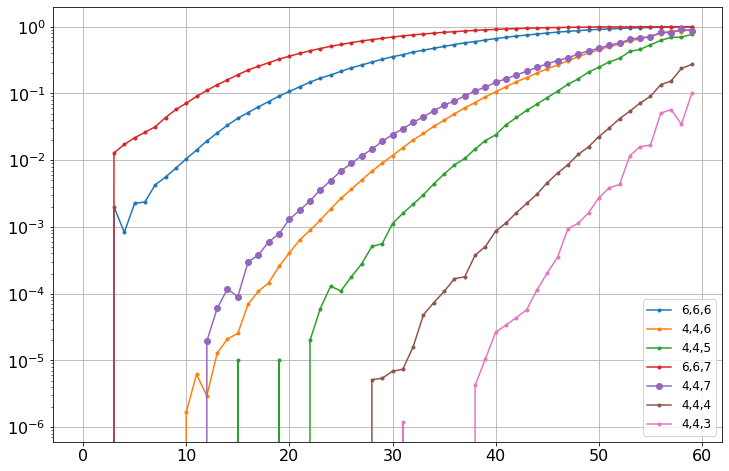

In [1784]:
slurm_36291958 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.978048293753741e-06, 0.0, 0.0, 0.0, 9.990109791306606e-06, 0.0, 0.0, 1.991218725420894e-05, 5.983187243844796e-05, 0.00012927348302539728, 0.00010986815821014782, 0.00017888909869709106, 0.0002787012521649115, 0.0005096992774263184, 0.000559753708368318, 0.0011251057898143079, 0.001599328282121509, 0.002189189999700111, 0.003038756600577862, 0.004420054876527813, 0.006210063897763578, 0.008491573285969447, 0.01059837930621532, 0.014673836988464846, 0.019699021152864406, 0.023997469789017303, 0.03386253537339921, 0.043613278562864836, 0.05567863664029215, 0.06924976844705157, 0.08673689156909582, 0.10833071031371315, 0.13696098562628337, 0.16538139923813064, 0.20873159390338414, 0.24757281553398058, 0.29651633810423983, 0.3355731225296443, 0.4262508122157245, 0.458502024291498, 0.5346534653465347, 0.6238244514106583, 0.6923076923076923, 0.696969696969697, 0.7659574468085106]


slurm_36291183 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.95194237808478e-05, 0.0, 9.990209594597294e-06, 9.977052778609199e-06, 2e-05, 2.9906989263390855e-05, 5.993107925885232e-05, 0.0001294047382042604, 0.0002991235679459185, 0.0002890375051079904, 0.00040845196704489983, 0.0006897723751162117, 0.001029289790044869, 0.0015174355339476284, 0.002274518410630381, 0.0032320169182120163, 0.004767759153197997, 0.006319650724666574, 0.00729766474728087, 0.01019859370953927, 0.013561855413282847, 0.01733924966520757, 0.02319808593360582, 0.03030938123752495, 0.03795915925497547, 0.04785607196401799, 0.05839095598726814, 0.07132732324091398, 0.08963902123879512, 0.10790966919039131, 0.12872319102024454, 0.14720115745360207, 0.1762752601119509, 0.21054097056483692, 0.24682510407335195, 0.28122828956509655, 0.3264238851383474, 0.3691151259396017, 0.4308853303883674, 0.48777838131450296, 0.5237901586010574, 0.6269329896907216, 0.6650438169425511, 0.7374784110535406, 0.7727272727272727, 0.8222222222222222, 0.8392857142857143, 0.9230769230769231]


slurm_36288575 = [0.0, 0.0, 0.0, 0.0020016012810248197, 0.0008304498269896194, 0.002243829468960359, 0.0023711055969120485, 0.004277398871119473, 0.005588938101760666, 0.0076175623800383875, 0.010454981608827763, 0.014184468057457591, 0.01937442575799944, 0.02555731927680773, 0.0333369974717445, 0.04240056747225081, 0.05176738654647572, 0.06291809979562335, 0.07560298698187046, 0.09127552848441418, 0.10716784964510646, 0.12592200211885582, 0.1474155644662557, 0.1697250910542334, 0.18866341775185747, 0.21438271358389582, 0.2411982858904123, 0.2666633381596685, 0.2945711724275326, 0.3258747798748396, 0.354369417077996, 0.38110333552644693, 0.41606479313814365, 0.4447003918987645, 0.47498728674131757, 0.5060213269905358, 0.540067111412935, 0.5724420463629096, 0.5977769781296229, 0.6319590821453902, 0.6645581004916656, 0.692273086266708, 0.7238867125039974, 0.7490701115866096, 0.7759833706427887, 0.8040189952511873, 0.8294009437734944, 0.8513563508014118, 0.872653334719671, 0.8950784294778884, 0.9122971428571428, 0.9237293773283661, 0.9403716045642735, 0.9522593624264933, 0.9633559531153609, 0.9737232464505192, 0.9813460131675201, 0.9872530274059911, 0.9886649874055415, 0.9905437352245863]

slurm_36292059 = [0.0, 0.0, 0.0, 0.012861736334405145, 0.017185821697099892, 0.021677662582469368, 0.02615085368489302, 0.03168849391955098, 0.043577673167451245, 0.05748194450310428, 0.07145646231940649, 0.09001979736811459, 0.11083870967741935, 0.1346307768214462, 0.15994604855629932, 0.19026526551548298, 0.22451325310838363, 0.25552962763517423, 0.2882610861983059, 0.32629391726521684, 0.3615118695547918, 0.3977704787498756, 0.4368108312895057, 0.47001515695424995, 0.5095146056669191, 0.5413180333094271, 0.5770880191932823, 0.6105749558378826, 0.6414171716565669, 0.6690116319565369, 0.7005323026834847, 0.7275333653000879, 0.7548259659414001, 0.7760802576862093, 0.801559913027867, 0.8244213806950424, 0.84131, 0.8627382461885602, 0.877764912560888, 0.89711979172364, 0.9112054329371817, 0.9239651381661157, 0.9359516499642782, 0.9481255553687649, 0.9575196779426786, 0.9666770719525519, 0.9715937912143654, 0.9778821287600381, 0.9820067933535298, 0.9874572405929305, 0.9889107494187086, 0.9937787395185286, 0.9926184926184927, 0.9940546967895363, 0.9961389961389961, 0.9983844911147012, 1.0, 1.0, 1.0, 1.0]


slurm_36320538 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9479887016655304e-05, 6.0070883642698386e-05, 0.00011806096668319521, 8.978989165353073e-05, 0.00029912655047261994, 0.0003798670465337132, 0.0005995203836930455, 0.0007881714422539708, 0.0012998700129987, 0.0017739154699381123, 0.0024601348592145494, 0.003600664432000159, 0.004936403988932901, 0.0069097353591270234, 0.008920197162299694, 0.011604238590329469, 0.014617993058939351, 0.019171809675492733, 0.024225037851621643, 0.02953359084149275, 0.0367737239378197, 0.04473133286810886, 0.05487190235236584, 0.06668461945084428, 0.07709383249340053, 0.09187977853941472, 0.10898893630068733, 0.12437317959343003, 0.14676946193474527, 0.16622857515260792, 0.18935399691111465, 0.21471585113034322, 0.24590711660541262, 0.2775939368061486, 0.3109672085974097, 0.3411293328363772, 0.38998616178135614, 0.43413122094024453, 0.4756892230576441, 0.5259552992069214, 0.5711929631665751, 0.6438356164383562, 0.6850068775790922, 0.7014218009478673, 0.8293650793650794, 0.8015267175572519, 0.9230769230769231, 0.8636363636363636]

slurm_36320546 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.998900120986691e-06, 0.0, 9.976853699417352e-06, 0.0, 0.0, 9.957084963805996e-06, 2.998380874327863e-05, 9.998900120986692e-05, 4.998450480351091e-05, 0.00014974393786624873, 0.00016980472456674825, 0.0002908988775315726, 0.0004489284786050138, 0.0008608037931813051, 0.0010827905058178506, 0.001631184909448325, 0.002282098493296336, 0.0033666699673234974, 0.005045408678102927, 0.006535947712418301, 0.009616095865078778, 0.014076070679844266, 0.01874745279174025, 0.020355731225296443, 0.030566461020751542, 0.04849785407725322, 0.06015037593984962, 0.06700507614213198, 0.09122203098106713, 0.14204545454545456, 0.13368983957219252, 0.1588785046728972, 0.22448979591836735]

slurm_36331520 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.149558631329709e-06, 5.404330381848367e-06, 6.884278716908133e-06, 7.375111702212656e-06, 1.601742696053306e-05, 4.8378371642650956e-05, 7.328787313706298e-05, 0.000107886306119165, 0.00016801493466085874, 0.00017874677064167707, 0.0003761894224385926, 0.0005082260954552859, 0.0008684307884027493, 0.0011469561007253087, 0.0016297806418916973, 0.002246624662466247, 0.003094913694316367, 0.004616643291257597, 0.006391137622496805, 0.008561816313785532, 0.012219903339191564, 0.015844736742352452, 0.022537517053206002, 0.03028135431568908, 0.04177423140107956, 0.05406420123897128, 0.07200460829493087, 0.09036445332001997, 0.1357504215851602, 0.15326251896813353, 0.23661971830985915, 0.2727272727272727]

slurm_36387289 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.193281823334626e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.210154049536673e-06, 1.0543296045209654e-05, 2.6531884692429128e-05, 3.382406413042559e-05, 4.386878845373488e-05, 5.7427533630999385e-05, 0.00011429224527115835, 0.000204797378593554, 0.00035278346151132434, 0.0009436304941643904, 0.0011337868480725624, 0.0016333197223356473, 0.0027347310847766638, 0.003850509626274066, 0.004322766570605188, 0.011682242990654205, 0.015952143569292122, 0.016778523489932886, 0.05056179775280899, 0.05741626794258373, 0.034482758620689655, 0.1]



slurm_36476424 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6579513689704453e-06, 6.216462186503812e-06, 2.9350703732039817e-06, 1.2811222631024777e-05, 2.1011322391630715e-05, 2.5374839489387417e-05, 6.934508070761626e-05, 0.0001088697232813529, 0.00014543969062834962, 0.0002562188728988525, 0.0004094524287431344, 0.0006364657273553139, 0.0008909434826929535, 0.0012678607980496329, 0.001863193540929058, 0.0026787869229317066, 0.0036711736249772173, 0.005026219343378827, 0.006832991034732324, 0.00902887215479427, 0.011738237019025516, 0.015377030060792328, 0.020104823597675237, 0.025137042342190177, 0.032103021828931155, 0.03956141315730393, 0.049544385418180445, 0.0607313057793952, 0.07307868916486776, 0.08873069033774993, 0.10577642893272635, 0.12619591840908975, 0.14956606162384137, 0.17297329712410797, 0.2020969440324279, 0.23461759631972398, 0.26692864529472593, 0.3086735418619847, 0.3560222258538977, 0.4017774163568773, 0.4541991341991342, 0.5009693679720822, 0.5507589197713385, 0.6171052631578947, 0.6536160957041871, 0.7245681381957774, 0.7848101265822784, 0.8699690402476781, 0.8430232558139535, 0.9176470588235294]


slurm_37061419_box = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1598956789826322e-06, 4.106468406372007e-06, 3.264235681546763e-06, 7.369905986011051e-06, 9.857764776481344e-06, 1.750377126708209e-05, 2.1907578966063987e-05, 4.332637248970511e-05, 7.534856643403788e-05, 0.00011865968200017961, 0.00019351970943311402, 0.0002771093447676151, 0.00039061096094079547, 0.0005911376120581907, 0.0008390177428548433, 0.00119315865925977, 0.001735129041446516, 0.0024202997889975933, 0.0032038068764060827, 0.004456220758139979, 0.005919719296396568, 0.008079685742081717, 0.010690258142912183, 0.013527326352426865, 0.01781065814048668, 0.023315381748416, 0.029796379266382546, 0.03705504220064096, 0.04802504526950988, 0.05903479367897312, 0.07399666795585041, 0.09119587589204993, 0.11253636938646426, 0.13624131353045374, 0.16581071166544387, 0.20658418029164827, 0.24254600246564084, 0.2869137422105608, 0.3444366409150196, 0.3972825284300694, 0.46449136276391556, 0.5209721677773422, 0.6066225165562914, 0.6638349514563107, 0.7328605200945626, 0.8584905660377359]

slurm_37070148_box = [0.0, 0.0, 0.0, 0.0, 0.0, 9.84067940050581e-06, 1.056339887922338e-05, 6.328072595648817e-06, 1.0264474448643755e-05, 1.568947393193906e-05, 4.194098693433404e-05, 6.841427121697587e-05, 0.00011625997569706722, 0.00015353822770492384, 0.0002548388240242116, 0.0004357718148098207, 0.0006491785123090608, 0.0009692445572197287, 0.0013564075930522497, 0.001963698029492456, 0.0027260575930963325, 0.0037374123450039268, 0.005019347380860865, 0.006671804197929443, 0.008759991013368995, 0.011150170691777607, 0.01436205607159916, 0.018009488649406134, 0.02236878199169507, 0.027939683749309264, 0.03411073857366219, 0.04147473223034385, 0.04947457792252982, 0.05882149645757733, 0.06950879381123817, 0.0814068644624314, 0.09579425179734, 0.11091253410652559, 0.12741021309063164, 0.146894202105007, 0.16734466827462038, 0.1895795256715495, 0.21335030287856344, 0.24289114595635664, 0.27241625261427244, 0.30348088923556943, 0.3357683564697314, 0.3716808636774938, 0.4111628315475145, 0.4586084306754698, 0.49597076461769113, 0.5386952119195718, 0.6138119036801454, 0.6289559839941797, 0.6839285714285714, 0.7761658031088083, 0.8160919540229885, 0.8754325259515571, 0.8322147651006712, 0.8902439024390244]
slurm_37106032_box = [0.0, 0.0, 0.0, 5.829544129649061e-05, 4.892128565138692e-05, 7.269114742976218e-05, 0.00010845325325868135, 0.0002811582039446076, 0.0004256749187857063, 0.0005568951200817578, 0.0008533262323679955, 0.0012122070449632797, 0.0017072947869407344, 0.0021935534374462884, 0.0029657070374979125, 0.003991519388258645, 0.005062173581530806, 0.006635413172245831, 0.008193455343846563, 0.010249232383804607, 0.012482146761759875, 0.015050148424663167, 0.018317214617269553, 0.02175114913176711, 0.025889786693701858, 0.030243256284558147, 0.035014629108170235, 0.040710834797039734, 0.04705010291574588, 0.05343495856068607, 0.060931119906603264, 0.06926570682642348, 0.07737492256677476, 0.08727096351584025, 0.09756106960692312, 0.11015833497519299, 0.12283225991088799, 0.13623808887632316, 0.15042673203000415, 0.16666964397363296, 0.1838889373392055, 0.202597558856165, 0.22362209987217296, 0.24852817493692178, 0.2728405315614618, 0.30302606506651747, 0.33611371375031424, 0.3677524530159023, 0.3973942723942724, 0.4394663248659986, 0.4878904020223436, 0.517491829076383, 0.5749424880552114, 0.6125068268705626, 0.671267252195734, 0.7263610315186246, 0.7978468899521531, 0.821826280623608, 0.8663967611336032, 0.9044117647058824]

slurm_37108564_box = [0.0, 0.0, 0.0, 0.00037988508476185953, 0.0005209481255885711, 0.0007022541368703203, 0.0011394474505551366, 0.0012188229846864084, 0.001809991978444641, 0.002181092733989947, 0.0028056910498702923, 0.0034608400349031908, 0.004314512102957328, 0.005310656407396773, 0.006486915331754384, 0.007906638077819111, 0.009341801403687134, 0.011119831255325164, 0.013164097566595779, 0.015333743470833588, 0.017797631102781843, 0.020699246574514142, 0.02397210859593861, 0.02737432815546218, 0.03147367911811467, 0.0358238932652347, 0.04066473895236969, 0.04583478156937039, 0.05203327415749818, 0.058241940011227844, 0.0654340510907073, 0.07268614886039439, 0.08113176544550495, 0.09095745404574336, 0.10128475183822086, 0.11263988325961057, 0.12409401999493037, 0.13820833259413387, 0.15386545122622064, 0.16923324177429724, 0.18545135767748597, 0.20516349797375477, 0.22633587786259543, 0.24949166502226378, 0.27471160619936597, 0.3041046369303464, 0.33491044271713416, 0.3619848695998407, 0.4020468331695415, 0.4377397811774736, 0.4836858610796023, 0.5290366218958353, 0.5715734569689945, 0.6367057781713527, 0.6744269340974212, 0.7380681818181818, 0.7827352085354026, 0.8410351201478743, 0.8786764705882353, 0.9115646258503401]


slurm_37112425_box = [0.0, 0.000612369871402327, 0.00014983518130056938, 0.000792000792000792, 0.0006832864005300646, 0.001069442463995437, 0.001196640333017632, 0.001520678068248312, 0.0020902775176959666, 0.002406070079939286, 0.00288002594937591, 0.003698418971139662, 0.004579243091250829, 0.005489834748699926, 0.006630807314500975, 0.00799559259225287, 0.009519665835948656, 0.011377784821797313, 0.013212136730252209, 0.015370818690868841, 0.017935170306482822, 0.020918321252597415, 0.024052883808681917, 0.0277119349311039, 0.031435635887936894, 0.03613997205944941, 0.040710557463569864, 0.04592940293961715, 0.05175483834054835, 0.058323984070569095, 0.06533614529935775, 0.07365452798018478, 0.08168340997178533, 0.09067610071677179, 0.10216271884654995, 0.1122203007912802, 0.12424958108482538, 0.1381030878514004, 0.15228668793818237, 0.16780003744617114, 0.18758808133682303, 0.20710278484424752, 0.2258205381039583, 0.2501520212212812, 0.2773499076701347, 0.3015538468247162, 0.33019464953495065, 0.36539951448788804, 0.40210711150131695, 0.4374756525126607, 0.4829460524527789, 0.5278892455858748, 0.5679567956795679, 0.6047945205479452, 0.6794825727632052, 0.736936936936937, 0.7672064777327935, 0.8304761904761905, 0.8869257950530035, 0.9361702127659575]

slurm_37113760_box =   [0.0, 0.0, 0.00015108022359873092, 0.0008141250699638732, 0.0008032807677673023, 0.0008707328843289063, 0.0011453408123109454, 0.0015757821083675475, 0.001927481239101992, 0.0024446488870870217, 0.003066034338012932, 0.0037423659054699947, 0.004561730809737309, 0.005566109687958066, 0.006737620038058149, 0.007974355258916663, 0.009535013721466902, 0.011359387201442422, 0.013312027577421597, 0.015296884315587254, 0.01804649337713363, 0.020682728554640394, 0.024064613315030594, 0.027595843206013482, 0.03148072011171818, 0.0358709693446614, 0.04073058615130626, 0.04616687690165728, 0.05207385676095116, 0.05830606396501035, 0.06529553503119405, 0.07329625467000138, 0.08168370196568901, 0.0905114308905815, 0.10099947133751608, 0.11250694099141542, 0.12419907817360307, 0.13808378890247014, 0.1512052898385339, 0.16864664126419218, 0.18643868534533434, 0.20635935592629193, 0.22512502529413464, 0.2503337601830913, 0.2750863034148162, 0.3013601222445799, 0.3338771936806081, 0.3621943159286186, 0.3959636876559731, 0.44402201100550276, 0.48242925368878753, 0.5357323872275722, 0.5761240310077519, 0.6245335820895522, 0.6757679180887372, 0.7191650853889943, 0.7814776274713839, 0.8445297504798465, 0.8581314878892734, 0.949685534591195]

slurm_37107641_box = [0.0, 0.0, 0.0, 5.214851898206091e-05, 2.2048285745783266e-05, 1.0899301354783159e-05, 3.6529235564863746e-05, 6.402747908749544e-05, 0.00011049002325312762, 0.000195199873925953, 0.0002809137431959842,0.0004568955670354159, 0.0006399045928061908, 0.0009495588825737625, 0.0013153740923918763, 0.0017788855671570722, 0.002542448846991169, 0.003399257000132601, 0.004565429648865447, 0.00593130551167007, 0.007579056863291861, 0.009575034394076615, 0.012062486882346913, 0.014898123212279638, 0.01797764070560504, 0.021990983806153122, 0.026142737904609005, 0.03122231529973302, 0.037019527047818586, 0.043343803425843555, 0.05069055556635997, 0.05827489974167415, 0.06740400123179063, 0.0776826200988153, 0.08745301611517049, 0.09964251649153182, 0.11285684752579452, 0.12825089809988324, 0.14162739219739826, 0.1612040967264776, 0.17830716477170186, 0.19817623309454982, 0.22127252622455992, 0.2449981089258699, 0.2734529018608453, 0.2998430634023854, 0.33174071316290227, 0.36428669693217774, 0.39796341693381104, 0.4421113566992948, 0.4868295546261648, 0.536370473836897, 0.5852049630909376, 0.6244084682440847, 0.6653831343858299, 0.736284289276808, 0.7900677200902935, 0.8244575936883629, 0.8450184501845018, 0.9183673469387755]


plt.figure(figsize=(12,8))
# plt.plot(lst1)
# plt.plot(lst2)
plt.plot(slurm_36288575,  marker='.', label='6,6,6')
plt.plot(slurm_36476424,  marker='.', label='4,4,6')
plt.plot(slurm_36291958,  marker='.', label='4,4,5')
plt.plot(slurm_36292059,  marker='.', label='6,6,7')
plt.plot(slurm_36320538,  marker='o', label='4,4,7')
# plt.plot(slurm_36320546,  marker='.', label='4,4,4')
plt.plot(slurm_36331520,  marker='.', label='4,4,4')
plt.plot(slurm_36387289,  marker='.', label='4,4,3')


plt.grid()
plt.legend()
plt.yscale('log')
print(len(slurm_36291183), len(slurm_36288575), len(slurm_36292059), len(slurm_36320538), len(slurm_36331520))


In [1794]:
slurm_36345923 = np.array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     , 826.47109, 826.50723, 827.56426,
       827.62832, 828.52305, 829.07402, 829.54316, 829.96484, 830.43301,
       830.84512, 831.25   , 831.58105, 831.90684, 832.13437, 832.37441,
       832.64141, 832.82129, 833.01191, 833.15801, 833.26758, 833.37734,
       833.45332, 833.52441, 833.54258, 833.54492, 833.57187, 833.51309,
       833.44199, 833.35293, 833.21172, 833.07598, 832.91973, 832.66309,
       832.43223, 832.1293 , 831.79922, 831.36895, 830.83496, 830.99238])



slurm_36345923_prob = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 7.566721497526379e-32, 2.4117466613491674e-32, 1.2410123140994956e-32, 7.25433604289158e-33, 7.94510207325346e-33, 9.058813457830646e-33, 1.3829448709873862e-32, 1.4272547374408104e-32, 2.1758010409394186e-32, 3.2410461633071627e-32, 3.8614838321690674e-32, 4.828390282254218e-32, 6.202749925957596e-32, 8.059090510667885e-32, 1.0503403670751209e-31, 1.3851468128867602e-31, 1.7439004836113408e-31, 2.251683695857387e-31, 2.981333094558089e-31, 3.8070495634001742e-31, 4.980310695422976e-31, 6.3682073977775855e-31, 8.379473247749356e-31, 1.1016453887915363e-30, 1.446577118798057e-30, 1.9062613123981468e-30, 2.5224851504389283e-30, 3.356108797258348e-30, 4.5176732363466565e-30, 5.878074996780508e-30, 8.06464525003624e-30, 1.0868709872189618e-29, 1.4549511013397235e-29, 2.0091327491361462e-29, 2.8044005939873546e-29, 3.7826685099069353e-29, 5.404644629254872e-29, 7.593041454948877e-29, 1.0657065276978453e-28, 1.498012519712644e-28, 2.2092976330421295e-28, 3.104868706911063e-28, 4.604973725693137e-28]


slurm_36358701 = np.array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     , 695.75466, 696.06021, 696.77925, 697.6666 ,
       698.14805, 698.71785, 699.29492, 699.74036, 700.25667, 700.66782,
       701.07957, 701.47249, 701.79263, 702.09814, 702.36431, 702.61108,
       702.83835, 703.04512, 703.20715, 703.36587, 703.49351, 703.60005,
       703.68577, 703.73833, 703.77427, 703.78501, 703.77458, 703.72173,
       703.66218, 703.57786, 703.45369, 703.31279, 703.11528, 702.89248,
       702.63887, 702.35498, 702.0051 , 701.60046, 701.11714, 701.23496])


slurm_36358701_prob = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.238313069260257e-33, 5.274185144884824e-34, nan, 2.676661728812486e-33, 4.165529649615777e-33, 6.851492613355415e-33, 8.768085374302096e-33, 1.125873078905952e-32, 1.6811600488598996e-32, 1.49089016528303e-32, 2.2327445538833144e-32, 3.069220171599633e-32, 3.9676123093739894e-32, 4.818964436927689e-32, 6.421431208788603e-32, 8.034053322569344e-32, 1.047687844805822e-31, 1.3720262667292284e-31, 1.7398261016015257e-31, 2.257744985293499e-31, 2.9272669728982977e-31, 3.7646136880911085e-31, 4.94670996352094e-31, 6.461318913164633e-31, 8.369257932092629e-31, 1.1108839367959484e-30, 1.4510470961615603e-30, 1.9063999951098096e-30, 2.5247559753052854e-30, 3.342272446605094e-30, 4.4436900089078814e-30, 6.0288036750013385e-30, 8.071845311930924e-30, 1.0806292717627756e-29, 1.487581164815377e-29, 2.0009926260076816e-29, 2.745352182896086e-29, 3.805534200473024e-29, 5.273560027105623e-29, 7.50376546664221e-29, 1.0350471517328423e-28, 1.508936957018204e-28, 2.1636075563894114e-28, 2.995283498671118e-28, 4.653379840718894e-28]



slurm_36367866 = np.array([   0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
       1151.70728, 1152.70034, 1153.26094, 1153.61821, 1154.50649,
       1155.15952, 1155.76416, 1156.25518, 1156.75757, 1157.19307,
       1157.60132, 1157.98677, 1158.35049, 1158.66455, 1158.93887,
       1159.21401, 1159.44326, 1159.65181, 1159.82344, 1159.98887,
       1160.12256, 1160.22778, 1160.33013, 1160.39038, 1160.43228,
       1160.45376, 1160.45527, 1160.42896, 1160.37539, 1160.32368,
       1160.19756, 1160.09399, 1159.9375 , 1159.75112, 1159.54199,
       1159.30449, 1159.05039, 1158.71763, 1158.35112, 1157.90259,
       1157.44302, 1156.86606, 1156.34678, 1155.54067, 1155.31045])

slurm_36367866_prob = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.4336804276955552e-35, 1.5772829294961136e-34, 1.6558787340799798e-35, 2.3028526090636317e-34, 9.844148894601314e-35, 1.4191113478056256e-34, 2.376589971404531e-34, 2.397680438954913e-34, 2.9093490618044133e-34, 3.816537351359723e-34, 4.991220052460682e-34, 5.809899876977946e-34, 8.068842107905553e-34, 1.0357494337079602e-33, 1.3030423088528513e-33, 1.7126870560315413e-33, 2.1683708816894207e-33, 2.8853100536249878e-33, 3.59230033277934e-33, 4.6224978685473754e-33, 6.066700775943597e-33, 7.792082826628722e-33, 1.0193611177507542e-32, 1.3441615726298158e-32, 1.7391804841583997e-32, 2.2332595019564007e-32, 2.9358920837825727e-32, 3.860615248837121e-32, 5.098546394761348e-32, 6.619122381680199e-32, 8.779814890794079e-32, 1.1610095750091477e-31, 1.534605669065037e-31, 2.0168565523260373e-31, 2.731437863725909e-31, 3.599293110446007e-31, 4.835011362446875e-31, 6.461001362148195e-31, 8.697680363307585e-31, 1.1823941416069786e-30, 1.6039044366420354e-30, 2.202918917142314e-30, 2.9690628581063064e-30, 4.035897044915181e-30, 5.373792340467529e-30, 7.591572786165597e-30, 1.0346520158425649e-29, 1.3326105091615266e-29, 1.7185346367831306e-29, 2.0496658464860748e-29]


slurm_36367113 = np.array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     , 422.52105, 422.54169, 423.14872,
       423.72257, 424.27327, 424.75181, 425.24368, 425.62932, 425.99871,
       426.36364, 426.67927, 426.97579, 427.2203 , 427.45246, 427.65334,
       427.82619, 427.97689, 428.10732, 428.20333, 428.28268, 428.33971,
       428.37023, 428.38862, 428.37546, 428.33585, 428.28273, 428.20541,
       428.11391, 427.98559, 427.83083, 427.65295, 427.45311, 427.23155,
       426.98   , 426.68559, 426.35193, 426.0231 , 425.59394, 425.18284,
       424.68304, 424.137  , 423.52166, 422.93055, 422.09085, 421.75044])

slurm_36367113_prob = [nan, nan, nan, nan, nan, nan, nan, nan, 1.6308369642117636e-35,4.0196954532768486e-36, 5.5266077443806284e-36, 1.1032207669303368e-35, 1.280653584677746e-35, 2.637698905982795e-35, 1.813082148594595e-35, 2.7650194913586906e-35, 3.467110827621077e-35, 5.032923665199928e-35, 6.033828254861632e-35, 7.218975159212729e-35, 9.715783087812856e-35, 1.249697661086957e-34, 1.6306218266771987e-34, 2.1459041644014716e-34, 2.694453969073822e-34, 3.5353473589262948e-34, 4.645018782195345e-34, 5.9928294730532195e-34, 7.771900515652392e-34, 1.0139589038260215e-33, 1.3196875567618225e-33, 1.697730120646626e-33, 2.2147744113855168e-33, 2.893183509385066e-33, 3.772337990183553e-33, 4.938914754084668e-33, 6.453809291652744e-33, 8.309724546564202e-33, 1.073753819479237e-32, 1.4120834209470438e-32, 1.8511891717527236e-32, 2.423536955210218e-32, 3.1693540947875946e-32, 4.1207554370151995e-32, 5.346641781409529e-32, 7.080427834706444e-32, 9.27366641435993e-32, 1.1924328355303464e-31, 1.5612234979000693e-31, 2.0402602776064815e-31, 2.600655672745292e-31, 3.366879964573814e-31, 4.336738767957013e-31, 5.414716982018167e-31, 7.063176824017667e-31, 9.12226984094624e-31, 1.0991750857802855e-30, 1.1139947999137785e-30, 1.5305373502368295e-30, 1.6264606185214357e-30]



slurm_36386443 = np.array([   0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
          0.    ,    0.    ,    0.    , 1096.2875, 1140.6625, 1128.975 ,
       1143.9625, 1148.6625, 1150.05  , 1149.8   , 1150.1375, 1152.2125,
       1151.8875, 1152.925 , 1153.425 , 1153.6375, 1153.825 , 1154.15  ,
       1154.3875, 1154.575 , 1155.0625, 1155.0375, 1155.2125, 1155.4125,
       1155.4375, 1155.5375, 1155.525 , 1155.55  , 1155.5875, 1155.425 ,
       1155.275 , 1155.1   , 1154.9625, 1154.85  , 1154.25  , 1155.2   ])


slurm_36386443_prob = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.777309341061691e-31, 1.3488686799998629e-30, 4.153714063202968e-31, 3.992211924120405e-30, 1.1464032807407026e-30, 1.786545075148562e-30, 3.502943336105228e-30, 4.0543163225037966e-30, 4.3454645139790784e-30, 5.3650507955340735e-30, 7.0407801813744e-30, 9.298051453467847e-30, 1.3219384669145936e-29, 1.5124042948525185e-29, 2.0333989939610181e-29, 2.6443675378653674e-29, 3.237055797571422e-29, 4.538921683679024e-29, 5.77315886824207e-29, 7.552151603567397e-29, 1.019445859464126e-28, 1.3391599812624275e-28, 1.7781035999362934e-28, 2.33893675093673e-28, 3.1921050239809114e-28, 4.470392045760488e-28, 6.2458774476091475e-28, 8.540384639331866e-28, 1.1336987147246004e-27, 1.642055096744471e-27, 2.3166987022241154e-27, 3.343723270752266e-27, 5.0899651599091606e-27, 7.344181331703976e-27]


slurm_36391511 = np.array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
       289.65262, 289.96591, 290.47322, 291.18497, 291.69766, 292.22299,
       292.67577, 293.09023, 293.51964, 293.85911, 294.19851, 294.47527,
       294.71627, 294.95927, 295.14332, 295.31042, 295.45446, 295.56758,
       295.64775, 295.71512, 295.7278 , 295.73728, 295.70387, 295.6451 ,
       295.54449, 295.41536, 295.24542, 295.02871, 294.77848, 295.40847])

slurm_36391511_prob = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.1112098685600336e-31, 5.710399623140739e-30, 1.1458738707556335e-30, 4.836952349386504e-31, 8.277036110674024e-31, 1.0575033742577695e-30, 1.8527506422998664e-30, 1.7524140857261582e-30, 2.604722080864491e-30, 3.482033654211839e-30, 4.627670131303235e-30, 6.11028940541014e-30, 7.167788638825645e-30, 9.390486302410764e-30, 1.1993711526379259e-29, 1.560938274723236e-29, 2.000145343071283e-29, 2.576885589406789e-29, 3.490576377516777e-29, 4.5127590884350265e-29, 5.802884733694827e-29, 7.597807230548112e-29, 1.0035086614587627e-28, 1.3528557408491778e-28, 1.7966173849684004e-28, 2.382526797895921e-28, 3.237558195024253e-28, 4.327950519415028e-28, 6.043795627537932e-28, 8.253126632892483e-28, 1.1740283788864181e-27, 1.6288507049215135e-27, 2.3252055367641743e-27, 3.3062094228804316e-27, 4.87227075918134e-27, 7.371686872738226e-27]


slurm_36387184= np.array([   0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     , 1093.02866, 1094.0686 , 1094.55049,
       1095.42246, 1096.10381, 1096.74995, 1097.19792, 1097.8146 ,
       1098.3251 , 1098.73826, 1099.1927 , 1099.54883, 1099.90781,
       1100.21045, 1100.50854, 1100.77703, 1101.01296, 1101.21948,
       1101.3873 , 1101.5217 , 1101.65408, 1101.75242, 1101.82942,
       1101.88357, 1101.92224, 1101.93643, 1101.92205, 1101.88889,
       1101.83611, 1101.7564 , 1101.65989, 1101.52859, 1101.38882,
       1101.20481, 1101.01594, 1100.78428, 1100.52576, 1100.24414,
       1099.91724, 1099.55   , 1099.13264, 1098.72507, 1098.22612,
       1097.60493, 1097.15059, 1096.36379, 1095.50352, 1095.33779])

slurm_36387184_prob = [nan, nan, nan, nan, nan, nan, nan, 5.241296920540035e-37, 3.062357151908385e-36, 1.7538051737062487e-35, 3.378204118743069e-35, 7.051193495766723e-35, 1.4132119220990537e-34, 1.113377311716967e-34, 2.1467018140241857e-34, 2.014752950151388e-34, 5.419214684889041e-34, 7.062774742470256e-34, 9.411818508833043e-34, 1.3478695717809737e-33, 1.5303155861131934e-33, 2.49576878823477e-33, 2.985849749891343e-33, 5.123988282971995e-33, 6.868854636184768e-33, 1.0068375825197242e-32, 1.3900479607952742e-32, 2.1027486481873508e-32, 2.97985696811925e-32, 4.149993470169975e-32, 6.089393795989759e-32, 7.670199966683468e-32, 1.1075643423387088e-31, 1.6607552352083084e-31, 2.14695787374084e-31, 3.667563838369601e-31, 4.346424025627252e-31, 5.757718193126412e-31, 7.284705815059118e-31, 1.1248767246080282e-30, 1.6019226259370783e-30, 2.1670017493004022e-30, 2.9874469799191035e-30, 5.9284514809505196e-30, 6.950660109110648e-30, 7.951596780265447e-30, 1.1339987039370758e-29, 1.7370666741939483e-29, 1.7426978559081419e-29, 2.627683003659838e-29, 3.437287344082502e-29, 4.6226832154406196e-29, 6.492128486068475e-29, 1.0086482732686742e-28, 8.681626887951446e-29, 8.847451917121113e-29, 1.5817374924181208e-28, 6.752218690631981e-29, 1.0460008671900867e-28, 1.1322682364779532e-28]



slurm_36471543 = np.array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     , 239.07352, 239.42852, 240.04127, 240.69008, 241.28691,
       241.76916, 242.27054, 242.63708, 243.01349, 243.38547, 243.67   ,
       243.92089, 244.17175, 244.37624, 244.53958, 244.70294, 244.82333,
       244.92267, 244.9902 , 245.05004, 245.07545, 245.0688 , 245.05074,
       245.00649, 244.94798, 244.85515, 244.74701, 244.61164, 244.44449,
       244.23895, 244.02117, 243.74998, 243.46334, 243.12446, 243.5821 ])


slurm_36471543_prob = [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.529777263525469e-26, 1.2052063877915527e-27, 3.1183571917773665e-27, 1.4246031980695974e-27, 2.353872470858266e-27, 2.5945897366142365e-27, 2.992187339840477e-27, 2.9771839847255998e-27, 2.2567725834440432e-27, 2.429980653044701e-27, 2.67484062261976e-27, 2.595837370885514e-27, 3.0484390947589903e-27, 3.322572880507112e-27, 3.4047977896463874e-27, 3.384495215221908e-27, 3.6997316822067996e-27, 4.9497661736658644e-27, 4.983965174766267e-27, 5.573424305377165e-27, 5.584631594577487e-27, 6.955524517366081e-27, 7.984927625279782e-27, 8.361820071597331e-27, 9.400001684804576e-27, 1.1191974327538933e-26, 1.2824571888448935e-26, 1.5062750300169724e-26, 1.822452927758745e-26, 2.069700417999465e-26, 3.1912368175247584e-26, 3.428228321257843e-26, 5.191022066429034e-26, 5.181023953857815e-26, 8.015896666675464e-26, 8.130270863516226e-26, 1.3685331490322966e-25, 1.7841432315399005e-25, 2.3733488257008204e-25]


slurm_36595204 = np.array([   0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
       1863.96396, 1864.68145, 1865.56926, 1866.16162, 1866.87673,
       1867.50142, 1868.11663, 1868.66614, 1869.10483, 1869.52249,
       1869.92866, 1870.29583, 1870.60168, 1870.88657, 1871.16121,
       1871.37722, 1871.57708, 1871.75115, 1871.9    , 1872.01858,
       1872.11428, 1872.1999 , 1872.23445, 1872.25542, 1872.26406,
       1872.23906, 1872.19983, 1872.13945, 1872.06934, 1871.96472,
       1871.84578, 1871.6981 , 1871.51628, 1871.35156, 1871.12031,
       1870.88235, 1870.64375, 1870.32129, 1870.0363 , 1869.6853 ,
       1869.32908, 1868.89502, 1868.46794, 1867.90688, 1867.41609,
       1866.76064, 1866.13252, 1865.3554 , 1864.54805, 1864.07231])

slurm_36595204_prob = [nan, nan, nan, nan, nan, 8.507667977245781e-36, 9.994301449972788e-35, 1.5023829994108821e-34, 3.3772628675543733e-34, 7.830075383192067e-34, 2.4044112504776902e-33, 1.679590001593069e-33, 2.477139192619475e-33, 2.5503573223455834e-33, 3.914104874020957e-33, 4.027997843565237e-33, 4.209303562547092e-33, 6.532640505018381e-33, 8.448848788854782e-33, 1.1649731053693585e-32, 1.2792415816757556e-32, 1.4759756921286608e-32, 2.048764186619384e-32, 2.634169256127279e-32, 3.9619821832433255e-32, 4.5566190980971694e-32, 6.210365554545646e-32, 7.441572892359175e-32, 9.436999898403698e-32, 1.1289120979280428e-31, 1.4934636821547573e-31, 2.476384530236727e-31, 2.674119459037075e-31, 3.6386818746692785e-31, 4.3503524132539695e-31, 6.098878878907841e-31, 6.8254717412837955e-31, 9.602346515563219e-31, 1.1658215237152762e-30, 1.6670146233506998e-30, 2.1015211355461645e-30, 2.745649437044079e-30, 3.810070851448935e-30, 5.395637132161098e-30, 5.178127733270234e-30, 7.620162531839548e-30, 1.0804439422760596e-29, 1.3690830581081055e-29, 2.0583327493501808e-29, 2.171933183328486e-29, 3.023884628277444e-29, 3.0447350651575463e-29, 4.229311161416361e-29, 5.269296301517789e-29, 7.788026421692823e-29, 1.1269588226076915e-28, 9.493447845122648e-29, 2.9737732604309236e-29, 4.8182361625998514e-29, 5.263336346131283e-29]


slurm_36634374 = np.array([1401.25764, 1403.54529, 1404.834  , 1406.01347, 1406.9467 ,
       1407.69428, 1408.31024, 1408.8329 , 1409.2681 , 1409.62654,
       1409.93126, 1410.18587, 1410.40381, 1410.57648, 1410.71829,
       1410.82953, 1410.91925, 1410.97907, 1411.02207, 1411.04297,
       1411.04663, 1411.03497, 1411.00867, 1410.96635, 1410.90916,
       1410.8429 , 1410.76302, 1410.67434, 1410.57245, 1410.45674,
       1410.33647, 1410.204  , 1410.06079, 1409.90594, 1409.73587,
       1409.56224, 1409.38613, 1409.19103, 1408.97849, 1408.76731,
       1408.53196, 1408.30757, 1408.03856, 1407.77699, 1407.48364,
       1407.16767, 1406.87934, 1406.58509, 1406.16185, 1405.84955,
       1405.4424 , 1405.03224, 1404.60056, 1404.13638, 1404.33317,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ])

slurm_36634374_prob = [1.0495981103384955e-38, 1.1231247340750803e-38, 1.2003109398962436e-38, 1.4070218190848228e-38, 1.6244255901154166e-38, 1.8953242464157458e-38, 2.2400233381539164e-38, 2.6494551332399017e-38, 3.125471824185309e-38,3.750979029748146e-38, 4.4870242685019284e-38, 5.406724472782858e-38, 6.626423982003377e-38, 8.031750336246732e-38, 9.896287307353818e-38, 1.2187353192607942e-37, 1.5018079314391715e-37, 1.8686951116175865e-37, 2.324104710298368e-37, 2.909798594832677e-37, 3.6488039582173023e-37, 4.625191233782011e-37, 5.860229783658938e-37, 7.446265260777562e-37, 9.479127513761115e-37, 1.2235090676449454e-36, 1.5735286655472202e-36, 2.0485149141203103e-36, 2.6563423937868395e-36, 3.459184980088867e-36, 4.53835567517717e-36, 6.009952256331794e-36, 8.05126689695351e-36, 1.065406984407415e-35, 1.430292718585483e-35, 1.9206246157060526e-35, 2.608457061746157e-35, 3.554977239161198e-35, 4.870374251250881e-35, 6.708687682944441e-35, 9.340419144062217e-35, 1.2758986372029074e-34, 1.799388413308848e-34, 2.551211547922983e-34, 3.5601722162667054e-34, 5.093299174723082e-34, 7.09613328359035e-34, 1.0497964347107572e-33, 1.4711472298654973e-33, 2.0568906103147005e-33, 3.00240780329205e-33, 4.7451032079393186e-33, 6.600265534854715e-33, 1.0028040136455408e-32, 1.5052969226626094e-32, 2.0739888482454388e-32, 4.0678551292380575e-32, 4.0398190191142855e-32, 4.463112730025846e-32, 1.0828603172468793e-31]



slurm_37061419 = np.array([3377.13281, 3379.74767, 3381.08831, 3382.22954, 3383.17253,
       3383.90929, 3384.51489, 3385.03671, 3385.47176, 3385.83886,
       3386.15811, 3386.42044, 3386.63776, 3386.82197, 3386.97367,
       3387.0958 , 3387.19098, 3387.26385, 3387.31874, 3387.34915,
       3387.36624, 3387.37085, 3387.35326, 3387.32623, 3387.28687,
       3387.23812, 3387.17809, 3387.10381, 3387.02364, 3386.92949,
       3386.83091, 3386.72   , 3386.60082, 3386.47704, 3386.33767,
       3386.18909, 3386.02875, 3385.87133, 3385.69534, 3385.51226,
       3385.31907, 3385.10876, 3384.89163, 3384.65898, 3384.41752,
       3384.16398, 3383.89698, 3383.57767, 3383.29698, 3382.99009,
       3382.58145, 3382.23894, 3381.79666, 3381.39195, 3380.94133,
       3380.49633, 3379.98406, 3379.27437, 3378.56524, 3378.49778])

slurm_37061419_prob = [4.299014227017683e-39, 5.176847120453486e-39, 5.7075276200117283e-39, 6.086143755719202e-39, 6.811529581426152e-39, 7.960449834881521e-39, 8.402283601739816e-39, 1.0867102042152161e-38, 1.277235782209146e-38, 1.5313211206904274e-38, 1.81914329562834e-38, 2.1971871870931391e-38, 2.635329341478754e-38, 3.212443989384772e-38, 3.9297647328204414e-38, 4.876744435367692e-38, 6.423293483785937e-38, 8.019039582611145e-38, 1.0809215256872876e-37, 1.370661955608178e-37, 1.7313366135667668e-37, 2.186859612705471e-37, 2.8196441515754847e-37, 3.6274422562094014e-37, 4.664506809621771e-37, 6.100304777128486e-37, 8.037712798732976e-37, 1.0646254750991391e-36, 1.4072275702230238e-36, 1.879012504701196e-36, 2.366047890531461e-36, 3.176163123050067e-36, 4.349928414801643e-36, 5.8815919013392974e-36, 8.11625274485203e-36, 1.1150834186879798e-35, 1.5607172488297702e-35, 2.003898895317363e-35, 2.834175209678468e-35, 4.0192949392488447e-35, 5.741195856775937e-35, 8.324088961745132e-35, 1.2030672874115894e-34, 1.7575847675787976e-34, 2.330896145885171e-34, 3.8111672523445135e-34, 5.652287236875119e-34, 7.510625927819371e-34, 1.1377248446211111e-33, 1.7061367259379528e-33, 2.5616245738002382e-33, 3.9749456801217876e-33, 6.03842646949871e-33, 8.047167990424704e-33, 1.455211622373594e-32, 2.2683424584176794e-32, 2.739077670700307e-32, 5.017315368138526e-32, 1.0463393192972993e-31, 1.062904499219383e-31]



slurm_37069976 = np.array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     , 846.97825, 847.36487,
       848.19929, 848.93345, 849.63655, 850.15   , 850.80459, 851.29648,
       851.72866, 852.19048, 852.53049, 852.89766, 853.19973, 853.44885,
       853.69231, 853.88794, 854.06753, 854.21833, 854.34763, 854.45847,
       854.53918, 854.59966, 854.64072, 854.67185, 854.68816, 854.66519,
       854.63474, 854.58853, 854.52273, 854.45352, 854.34678, 854.23157,
       854.09587, 853.93691, 853.77046, 853.58379, 853.3635 , 853.11792,
       852.84678, 852.57224, 852.22651, 851.87336, 851.50657, 851.05068,
       850.56453, 849.95977, 849.47368, 848.50632, 848.01541, 847.31462])


slurm_37069976_prob = [nan, nan, nan, nan, nan, nan, 6.743011340298922e-31, 1.8983478715329288e-30, 1.516192540649884e-31, 5.005459646239516e-31, 8.636504197796108e-31, 7.325987855465319e-31, 1.1667141871047377e-30, 9.311638963496015e-31, 1.5049515570634588e-30, 1.2523843609011213e-30, 1.6827624149907227e-30, 1.4572381237190041e-30, 1.764774471949291e-30, 1.764751351121315e-30, 1.9996774455864213e-30, 2.269180985020258e-30, 2.469357054480449e-30, 3.6992016246153194e-30, 3.016166844445643e-30, 3.324354500438603e-30, 4.188056095335893e-30, 4.299625569332811e-30, 4.912533649475095e-30, 6.2984059519559574e-30, 6.953925080880246e-30, 8.017126880345243e-30, 7.821071868188597e-30, 8.068353092887743e-30, 1.0459844285672986e-29, 1.0702094967067056e-29, 1.350364632116473e-29, 1.8131381329851338e-29, 2.4705460644169556e-29, 2.4965548590032394e-29, 2.3387567791708162e-29, 3.8318353858630506e-29, 3.8046053755311347e-29, 5.554222559501117e-29, 5.311986882783062e-29, 7.520303539541308e-29, 7.259752463769376e-29, 8.693764109343346e-29, 1.174740853964132e-28, 1.8321742086078282e-28, 2.2335307434667546e-28, 2.3557199540504445e-28, 3.913398671219642e-28, 5.403884306528422e-28, 4.542608955380087e-28, 1.0498405483427861e-27, 1.3023346131416453e-27, 1.5172569091499177e-27, 1.1639292292875158e-27, 2.5931913975241166e-26]


slurm_37070148 = np.array([6140.88284, 6143.00675, 6144.77697, 6145.93989, 6146.85088,
       6147.56122, 6148.19736, 6148.72473, 6149.14329, 6149.50909,
       6149.82262, 6150.06639, 6150.29277, 6150.4551 , 6150.60183,
       6150.71782, 6150.79945, 6150.86339, 6150.90173, 6150.93091,
       6150.92638, 6150.92196, 6150.89172, 6150.84685, 6150.79049,
       6150.72538, 6150.6498 , 6150.56215, 6150.44402, 6150.34269,
       6150.21739, 6150.08926, 6149.93757, 6149.78328, 6149.61631,
       6149.44913, 6149.26678, 6149.06143, 6148.8644 , 6148.65293,
       6148.4089 , 6148.17306, 6147.91864, 6147.67461, 6147.35736,
       6147.07096, 6146.74224, 6146.38511, 6146.08622, 6145.66133,
       6145.26114, 6144.82133, 6144.50436, 6143.84181, 6143.58911,
       6142.89279, 6142.32823, 6141.59752, 6141.1941 , 6140.73955])

slurm_37070148_prob = [3.88671586994779e-39, 5.60585336499584e-39, 5.444237016109236e-39, 6.268651273283385e-39, 7.34320880437151e-39, 8.571751804569866e-39, 1.0018084435067896e-38, 1.189572447467888e-38, 1.4161976679597378e-38, 1.697639845061249e-38, 2.0368462118500918e-38, 2.4584517580777087e-38, 3.0190138535727967e-38, 3.6980812079676457e-38, 4.830593488656063e-38, 6.446460713850674e-38, 7.989044041157227e-38, 1.000139554573594e-37, 1.2431550436700704e-37, 1.5565452544971342e-37, 1.954311176379839e-37, 2.467733124224024e-37, 3.122058637000296e-37, 3.982399030720457e-37, 4.749069293037101e-37, 6.097803791512843e-37, 7.8685945120924e-37, 1.0194222287006745e-36, 1.3201931181708395e-36,1.709545769388011e-36, 2.258545155047791e-36, 2.9534055788956588e-36, 3.929033759529939e-36, 5.172490191473906e-36, 6.922361785833294e-36, 8.47485033348869e-36, 1.1371419406014316e-35, 1.547723323725709e-35, 2.1201157683374169e-35, 2.9027560031054767e-35, 3.9813981990699557e-35, 5.53257938718003e-35,6.900214283664891e-35, 1.0733527326300707e-34, 1.3608720054062742e-34, 1.9386653565828635e-34, 2.735763494672719e-34, 3.8261241265116224e-34, 5.469229100055545e-34, 7.89344817051834e-34, 1.1234437549058935e-33, 1.512639214179174e-33, 2.4099937706878693e-33, 2.950641745438424e-33, 4.968649739813172e-33, 8.37984629154689e-33, 7.931227698411006e-33, 1.2626131405085426e-32, 3.757298423624465e-32, 4.3523998229034023e-32]



slurm_37074203 = np.array([   0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
       1503.87227, 1504.75801, 1505.74038, 1506.79077, 1507.4793 ,
       1508.23892, 1508.9918 , 1509.55171, 1510.07622, 1510.52798,
       1510.97671, 1511.32773, 1511.64541, 1511.94893, 1512.18472,
       1512.41079, 1512.59526, 1512.74326, 1512.87222, 1512.95205,
       1513.03335, 1513.07632, 1513.09556, 1513.1002 , 1513.08169,
       1513.04131, 1512.97305, 1512.90166, 1512.81191, 1512.69229,
       1512.54727, 1512.40181, 1512.23491, 1512.05859, 1511.83652,
       1511.63789, 1511.41265, 1511.14214, 1510.85723, 1510.61001,
       1510.29482, 1509.96797, 1509.62915, 1509.25806, 1509.8208 ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ])

slurm_37074203_prob = [nan, nan, nan, 7.05306615053081e-34, 2.9681501982867067e-33, 3.4618007523602446e-33, 3.649947980672612e-33, 8.666978392211845e-33, 7.196057209595298e-33, 6.270590654538603e-33, 7.003676442929461e-33, 9.35313237387138e-33, 1.2356172069688862e-32, 1.1954013044793846e-32, 1.220233713522589e-32, 1.5429997413782524e-32, 1.7334799809803454e-32, 2.072224479513422e-32, 2.0773589775299903e-32, 2.6099968698192825e-32, 3.1718499255710094e-32, 3.7876050461839635e-32, 4.2775377010426226e-32, 5.130636741191529e-32, 7.109205235143177e-32, 6.1084416529369e-32, 8.381753075983805e-32, 8.522018254153183e-32, 1.0084101677735383e-31, 1.1390359729799144e-31, 2.029496820069663e-31, 1.7129700230379088e-31, 2.023826957157972e-31, 2.61605121058534e-31, 2.5962044081583375e-31, 3.211099756676466e-31, 5.943589931423014e-31, 4.36909208931241e-31, 5.819872337511277e-31, 8.309140963954403e-31, 9.40003644757618e-31, 1.0834385904753916e-30, 1.354102852022845e-30, 1.2755797449816691e-30, 3.9347556043661806e-30, 2.5817260379590325e-30, 2.0715891853969e-30, 4.324779760159374e-30, 7.915797143315185e-30, 6.94905394394341e-30, 6.87035667469208e-30, 2.3721024277967735e-29, 6.610866839872018e-30, 4.788888992579304e-30, 4.8169624033409975e-30, 9.099420320638783e-30, 7.889223448846825e-30, 1.646420939014312e-29, 4.812855442519372e-30, 4.3733100929002024e-30]



slurm_37106032 = np.array([2594.87162, 2596.8748 , 2598.25901, 2599.35522, 2600.24092,
       2600.93087, 2601.50758, 2601.98555, 2602.3922 , 2602.73353,
       2603.01093, 2603.24634, 2603.43174, 2603.58515, 2603.70812,
       2603.80457, 2603.87274, 2603.92679, 2603.95688, 2603.96797,
       2603.96875, 2603.94736, 2603.91711, 2603.87081, 2603.82125,
       2603.75497, 2603.68008, 2603.59496, 2603.5095 , 2603.40301,
       2603.2967 , 2603.17075, 2603.05243, 2602.91443, 2602.76578,
       2602.61367, 2602.46188, 2602.29069, 2602.12262, 2601.93763,
       2601.72057, 2601.51231, 2601.30067, 2601.07916, 2600.83524,
       2600.57303, 2600.26432, 2600.00982, 2599.6748 , 2599.3431 ,
       2599.05798, 2598.65737, 2598.27993, 2597.78816, 2597.4094 ,
       2596.86697, 2596.23628, 2595.84984, 2595.12965, 2594.99479])

slurm_37106032_prob =  [2.8823750138763515e-38, 2.3136223926001104e-38, 2.5248749903120384e-38, 2.865125347889348e-38, 3.1573703161511777e-38, 3.563631145278072e-38, 3.911392465060848e-38, 4.4349037880487575e-38, 4.994701770363685e-38, 5.664205774558478e-38, 6.403960515927856e-38, 7.489863159003214e-38, 8.586812964539906e-38, 1.0000081828424821e-37, 1.176582085865827e-37, 1.3862428442663922e-37, 1.6397544504523717e-37, 1.965575727558186e-37, 2.377853456746041e-37, 2.9341158083371898e-37, 3.628227744270033e-37, 4.492536006695882e-37, 5.624542607194424e-37, 7.138144855905857e-37, 9.087337661590062e-37, 1.1773886125509387e-36, 1.51424918421471e-36, 2.0035134086930216e-36, 2.637088455183122e-36, 3.5004104207722017e-36, 4.6741715457652416e-36, 6.356628409799913e-36, 8.606335955037689e-36, 1.1795042762954502e-35, 1.623002615793738e-35, 2.2660596512819316e-35, 3.138996393020621e-35, 4.431991360994827e-35, 6.333585915473222e-35, 9.115308927016908e-35, 1.2919439360380824e-34, 1.90095611492336e-34, 2.7594692613549027e-34, 4.065098073924719e-34, 5.937465893177072e-34, 8.88802357216954e-34, 1.3289241319454168e-33, 1.987052913547543e-33, 3.085305576732516e-33, 4.581823918521188e-33, 6.974782401595012e-33, 1.0792647642663851e-32, 1.700205939485672e-32, 2.480732915915366e-32, 4.055956303831292e-32, 6.373751390210143e-32, 1.0353530145416364e-31, 1.6281417522225995e-31, 2.3148022568656214e-31, 3.1514792788813787e-31]


slurm_37108564 = np.array([3000.47073, 3002.20408, 3003.62185, 3004.8323 , 3005.64071,
       3006.37346, 3006.94747, 3007.43521, 3007.83048, 3008.16478,
       3008.44307, 3008.67745, 3008.86825, 3009.02852, 3009.14658,
       3009.23943, 3009.31024, 3009.36554, 3009.39355, 3009.40497,
       3009.40361, 3009.38725, 3009.35849, 3009.31237, 3009.25485,
       3009.19026, 3009.11266, 3009.02681, 3008.9498 , 3008.84495,
       3008.73159, 3008.61091, 3008.47966, 3008.34893, 3008.20968,
       3008.05286, 3007.892  , 3007.72857, 3007.54711, 3007.36589,
       3007.16909, 3006.96257, 3006.74388, 3006.50104, 3006.26791,
       3006.01577, 3005.72535, 3005.4325 , 3005.13377, 3004.80139,
       3004.45208, 3004.12741, 3003.69203, 3003.31213, 3002.73698,
       3002.16746, 3001.96613, 3001.39717, 3000.52896, 3000.6807 ])

slurm_37108564_prob = [2.7067687962946193e-38, 2.387102384511455e-38, 2.600861812408193e-38, 2.878875752625128e-38, 3.2028015561942755e-38, 3.5134234475735786e-38, 3.912203598671653e-38, 4.4069043316484214e-38, 4.94671340391703e-38, 5.709413984289197e-38, 6.468872680495804e-38, 7.502338423290218e-38, 8.505933106982757e-38, 9.973288650847165e-38, 1.1678023425849968e-37, 1.385273548441882e-37, 1.6362760814147635e-37, 1.972376925342893e-37, 2.399502021496724e-37, 2.93490617640747e-37, 3.611987347773848e-37, 4.490061313706312e-37, 5.662387604645602e-37, 7.108356107197622e-37, 9.109719886246096e-37, 1.1749535454121647e-36, 1.527377482808387e-36, 1.9902067541196857e-36, 2.6224218333683567e-36, 3.486574272579575e-36, 4.649560090227793e-36, 6.284555209814227e-36, 8.56128458184815e-36, 1.1780132698331471e-35, 1.6212119787633534e-35, 2.260893025010035e-35, 3.146573826480554e-35, 4.443490180836811e-35, 6.303516955617608e-35, 9.077312560011991e-35, 1.2875411741559119e-34, 1.8979194737263338e-34, 2.7683293919520605e-34, 4.054307066617044e-34, 5.999010502398139e-34, 8.982813796104348e-34, 1.32605734692067e-33, 2.004662732286866e-33, 3.045533178237836e-33, 4.738732299450713e-33, 6.890831877021204e-33, 1.0161803132235778e-32, 1.6667982605126283e-32, 2.468430699497797e-32, 4.007602843172507e-32, 6.66634049299645e-32, 9.235790394882417e-32, 1.091992967965033e-31, 2.4224619512893888e-31, 2.831913400380077e-31]


slurm_37112425 = np.array([4731.71841, 4733.72699, 4735.22136, 4736.39391, 4737.27108,
       4737.96862, 4738.53713, 4739.01335, 4739.42618, 4739.75078,
       4740.03894, 4740.26775, 4740.46729, 4740.61478, 4740.74972,
       4740.83412, 4740.90388, 4740.9505 , 4740.98735, 4741.00485,
       4740.99962, 4740.98088, 4740.94595, 4740.90602, 4740.84963,
       4740.78752, 4740.72399, 4740.63204, 4740.53846, 4740.43588,
       4740.32609, 4740.21552, 4740.08081, 4739.93514, 4739.80751,
       4739.65623, 4739.48931, 4739.32732, 4739.16028, 4738.96791,
       4738.75846, 4738.52802, 4738.31667, 4738.08015, 4737.84812,
       4737.57838, 4737.3464 , 4737.02623, 4736.72037, 4736.4295 ,
       4736.06584, 4735.74564, 4735.27354, 4734.86002, 4734.47941,
       4733.98615, 4733.49185, 4732.83259, 4732.18899, 4731.70193])

slurm_37112425_prob = [1.5991143678477148e-38, 2.402960036136522e-38, 2.579941209991084e-38, 2.7719935657541936e-38, 3.1245121156579067e-38, 3.519767836426282e-38, 3.9359933175361536e-38, 4.403166355949263e-38, 5.015634676382227e-38, 5.712441616322383e-38, 6.462265358777122e-38, 7.397812012382028e-38, 8.606968244931559e-38, 9.98756248923834e-38, 1.1744290878160311e-37, 1.3788540434189047e-37, 1.640577255132423e-37, 1.992196936459176e-37, 2.3833731253911243e-37, 2.925746877297989e-37, 3.6044830225833284e-37, 4.488498475769498e-37, 5.656759090504013e-37, 7.112731559909135e-37, 9.14044146549807e-37, 1.172435822357068e-36, 1.521142945105369e-36, 1.9893829765453828e-36, 2.6253130194232422e-36, 3.493550220383032e-36, 4.6653518438340874e-36, 6.299001999496726e-36, 8.511859724336677e-36, 1.1779598424074847e-35, 1.6169960193793715e-35, 2.247815044760062e-35, 3.1494802327227e-35, 4.4322124611424213e-35, 6.318205372312343e-35, 9.020801116346462e-35, 1.2974415337159927e-34, 1.8891580282909965e-34, 2.773842365293541e-34, 4.052692613275485e-34, 6.061125465758148e-34, 8.868099217333444e-34, 1.324458196900993e-33, 1.9907258502083796e-33, 2.9673486172825653e-33, 4.5302815548943614e-33, 6.963911928977187e-33, 1.0819875978926915e-32, 1.5806754956908186e-32, 2.4573603078791468e-32, 3.939203117592784e-32, 6.061921031718869e-32, 9.424484913985849e-32, 1.5526735342274478e-31, 2.388181281776663e-31, 4.326378331895029e-31]


slurm_37113760 = np.array([2616.06406, 2618.06381, 2619.5562 , 2620.66427, 2621.55182,
       2622.23149, 2622.82827, 2623.31161, 2623.71072, 2624.04531,
       2624.32417, 2624.55381, 2624.74665, 2624.89794, 2625.02536,
       2625.11782, 2625.18741, 2625.23627, 2625.26952, 2625.28124,
       2625.28165, 2625.25822, 2625.2302 , 2625.18311, 2625.13257,
       2625.06913, 2624.99689, 2624.9136 , 2624.81843, 2624.71744,
       2624.60717, 2624.48896, 2624.35625, 2624.22802, 2624.08274,
       2623.93139, 2623.77009, 2623.60348, 2623.42863, 2623.23178,
       2623.04524, 2622.83234, 2622.61635, 2622.38519, 2622.12661,
       2621.8806 , 2621.61275, 2621.31979, 2620.99458, 2620.67364,
       2620.34768, 2619.97611, 2619.53386, 2619.15321, 2618.66349,
       2618.1921 , 2617.72064, 2617.10358, 2616.34501, 2616.13563])

slurm_37113760_prob = [2.0424090748277651e-38, 2.3341817946878318e-38, 2.5581984680592094e-38, 2.882458540073104e-38, 3.145620845570124e-38, 3.5332842646496653e-38, 3.9581887929735587e-38, 4.41944615560451e-38, 4.998975212347639e-38, 5.668333817059934e-38, 6.51318771656955e-38, 7.428985998683937e-38, 8.598397670205199e-38, 9.93269843860179e-38, 1.1692345198431807e-37, 1.3823000472110708e-37, 1.6471545945558104e-37, 1.981404490269509e-37, 2.3944419600800214e-37, 2.9267139063435315e-37, 3.6338563024099797e-37, 4.495569220704148e-37, 5.671763512811834e-37, 7.14686125074985e-37, 9.12682494775521e-37, 1.1735910021356605e-36, 1.5249364289651748e-36, 1.9976102331056065e-36, 2.6257720746486412e-36, 3.491826852011729e-36, 4.6623866708326145e-36, 6.283832903301624e-36, 8.532891865174611e-36, 1.1740927111980747e-35, 1.610110424981716e-35, 2.255379975208384e-35, 3.162721792982605e-35, 4.440209026792778e-35, 6.325173352602749e-35, 9.047509076938331e-35, 1.3112399633453271e-34, 1.8907743592849052e-34, 2.759668143900767e-34, 4.07890686752466e-34, 5.935142762987705e-34, 8.836736762583296e-34, 1.3402632336387756e-33, 1.9949741163116208e-33, 3.0564392863048547e-33, 4.515403676371111e-33, 6.891438192946494e-33, 1.0569944776584853e-32, 1.6118995781626046e-32, 2.6724677613272874e-32, 3.86463303592144e-32, 6.628196466743344e-32, 1.1487162331060087e-31, 1.430519671123076e-31, 2.45603651648236e-31, 3.6964835708141906e-31]


slurm_37107641 = np.array([3601.46204, 3603.75562, 3605.1782 , 3606.26436, 3607.08878,
       3607.80169, 3608.37437, 3608.8428 , 3609.26409, 3609.61529,
       3609.88529, 3610.12025, 3610.30794, 3610.46   , 3610.58505,
       3610.67869, 3610.74925, 3610.80137, 3610.82818, 3610.84025,
       3610.83428, 3610.81599, 3610.79109, 3610.74567, 3610.69249,
       3610.63127, 3610.55278, 3610.46752, 3610.37339, 3610.28091,
       3610.16679, 3610.05396, 3609.91973, 3609.78601, 3609.6418 ,
       3609.4976 , 3609.34304, 3609.17424, 3608.98437, 3608.79727,
       3608.60407, 3608.39583, 3608.16921, 3607.94073, 3607.71214,
       3607.44381, 3607.1676 , 3606.86252, 3606.58567, 3606.23839,
       3605.90096, 3605.48149, 3605.05182, 3604.5921 , 3604.23022,
       3603.75228, 3603.21187, 3602.55865, 3602.24839, 3601.97216])

slurm_37107641_prob = [2.293446521304046e-38, 2.355907527521753e-38, 2.4328913561041584e-38, 2.8187961820664617e-38, 3.1950722356897786e-38, 3.515880129120341e-38, 3.9612543094732893e-38, 4.415819255118619e-38, 4.992738520160226e-38, 5.676015931221433e-38, 6.490022706589886e-38, 7.430398059322581e-38, 8.601177720712718e-38, 1.005176057981398e-37, 1.1739789162033354e-37, 1.3864375191063359e-37, 1.6383885880938821e-37, 1.9763783730501247e-37, 2.3903818920074952e-37, 2.9279650486469686e-37, 3.6018579029854336e-37, 4.519728271991109e-37,5.616645222481803e-37, 7.175706917356079e-37, 9.197562577591025e-37, 1.1795590744649667e-36, 1.526311219802459e-36, 1.9891707634690113e-36, 2.6320440731866836e-36, 3.50799622061193e-36, 4.660620715283861e-36, 6.279185376436097e-36, 8.544689811828799e-36, 1.1746420293120553e-35, 1.6292990177616339e-35, 2.250094760748761e-35, 3.154595283467245e-35, 4.489504351935775e-35, 6.298876290173553e-35, 9.053869367395848e-35, 1.3054885233446287e-34, 1.8770173936170357e-34, 2.7673780856324673e-34, 4.065394267216795e-34, 5.967644636139191e-34, 8.852751585236126e-34, 1.329651056811842e-33, 2.0186343593575393e-33, 3.079752456421968e-33, 4.665389996105119e-33, 6.839493329488124e-33, 1.0905037864596028e-32, 1.654191340422481e-32, 2.5209969492872183e-32, 3.923474057160169e-32, 6.722893943889667e-32, 9.349309518887882e-32, 1.284198976483293e-31, 2.353976990817345e-31, 3.4392454586320786e-31]


slurm_37128690 = np.array([2891.94854, 2894.31453, 2895.77305, 2896.839  , 2897.71084,
       2898.40753, 2898.9855 , 2899.47229, 2899.87541, 2900.20665,
       2900.48603, 2900.71897, 2900.90691, 2901.06027, 2901.18531,
       2901.28137, 2901.35249, 2901.40606, 2901.4327 , 2901.44336,
       2901.44032, 2901.42628, 2901.39531, 2901.34923, 2901.29427,
       2901.23316, 2901.15657, 2901.07051, 2900.9839 , 2900.87838,
       2900.7697 , 2900.65134, 2900.52522, 2900.38919, 2900.24594,
       2900.0976 , 2899.94027, 2899.76694, 2899.59003, 2899.40711,
       2899.20366, 2898.99042, 2898.76581, 2898.53882, 2898.30537,
       2898.0495 , 2897.76245, 2897.46486, 2897.15921, 2896.82602,
       2896.49715, 2896.10602, 2895.71011, 2895.32177, 2894.84447,
       2894.38701, 2893.59411, 2893.27617, 2892.56379, 2892.47215])


slurm_37128690_prob = [2.627760224185801e-38, 2.3381856044354091e-38, 2.6011222696267305e-38, 2.8253068101843083e-38, 3.1245783680595106e-38, 3.5397892420213164e-38, 3.895664518347709e-38, 4.3938915686717485e-38, 5.012763417052349e-38, 5.674123921985903e-38, 6.490425201623068e-38, 7.462977379559713e-38, 8.607107378971246e-38, 1.001989856072935e-37, 1.1720106508287869e-37, 1.3837651361655663e-37, 1.6453456680258374e-37, 1.965520081799611e-37, 2.37745329145859e-37, 2.9235003225039764e-37, 3.602827573506072e-37, 4.508108390948875e-37, 5.648501127361782e-37, 7.159378583004016e-37, 9.147536447113756e-37, 1.1770045587374362e-36, 1.530420498412929e-36, 1.9980375488621858e-36, 2.6245299559832567e-36, 3.4811657950585146e-36, 4.6593454608072655e-36, 6.265601013169644e-36, 8.538865853337004e-36, 1.1732873115356365e-35, 1.619012043722882e-35, 2.246371865224771e-35, 3.160316831802189e-35, 4.463928402219207e-35, 6.348016567837037e-35, 9.12263853621774e-35, 1.3016844213400144e-34, 1.8850637389179544e-34, 2.786030568191071e-34, 4.084311935383923e-34, 6.018325119339912e-34, 8.89042325315968e-34, 1.3547447851585744e-33, 1.9897514578472692e-33,2.985180288985609e-33, 4.605234638983356e-33, 6.988238816944575e-33, 1.0873708914613236e-32, 1.668272851216716e-32, 2.634135131863725e-32, 3.808045588635206e-32, 5.849869137012803e-32, 1.09062533782355e-31, 1.6070152728715523e-31, 2.361280997485886e-31, 3.0091879105304377e-31]

slurm_37128690_box = [0.0, 0.0, 0.0, 0.0002036411029202134, 0.00020521941375654137, 0.00022683357136856256, 0.00040381390355023685, 0.0005770710438573993, 0.0008631184214131656, 0.0012321732577935307, 0.001650007831980729,0.002157473757731647, 0.002885293952332279, 0.0037798798308235487, 0.0047502795987270745, 0.006120061544546472, 0.0075549866564051035, 0.009190467839081453, 0.011057170133440248, 0.01330438302188585, 0.015864482000471195, 0.018702399903945878, 0.02210928224270327, 0.02569814903721736, 0.02967147521161961, 0.03420940727284791, 0.038825359159583336, 0.04454687451243831, 0.050618293114872134, 0.057448747869711485, 0.06453484289416901, 0.07232757899057325, 0.08131054131054131, 0.09077925045703839, 0.10107912943502027, 0.11175646311000995, 0.12374425624962197, 0.13686333223957983, 0.15320376162540394,0.16893397461740156, 0.18640781876075993, 0.20354502806755034, 0.22742174280879865, 0.24760157389805032, 0.2769865278743353, 0.3027473798249565, 0.33096789765870144, 0.365909775082785, 0.39806819844870484, 0.4410132985232928, 0.4811569301260023, 0.5253355704697986, 0.5672032946461999, 0.628793626707132, 0.6825825825825825, 0.7240161453077699, 0.800702370500439, 0.8349788434414669, 0.8547008547008547, 0.9230769230769231]


S_slurm_36345923, probs_slurm_36345923, realS_slurm_36345923 = prepare_to_plot(slurm_36345923, slurm_36345923_prob)
S_slurm_36358701, probs_slurm_36358701, realS_slurm_36358701 = prepare_to_plot(slurm_36358701, slurm_36358701_prob)
S_slurm_36367866, probs_slurm_36367866, realS_slurm_36367866 = prepare_to_plot(slurm_36367866, slurm_36367866_prob)
S_slurm_36367113, probs_slurm_36367113, realS_slurm_36367113 = prepare_to_plot(slurm_36367113, slurm_36367113_prob)
S_slurm_36386443 , probs_slurm_36386443 , realS_slurm_36386443  = prepare_to_plot(slurm_36386443, slurm_36386443_prob)

S_slurm_36391511 , probs_slurm_36391511 , realS_slurm_36391511  = prepare_to_plot(slurm_36391511, slurm_36391511_prob)
S_slurm_36387184 , probs_slurm_36387184 , realS_slurm_36387184  = prepare_to_plot(slurm_36387184, slurm_36387184_prob)

S_slurm_36471543 , probs_slurm_36471543 , realS_slurm_36471543  = prepare_to_plot(slurm_36471543, slurm_36471543_prob)
S_slurm_36595204 , probs_slurm_36595204 , realS_slurm_36595204  = prepare_to_plot(slurm_36595204, slurm_36595204_prob)

S_slurm_36634374 , probs_slurm_36634374 , realS_slurm_36634374  = prepare_to_plot(slurm_36634374, slurm_36634374_prob)
S_slurm_37061419 , probs_slurm_37061419 , realS_slurm_37061419  = prepare_to_plot(slurm_37061419, slurm_37061419_prob)

S_slurm_37069976 , probs_slurm_37069976 , realS_slurm_37069976  = prepare_to_plot(slurm_37069976, slurm_37069976_prob)

S_slurm_37070148 , probs_slurm_37070148 , realS_slurm_37070148  = prepare_to_plot(slurm_37070148, slurm_37070148_prob)
S_slurm_37074203 , probs_slurm_37074203 , realS_slurm_37074203  = prepare_to_plot(slurm_37074203, slurm_37074203_prob)
S_slurm_37106032 , probs_slurm_37106032 , realS_slurm_37106032  = prepare_to_plot(slurm_37106032, slurm_37106032_prob)
S_slurm_37108564 , probs_slurm_37108564 , realS_slurm_37108564  = prepare_to_plot(slurm_37108564, slurm_37108564_prob)
S_slurm_37112425 , probs_slurm_37112425 , realS_slurm_37112425  = prepare_to_plot(slurm_37112425, slurm_37112425_prob)
S_slurm_37113760 , probs_slurm_37113760 , realS_slurm_37113760  = prepare_to_plot(slurm_37113760, slurm_37113760_prob)

S_slurm_37107641 , probs_slurm_37107641 , realS_slurm_37107641  = prepare_to_plot(slurm_37107641, slurm_37107641_prob)
S_slurm_37128690 , probs_slurm_37128690, realS_slurm_37128690  = prepare_to_plot(slurm_37128690, slurm_37128690_prob)


S_slurm_36345923 = np.where( S_slurm_36345923 >10**-20, S_slurm_36345923 , 0.0)

# S_slurm_36345923


1.6143938225515126e-07 1.8344969355606944e-07 1.819319717596063e-07
443 1.7778134014608946e-09
444 1.819319717596063e-07
445 2.8594345684709652e-05
446 0.0002807217643206147
447 0.001186504930644994
448 0.0032853152325862884
449 0.005461302081160496
4410 0.0072365736078106625
4412 0.008718521830517216
4416 0.008908290801889051
4425 0.008905989428455175


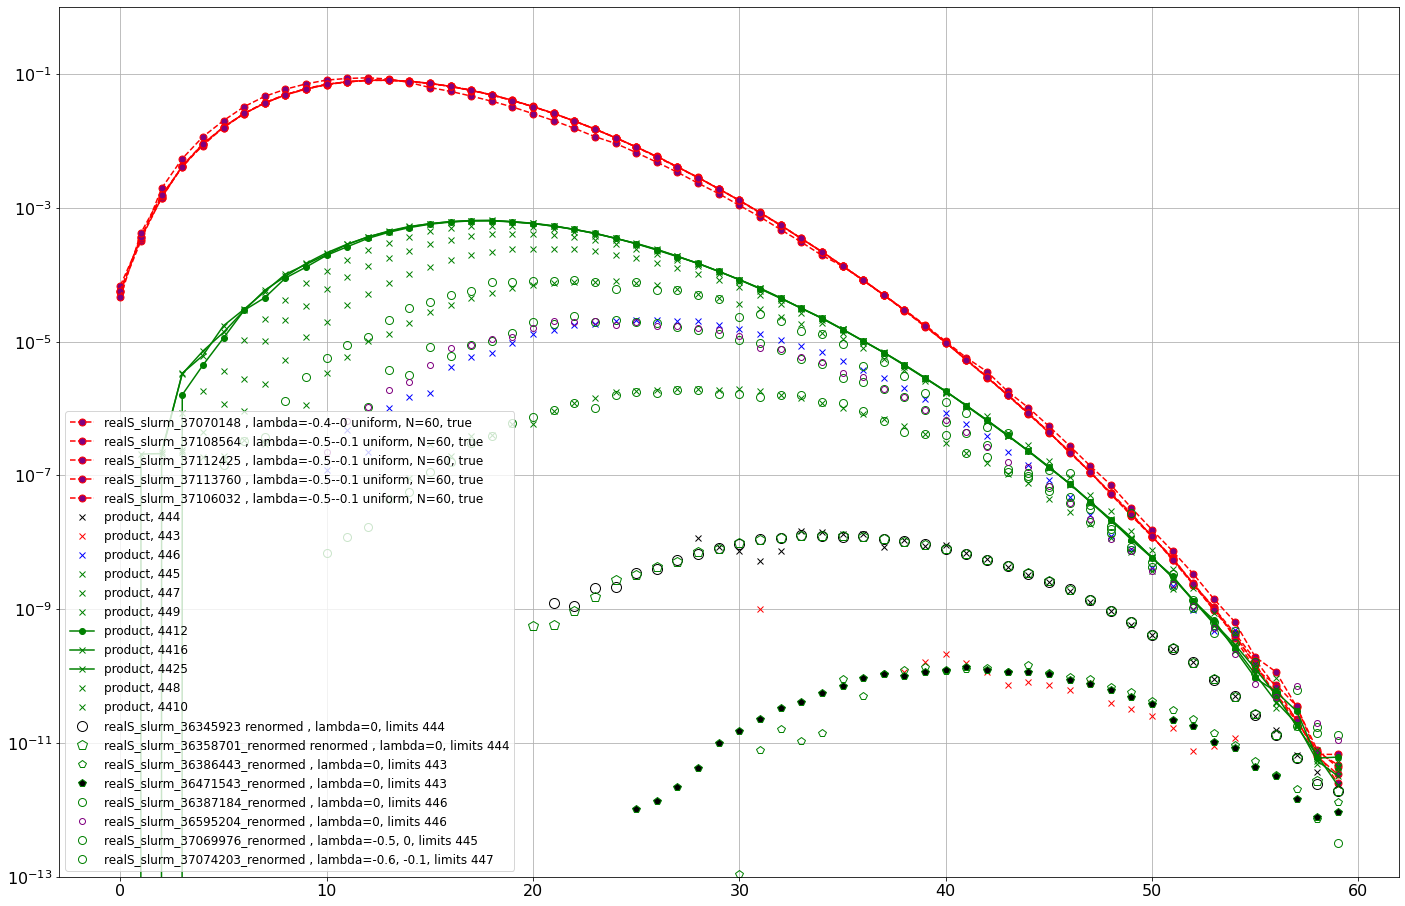

In [1797]:
plt.figure(figsize=(24,16))
# plt.plot(realS_slurm_36021999, label = 'realS_slurm_36021999 , lambda=0, ,top, N=60, true',color='black', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)
# plt.plot(realS_slurm_36387289, label = 'realS_slurm_36387289 , lambda=-0.5--0 uniform, N=60, true',color='black', marker='o', linestyle='dashed', markerfacecolor='black' , markersize=7)

# plt.plot(realS_slurm_36634374, label = 'realS_slurm_36634374 , lambda=-0.4--0 uniform, N=60, true',color='green', marker='o', linestyle='dashed', markerfacecolor='black' , markersize=7)

# plt.plot(realS_slurm_37061419, label = 'realS_slurm_37061419 , lambda=-0.4--0 uniform, N=60, true',color='purple', marker='o', linestyle='dashed', markerfacecolor='purple' , markersize=7)

plt.plot(realS_slurm_37070148, label = 'realS_slurm_37070148 , lambda=-0.4--0 uniform, N=60, true',color='red', marker='o', linestyle='dashed', markerfacecolor='purple' , markersize=7)

plt.plot(realS_slurm_37108564, label = 'realS_slurm_37108564 , lambda=-0.5--0.1 uniform, N=60, true',color='red', marker='o', linestyle='dashed', markerfacecolor='purple' , markersize=7)

plt.plot(realS_slurm_37112425, label = 'realS_slurm_37112425 , lambda=-0.5--0.1 uniform, N=60, true',color='red', marker='o', linestyle='dashed', markerfacecolor='purple' , markersize=7)
plt.plot(realS_slurm_37113760, label = 'realS_slurm_37113760 , lambda=-0.5--0.1 uniform, N=60, true',color='red', marker='o', linestyle='dashed', markerfacecolor='purple' , markersize=7)
plt.plot(realS_slurm_37106032, label = 'realS_slurm_37106032 , lambda=-0.5--0.1 uniform, N=60, true',color='red', marker='o', linestyle='dashed', markerfacecolor='purple' , markersize=7)

# plt.plot(realS_slurm_plt.plot(realS_slurm_37107641, label = 'realS_slurm_37107641 , lambda=-0.5--0.1 uniform, N=60, true',color='red', marker='o', linestyle='dashed', markerfacecolor='purple' , markersize=7)
# 36345923, label = 'realS_slurm_36345923 , lambda=0, limits',color='black', marker='.', linestyle='dashed', markerfacecolor='yellow' , markersize=7)



# plt.plot(slurm_36331520,  marker='o', label='4,4,4')
# plt.plot(slurm_36387289,  marker='o', label='4,4,3')
# plt.plot(slurm_36476424,  marker='o', label='4,4,6')
# plt.plot(slurm_37061419_box,  marker='o', label='4,4,5')
# plt.plot(slurm_37070148_box,  marker='o', label='4,4,7')

# plt.plot(slurm_37106032_box,  marker='o', label='4,4,9')



product = realS_slurm_36021999  * np.array(slurm_36331520)
plt.plot(product, marker='x', label= 'product, 444', linestyle='none', color='black')

product1 = realS_slurm_36387289  * np.array(slurm_36387289)
plt.plot(product1, marker='x', label= 'product, 443', linestyle='none', color='red')

# product1 = realS_slurm_36021999  * np.array(slurm_36387289)
# plt.plot(product1, marker='x', label= 'product, 443', linestyle='none', color='red')
product2 = realS_slurm_36387289  * np.array(slurm_36476424)
plt.plot(product2, marker='x', label= 'product, 446', linestyle='none', color='blue')

product3 = realS_slurm_37061419  * np.array(slurm_37061419_box)
plt.plot(product3, marker='x', label= 'product, 445', linestyle='none', color='green')


product4 = realS_slurm_37070148  * np.array(slurm_37070148_box)
plt.plot(product4, marker='x', label= 'product, 447', linestyle='none', color='green')

product5 = realS_slurm_37106032  * np.array(slurm_37106032_box)
plt.plot(product5, marker='x', label= 'product, 449', linestyle='none', color='green')

# realS_slurm_37108564
product6 = realS_slurm_37108564  * np.array(slurm_37108564_box)
plt.plot(product6, marker='o', label= 'product, 4412', linestyle='solid', color='green')


product7 = realS_slurm_37112425  * np.array(slurm_37112425_box)
plt.plot(product7, marker='x', label= 'product, 4416', linestyle='solid', color='green')

product8 = realS_slurm_37113760  * np.array(slurm_37113760_box)
plt.plot(product8, marker='x', label= 'product, 4425', linestyle='solid', color='green')


product9 = realS_slurm_37107641  * np.array(slurm_37107641_box)
plt.plot(product9, marker='x', label= 'product, 448', linestyle='none', color='green')


product10 = realS_slurm_37128690  * np.array(slurm_37128690_box)
plt.plot(product10, marker='x', label= 'product, 4410', linestyle='none', color='green')

product = np.where(product == 0.0, np.nan, product) 
product1 = np.where(product1 == 0.0, np.nan, product1) 
product2 = np.where(product2 == 0.0, np.nan, product2) 
product3 = np.where(product3 == 0.0, np.nan, product3) 
product4 = np.where(product4 == 0.0, np.nan, product4) 
product5 = np.where(product5 == 0.0, np.nan, product5) 
product6 = np.where(product6 == 0.0, np.nan, product6) 
product7 = np.where(product7 == 0.0, np.nan, product7) 
product8 = np.where(product8 == 0.0, np.nan, product8) 
product9 = np.where(product9 == 0.0, np.nan, product9) 


delta = np.log(realS_slurm_36345923) - np.log(product)
# delta, np.nanmean(delta), 
realS_slurm_36345923_renormed = realS_slurm_36345923/np.exp(np.nanmean(delta))

delta = np.log(realS_slurm_36358701) - np.log(product)
# delta, np.nanmean(delta), 
realS_slurm_36358701_renormed = realS_slurm_36358701/np.exp(np.nanmean(delta))

delta = np.log(realS_slurm_36386443) - np.log(product1)
realS_slurm_36386443_renormed = realS_slurm_36386443/np.exp(np.nanmean(delta))

delta = np.log(realS_slurm_36391511) - np.log(product1)
# realS_slurm_36391511_renormed = realS_slurm_36391511/np.exp(np.nanmean(delta))
realS_slurm_36471543_renormed = realS_slurm_36471543/np.exp(np.nanmean(delta))


delta = np.log(realS_slurm_36387184) - np.log(product2)
realS_slurm_36387184_renormed = realS_slurm_36387184/np.exp(np.nanmean(delta))

delta = np.log(realS_slurm_36595204) - np.log(product2)
realS_slurm_36595204_renormed = realS_slurm_36595204/np.exp(np.nanmean(delta))


delta = np.log(realS_slurm_37069976) - np.log(product3)
realS_slurm_37069976_renormed = realS_slurm_37069976/np.exp(np.nanmean(delta))

delta = np.log(realS_slurm_37074203) - np.log(product4)
realS_slurm_37074203_renormed = realS_slurm_37074203/np.exp(np.nanmean(delta))



plt.plot(realS_slurm_36345923_renormed, label = 'realS_slurm_36345923 renormed , lambda=0, limits 444',color='black', marker='o', linestyle='none', markerfacecolor='none' , markersize=10)
plt.plot(realS_slurm_36358701_renormed, label = 'realS_slurm_36358701_renormed renormed , lambda=0, limits 444',color='green', marker='p', linestyle='none', markerfacecolor='none' , markersize=10)
# plt.plot(realS_slurm_36367866, label = 'realS_slurm_36367866  , lambda=0, limits 445',color='green', marker='p', linestyle='none', markerfacecolor='green' , markersize=8)
# plt.plot(realS_slurm_36367113, label = 'realS_slurm_36367113  , lambda=0, limits 446',color='purple', marker='p', linestyle='none', markerfacecolor='purple' , markersize=8)
plt.plot(realS_slurm_36386443_renormed, label = 'realS_slurm_36386443_renormed , lambda=0, limits 443',color='green', marker='p', linestyle='none', markerfacecolor='none' , markersize=8)
# plt.plot(realS_slurm_36386443, label = 'realS_slurm_36386443  , lambda=0, limits 446',color='pink', marker='p', linestyle='none', markerfacecolor='purple' , markersize=8)
# plt.plot(realS_slurm_36391511_renormed, label = 'realS_slurm_36391511_renormed , lambda=0, limits 443',color='green', marker='.', linestyle='none', markerfacecolor='black' , markersize=8)
plt.plot(realS_slurm_36471543_renormed, label = 'realS_slurm_36471543_renormed , lambda=0, limits 443',color='green', marker='p', linestyle='none', markerfacecolor='black' , markersize=8)



# plt.plot(realS_slurm_36391511, label = 'realS_slurm_36391511 , lambda=0, limits 443',color='green', marker='.', linestyle='none', markerfacecolor='black' , markersize=8)
# plt.plot(realS_slurm_36471543, label = 'realS_slurm_36471543 , lambda=0, limits 443',color='green', marker='D', linestyle='none', markerfacecolor='none' , markersize=8)



plt.plot(realS_slurm_36387184_renormed, label = 'realS_slurm_36387184_renormed , lambda=0, limits 446',color='green', marker='o', linestyle='none', markerfacecolor='none' , markersize=8)
plt.plot(realS_slurm_36595204_renormed, label = 'realS_slurm_36595204_renormed , lambda=0, limits 446',color='purple', marker='o', linestyle='none', markerfacecolor='none' , markersize=6)
plt.plot(realS_slurm_37069976_renormed, label = 'realS_slurm_37069976_renormed , lambda=-0.5, 0, limits 445',color='green', marker='o', linestyle='none', markerfacecolor='none' , markersize=8)
plt.plot(realS_slurm_37074203_renormed, label = 'realS_slurm_37074203_renormed , lambda=-0.6, -0.1, limits 447',color='green', marker='o', linestyle='none', markerfacecolor='none' , markersize=8)


plt.yscale('log')
plt.legend()
plt.grid()
plt.ylim(10**-13, 1)
print(np.nansum(realS_slurm_36021999  * np.array(slurm_36331520)), np.nansum(realS_slurm_36345923_renormed), np.nansum(realS_slurm_36358701_renormed))

print('443', np.nansum(realS_slurm_36471543_renormed))
print('444', np.nansum(realS_slurm_36358701_renormed))
print('445', np.nansum(realS_slurm_37069976_renormed))

print('446', np.nansum(realS_slurm_36595204_renormed))
print('447', np.nansum(realS_slurm_37074203_renormed))
print('448', np.nansum(product9))

print('449' ,np.nansum(product5))
print('4410' ,np.nansum(product10))

print('4412' ,np.nansum(product6))
print('4416', np.nansum(product7))
print('4425', np.nansum(product8))





In [4069]:
slurm_37420607 = np.array([   0.     ,    0.     ,    0.     , 1539.63223, 1540.76924,
       1541.60459, 1542.66455, 1543.44834, 1544.08247, 1544.79302,
       1545.29033, 1545.7396 , 1546.17876, 1546.56841, 1546.88315,
       1547.1897 , 1547.47432, 1547.71655, 1547.96084, 1548.15845,
       1548.32026, 1548.47129, 1548.59814, 1548.71167, 1548.80532,
       1548.88696, 1548.93877, 1548.98496, 1549.01426, 1549.03413,
       1549.04399, 1549.04888, 1549.03467, 1549.00093, 1548.96235,
       1548.91104, 1548.84243, 1548.7998 , 1548.69946, 1548.59731,
       1548.50059, 1548.38799, 1548.27007, 1548.13257, 1547.94844,
       1547.77896, 1547.58965, 1547.39731, 1547.20039, 1547.00479,
       1546.67856, 1546.43247, 1546.1873 , 1545.81572, 1545.47163,
       1545.10117, 1544.62397, 1544.121  , 1543.63115, 1543.61934])



slurm_37420607_prob = [nan, 1.891228484266614e-35, 2.457367230268648e-34, 9.687436857368284e-35, 3.077650830630527e-34, 3.8481092133405288e-34, 4.461273675803805e-34, 7.672496643038711e-34, 9.018422409823042e-34, 1.021690924360263e-33, 1.2846521065779722e-33, 1.7637938106289962e-33, 2.4071432976033685e-33, 3.0629275399768535e-33, 3.8060101612971544e-33, 4.516719660087635e-33, 6.1415239583309176e-33, 8.101021713047969e-33, 1.469517969207979e-32, 1.518764201257855e-32, 3.26018785822784e-32, 2.4176560528063664e-32, 3.4580623529432017e-32, 3.8291970114431906e-32, 4.961201895332055e-32, 7.082076137880156e-32, 1.072850926758037e-31, 3.501333961097489e-31, 1.21862354935701e-31, 1.5651119555588095e-31, 4.113518819378667e-31, 2.954621323760676e-31, 3.7458102363123585e-31, 4.7695605587235075e-31, 6.040356076605204e-31, 7.772066304645238e-31, 9.198363767593705e-31, 1.2799086586052847e-30, 1.9939636044615157e-30, 1.9846134927374193e-30, 3.0043844233557956e-30, 4.131008559670791e-30, 5.740511173016274e-30, 6.558796836093334e-30, 9.385543450138881e-30, 1.2517191163549743e-29, 2.0223204559749894e-29, 2.7151082127089807e-29, 4.091374305281092e-29, 7.746830701012635e-29, 6.0845584249574e-29, 7.071505389466403e-29, 1.0573776258843671e-28, 2.171852716507007e-28, 2.011890369239414e-28, 7.022020130377742e-27, 1.0411825009461679e-27, 7.474942029900391e-28, 5.821888269714192e-28, 1.1442429506530295e-27]


slurm_37420602 = np.array([   0.     ,    0.     ,    0.     , 1816.11738, 1818.35059,
       1818.63828, 1820.04082, 1820.43398, 1821.12764, 1821.84268,
       1822.23145, 1822.72627, 1823.14141, 1823.54531, 1823.86357,
       1824.16826, 1824.45723, 1824.70283, 1824.95732, 1825.14746,
       1825.3252 , 1825.46055, 1825.59844, 1825.71562, 1825.79863,
       1825.85732, 1825.94541, 1825.95947, 1826.03066, 1826.05039,
       1826.05   , 1826.0623 , 1826.01914, 1825.97939, 1825.96455,
       1825.89355, 1825.83096, 1825.7709 , 1825.70801, 1825.59033,
       1825.49053, 1825.36299, 1825.23291, 1825.12822, 1824.97158,
       1824.79092, 1824.57891, 1824.37812, 1824.20977, 1824.00928,
       1823.6792 , 1823.47354, 1823.15469, 1822.7542 , 1822.49316,
       1821.92246, 1821.79707, 1821.15215, 1820.34941, 1820.31289])


slurm_37420602_prob  = [0.025000000000000022, 0.025000000000000022, 9.697775624373293e-35, 4.2331921392082194e-36, 9.208744570583107e-36, 8.36167638809442e-36, 7.9807293359225e-36, 1.0589380774912698e-35, 1.422183451232754e-35, 1.299725256066023e-35, 1.6067524930729162e-35, 1.8864912332332802e-35, 2.1269187033716954e-35, 2.6027766287474455e-35, 3.001830022713552e-35, 3.505748870093616e-35, 4.2154767829429277e-35, 4.945484015458657e-35, 5.849046094216423e-35, 6.902595503339576e-35, 8.295875528706484e-35, 1.0005819977286532e-34, 1.1918177909386028e-34, 1.4323816876605986e-34, 1.7658409139594146e-34, 2.109796431931936e-34, 2.603519718877679e-34, 3.214393773784172e-34, 4.027966448079651e-34, 5.064279458587421e-34, 6.287541511369614e-34, 8.091734497378833e-34, 1.0225079567617122e-33, 1.3162042981361619e-33, 1.7096072292466895e-33, 2.2232105369249293e-33, 2.9117696676011448e-33, 3.851835407855434e-33, 5.1068906815306345e-33, 6.889955783291383e-33, 9.129285367750328e-33, 1.2503901862247276e-32, 1.7264006215312142e-32, 2.3588094538041615e-32, 3.318747517214261e-32, 4.659065770069395e-32, 6.484812267104843e-32, 9.215325669640954e-32, 1.320254997536937e-31, 1.9069478583880967e-31, 2.6579549112404926e-31, 3.978615120711418e-31, 4.956526017519643e-31, 8.5935776298486e-31, 1.1065786884319667e-30, 1.5890909119763762e-30, 2.4424557781140337e-30, 4.05289866261582e-30, 5.6727936112109406e-30, 9.043244109832587e-30]


slurm_37433819 = np.array([   0.     ,    0.     ,    0.     , 1822.31901, 1822.84848,
       1823.53434, 1824.12224, 1824.6015 , 1825.01025, 1825.33976,
       1825.62951, 1825.8537 , 1826.04899, 1826.19883, 1826.31811,
       1826.41424, 1826.4884 , 1826.53816, 1826.56644, 1826.58041,
       1826.58169, 1826.55835, 1826.52514, 1826.48347, 1826.43003,
       1826.36682, 1826.29082, 1826.21197, 1826.11667, 1826.01629,
       1825.9082 , 1825.78191, 1825.66158, 1825.52311, 1825.38358,
       1825.23419, 1825.06427, 1824.89701, 1824.72507, 1824.53655,
       1824.3468 , 1824.13214, 1823.91869, 1823.70076, 1823.42542,
       1823.17638, 1822.88669, 1822.62851, 1822.33995, 1821.97452,
       1821.64389, 1821.28689, 1820.91089, 1820.42859, 1819.96211,
       1819.55605, 1818.85827, 1818.40297, 1817.87177, 1817.68579])


slurm_37433819_prob = [2.0261836029903736e-38, 2.4483166792451383e-38, 2.5106936357522737e-38, 2.8355438006111656e-38, 3.1660351369448197e-38, 3.498913023884837e-38, 3.91966550269226e-38, 4.48730217351059e-38, 5.020788438898356e-38, 5.661893644609401e-38, 6.463291378193464e-38, 7.456958577266576e-38, 8.596778366875944e-38, 1.002787916162467e-37, 1.1704050721437126e-37, 1.3897194411846586e-37, 1.6551789369660055e-37, 1.966096243809363e-37, 2.4000521836092173e-37, 2.9267136848407216e-37, 3.6121607936668327e-37, 4.507061294277373e-37, 5.654339138624274e-37, 7.133136072324019e-37, 9.103314069467901e-37, 1.1776546603161553e-36, 1.5284829814168327e-36, 1.986524647083365e-36, 2.6232586497404452e-36, 3.487738074043281e-36, 4.6533990281459216e-36, 6.258373660954706e-36, 8.588602185976145e-36, 1.1831934885884231e-35, 1.6179342743874313e-35, 2.2539442631711986e-35, 3.145810004256037e-35, 4.442110613926562e-35, 6.329678716916956e-35, 9.031635397617119e-35, 1.2934974608015266e-34, 1.9153867914381857e-34, 2.7781062279957557e-34, 4.08652874078854e-34, 6.002087570620145e-34, 9.06187719370427e-34, 1.3249899698406112e-33, 1.9755947940483103e-33, 3.003969868045575e-33, 4.6397413319269406e-33, 7.26918715632493e-33, 1.0829299200727166e-32, 1.6076909575141658e-32, 2.3888411425646965e-32, 3.970989107455357e-32, 6.21064927644676e-32, 9.201541064584398e-32, 1.493584749985352e-31, 2.305784588583154e-31, 4.106528480582942e-31]

slurm_37433819_fraction = [0.0, 0.0, 0.0, 0.00012381600941001672, 0.00010395280542633645, 0.00018095570462858842, 0.0001377001181322066, 0.0001558742317627149, 0.0002358490566037736, 0.0002617533644883679, 0.00035061309041314447, 0.00043210957685222237, 0.0005875508955395799, 0.000719743608314623, 0.000967181535246435, 0.001179732501666855, 0.0014154809921123916, 0.001764569965134576, 0.0021164570971423133, 0.0025300485786643495, 0.002992360431921321, 0.003599500384804633, 0.004319276096358993, 0.005027727939977166, 0.005852968321859389, 0.006879296211565147, 0.00787784509849577, 0.009025269138085002, 0.010708499158421293, 0.012099276111685625, 0.013765413351151065, 0.015901195603335853, 0.017805758749059993, 0.020787176621710694, 0.023044539365787674, 0.02583593136438278, 0.029555590329395195, 0.033008339018526, 0.03759747604024049, 0.043023311245649995, 0.048090916997651695, 0.0535737181770262, 0.05938026361521803, 0.06718776171068058, 0.07553120139275368, 0.08658184776980546, 0.09705223237372866, 0.10686897817395294, 0.1257285224896561, 0.1431123706259241, 0.15264084507042253, 0.18309505894156006, 0.2018716577540107, 0.25036646144825564, 0.29368372521899494, 0.3020285499624343, 0.3674033149171271, 0.38095238095238093, 0.5133928571428571, 0.5181818181818182]



slurm_37433811 = np.array([   0.     ,    0.     ,    0.     , 3176.81015, 3177.35082,
       3178.05436, 3178.64382, 3179.11425, 3179.51922, 3179.85619,
       3180.13592, 3180.36937, 3180.55677, 3180.71244, 3180.83558,
       3180.92865, 3181.0032 , 3181.05052, 3181.08087, 3181.09734,
       3181.08802, 3181.07161, 3181.04377, 3180.99941, 3180.94146,
       3180.88155, 3180.80858, 3180.72256, 3180.63363, 3180.52672,
       3180.42053, 3180.30073, 3180.17523, 3180.03534, 3179.89218,
       3179.74055, 3179.58506, 3179.41666, 3179.24086, 3179.05638,
       3178.8583 , 3178.64393, 3178.43152, 3178.19887, 3177.95089,
       3177.69012, 3177.43235, 3177.1321 , 3176.83638, 3176.49479,
       3176.14279, 3175.76422, 3175.35898, 3174.8944 , 3174.52188,
       3173.99595, 3173.48459, 3172.88784, 3172.24573, 3172.28832])

slurm_37433811_prob = [2.996632192467119e-38, 2.374827226962131e-38, 2.6219542012344826e-38, 2.7113224257004896e-38, 3.1796193186739437e-38, 3.4895000763550406e-38, 3.924047885003428e-38, 4.424949485422594e-38, 5.026175443803511e-38, 5.64844742162384e-38, 6.508811502340868e-38, 7.420134120624257e-38, 8.576202899593226e-38, 1.000193202268888e-37, 1.1759348692779053e-37, 1.3772634123996188e-37, 1.6553129736420789e-37, 1.976669643227803e-37, 2.399409558438777e-37, 2.9260359286665558e-37, 3.5932921150938254e-37, 4.490644316102963e-37, 5.627206672526266e-37, 7.158953856425799e-37, 9.141707812277874e-37, 1.1727226183555254e-36, 1.519846300576515e-36, 1.9848378668642944e-36, 2.6274351146890845e-36, 3.485606363893799e-36, 4.669838560878046e-36, 6.319714840804531e-36, 8.584806135402365e-36, 1.1738054491752693e-35, 1.6209001394819266e-35, 2.2502726861882994e-35, 3.1435997156989085e-35, 4.4391031239982223e-35, 6.330951240739077e-35, 9.022166448309397e-35, 1.3039556409275376e-34, 1.8833870813402657e-34, 2.7543366763969014e-34, 4.02680686365779e-34, 5.99969940538287e-34, 9.062881742327478e-34, 1.3100102123732464e-33, 2.0305448161109783e-33, 3.038307176905364e-33, 4.537701564548462e-33, 6.964804897273463e-33, 1.0794460775266239e-32, 1.7349691345123506e-32, 2.597778447189067e-32, 3.8998793750311e-32, 6.37309519698314e-32, 9.619506032945562e-32, 1.3429488476898925e-31, 2.045648776054975e-31, 4.590523380723125e-31]

slurm_37433811_fraction = [0.0, 0.0, 0.0, 0.0, 5.279412929282264e-05, 0.00014411676077927862, 0.00010183743835197929, 9.933804737521786e-05, 0.000259378336480055, 0.0003079978203231177, 0.00043047081114397617, 0.0004622760769547628, 0.0005780025089590389, 0.000753562922504029, 0.000944882400228198, 0.0011650090525845737, 0.001369330693362447, 0.0017018151172582578, 0.002118650769299871, 0.002517557887577005, 0.0030236146943406696, 0.0036328167639396816, 0.004309085020498764, 0.0049430569458022485, 0.005764088199330196, 0.006841974212685799, 0.00800663883803654, 0.009017769750693726, 0.010384320143316925, 0.012218722516966467, 0.013826030245979302, 0.015692203929546785, 0.01798274749245026, 0.02068155743582389, 0.02303826297263493, 0.026070826388269092, 0.029483862950871523, 0.03369937150254041, 0.03792511274816634, 0.041736098772072204, 0.04744791299650013, 0.05277958976589114, 0.060383208060707655, 0.06910670255841835, 0.07549718901172335, 0.0853377638485066, 0.09596310255901606, 0.11155985169491525, 0.127640529896169, 0.14396546330476132, 0.16119270137961728, 0.1885310290652003, 0.19543726235741446, 0.24497635933806147, 0.25622605363984674, 0.30966767371601206, 0.3427835051546392, 0.42280285035629456, 0.452755905511811, 0.5806451612903226]





slurm_37450980 = np.array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     , 228.1777 , 228.23296,
       228.81923, 229.38806, 229.83448, 230.24077, 230.62497, 230.94371,
       231.23024, 231.49633, 231.71419, 231.90305, 232.09036, 232.22603,
       232.33528, 232.43112, 232.50992, 232.56752, 232.60892, 232.64135,
       232.65526, 232.64473, 232.63322, 232.59594, 232.56323, 232.51251,
       232.44426, 232.38068, 232.28926, 232.18983, 232.09918, 231.96622,
       231.83238, 231.67925, 231.54248, 231.38208, 231.19655, 231.0128 ,
       230.78155, 230.53664, 230.28911, 229.99785, 229.72639, 229.37357,
       229.0358 , 228.58254, 228.11719, 227.68605, 227.15377, 227.22903])


slurm_37450980_prob = [nan, nan, nan, 8.950007887383142e-34, 4.2162346809154027e-33, 3.938195190782128e-34, 3.996250247397179e-34, 3.1830909314964243e-34, 3.550563051256299e-34, 3.891978795521965e-34, 3.7641658723867163e-34, 4.333272511652291e-34, 4.411333426239664e-34, 4.656551256612543e-34, 4.768342906416544e-34, 4.923198484372819e-34, 5.4310065439252175e-34, 5.922888321369527e-34, 6.363139376717664e-34, 7.0015507809068495e-34, 7.552213174218147e-34, 8.28312181163746e-34, 9.38656628416787e-34, 1.0508810807594572e-33, 1.2343172263047336e-33, 1.3803931872493629e-33, 1.5942977662227252e-33, 1.9013059388323116e-33, 2.2996489752835778e-33, 2.7575134088667666e-33, 3.359624376349191e-33, 4.0745567416897305e-33, 5.077021667564345e-33, 6.403517347859043e-33, 8.177879583819619e-33, 1.0428755417712925e-32, 1.3548740282363865e-32, 1.7654014660192164e-32, 2.3445631837214844e-32, 3.1505247763825117e-32, 4.208966877826532e-32, 5.691855936236032e-32, 7.913619919263619e-32, 1.0352638854417363e-31, 1.4573691140931178e-31, 2.0363739906077584e-31, 2.8665319437087613e-31, 4.051018705030037e-31, 5.716207359257323e-31, 8.405826704014242e-31, 1.1502222341266282e-30, 1.7750507644905127e-30, 2.5734114035072847e-30, 3.6832200190811424e-30, 5.328154584214923e-30, 8.380033201774041e-30, 1.293519990130875e-29, 1.879816482840975e-29, 2.952079309640056e-29, 5.150529744228878e-29]


slurm_37451609 = np.array([2436.82812, 2439.06328, 2440.78359, 2441.90898, 2442.60156,
       2443.20977, 2443.87422, 2444.3125 , 2444.79062, 2445.10625,
       2445.34023, 2445.58008, 2445.80977, 2445.96602, 2446.07031,
       2446.175  , 2446.25742, 2446.30234, 2446.33672, 2446.34727,
       2446.33125, 2446.30273, 2446.32656, 2446.25273, 2446.18789,
       2446.13477, 2446.06484, 2445.95781, 2445.82852, 2445.79297,
       2445.66406, 2445.57305, 2445.38711, 2445.30664, 2445.11055,
       2444.97148, 2444.87227, 2444.65586, 2444.45859, 2444.27617,
       2444.09766, 2443.91328, 2443.67891, 2443.46055, 2443.26328,
       2442.87344, 2442.59336, 2442.37695, 2441.98867, 2441.77031,
       2441.20312, 2440.94219, 2440.53984, 2440.17305, 2439.96562,
       2438.97305, 2438.15   , 2435.72187, 2438.19141, 2436.73125])

slurm_37451609_prob = [1.777328402769732e-38, 2.618236330349828e-38, 2.6483495865581356e-38, 2.8432857345863864e-38, 2.9988571836136803e-38, 3.494364548851636e-38, 3.967009064732764e-38, 4.4147403511248665e-38, 4.970597523247706e-38, 5.724519374769549e-38, 6.443788251238661e-38, 7.376629974730168e-38, 8.581476054777146e-38, 9.913929032166588e-38, 1.1732411625314212e-37, 1.3819182811538317e-37, 1.6448710582114349e-37, 1.9891864637183384e-37, 2.3854526769377092e-37, 2.927744747607243e-37, 3.6162938218141105e-37, 4.491795615712985e-37, 5.614378322377255e-37, 7.1257492347470436e-37, 9.08013099663033e-37, 1.1850504719334202e-36, 1.5225107072896986e-36, 1.993008829864779e-36, 2.624443683422448e-36, 3.473965561892027e-36, 4.6803030424442135e-36, 6.321927462343568e-36, 8.558413234828356e-36, 1.1749209587939271e-35, 1.6224034821156397e-35, 2.2401654814666593e-35, 3.1300935824527855e-35, 4.4121339624583785e-35, 6.31978592558599e-35, 9.075057178479478e-35, 1.2909640465559696e-34, 1.8779618901312153e-34, 2.7598039665450057e-34, 4.072602409203068e-34, 5.9433805731057525e-34, 8.88013168537294e-34, 1.3432346636230596e-33, 1.9482241981432843e-33, 3.0592582964706474e-33, 4.524695770042412e-33, 7.355007783119586e-33, 9.774532749882231e-33, 1.699857135485634e-32, 2.4812430559066305e-32, 3.5781816087076367e-32, 6.73294023312044e-32, 1.0025672384972684e-31, 1.4200683363528196e-31, 2.6046376106889487e-31, 2.832965271732673e-31]

slurm_37451609_fraction = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.169840028739883e-05, 3.0262680062946375e-05, 2.2893379806894342e-05, 5.4569018439780815e-05, 8.679278035011453e-05, 0.0001223564565570181, 0.0002249968671322298, 0.0002943036749235198, 0.0003973720462011232, 0.0006022420875273825, 0.0007071774059042642, 0.0010687254077944536, 0.0014090057483031387, 0.001780602851652265, 0.002205321960790673, 0.002885530198109231, 0.003658732608900875, 0.004470372241324056, 0.005727129429622278, 0.006793642320133712, 0.008174358401830945, 0.009954915311810027, 0.011449314632499366, 0.01333774036124667, 0.0154931358480815, 0.018460471129891836, 0.0210258206711331, 0.02402665879276163, 0.027820802462436983, 0.03182595255380436, 0.034257520114378624, 0.04237974683544304, 0.04735717102122979, 0.05218449679235236, 0.059084518044055616, 0.06984063745019921, 0.07512165450121655, 0.08721428100915618, 0.09623721172186579, 0.10709737177260623, 0.1214613316463704, 0.13840676457498888, 0.15771913861085834, 0.17759562841530055, 0.2095890410958904, 0.2542372881355932, 0.26953748006379585, 0.3095890410958904, 0.3761904761904762, 0.45544554455445546, 0.6103896103896104, 0.4827586206896552]


slurm_37477630 = np.array([2282.91773, 2285.04589, 2286.54975, 2287.58308, 2288.41289,
       2289.12177, 2289.70931, 2290.21044, 2290.63356, 2290.98329,
       2291.28423, 2291.53281, 2291.75253, 2291.92992, 2292.07902,
       2292.20376, 2292.3041 , 2292.38327, 2292.4432 , 2292.48195,
       2292.50941, 2292.51703, 2292.51262, 2292.49203, 2292.46615,
       2292.42791, 2292.3722 , 2292.31328, 2292.23948, 2292.15717,
       2292.06559, 2291.96665, 2291.8486 , 2291.72866, 2291.5974 ,
       2291.45424, 2291.30053, 2291.13917, 2290.96773, 2290.78228,
       2290.59065, 2290.37808, 2290.14992, 2289.92769, 2289.66727,
       2289.41053, 2289.11252, 2288.83383, 2288.49884, 2288.16525,
       2287.80071, 2287.43239, 2287.01885, 2286.51742, 2286.10785,
       2285.58031, 2285.0529 , 2284.38802, 2283.71263, 2283.75801])

slurm_37477630_prob = [7.453951950101745e-39, 6.398089932012035e-39, 6.368217300586378e-39, 6.660958186198189e-39, 7.284394114430034e-39, 8.137628594717261e-39, 9.063491469263622e-39, 1.041467169222648e-38, 1.18902472485355e-38, 1.3942940860579647e-38, 1.6442550407104216e-38, 1.9655606970598252e-38, 2.371187284618568e-38, 3.09642779242682e-38, 4.062957346566901e-38, 5.023383152147205e-38, 6.294546927614032e-38, 7.85364758327809e-38, 9.959647982023547e-38, 1.26329878181713e-37, 1.6262970427534867e-37, 2.1025265176849336e-37, 2.7080221234045746e-37, 3.5474890641621945e-37, 4.6507790047811695e-37, 6.133431912708973e-37, 8.153044349288991e-37, 1.0825833357578892e-36, 1.451714455455065e-36, 1.946776879251097e-36, 2.4383658513640384e-36, 3.310171235146966e-36, 4.456241666645448e-36, 6.127706246326804e-36, 8.412019642120725e-36, 1.0543536847426378e-35, 1.4706245074972404e-35, 2.0317232188690358e-35, 2.848501936442037e-35, 3.9932052863832824e-35, 5.615487218880445e-35, 7.918425125059003e-35, 1.1235858481222097e-34, 1.613021203748393e-34, 2.3146426676257637e-34, 3.2987654578035824e-34, 4.311329699539497e-34, 6.912322972728547e-34, 9.06345451001418e-34, 1.340001911701808e-33, 1.9328396049948702e-33, 2.7366697899374905e-33, 4.3745514786988406e-33, 6.250175657614144e-33, 8.649604789116102e-33, 1.1874876667546455e-32, 2.220954686084507e-32, 3.144820657440044e-32, 7.122182458215674e-32, 7.650058292256545e-32]

slurm_37477630_fraction = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.704041540191984e-06, 1.2600352809878676e-05, 1.6008025356712166e-05, 3.416651308991591e-05, 5.271013774915999e-05, 6.988813704784122e-05, 0.00012972201652874693, 0.00018961444001597649, 0.00027112308411161043, 0.0003792275864033557, 0.0005002526422606555, 0.0007201867085049335, 0.0009758477677482313, 0.0013281900960410526, 0.0017487532181781355, 0.0022834960097427043, 0.002881317977201178, 0.0037078795098706603, 0.0046682680093929904, 0.00571978439456842, 0.007007779588573537, 0.008549273272805205, 0.010357691812104473, 0.012189083667710156, 0.014502781251608645, 0.016952921095030084, 0.019971934289545232, 0.02268072082489255, 0.02655773334904487, 0.030110039656149168, 0.034880073377665674, 0.0396514622358627, 0.045168563452866656, 0.052196409819828475, 0.05748304944600628, 0.06454175770183673, 0.07295458354281883, 0.08489193500324282, 0.09304539649367236, 0.10839084065244667, 0.12099690082644628, 0.1403866026381375, 0.15585723669805124, 0.18097313930380152, 0.22057959663207363, 0.22930903568716782, 0.27587902630931893, 0.3283458021612635, 0.38248175182481753, 0.4146666666666667, 0.4641975308641975, 0.5528846153846154]



slurm_37480534 = np.array([1584.95, 1584.05, 1583.  , 1583.9 , 1584.6 , 1584.6 , 1585.5 ,
       1584.85, 1585.4 , 1585.9 , 1586.1 , 1586.8 , 1586.8 , 1586.7 ,
       1586.3 , 1586.7 , 1586.75, 1586.8 , 1586.7 , 1586.75, 1586.75,
       1586.75, 1586.85, 1586.65, 1586.75, 1586.2 , 1586.5 , 1585.95,
       1586.35, 1585.95, 1586.  , 1585.5 , 1585.4 , 1585.75, 1584.85,
       1584.65, 1584.8 , 1584.65, 1584.75, 1582.45, 1583.7 , 1583.95,
       1582.5 , 1583.55, 1582.6 , 1581.85, 1579.85, 1582.55, 1578.8 ,
       1576.25, 1579.9 , 1579.5 , 1572.1 , 1567.8 , 1580.35, 1574.6 ,
       1560.75, 1569.7 , 1551.3 , 1563.15])

slurm_37480534_prob = [1.8572055546976795e-32, 4.014398166219701e-32, 3.08152153400269e-32, 1.3989763385724216e-33, 2.54866791118708e-35, 8.528138951026443e-36, 4.6634744142332785e-36, 3.6091171345023333e-36, 2.9987303655257374e-36, 2.6954328943881366e-36, 2.319015129699368e-36, 2.174335461521645e-36, 2.0641321072058995e-36, 1.951480440618655e-36, 1.912117549401614e-36, 1.9244453695661142e-36, 1.9097174469733875e-36, 1.9695900683196163e-36, 1.995015851262065e-36, 2.074330452181506e-36, 2.2207567688404812e-36, 2.3694092497597232e-36, 2.626390534137824e-36, 3.370886896275767e-36, 3.0425433137232786e-36, 4.2010923557078076e-36, 4.5402481344377684e-36, 5.039371200279867e-36, 5.356794317859456e-36, 5.469968561584385e-36, 7.713429549247101e-36, 8.870056635622879e-36, 1.057219288046271e-35, 1.281996976269505e-35, 1.5101314572317626e-35, 1.603308523353942e-35, 2.189381383752434e-35, 2.7337540219608757e-35, 3.3172667627293955e-35, 4.191231416926801e-35, 5.781792432614305e-35, 8.383085156723929e-35, 1.0292751936171472e-34, 1.3424907783977128e-34, 1.7084699678095262e-34, 2.239055523018588e-34, 3.856915474659402e-34, 4.686942294450616e-34, 7.457961515691485e-34, 1.1843932292334328e-33, 1.3513548451746416e-33, 2.494011860802867e-33, 7.797670652628644e-33, 7.764411649172198e-33, 1.43145849651538e-32, 1.8556100203061378e-32, 7.365941629529625e-32, 4.349715374341457e-31, 6.532537179315506e-32, 8.540386949210297e-32]

slurm_37480534_fraction = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.268498328245384e-05, 0.0, 6.348400203148806e-05, 6.128953174797744e-05, 0.0, 0.0, 0.00024094934040118065, 0.00043002825899987715, 0.0006351626016260162, 0.0012966627994267386, 0.0011015642211940956, 0.0017080745341614906, 0.0029734092260640557, 0.003434131450920538, 0.00445919319713782, 0.004630165528417641, 0.004747850635185423, 0.008937881722031879, 0.010729253981559096, 0.012979233226837061, 0.017148014440433214, 0.017543859649122806, 0.017225469086434943, 0.02724177071509648, 0.033905768383971815, 0.030126849894291756, 0.031776913099870296, 0.03802588996763754, 0.038834951456310676, 0.043758043758043756, 0.05360134003350084, 0.07061503416856492, 0.10975609756097561, 0.09302325581395349, 0.09691629955947137, 0.13529411764705881, 0.2, 0.20270270270270271, 0.1724137931034483, 0.20512820512820512, 0.14705882352941177, 0.25, 0.2857142857142857, 0.3333333333333333, 0.0, 0.0, 0.0]


slurm_37485554  = np.array([152.45768, 152.58698, 152.24859, 151.86372, 151.44263, 151.00426,
       150.68461, 150.74341, 151.04394, 151.41582, 151.83858, 152.23583,
       152.58033, 152.90638, 153.14805, 153.39497, 153.61972, 153.81006,
       153.96298, 154.1075 , 154.22069, 154.33927, 154.42974, 154.50029,
       154.54306, 154.58672, 154.6165 , 154.65194, 154.64836, 154.65519,
       154.63687, 154.60281, 154.56839, 154.54146, 154.48636, 154.42563,
       154.35414, 154.26611, 154.17997, 154.08466, 153.9569 , 153.83874,
       153.69776, 153.56993, 153.40329, 153.24601, 153.0363 , 152.84863,
       152.59477, 152.41236, 152.13142, 151.83893, 151.59281, 151.27366,
       150.84527, 150.48459, 150.03622, 149.61091, 149.07339, 149.17519])

slurm_37485554_prob = [3.999087115443619e-33, 9.049704669652082e-33, 1.3647147772904007e-32, 2.4347155247176e-32, 3.357333661930639e-32, 4.977936093935939e-32, 1.1367815564019107e-32, 1.416060896493228e-39, 1.8622428495059344e-39, 2.451467604144419e-39, 3.2257409762890415e-39, 4.416980503632187e-39, 6.202318372618508e-39, 8.832014941377713e-39, 1.1661158319921758e-38, 1.7398064344733045e-38, 2.366774169602921e-38, 3.266869399277164e-38, 4.675091877268081e-38, 6.641700205996175e-38, 8.944997625372784e-38, 1.2610896419179989e-37, 1.6839570968073811e-37, 2.4002412113731525e-37, 3.4195614285080567e-37, 4.925712686241695e-37, 7.035770533215841e-37, 1.0107145254903963e-36, 1.4589807527009467e-36, 2.1179453463961315e-36, 3.060066835684078e-36, 4.151726880417766e-36, 6.098536417811202e-36, 9.037518431902688e-36, 1.3238625516487215e-35, 1.948217430301818e-35, 2.9373552386794263e-35, 4.107423282774827e-35, 6.1935287329128e-35, 9.365985108745393e-35, 1.3046728518936165e-34, 1.997764768113775e-34, 3.1010548293056693e-34, 4.82201922438064e-34, 7.559601635219255e-34, 1.1976335025861725e-33, 1.8968120619328744e-33, 2.7774891276604822e-33, 4.5324646247816835e-33, 7.22175445346862e-33, 1.2460128587716796e-32, 2.0368631267610893e-32, 3.046762013650109e-32, 5.450185144708338e-32, 9.681118853980984e-32, 1.617581675094165e-31, 2.8472859490329288e-31, 5.015724877424052e-31, 7.786317857922415e-31, 2.1413894957701238e-30]

slurm_37485554_fraction  =  [0.0, 0.0, 0.0, 0.00020010005002501252, 0.0, 0.0, 0.00031387319522912746, 0.0009033423667570009, 0.0, 0.0, 0.00010017028949213663, 0.0, 4.847074790364015e-05, 0.0, 2.6907760198041115e-05, 6.433626420759168e-05, 6.797634423220719e-05, 0.00024162485609107836, 0.00025418189740734464, 0.0003870414343546346, 0.0005760689796145913, 0.0006108684373483289, 0.0012531328320802004, 0.0014783900403197285, 0.001932790086874537, 0.0024495268545496737, 0.0033147996422518123, 0.004282341745511777, 0.0053971777005597295, 0.006616469958061198, 0.00834434493221749, 0.010010117617301126, 0.012288886572143453, 0.014316620436619623, 0.016381791946935054, 0.019866896347617565, 0.02353298475732379, 0.027684057250417303, 0.030357142857142857, 0.03591330599348605, 0.041120683414175054, 0.045667479385256005, 0.0538819073850921, 0.060687490982542204, 0.0695613363937771, 0.07606449987402368, 0.09155824508320726, 0.09840987434671411, 0.11627472937663307, 0.12983842845519006, 0.15059069836997158, 0.16952552914033503, 0.18899745683308794, 0.2310508971072867, 0.25102993683054103, 0.282686925229908, 0.3471896955503513, 0.40943396226415096, 0.4745762711864407, 0.5384615384615384]


slurm_37521315 = np.array([243.44532, 245.53141, 247.11236, 248.16138, 248.94767, 249.5663 ,
       250.0909 , 250.31178, 250.63514, 250.91911, 250.98079, 251.16345,
       251.11797, 251.07259, 251.1188 , 250.97295, 250.80374, 250.69592,
       250.54435, 250.29572, 250.07941, 249.8673 , 249.5844 , 249.28708,
       249.01254, 248.71062, 248.3769 , 248.01648, 247.66861, 247.30434,
       246.95251, 246.62609, 246.12662, 245.76676, 245.3303 , 244.81555,
       244.45209, 243.96103, 243.38818, 242.95399, 242.36996, 241.92605,
       241.25581, 240.76935, 240.12213, 239.57547, 238.89729, 238.19183,
       237.62659, 236.89096, 236.08099, 235.39903, 234.56312, 233.69208,
       232.82401, 231.95738, 231.06491, 230.07683, 228.84905, 228.2217 ])


slurm_37521315 = slurm_37521315 - np.min(slurm_37521315)
slurm_37521315 = np.exp(slurm_37521315)
slurm_37521315 = slurm_37521315/np.sum(slurm_37521315)

fraction = [5.736658683149999e-06, 1.211047783404104e-05, 1.1265983614252722e-05, 4.184095269388052e-05, 5.878779565362231e-05, 7.617810152672414e-05, 9.621089428026234e-05, 0.00014233482488368575, 0.0001570595314521528, 0.00021915924497491486, 0.0002603966864521649, 0.0002939308266181764, 0.0003912321698582048, 0.0004795080024867508, 0.0005512373674769953, 0.0007172450526736293, 0.0007386652288148008, 0.0008946315715481599, 0.0012010365467588332, 0.0011966387450959477, 0.0015968292979352625, 0.0017530303597626772, 0.0020694686886319003, 0.002299047488521894, 0.002788357144088097, 0.0032059203119422248, 0.003885278085181467, 0.004523790014202994, 0.005455651056968339, 0.006404102967664029, 0.007376545087146632, 0.008938209331651955, 0.010111223458038422, 0.011876167600747264, 0.014042744581965983, 0.01635070380851354, 0.019488946196303338, 0.022049191529643915, 0.026057575980375773, 0.029622362911871196, 0.03433594519840434, 0.04010927946433794, 0.045282427324821906, 0.05241517037248364, 0.05957297378364834, 0.06742060944757014, 0.07681674254477859, 0.08635363713511242, 0.09841679790942287, 0.1123737962281037, 0.1286089636703552, 0.14823693936669663, 0.16991364720125515, 0.19672295005890122, 0.22777359752529053, 0.26979027578383047, 0.3217551419194829, 0.37198300830276115, 0.4428596015661977, 0.5224924924924925]



slurm_37575787 = np.array([49.84062, 50.50234, 50.72578, 50.67969, 50.65391, 50.5375 ,
       50.44766, 50.33906, 50.28594, 50.16172, 50.03047, 49.99609,
       49.92344, 49.90547, 49.81406, 49.77187, 49.77891, 49.71172,
       49.69687, 49.71953, 49.66406, 49.67891, 49.71172, 49.64141,
       49.62969, 49.77109, 49.71094, 49.66016, 49.7375 , 49.73203,
       49.67891, 49.66562, 49.77266, 49.70781, 49.70937, 49.76328,
       49.69141, 49.69219, 49.68203, 49.66484, 49.65391, 49.69688,
       49.64453, 49.6875 , 49.57031, 49.59375, 49.56328, 49.475  ,
       49.39687, 49.32109, 49.37734, 49.19219, 49.04922, 48.93516,
       48.80156, 48.57109, 48.31016, 48.18906, 47.71953, 48.57109])

slurm_37575787_prob = np.array([7.009366633444068e-34, 3.804433684233489e-34, 2.048353352235346e-34, 8.598540927523314e-35, 3.3526958476792834e-35, 1.3373167296474546e-35, 5.096259510745594e-36, 1.987611028096423e-36, 8.930319665559075e-37, 4.574856983019118e-37, 2.71611594856213e-37, 1.8269015853480292e-37, 1.19508651728892e-37, 8.344544558983507e-38, 8.394050151260056e-38, 7.459622412835861e-38, 7.900578809483832e-38, 7.790931814160966e-38, 9.079883711406783e-38, 1.0047752872212993e-37, 1.2561929326121445e-37, 1.3561214502423067e-37, 1.9276056945835033e-37, 2.6898895138967355e-37, 3.5094962050470067e-37, 4.386589309885121e-37, 6.549017587870005e-37, 8.239700135411074e-37, 1.193032849671122e-36, 1.7930644648356607e-36, 2.653968367233083e-36, 3.988072516747659e-36, 6.382376146553204e-36, 8.849846560905066e-36, 1.4270839920366283e-35, 2.3971330522801278e-35, 3.4736578105902045e-35, 6.717715690620919e-35, 1.187168313752586e-34, 1.8170825869883935e-34, 3.182588138761665e-34, 5.244032873699586e-34, 9.247941140203772e-34, 1.7410097644808736e-33, 3.4881213477254836e-33, 6.916867411666123e-33, 1.3570022879719082e-32, 2.785539630151291e-32, 4.3543519430920264e-32, 1.1234490190932483e-31, 2.284447731354165e-31, 5.152657079832576e-31, 8.835598285419907e-31, 2.247612991072844e-30, 5.613606930805655e-30, 9.798297478338952e-30, 1.9179384752501255e-29, 5.262249736353791e-29, 1.0140612902142417e-28, 2.276158634347009e-28]
                            )
slurm_37575787_fraction = [0.0, 0.00014267370523612499, 0.0, 0.0, 0.00012347203358439315, 0.0, 0.0, 0.000333889816360601, 0.0, 0.00039880358923230307, 0.0, 0.0, 0.0002531004808909137, 0.0002673082063619353, 0.0005491488193300384, 0.0017331022530329288, 0.00028620492272467084, 0.0015494267121165168, 0.001519756838905775, 0.0015552099533437014, 0.0019224607497596924, 0.0012726694241170856, 0.00258732212160414, 0.0035737491877842753, 0.0012957563977972141, 0.0030864197530864196, 0.003738317757009346, 0.00384, 0.00572155117609663, 0.004330343334364367, 0.00872776099362202, 0.005098789037603569, 0.008325624421831638, 0.013190954773869347, 0.01464968152866242, 0.016891891891891893, 0.01723597618301473, 0.017412935323383085, 0.02459526774595268, 0.030195952457436556, 0.04211557296767875, 0.03684550743374273, 0.051094890510948905, 0.047619047619047616, 0.061888111888111885, 0.06499826207855405, 0.08149779735682819, 0.08263836239575435, 0.09693053311793215, 0.11299435028248588, 0.12136594370096908, 0.1518186610437533, 0.17543859649122806, 0.1852603110209601, 0.23257635082223962, 0.26705653021442494, 0.3251231527093596, 0.381294964028777, 0.44779582366589327, 0.5495750708215298]



slurm_37576016 =  np.array([209.80124, 211.84567, 213.35303, 214.52028, 215.22079, 215.84033,
       216.42476, 216.7524 , 217.08891, 217.29888, 217.4504 , 217.46703,
       217.57399, 217.48806, 217.41608, 217.31265, 217.23263, 217.06071,
       216.83148, 216.68331, 216.49357, 216.3003 , 215.99427, 215.69983,
       215.41299, 215.12441, 214.78111, 214.48946, 214.10402, 213.79274,
       213.34565, 213.02277, 212.54203, 212.09878, 211.69474, 211.24344,
       210.80049, 210.28091, 209.75855, 209.29391, 208.80679, 208.27225,
       207.65533, 207.10701, 206.54258, 205.86944, 205.26054, 204.65629,
       203.91984, 203.27325, 202.45945, 201.77254, 200.98812, 200.10698,
       199.26403, 198.32024, 197.30081, 196.26985, 195.16622, 194.4366 ])


slurm_37576016 = slurm_37576016 - np.min(slurm_37576016)
slurm_37576016 = np.exp(slurm_37576016)
slurm_37576016 = slurm_37576016/np.sum(slurm_37576016)

slurm_37576016_prob =  [3.13748078478384e-36, 1.3779739267968603e-36, 1.0512522889286207e-36, 9.956140613971008e-37, 7.287869860075553e-37, 4.359213677019957e-37, 3.2611288278821605e-37, 2.259096666730517e-37, 1.64246082225791e-37, 1.1977387940034722e-37, 8.260349731654346e-38, 6.467771608144475e-38, 5.166419786253822e-38, 5.024970205564935e-38, 4.5405528713135086e-38, 4.976741429991899e-38, 5.201185540736743e-38, 6.339955587095316e-38, 7.302055091397931e-38, 9.599262563507621e-38, 1.268095829836696e-37, 1.736085717871295e-37, 2.218462000161198e-37, 2.8931635582386043e-37, 3.864411621923997e-37, 5.166165922054073e-37, 7.063313728981015e-37, 9.769874044315676e-37, 1.493012113060335e-36, 1.9460681274120397e-36, 2.7670188352975267e-36, 3.9933952634392575e-36, 5.736739123107883e-36, 7.8285858715034e-36, 1.1545626555768258e-35, 1.7325832348699452e-35, 2.5552278114056955e-35, 3.563463934143779e-35, 5.29651800649241e-35, 8.219179289411461e-35, 1.279722444044463e-34, 1.9378891373127525e-34, 3.0453667640932476e-34, 4.189487484314768e-34, 7.531713184042013e-34, 1.099458240529227e-33, 1.7878129836799868e-33, 2.8632662457158513e-33, 4.689823906561255e-33, 6.966360917351904e-33, 1.3968422786617447e-32, 2.087473480749366e-32, 3.481707194243795e-32, 5.073162812094095e-32, 8.369119305885624e-32, 2.276802015425548e-31, 2.9412606166815112e-31, 4.570067635899029e-31, 7.292182166717077e-31, 2.4864006388449664e-30]

slurm_37576016_fraction = [1.2219561073366244e-05, 9.669652440459115e-06, 2.129284853066037e-05, 3.679475622159905e-05, 4.449276853471409e-05, 7.960881453289528e-05, 8.508668631601876e-05, 0.0001588310038119441, 0.00021780378392189222, 0.00023392242031730889, 0.0002377438112314139, 0.0003387085677390674, 0.00041740935448207394, 0.0003984348053616242, 0.0005445713048052229, 0.0006367460348087832, 0.0008512279628385792, 0.000773448141328825, 0.001183786305681478, 0.0015147547017561244, 0.0015617612081440832, 0.0016519625170426265, 0.0019293072694841833, 0.002469693437463574, 0.0029552521888714907, 0.0031166812111789854, 0.0041330475556498394, 0.004413545572593706, 0.0052523904180148285, 0.006708628910338412, 0.007602213120643817, 0.008554460540138786, 0.010220564060780193, 0.012326448162057585, 0.013839725901071851, 0.016606656838285324, 0.019232408775718995, 0.02332388442493091, 0.026227722559424422, 0.03025117424676366, 0.03444804912666918, 0.040175860832924896, 0.04600294919344028, 0.05227938101212882, 0.058440389237260935, 0.06876098064183363, 0.07707057794523313, 0.0877125463578476, 0.09920294983053372, 0.11239525000992891, 0.12782611508231717, 0.14807369391954214, 0.1685976827806632, 0.1975101966275035, 0.22938482836959995, 0.26713842492243617, 0.3180890267504441, 0.37923837547473227, 0.44255495644960596, 0.5170340681362725]



slurm_37577701 = np.array([261.24291, 264.9521 , 267.5204 , 269.5743 , 271.34777, 272.74244,
       274.09843, 275.16451, 275.97828, 277.04664, 277.87576, 278.62745,
       279.29384, 279.89521, 280.32893, 280.77325, 281.15077, 281.43699,
       281.70421, 281.88114, 282.19714, 282.49264, 282.4718 , 282.30079,
       282.43242, 282.44247, 282.38787, 282.30824, 282.17777, 282.01183,
       281.99154, 281.79709, 281.62814, 281.37424, 281.10107, 280.68589,
       280.4814 , 280.14674, 279.83217, 279.41213, 278.9983 , 278.56075,
       278.2405 , 277.72513, 277.34823, 276.77794, 276.32866, 275.94749,
       275.25698, 274.78757, 274.24597, 273.56727, 272.8911 , 272.22461,
       271.48608, 270.79739, 269.98047, 269.12632, 268.19336, 267.655  ])
slurm_37577701 = slurm_37577701 - np.min(slurm_37577701)
slurm_37577701 = np.exp(slurm_37577701)
slurm_37577701 = slurm_37577701/np.sum(slurm_37577701)



slurm_37622757 = np.array([195.31531, 197.52549, 198.95518, 200.01123, 200.89863, 201.39529,
       201.9485 , 202.37103, 202.64145, 202.754  , 202.94241, 203.02769,
       203.10644, 203.06069, 202.99877, 202.92817, 202.84586, 202.73298,
       202.45131, 202.27387, 202.08757, 201.82176, 201.55426, 201.34489,
       201.02241, 200.63516, 200.33235, 200.10185, 199.66251, 199.29452,
       198.8991 , 198.54577, 198.19467, 197.72445, 197.23797, 196.79694,
       196.31929, 195.93514, 195.40906, 194.89043, 194.33883, 193.82788,
       193.25928, 192.69746, 192.13483, 191.57033, 190.81778, 190.15077,
       189.47947, 188.82679, 188.09248, 187.39117, 186.49703, 185.74241,
       184.82831, 183.8714 , 182.85866, 181.91043, 180.75796, 180.17283])

slurm_37622757_fraction = {0: [0, 19646], 1: [0, 20966], 2: [0, 21222], 3: [0, 20659], 4: [0, 20695], 5: [0, 22120], 6: [0, 21532], 7: [0, 22550], 8: [0, 23725], 9: [0, 24939], 10: [0, 25552], 11: [0, 26343], 12: [2, 27605], 13:[3, 28106], 14: [2, 30150], 15: [2, 31037], 16: [3, 32151], 17: [7, 32125], 18: [12, 34291], 19: [24, 34986], 20: [22, 35747], 21: [44, 36420], 22: [48, 37539], 23: [60, 37309], 24: [86, 38004], 25: [126, 38533], 26: [154, 38830], 27: [171, 37164], 28: [220, 37893], 29: [255, 37646], 30: [337, 38539], 31: [394, 38040], 32: [418, 35989], 33: [506, 36081], 34: [609, 36461], 35: [678, 35884], 36: [768, 35178], 37: [864, 33457], 38: [946, 33167], 39: [1136, 32526], 40: [1227, 31671], 41: [1330, 29873], 42: [1467, 28920], 43: [1667, 28743], 44: [1844, 27646], 45: [1815, 25046], 46: [2119, 25275], 47: [2241, 24122], 48: [2484, 22743], 49: [2553, 21027], 50: [2832, 19503], 51: [2853, 17739], 52: [3294, 16996], 53: [3329, 15132], 54: [3399, 13895], 55:[3505, 12145], 56: [3673, 10889], 57: [3553, 9019], 58: [3564, 7700], 59: [5777, 9635]}
slurm_37622757 = slurm_37622757 - np.min(slurm_37622757)
slurm_37622757 = np.exp(slurm_37622757)
slurm_37622757 = slurm_37622757/np.sum(slurm_37622757)
slurm_37622757_fraction = [item[1][0]/item[1][1] for item in slurm_37622757_fraction.items()]



slurm_37692450 = np.array([215.05159, 217.14889, 218.71379, 219.77147, 220.5414 , 221.13656,
       221.67981, 221.97241, 222.34312, 222.51838, 222.75211, 222.76188,
       222.88049, 222.8001 , 222.8267 , 222.64561, 222.5488 , 222.31989,
       222.2106 , 222.07792, 221.77195, 221.56586, 221.28585, 220.964  ,
       220.72221, 220.4097 , 220.10533, 219.77021, 219.39236, 219.02028,
       218.59678, 218.23001, 217.83553, 217.42485, 217.0396 , 216.54114,
       216.07441, 215.58319, 215.10742, 214.62354, 214.07466, 213.56191,
       212.98911, 212.45394, 211.79805, 211.18903, 210.58853, 210.00079,
       209.21196, 208.54023, 207.80413, 207.03468, 206.2406 , 205.48046,
       204.43817, 203.64052, 202.59918, 201.66828, 200.50237, 199.8462 ])

slurm_37692450 = slurm_37692450 - np.min(slurm_37692450)
slurm_37692450 = np.exp(slurm_37692450)
slurm_37692450 = slurm_37692450/np.sum(slurm_37692450)

slurm_37692450_fraction = {0: [0, 18941], 1: [0, 21674], 2: [1, 20658], 3: [0, 21144], 4: [1, 21748], 5: [2, 21374], 6: [1, 21969], 7: [0, 23536], 8: [1, 22218], 9: [4, 24257], 10: [6, 24388], 11: [6, 25821], 12: [12, 26414], 13: [13, 28124], 14: [16, 29098], 15: [23, 31118], 16: [25, 32327], 17: [38, 33885], 18: [45, 33488], 19: [72, 34312], 20: [69, 35888], 21: [84, 36326],22: [106, 36515], 23: [122, 38171], 24: [180, 38248], 25: [199, 38732], 26: [213, 38167], 27: [260, 37481], 28: [315, 38328], 29: [403, 38646], 30: [432, 38540], 31: [462, 37059], 32: [537, 37022], 33: [602, 36028], 34: [701, 35058], 35: [775, 35284], 36: [847, 34494], 37: [926, 34039], 38: [1051, 33134], 39: [1181, 31774], 40: [1325, 31111], 41: [1362, 30267], 42: [1435, 29074], 43: [1659, 27889], 44: [1747, 27602], 45: [1969, 25592], 46: [2188, 24951], 47: [2273, 23188], 48: [2408, 22463], 49: [2604, 20498], 50: [2726, 19520], 51: [2926, 18209], 52: [3127, 16772], 53: [3140, 14827], 54: [3384, 13772], 55: [3477, 11856], 56: [3469, 10476], 57: [3486, 8883], 58: [3571, 7653], 59: [5741, 9447]}

slurm_37692450_fraction = [item[1][0]/item[1][1] for item in slurm_37692450_fraction.items()]


slurm_37697499 = np.array([208.09727, 210.92654, 213.06519, 214.77837, 215.99692, 217.14307,
       218.06172, 218.90784, 219.60925, 220.16165, 220.92583, 221.37969,
       221.71707, 221.99907, 222.50029, 222.60364, 222.87029, 222.97935,
       223.10203, 223.2179 , 223.25334, 223.20029, 223.12346, 223.26902,
       223.18152, 222.99109, 222.89119, 222.68772, 222.5459 , 222.43511,
       222.21582, 221.95718, 221.721  , 221.43628, 221.21582, 220.84458,
       220.50071, 220.20046, 219.85085, 219.50247, 218.99448, 218.7312 ,
       218.18301, 217.82703, 217.38877, 216.8844 , 216.34373, 215.93208,
       215.2917 , 214.76624, 214.15247, 213.56379, 212.89048, 212.33418,
       211.43179, 210.7866 , 209.97803, 208.99546, 208.18123, 207.66272])

slurm_37697499 = slurm_37697499 - np.max(slurm_37697499)
slurm_37697499 = np.exp(slurm_37697499)
slurm_37697499 = slurm_37697499/np.sum(slurm_37697499)


slurm_37699437 = np.array([217.1637 , 219.38952, 220.88693, 221.97229, 222.68434, 223.45097,
       223.81986, 224.23809, 224.59057, 224.77003, 224.84783, 224.94707,
       224.92725, 225.0066 , 224.93275, 224.78755, 224.66146, 224.51617,
       224.36756, 224.17096, 223.98891, 223.71006, 223.45984, 223.20079,
       222.93544, 222.60874, 222.2416 , 221.94247, 221.57287, 221.19869,
       220.85745, 220.45086, 219.99676, 219.60567, 219.18429, 218.65785,
       218.25697, 217.82755, 217.26043, 216.81019, 216.20338, 215.74288,
       215.16137, 214.52771, 213.99515, 213.45287, 212.7283 , 212.16283,
       211.34201, 210.68492, 210.01765, 209.14391, 208.40898, 207.57175,
       206.65973, 205.77302, 204.74886, 203.78066, 202.59439, 202.1253 ])
slurm_37699437 = slurm_37699437 - np.max(slurm_37699437)
slurm_37699437 = np.exp(slurm_37699437)
slurm_37699437 = slurm_37699437/np.sum(slurm_37699437)


slurm_37699437_fraction = {0: [0, 17946], 1: [1, 19524], 2: [0, 18999], 3: [1, 18346], 4: [0, 19337], 5: [1, 18383], 6: [1, 20300], 7: [3, 19760], 8: [7, 20575], 9: [5, 20912], 10: [7, 22420], 11: [8, 23360], 12: [11, 24848], 13: [12, 24619], 14: [22, 26142], 15: [20, 27506], 16: [36, 29094], 17: [28, 29186], 18: [46, 30713], 19: [50, 31764], 20: [69, 31556], 21: [83, 32909],22: [99, 33183], 23: [127, 32911], 24: [111, 33139], 25: [167, 33565], 26: [200, 34822], 27: [234, 34234], 28: [278, 33361], 29: [344, 34284], 30: [347, 32959], 31: [430, 32638], 32: [504, 33411], 33: [551, 32381], 34: [627, 31697], 35: [718, 32304], 36: [784, 30793], 37: [857, 29725], 38: [958, 30339], 39: [1062, 28845], 40: [1159, 28214], 41: [1210, 26721], 42: [1393, 26402], 43: [1501, 25737], 44: [1574, 24284], 45: [1730, 23250], 46: [1994, 23167], 47: [2022, 20939], 48: [2297, 20585], 49: [2305, 18842], 50: [2347, 17267], 51: [2667, 16684], 52: [2752, 14808], 53: [2910, 13531], 54: [3115, 12631], 55: [3226, 11188], 56: [3126, 9399], 57: [3212, 8270], 58: [3257, 7049], 59: [4942, 8265]}
slurm_37699437_fraction = [item[1][0]/item[1][1] for item in slurm_37699437_fraction.items()]



slurm_37706590 = np.array([220.10371, 222.96575, 224.8678 , 226.28179, 227.41501, 228.57549,
       229.26328, 230.01777, 230.84192, 231.43506, 231.67659, 232.27878,
       232.55598, 232.91846, 233.20798, 233.32502, 233.60498, 233.71152,
       233.7344 , 233.85266, 233.83953, 234.04185, 233.9103 , 233.88877,
       233.71616, 233.79175, 233.56799, 233.43745, 233.1115 , 233.08726,
       233.01187, 232.58491, 232.40901, 232.05352, 231.80161, 231.46609,
       231.21187, 230.88247, 230.41697, 230.12104, 229.71946, 229.22996,
       228.96162, 228.42148, 228.08508, 227.52981, 226.99421, 226.44119,
       225.93437, 225.36763, 224.8356 , 224.16914, 223.49119, 222.8415 ,
       222.11775, 221.28989, 220.56252, 219.63877, 218.67832, 218.30894])

slurm_37706590 = slurm_37706590 - np.max(slurm_37706590)
slurm_37706590 = np.exp(slurm_37706590)
slurm_37706590 = slurm_37706590/np.sum(slurm_37706590)


slurm_37714408 = np.array([203.92121, 206.13311, 207.58177, 208.61402, 209.44657, 210.10049,
       210.55873, 210.95329, 211.25977, 211.43559, 211.56272, 211.69067,
       211.72823, 211.68517, 211.69524, 211.58018, 211.43708, 211.30983,
       211.08511, 210.94184, 210.70293, 210.45695, 210.23624, 209.95313,
       209.65236, 209.40013, 208.9952 , 208.6936 , 208.31605, 207.99614,
       207.62115, 207.17166, 206.78422, 206.37434, 205.95717, 205.506  ,
       205.0282 , 204.52924, 204.07073, 203.57551, 203.02975, 202.49202,
       201.94457, 201.36751, 200.75529, 200.12196, 199.49137, 198.82808,
       198.21665, 197.50075, 196.68701, 195.98682, 195.1916 , 194.28347,
       193.46617, 192.53011, 191.49601, 190.31858, 189.20883, 188.69534])


slurm_37714408 = slurm_37714408 - np.max(slurm_37714408)
slurm_37714408 = np.exp(slurm_37714408)
slurm_37714408 = slurm_37714408/np.sum(slurm_37714408)


slurm_37714408_fraction = {0: [0, 18118], 1: [0, 20088], 2: [0, 19711], 3: [0, 19463], 4: [0, 19706], 5: [0, 19522], 6: [0, 20275], 7: [0, 20899], 8: [0, 21431], 9: [0, 22253], 10: [0, 23529], 11: [0, 24176], 12: [0, 24975], 13:[0, 26435], 14: [0, 26640], 15: [0, 28328], 16: [0, 29241], 17: [0, 30286], 18: [0, 31805], 19: [0, 31890], 20: [0, 32710], 21: [0, 33620], 22: [0, 32757], 23: [0, 34339], 24: [0, 34391], 25: [3, 33678], 26: [2, 35586], 27: [2, 34314], 28: [3, 34703], 29: [5, 34559], 30: [13, 33486], 31: [15, 34618],32: [17, 33410], 33: [22, 33158], 34: [37, 32390], 35: [40, 32147], 36: [67, 31350], 37: [82, 30810], 38: [129, 30128], 39: [146, 28929], 40: [191, 28124], 41: [264, 27572], 42: [303, 26894], 43: [421, 25810], 44: [475, 25018], 45: [640, 24192], 46: [762, 23080], 47: [882, 21365], 48: [1061, 20438], 49: [1269, 18653], 50: [1523, 18075], 51: [1748, 16419], 52: [2027, 15254], 53: [2234, 14171], 54: [2543, 12529], 55: [2867, 11037], 56: [3068, 10041],57: [3124, 8817], 58: [3227, 7471], 59: [5155, 8733]}
slurm_37714408_fraction = [item[1][0]/item[1][1] for item in slurm_37714408_fraction.items()]



slurm_37715107 = np.array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     , 191.3966 , 191.93367,
       193.07665, 194.27518, 195.14173, 196.19265, 197.16802, 197.72524,
       198.67027, 199.32035, 200.01524, 200.52187, 200.90586, 201.44915,
       201.62926, 202.0713 , 202.31656, 202.70182, 202.82352, 203.00389,
       203.0875 , 203.13491, 203.27922, 203.3104 , 203.27745, 203.22971,
       203.12637, 203.0893 , 202.8815 , 202.75828, 202.50916, 202.19358,
       202.02672, 201.73265, 201.33006, 201.0256 , 200.678  , 200.24335,
       199.78849, 199.34119, 198.7721 , 198.24063, 197.63661, 197.02867,
       196.36715, 195.58499, 194.7572 , 193.93597, 193.06277, 192.59807])
slurm_37715107 = slurm_37715107 - np.max(slurm_37715107)
slurm_37715107 = np.exp(slurm_37715107)
slurm_37715107 = slurm_37715107/np.sum(slurm_37715107)



slurm_37727731 = np.array([193.29259, 195.39966, 196.98989, 198.04194, 198.77732, 199.38038,
       199.87937, 200.2386 , 200.59344, 200.79849, 200.94745, 200.95111,
       201.02941, 201.00406, 201.01949, 200.88941, 200.76788, 200.64791,
       200.49823, 200.30284, 200.10698, 199.81606, 199.53634, 199.30047,
       198.90284, 198.70447, 198.35359, 198.05229, 197.60156, 197.32379,
       196.93649, 196.56628, 196.13315, 195.65145, 195.27028, 194.84357,
       194.33541, 193.85647, 193.37238, 192.90716, 192.34073, 191.8358 ,
       191.20635, 190.65055, 190.11031, 189.42484, 188.88728, 188.13515,
       187.45374, 186.78189, 186.00933, 185.25116, 184.412  , 183.66917,
       182.68151, 181.82009, 180.8067 , 179.75823, 178.49688, 177.88583])
slurm_37727731 = slurm_37727731 - np.max(slurm_37727731)
slurm_37727731 = np.exp(slurm_37727731)
slurm_37727731 = slurm_37727731/np.sum(slurm_37727731)

slurm_37727731_fraction = {0: [0, 16085], 1: [0, 17677], 2: [0, 16926], 3: [0, 16785], 4: [0, 17649], 5: [0, 18146], 6: [0, 17943], 7: [0, 18909], 8: [0, 19701], 9: [0, 19706], 10: [0, 20640], 11: [0, 22267], 12: [0, 22848], 13:[0, 24181], 14: [0, 24222], 15: [0, 25509], 16: [0, 26518], 17: [0, 26235], 18: [0, 27022], 19: [0, 28359], 20: [0, 28105], 21: [0, 29252], 22: [0, 30552], 23: [0, 30413], 24: [0, 31821], 25: [0, 30528], 26: [0, 30809], 27: [0, 30317], 28: [0, 31778], 29: [0, 30026], 30: [1, 30591], 31: [0, 29955], 32: [0, 29672], 33: [0, 29994], 34: [1, 29556], 35: [2, 28754], 36: [5, 28869], 37: [7, 27831], 38: [11, 27177], 39: [12, 25803], 40: [20, 25646], 41: [20, 24687], 42: [35, 24302], 43: [46, 23461], 44: [79, 21820], 45: [117, 21449], 46: [125, 19756], 47: [191, 19650], 48: [217, 18279], 49: [300, 17350], 50: [400, 16432], 51: [500, 15386], 52: [700, 14798], 53: [787, 12236], 54: [1060, 11759], 55: [1239, 10305], 56: [1451, 8804], 57: [1739, 7915], 58:[1969, 6886], 59: [3924, 8288]}
slurm_37727731_fraction = [item[1][0]/item[1][1] for item in slurm_37727731_fraction.items()]




slurm_37727842 = np.array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     , 167.85017, 167.40847, 168.27935, 169.2939 ,
       169.57583, 170.09912, 170.79407, 171.14629, 171.62874, 172.01829,
       172.35569, 172.51401, 172.6554 , 173.16104, 173.35649, 173.43579,
       173.5448 , 173.52437, 173.34524, 173.50723, 173.45225, 173.35725,
       173.35691, 173.19456, 172.87812, 172.74814, 172.49333, 172.18206,
       171.69817, 171.31567, 170.97986, 170.56887, 170.04299, 169.50815,
       168.99509, 168.41575, 167.70662, 166.94517, 166.08169, 165.72729])

slurm_37727842 = slurm_37727842 - np.max(slurm_37727842)
slurm_37727842 = np.exp(slurm_37727842)
slurm_37727842 = slurm_37727842/np.sum(slurm_37727842)




S_slurm_37420607 , probs_slurm_37420607, realS_slurm_37420607  = prepare_to_plot(slurm_37420607, slurm_37420607_prob)
S_slurm_37420602 , probs_slurm_37420602, realS_slurm_37420602  = prepare_to_plot(slurm_37420602, slurm_37420602_prob)
S_slurm_37433819 , probs_slurm_37433819, realS_slurm_37433819  = prepare_to_plot(slurm_37433819, slurm_37433819_prob)
S_slurm_37433811 , probs_slurm_37433811, realS_slurm_37433811  = prepare_to_plot(slurm_37433811, slurm_37433811_prob)
# S_slurm_37450974 , probs_slurm_37450974, realS_slurm_37450974  = prepare_to_plot(slurm_37450974, slurm_37450974_prob)
S_slurm_37450980 , probs_slurm_37450980, realS_slurm_37450980  = prepare_to_plot(slurm_37450980, slurm_37450980_prob)
S_slurm_37451609 , probs_slurm_37451609, realS_slurm_37451609  = prepare_to_plot(slurm_37451609, slurm_37451609_prob)

S_slurm_37477630 , probs_slurm_37477630, realS_slurm_37477630  = prepare_to_plot(slurm_37477630, slurm_37477630_prob)
S_slurm_37480534 , probs_slurm_37480534, realS_slurm_37480534  = prepare_to_plot(slurm_37480534, slurm_37480534_prob)

S_slurm_37485554 , probs_slurm_37485554, realS_slurm_37485554  = prepare_to_plot(slurm_37485554, slurm_37485554_prob)
S_slurm_37575787, probs_slurm_37575787, realS_slurm_37575787  = prepare_to_plot(slurm_37575787, slurm_37575787_prob)


S_slurm_37576016, probs_slurm_37576016, realS_slurm_37576016  = prepare_to_plot(slurm_37576016, slurm_37576016_prob)




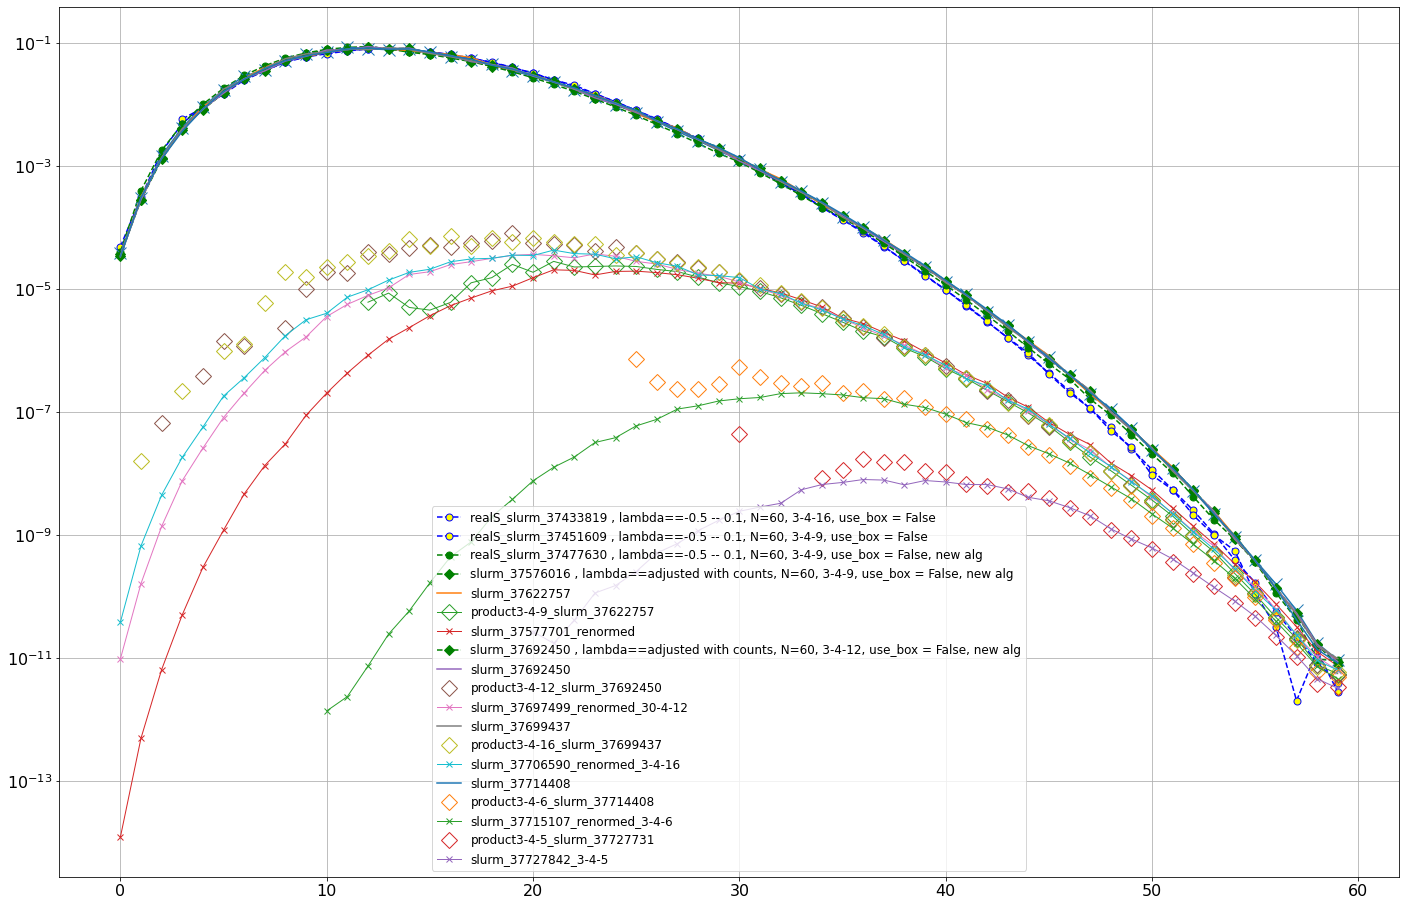

In [4070]:
plt.figure(figsize=(24,16))
# plt.plot(realS_slurm_37420602, label = 'realS_slurm_37420602 , lambda==-0.5 -- 0.1, N=60, 3-4-25',color='black', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)
# plt.plot(realS_slurm_37420607, label = 'realS_slurm_37420607 , lambda==-0.5 -- 0.1, N=60, 3-4-16',color='black', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)
plt.plot(realS_slurm_37433819, label = 'realS_slurm_37433819 , lambda==-0.5 -- 0.1, N=60, 3-4-16, use_box = False',color='blue', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)
# plt.plot(realS_slurm_37433811, label = 'realS_slurm_37433811 , lambda==-0.5 -- 0.1, N=60, 3-4-16, use_box = False',color='blue', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)
# plt.plot(slurm_37433811_fraction, label = 'slurm_37433811_fraction , lambda==-0.5 -- 0.1,3-4-16 N=60',color='red', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)

# plt.plot(realS_slurm_37450980, label = 'realS_slurm_37450980 , lambda==-0.5 -- 0.1, N=60, 3-4-9, use_box=true',color='black', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)

plt.plot(realS_slurm_37451609, label = 'realS_slurm_37451609 , lambda==-0.5 -- 0.1, N=60, 3-4-9, use_box = False',color='blue', marker='o', linestyle='dashed', markerfacecolor='yellow' , markersize=7)

plt.plot(realS_slurm_37477630, label = 'realS_slurm_37477630 , lambda==-0.5 -- 0.1, N=60, 3-4-9, use_box = False, new alg',color='green', marker='o', linestyle='dashed', markerfacecolor='green' , markersize=7)
# plt.plot(realS_slurm_37480534, label = 'realS_slurm_37480534 , lambda==adjusted, N=60, 3-4-9, use_box = False',color='red', marker='o', linestyle='dashed', markerfacecolor='green' , markersize=10)

# plt.plot(realS_slurm_37485554, label = 'realS_slurm_37485554 , lambda==adjusted with counts, N=60, 3-4-9, use_box = False, new alg',color='green', marker='D', linestyle='dashed', markerfacecolor='green' , markersize=7)
# plt.plot(realS_slurm_37575787, label = 'realS_slurm_37575787 , lambda==adjusted with counts, N=60, 3-4-9, use_box = False, new alg',color='green', marker='D', linestyle='dashed', markerfacecolor='green' , markersize=7)
# plt.plot(slurm_37575787_prob/np.sum(slurm_37575787_prob))

plt.plot(slurm_37576016, label = 'slurm_37576016 , lambda==adjusted with counts, N=60, 3-4-9, use_box = False, new alg',color='green', marker='D', linestyle='dashed', markerfacecolor='green' , markersize=7)



# plt.plot(probs_slurm_37485554)
plt.plot(slurm_37521315,  marker='x', markersize=12)
product3416 = realS_slurm_37433819  * np.array(slurm_37433819_fraction)
product3416 = np.where(product3416 == 0.0, np.nan, product3416) 

# plt.plot(product3416, marker='x', label= 'product, 3-4-16', linestyle='none', color='black')


# product349 = realS_slurm_37451609 * np.array(slurm_37451609_fraction)
# product349 = np.where(product349 == 0.0, np.nan, product349) 
# plt.plot(product349, marker='x', label= 'product, 3-4-9', linestyle='none', color='black')

# product349 = realS_slurm_37477630 * np.array(slurm_37477630_fraction)
# product349 = np.where(product349 == 0.0, np.nan, product349) 
# product349 = np.where(product349< 10**(-15), np.nan,product349) 

# plt.plot(product349, marker='X', label= 'product, 3-4-9', linestyle='none', color='black')

# product349 = slurm_37521315 * np.array(fraction)
# plt.plot(product349, marker='X', label= 'product, 3-4-9', linestyle='solid', color='pink')

# product349 = slurm_37576016 * np.array(slurm_37576016_fraction)
# plt.plot(product349, marker='o', label= 'product, 3-4-9', linestyle='solid', color='pink')


# plt.plot(slurm_37577701, label = 'slurm_37577701',color='blue', linewidth=5, marker='x', markersize=10)
# delta = np.log(slurm_37577701) - np.log(product349)
# # print(delta, np.nanmean(delta)) 
# slurm_37577701_renormed = slurm_37577701/np.exp(np.nanmean(delta))
# plt.plot(slurm_37577701_renormed, label='slurm_37577701_renormed', color='blue', linewidth=5)
# # print(slurm_37577701_renormed)


# delta = np.log(realS_slurm_37420607) - np.log(product3416)
# print(delta, np.nanmean(delta)) 
# realS_slurm_37420607_renormed = realS_slurm_37420607/np.exp(np.nanmean(delta))

# delta = np.log(realS_slurm_37450980) - np.log(product349)
# realS_slurm_37450980_renormed = realS_slurm_37450980/np.exp(np.nanmean(delta))


# plt.plot(realS_slurm_37450980_renormed, label = 'realS_slurm_37450980_renormed , lambda==-0.5 -- 0.1, N=60, 3-4-9',color='black', marker='o', linestyle='dashed', markerfacecolor='black' , markersize=7)

# plt.plot(realS_slurm_37420607_renormed, label = 'realS_slurm_37420602_renormed , lambda==-0.5 -- 0.1, N=60, 3-4-16',color='black', marker='o', linestyle='dashed', markerfacecolor='black' , markersize=7)


# fraction = {0: [0, 483], 1: [0, 593], 2: [0, 586], 3: [0, 547], 4: [0, 654], 5: [0, 600], 6: [0, 646], 7: [0, 680], 8: [0, 607], 9: [0, 638], 10: [0, 595], 11: [0, 717], 12: [0, 681], 13: [0, 758], 14: [0, 711], 15: [0, 719], 16: [0, 784], 17: [0, 803], 18: [0, 803], 19: [0, 855], 20: [1, 849], 21: [2, 887], 22: [3, 896], 23: [1, 837], 24: [1, 886], 25: [2, 929], 26: [4, 880], 27: [3, 900], 28: [10, 914], 29: [11, 873], 30: [4, 961], 31: [16, 845], 32: [9, 783], 33: [16, 861], 34: [13, 881], 35: [13, 825], 36: [16, 779], 37: [25, 812], 38: [25, 782], 39: [25, 737], 40: [20, 746], 41: [36, 728], 42: [36, 729], 43: [41, 679], 44: [41, 696], 45: [48, 595], 46: [49, 582], 47: [44, 638], 48: [59, 551], 49: [66, 560], 50: [59, 482], 51: [83, 451], 52: [85, 426], 53: [89, 423], 54: [114, 405], 55: [94, 327], 56: [97, 287], 57: [113, 280], 58: [106, 214], 59: [159, 267]}
# fraction = {0: [0, 14371], 1: [0, 15384], 2: [0, 15548], 3: [0, 15101], 4: [0, 15191], 5: [0, 16130], 6: [0, 15567], 7: [0, 16578], 8: [0, 17417], 9: [0, 18205], 10: [0, 18537], 11: [0, 19233], 12: [1, 20278], 13: [3, 20337], 14: [0, 22054], 15: [2, 22774], 16: [2, 23631], 17: [7, 23529], 18: [7, 25023], 19: [17, 25448], 20: [15, 26119], 21: [38, 26617], 22: [41, 27404], 23: [40, 27303], 24: [66, 27921], 25: [90, 27989], 26: [118, 28194], 27: [127, 27306], 28: [157, 27462], 29: [190, 27280], 30: [245, 27951], 31: [287, 27802], 32: [323, 26224], 33: [376, 26285], 34: [442, 26427], 35: [490, 26107], 36: [548, 25627], 37: [638, 24277], 38: [692, 24266], 39: [840, 23923], 40: [896, 23022], 41: [988, 21775], 42: [1063, 21013], 43: [1248, 21029], 44: [1370, 20206], 45: [1306, 18328], 46: [1540, 18260], 47: [1660, 17703], 48: [1810, 16603], 49: [1898, 15360], 50: [2066, 14322], 51: [2126, 13072], 52: [2377, 12246], 53: [2420, 11094], 54: [2483, 10257], 55: [2539, 8878], 56: [2687, 7985], 57: [2635, 6657], 58: [2636, 5668], 59: [4256, 7113]}

# fraction = [item[1][0]/item[1][1] for item in fraction.items()]

plt.plot(slurm_37622757, label='slurm_37622757')
product349 = slurm_37622757 * np.array(slurm_37622757_fraction)
product349 = np.where(product349 ==0, np.nan, product349)
plt.plot(product349, label='product3-4-9_slurm_37622757', linewidth=1, marker='D',markersize=12, markerfacecolor='none' )
dlt = np.log(slurm_37577701) -np.log(product349)
slurm_37577701_renormed = slurm_37577701/np.exp(np.nanmean(dlt))
plt.plot(slurm_37577701_renormed, label='slurm_37577701_renormed', linewidth=1, marker='x')

plt.plot(slurm_37692450, label = 'slurm_37692450 , lambda==adjusted with counts, N=60, 3-4-12, use_box = False, new alg',color='green', marker='D', linestyle='dashed', markerfacecolor='green' , markersize=7)
plt.plot(slurm_37692450, label='slurm_37692450')
product3412 = slurm_37692450 * np.array(slurm_37692450_fraction)
product3412 = np.where(product3412 ==0, np.nan, product3412)
plt.plot(product3412, label='product3-4-12_slurm_37692450', linewidth=0, marker='D',markersize=12, markerfacecolor='none' )


slurm_37697499 = np.where(slurm_37697499 < 10**-15, np.nan, slurm_37697499)
dlt = np.log(slurm_37697499[20:]) -np.log(product3412[20:])
slurm_37697499_renormed = slurm_37697499/np.exp(np.nanmean(dlt))
plt.plot(slurm_37697499_renormed, label='slurm_37697499_renormed_30-4-12', linewidth=1, marker='x')


slurm_37699437 = np.where(slurm_37699437 < 10**-15, np.nan, slurm_37699437)
plt.plot(slurm_37699437, label='slurm_37699437')
product3416 = slurm_37699437 * np.array(slurm_37699437_fraction)
product3416 = np.where(product3416 ==0, np.nan, product3416)
plt.plot(product3416, label='product3-4-16_slurm_37699437', linewidth=0, marker='D',markersize=12, markerfacecolor='none' )



dlt = np.log(slurm_37706590[20:]) -np.log(product3416[20:])
slurm_37706590_renormed = slurm_37706590/np.exp(np.nanmean(dlt))
plt.plot(slurm_37706590_renormed, label='slurm_37706590_renormed_3-4-16', linewidth=1, marker='x')




plt.plot(slurm_37714408, label='slurm_37714408')

# slurm_37714408_fraction
product346 = slurm_37714408 * np.array(slurm_37714408_fraction)
product346 = np.where(product346 ==0, np.nan, product346)
plt.plot(product346, label='product3-4-6_slurm_37714408', linewidth=0, marker='D',markersize=12, markerfacecolor='none' )



slurm_37715107 = np.where(slurm_37715107 < 10**-25, np.nan, slurm_37715107)

dlt = np.log(slurm_37715107[35:]) -np.log(product346[35:])
slurm_37715107_renormed = slurm_37715107/np.exp(np.nanmean(dlt))
plt.plot(slurm_37715107_renormed, label='slurm_37715107_renormed_3-4-6', linewidth=1, marker='x')




product345 = slurm_37727731 * np.array(slurm_37727731_fraction)
product345 = np.where(product345 ==0, np.nan, product345)
plt.plot(product345, label='product3-4-5_slurm_37727731', linewidth=0, marker='D',markersize=12, markerfacecolor='none' )



slurm_37727842 = np.where(slurm_37727842 < 10**-25, np.nan, slurm_37727842)
dlt = np.log(slurm_37727842[40:]) -np.log(product345[40:])
slurm_37727842_renormed = slurm_37727842/np.exp(np.nanmean(dlt))
plt.plot(slurm_37727842_renormed, label='slurm_37727842_3-4-5', linewidth=1, marker='x')


plt.grid()
plt.legend()
# 
plt.yscale('log')


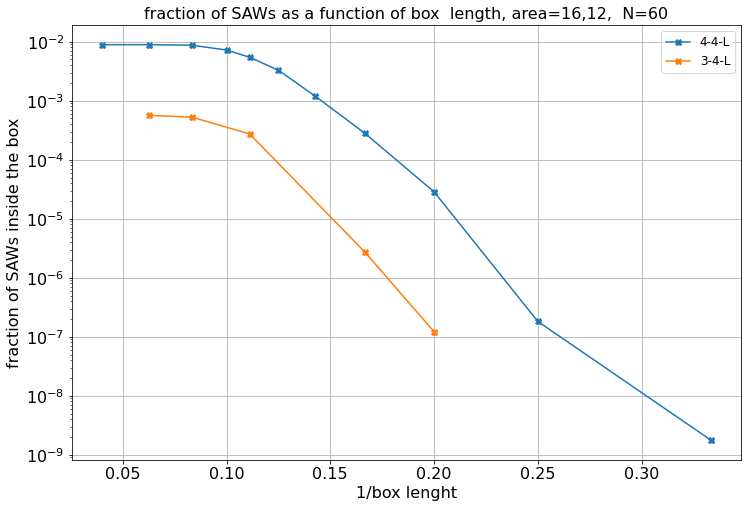

In [4067]:
lengths = [3,4,5,6,7,8, 9,10, 12,16, 25]
fractions = [np.nansum(realS_slurm_36471543_renormed),
            np.nansum(realS_slurm_36358701_renormed),
            np.nansum(realS_slurm_37069976_renormed),
            np.nansum(realS_slurm_36595204_renormed),
            np.nansum(realS_slurm_37074203_renormed),
            np.nansum(product9),
            np.nansum(product5),
            np.nansum(product10),
            np.nansum(product6),
            np.nansum(product7),
            np.nansum(product8)
            ]

plt.figure(figsize=(12,8))
plt.plot(1/np.array(lengths), fractions, marker='X', label='4-4-L')

lengths = [5,6 , 9, 12,16]
fractions = [np.nansum(slurm_37727842_renormed),
             np.nansum(slurm_37715107_renormed), 
             np.sum(slurm_37577701_renormed), 
             np.nansum(slurm_37697499_renormed), 
             np.nansum(slurm_37706590_renormed) 
            ]

plt.plot(1/np.array(lengths), fractions, marker='X', label='3-4-L')


plt.yscale('log')
plt.xlabel('1/box lenght')
plt.ylabel('fraction of SAWs inside the box')
plt.title("fraction of SAWs as a function of box  length, area=16,12,  N=60")

plt.legend()
plt.grid()

In [4023]:
60./4/5/6


0.5

In [4013]:
np.nansum(slurm_37715107_renormed), np.sum(slurm_37577701_renormed), np.nansum(slurm_37697499_renormed), np.nansum(slurm_37706590_renormed)

(3.4151465896856347e-06,
 0.00027422573546986433,
 0.0005264914069689678,
 0.0005752531795902283)

$N_1 = 2N_0(\frac{1-\lambda}{2-\lambda})$, $N_2 = \frac{2N_0\lambda}{2-\lambda}$, $l_{crit} = \frac{2N_0}{cS(2-\lambda)}, S_1 = S(1-\lambda), S_2 = S\lambda$

In [3874]:
N_0 = 100
c= 0.4
S=36

for l in np.linspace(0.1, 0.5, 15):
    n1 = N_0*(2-2*l)/(2-l)
    n2 = 2*N_0*l/(2-l)
    l_crit = 2*N_0/c/S/(2-l)
    S1 = S*(1-l)
    S2 = S*l
    
    print('%3.2f'%l, int(n1), int(n2), int(S1), int(S2), int(l_crit))

0.10 94 10 32 3 7
0.13 93 13 31 4 7
0.16 91 17 30 5 7
0.19 89 20 29 6 7
0.21 88 24 28 7 7
0.24 86 27 27 8 7
0.27 84 31 26 9 8
0.30 82 35 25 10 8
0.33 80 39 24 11 8
0.36 78 43 23 12 8
0.39 76 47 22 13 8
0.41 73 52 21 14 8
0.44 71 56 20 15 8
0.47 69 61 19 16 9
0.50 66 66 18 18 9


In [3779]:
b  = np.array(range(60))/60   +0.5

b, 3*np.log(b)/b

(array([0.5       , 0.51666667, 0.53333333, 0.55      , 0.56666667,
        0.58333333, 0.6       , 0.61666667, 0.63333333, 0.65      ,
        0.66666667, 0.68333333, 0.7       , 0.71666667, 0.73333333,
        0.75      , 0.76666667, 0.78333333, 0.8       , 0.81666667,
        0.83333333, 0.85      , 0.86666667, 0.88333333, 0.9       ,
        0.91666667, 0.93333333, 0.95      , 0.96666667, 0.98333333,
        1.        , 1.01666667, 1.03333333, 1.05      , 1.06666667,
        1.08333333, 1.1       , 1.11666667, 1.13333333, 1.15      ,
        1.16666667, 1.18333333, 1.2       , 1.21666667, 1.23333333,
        1.25      , 1.26666667, 1.28333333, 1.3       , 1.31666667,
        1.33333333, 1.35      , 1.36666667, 1.38333333, 1.4       ,
        1.41666667, 1.43333333, 1.45      , 1.46666667, 1.48333333]),
 array([-4.15888308, -3.83433304, -3.53592371, -3.2609291 , -3.00697432,
        -2.771982  , -2.55412812, -2.35180532, -2.16359243, -1.98822884,
        -1.82459299, -1.67168413, -1

In [3342]:
if 1>0:
    pass
else:
    pass
    print('dd')

In [2926]:
b=10
a = np.log(b)/b
xx = np.array([np.random.rand() for i in range(500)])
xx = b*xx/np.sum(xx)

np.prod([np.exp(a*i) for i in xx]),  b

(10.000000000000009, 10)

In [3801]:
# nu = 0.6
# S = 4


def threshold(n, lbd, S, nu=0.6):
    res = []
    D_lbd = math.sqrt(S*lbd)
    D_lbd_ = math.sqrt(S*(1-lbd))
    D = math.sqrt(S)
    
    res.append(1/D_lbd_**nu - 1/D**nu)
#     print(res)
    i_max = int(
        n/(2*(1/lbd -1)**(1/nu  - 1) +1)
    )
#     print(i_max)
    delta = 1/D_lbd**nu - 1/D_lbd_**nu
    for i in range(1,i_max):
        res.append(
            (2*n/((n+i)*(n+i-1)))*delta + res[-1]
                )
    return(res)
    

Text(0.5, 0, '$\\lambda$')

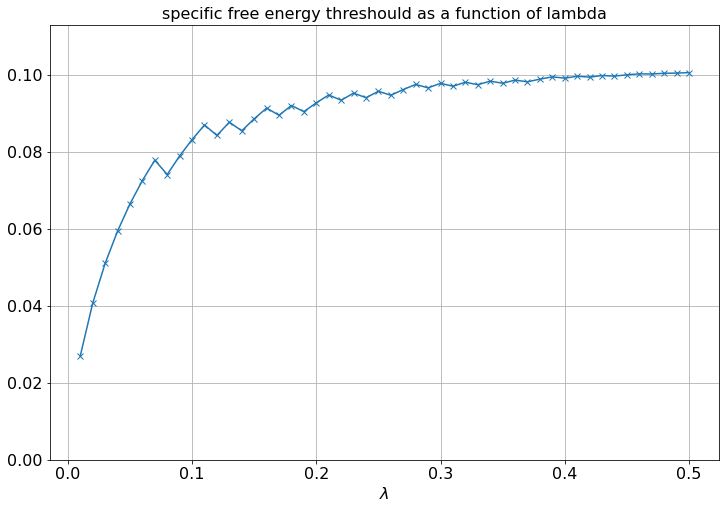

In [3810]:
plt.figure(figsize=(12,8))
plt.grid()
plt.ylim(0,.113)
res_ = []
for l in np.linspace(0.01, 0.5, 50):
    t = threshold(n=100, lbd=l, S=16)
    res_.append((l, t[-1]))

x,y  = zip(*res_)
plt.plot(x,y, marker='x')
plt.title("specific free energy threshould as a function of lambda")
plt.xlabel('$\lambda$')

In [1873]:
def multinomial_sum(l,p):
    if n%2 != 0:
        return 0
    else:
#         return (p**l - (p**(l-1))*l*(l-1)/4  )*math.factorial(l)
        return (p**(2*l + p/2))*(4*np.pi*l)**((1-p)/2)
#         return ((p+1)**(2*l + (p+1)/2))*(4*np.pi*l)**(-p/2)

    

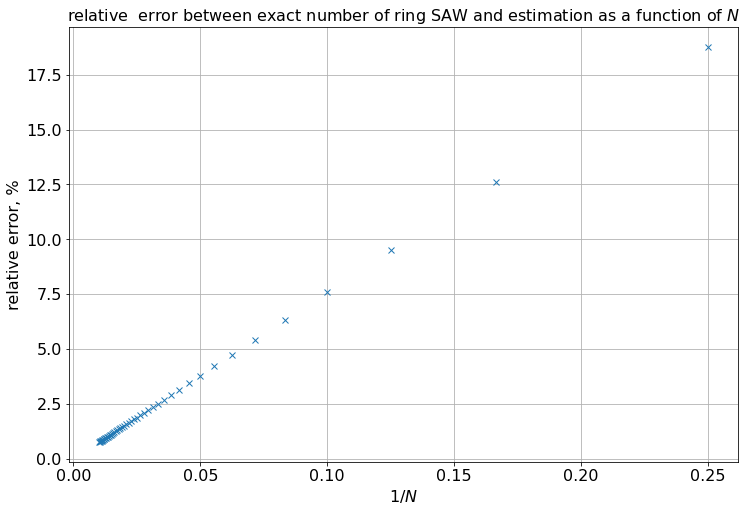

In [2148]:
res = []
xx = range(4,100,2)
for n in xx:
#     print(n, aux.n_conf(n,0,0,0), aux.n_conf(n,0,0,0)/ ( ((2**(n+.5))/math.sqrt(np.pi*n))*multinomial_sum(n/2,3)))
    res.append(100*(aux.n_conf(n,0,0,0) -  ( ((2**(n+.5))/math.sqrt(np.pi*n))*multinomial_sum(n/2,3))) / aux.n_conf(n,0,0,0))

plt.figure(figsize=(12,8))
plt.title('relative  error between exact number of ring SAW and estimation as a function of $N$')
plt.plot(1/np.array(xx) , np.abs(res), marker = 'x', linestyle='none')
plt.xlabel('$1/N$')
plt.ylabel('relative error, %')
plt.grid()

In [2124]:
# overlaps8 = overlaps.Overlap(8)
# print(overlaps8)
# print(overlaps8.get_overlaps_histogram())

overlaps14 = overlaps.Overlap(4)
print(overlaps14)
print(overlaps14.get_overlaps_histogram())


self.dict is calculated. the length is 6
overlaps for 4 beads has 90 conformations
[<generator object Overlap.fun at 0x13d6e0040>, <generator object Overlap.fun at 0x13d6e00b0>, <generator object Overlap.fun at 0x13d6e0120>, <generator object Overlap.fun at 0x13d6e0190>, <generator object Overlap.fun at 0x13d6e0200>, <generator object Overlap.fun at 0x13d39a200>]
encoding to coords
done encoding to coords
type of self.encoded_conformations <class 'generator'>
{1.0: 60, 2.0: 6, 0.0: 24}


In [1963]:
1/14, np.log(12673920./936369720)/14

(0.07142857142857142, -0.3073188614099504)

14 0.5991901066536931
12 0.5989020751969899
10 0.5989959369374259
8 0.6037617094459059
6 0.6290513866089807
4 0.6046803517805098


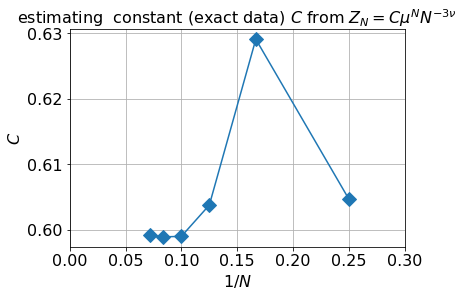

In [2117]:
data = [(14, 12673920), (12, 762096), (10, 48240), (8, 3312), (6, 264), (4, 24)]
nu= 0.6
res = []
for n, n_walks in data:
    print(n, n_walks/((mu**n)*(n**(-3*nu))))
    res.append((1.0/n, n_walks/((mu**n)*(n**(-3*nu)))))


x,y = zip(*res)


plt.plot(x,y,  marker='D', markersize=10, label='from exact data')
plt.xlabel('$1/N$')
plt.ylabel('$C$')
plt.title('estimating  constant (exact data) $C$ from $Z_N=C\mu^{N}N^{-3\\nu}$')
plt.xlim(0,0.3)
plt.grid()
plt.show()

-0.0785463357628719
[ 0.33521535  0.17916587 -0.25830947]


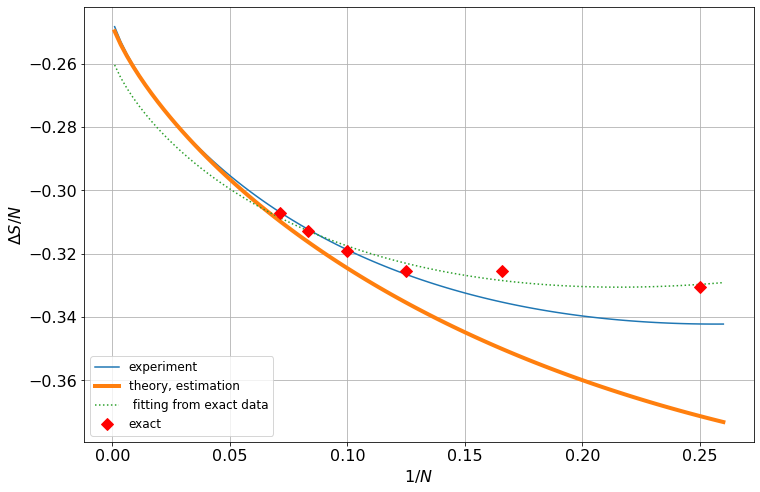

In [2177]:
def fun(x,a,b,c):
    return(a*x*np.log(x) +b*x +c)


coef = 1.5*np.log(np.pi/3) + 0.5*np.log(2) + np.log(0.61)
print(coef)
r1 = []
r2 = []
xx = np.linspace(0.001,.26, 100)
for x in xx:
    r1.append(0.375*x*np.log(x) + 0.1347*x -0.2459)
#     r2.append(0.3*x*np.log(x) + 0.4157*x  -0.247649722)
    r2.append(0.3*x*np.log(x) + coef*x  -0.247649722)

dots = [(0.07142857142857142, -0.3073188614099504), (0.25, -0.3304), (0.166, -0.325397), (.125, -0.32538), (0.1, -0.31907), (0.0833, -0.3127337)]

x, y = zip(*dots)
parameters, covariance = curve_fit(fun, x, y)
print(parameters)

# plt.figure(figsize=(12,8))

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(xx, r1, label='experiment')
ax.plot(xx, r2, label='theory, estimation', linewidth=4)
plt.plot(xx, fun(np.array(xx), *parameters), label=' fitting from exact data', linestyle='dotted')
ax.plot(x,y, marker = 'D', markersize=8, color = 'red', linestyle='none', label='exact')

# fig, ax = plt.subplots()
# ax.plot(range(10))
# axin1 = ax.inset_axes([0.6, 0.6, 0.4, 0.4])
# axin2 = ax.inset_axes(
#         [5, 7, 2.3, 2.3], transform=ax.transData)
ax.legend(loc="lower left")
ax.grid()
plt.xlabel('$1/N$')
plt.ylabel('$\Delta S/N$')
plt.show()



14.166666666666666

36 1.1684919196993773
34 1.1689159939847538
32 1.16937767323821
30 1.1698827744643203
28 1.170438555840017
24 1.1717416618678136
[0.23349291 1.16205793]


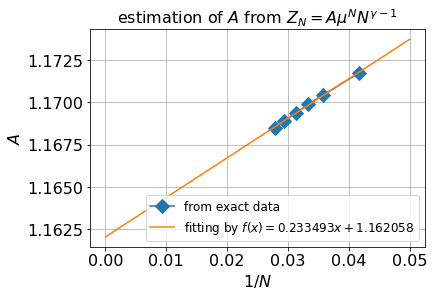

In [2116]:
def fun(x,a,b):
    return(a*x+b)

mu = 4.6838
gamma = 1./6


data = [(36, 2941370856334701726560670), (34, 132853629626823234210582),\
(32, 5997359460809616886494),\
(30, 270569905525454674614),\
(28, 12198184788179866902),\
       (24, 24730180885580790)]
#         (10, 8809878)]
# (20, 49917327838734),]
       

res = []
for n, n_walks in data:
    print(n, n_walks/((mu**n)*(n**gamma)))
    res.append((1.0/n, n_walks/((mu**n)*(n**gamma))))


x,y = zip(*res)

parameters, covariance = curve_fit(fun, x, y)
print(parameters)

# plt.figure(figsize=(12,8))
plt.plot(x,y,  marker='D', markersize=10, label='from exact data')
xx = np.linspace(0,.05, 6)
plt.plot(xx, fun(np.array(xx), *parameters), label='fitting by $f(x)=%f x+ %f$'%(parameters[0],parameters[1]))

plt.title('estimation of $A$ from $Z_N = A\mu^{N}N^{\gamma -1}$')
plt.xlabel('$1/N$')
plt.ylabel("$A$")
plt.legend()
plt.grid()
plt.show()

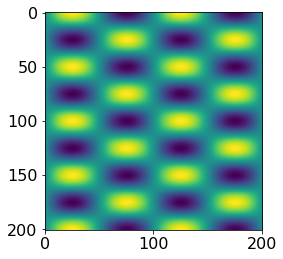

0.0

In [2248]:
import matplotlib.pyplot as plt
import scipy

rng = np.random.default_rng()
[X, Y] = np.meshgrid(2 * np.pi * np.arange(201) / 100,
                     2 * np.pi * np.arange(201) / 50)
S = np.sin(X) * np.cos(Y) + rng.uniform(0, 0.0, X.shape)
FS = scipy.fft.fftn(S)
# plt.imshow(np.log(np.abs(scipy.fft.fftshift(FS))**2))
plt.imshow(S)

plt.show()
S[0,0]

(3447.1125391514006+0j)

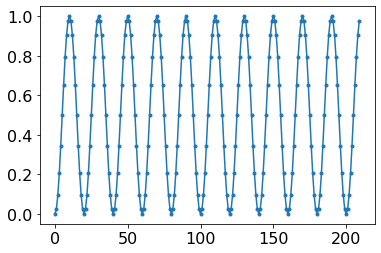

In [2253]:
X = 2 * np.pi * np.arange(210) / 40
Y = 2 * np.pi * np.arange(210) / 40

plt.plot(np.sin(X)*np.sin(Y), marker = '.')


y = np.sum(X * np.exp(-2j * np.pi * 0 * np.arange(210)/210))
y

In [2263]:
scipy.fft.fft(np.exp(2j * np.pi * np.arange(8) / 8))

array([-2.33486982e-16+1.14423775e-17j,  8.00000000e+00-9.95431023e-16j,
        2.33486982e-16+2.33486982e-16j,  0.00000000e+00+1.22464680e-16j,
       -1.14423775e-17+2.33486982e-16j, -8.88178420e-16+2.60642944e-16j,
        1.14423775e-17+1.14423775e-17j,  0.00000000e+00+1.22464680e-16j])

In [2256]:
np.exp(2j * np.pi * np.arange(9) / 8)

array([ 1.00000000e+00+0.00000000e+00j,  7.07106781e-01+7.07106781e-01j,
        6.12323400e-17+1.00000000e+00j, -7.07106781e-01+7.07106781e-01j,
       -1.00000000e+00+1.22464680e-16j, -7.07106781e-01-7.07106781e-01j,
       -1.83697020e-16-1.00000000e+00j,  7.07106781e-01-7.07106781e-01j,
        1.00000000e+00-2.44929360e-16j])

(6560,)
6560
161


(0.0, 10.368005366517647)

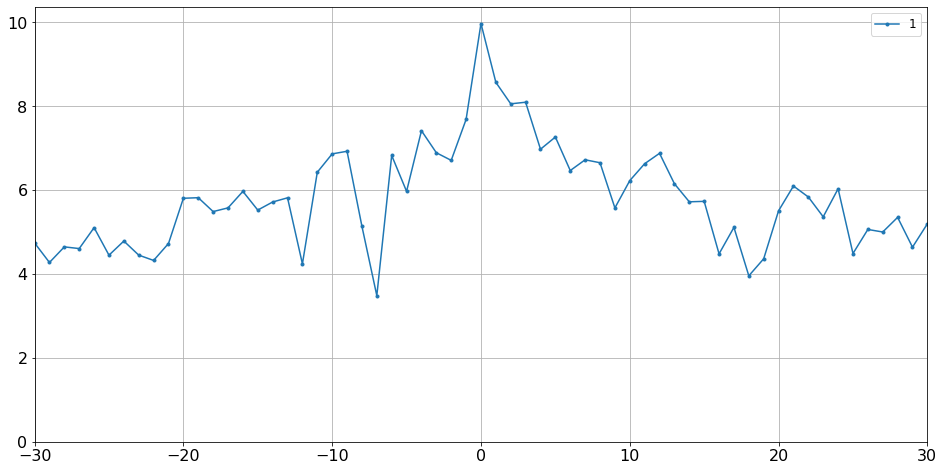

In [2751]:
path_2 = [
22.79,160.43,22.98,160.43,23.58,160.43,24.99,160.43,25.65,160.43,26.71,160.43,27.86,160.43,29,160.43,30.15,160.43,31.22,160.43,32.01,160.43,32.71,160.43,33.28,160.43,33.79,160.43,34.22,160.5,34.64,160.57,35.01,160.64,35.36,160.71,35.65,160.78,35.93,160.85,36.22,160.92,36.43,160.99,36.72,160.99,36.93,160.99,37.22,160.99,37.44,160.99,37.72,160.99,37.93,160.99,38.21,160.99,38.51,160.99,38.78,160.99,39.08,160.99,39.35,160.99,39.72,160.99,40.07,160.99,40.51,160.99,40.86,160.99,41.28,160.92,41.72,160.85,42.22,160.78,42.72,160.71,43.22,160.64,43.64,160.5,44.08,160.36,44.5,160.2,44.93,160.06,45.37,159.92,45.72,159.78,46.07,159.64,46.36,159.5,46.71,159.36,47,159.22,47.36,159.06,47.65,158.92,47.85,158.78,48.15,158.64,48.36,158.5,48.64,158.28,48.86,158.14,49.14,158,49.36,157.77,49.65,157.63,49.93,157.49,50.22,157.28,50.5,157.07,50.79,156.86,51.07,156.63,51.36,156.35,51.64,156.14,51.86,155.86,52.14,155.49,52.43,155.14,52.72,154.64,53,154.13,53.29,153.5,53.57,152.85,53.94,152.06,54.29,151.22,54.57,150.35,54.86,149.42,55.15,148.56,55.36,147.72,55.58,146.85,55.72,145.99,55.78,145.22,55.85,144.5,55.93,143.78,56,143.14,56.07,142.49,56.15,141.93,56.22,141.42,56.29,140.93,56.37,140.49,56.43,140.07,56.5,139.71,56.5,139.43,56.5,139.2,56.5,138.99,56.5,138.78,56.5,138.64,56.5,138.5,56.5,138.43,56.5,138.29,56.5,138.13,56.5,137.99,56.5,137.85,56.5,137.78,56.5,137.71,56.5,137.57,56.5,137.43,56.5,137.36,56.5,137.29,56.5,137.22,56.5,137.06,56.5,136.92,56.5,136.71,56.5,136.57,56.5,136.43,56.5,136.21,56.5,136,56.5,135.7,56.5,135.42,56.5,135.07,56.5,134.7,56.5,134.35,56.5,133.93,56.5,133.49,56.5,133,56.5,132.5,56.5,131.99,56.5,131.5,56.5,130.99,56.5,130.43,56.5,129.85,56.5,129.29,56.5,128.78,56.5,128.28,56.5,127.77,56.5,127.35,56.5,126.93,56.5,126.56,56.5,126.21,56.5,125.86,56.5,125.49,56.5,125.14,56.5,124.85,56.5,124.5,56.5,124.13,56.5,123.71,56.5,123.36,56.5,122.99,56.5,122.57,56.5,122.22,56.5,121.78,56.5,121.43,56.43,121.07,56.37,120.7,56.29,120.28,56.15,119.86,56,119.42,55.78,118.93,55.58,118.42,55.28,117.86,55.08,117.27,54.86,116.71,54.57,116.13,54.36,115.57,54.07,114.99,53.87,114.43,53.65,113.85,53.43,113.28,53.22,112.7,52.93,112.14,52.72,111.56,52.43,111,52.21,110.5,51.93,109.99,51.57,109.5,51.29,109.06,50.92,108.64,50.57,108.29,50.15,107.99,49.71,107.78,49.21,107.57,48.72,107.43,48.29,107.36,47.79,107.29,47.22,107.29,46.64,107.29,46.07,107.29,45.5,107.29,44.93,107.29,44.36,107.29,43.71,107.29,43.07,107.29,42.5,107.29,41.93,107.29,41.36,107.29,40.71,107.29,40.07,107.29,39.35,107.29,38.58,107.29,37.72,107.22,36.79,107.15,35.86,106.99,34.86,106.78,33.93,106.49,33,106.14,32.14,105.7,31.43,105.14,30.85,104.49,30.36,103.79,29.93,103,29.64,102.13,29.44,101.29,29.29,100.43,29.29,99.5,29.29,98.56,29.36,97.63,29.57,96.65,29.93,95.57,30.43,94.5,31.15,93.29,32.01,92,32.93,90.77,34,89.63,35.07,88.57,36.15,87.64,37.14,86.92,38.08,86.36,38.78,85.92,39.43,85.64,40,85.43,40.51,85.36,41.36,85.5,42.15,85.64,42.79,85.78,43.14,85.92,43.36,86.22,43.36,86.57,43.07,87.06,42.72,87.5,41.86,87.85,40.86,88.28,39.87,88.79,39,89.35,38.14,89.86,37.36,90.35,36.65,90.86,35.78,91.42,34.86,92,33.93,92.57,32.93,93.15,31.86,93.71,30.78,94.36,29.64,94.99,28.5,95.57,27.29,96.14,26.07,96.72,24.78,97.21,23.44,97.7,22,98.21,20.42,98.7,18.79,99.21,17.07,99.64,15.44,99.99,13.78,100.29,12.22,100.57,10.78,100.78,9.44,100.85,8.28,100.78,7.29,100.57,6.37,100.29,5.5,99.85,4.71,99.21,4,98.42,3.29,97.42,2.65,96.35,2.01,95.13,1.44,93.85,1,92.43,0.65,90.93,0.35,89.49,0.15,87.99,0,86.5,0.08,84.85,0.35,83.14,0.79,81.35,1.44,79.57,2.21,77.85,3.07,76.21,4.07,74.72,5.21,73.35,6.42,72.27,7.71,71.5,9.07,70.92,10.43,70.57,11.87,70.36,13.43,70.29,15,70.36,16.58,70.64,18,71.06,19.28,71.64,20.42,72.36,21.43,73.21,22.22,74.21,22.79,75.28,23.22,76.42,23.5,77.5,23.72,78.57,23.79,79.57,23.72,80.57,23.44,81.49,23.07,82.42,22.5,83.28,21.78,84.07,20.94,84.85,19.85,85.57,18.71,86.22,17.5,86.78,16.28,87.27,15.07,87.57,14,87.78,12.93,87.78,11.87,87.64,10.93,87.27,10.01,86.71,9.15,85.92,8.36,84.92,7.58,83.77,6.79,82.42,6.07,81,5.43,79.43,4.86,77.78,4.44,76.07,4.07,74.28,3.79,72.43,3.57,70.57,3.43,68.56,3.43,66.49,3.57,64.36,3.79,62.14,4.07,60,4.44,57.85,4.93,55.85,5.5,53.93,6.22,52.28,7.07,50.78,8.22,49.5,9.64,48.5,11.35,47.64,13.43,47,15.71,46.49,18.29,46.21,21.07,46.07,23.94,46.21,26.64,46.56,29.22,47.07,31.57,47.71,33.65,48.5,35.43,49.36,36.93,50.27,38.14,51.28,39.15,52.28,40,53.28,40.64,54.28,41.21,55.36,41.65,56.43,42,57.57,42.29,58.64,42.5,59.72,42.65,60.7,42.72,61.7,42.72,62.64,42.57,63.5,42.37,64.29,42,64.99,41.43,65.64,40.71,66.14,39.79,66.58,38.65,66.86,37.44,67,36.15,67,34.79,66.86,33.43,66.49,32.21,66.07,31,65.5,29.93,64.78,28.94,63.92,28,63.08,27.08,62.14,26.22,61.14,25.43,60.07,24.65,58.93,23.94,57.71,23.29,56.5,22.79,55.29,22.36,53.93,22.08,52.49,21.93,50.99,22.08,49.43,22.57,47.64,23.44,45.72,24.65,43.5,26.22,41.06,28.15,38.56,30.5,36.06,33.15,33.57,35.93,31.28,38.71,29.28,41.21,27.64,43.51,26.43,45.64,25.57,47.72,25,49.65,24.7,51.44,24.7,53,25,54.44,25.57,55.93,26.43,57.36,27.57,58.65,28.99,59.72,30.72,60.51,32.63,61.08,34.71,61.5,36.79,61.79,38.86,61.93,40.85,61.87,42.78,61.5,44.65,60.86,46.35,59.94,47.92,58.8,49.36,57.36,50.57,55.72,51.57,53.87,52.35,51.86,52.93,49.78,53.28,47.72,53.42,45.72,53.35,43.71,53.07,41.86,52.65,40.07,52.07,38.51,51.35,37.14,50.43,36.08,49.29,35.21,47.92,34.57,46.28,34.15,44.42,33.93,42.36,34,39.93,34.44,37.14,35.21,34.22,36.08,31.42,37.22,28.92,38.71,26.78,40.71,24.84,43.36,23.21,46.43,21.93,49.71,21.06,53.35,20.43,57.36,19.78,61.5,19.06,65.64,18.28,69.65,17.56,73.22,16.93,76.57,16.35,79.64,15.86,82.29,15.49,84.72,15.21,86.87,15.07,88.78,15.07,90.51,15.21,92.08,15.49,93.36,16,94.5,16.7,95.5,17.63,96.36,18.78,97.08,20.13,97.65,21.64,98,23.35,98,25.21,97.79,27.13,97.28,28.99,96.43,30.79,95.29,32.42,93.93,33.78,92.35,34.99,90.64,35.92,88.86,36.57,87.07,37,85.29,37.21,83.65,37.14,82.07,36.93,80.65,36.57,79.29,35.99,78.08,35.27,77.08,34.43,76.07,33.43,75.22,32.28,74.51,31.14,73.86,29.93,73.29,28.64,72.85,27.22,72.5,25.64,72.36,23.86,72.65,21.78,73.5,19.43,74.93,16.86,77.14,14.06,80.08,11.29,83.65,8.63,87.94,6.2,92.79,4.15,98,2.49,103.35,1.35,108.72,0.56,113.86,0.14,118.71,0,123.37,0.14,127.58,0.49,131.35,1,134.72,1.63,137.57,2.42,139.93,3.42,141.86,4.57,143.44,5.92,144.58,7.49,145.43,9.28,146,11.36,146.29,13.71,146.29,16.35,146.07,19.15,145.64,22.14,144.93,25.21,143.93,28.36,142.57,31.42,140.79,34.29,138.71,36.93,136.43,39.21,134,41.22,131.35,42.92,128.65,44.28,125.87,45.21,123.07,45.86,120.37,46.28,117.65,46.49,114.92,46.63,112.15,46.7,109.5,46.7,106.86,46.7,104.36,46.63,102.14,46.56,100.22,46.49,98.64,46.35,97.43,46.21,96.58,46,96.07,45.72,96.21,45.28,97.08,44.86,98.72,44.28,101.29,43.57,104.57,42.85,108.43,42.06,112.94,41.36,117.72,40.71,122.5,40.21,127.14,39.77,131.29,39.63,134.72,39.7,137.57,40,139.93,40.5,141.65,41.29,143,42.36,144.08,43.78,144.78,45.63,145.29,47.78,145.64,50.36,145.72,53.28,145.43,56.57,143.86,60.79,141.72,64.92,138.93,68.77,135.71,72.2,132,75.07,127.78,77.21,123.37,78.64,118.93,79.29,115.44,78.43,112.22,77.07,109.29,75.35,106.65,73.35,104.36,71.29,102.43,69.14,100.79,67,99.43,64.92,98.44,62.85,97.72,60.86,97.5,58.93,97.65,57.13,98.22,55.43,99.21,54,100.57,52.79,102.29,51.79,104.44,51.13,106.94,50.85,109.5,50.92,112.15,51.35,114.72,52.07,117.15,52.93,119.43,54,121.43,55.21,123.07,56.5,124.36,57.85,125.43,59.28,126.22,60.7,126.79,62.28,127.21,63.92,127.51,65.57,127.71,67.21,127.71,68.86,127.51,70.43,127.01,71.92,126.29,73.28,125.28,74.35,124.01,75.28,122.36,76,120.43,76.56,118.36,77,116.21,77.28,114.08,77.43,111.93,77.5,109.94,77.5,108.08,77.36,106.43,77.14,105.01,76.77,103.79,76.42,102.78,76,102.01,75.49,101.44,75,101,74.56,100.79,74.21,100.79,74,101.07,74,101.72,74.07,102.65,74.35,103.92,74.79,105.58,75.35,107.51,76.07,109.57,76.92,111.79,77.85,113.93,78.85,115.86,79.92,117.57,81,119.01,82.14,120.07,83.28,120.94,84.42,121.58,85.5,122.01,86.57,122.28,87.64,122.5,88.65,122.65,89.56,122.58,90.42,122.36,91.21,121.79,91.92,120.86,92.64,119.65,93.29,118.07,93.78,116.21,94.2,114,94.57,111.65,94.78,109.15,94.85,106.65,94.78,104.29,94.5,102.01,94.06,99.86,93.57,97.85,92.92,96.14,92.29,94.65,91.63,93.36,91.07,92.29,90.56,91.36,90.21,90.57,89.93,90,89.72,89.5,89.63,88.93,89.56,88.36,89.63,87.72,89.79,87,90.07,86.22,90.42,85.36,91,84.37,91.71,83.28,92.57,82.29,93.57,81.29,94.57,80.36,95.64,79.51,96.72,78.72,97.79,78.08,98.7,77.58,99.57,77.14,100.36,76.79,101.06,76.44,101.85,76.14,102.57,75.93,103.28,75.72,104,75.5,104.72,75.28,105.42,75.15,106.14,75,106.92,74.86,107.64,74.71,108.43,74.58,109.13,74.51,109.92,74.43,110.79,74.36,111.72,74.21,112.7,74.07,113.63,74.01,114.64,73.94,115.57,73.86,116.5,73.79,117.35,73.72,118.14,73.64,118.86,73.64,119.42,73.64,120,73.64,120.56,73.64,121.14,73.64,121.71,73.64,122.29,73.64,122.85,73.64,123.43,73.64,123.99,73.72,124.57,73.79,125.07,73.86,125.49,73.94,125.93,74.01,126.28,74.07,126.56,74.14,126.79,74.21,127.07,74.21,127.42,74.21,127.77,74.21,128.21,74.21,128.64,74.21,129.22,74.21,129.85,74.21,130.64,74.29,131.43,74.36,132.13,74.43,132.79,74.51,133.42,74.58,134.07,74.65,134.63,74.71,135.28,74.78,135.85,74.78,136.5,74.78,137.15,74.78,137.85,74.78,138.64,74.78,139.5,74.78,140.35,74.86,141.21,74.93,142.07,75,142.84,75.08,143.64,75.15,144.43,75.22,145.13,75.28,145.78,75.35,146.43,75.35,146.99,75.35,147.58,75.35,148.14,75.35,148.72,75.35,149.28,75.35,149.86,75.35,150.42,75.35,151,75.35,151.64,75.35,152.29,75.43,152.99,75.5,153.71,75.57,154.5,75.72,155.28,75.87,156.07,76,156.86,76.22,157.56,76.44,158.28,76.64,158.85,76.86,159.43,77.14,159.92,77.43,160.36,77.78,160.78,78.22,161.13,78.65,161.5,79.14,161.78,79.71,162.07,80.36,162.28,81.07,162.42,81.79,162.58,82.51,162.65,83.21,162.72,83.93,162.72,84.64,162.72,85.29,162.72,85.93,162.72,86.57,162.72,87.22,162.72,87.79,162.72,88.36,162.72,88.93,162.72,89.43,162.72,89.87,162.72,90.22,162.79,90.44,162.86,90.57,162.93,90.71,163.07,90.79,163.21,90.79,163.42,90.79,163.72,90.79,164.14,90.79,164.56,90.79,165.14,90.71,165.78,90.64,166.5,90.51,167.29,90.29,168.06,90.07,168.85,89.79,169.57,89.5,170.21,89.15,170.79,88.71,171.35,88.21,171.77,87.64,172.21,87.07,172.63,86.36,173,85.58,173.29,84.57,173.57,83.43,173.78,82.14,173.92,80.78,174.06,79.36,174.15,77.78,174.15,76.22,174.15,74.58,174.15,72.93,174.22,71.29,174.29,69.72,174.36,68.07,174.43,66.5,174.5,64.92,174.57,63.36,174.71,61.79,174.85,60.29,174.92,58.8,174.99,57.29,175.06,55.78,175.2,54.22,175.36,52.65,175.5,51,175.57,49.36,175.64,47.72,175.71,46.14,175.78,44.65,175.85,43.22,175.85,41.86,175.85,40.57,175.78,39.43,175.71,38.36,175.57,37.36,175.43,36.35,175.2,35.36,174.92,34.44,174.57,33.5,174.15,32.64,173.71,31.72,173.22,30.85,172.71,30.01,172.21,29.14,171.7,28.35,171.21,27.58,170.72,26.86,170.28,26.14,169.86,25.5,169.42,24.78,168.99,24.08,168.5,23.44,168.06,22.79,167.64,22.15,167.22,21.51,166.78,20.94,166.36,20.37,165.92,19.85,165.57,19.43,165.21,19.08,164.84,18.71,164.49,18.43,164.14,18.22,163.79,18,163.49,17.86,163.21,17.79,162.93,17.72,162.72,17.64,162.42,17.64,162.21,17.64,162.07,17.64,161.85,17.64,161.64,17.64,161.5,17.64,161.34,17.64,161.2,17.64,161.13,17.72,161.06,17.79,160.99,17.86,160.99,18,160.99,18.22,160.99,18.43,160.99,18.71,160.99,19.01,160.99,19.28,160.99,19.65,160.99,20,160.99,20.37,160.99,20.64,160.99,21.01,160.99,21.29,160.99,21.64,160.99,22,160.99,22.28,160.99,22.65,160.99,23,160.99,23.36,160.99,23.64,160.99,24.01,160.99,24.29,160.99,24.51,160.99,24.71,160.99,24.86,160.99,25,160.99,25.15,160.99,25.3,160.99,25.35,160.99,25.43,160.99,25.5,160.99,25.57,160.99,25.65,160.99,25.65,160.99,25.72,160.92,25.79,160.85,25.87,160.78,25.92,160.71,26,160.64,26.07,160.57,26.14,160.5,26.22,160.43,26.22,160.36,26.22,160.29,26.22,160.2,26.22,160.13,26.22,159.99,26.22,159.85,22.79,160.43
]

path_2 = [
    2.27,203.57,2.47,203.57,3.31,203.44,4.41,203.17,4.85,203.08,5.65,202.87,6.42,202.65,7.22,202.44,7.86,202.23,8.36,202.01,8.66,201.86,8.93,201.71,9.16,201.59,9.36,201.43,9.56,201.28,9.79,201.13,10,201.01,10.3,200.86,10.56,200.7,10.86,200.49,11.13,200.28,11.43,200.15,11.7,200,11.93,199.79,12.2,199.58,12.44,199.42,12.7,199.27,12.94,199.21,13.2,199.06,13.51,198.94,13.77,198.78,14.14,198.63,14.44,198.51,14.78,198.36,15.08,198.14,15.44,197.93,15.78,197.72,16.08,197.51,16.41,197.29,16.71,197.08,17.08,196.87,17.35,196.56,17.72,196.35,17.98,196.07,18.29,195.86,18.65,195.59,18.92,195.28,19.29,195.01,19.56,194.7,19.92,194.43,20.29,194.06,20.66,193.79,20.99,193.42,21.36,193.06,21.86,192.72,22.36,192.36,22.93,191.93,23.5,191.51,24.07,191.14,24.7,190.71,25.37,190.29,26.01,189.92,26.58,189.49,27.21,189.07,27.85,188.7,28.51,188.37,29.15,187.94,29.78,187.58,30.49,187.21,31.22,186.78,31.92,186.42,32.56,186.08,33.23,185.66,33.86,185.2,34.57,184.77,35.3,184.35,35.94,183.92,36.57,183.59,37.27,183.13,38.01,182.79,38.71,182.43,39.51,182.15,40.21,181.85,40.92,181.58,41.72,181.36,42.49,181.06,43.16,180.85,43.79,180.63,44.43,180.51,44.99,180.36,45.5,180.3,46,180.21,46.37,180.14,46.7,180.14,47.07,180.14,47.44,180.14,47.7,180.14,47.94,180.14,48.14,180.14,48.37,180.14,48.57,180.14,48.71,180.14,48.94,180.14,49.07,180.14,49.27,180.14,49.51,180.08,49.71,179.99,49.94,179.93,50.14,179.87,50.34,179.78,50.51,179.72,50.64,179.66,50.71,179.57,50.84,179.57,51.15,179.57,51.51,179.66,52.01,179.72,52.72,179.78,53.59,179.87,54.56,179.93,55.66,179.99,56.8,180.08,57.93,180.14,59,180.14,60,180.08,60.87,179.99,61.64,179.93,62.34,179.78,63.01,179.66,63.58,179.5,64.08,179.29,64.58,179.08,65.09,178.87,65.59,178.65,66.05,178.35,66.56,178.07,67.16,177.71,67.79,177.28,68.43,176.92,69.13,176.49,69.87,176.06,70.63,175.58,71.5,175.06,72.44,174.63,73.44,174.21,74.41,173.78,75.41,173.35,76.42,172.99,77.42,172.65,78.36,172.35,79.29,172.13,80.13,171.92,80.93,171.71,81.7,171.59,82.5,171.43,83.2,171.22,83.94,171.07,84.64,170.92,85.28,170.7,85.94,170.49,86.51,170.28,87.01,170.06,87.52,169.79,87.98,169.52,88.49,169.15,88.99,168.78,89.49,168.42,89.99,167.99,90.56,167.57,91.06,167.14,91.56,166.71,92,166.29,92.43,165.92,92.8,165.49,93.13,165.07,93.43,164.64,93.7,164.22,94,163.73,94.3,163.21,94.57,162.78,94.87,162.3,95.14,161.78,95.44,161.29,95.77,160.77,96.07,160.29,96.44,159.8,96.71,159.28,97.08,158.7,97.44,158.15,97.85,157.58,98.28,157,98.71,156.42,99.22,155.87,99.78,155.2,100.42,154.56,101.09,153.92,101.66,153.34,102.22,152.79,102.73,152.28,103.23,151.85,103.73,151.51,104.3,151.15,105.07,150.72,106.07,150.14,107.27,149.44,108.64,148.65,110.15,147.8,111.65,146.85,113.16,145.85,114.56,144.94,115.8,144.08,116.8,143.35,117.57,142.71,118.2,142.13,118.77,141.65,119.37,141.13,119.84,140.64,120.28,140.15,120.71,139.64,121.15,139.15,121.65,138.63,122.15,138.08,122.65,137.44,123.15,136.86,123.72,136.29,124.29,135.71,124.86,135.13,125.42,134.58,126.06,133.94,126.79,133.36,127.5,132.72,128.3,131.99,129.13,131.2,130.07,130.44,131.01,129.65,132.01,128.85,132.91,128.15,133.78,127.42,134.72,126.78,135.59,126.14,136.42,125.57,137.22,124.99,138.06,124.44,138.86,123.86,139.7,123.28,140.57,122.7,141.37,122.15,142.14,121.64,142.87,121.15,143.58,120.63,144.21,120.2,144.85,119.78,145.41,119.35,146.08,118.93,146.78,118.5,147.49,118.01,148.29,117.49,149.16,117.07,149.99,116.58,150.86,116.06,151.8,115.58,152.63,115.15,153.44,114.72,154.21,114.3,154.94,113.93,155.58,113.5,156.21,113.14,156.85,112.86,157.42,112.56,157.98,112.23,158.48,111.92,158.99,111.65,159.49,111.37,159.92,111.13,160.36,110.92,160.72,110.7,160.99,110.58,161.36,110.43,161.86,110.28,162.5,110.15,163.2,109.94,164.07,109.64,164.94,109.36,165.87,109,166.94,108.57,167.95,108.14,168.85,107.66,169.65,107.14,170.35,106.65,170.99,106.13,171.66,105.59,172.29,105.01,172.86,104.43,173.43,103.85,174,103.27,174.56,102.72,175.13,102.2,175.63,101.72,176.14,101.2,176.64,100.71,177.2,100.23,177.77,99.71,178.34,99.22,179.01,98.64,179.65,98,180.41,97.27,181.22,96.57,182.09,95.78,182.85,94.93,183.66,94.01,184.49,93.07,185.23,92.21,185.93,91.36,186.56,90.57,187.13,89.78,187.63,89.08,188.14,88.44,188.64,87.8,189.14,87.07,189.77,86.28,190.44,85.42,191.14,84.51,192.01,83.5,192.85,82.44,193.72,81.37,194.65,80.28,195.49,79.27,196.29,78.3,196.99,77.35,197.63,76.56,198.13,75.86,198.63,75.22,199.07,74.64,199.43,74.21,199.7,73.79,199.94,73.51,200.14,73.3,200.27,73.15,200.44,73.06,200.5,73.15,200.57,73.3,200.57,73.58,200.57,74,200.57,74.58,200.57,75.37,200.57,76.22,200.57,77.2,200.57,78.2,200.57,79.27,200.57,80.28,200.57,81.37,200.57,82.35,200.57,83.29,200.57,84.2,200.57,85.15,200.57,86.15,200.5,87.22,200.44,88.35,200.37,89.57,200.2,90.78,200.07,91.94,199.94,93.07,199.7,94.13,199.5,95.14,199.3,95.99,199.07,96.84,198.8,97.64,198.5,98.58,198.06,99.59,197.56,100.56,197.06,101.66,196.49,102.72,195.99,103.79,195.42,104.79,194.92,105.65,194.42,106.35,194.09,106.99,193.72,107.57,193.42,108.08,193.15,108.51,192.85,108.94,192.65,109.36,192.35,109.85,192.15,110.28,191.91,110.7,191.78,111.07,191.65,111.37,191.58,111.65,191.51,111.86,191.41,111.92,191.35,111.92,191.28,111.86,191.21,111.71,191.14,111.49,191.08,111.22,191.01,110.92,190.94,110.58,190.78,110.21,190.71,109.79,190.64,109.42,190.58,109,190.51,108.63,190.44,108.3,190.34,107.93,190.28,107.66,190.21,107.35,190.14,107.14,190.07,106.93,190.01,106.71,189.94,106.5,189.84,106.35,189.77,106.23,189.71,106.07,189.71,105.92,189.71,105.8,189.71,105.59,189.71,105.37,189.64,105.07,189.57,104.79,189.51,104.43,189.44,104,189.37,103.64,189.27,103.21,189.14,102.78,189.01,102.42,188.94,102.14,188.87,101.78,188.7,101.44,188.57,101.08,188.44,100.65,188.2,100.23,188.07,99.8,187.94,99.28,187.7,98.79,187.5,98.28,187.37,97.85,187.2,97.51,187.07,97.21,187,97,186.93,96.94,186.87,97,186.87,97.06,186.87,97.27,186.87,97.58,186.87,97.94,186.87,98.43,186.87,99.01,186.87,99.59,186.87,100.23,186.87,100.93,186.87,101.72,186.8,102.57,186.7,103.42,186.63,104.28,186.5,105.22,186.36,106.23,186.23,107.14,186.06,108.08,185.86,109,185.73,109.85,185.56,110.7,185.36,111.59,185.23,112.44,185.06,113.29,184.93,114.14,184.73,115,184.56,115.85,184.36,116.7,184.16,117.59,183.99,118.35,183.86,119.08,183.66,119.72,183.42,120.36,183.29,121,183.16,121.58,182.99,122.15,182.85,122.64,182.72,123.13,182.59,123.65,182.49,124.13,182.35,124.71,182.22,125.35,182.09,125.99,181.92,126.72,181.78,127.51,181.58,128.28,181.35,129.07,181.15,129.86,181.02,130.56,180.78,131.14,180.58,131.72,180.41,132.21,180.21,132.72,180.08,133.21,179.91,133.64,179.78,134.06,179.58,134.43,179.44,134.85,179.28,135.22,179.14,135.49,179.08,135.71,179.01,135.86,178.94,136.01,178.78,136.07,178.71,136.13,178.64,136.13,178.58,136.13,178.51,136.13,178.34,136.07,178.21,135.92,178.07,135.65,178.01,135.28,177.87,134.85,177.71,134.37,177.57,133.79,177.44,133.15,177.37,132.51,177.27,131.87,177.2,131.35,177.14,130.86,177.14,130.35,177.07,129.86,177,129.28,176.94,128.64,176.87,128,176.77,127.36,176.7,126.57,176.64,125.78,176.57,124.99,176.57,124.23,176.57,123.49,176.57,122.85,176.57,122.22,176.57,121.51,176.57,120.78,176.57,119.99,176.57,119.14,176.57,118.23,176.57,117.28,176.57,116.37,176.57,115.42,176.57,114.63,176.57,113.93,176.57,113.35,176.57,112.93,176.5,112.65,176.44,112.44,176.37,112.29,176.3,112.23,176.2,112.23,176.07,112.29,175.93,112.5,175.7,112.77,175.5,113.14,175.3,113.57,175,114.08,174.63,114.63,174.3,115.27,173.93,116,173.49,116.58,173.06,117.13,172.73,117.71,172.29,118.23,171.86,118.71,171.49,119.14,171.09,119.5,170.72,119.87,170.35,120.2,169.98,120.57,169.58,120.94,169.22,121.36,168.85,121.79,168.41,122.28,168.01,122.79,167.58,123.22,167.14,123.71,166.71,124.23,166.27,124.71,165.87,125.2,165.44,125.72,165.07,126.2,164.7,126.72,164.37,127.21,164.07,127.73,163.87,128.22,163.63,128.7,163.43,129.28,163.2,129.92,162.93,130.65,162.73,131.44,162.43,132.36,162.13,133.36,161.79,134.37,161.49,135.34,161.16,136.35,160.86,137.29,160.56,138.14,160.22,139,159.92,139.79,159.59,140.58,159.29,141.34,158.92,142.13,158.65,142.87,158.35,143.57,158.08,144.21,157.85,144.78,157.58,145.27,157.35,145.73,157.15,146.06,156.91,146.37,156.71,146.64,156.41,146.85,156.21,147.13,155.94,147.43,155.58,147.8,155.14,148.13,154.57,148.65,154.01,149.2,153.37,149.78,152.7,150.42,152,151,151.3,151.58,150.73,152.06,150.13,152.58,149.73,152.92,149.29,153.28,148.92,153.59,148.56,153.8,148.22,154.07,147.92,154.35,147.59,154.65,147.22,154.93,146.85,155.2,146.48,155.5,146.15,155.78,145.78,156.08,145.41,156.36,145.08,156.57,144.71,156.84,144.34,157.06,144.01,157.27,143.64,157.42,143.27,157.58,142.94,157.73,142.57,157.79,142.21,157.85,141.94,157.85,141.64,157.85,141.37,157.73,141.14,157.51,140.93,157.15,140.8,156.72,140.7,156.14,140.63,155.5,140.57,154.77,140.57,154.01,140.57,153.28,140.57,152.58,140.57,151.94,140.57,151.27,140.57,150.72,140.57,150.14,140.57,149.66,140.57,149.14,140.57,148.56,140.57,148.01,140.63,147.28,140.8,146.49,140.93,145.58,141.2,144.51,141.57,143.29,141.94,142.07,142.37,140.92,142.77,139.79,143.14,138.84,143.44,138.08,143.78,137.44,144.01,136.99,144.14,136.65,144.28,136.35,144.44,136.07,144.58,135.8,144.71,135.49,144.85,135.22,144.91,135.01,145.01,134.85,145.08,134.92,145.08,135.13,145.01,135.59,144.85,136.23,144.71,136.93,144.58,137.72,144.34,138.57,144.14,139.42,143.84,140.15,143.64,140.79,143.44,141.28,143.27,141.71,143.07,142.13,142.87,142.5,142.71,142.87,142.51,143.14,142.37,143.5,142.14,143.78,141.94,144.08,141.7,144.36,141.5,144.57,141.27,144.78,141,145,140.8,145.21,140.57,145.42,140.37,145.64,140.13,145.85,139.87,146.06,139.56,146.37,139.3,146.64,139,147.01,138.63,147.43,138.23,147.86,137.79,148.35,137.36,148.99,136.92,149.66,136.56,150.3,136.15,150.94,135.79,151.51,135.42,152.06,135.15,152.58,134.92,153.07,134.65,153.43,134.42,153.8,134.22,154.07,134.02,154.44,133.78,154.71,133.65,154.93,133.51,155.14,133.35,155.29,133.21,155.41,133.01,155.57,132.64,155.87,132.14,156.21,131.51,156.63,130.77,157.15,130,157.73,129.13,158.37,128.37,159.01,127.63,159.59,127.06,160.07,126.73,160.44,126.43,160.71,126.23,160.93,126.06,161.08,125.99,161.14,125.86,161.29,125.72,161.41,125.56,161.5,125.42,161.57,125.29,161.72,125.16,161.87,124.99,162.08,124.79,162.3,124.66,162.42,124.49,162.63,124.29,162.84,124.09,163.15,123.85,163.36,123.65,163.64,123.35,163.85,123.15,164.15,122.85,164.43,122.52,164.7,122.21,165.01,121.91,165.22,121.65,165.49,121.28,165.71,120.94,166.01,120.58,166.23,120.21,166.5,119.94,166.71,119.57,166.93,119.21,167.14,118.94,167.29,118.7,167.41,118.57,167.41,118.44,167.41,118.37,167.29,118.27,167.08,118.37,166.87,118.44,166.56,118.5,166.23,118.64,165.8,118.77,165.43,118.94,165.01,119.07,164.64,119.21,164.28,119.37,163.94,119.51,163.64,119.64,163.42,119.71,163.21,119.77,163,119.84,162.84,119.94,162.72,120.01,162.63,120.01,162.51,120.01,162.36,120.01,162.21,120.01,162.08,120.08,161.93,120.14,161.72,120.21,161.5,120.28,161.2,120.34,160.99,120.44,160.71,120.51,160.35,120.58,160.07,120.64,159.71,120.71,159.43,120.78,159.07,120.84,158.7,120.94,158.37,121.08,158,121.21,157.73,121.35,157.36,121.41,157,121.51,156.63,121.58,156.36,121.71,156.14,121.85,155.93,121.91,155.78,122.01,155.66,122.08,155.5,122.15,155.41,122.21,155.35,122.28,155.29,122.28,155.2,122.28,155.08,122.28,154.93,122.28,154.71,122.28,154.56,122.28,154.35,122.28,154.07,122.28,153.71,122.28,153.34,122.28,153.01,122.28,152.64,122.28,152.37,122.21,152.06,122.15,151.85,122.08,151.73,121.91,151.64,121.78,151.58,121.65,151.58,121.41,151.58,121.21,151.64,121.01,151.73,120.78,151.85,120.51,152.15,120.28,152.49,120.08,152.85,119.77,153.28,119.57,153.8,119.37,154.29,119.21,154.87,119.07,155.35,119.01,155.78,118.94,156.21,118.87,156.63,118.87,157.06,118.87,157.42,118.87,157.79,118.87,158.15,118.87,158.58,118.77,159.01,118.7,159.43,118.64,159.92,118.57,160.5,118.44,161.14,118.27,161.78,118.14,162.42,117.94,163.06,117.8,163.73,117.64,164.37,117.5,165.01,117.3,165.59,117.13,166.13,117,166.71,116.8,167.2,116.63,167.72,116.5,168.21,116.3,168.72,116.06,169.15,115.93,169.58,115.8,169.94,115.56,170.28,115.43,170.7,115.3,171.07,115.13,171.43,115.06,171.71,114.93,172.07,114.79,172.44,114.56,172.77,114.43,173.2,114.29,173.66,114.06,174.14,113.79,174.72,113.49,175.36,113.22,176.06,112.92,176.79,112.65,177.65,112.35,178.44,111.99,179.2,111.72,179.93,111.48,180.57,111.22,181.21,111.02,181.79,110.78,182.28,110.65,182.7,110.41,183.07,110.28,183.43,110.15,183.8,110.01,184.13,109.85,184.5,109.71,184.77,109.51,185.14,109.28,185.51,109.08,185.93,108.78,186.36,108.51,186.85,108.14,187.36,107.77,187.85,107.37,188.43,107,189.07,106.57,189.71,106.14,190.35,105.7,190.99,105.3,191.57,104.93,192.14,104.56,192.72,104.3,193.21,103.93,193.64,103.63,194,103.43,194.37,103.23,194.64,102.99,194.92,102.79,195.13,102.66,195.34,102.43,195.59,102.29,195.71,102.16,195.86,101.92,195.92,101.79,196.01,101.56,196.07,101.36,196.13,101.15,196.13,100.92,196.13,100.65,196.13,100.35,196.13,100.09,196.13,99.78,196.13,99.48,196.13,99.15,196.13,98.71,196.13,98.35,196.13,98.01,196.23,97.58,196.29,97.21,196.35,96.78,196.44,96.44,196.5,96.14,196.56,95.94,196.65,95.71,196.71,95.57,196.65,95.51,196.56,95.44,196.44,95.44,196.23,95.44,195.92,95.44,195.59,95.44,195.22,95.44,194.79,95.44,194.37,95.51,193.94,95.57,193.48,95.64,193.15,95.71,192.78,95.77,192.51,95.94,192.14,96.07,191.78,96.21,191.41,96.34,190.99,96.51,190.5,96.71,189.92,97.01,189.28,97.28,188.58,97.51,187.85,97.78,187.21,98.08,186.57,98.35,185.87,98.65,185.2,98.92,184.56,99.22,184.01,99.48,183.49,99.78,183.01,100.09,182.43,100.35,181.85,100.65,181.36,100.92,180.85,101.22,180.36,101.42,179.78,101.72,179.08,102.06,178.35,102.43,177.59,102.86,176.79,103.23,176,103.63,175.27,104,174.63,104.43,174.08,104.8,173.66,105.07,173.29,105.3,172.99,105.43,172.77,105.57,172.65,105.63,172.5,105.7,172.29,105.7,172.13,105.8,172.01,105.87,171.8,105.94,171.65,106,171.43,106.07,171.22,106.14,171.01,106.2,170.86,106.27,170.7,106.27,170.58,106.27,170.43,106.27,170.28,106.27,170.22,106.27,170.15,106.27,170,106.2,169.85,106.14,169.64,106,169.36,105.8,169.06,105.57,168.72,105.37,168.3,105.07,167.87,104.8,167.5,104.56,167.14,104.36,166.87,104.13,166.65,104,166.5,103.86,166.44,103.63,166.44,103.49,166.44,103.29,166.44,103.06,166.44,102.79,166.44,102.56,166.44,102.29,166.44,101.99,166.44,101.79,166.5,101.49,166.56,101.29,166.71,101.09,166.99,100.92,167.35,100.72,167.78,100.59,168.3,100.42,168.84,100.29,169.36,100.22,169.94,100.09,170.49,99.92,170.92,99.78,171.34,99.72,171.8,99.58,172.13,99.42,172.5,99.28,172.87,99.15,173.2,99.02,173.57,98.85,173.99,98.65,174.42,98.41,174.85,98.21,175.42,97.91,176,97.64,176.7,97.28,177.49,97.01,178.29,96.64,179.14,96.27,179.99,95.94,180.85,95.64,181.64,95.37,182.43,95.07,183.13,94.77,183.8,94.5,184.44,94.2,184.99,94,185.57,93.7,186.21,93.43,186.85,93.13,187.52,92.86,188.15,92.56,188.7,92.3,189.28,92.06,189.86,91.79,190.35,91.56,190.77,91.36,191.14,91.13,191.51,90.93,191.78,90.79,192.14,90.56,192.42,90.36,192.63,90.22,192.85,90.06,193,89.86,193.15,89.72,193.15,89.56,193.06,89.42,192.78,89.35,192.36,89.29,191.78,89.15,191.08,88.99,190.29,88.92,189.43,88.85,188.64,88.79,187.85,88.72,187.21,88.65,186.63,88.59,186.14,88.49,185.72,88.42,185.35,88.35,184.99,88.28,184.65,88.22,184.35,88.15,184.07,88.08,183.8,87.98,183.59,87.92,183.43,87.85,183.28,87.72,183.28,87.58,183.28,87.35,183.34,87.15,183.49,86.91,183.8,86.65,184.07,86.41,184.44,86.15,184.87,85.94,185.2,85.71,185.57,85.51,185.87,85.28,186.14,85.08,186.36,84.84,186.57,84.64,186.72,84.51,186.85,84.37,187,84.14,187.15,84.01,187.27,83.87,187.36,83.71,187.42,83.64,187.52,83.5,187.58,83.37,187.58,83.2,187.52,83.14,187.42,83,187.27,82.87,187.06,82.64,186.78,82.43,186.42,82.2,186.08,81.93,185.66,81.63,185.2,81.37,184.77,81.06,184.44,80.8,184.13,80.5,183.86,80.23,183.65,79.93,183.43,79.73,183.28,79.49,183.22,79.23,183.07,78.99,182.92,78.79,182.79,78.66,182.7,78.42,182.64,78.29,182.58,78.16,182.58,77.92,182.58,77.79,182.7,77.59,182.86,77.29,183.07,76.99,183.28,76.72,183.59,76.35,183.86,76.02,184.13,75.65,184.44,75.28,184.71,74.91,184.99,74.65,185.2,74.28,185.51,74.01,185.72,73.78,185.93,73.51,186.08,73.28,186.21,73.07,186.3,72.77,186.36,72.44,186.51,72.01,186.63,71.44,186.78,70.7,187,70,187.21,69.23,187.52,68.36,187.79,67.66,188.06,66.99,188.28,66.42,188.49,65.99,188.7,65.72,188.86,65.42,189.01,65.22,189.07,65.09,189.13,64.92,189.28,64.78,189.43,64.72,189.49,64.58,189.59,64.42,189.65,64.35,189.8,64.22,189.92,64.08,190.13,63.85,190.29,63.58,190.5,63.28,190.77,63.01,191.08,62.71,191.41,62.34,191.72,62.08,192.08,61.71,192.36,61.44,192.72,61.14,193.06,60.77,193.42,60.44,193.85,60,194.28,59.57,194.79,59.07,195.28,58.57,195.86,58,196.35,57.5,196.87,57,197.29,56.49,197.72,56.06,198.08,55.66,198.36,55.29,198.63,54.92,198.85,54.56,199.15,54.22,199.42,53.85,199.73,53.49,200,53.08,200.28,52.65,200.64,52.15,200.92,51.65,201.28,51.21,201.59,50.71,201.8,50.28,202.01,49.94,202.13,49.57,202.29,49.27,202.44,49.07,202.56,48.87,202.65,48.64,202.71,48.5,202.77,48.27,202.87,48.07,202.93,47.77,202.99,47.37,202.99,46.8,203.08,46.13,203.14,45.43,203.29,44.63,203.41,43.86,203.57,43.06,203.72,42.35,203.87,41.72,203.99,41.15,204.14,40.65,204.3,40.15,204.36,39.71,204.42,39.28,204.51,38.84,204.57,38.51,204.63,38.21,204.63,38.01,204.51,37.84,204.3,37.77,203.93,37.77,203.51,37.84,202.99,37.94,202.44,38.08,201.8,38.34,201.01,38.84,200,39.58,198.85,40.52,197.66,41.48,196.29,42.65,194.92,43.86,193.64,44.99,192.42,46.06,191.41,46.93,190.71,47.57,190.23,48.07,189.92,48.44,189.86,48.71,189.86,49.01,189.86,49.34,189.86,49.64,189.8,50.01,189.71,50.44,189.65,50.78,189.59,51.21,189.49,51.58,189.43,51.85,189.34,52.08,189.28,52.35,189.28,52.58,189.28,52.72,189.28,52.85,189.28,52.92,189.22,52.98,189.13,53.08,189.07,53.15,188.92,53.08,188.79,52.98,188.58,52.85,188.28,52.65,187.94,52.35,187.58,52.01,187.15,51.58,186.63,51.15,186.21,50.71,185.78,50.28,185.35,49.94,184.99,49.64,184.71,49.44,184.5,49.27,184.35,49.21,184.23,49.14,184.07,49.21,183.92,49.27,183.86,49.34,183.8,49.44,183.71,49.57,183.59,49.78,183.34,50.14,183.07,50.58,182.79,51.01,182.43,51.41,182.06,51.91,181.64,52.52,181.21,52.98,180.85,53.42,180.57,53.72,180.42,53.92,180.3,54.15,180.21,54.35,180.08,54.49,179.99,54.56,179.93,54.56,179.87,54.56,179.78,54.56,179.72,54.49,179.66,54.35,179.57,54.15,179.57,53.85,179.57,53.49,179.57,53.15,179.57,52.72,179.57,52.22,179.57,51.71,179.57,51.08,179.57,50.44,179.57,49.78,179.57,49.14,179.57,48.5,179.57,47.87,179.57,47.2,179.57,46.57,179.57,46,179.5,45.43,179.41,44.86,179.35,44.29,179.29,43.72,179.14,43.16,178.99,42.59,178.87,41.99,178.71,41.42,178.65,40.85,178.5,40.28,178.35,39.71,178.23,39.08,178.13,38.44,178.07,37.77,178.01,37.14,177.92,36.5,177.86,35.87,177.86,35.3,177.86,34.7,177.86,34.3,177.86,33.86,177.86,33.5,177.86,33.23,177.86,32.99,177.86,32.86,177.86,32.73,177.8,32.63,177.65,32.56,177.49,32.56,177.28,32.56,177.01,32.63,176.7,32.73,176.43,32.79,176.15,32.93,175.85,33.29,175.64,33.86,175.36,34.57,175.06,35.5,174.85,36.44,174.63,37.44,174.36,38.51,174.08,39.58,173.87,40.52,173.66,41.35,173.5,42.15,173.41,42.79,173.35,43.42,173.29,44.06,173.29,44.73,173.29,45.36,173.29,46,173.29,46.57,173.29,47.13,173.29,47.77,173.35,48.44,173.41,49.14,173.5,49.84,173.57,50.58,173.66,51.28,173.72,52.01,173.78,52.72,173.87,53.35,173.87,53.99,173.87,54.56,173.87,55.22,173.87,55.86,173.87,56.49,173.87,57.23,173.87,57.93,173.87,58.63,173.87,59.44,173.87,60.2,173.87,61.01,173.87,61.84,173.87,62.71,173.78,63.58,173.72,64.42,173.66,65.22,173.57,65.92,173.5,66.66,173.35,67.22,173.2,67.73,173.08,68.23,172.99,68.56,172.93,68.93,172.87,69.3,172.71,69.56,172.56,69.87,172.5,70.13,172.44,70.37,172.35,70.57,172.23,70.8,172.07,70.94,171.92,71.14,171.8,71.5,171.59,71.94,171.22,72.51,170.79,73.21,170.22,74.01,169.64,74.91,169,75.92,168.3,76.92,167.57,77.92,166.87,78.86,166.23,79.73,165.65,80.5,165.13,81.2,164.64,81.87,164.15,82.5,163.73,83.14,163.27,83.71,162.84,84.27,162.51,84.84,162.08,85.34,161.72,85.84,161.35,86.35,161.08,86.78,160.71,87.22,160.44,87.65,160.13,87.98,159.86,88.35,159.59,88.79,159.22,89.22,158.86,89.66,158.43,90.16,158,90.66,157.51,91.23,157,91.93,156.42,92.73,155.78,93.57,155.08,94.5,154.29,95.57,153.43,96.71,152.49,97.91,151.51,99.08,150.51,100.22,149.5,101.29,148.56,102.29,147.71,103.13,146.92,103.86,146.22,104.5,145.64,105.07,145.15,105.63,144.63,106.07,144.21,106.5,143.78,106.94,143.44,107.37,143.14,107.77,142.87,108.21,142.5,108.64,142.13,109.14,141.8,109.71,141.43,110.28,141.07,110.85,140.64,111.48,140.15,112.15,139.73,112.72,139.36,113.29,139.06,113.72,138.84,114.06,138.63,114.36,138.51,114.56,138.36,114.79,138.3,114.93,138.21,115.13,138.14,115.3,138.08,115.5,137.93,115.73,137.78,115.93,137.66,116.13,137.57,116.36,137.5,116.57,137.44,116.7,137.35,116.87,137.29,116.93,137.29,117,137.29,117.07,137.29,117.13,137.29,117.07,137.29,117,137.29,116.93,137.29,116.87,137.29,116.7,137.29,116.57,137.29,116.43,137.29,116.3,137.29,116.2,137.29,116.13,137.29,116.06,137.29,115.93,137.29,115.86,137.29,115.8,137.29,115.73,137.29,115.63,137.29,115.56,137.29,115.5,137.29,115.43,137.29,115.43,137.2,115.43,137.14,115.43,137.08,115.5,136.93,115.56,136.77,115.63,136.65,115.73,136.5,115.86,136.29,116,136.13,116.2,135.92,116.43,135.71,116.63,135.49,116.93,135.28,117.3,135.01,117.64,134.7,117.94,134.49,118.27,134.28,118.57,134.15,118.87,134,119.07,133.94,119.27,133.85,119.44,133.85,119.57,133.85,119.71,133.79,119.77,133.73,119.84,133.64,119.94,133.58,120.08,133.51,120.14,133.42,120.21,133.36,120.28,133.27,120.44,133.27,120.58,133.27,120.71,133.27,120.84,133.21,120.94,133.15,121.08,133.06,121.21,133,121.35,132.94,121.41,132.84,121.51,132.78,121.58,132.63,121.65,132.57,121.71,132.51,121.71,132.42,121.71,132.36,121.71,132.3,121.71,132.21,121.71,132.08,121.71,131.99,121.71,131.93,121.71,131.87,121.71,131.78,121.71,131.66,121.71,131.5,121.71,131.35,121.71,131.29,121.71,131.2,121.71,131.14,121.71,130.99,121.71,130.86,121.71,130.77,121.71,130.71,121.71,130.65,121.71,130.56,121.71,130.5,121.71,130.44,121.71,130.35,121.78,130.29,121.85,130.23,122.01,130.13,122.21,130.01,122.58,129.8,122.98,129.49,123.49,129.13,124.09,128.85,124.66,128.58,125.22,128.28,125.72,128,126.16,127.79,126.43,127.64,126.73,127.58,127,127.51,127.36,127.42,127.73,127.27,128.2,127.06,128.87,126.84,129.64,126.57,130.57,126.2,131.57,125.78,132.58,125.35,133.51,124.93,134.42,124.5,135.29,124.13,135.99,123.71,136.66,123.34,137.16,123.07,137.56,122.85,137.93,122.64,138.23,122.43,138.49,122.28,138.8,122.06,139.06,121.85,139.36,121.64,139.7,121.27,140.13,120.84,140.7,120.42,141.37,119.87,142.07,119.2,142.77,118.5,143.64,117.8,144.51,116.92,145.41,116.15,146.28,115.36,147.09,114.57,147.92,113.87,148.72,113.14,149.49,112.56,150.29,111.92,151.06,111.37,151.87,110.79,152.7,110.21,153.57,109.64,154.44,109.06,155.28,108.51,156.14,107.87,156.91,107.35,157.72,106.86,158.42,106.44,159.09,106.01,159.72,105.59,160.29,105.22,160.86,104.85,161.36,104.58,161.86,104.21,162.36,103.94,162.86,103.58,163.3,103.21,163.8,102.84,164.3,102.42,164.87,101.99,165.57,101.5,166.34,100.99,167.14,100.44,168.01,99.86,168.91,99.28,169.78,98.7,170.59,98.21,171.29,97.79,171.86,97.42,172.29,97.15,172.66,96.94,172.99,96.72,173.29,96.57,173.56,96.42,174,96.14,174.5,95.72,175.2,95.08,176.07,94.29,177.07,93.28,178.01,92.28,179.01,91.21,180.01,90.14,180.92,89.08,181.78,88.07,182.49,87.22,183.05,86.49,183.56,85.94,184.06,85.42,184.49,84.94,184.93,84.42,185.43,84.08,186,83.72,186.63,83.29,187.43,82.77,188.27,82.29,189.21,81.71,190.21,81.13,191.21,80.58,192.15,79.94,193.02,79.36,193.79,78.84,194.49,78.36,195.16,77.87,195.72,77.35,196.29,76.86,196.86,76.35,197.5,75.86,198.13,75.28,198.8,74.7,199.5,74.15,200.2,73.58,200.87,73.06,201.51,72.57,202.14,72.14,202.71,71.72,203.28,71.29,203.85,70.93,204.28,70.65,204.72,70.35,205.22,70.07,205.72,69.8,206.22,69.43,206.72,69.13,207.22,68.85,207.73,68.58,208.29,68.21,208.79,67.94,209.3,67.64,209.73,67.42,210.13,67.21,210.57,67,210.93,66.84,211.3,66.72,211.64,66.57,212.07,66.42,212.51,66.3,212.94,66.08,213.34,65.93,213.78,65.78,214.28,65.56,214.78,65.35,215.28,65.2,215.78,64.99,216.28,64.77,216.85,64.56,217.42,64.35,217.92,64.13,218.42,64.01,218.86,63.86,219.29,63.71,219.66,63.65,219.93,63.49,220.13,63.43,220.36,63.37,220.56,63.28,220.73,63.13,220.93,63.01,221.06,62.85,221.3,62.7,221.5,62.58,221.7,62.43,221.93,62.28,222.13,62.15,222.37,62,222.5,61.85,222.63,61.73,222.8,61.57,222.94,61.51,223.07,61.36,223.14,61.21,223.2,61.06,223.27,61,223.37,60.94,223.44,60.78,223.5,60.63,223.57,60.51,223.64,60.36,223.7,60.2,223.87,59.99,224,59.78,224.14,59.5,224.37,59.29,224.51,59.08,224.64,58.86,224.77,58.65,224.94,58.44,225.01,58.13,225.07,57.8,225.14,57.43,225.14,57.07,225.14,56.7,225.14,56.28,225.14,55.94,225.14,55.51,225.14,55.21,225.14,55,225.14,54.78,225.14,54.57,225.14,54.3,225.14,54.08,225.14,53.78,225.14,53.5,225.14,53.14,225.21,52.71,225.28,52.29,225.34,51.8,225.44,51.37,225.51,50.85,225.58,50.37,225.64,49.85,225.71,49.3,225.71,48.72,225.71,48.08,225.71,47.44,225.71,46.65,225.71,45.86,225.71,45.07,225.71,44.28,225.71,43.51,225.71,42.72,225.71,41.99,225.71,41.35,225.71,40.77,225.71,40.22,225.71,39.71,225.71,39.28,225.71,38.91,225.71,38.64,225.71,38.37,225.71,38.06,225.71,37.85,225.71,37.64,225.71,37.42,225.71,37.15,225.71,36.84,225.71,36.57,225.64,36.3,225.58,35.99,225.51,35.66,225.44,35.23,225.34,34.71,225.21,34.13,225.07,33.58,224.94,32.91,224.84,32.21,224.77,31.51,224.71,30.78,224.64,30.14,224.57,29.5,224.57,28.92,224.57,28.35,224.57,27.86,224.57,27.43,224.57,27.01,224.57,26.49,224.57,26,224.64,25.42,224.71,24.72,224.84,23.93,225.07,22.92,225.34,21.86,225.78,20.64,226.28,19.42,226.85,18.14,227.41,16.92,228.02,15.86,228.58,14.85,229.15,14,229.72,13.21,230.22,12.57,230.72,11.99,231.23,11.5,231.73,10.99,232.36,10.5,233,10.01,233.63,9.49,234.3,9.07,234.94,8.58,235.57,8.15,236.21,7.79,236.77,7.42,237.28,7.15,237.71,6.93,238.15,6.78,238.51,6.63,238.85,6.51,239.21,6.36,239.52,6.2,239.85,6.14,240.15,5.99,240.42,5.87,240.65,5.72,240.85,5.56,241.09,5.5,241.22,5.44,241.35,5.35,241.49,5.29,241.66,5.29,241.79,5.23,241.99,5.14,242.22,5.08,242.42,4.99,242.72,4.86,242.99,4.71,243.29,4.56,243.56,4.44,243.86,4.35,244.06,4.29,244.3,4.22,244.5,4.13,244.63,4.13,244.8,4.13,244.86,4.13,244.93,4.13,245,4.13,245.06,4.13,245.13,4.13,245.13,4.22,245.13,4.35,245.13,4.5,245.13,4.71,245.06,4.99,245,5.29,244.93,5.66,244.86,6.08,244.8,6.42,244.73,6.72,244.63,7.06,244.56,7.36,244.56,7.57,244.56,7.85,244.56,8.06,244.56,8.21,244.56,8.37,244.56,8.58,244.56,8.7,244.56,8.85,244.56,9.07,244.56,9.22,244.56,9.37,244.56,9.49,244.56,9.65,244.56,9.8,244.56,9.92,244.56,10.13,244.56,10.29,244.56,10.5,244.56,10.71,244.56,10.99,244.56,11.29,244.63,11.5,244.73,11.78,244.8,11.99,244.86,12.3,244.93,12.57,245,12.93,245.13,13.3,245.3,13.73,245.37,14.21,245.43,14.7,245.57,15.28,245.7,15.86,245.87,16.5,246.07,17.14,246.2,17.78,246.37,18.42,246.5,19.06,246.64,19.73,246.7,20.37,246.77,20.91,246.87,21.43,246.94,21.92,247,22.44,247.07,22.86,247.14,23.35,247.2,23.87,247.27,24.36,247.37,24.93,247.37,25.57,247.27,26.15,247.2,26.7,247.14,27.37,247.07,27.92,247,28.44,246.87,28.92,246.7,29.35,246.64,29.72,246.57,30.08,246.5,30.42,246.44,30.72,246.37,31,246.3,31.3,246.3,31.57,246.3,31.85,246.3,32.15,246.3,32.43,246.3,32.64,246.3,32.85,246.3,33.07,246.3,33.28,246.3,33.43,246.3,33.58,246.3,33.65,246.3,33.8,246.3,33.92,246.3,34.07,246.3,34.13,246.3,34.22,246.3,34.29,246.3,34.44,246.3,34.56,246.3,34.65,246.3,34.71,246.3,34.77,246.3,34.86,246.3,34.92,246.3,35.08,246.37,35.14,246.5,35.23,246.77,35.29,247.14,35.44,247.57,35.66,248.14,35.87,248.71,36.08,249.34,36.2,249.91,36.36,250.51,36.51,251.02,36.63,251.42,36.72,251.78,36.72,252.08,36.72,252.35,36.72,252.65,36.72,252.92,36.72,253.22,36.78,253.42,36.84,253.72,36.94,254.06,37,254.42,37.06,254.79,37.15,255.13,37.21,255.56,37.36,256,37.42,256.43,37.51,256.87,37.57,257.3,37.64,257.63,37.73,258.07,37.79,258.44,37.85,258.77,37.94,259.14,38,259.51,38.06,259.87,38.15,260.21,38.21,260.64,38.28,261.01,38.37,261.44,38.43,261.85,38.43,262.28,38.43,262.78,38.43,263.28,38.43,263.78,38.43,264.29,38.43,264.79,38.43,265.29,38.43,265.79,38.43,266.29,38.43,266.73,38.43,267.13,38.43,267.56,38.43,267.93,38.43,268.36,38.43,268.8,38.43,269.13,38.43,269.5,38.43,269.87,38.43,270.14,38.43,270.37,38.43,270.64,38.43,270.87,38.43,271.01,38.43,271.14,38.43,271.21,38.43,271.27,38.43,271.37,38.37,271.44,38.28,271.44,38.21,271.44,38.15,271.44,38,271.44,37.85,271.37,37.73,271.27,37.57,271.21,37.42,271.07,37.3,270.94,37.15,270.77,36.94,270.64,36.78,270.44,36.63,270.27,36.42,270.14,36.2,270,36.08,269.94,35.87,269.87,35.66,269.8,35.5,269.7,35.35,269.7,35.14,269.7,34.99,269.7,34.77,269.7,34.56,269.7,34.29,269.7,33.92,269.63,33.43,269.57,32.85,269.5,32.21,269.43,31.51,269.37,30.78,269.3,29.99,269.2,29.29,269.13,28.65,269.13,28.13,269.13,27.65,269.13,27.28,269.13,26.91,269.13,26.64,269.13,26.37,269.13,26.15,269.13,25.85,269.13,25.57,269.13,25.3,269.13,24.93,269.13,24.57,269.13,24.2,269.13,23.87,269.2,23.44,269.3,22.99,269.43,22.44,269.57,21.8,269.8,21.13,270.07,20.43,270.37,19.64,270.7,18.84,271.01,17.99,271.37,17.14,271.64,16.44,272.01,15.8,272.28,15.13,272.51,14.58,272.78,14.06,273.01,13.57,273.21,13.15,273.35,12.72,273.51,12.3,273.58,11.93,273.71,11.56,273.85,11.29,273.91,10.99,274.01,10.71,274.08,10.44,274.15,10.22,274.21,9.92,274.28,9.58,274.28,9.22,274.28,8.79,274.28,8.21,274.28,7.64,274.35,7,274.42,6.2,274.52,5.44,274.58,4.56,274.72,3.8,274.85,3.01,274.98,2.37,275.15,1.73,275.22,1.21,275.28,0.84,275.42,0.57,275.59,0.42,275.65,0.3,275.72,0.2,275.79,0.14,275.85,0.14,275.92,0.14,275.99,0.2,275.99,0.3,276.09,0.42,276.35,0.63,276.92,0.93,277.56,1.3,278.29,1.64,279.06,2.06,279.93,2.49,280.8,2.91,281.64,3.37,282.27,3.71,282.71,4.07,283.07,4.35,283.44,4.71,283.78,5.08,284.08,5.35,284.44,5.72,284.78,6.08,285.15,6.42,285.51,6.78,285.85,7.15,286.15,7.51,286.35,7.79,286.65,8.15,286.85,8.49,286.98,8.85,287.22,9.22,287.35,9.58,287.49,10.01,287.65,10.44,287.79,10.92,287.85,11.44,287.99,11.99,288.15,12.57,288.22,13.3,288.29,14,288.35,14.7,288.42,15.43,288.49,16.13,288.56,16.86,288.56,17.5,288.56,18.2,288.56,18.93,288.56,19.64,288.56,20.37,288.56,21.07,288.56,21.8,288.56,22.5,288.56,23.23,288.56,23.87,288.56,24.36,288.56,24.84,288.56,25.42,288.56,26,288.56,26.49,288.56,27.01,288.56,27.49,288.56,27.92,288.56,28.44,288.56,28.92,288.56,29.35,288.56,29.72,288.56,30.14,288.56,30.51,288.56,30.84,288.56,31.21,288.56,31.57,288.56,31.85,288.56,32.15,288.56,32.43,288.56,32.7,288.49,33.01,288.42,33.28,288.35,33.71,288.22,34.13,288.09,34.65,287.85,35.14,287.65,35.78,287.35,36.42,287.15,37.15,286.85,37.94,286.52,38.7,286.15,39.49,285.71,40.29,285.35,41.08,284.95,41.78,284.58,42.51,284.14,43.21,283.78,43.79,283.51,44.28,283.21,44.7,283.01,45.13,282.71,45.58,282.5,45.92,282.27,46.29,282.07,46.56,281.87,46.86,281.64,47.08,281.5,47.29,281.37,47.44,281.3,47.5,281.2,47.5,281.13,47.44,281.13,47.29,281.13,47.08,281.13,46.71,281.07,46.29,281,45.71,280.93,45.07,280.87,44.43,280.8,43.73,280.7,43,280.63,42.3,280.57,41.72,280.57,41.14,280.57,40.71,280.57,40.35,280.57,40.01,280.57,39.71,280.57,39.49,280.57,39.28,280.57,39.07,280.57,38.85,280.57,38.64,280.57,38.43,280.57,38.21,280.5,38,280.43,37.73,280.37,37.42,280.3,37.06,280.2,36.72,280.13,36.3,280.06,35.78,280,35.29,279.93,34.71,279.86,34.07,279.8,33.43,279.73,32.7,279.63,32,279.56,31.36,279.5,30.72,279.43,30.14,279.36,29.56,279.3,29.14,279.23,28.71,279.13,28.35,279.06,28.07,278.99,27.71,278.93,27.37,278.79,26.91,278.73,26.49,278.63,25.94,278.56,25.36,278.49,24.78,278.36,24.2,278.23,23.66,278.06,23.08,277.99,22.5,277.93,21.92,277.86,21.49,277.79,21.13,277.66,20.79,277.56,20.43,277.49,20.15,277.42,19.94,277.36,19.79,277.29,19.73,277.16,19.73,276.99,19.73,276.92,19.85,276.86,20.06,276.72,20.37,276.59,20.7,276.42,21.13,276.29,21.65,276.22,22.13,276.15,22.71,275.99,23.29,275.85,23.87,275.79,24.51,275.72,25.15,275.65,25.79,275.48,26.49,275.35,27.22,275.22,27.92,275.15,28.56,275.08,29.23,274.98,29.72,274.92,30.2,274.85,30.63,274.85,31,274.78,31.36,274.72,31.73,274.65,32.21,274.58,32.7,274.52,33.28,274.42,33.86,274.35,34.5,274.28,35.14,274.28,35.78,274.28,36.42,274.28,37,274.28,37.57,274.28,38.15,274.28,38.64,274.28,39.13,274.28,39.65,274.28,40.13,274.35,40.65,274.42,41.14,274.52,41.66,274.65,42.14,274.78,42.72,274.98,43.3,275.28,43.85,275.59,44.43,275.85,45.01,276.15,45.49,276.49,46.01,276.79,46.44,277.16,46.86,277.49,47.29,277.86,47.72,278.29,48.08,278.73,48.42,279.13,48.78,279.56,49.15,280,49.51,280.43,49.79,280.8,50.06,281.07,50.28,281.37,50.49,281.57,50.7,281.77,50.91,282,51.07,282.2,51.22,282.37,51.43,282.57,51.58,282.77,51.71,283.01,51.92,283.21,52.07,283.51,52.29,283.71,52.5,284.01,52.77,284.34,52.99,284.64,53.29,285.01,53.56,285.28,53.87,285.58,54.14,285.78,54.36,286.08,54.57,286.28,54.78,286.42,55,286.58,55.15,286.72,55.36,286.85,55.57,287.15,56,287.65,56.58,288.22,57.37,288.86,58.13,289.56,58.99,290.36,59.93,291.06,60.84,291.86,61.73,292.5,62.43,293,63.01,293.37,63.37,293.7,63.71,294,64.01,294.27,64.29,294.64,64.5,294.94,64.77,295.27,64.99,295.58,65.2,295.94,65.5,296.21,65.72,296.51,65.93,296.78,66.14,297.01,66.42,297.28,66.63,297.51,66.94,297.78,67.21,298.08,67.51,298.35,67.79,298.72,68.15,299.09,68.43,299.49,68.7,299.92,69.01,300.36,69.28,300.79,69.59,301.22,69.8,301.73,70.07,302.13,70.29,302.56,70.5,303,70.71,303.36,70.93,303.8,71.08,304.2,71.2,304.57,71.44,304.94,71.56,305.37,71.72,305.7,71.87,306.07,71.99,306.51,72.14,306.84,72.3,307.14,72.42,307.44,72.51,307.64,72.57,307.84,72.63,308.08,72.72,308.21,72.72,308.28,72.72,308.35,72.78,308.41,72.84,308.51,72.94,308.58,73,308.58,73.15,308.58,73.3,308.58,73.42,308.58,73.58,308.58,73.73,308.58,73.85,308.58,74.06,308.58,74.28,308.58,74.43,308.65,74.64,308.71,74.85,308.78,75.07,308.85,75.28,308.91,75.49,309.01,75.65,309.08,75.86,309.15,76.07,309.15,76.22,309.15,76.35,309.15,76.56,309.15,76.71,309.15,76.86,309.15,76.99,309.15,77.08,309.15,77.2,309.15,77.35,309.15,77.5,309.15,77.56,309.15,77.72,309.15,77.87,309.15,77.99,309.15,78.14,309.15,78.3,309.15,78.42,309.15,78.57,309.15,78.72,309.15,78.84,309.15,79,309.08,79.15,309.01,79.27,308.91,79.42,308.85,79.58,308.71,79.73,308.58,79.94,308.41,80.06,308.21,80.28,308.08,80.58,307.94,80.85,307.71,81.13,307.51,81.49,307.34,81.86,307.14,82.13,306.94,82.5,306.77,82.77,306.64,83.08,306.44,83.35,306.27,83.56,306.14,83.78,305.94,83.99,305.77,84.3,305.64,84.51,305.5,84.72,305.27,84.94,305.14,85.15,305,85.36,304.8,85.51,304.63,85.73,304.5,85.85,304.37,86,304.13,86.15,303.93,86.28,303.7,86.43,303.5,86.58,303.3,86.7,303.06,86.85,302.8,87.01,302.5,87.13,302.23,87.28,301.99,87.43,301.73,87.59,301.43,87.71,301.22,87.92,300.92,88.07,300.72,88.22,300.49,88.35,300.36,88.5,300.16,88.56,299.99,88.71,299.85,88.86,299.65,88.93,299.49,88.99,299.35,89.08,299.22,89.14,298.99,89.29,298.85,89.44,298.72,89.5,298.58,89.57,298.48,89.66,298.42,89.72,298.28,89.87,298.15,89.99,298.08,90.08,298.02,90.14,297.92,90.2,297.85,90.3,297.78,90.36,297.71,90.51,297.71,90.57,297.71,90.63,297.71,90.72,297.65,90.78,297.58,90.94,297.51,91.06,297.41,91.21,297.35,91.27,297.28,91.36,297.21,91.42,297.15,91.58,297.15,91.73,297.15,91.79,297.15,91.85,297.15,91.94,297.15,92,297.15,92.06,297.08,92.15,297.01,92.15,296.91,92.21,296.85,92.28,296.78,92.37,296.71,92.43,296.65,92.49,296.58,92.58,296.58,92.64,296.58,92.7,296.58,92.79,296.58,92.85,296.58,92.92,296.65,93.01,296.71,93.13,296.78,93.28,296.85,93.49,297.01,93.71,297.15,93.92,297.28,94.13,297.41,94.44,297.51,94.71,297.58,94.93,297.65,95.14,297.78,95.29,297.85,95.44,297.92,95.5,298.02,95.66,298.08,95.72,298.15,95.78,298.22,95.87,298.28,95.93,298.28,95.99,298.28,96.08,298.28,96.14,298.28,96.14,298.28,96.14,298.28,96.08,298.35,95.99,298.48,95.78,298.65,95.57,298.85,95.29,299.15,94.93,299.49,94.5,299.85,94.07,300.29,93.65,300.66,93.22,300.92,92.85,301.29,92.49,301.56,92.21,301.79,91.94,301.93,91.73,302.06,91.51,302.13,91.36,302.29,91.15,302.43,91,302.5,90.78,302.63,90.57,302.8,90.36,302.93,90.14,303.06,89.93,303.3,89.66,303.43,89.44,303.56,89.2,303.7,89.08,303.87,88.86,304,88.71,304.2,88.5,304.43,88.29,304.57,88.13,304.7,88.01,304.94,87.86,305.14,87.71,305.27,87.65,305.44,87.59,305.5,87.59,305.64,87.49,305.77,87.43,306.01,87.37,306.14,87.28,306.37,87.22,306.57,87.13,306.77,87.07,307.07,87.01,307.28,87.01,307.51,87.01,307.64,87.01,307.84,87.01,308.01,87.01,308.14,87.01,308.28,87.01,308.35,87.01,308.51,87.01,308.65,87.01,308.78,87.01,308.85,87.01,308.91,87.01,309.01,87.01,309.08,87.01,309.15,87.07,309.15,87.13,309.15,87.28,309.15,87.43,309.15,87.59,309.15,87.71,309.15,87.92,309.15,88.13,309.21,88.29,309.28,88.44,309.35,88.56,309.41,88.71,309.52,88.86,309.58,89.08,309.65,89.2,309.65,89.35,309.58,89.5,309.52,89.66,309.41,89.78,309.35,89.93,309.28,90.08,309.15,90.14,309.01,90.2,308.91,90.3,308.85,90.36,308.78,90.51,308.65,90.57,308.51,90.63,308.35,90.72,308.28,90.78,308.14,90.84,308.01,91,307.84,91.15,307.71,91.21,307.64,91.27,307.51,91.36,307.34,91.42,307.21,91.58,307.14,91.73,307.07,91.79,306.94,91.85,306.77,91.94,306.64,92,306.57,92.06,306.44,92.21,306.27,92.28,306.14,92.37,306.01,92.49,305.87,92.64,305.7,92.79,305.57,93.01,305.37,93.22,305.2,93.37,305.07,93.49,304.94,93.71,304.7,93.86,304.57,94.01,304.43,94.13,304.2,94.29,304.07,94.44,303.87,94.56,303.63,94.77,303.43,94.93,303.23,95.14,303,95.35,302.73,95.57,302.5,95.78,302.23,95.99,301.99,96.3,301.73,96.51,301.43,96.78,301.16,97,300.86,97.27,300.66,97.58,300.36,97.85,300.16,98.15,299.92,98.43,299.79,98.7,299.65,98.92,299.49,99.13,299.35,99.37,299.22,99.59,299.15,99.71,299.09,99.86,298.99,100.01,298.92,100.13,298.85,100.29,298.85,100.44,298.85,100.56,298.85,100.71,298.85,100.93,298.85,101.14,298.78,101.35,298.72,101.57,298.65,101.87,298.58,102.14,298.48,102.42,298.42,102.72,298.35,102.94,298.28,103.21,298.28,103.42,298.28,103.73,298.28,103.94,298.28,104.21,298.28,104.49,298.28,104.85,298.28,105.28,298.28,105.71,298.28,106.23,298.28,106.65,298.28,107.14,298.28,107.66,298.28,108.14,298.28,108.57,298.28,109,298.28,109.36,298.28,109.73,298.28,110.06,298.28,110.43,298.28,110.79,298.28,111.07,298.35,111.43,298.42,111.71,298.48,112.07,298.58,112.35,298.65,112.65,298.72,112.93,298.78,113.14,298.85,113.44,298.85,113.66,298.92,113.93,298.99,114.14,299.09,114.42,299.15,114.72,299.29,115,299.42,115.27,299.59,115.58,299.79,115.85,299.92,116.15,300.05,116.49,300.29,116.85,300.49,117.22,300.72,117.59,300.92,117.92,301.16,118.29,301.36,118.65,301.56,118.99,301.79,119.29,301.93,119.57,302.06,119.87,302.23,120.14,302.36,120.42,302.56,120.72,302.73,121.06,302.86,121.42,303.06,121.79,303.3,122.15,303.5,122.58,303.63,122.92,303.87,123.34,304,123.8,304.13,124.23,304.37,124.56,304.5,124.99,304.63,125.44,304.87,125.78,305.07,126.2,305.2,126.57,305.37,126.94,305.5,127.21,305.64,127.58,305.77,127.85,305.94,128.06,306.01,128.28,306.07,128.43,306.14,128.64,306.21,128.79,306.27,128.92,306.27,129.01,306.27,129.07,306.27,129.22,306.37,129.49,306.44,129.86,306.51,130.23,306.64,130.56,306.77,130.99,306.94,131.44,307.07,131.87,307.21,132.3,307.34,132.63,307.51,133,307.64,133.36,307.78,133.79,307.94,134.15,308.08,134.58,308.21,135.07,308.41,135.59,308.58,136.07,308.71,136.56,308.91,137.08,309.08,137.57,309.21,138.08,309.41,138.57,309.65,139.06,309.78,139.64,310.02,140.28,310.28,141.01,310.48,141.8,310.79,142.65,311.09,143.57,311.29,144.57,311.59,145.64,311.86,146.64,312.16,147.59,312.36,148.5,312.56,149.29,312.79,149.99,312.99,150.72,313.23,151.36,313.43,151.94,313.63,152.49,313.86,153.07,314.06,153.65,314.36,154.29,314.56,154.99,314.86,155.78,315.13,156.57,315.43,157.42,315.7,158.28,315.93,159.13,316.2,159.92,316.43,160.71,316.64,161.41,316.87,162.08,317.07,162.72,317.2,163.27,317.44,163.85,317.64,164.37,317.77,164.86,317.94,165.28,318.07,165.71,318.14,166.07,318.27,166.35,318.44,166.56,318.51,166.77,318.57,166.99,318.64,167.14,318.71,167.29,318.77,167.35,318.84,167.41,318.84,167.5,318.84,167.57,318.84,167.57,318.94,167.57,319.08,167.57,319.34,167.57,319.64,167.66,320.08,167.72,320.71,167.87,321.35,167.99,321.98,168.14,322.59,168.3,323.09,168.42,323.42,168.57,323.79,168.72,323.99,168.84,323.99,168.94,323.99,169,324.06,169.06,324.16,169.15,324.29,169.21,324.49,169.36,324.73,169.42,324.99,169.58,325.36,169.73,325.73,169.94,326,170.15,326.3,170.43,326.56,170.7,326.8,171.01,327,171.28,327.13,171.49,327.2,171.71,327.37,171.86,327.5,172.01,327.63,172.13,327.7,172.29,327.87,172.44,328,172.56,328.13,172.77,328.37,172.99,328.5,173.29,328.64,173.57,328.87,173.87,329.07,174.14,329.27,174.42,329.51,174.78,329.77,175.15,330.07,175.52,330.44,175.85,330.78,176.28,331.14,176.64,331.51,177.07,331.85,177.49,332.21,177.86,332.58,178.23,332.85,178.56,333.08,178.93,333.28,179.2,333.48,179.5,333.72,179.78,333.85,179.99,333.98,180.21,334.09,180.36,334.15,180.57,334.22,180.72,334.29,180.85,334.29,181.06,334.29,181.21,334.29,181.42,334.29,181.64,334.29,181.94,334.29,182.22,334.29,182.58,334.29,183.01,334.29,183.43,334.29,183.92,334.29,184.35,334.29,184.87,334.29,185.35,334.29,185.78,334.22,186.21,334.15,186.63,334.09,187.06,333.98,187.52,333.85,188,333.72,188.49,333.58,189.01,333.42,189.49,333.35,190.01,333.22,190.5,333.08,190.93,332.92,191.35,332.85,191.72,332.78,192.08,332.65,192.42,332.41,192.85,332.21,193.27,332.01,193.73,331.78,194.22,331.58,194.7,331.28,195.22,331.01,195.71,330.78,196.13,330.64,196.5,330.51,196.77,330.44,196.99,330.34,197.14,330.21,197.29,330.14,197.41,330.07,197.51,330.01,197.57,329.94,197.66,329.87,197.78,329.71,197.93,329.57,198.08,329.51,198.14,329.44,198.21,329.37,198.3,329.27,198.42,329.2,198.57,329.07,198.63,329,198.72,328.94,198.78,328.87,198.85,328.77,198.94,328.7,199,328.64,199,328.5,199,328.44,199.06,328.37,199.15,328.3,199.21,328.2,199.27,328.13,199.36,328.07,199.42,328,199.48,327.93,199.58,327.87,199.58,327.8,199.58,327.7,199.64,327.63,199.73,327.57,199.79,327.43,199.85,327.3,199.94,327.2,200,327.13,200.06,327.07,200.15,327,200.15,326.86,200.15,326.73,200.15,326.63,200.15,326.56,200.15,326.5,200.15,326.43,200.15,326.3,200.15,326.13,200.15,326.06,200.15,326,200.22,325.93,200.28,325.79,200.37,325.63,200.43,325.49,200.49,325.43,200.58,325.29,200.64,325.13,200.7,324.99,200.7,324.86,200.79,324.79,200.86,324.73,200.92,324.56,201.01,324.42,201.07,324.36,201.13,324.29,201.28,324.22,201.43,324.16,201.5,324.06,201.59,323.92,201.65,323.86,201.71,323.79,201.8,323.72,201.8,323.66,201.71,323.56,201.59,323.49,201.43,323.42,201.22,323.42,200.92,323.42,200.58,323.42,200.15,323.49,199.73,323.56,199.21,323.66,198.78,323.72,198.3,323.79,197.87,323.86,197.51,323.92,197.2,323.99,196.93,324.06,196.71,324.16,196.56,324.22,196.35,324.29,196.23,324.36,196.07,324.42,195.92,324.49,195.8,324.56,195.65,324.56,195.49,324.56,195.34,324.56,195.28,324.66,195.13,324.73,195.01,324.79,194.86,324.86,194.64,324.93,194.49,324.99,194.37,325.13,194.22,325.29,194.06,325.36,193.94,325.43,193.79,325.49,193.64,325.56,193.48,325.63,193.27,325.79,193,325.93,192.57,326.06,191.99,326.23,191.35,326.36,190.71,326.5,190.01,326.63,189.34,326.8,188.79,326.86,188.28,326.86,187.94,326.86,187.73,326.86,187.64,326.86,187.58,326.8,187.58,326.63,187.58,326.5,187.64,326.3,187.79,326.06,187.94,325.86,188.15,325.56,188.37,325.29,188.64,324.99,188.92,324.79,189.28,324.56,189.59,324.36,189.8,324.16,190.07,323.92,190.29,323.79,190.5,323.66,190.65,323.56,190.87,323.49,190.99,323.42,191.14,323.42,191.29,323.42,191.41,323.35,191.57,323.29,191.72,323.22,191.87,323.15,191.93,323.09,191.99,322.99,192.14,322.92,192.3,322.85,192.36,322.79,192.51,322.72,192.63,322.65,192.78,322.59,193,322.49,193.21,322.42,193.36,322.35,193.58,322.28,193.79,322.28,193.94,322.22,194.06,322.15,194.28,322.08,194.43,321.98,194.58,321.92,194.79,321.85,194.92,321.78,195.07,321.72,195.22,321.72,195.43,321.72,195.59,321.72,195.71,321.72,195.86,321.65,196.01,321.58,196.13,321.52,196.29,321.42,196.5,321.35,196.65,321.28,196.87,321.15,197.08,321.01,197.35,320.91,197.57,320.85,197.87,320.71,198.14,320.58,198.42,320.41,198.78,320.28,199.15,320.15,199.48,320.01,199.85,319.84,200.22,319.71,200.58,319.64,200.92,319.58,201.28,319.51,201.59,319.44,201.8,319.44,202.01,319.44,202.13,319.44,202.35,319.44,202.5,319.44,202.65,319.44,202.71,319.44,202.77,319.51,202.87,319.58,202.93,319.64,202.99,319.78,203.08,319.94,203.14,320.08,203.2,320.28,203.29,320.51,203.35,320.65,203.41,320.85,203.57,321.08,203.72,321.22,203.78,321.42,203.87,321.65,203.93,321.78,203.99,321.98,204.14,322.22,204.3,322.35,204.36,322.49,204.42,322.72,204.57,322.85,204.72,322.99,204.85,323.15,205.06,323.22,205.21,323.35,205.36,323.49,205.48,323.66,205.64,323.72,205.79,323.79,205.94,323.86,206.15,323.92,206.28,324.06,206.43,324.16,206.64,324.22,206.86,324.29,207.07,324.36,207.22,324.42,207.43,324.49,207.59,324.56,207.71,324.56,207.92,324.56,208.07,324.56,208.29,324.56,208.5,324.56,208.77,324.56,209.08,324.56,209.35,324.56,209.72,324.56,210.08,324.56,210.42,324.56,210.78,324.56,211.15,324.56,211.48,324.56,211.79,324.56,212.16,324.56,212.43,324.56,212.64,324.56,212.92,324.56,213.13,324.56,213.34,324.56,213.59,324.56,213.8,324.56,213.92,324.56,214.13,324.56,214.44,324.56,214.71,324.56,214.99,324.56,215.35,324.56,215.66,324.56,215.99,324.56,216.36,324.56,216.72,324.56,217,324.56,217.21,324.56,217.49,324.56,217.73,324.56,217.94,324.56,218.06,324.56,218.22,324.56,218.28,324.56,218.43,324.56,218.58,324.56,218.64,324.56,218.7,324.56,218.86,324.56,219.01,324.56,219.13,324.56,219.34,324.56,219.59,324.49,219.8,324.42,220.07,324.36,220.35,324.22,220.56,324.06,220.77,323.92,221.08,323.72,221.29,323.49,221.41,323.35,221.66,323.22,221.78,323.09,221.93,322.92,222.08,322.79,222.21,322.65,222.36,322.59,222.51,322.49,222.63,322.35,222.72,322.22,222.78,322.08,222.78,321.98,222.78,321.92,222.78,321.85,222.72,321.65,222.63,321.35,222.63,321.01,222.72,320.58,222.85,320.08,223.06,319.51,223.36,318.94,223.73,318.27,224.06,317.77,224.43,317.37,224.7,317,224.92,316.7,225.07,316.5,225.22,316.37,225.28,316.2,225.28,316.13,225.28,316.07,225.28,316,225.28,315.93,225.28,315.87,225.28,315.8,225.28,315.7,225.28,315.63,225.28,315.57,225.28,315.43,225.28,315.3,225.28,315.13,225.28,315,225.28,314.8,225.28,314.56,225.28,314.23,225.28,313.79,225.28,313.43,225.28,312.99,225.28,312.56,225.22,312.16,225.13,311.72,225.07,311.22,225.01,310.85,224.92,310.58,224.86,310.22,224.79,309.85,224.7,309.58,224.7,309.21,224.7,308.85,224.7,308.58,224.7,308.14,224.7,307.71,224.7,307.34,224.7,307.01,224.7,306.64,224.7,306.27,224.79,306.01,224.86,305.64,225.01,305.37,225.13,305.07,225.34,304.63,225.71,304.2,226.07,303.7,226.5,303.3,226.87,302.8,227.29,302.36,227.66,301.93,228.08,301.49,228.42,301.16,228.72,300.86,229.06,300.56,229.36,300.22,229.64,299.92,229.85,299.65,230.06,299.42,230.22,299.15,230.37,298.92,230.43,298.72,230.43,298.48,230.43,298.35,230.43,298.15,230.43,297.92,230.43,297.65,230.37,297.41,230.28,297.15,230.22,296.85,230.06,296.58,229.94,296.21,229.79,295.84,229.58,295.44,229.36,295.07,229.21,294.64,229.06,294.27,228.94,293.94,228.85,293.57,228.72,293.3,228.57,293.07,228.51,292.87,228.42,292.63,228.36,292.43,228.3,292.13,228.21,291.86,228.15,291.63,228.15,291.36,228.15,291.06,228.15,290.86,228.15,290.56,228.15,290.36,228.15,290.23,228.15,290.06,228.21,289.93,228.3,289.86,228.36,289.79,228.42,289.73,228.51,289.73,228.57,289.79,228.72,289.86,228.85,289.99,228.94,290.13,229.06,290.36,229.21,290.73,229.42,291.23,229.73,291.7,230,292.2,230.22,292.8,230.43,293.37,230.64,294,230.79,294.64,230.92,295.21,231.01,295.71,231.01,296.21,231.01,296.71,231.01,297.21,231.07,297.71,231.13,298.15,231.22,298.58,231.28,298.92,231.34,299.35,231.43,299.85,231.5,300.49,231.56,301.22,231.56,301.86,231.56,302.56,231.56,303.23,231.56,303.93,231.56,304.5,231.5,305.07,231.43,305.5,231.34,305.77,231.28,306.07,231.22,306.37,231.07,306.64,230.92,306.94,230.79,307.21,230.7,307.44,230.64,307.58,230.49,307.78,230.37,308.01,230.22,308.21,230.16,308.41,230,308.65,229.85,308.85,229.73,309.15,229.58,309.41,229.42,309.72,229.27,310.08,229.15,310.42,228.94,310.79,228.78,311.15,228.63,311.49,228.51,311.86,228.3,312.29,228.15,312.72,227.99,313.06,227.78,313.43,227.66,313.86,227.51,314.23,227.35,314.63,227.14,315,226.99,315.3,226.87,315.5,226.71,315.7,226.65,315.87,226.65,315.93,226.65,316,226.65,316,226.77,316,226.93,316,227.08,316,227.29,316,227.51,316,227.66,316,227.87,316,228.08,316,228.21,316,228.36,316,228.57,316,228.72,316,228.85,316,229,316,229.06,316,229.15,316,229.27,316,229.42,316,229.49,316,229.58,315.93,229.73,315.87,229.94,315.7,230.22,315.5,230.49,315.2,230.79,314.73,231.22,314.06,231.71,313.36,232.29,312.66,232.87,311.86,233.35,311.15,233.87,310.42,234.36,309.72,234.78,309.21,235.15,308.78,235.42,308.41,235.64,308.14,235.79,307.84,235.94,307.58,236,307.28,236.16,307.07,236.28,306.71,236.37,306.37,236.49,305.94,236.64,305.44,236.86,304.8,237.13,304,237.43,303.13,237.71,302.23,238.07,301.29,238.44,300.36,238.77,299.35,239.14,298.35,239.41,297.58,239.66,296.85,239.87,296.21,239.99,295.64,240.08,295.21,240.15,294.77,240.15,294.51,240.15,294.27,240.15,294,240.15,293.77,240.15,293.64,240.15,293.44,240.15,293.14,240.08,292.93,239.99,292.7,239.93,292.43,239.87,292.2,239.78,291.86,239.72,291.43,239.57,291.06,239.41,290.73,239.35,290.23,239.2,289.73,239.08,289.22,238.93,288.66,238.71,288.15,238.5,287.65,238.35,287.08,238.23,286.42,238.01,285.85,237.86,285.28,237.71,284.71,237.56,284.14,237.43,283.57,237.28,283.07,237.13,282.57,236.92,282.2,236.79,281.87,236.64,281.5,236.49,281.13,236.28,280.87,236.06,280.63,235.85,280.43,235.64,280.2,235.42,280,235.21,279.86,234.94,279.73,234.63,279.56,234.42,279.43,234.3,279.3,234.08,279.13,233.87,279.06,233.72,278.93,233.51,278.79,233.35,278.63,233.2,278.56,232.99,278.49,232.77,278.36,232.65,278.23,232.44,278.06,232.23,277.99,232.01,277.86,231.8,277.72,231.5,277.49,231.22,277.29,230.92,277.16,230.64,276.99,230.37,276.86,230.06,276.65,229.79,276.49,229.49,276.35,229.27,276.29,229.15,276.22,229,276.15,228.78,276.09,228.63,275.92,228.51,275.85,228.42,275.79,228.36,275.72,228.21,275.65,228.08,275.59,227.93,275.48,227.87,275.42,227.78,275.35,227.72,275.28,227.72,275.22,227.66,275.15,227.57,274.98,227.14,274.85,226.65,274.65,226.01,274.42,225.13,274.21,224.22,274.01,223.15,273.78,222.14,273.51,221.14,273.28,220.5,273.08,219.86,272.94,219.28,272.78,218.86,272.71,218.43,272.64,218.06,272.51,217.73,272.44,217.36,272.34,217,272.28,216.72,272.21,216.42,272.14,216.21,272.08,215.99,271.94,215.66,271.77,215.2,271.64,214.71,271.51,214.13,271.27,213.5,271.07,212.86,270.87,212.16,270.64,211.42,270.44,210.78,270.27,210.08,270.07,209.51,269.87,208.93,269.63,208.29,269.43,207.71,269.13,207.13,268.87,206.58,268.63,206,268.36,205.58,268.13,205.06,267.93,204.57,267.73,204.21,267.5,203.78,267.36,203.35,267.13,202.87,266.79,202.07,266.43,201.13,265.99,200.15,265.56,199.21,265.22,198.21,264.85,197.2,264.42,196.23,264.09,195.28,263.78,194.64,263.58,194.06,263.35,193.48,263.08,192.85,262.78,192.3,262.51,191.72,262.21,191.14,261.91,190.56,261.65,190.07,261.34,189.59,261.08,189.13,260.84,188.7,260.51,188.06,260.14,187.42,259.87,186.85,259.57,186.36,259.27,185.78,259,185.29,258.77,184.87,258.57,184.5,258.5,184.35,258.44,184.23,258.27,184.07,258.14,183.92,258.07,183.86,258,183.71,257.93,183.59,257.7,183.34,257.5,183.13,257.3,183.01,257.13,182.86,256.93,182.7,256.7,182.58,256.5,182.49,256.3,182.37,256.13,182.28,256,182.28,255.86,182.28,255.73,182.28,255.63,182.28,255.56,182.28,255.49,182.28,255.43,182.28,255.36,182.28,255.29,182.22,255.23,182.15,255.13,182.06,255.06,182,254.99,181.94,254.93,181.85,254.86,181.79,254.86,181.73,254.86,181.64,254.86,181.58,254.79,181.42,254.66,181.21,254.42,181,254.16,180.72,253.79,180.42,253.36,180.14,252.92,179.87,252.49,179.57,252.15,179.35,251.78,179.2,251.52,179.08,251.28,178.99,251.08,178.99,250.85,178.99,250.65,178.93,250.41,178.87,250.15,178.77,249.91,178.71,249.58,178.65,249.08,178.56,248.57,178.44,247.94,178.23,247.27,178.07,246.57,177.92,245.93,177.71,245.2,177.49,244.5,177.22,243.86,176.86,243.23,176.58,242.72,176.37,242.06,176.06,241.35,175.79,240.59,175.52,239.72,175.21,238.85,174.94,237.94,174.63,237.01,174.3,236.07,173.93,235.2,173.66,234.5,173.29,233.8,172.93,233.13,172.56,232.63,172.29,232.23,172.01,231.79,171.8,231.36,171.43,230.92,171.01,230.42,170.64,229.99,170.28,229.59,169.85,229.09,169.36,228.65,168.94,228.22,168.42,227.78,168.08,227.35,167.72,226.91,167.29,226.34,166.87,225.78,166.44,225.28,166.07,224.64,165.65,224.07,165.22,223.5,164.79,223,164.43,222.57,164.06,222.3,163.85,222.07,163.73,221.87,163.64,221.8,163.58,221.63,163.51,221.5,163.27,221.3,162.94,221.06,162.51,220.8,161.93,220.43,161.2,220.06,160.44,219.66,159.65,219.29,158.92,218.99,158.28,218.79,157.73,218.49,157.27,218.29,156.94,218.15,156.63,217.99,156.36,217.92,156.14,217.79,155.87,217.65,155.66,217.49,155.41,217.42,155.2,217.29,154.99,217.15,154.77,216.98,154.56,216.85,154.29,216.72,154.07,216.58,153.8,216.42,153.49,216.22,153.13,216.08,152.7,215.85,152.22,215.58,151.73,215.28,151.21,215.08,150.72,214.78,150.21,214.51,149.72,214.28,149.29,214.01,148.87,213.78,148.5,213.58,148.07,213.34,147.65,213.14,147.22,213.01,146.79,212.87,146.43,212.71,146.06,212.64,145.73,212.57,145.42,212.57,145.21,212.57,145,212.57,144.78,212.57,144.63,212.57,144.51,212.57,144.3,212.57,144.14,212.57,143.99,212.57,143.78,212.57,143.66,212.57,143.5,212.57,143.35,212.57,143.14,212.57,142.99,212.57,142.87,212.57,142.71,212.57,142.56,212.57,142.44,212.57,142.29,212.57,142.07,212.57,141.92,212.57,141.71,212.57,141.43,212.64,141.01,212.71,140.58,212.77,140.06,212.87,139.58,213.01,139.15,213.14,138.63,213.27,138.21,213.44,137.87,213.51,137.66,213.58,137.5,213.64,137.44,213.78,137.35,213.84,137.29,213.94,137.29,214.01,137.29,214.14,137.29,214.28,137.29,214.44,137.2,214.58,137.14,214.71,137.08,214.85,136.99,215.01,136.86,215.15,136.71,215.21,136.56,215.35,136.29,215.51,136.07,215.71,135.8,215.85,135.43,216.02,135.07,216.15,134.79,216.28,134.43,216.42,134.06,216.48,133.79,216.58,133.51,216.58,133.27,216.58,133.15,216.58,132.94,216.58,132.72,216.58,132.51,216.58,132.21,216.48,131.87,216.42,131.35,216.28,130.71,216.15,130.07,216.02,129.43,215.78,128.64,215.58,127.85,215.28,127.06,215.08,126.3,214.85,125.66,214.64,125.08,214.44,124.44,214.21,123.86,214.01,123.34,213.78,122.85,213.64,122.28,213.44,121.79,213.21,121.21,213.01,120.63,212.77,119.99,212.57,119.29,212.37,118.56,212.14,117.86,211.94,117.28,211.7,116.7,211.5,116.22,211.37,115.73,211.2,115.36,211.07,115.06,210.93,114.84,210.8,114.78,210.63,114.63,210.57,114.57,210.5,114.51,210.43,114.42,210.37,114.3,210.3,114.14,210.3,113.93,210.3,113.57,210.3,113.2,210.3,112.71,210.3,112.13,210.3,111.65,210.3,111.13,210.3,110.58,210.3,110.06,210.3,109.64,210.3,109.21,210.3,108.84,210.3,108.57,210.3,108.3,210.3,107.99,210.3,107.72,210.3,107.44,210.3,107.08,210.3,106.71,210.3,106.23,210.3,105.65,210.3,105.01,210.3,104.37,210.3,103.79,210.3,103.15,210.3,102.57,210.3,102.08,210.37,101.72,210.43,101.44,210.5,101.2,210.57,101.08,210.7,100.93,210.87,100.77,211.07,100.65,211.3,100.5,211.44,100.44,211.64,100.35,211.94,100.23,212.27,100.07,212.64,99.92,213.07,99.8,213.44,99.65,213.84,99.49,214.34,99.37,214.85,99.13,215.28,99.01,215.71,98.85,216.15,98.64,216.58,98.49,216.98,98.28,217.42,98.06,217.79,97.79,218.15,97.58,218.49,97.27,218.86,97,219.16,96.72,219.36,96.42,219.56,96.2,219.73,95.99,219.93,95.87,220.06,95.66,220.23,95.5,220.29,95.35,220.36,95.2,220.49,95.08,220.63,94.93,220.86,94.71,221,94.44,221.23,94.13,221.5,93.8,221.93,93.28,222.37,92.85,222.8,92.37,223.2,91.85,223.64,91.36,224.07,90.94,224.51,90.57,224.84,90.2,225.14,89.99,225.51,89.72,225.78,89.44,226.14,89.14,226.45,88.86,226.85,88.5,227.21,88.13,227.65,87.8,228.02,87.43,228.35,87.13,228.72,86.92,228.99,86.7,229.29,86.58,229.42,86.49,229.59,86.43,229.72,86.43,229.85,86.43,229.92,86.43,229.99,86.43,230.06,86.43,230.16,86.43,230.29,86.43,230.42,86.43,230.49,86.43,230.56,86.43,230.72,86.43,230.86,86.37,230.99,86.28,231.16,86.21,231.23,86.15,231.36,86.06,231.49,86,231.63,85.94,231.63,85.94,231.63,86,231.63,86,231.63,86,231.63,86,231.56,86,231.93,85.79,232.36,85.58,233.06,85.21,233.8,84.78,234.57,84.42,235.37,84.08,236.14,83.78,236.94,83.5,237.28,83.44,237.58,83.35,237.64,83.44,237.71,83.56,237.71,83.78,237.78,83.99,237.84,84.2,238.01,84.51,238.15,84.78,238.35,85.15,238.65,85.51,239.01,85.85,239.42,86.21,239.85,86.58,240.35,86.85,240.85,87.07,241.42,87.37,241.99,87.59,242.49,87.71,242.99,87.92,243.43,88.07,243.86,88.29,244.3,88.5,244.73,88.77,245.13,89.08,245.5,89.35,245.93,89.72,246.3,90.08,246.7,90.42,247.07,90.78,247.37,91.15,247.64,91.51,247.87,91.79,248.14,92.06,248.34,92.28,248.57,92.43,248.78,92.58,249.01,92.64,249.21,92.79,249.34,92.85,249.58,92.92,249.71,93.01,249.85,93.07,250.01,93.13,250.08,93.22,250.15,93.28,250.21,93.28,250.35,93.37,250.41,93.43,250.51,93.49,250.58,93.59,250.65,93.65,250.71,93.71,250.78,93.8,250.91,93.86,251.02,93.86,251.08,93.92,251.15,94.07,251.22,94.29,251.28,94.56,251.35,94.93,251.42,95.35,251.42,95.78,251.52,96.3,251.58,96.72,251.65,97.15,251.78,97.51,251.92,97.79,252.08,98.06,252.22,98.28,252.35,98.49,252.49,98.7,252.65,98.92,252.85,99.13,252.99,99.43,253.15,99.8,253.29,100.07,253.49,100.44,253.72,100.86,253.86,101.2,253.99,101.57,254.06,101.93,254.16,102.2,254.22,102.42,254.29,102.63,254.29,102.78,254.29,102.84,254.29,102.94,254.22,103.06,254.16,103.15,253.99,103.27,253.79,103.42,253.56,103.58,253.36,103.73,253.09,103.85,252.79,104,252.59,104.06,252.35,104.15,252.22,104.15,252.08,104.15,251.85,104.15,251.58,104.15,251.28,104.15,251.02,104.15,250.65,104.15,250.28,104.15,249.91,104.15,249.64,104.15,249.34,104.15,249.14,104.15,248.94,104.15,248.64,104.15,248.34,104.15,248.01,104.15,247.57,104.06,247.07,104,246.64,103.94,246.2,103.85,245.87,103.79,245.3,103.58,244.73,103.36,244.13,103.06,243.56,102.84,243.06,102.63,242.56,102.36,241.99,102.08,241.35,101.72,240.92,101.44,240.59,101.14,240.28,100.93,239.98,100.71,239.72,100.44,239.42,100.23,239.21,100.01,239.08,99.86,238.91,99.71,238.71,99.49,238.41,99.28,238.21,99.01,237.94,98.79,237.64,98.58,237.34,98.37,237.08,98.06,236.77,97.79,236.51,97.42,236.21,97.06,235.94,96.78,235.7,96.42,235.5,96.08,235.27,95.72,235.07,95.44,234.94,95.2,234.87,95.08,234.8,94.86,234.7,94.56,234.57,94.22,234.43,93.86,234.3,93.49,234.13,93.13,234,92.7,233.87,92.37,233.8,92.06,233.7,91.85,233.7,91.73,233.7,91.58,233.7,91.42,233.63,91.27,233.57,91.27,233.5,91.27,233.43,91.42,233.36,91.64,233.3,92,233.2,92.43,233.13,92.92,233.13,93.49,233.13,94.01,233.13,94.56,233.13,94.99,233.13,95.44,233.13,95.78,233.13,96.08,233.2,96.36,233.3,96.63,233.43,97,233.63,97.42,233.93,97.94,234.2,98.43,234.57,99.01,234.94,99.65,235.27,100.23,235.64,100.77,235.94,101.29,236.14,101.66,236.27,101.99,236.44,102.3,236.57,102.57,236.71,102.78,236.77,103,236.84,103.21,236.94,103.42,237.01,103.64,237.08,103.79,237.14,103.94,237.14,104,237.14,104.06,237.14,104.15,237.14,104.15,237.08,104.06,237.01,104,236.94,103.94,236.84,103.85,236.71,103.79,236.57,103.73,236.37,103.64,236.07,103.58,235.7,103.58,235.27,103.58,234.8,103.58,234.2,103.58,233.63,103.58,233.06,103.58,232.5,103.64,231.93,103.73,231.43,103.79,230.92,103.85,230.42,104,229.92,104.15,229.49,104.28,228.99,104.49,228.58,104.64,228.15,104.79,227.78,104.92,227.51,105.07,227.28,105.13,227.08,105.22,226.85,105.37,226.71,105.43,226.58,105.49,226.51,105.59,226.45,105.65,226.34,105.8,226.28,105.92,226.28,106.07,226.28,106.13,226.28,106.23,226.28,106.29,226.34,106.35,226.45,106.44,226.51,106.44,226.65,106.44,226.78,106.5,227.08,106.65,227.51,106.93,228.08,107.29,228.65,107.72,229.29,108.14,229.99,108.57,230.66,109.06,231.36,109.51,231.93,109.94,232.43,110.21,232.86,110.43,233.2,110.64,233.57,110.92,233.93,111.22,234.3,111.43,234.64,111.71,235,112.01,235.37,112.29,235.7,112.65,236.07,112.99,236.44,113.29,236.77,113.66,237.21,114.14,237.64,114.63,238.08,115.15,238.51,115.73,238.85,116.22,239.21,116.7,239.58,117.28,239.85,117.86,240.15,118.35,240.35,118.77,240.59,119.14,240.72,119.44,240.85,119.78,240.99,120.08,241.09,120.3,241.15,120.51,241.15,120.78,241.22,121.15,241.29,121.51,241.35,121.94,241.49,122.43,241.72,123.01,241.92,123.71,242.22,124.44,242.56,125.2,242.86,126.08,243.23,127,243.56,127.85,243.86,128.7,244.13,129.59,244.43,130.35,244.73,131.14,244.93,131.87,245.2,132.42,245.43,133,245.63,133.73,245.87,134.28,246,134.79,246.13,135.28,246.3,135.71,246.44,136.01,246.5,136.29,246.57,136.5,246.64,136.56,246.77,136.65,246.94,136.71,247.14,136.71,247.37,136.71,247.57,136.71,247.94,136.71,248.27,136.65,248.71,136.56,249.08,136.5,249.51,136.35,249.91,136.23,250.28,136.01,250.78,135.71,251.15,135.34,251.58,135.07,251.92,134.79,252.35,134.43,252.72,134.06,253.09,133.64,253.42,133.21,253.79,132.78,254.16,132.42,254.42,132.08,254.79,131.66,255.13,131.2,255.49,130.77,255.86,130.44,256.23,130.07,256.43,129.8,256.63,129.59,256.87,129.34,257,129.28,257.07,129.28,257.13,129.43,257.13,129.59,257.13,129.86,257.2,130.23,257.37,130.5,257.5,130.86,257.7,131.2,257.93,131.66,258.2,132.08,258.57,132.51,258.94,132.94,259.27,133.42,259.64,134,260.01,134.58,260.44,135.22,260.94,135.86,261.44,136.56,261.85,137.29,262.35,138.08,262.78,138.72,263.22,139.36,263.72,140.06,264.09,140.64,264.35,141.22,264.65,141.71,264.92,142.29,265.16,142.71,265.42,143.2,265.66,143.66,265.79,143.99,265.99,144.42,266.23,144.84,266.36,145.21,266.49,145.51,266.63,145.79,266.73,146,266.79,146.22,266.86,146.43,266.93,146.64,266.99,146.85,267.13,147.22,267.29,147.65,267.5,148.23,267.8,148.87,268.13,149.72,268.57,150.57,268.93,151.42,269.37,152.37,269.8,153.22,270.2,154.01,270.64,154.71,271.07,155.57,271.51,156.3,271.84,157,272.28,157.79,272.71,158.49,273.14,159.28,273.65,160.35,274.15,161.41,274.58,162.36,274.92,163.27,275.35,164.22,275.79,165.07,276.15,165.92,276.49,166.71,276.79,167.29,277.06,167.87,277.36,168.36,277.72,168.84,277.99,169.36,278.29,169.85,278.56,170.37,278.79,170.79,279.06,171.13,279.3,171.43,279.5,171.8,279.73,172.07,279.93,172.29,280.06,172.44,280.2,172.5,280.43,172.56,280.57,172.65,280.7,172.71,280.87,172.71,281,172.71,281.3,172.71,281.57,172.71,282,172.77,282.44,172.87,282.94,172.99,283.57,173.14,284.28,173.35,284.95,173.57,285.51,173.87,286.08,174.21,286.58,174.51,286.98,174.85,287.42,175.15,287.72,175.42,287.99,175.73,288.29,176.06,288.56,176.49,288.86,176.92,289.16,177.43,289.42,177.92,289.66,178.5,289.93,179.08,290.23,179.66,290.49,180.21,290.8,180.63,291.06,181.06,291.36,181.42,291.7,181.79,292.07,182.06,292.37,182.37,292.63,182.64,292.93,182.92,293.2,183.28,293.5,183.65,293.77,184.07,294,184.5,294.2,185.08,294.51,185.87,294.71,186.72,294.94,187.58,295.07,188.49,295.21,189.43,295.27,190.35,295.34,191.29,295.44,192.21,295.44,193,295.44,193.73,295.44,194.49,295.44,195.22,295.44,196.07,295.44,196.93,295.44,197.78,295.34,198.63,295.27,199.48,295.21,200.37,295.14,201.07,295.07,201.71,295.01,202.23,294.94,202.65,294.87,203.08,294.87,203.35,294.87,203.57,294.87,203.78,294.87,203.99,294.77,204.21,294.71,204.36,294.64,204.57,294.57,204.72,294.51,204.85,294.37,205,294,205.15,293.5,205.42,292.93,205.79,292.3,206.22,291.63,206.58,291,206.92,290.36,207.28,289.79,207.65,289.36,207.92,289.06,208.07,288.92,208.13,288.86,208.13,288.79,208.13,288.66,208.01,288.42,207.8,288.15,207.5,287.85,207.13,287.59,206.79,287.29,206.37,286.92,205.85,286.58,205.27,286.22,204.78,285.91,204.21,285.65,203.66,285.41,203.14,285.21,202.65,285.01,202.23,284.84,201.8,284.71,201.43,284.64,201.13,284.58,201.01,284.58,200.92,284.51,200.7,284.21,200.06,283.84,199.27,283.44,198.51,283.01,197.66,282.57,196.77,282.14,195.92,281.7,195.01,281.37,194.22,281.2,193.85,281.13,193.64,281.07,193.36,281,193.06,280.93,192.72,280.8,192.3,280.63,191.93,280.5,191.51,280.37,191.08,280.2,190.65,280.13,190.35,280.06,190.13,280,190.01,280,189.92,280,189.8,280,189.71,280,189.65,280,189.34,280,188.92,280,188.28,280,187.52,280,186.63,280,185.78,280,184.87,280.06,183.92,280.13,183.22,280.2,182.64,280.3,182.28,280.43,182.06,280.57,181.85,280.7,181.73,280.87,181.64,281,181.58,281.13,181.52,281.3,181.36,281.44,181.21,281.57,181,281.7,180.78,281.87,180.57,282.07,180.36,282.2,180.08,282.37,179.78,282.5,179.57,282.64,179.35,282.71,179.2,282.77,179.14,282.87,179.08,282.87,178.99,282.87,178.99,282.87,178.99,282.87,178.99,282.87,178.99,282.87,178.99,282.94,178.99,283.01,178.99,283.07,178.99,283.21,178.99,283.44,178.99,283.64,178.99,284.01,179.08,284.44,179.14,284.84,179.29,285.35,179.41,285.91,179.66,286.52,179.87,286.98,180.14,287.49,180.42,287.92,180.78,288.35,181.21,288.79,181.73,289.16,182.28,289.49,182.86,289.79,183.49,290.13,184.23,290.49,185.08,290.86,186.08,291.13,187.06,291.43,188.06,291.7,189.22,291.93,190.44,292.13,191.66,292.3,192.85,292.43,194,292.5,195.01,292.57,196.23,292.57,197.41,292.57,198.57,292.5,199.79,292.43,200.92,292.37,202.01,292.2,203.08,292,204.08,291.7,204.94,291.36,205.73,291,206.43,290.73,207.01,290.36,207.59,289.99,208.07,289.73,208.5,289.49,208.77,289.36,208.87,289.06,208.65,288.72,208.29,288.35,207.86,288.09,207.43,287.79,207.01,287.49,206.58,287.15,206.06,286.72,205.48,286.28,204.94,285.78,204.14,285.15,203.14,284.21,201.71,283.21,200.15,282.14,198.42,281,196.5,279.93,194.64,278.99,192.94,278.23,191.41,277.56,190.13,277.22,189.28,276.92,188.49,276.72,187.85,276.65,187.58,276.59,187.27,276.59,187,276.59,186.63,276.59,185.99,276.59,185.2,276.59,184.44,276.59,183.65,276.59,182.79,276.59,182,276.65,181.27,276.72,180.72,276.79,180.42,276.92,180.3,277.22,180.21,277.49,180.14,277.86,180.08,278.36,179.87,278.93,179.57,279.56,179.2,280.37,178.77,281.07,178.35,281.7,177.86,282.37,177.34,282.94,176.92,283.51,176.49,284.08,176,284.64,175.52,285.15,175,285.65,174.51,286.08,173.99,286.52,173.41,286.92,172.77,287.22,172.23,287.35,171.8,287.42,171.34,287.42,170.92,287.42,170.43,287.42,170,287.42,169.58,287.42,169.15,287.35,168.78,287.29,168.42,287.22,168.08,287.15,167.78,286.85,167.35,286.58,166.87,286.22,166.35,285.85,165.86,285.51,165.34,285.15,164.86,284.78,164.37,284.34,163.73,284.08,163.21,283.71,162.63,283.44,162.14,283.14,161.72,282.94,161.29,282.71,160.87,282.5,160.5,282.37,160.23,282.27,160.01,282.27,159.92,282.37,159.86,282.44,159.71,282.57,159.49,282.77,159.22,283.07,158.86,283.34,158.58,283.64,158.28,283.94,158,284.14,157.64,284.34,157.36,284.51,157.06,284.58,156.78,284.58,156.42,284.58,155.72,284.58,154.93,284.58,154.07,284.58,153.28,284.58,152.49,284.51,151.51,284.34,150.42,284.21,149.35,284.01,148.56,283.78,147.8,283.57,147.07,283.34,146,283.14,144.51,283.01,143.2,282.94,142.01,282.87,140.92,282.87,139.94,282.87,138.94,282.87,137.93,282.87,137.29,282.87,137.08,282.87,136.93,282.87,136.86,282.87,136.77,282.87,136.71,282.94,136.71,283.01,136.71,283.07,136.71,283.14,136.71,283.27,136.65,283.44,136.56,283.64,136.44,283.94,136.23,284.21,136.01,284.51,135.8,284.78,135.49,285.08,135.22,285.28,135.01,285.51,134.79,285.65,134.64,285.71,134.58,285.78,134.43,285.85,134.28,285.91,134.22,286.01,134.15,286.08,134.06,286.15,133.94,286.22,133.79,286.28,133.64,286.28,133.58,286.28,133.42,286.28,133.27,286.28,133.15,286.28,133,286.28,132.94,286.28,132.78,286.28,132.57,286.28,132.14,286.28,131.72,286.22,131.29,286.15,130.86,286.08,130.44,286.01,129.92,285.85,129.49,285.65,129.07,285.41,128.7,285.15,128.37,284.84,127.85,284.51,127.27,284.08,126.63,283.51,125.78,282.94,124.86,282.37,123.86,281.7,122.92,281.13,122.06,280.57,121.27,280.06,120.42,279.56,119.57,279.23,118.99,278.93,118.5,278.73,118.13,278.56,117.8,278.43,117.43,278.36,117.13,278.29,117.01,278.29,116.85,278.29,116.7,278.29,116.49,278.29,116.22,278.29,115.85,278.29,115.36,278.29,114.84,278.23,114.36,278.16,113.93,277.99,113.44,277.86,112.99,277.72,112.65,277.49,112.35,277.29,112.23,276.99,111.92,276.72,111.59,276.35,111.13,275.99,110.7,275.59,110.28,275.15,109.85,274.78,109.42,274.42,109,274.15,108.63,273.91,108.2,273.78,107.78,273.78,107.29,273.91,106.5,274.15,105.65,274.35,104.79,274.58,103.94,274.78,103.15,274.98,102.51,275.22,101.93,275.35,101.5,275.42,101.35,275.35,101.29,275.22,101.29,274.98,101.29,274.72,101.29,274.35,101.2,273.91,101.14,273.41,100.99,272.84,100.71,272.34,100.35,271.94,99.92,271.57,99.49,271.27,99.01,271.07,98.43,270.87,97.73,270.7,97.06,270.64,96.51,270.5,95.87,270.27,95.08,270,94.07,269.7,93.07,269.43,92.21,269.2,91.51,269,90.78,268.7,90.14,268.5,89.5,268.3,88.99,268.06,88.65,267.86,88.22,267.56,87.8,267.29,87.28,266.86,86.58,266.43,85.79,265.92,84.94,265.42,84.14,264.99,83.29,264.49,82.44,264.09,81.49,263.58,80.49,263.15,79.64,262.72,78.78,262.35,77.99,262.01,77.08,261.58,76.22,261.21,75.43,260.78,74.49,260.44,73.58,260.07,72.36,259.77,71.08,259.44,69.65,259.14,68.28,258.94,66.84,258.7,65.35,258.57,64.01,258.44,62.79,258.37,61.85,258.27,61.06,258.27,60.51,258.27,59.99,258.27,59.66,258.27,59.44,258.27,59.29,258.37,59.14,258.5,59.14,258.7,59.2,259.07,59.5,259.51,59.78,260.01,60.14,260.58,60.57,261.21,61,261.78,61.42,262.35,61.79,262.92,62.06,263.35,62.21,263.85,62.37,264.29,62.43,264.72,62.43,265.06,62.43,265.42,62.43,265.79,62.43,266.06,62.43,266.43,62.43,266.63,62.37,266.86,62.21,266.99,62.06,267.23,61.85,267.43,61.64,267.56,61.36,267.73,61,267.8,60.57,267.86,60.2,267.93,59.93,268,59.66,268,59.5,268,59.35,268,59.35,268,59.66,268.06,60.08,268.13,60.63,268.36,61.57,268.63,62.64,269,63.8,269.5,65.2,270.07,66.72,270.7,68.21,271.27,69.8,271.94,71.29,272.51,72.63,273.08,73.85,273.58,75.07,274.01,76.07,274.35,76.99,274.72,77.93,275.15,78.84,275.48,79.73,275.85,80.43,276.22,81.22,276.59,81.92,276.92,82.65,277.36,83.35,277.79,83.93,278.23,84.42,278.73,84.94,279.13,85.36,279.56,85.79,280.06,86.15,280.57,86.49,281,86.85,281.44,87.13,281.87,87.43,282.2,87.71,282.64,88.13,283.07,88.56,283.44,89.08,283.78,89.72,284.14,90.36,284.44,91.15,284.58,92.28,284.71,93.59,284.71,94.86,284.58,96.3,284.44,97.64,284.21,98.85,283.94,100.07,283.64,101.29,283.34,102.3,283.07,103.21,282.87,104.21,282.71,105.07,282.57,105.92,282.44,106.77,282.37,107.66,282.37,108.51,282.44,109.21,282.57,109.94,282.77,110.49,283.07,111.13,283.34,111.8,283.71,112.44,284.08,113.08,284.34,113.57,284.71,114.08,285.08,114.57,285.41,115.06,285.71,115.51,286.08,115.94,286.35,116.37,286.65,116.7,286.92,117.28,287.22,117.92,287.42,118.65,287.59,119.44,287.72,120.3,287.85,121.21,287.99,122.22,288.22,123.43,288.42,124.56,288.66,125.72,288.86,126.94,289.06,128.06,289.36,129.22,289.56,130.35,289.79,131.35,289.93,132.3,290.06,133.06,290.13,133.73,290.23,134.22,290.29,134.64,290.29,134.92,290.29,135.13,290.29,135.34,290.29,135.49,290.36,135.71,290.49,136.13,290.8,136.77,291.23,137.78,291.7,139,292.2,140.37,292.87,142.01,293.57,143.78,294.27,145.58,295.01,147.34,295.58,148.99,296.08,150.36,296.58,151.73,297.15,153.07,297.58,154.29,298.02,155.5,298.42,156.72,298.78,157.85,299.22,159.13,299.65,160.5,300.05,161.93,300.42,163.27,300.86,164.64,301.22,166.07,301.56,167.57,301.99,169.06,302.43,170.58,302.8,172.07,303.06,173.35,303.36,174.72,303.63,175.94,303.93,177.01,304.13,177.92,304.3,178.71,304.37,179.2,304.5,179.57,304.63,179.87,304.8,179.99,304.87,180.08,304.94,179.99,305.07,179.93,305.2,179.87,305.44,179.78,305.64,179.66,305.87,179.5,306.14,179.35,306.57,179.2,307.07,179.08,307.64,178.87,308.28,178.65,308.91,178.35,309.58,178.13,310.28,177.92,310.99,177.71,311.59,177.49,312.06,177.28,312.42,177.13,312.72,177.01,312.92,176.92,313.06,176.86,313.16,176.7,313.23,176.58,313.29,176.49,313.36,176.49,313.43,176.49,313.49,176.49,313.63,176.49,313.79,176.49,313.93,176.64,313.99,176.79,314.06,176.92,314.13,177.01,314.23,177.07,314.3,177.13,314.36,177.22,314.43,177.28,314.5,177.22,314.56,177.13,314.63,177.07,314.73,177.01,314.8,176.86,314.86,176.7,314.86,176.58,315,176.28,315.13,176,315.3,175.73,315.5,175.36,315.7,175,315.93,174.63,316.2,174.3,316.5,173.87,316.7,173.5,317,173.2,317.27,172.87,317.57,172.5,317.94,172.13,318.37,171.86,318.71,171.49,319.14,171.22,319.51,171.01,319.78,170.79,320.08,170.64,320.28,170.58,320.41,170.58,320.51,170.58,320.58,170.64,320.58,170.79,320.58,170.92,320.58,171.13,320.58,171.34,320.58,171.59,320.58,171.8,320.65,172.01,320.71,172.29,320.78,172.56,320.85,172.87,320.91,173.14,321.08,173.41,321.22,173.78,321.35,174.14,321.42,174.51,321.52,174.85,321.58,175.21,321.65,175.73,321.72,176.37,321.72,177.13,321.72,177.92,321.72,178.71,321.72,179.57,321.72,180.42,321.72,181.27,321.65,182.15,321.58,182.79,321.52,183.34,321.28,184.01,321.08,184.71,320.78,185.57,320.41,186.42,320.01,187.27,319.64,188.06,319.21,189.01,318.64,190.01,318.14,190.93,317.64,191.87,317.2,192.57,316.87,193.21,316.5,193.85,316.13,194.49,315.8,195.22,315.57,195.92,315.43,196.65,315.3,197.35,315.13,198.14,315,198.94,314.86,199.85,314.73,200.86,314.63,201.71,314.5,202.56,314.36,203.35,314.23,203.99,314.06,204.57,313.93,205.21,313.79,205.73,313.56,206.15,313.29,206.58,312.86,207.07,312.42,207.65,311.92,208.29,311.35,208.99,310.79,209.66,310.15,210.3,309.52,210.85,308.85,211.42,308.41,211.79,308.01,212.06,307.58,212.28,307.21,212.37,306.71,212.28,306.27,212.06,305.7,211.48,305.14,210.72,304.5,209.57,303.87,208.29,303.3,206.86,302.73,205.42,302.29,204.08,301.93,202.71,301.79,201.65,301.73,200.7,301.73,200,301.73,199.36,301.73,198.72,301.73,198.08,301.79,197.41,301.86,196.71,301.93,195.92,301.99,195.07,302.06,194.22,302.13,193.36,302.13,192.42,302.06,191.51,301.86,190.5,301.56,189.43,301.29,188.37,300.92,187.21,300.49,186.21,300.05,185.2,299.72,184.35,299.42,183.59,299.15,182.92,298.92,182.49,298.72,182.22,298.58,182.06,298.48,181.94,298.42,181.85,298.28,181.79,298.08,181.58,297.78,181.21,297.35,180.72,296.58,179.93,295.64,179.08,294.57,178.23,293.44,177.28,292.3,176.43,291.06,175.64,289.99,175,289.06,174.51,288.49,174.3,287.99,174.14,287.59,174.08,286.98,174.14,286.42,174.3,285.91,174.51,285.35,174.78,284.78,175.06,284.14,175.42,283.57,175.79,283.07,176.15,282.77,176.43,282.57,176.64,282.37,176.92,282.2,177.22,282,177.59,281.77,178.01,281.57,178.5,281.37,178.93,281.13,179.41,280.93,179.99,280.8,180.85,280.63,181.85,280.57,183.22,280.57,184.56,280.57,185.93,280.57,187.52,280.57,189.13,280.57,190.87,280.57,192.3,280.57,193.64,280.57,194.64,280.57,195.71,280.63,196.87,280.7,197.87,280.87,198.78,281,199.64,281.2,200.49,281.5,201.34,281.77,202.23,282.14,202.93,282.5,203.57,282.87,204.21,283.21,204.85,283.64,205.42,284.14,206,284.71,206.43,285.35,206.86,286.01,207.22,286.65,207.5,287.42,207.71,288.22,207.86,288.99,208.01,289.66,208.13,290.23,208.29,290.8,208.35,291.3,208.44,291.7,208.5,292,208.56,292.2,208.71,292.43,208.87,292.63,209.08,292.87,209.41,293,209.93,293.14,210.42,293.3,211,293.44,211.79,293.57,212.58,293.64,213.5,293.7,214.29,293.7,214.93,293.7,215.51,293.7,216.08,293.7,216.57,293.7,216.85,293.64,217.15,293.57,217.27,293.44,217.42,293.2,217.58,292.93,217.64,292.5,217.73,292,217.79,291.36,217.85,290.73,217.85,289.99,217.79,289.36,217.73,288.72,217.64,288.15,217.58,287.65,217.49,287.15,217.42,286.72,217.36,286.35,217.27,286.08,217.27,285.78,217.27,285.58,217.27,285.28,217.27,285.08,217.27,284.78,217.27,284.51,217.27,284.21,217.27,283.94,217.27,283.57,217.27,283.21,217.27,282.94,217.27,282.57,217.27,282.27,217.27,281.94,217.27,281.57,217.27,281.2,217.27,280.93,217.27,280.57,217.27,280.2,217.27,279.86,217.27,279.5,217.27,279.23,217.36,278.86,217.42,278.43,217.58,277.99,217.73,277.49,217.94,276.99,218.16,276.42,218.43,275.92,218.7,275.42,219.01,274.92,219.34,274.42,219.71,273.91,220.07,273.51,220.44,273.08,220.77,272.78,221.08,272.51,221.35,272.28,221.57,272.14,221.57,272.08,221.29,271.94,220.65,271.77,219.59,271.57,218.16,271.27,216.36,270.87,214.35,270.27,212.06,269.63,209.87,268.93,207.71,268.13,205.64,267.36,203.78,266.56,202.01,265.79,200.37,265.06,198.78,264.35,197.29,263.72,195.71,263.15,194.22,262.65,193,262.21,191.87,261.85,190.99,261.51,190.23,261.14,189.34,260.78,188.28,260.44,187.27,260.01,186.36,259.64,185.35,259.21,184.44,258.64,183.43,258,182.43,257.2,181.58,256.36,181,255.43,180.51,254.49,179.99,253.56,179.57,252.65,179.14,251.65,178.71,250.71,178.35,249.85,178.01,249.01,177.71,248.14,177.34,247.2,176.92,246.13,176.43,245.06,175.85,244.23,175.36,243.36,174.94,242.66,174.57,242.06,174.3,241.42,173.99,240.85,173.78,240.35,173.57,239.92,173.41,239.28,173.2,238.65,172.93,237.94,172.65,237.21,172.29,236.64,172.01,236.01,171.59,235.37,171.13,234.57,170.58,233.93,170,233.36,169.52,232.5,168.63,231.49,167.5,230.42,166.35,229.49,165.28,228.65,164.28,227.85,163.42,227.15,162.57,226.28,161.57,225.58,160.65,225.01,159.92,224.51,159.13,223.94,158.43,223.37,157.64,222.87,156.84,222.37,156.14,221.93,155.5,221.7,154.99,221.36,154.23,220.93,153.34,220.49,152.37,219.99,151.36,219.49,150.36,218.99,149.35,218.56,148.44,218.15,147.59,217.85,147.07,217.65,146.64,217.35,146.22,217.15,145.79,216.92,145.36,216.65,144.94,216.28,144.42,215.78,143.87,215.28,143.29,214.71,142.77,214.28,142.44,213.71,142.07,213.07,141.65,212.44,141.13,211.77,140.7,211.3,140.43,210.87,140.22,210.43,140,209.86,139.79,209.43,139.64,209,139.58,208.56,139.58,208.23,139.58,207.79,139.58,207.29,139.58,206.79,139.64,206.42,139.73,206.09,139.79,205.79,139.94,205.49,140.15,205.22,140.43,204.98,140.7,204.78,141.07,204.65,141.34,204.52,141.71,204.35,142.07,204.22,142.44,204.15,142.71,204.08,142.93,204.01,143.2,204.01,143.44,204.01,143.66,204.01,143.93,204.01,144.3,204.01,144.78,204.01,145.36,204.01,146,204.01,146.64,204.01,147.34,204.08,148.29,204.35,149.44,204.78,150.72,205.28,151.94,205.99,153.43,206.86,155.14,207.99,157.21,209.3,159.43,210.57,161.57,211.77,163.58,212.94,165.43,214.14,167.2,215.15,168.72,216.15,170,216.85,170.92,217.59,171.71,218.22,172.44,218.86,172.99,219.49,173.5,220.23,173.99,221.06,174.51,222.13,174.94,223.37,175.27,224.71,175.64,226.14,175.94,227.58,176.15,228.99,176.37,230.29,176.49,231.56,176.64,232.56,176.79,233.57,176.92,234.37,177.01,235.27,177.13,236.14,177.28,237.14,177.43,238.15,177.59,239.21,177.71,240.28,177.86,241.35,178.01,242.42,178.23,243.43,178.35,244.43,178.5,245.3,178.71,246.07,178.93,246.7,179.08,247.37,179.2,247.87,179.35,248.27,179.5,248.57,179.66,248.78,179.87,248.94,180.08,249.14,180.36,249.28,180.72,249.34,181.15,249.44,181.58,249.51,182,249.58,182.58,249.64,183.07,249.71,183.59,249.71,184.07,249.64,184.5,249.58,184.87,249.44,185.29,249.28,185.66,249.01,185.99,248.64,186.36,248.07,186.78,247.37,187.21,246.5,187.79,245.5,188.43,244.5,189.01,243.43,189.65,242.29,190.29,241.15,190.99,240.08,191.72,239.01,192.51,238.15,193.21,237.34,193.94,236.57,194.79,235.7,195.65,234.87,196.71,233.93,197.99,233.06,199.21,232.3,200.37,231.43,201.59,230.56,202.77,229.65,204.14,228.79,205.58,227.92,206.92,227.15,208.13,226.21,209.57,225.28,211.06,224.27,212.58,223.2,214.29,222.3,215.78,221.36,217.27,220.56,218.58,219.79,220.01,219.16,221.35,218.42,222.85,217.79,224.37,217.22,225.71,216.58,227.14,215.92,228.57,215.21,230.16,214.58,231.5,213.94,232.71,213.44,233.66,212.94,234.51,212.51,235.21,212.14,235.85,211.77,236.58,211.37,237.65,210.7,239.08,209.93,241.21,209.06,243.65,208.23,246.15,207.36,248.7,206.42,251.35,205.59,254,204.85,256.29,204.22,258.57,203.78,260.16,203.41,261.56,203.08,262.99,202.71,264.42,202.34,265.94,202.01,267.34,201.64,268.87,201.44,270.08,201.21,271.36,200.94,272.7,200.71,274.23,200.44,275.87,200.2,277.36,200,278.7,199.87,279.92,199.64,281.14,199.37,282.51,199.07,283.73,198.8,284.8,198.5,285.8,198.13,286.87,197.63,288.08,197.13,289.21,196.63,290.22,196.16,291.01,195.72,291.71,195.16,292.44,194.59,293.08,193.92,293.63,193.28,294.15,192.58,294.63,191.78,295.21,191.01,295.79,189.94,296.43,188.87,297.01,187.63,297.65,186.43,298.23,185.29,298.71,183.99,299.2,182.65,299.72,181.22,300.21,180.01,300.63,178.78,301,177.71,301.27,176.7,301.58,175.63,301.85,174.63,302.16,173.8,302.37,172.86,302.58,171.92,302.8,170.99,303.07,169.98,303.28,169.01,303.5,167.95,303.8,166.84,304.01,165.64,304.23,164.57,304.35,163.5,304.5,162.56,304.56,161.63,304.65,160.72,304.71,159.86,304.65,159.15,304.56,158.65,304.44,158.15,304.29,157.58,304.07,157.01,303.8,156.51,303.44,156.01,303.07,155.58,302.7,155.01,302.28,154.27,301.85,153.5,301.36,152.87,300.85,152.13,300.36,151.5,299.87,150.93,299.35,150.29,298.78,149.79,298.23,149.43,297.65,149.16,297.13,148.86,296.7,148.66,296.28,148.42,295.94,148.22,295.49,148.16,295.21,148.06,294.94,148.06,294.72,148.22,294.36,148.36,293.87,148.66,293.29,148.92,292.65,149.36,291.92,149.86,291.13,150.5,290.22,151.13,289.15,151.93,287.87,152.8,286.56,153.64,285.13,154.57,283.58,155.44,281.93,156.28,280.29,157.01,278.8,157.65,277.42,158.08,276.3,158.42,275.08,158.79,273.22,159.15,271.15,159.49,268.87,159.79,266.58,160.06,264.3,160.36,261.92,160.72,259.49,161.06,257.08,161.29,255.43,161.43,254,161.49,252.85,161.56,251.72,161.56,250.5,161.49,249.13,161.29,247.79,160.99,246.51,160.66,245.2,160.16,243.92,159.65,242.7,159.09,241.42,158.48,240.21,157.98,239.14,157.58,238.29,157.21,237.5,156.91,236.79,156.78,236.22,156.65,235.64,156.58,235.15,156.58,234.72,156.58,234.36,156.51,233.93,156.41,233.51,156.35,233.08,156.21,232.65,156.08,232.23,155.94,231.86,155.78,231.5,155.64,231.13,155.58,230.92,155.51,230.86,155.44,230.92,155.64,231.28,156.01,231.8,156.51,232.35,157.28,233.14,158.28,234.15,159.35,235.15,160.56,236.28,161.79,237.34,162.86,238.29,163.8,239.14,164.57,239.93,165.14,240.51,165.57,240.85,166.01,241.15,166.34,241.21,166.71,241.27,167.08,241.36,167.44,241.42,167.84,241.49,168.21,241.58,168.51,241.58,168.71,241.49,168.85,241.27,169.01,241.06,169.08,240.72,169.15,240.36,169.15,239.99,169.08,239.57,169.01,239.2,168.85,238.87,168.71,238.65,168.41,238.23,168.08,237.86,167.64,237.43,167.21,237.01,166.84,236.64,166.51,236.28,166.14,236,165.77,235.73,165.5,235.58,165.27,235.42,165.07,235.27,164.77,235.15,164.5,234.94,164.2,234.72,164,234.51,163.8,234.3,163.63,234.15,163.5,233.99,163.43,233.87,163.43,233.72,163.43,233.66,163.43,233.57,163.5,233.41,163.57,233.29,163.63,233.14,163.7,232.99,163.8,232.99,163.87,232.99,163.93,233.08,164,233.14,164,233.35,164.07,233.57,164.44,233.78,164.94,233.99,165.77,234.15,166.71,234.3,167.78,234.36,168.85,234.42,169.98,234.42,171.15,234.42,171.99,234.42,172.79,234.42,173.23,234.42,173.56,234.42,173.8,234.42,174,234.42,174.13,234.36,174.23,234.21,174.3,234.08,174.3,233.87,174.3,233.57,174.23,233.2,174.06,232.77,173.8,232.13,173.49,231.5,173.13,230.92,172.73,230.28,172.16,229.58,171.42,228.78,170.65,227.93,169.85,227.14,169.15,226.44,168.35,225.71,167.51,224.79,166.71,223.85,166.01,222.94,165.37,221.99,164.77,220.77,164.3,219.34,163.8,217.64,163.37,215.78,163.06,213.65,162.8,211.21,162.56,208.23,162.43,205.06,162.36,202.07,162.3,199.21,162.3,196.71,162.3,194.43,162.3,192.63,162.3,191.08,162.3,190.13,162.3,189.43,162.3,188.92,162.3,188.43,162.3,188,162.3,187.58,162.3,187.15,162.3,186.78,162.3,186.51,162.3,186.08,162.3,185.57,162.3,184.93,162.3,184.23,162.3,183.49,162.3,182.79,162.3,182.15,162.3,181.42,162.36,180.85,162.43,180.36,162.5,179.93,162.56,179.57,162.63,179.2,162.73,178.87,162.8,178.5,162.86,178.13,162.93,177.86,163,177.65,163.06,177.59,163.13,177.49,163.2,177.43,163.37,177.28,163.57,177.07,163.93,176.7,164.2,176.37,164.57,175.94,164.94,175.52,165.27,175.15,165.64,174.85,165.94,174.72,166.14,174.63,166.21,174.85,166.21,175.15,166.14,175.64,166.07,176.22,166.01,176.79,165.94,177.65,165.87,178.65,166.01,180.36,166.21,182.15,166.57,184.07,167.01,185.99,167.51,188.06,168.01,190.23,168.65,192.3,169.28,194.28,169.78,195.86,170.29,197.35,170.79,198.85,171.35,200.37,171.92,201.86,172.56,203.35,173.13,204.63,173.86,205.94,174.56,207.07,175.2,208.13,175.87,208.99,176.37,209.72,176.77,210.21,177.14,210.57,177.44,210.85,177.57,210.85,177.64,210.63,177.71,210.3,177.71,209.87,177.71,209.35,177.71,208.71,177.71,207.65,177.64,206.37,177.57,204.78,177.51,203.14,177.44,201.5,177.37,199.94,177.27,198.36,177.2,196.93,177.14,195.86,177.07,195.01,177,194.49,176.94,194,176.87,193.36,176.77,192.57,176.7,191.78,176.64,190.99,176.57,190.29,176.57,189.59,176.57,188.92,176.57,188.43,176.5,188.22,176.44,188.15,176.37,188.15,176.3,188.06,176.2,188,176.14,187.94,176.07,187.85,176,187.79,176,187.73,176,187.64,176,187.58,176,187.58,176,187.58,176,187.64,176,187.73,176.07,187.79,176.44,187.94,177.07,188.15,177.77,188.37,178.64,188.64,179.58,188.92,180.58,189.13,181.78,189.43,182.99,189.71,183.92,189.92,184.73,190.07,185.43,190.23,186,190.29,186.5,190.35,186.93,190.44,187.13,190.44,187.37,190.44,187.57,190.44,187.63,190.44,187.7,190.44,187.8,190.35,187.87,190.13,187.8,189.8,187.63,189.28,187.37,188.49,187,187.58,186.63,186.57,186.23,185.51,185.8,184.44,185.29,183.34,184.86,182.37,184.49,181.36,184.22,180.57,183.92,179.78,183.56,178.87,183.22,177.86,182.85,176.86,182.49,175.85,182.15,174.78,181.65,173.35,181.08,171.8,180.58,170.28,180.15,168.94,179.78,167.66,179.44,166.29,179.14,164.7,178.94,162.84,178.84,161.35,178.84,159.92,178.84,158.49,178.84,157.06,178.84,155.72,178.84,154.44,178.84,153.43,178.84,152.7,178.94,152,179.21,151.21,179.51,150.42,179.85,149.66,180.28,148.87,180.71,148.13,181.15,147.49,181.58,147.01,181.92,146.58,182.15,146.37,182.35,146.22,182.49,146.15,182.59,146.06,182.65,146,182.72,145.94,182.79,145.85,182.85,145.94,182.92,146,183.05,146.22,183.22,146.49,183.49,146.92,183.86,147.49,184.36,148.29,184.99,149.2,185.8,150.3,186.56,151.51,187.37,152.64,188.14,153.8,188.87,154.77,189.51,155.72,190.07,156.42,190.51,157.06,190.84,157.51,191.14,157.79,191.41,158,191.71,158.15,191.91,158.28,192.15,158.37,192.35,158.43,192.58,158.43,192.72,158.37,192.85,158.28,192.92,158.06,193.02,157.79,193.08,157.42,193.15,157,193.15,156.57,193.15,155.87,193.15,154.87,193.15,153.65,193.08,152.37,193.02,151.15,192.92,149.93,192.85,148.77,192.78,147.59,192.72,146.64,192.65,145.94,192.58,145.36,192.58,144.84,192.58,144.36,192.58,143.93,192.58,143.44,192.52,142.99,192.41,142.56,192.35,142.35,192.28,142.23,192.21,142.29,192.15,142.35,192.08,142.5,192.01,142.77,192.01,143.2,192.15,143.78,192.52,144.51,192.92,145.27,193.42,146.15,193.99,147.13,194.72,148.23,195.42,149.29,196.23,150.3,196.93,151.15,197.43,151.85,197.93,152.58,198.43,153.13,198.87,153.65,199.13,154.01,199.5,154.29,199.77,154.5,200,154.71,200.2,154.87,200.44,154.93,200.64,154.99,200.87,154.93,201.07,154.71,201.21,154.44,201.37,154.07,201.51,153.65,201.64,153.13,201.71,152.49,201.71,151.51,201.71,150.42,201.71,149.29,201.71,148.23,201.71,147.07,201.77,145.85,201.84,144.51,201.94,143.14,202.08,142.07,202.21,141.01,202.44,140.15,202.64,139.21,202.84,138.36,203.01,137.57,203.21,136.99,203.41,136.5,203.58,135.92,203.71,135.28,203.78,134.58,203.85,133.85,203.91,133.15,204.08,132.51,204.15,131.78,204.22,131.14,204.28,130.65,204.35,130.29,204.42,130.01,204.52,129.8,204.58,129.65,204.58,129.43,204.58,129.28,204.58,129.13,204.58,129.01,204.58,128.92,204.58,128.85,204.58,128.79,204.58,128.7,204.58,128.64,204.58,128.58,204.58,128.49,204.58,128.43,204.58,128.37,204.52,128.22,204.42,128.06,204.35,127.94,204.28,127.85,204.15,127.73,204.01,127.58,203.85,127.36,203.71,127.15,203.58,127,203.41,126.84,203.28,126.72,203.15,126.57,203.01,126.51,202.78,126.42,202.44,126.42,201.64,126.51,200.71,126.63,199.5,126.84,198.2,127.15,196.63,127.58,194.99,128.06,193.28,128.64,191.71,129.22,190.58,129.71,189.57,130.23,188.77,130.65,187.94,131.08,187,131.72,185.86,132.72,184.66,133.94,182.99,135.65,181.22,137.66,179.21,140,177.07,142.56,174.7,145.58,172.42,148.5,170.08,151.58,167.34,155.08,164.57,158.58,160.42,162.94,154.71,168.14,147.65,174.21,139.63,180.85,131.34,187.73,122.78,194.58,114.63,200.92,106.77,206.92,100.35,211.85,95.64,215.57,92,218.43,88.85,220.65,83.94,223.15,78.66,225.34,72.21,227.51,65.15,229.64,57.8,231.71,50.01,233.72,42.42,235.49,35.07,236.92,29.72,237.56,24.87,237.86,21.06,237.86,17.98,237.56,15.08,237.01,12.64,236.28,10.43,235.36,8.72,234.3,7.22,232.77,6.15,230.86,5.21,228.94,4.35,226.99,3.71,225.28,3.14,223.42,2.64,221.57,2.14,219.59,1.77,218,1.57,216.85,1.44,215.51,1.27,214.01,1.14,212.22,1,210.57,0.87,209.14,0.7,207.86,0.57,206.58,0.43,205.36,0.3,204.57,0.2,204.08,0.13,203.93,0.07,203.99,0.07,204.08,0.13,204.3,0.2,204.51,0.3,204.72,0.37,204.85,0.43,205,0.43,205.21,0.43,205.36,0.37,205.48,0.3,205.58,0,205.85,2.27,203.57
]
path_1 = [-0.29,19.71,0.29,19.71,1.43,19.49,3.88,18.73,5.5,18.21,8.15,17.43,11.07,16.5,14.29,15.43,17.71,14.29,21.21,13.07,24.64,11.93,27.86,10.78,30.79,9.72,33.5,8.72,36.07,7.72,38.5,6.72,40.79,5.79,42.93,4.86,44.86,4,46.5,3.21,48,2.57,49.28,1.93,50.36,1.43,51.29,1.07,52,0.79,52.5,0.57,52.86,0.43,53.15,0.43,53.35,0.64,53.64,1.21,54.07,2.07,54.64,3.36,55.36,5.07,56.21,7.21,57.28,9.85,58.43,12.86,59.65,16.07,60.78,19.36,61.86,22.71,62.79,25.93,63.64,29,64.43,31.93,65,34.57,65.57,36.93,66,38.93,66.35,40.57,66.64,41.93,66.86,43,67,43.79,67,44.29,66.86,44.64,66.35,44.93,65.5,45.22,64.14,45.57,62.14,46,59.57,46.5,56.43,47.07,52.86,47.71,48.93,48.36,44.86,48.93,40.79,49.5,36.86,50,33.28,50.36,30.07,50.64,27.21,50.86,24.71,51,22.65,51.15,20.93,51.28,19.57,51.36,18.57,51.43,17.85,51.5,17.36,51.57,17,51.64,16.78,51.71,16.64,51.64,16.57,51.57,16.5,51.43,16.43,51.28,16.35,51,16.29,50.57,16.21,49.93,16,49.07,15.64,48,15.22,46.71,14.64,45.22,14,43.57,13.29,41.86,12.5,40.14,11.71,38.5,11.07,36.93,10.5,35.57,9.93,34.29,9.5,33.22,9.07,32.22,8.72,31.36,8.36,30.57,8,29.86,7.64,29.29,7.28,28.71,7,28.22,6.64,27.71,6.36,27.29,6,26.86,5.64,26.5,5.36,26.22,5.07,25.86,4.79,25.57,4.5,25.29,4.22,25.07,3.93,24.86,3.64,24.64,3.43,24.43,3.21,24.14,2.93,23.93,2.72,23.64,2.43,23.36,2.22,23.07,2,22.78,1.85,22.5,1.65,22.21,1.43,22,1.29,21.78,1.14,21.64,1.07,21.57,1,21.5,0.86,21.36,0.72,21.29,0.64,21.21,0.57,21.07,0.43,20.93,0.29,20.78,0.14,20.57,0,20.36,-0.07,20.21,-0.14,20.07,-0.21,19.93,-0.29,19.86,-0.29,19.78,-0.29,19.65,-0.29,19.57,-0.29,19.5,-0.29,19.43,-0.29,19.36,-0.29,19.29,-0.29,19.14,-0.29,19.14,-0.29,19.14,-0.29,19.71
       ]

# path_2=[
#     19.71,41.43,19.71,40.67,19.71,39.14,19.71,36.94,19.65,35.71,19.5,33.57,19.21,31.14,18.86,28.57,18.43,25.93,17.86,23.29,17.22,20.79,16.43,18.43,15.64,16.29,14.86,14.36,14.07,12.64,13.28,11.07,12.43,9.71,11.57,8.5,10.71,7.43,9.86,6.5,9,5.71,8.22,5.07,7.5,4.57,6.85,4.21,6.29,3.93,5.86,3.78,5.43,3.71,5.15,3.71,4.93,3.78,4.65,3.85,4.43,4.07,4.14,4.36,3.86,4.78,3.5,5.29,3.22,5.86,2.93,6.43,2.64,6.93,2.43,7.5,2.22,7.93,2.14,8.36,2.22,8.64,2.43,8.93,2.72,9.21,3.07,9.5,3.5,9.86,4,10.21,4.65,10.57,5.29,10.93,6,11.29,6.79,11.57,7.64,11.86,8.64,12.14,9.79,12.36,11,12.5,12.28,12.71,13.64,12.86,15.07,13,16.5,13.14,18,13.21,19.5,13.29,21,13.36,22.64,13.36,24.36,13.29,26.22,13.21,28.21,13.07,30.35,12.86,32.57,12.57,34.93,12.22,37.36,11.79,39.79,11.36,42.28,10.86,44.71,10.29,47,9.71,49.14,9.14,51.14,8.57,52.93,8,54.57,7.43,56,6.86,57.15,6.29,58.07,5.79,58.85,5.29,59.5,4.86,60,4.5,60.36,4.21,60.57,3.93,60.64,3.71,60.57,3.5,60.36,3.21,60,2.93,59.57,2.57,59,2.14,58.36,1.72,57.65,1.29,56.93,0.86,56.28,0.5,55.72,0.21,55.14,0,54.5,-0.14,53.93,-0.21,53.36,-0.29,52.79,-0.29,52.21,-0.29,51.5,-0.29,50.86,-0.29,50.22,-0.29,49.71,-0.21,49.29,-0.14,48.86,-0.07,48.5,0,48.15,0.14,47.86,0.36,47.5,0.64,47.14,1,46.78,1.36,46.36,1.79,46,2.29,45.64,2.86,45.36,3.5,45.07,4.14,44.85,4.78,44.71,5.5,44.57,6.22,44.5,7,44.43,7.79,44.43,8.64,44.5,9.5,44.79,10.43,45.29,11.43,46,12.5,46.86,13.64,47.86,14.78,49,16,50.22,17.14,51.43,18.29,52.57,19.35,53.57,20.43,54.35,21.43,55.07,22.43,55.72,23.43,56.22,24.5,56.64,25.64,57,26.86,57.29,28.21,57.57,29.64,57.86,31.07,58.07,32.5,58.29,33.93,58.57,35.28,58.79,36.57,59.07,37.79,59.43,38.86,59.86,39.78,60.36,40.57,61,41.29,61.71,41.93,62.57,42.43,63.57,42.93,64.64,43.29,65.78,43.57,66.93,43.79,68.14,43.93,69.29,44,70.36,43.93,71.21,43.79,72,43.57,72.64,43.36,73.14,43.07,73.5,42.79,73.72,42.5,73.85,42.07,73.93,41.64,73.93,41.14,73.85,40.5,73.72,39.71,73.5,38.93,73.21,38.07,72.86,37.22,72.36,36.36,71.71,35.5,71,34.71,70.14,34.07,69.14,33.5,68.07,33,66.86,32.57,65.64,32.14,64.5,31.86,63.43,31.64,62.43,31.5,61.43,31.36,60.57,31.36,59.72,31.36,59,31.43,58.29,31.64,57.5,31.93,56.71,32.29,55.93,32.64,55.22,33.07,54.5,33.43,53.93,33.86,53.43,34.21,53,34.5,52.65,34.71,52.36,34.93,52.07,35.21,51.86,35.43,51.72,35.64,51.57,35.78,51.43,36,51.28,36.21,51.22,36.43,51.14,36.57,51.14,36.64,51.14,36.71,51.14,36.79,51.14,36.86,51.14,36.93,51.07,37,51,37.14,50.93,37.29,50.86,37.5,50.78,37.72,50.72,37.93,50.64,38.14,50.57,38.29,50.5,38.43,50.43,38.5,50.29,38.64,50.14,38.71,49.93,38.79,49.71,38.86,49.5,38.93,49.29,39,49.07,39.07,48.86,39.14,48.64,39.14,48.29,39.14,47.79,39.14,47.07,39.14,46.07,39.14,44.85,39.07,43.5,39,41.93,38.93,40.21,38.79,38.5,38.64,36.78,38.5,35.14,38.29,33.65,38.07,32.22,37.86,30.93,37.64,29.64,37.36,28.43,37.07,27.14,36.71,25.85,36.36,24.5,36,23.07,35.64,21.64,35.28,20.07,34.93,18.5,34.64,16.86,34.43,15.14,34.28,13.43,34.14,11.72,34.07,10.07,34,8.43,34.07,6.85,34.14,5.43,34.28,4.14,34.43,3.07,34.64,2.22,34.85,1.57,35.07,1.07,35.36,0.71,35.57,0.5,35.78,0.36,35.93,0.29,36.07,0.29,36.21,0.29,36.43,0.29,36.71,0.29,37,0.29,37.29,0.29,37.64,0.29,38,0.29,38.36,0.36,38.64,0.43,38.93,0.57,39.14,0.79,39.36,1.07,39.64,1.43,39.93,1.93,40.21,2.5,40.57,3.07,40.93,3.72,41.29,4.36,41.64,5.07,41.93,5.79,42.14,6.57,42.29,7.36,42.43,8.14,42.5,8.93,42.57,9.79,42.57,10.64,42.57,11.43,42.57,12.22,42.57,12.93,42.57,13.5,42.57,14.07,42.57,14.57,42.57,15,42.57,15.36,42.57,15.71,42.57,16,42.57,16.29,42.57,16.57,42.57,16.86,42.57,17.14,42.57,17.36,42.57,17.64,42.57,17.86,42.57,18.07,42.57,18.28,42.57,18.5,42.57,18.64,42.57,18.78,42.5,18.93,42.43,19,42.36,19.07,42.29,19.15,42.22,19.21,42.14,19.29,42.07,19.36,42,19.43,42,19.5,42,19.57,41.93,19.65,41.86,19.71,41.79,19.71,41.71,19.79,41.64,19.86,41.5,19.93,41.36,20,41.21,20.07,41.14,20.14,41.07,20.21,41,20.29,40.93,20.29,40.78,20.29,40.71,20.29,40.64,20.29,40.57,20.29,40.5,20.29,40.43,20.29,40.36,20.29,40.28,20.29,40.28,20.29,40.28,19.71,41.43
# ]


plt.figure(figsize=(16,8))
plt.grid()

for path_ in   [path_2]:#, path_2]:
    path_ = np.array(path_).reshape(-1, 2)

    path = path_[:,0] + 1j*path_[:,1]
    print(path.shape)
    transformed = scipy.fft.fft(path, norm="ortho")
    print(len(transformed))
    transformed = scipy.fft.fftshift(transformed).copy()
    # transformed = scipy.fft.fft(path)


    shift = 3200
#     print(len(transformed[shift:-shift+1]))

    transformed1 = np.concatenate((np.zeros(shift) , transformed[shift:-shift+1], np.zeros(shift-1)))
#     print(transformed1)
    tmp = transformed[shift:-shift+1]
    print(len(tmp))
    plt.plot(list(range(-int(np.argmax(tmp)), int(np.argmax(tmp)) +1)) , np.log(np.abs(tmp)), marker='.', label=scale)

    transformed1 = scipy.fft.ifftshift(transformed1)
    # print(transformed, len(transformed))
    # transformed = scipy.fft.fftshift(transformed)

    restored = scipy.fft.ifft(transformed1, norm = 'ortho')
#     plt.plot(np.abs(transformed[shift:-shift+1]), marker='.', label=scale)

plt.legend()
plt.xlim(-30,30)
plt.ylim(0,)
# restored

In [2752]:
list(range(-2,2+1))

[-2, -1, 0, 1, 2]

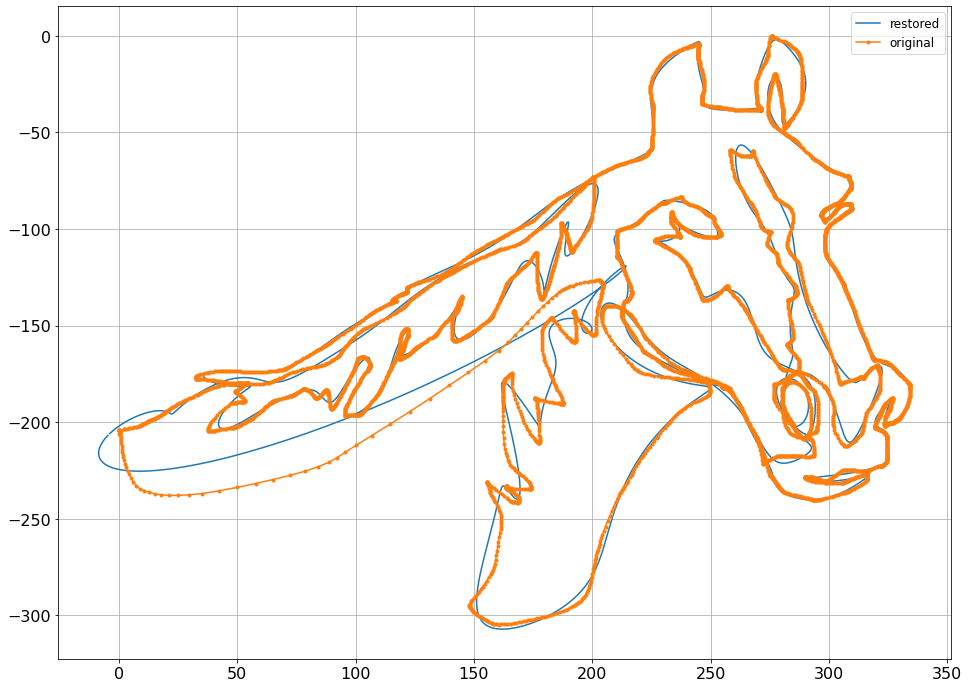

In [2756]:
plt.figure(figsize=(16,12))


x,y = restored.real, restored.imag #zip(*restored)
plt.plot(x, -y, label = 'restored', )
x1,y1 = path.real, path.imag #zip(*path)
plt.plot(x1,-y1 , label = 'original',  marker='.')

plt.grid()
plt.legend()

In [2759]:
from chromosome_segregation.simulation import  WL

In [2866]:
collect_s, sweep_number = WL(n=14, max_overlaps=42, min_overlaps=0, grain=1, exclude=(29,33,34,35,37,38,39,40,41), alpha=-1.0, sweep_length=1000, ds_min=0.0000001,
       flatness=0.3)

ds=5.000000e-02, ds_min=1.000000e-07, sweep number=25
array([61.9, 78.3, 75.8, 80.4, 79.7, 78.8, 79.5, 79.4, 79.3, 78.4, 78.7,
       78.1, 77.9, 77.6, 77.1, 75.9, 76.2, 75.8, 75.9, 75. , 73.8, 73.9,
       73.5, 66.4, 72.1, 74.1, 73.2, 69. , 68.8,  0. , 70.7, 64.9, 58.3,
        0. ,  0. ,  0. , 61.4,  0. ,  0. ,  0. ,  0. ,  0. , 60.2])
ds=2.500000e-02, ds_min=1.000000e-07, sweep number=180
array([301.85, 305.75, 306.55, 307.55, 307.6 , 307.4 , 307.4 , 306.5 ,
       306.6 , 306.55, 306.45, 305.6 , 305.3 , 305.45, 304.95, 303.75,
       303.6 , 303.95, 302.4 , 303.5 , 302.6 , 302.35, 301.1 , 300.3 ,
       300.8 , 300.9 , 299.35, 299.35, 297.9 ,   0.  , 296.95, 295.85,
       293.95,   0.  ,   0.  ,   0.  , 295.1 ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  , 254.8 ])
ds=1.250000e-02, ds_min=1.000000e-07, sweep number=240
array([346.45 , 350.075, 349.4  , 350.55 , 350.5  , 351.05 , 351.1  ,
       350.4  , 350.35 , 350.1  , 350.175, 349.4  , 349.175, 348.8  ,
       348.45 , 347.52

ds=6.103516e-06, ds_min=1.000000e-07, sweep number=2584
array([482.80388184, 484.29812012, 485.03939209, 485.28255615,
       485.37836914, 485.3717041 , 485.21143799, 484.92019043,
       484.84594727, 484.37584229, 484.30955811, 483.69033203,
       483.36820068, 483.38427734, 483.00848389, 482.03736572,
       481.9894043 , 482.02205811, 481.12723389, 481.24821777,
       480.22431641, 480.29257813, 479.73587647, 478.68135986,
       478.73300781, 479.19350586, 477.57775879, 477.48331299,
       476.93465576,   0.        , 475.63353272, 475.18270264,
       473.86923828,   0.        ,   0.        ,   0.        ,
       472.80349121,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 468.67255859])
ds=3.051758e-06, ds_min=1.000000e-07, sweep number=2738
array([482.83764038, 484.32875366, 485.06834107, 485.3098877 ,
       485.40517578, 485.40045776, 485.23876953, 484.94714356,
       484.87299805, 484.40292969, 484.33637085, 483.71815796,
       483.39550171

In [2863]:
from chromosome_segregation.overlaps import Overlap

overlaps = Overlap(10)
print(overlaps.get_overlaps_histogram())
print(overlaps.numbers_of_contact)
overlaps.save_overlaps_histogram()

overlaps = Overlap(12)
print(overlaps.get_overlaps_histogram())
print(overlaps.numbers_of_contact)
overlaps.save_overlaps_histogram()

overlaps = Overlap(14)
print(overlaps.get_overlaps_histogram())
print(overlaps.numbers_of_contact)
overlaps.save_overlaps_histogram()

self.dict is calculated. the length is 21
({4: 195150, 6: 66900, 7: 74040, 10: 8880, 8: 32550, 12: 6090, 16: 300, 14: 600, 20: 6, 5: 143040, 9: 24720, 13: 2400, 3: 191520, 2: 228360, 1: 142560, 0: 48240, 11: 7200}, {3: 19800, 1: 9600, 0: 4920, 2: 10080, 5: 1920, 4: 1920})
{3: 19800, 1: 9600, 0: 4920, 2: 10080, 5: 1920, 4: 1920}
self.dict is calculated. the length is 28
({5: 4485780, 7: 2387880, 8: 1857384, 11: 285120, 10: 967824, 9: 1035540, 13: 267408, 12: 443688, 17: 47304, 16: 84096, 14: 174690, 20: 3888, 25: 360, 22: 900, 21: 4200, 30: 6, 6: 2954088, 19: 14400, 4: 4843440, 3: 4837632, 2: 4512240, 1: 2506752, 0: 762096, 18: 18000, 15: 1440}, {4: 200952, 2: 156672, 1: 124704, 0: 57768, 5: 57888, 3: 134592, 6: 27936, 8: 1584})
{4: 200952, 2: 156672, 1: 124704, 0: 57768, 5: 57888, 3: 134592, 6: 27936, 8: 1584}
self.dict is calculated. the length is 36
({6: 103695186, 8: 70925820, 9: 45194688, 12: 16120776, 11: 22585920, 10: 41323002, 14: 11261922, 13: 16171176, 18: 1726662, 17: 4182864

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 20] [195150, 66900, 74040, 8880, 32550, 6090, 300, 600, 6, 143040, 24720, 2400, 191520, 228360, 142560, 48240, 7200]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 36, 42]


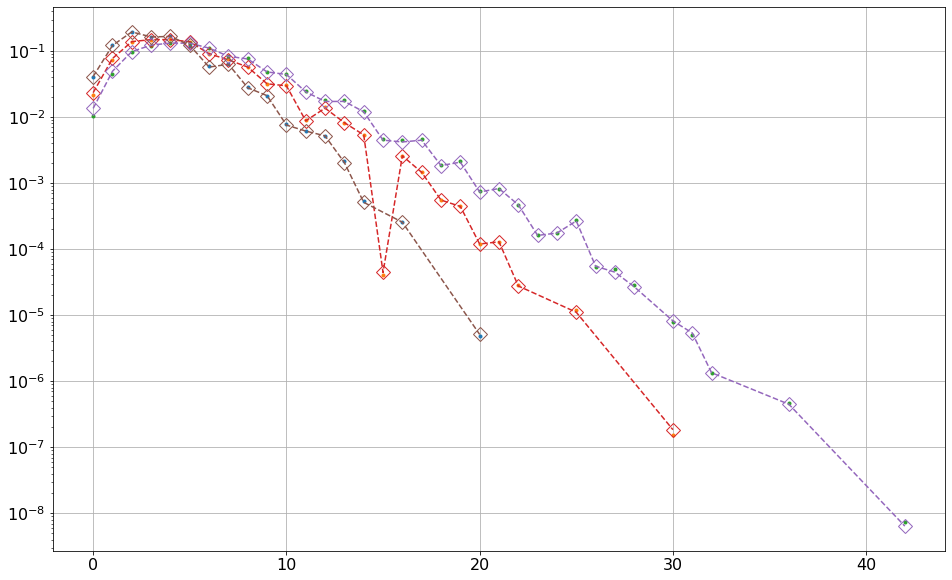

In [2867]:
s_overlaps_10 = np.array([153.54119778, 154.66218853, 155.09253731, 154.92125893,
       154.94812641, 154.62858143, 153.90504112, 153.98447113,
       153.18047676, 152.87758713, 151.90378056, 151.64901962,
       151.47616234, 150.5916296 , 149.22411671,   0.        ,
       148.47692375,   0.        ,   0.        ,   0.        ,
       144.49092464])

s_overlaps_10 = s_overlaps_10 - np.max(s_overlaps_10)
s_overlaps_10 = np.exp(s_overlaps_10)
s_overlaps_10 = np.where(s_overlaps_10 > 10**(-40), s_overlaps_10/np.sum(s_overlaps_10), 0.0)

s_overlaps_12 = np.array([672.76320133, 673.99529686, 674.64189949, 674.7136446 ,
       674.72089252, 674.63465805, 674.22435226, 674.020961  ,
       673.77244453, 673.17323914, 673.11626377, 671.92069283,
       672.34529057, 671.81002998, 671.39824181, 666.50508633,
       670.66414928, 670.08644409, 669.13185387, 668.89728336,
       667.58662071, 667.65392017, 666.15745182,   0.        ,
         0.        , 665.26891193,   0.        ,   0.        ,
         0.        ,   0.        , 660.91349506])

s_overlaps_12 = s_overlaps_12 - np.max(s_overlaps_12)
s_overlaps_12 = np.exp(s_overlaps_12)
s_overlaps_12 = np.where(s_overlaps_12 > 10**(-40), s_overlaps_12/np.sum(s_overlaps_12), 0.0)


s_overlaps_14 = np.array([482.86131554, 484.35039024, 485.09156818, 485.33290939,
       485.42869225, 485.42337399, 485.26167107, 484.97020588,
       484.89598503, 484.42656136, 484.35894356, 483.74111977,
       483.41827412, 483.43268414, 483.05828724, 482.08603439,
       482.03864079, 482.07263298, 481.17843323, 481.29826775,
       480.27479305, 480.34490795, 479.78651257, 478.73226585,
       478.7812542 , 479.24353104, 477.63021641, 477.52879295,
       476.98046646,   0.        , 475.68751431, 475.23823605,
       473.91541634,   0.        ,   0.        ,   0.        ,
       472.85752029,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 468.71527729])

s_overlaps_14 = s_overlaps_14 - np.max(s_overlaps_14)
s_overlaps_14 = np.exp(s_overlaps_14)
s_overlaps_14 = np.where(s_overlaps_14 > 10**(-40), s_overlaps_14/np.sum(s_overlaps_14), 0.0)





omega_overlap_10 = {4: 195150, 6: 66900, 7: 74040, 10: 8880, 8: 32550, 12: 6090, 16: 300, 14: 600, 20: 6, 5: 143040, 9: 24720, 13: 2400, 3: 191520, 2: 228360, 1: 142560, 0: 48240, 11: 7200}
print(sorted(omega_overlap_10.keys()), list(omega_overlap_10.values()))
omega_overlap_10_keys = sorted(omega_overlap_10.keys())
omega_overlap_10_vals = [omega_overlap_10[k]/np.sum(list(omega_overlap_10.values())) for k in omega_overlap_10_keys]


omega_overlap_12 = {5: 4485780, 7: 2387880, 8: 1857384, 11: 285120, 10: 967824, 9: 1035540, 13: 267408, 12: 443688, 17: 47304, 16: 84096, 14: 174690, 20: 3888, 25: 360, 22: 900, 21: 4200, 30: 6, 6: 2954088, 19: 14400, 4: 4843440, 3: 4837632, 2: 4512240, 1: 2506752, 0: 762096, 18: 18000, 15: 1440}
omega_overlap_12_keys = sorted(omega_overlap_12.keys())
omega_overlap_12_vals = [omega_overlap_12[k]/np.sum(list(omega_overlap_12.values())) for k in omega_overlap_12_keys]


omega_overlap_14 = {6: 103695186, 8: 70925820, 9: 45194688, 12: 16120776, 11: 22585920, 10: 41323002, 14: 11261922, 13: 16171176, 18: 1726662, 17: 4182864, 15: 4186392, 16: 3931872, 21: 775152, 19: 1944096, 26: 51660, 24: 164220, 20: 687876, 22: 439488, 30: 7686, 36: 420, 32: 1260, 42: 6, 7: 78038688, 25: 249984, 31: 5040, 28: 25200, 27: 42000, 5: 122961216, 4: 123562320, 3: 115097136, 2: 91887432, 1: 46297440, 0: 12673920, 23: 151200}
omega_overlap_14_keys = sorted(omega_overlap_14.keys())
print(omega_overlap_14_keys)
omega_overlap_14_vals = [omega_overlap_14[k]/np.sum(list(omega_overlap_14.values())) for k in omega_overlap_14_keys]


plt.figure(figsize=(16,10))
plt.plot(s_overlaps_10, marker='.', linestyle='none')
plt.plot(s_overlaps_12, marker='.', linestyle='none')
plt.plot(s_overlaps_14, marker='.', linestyle='none')


plt.plot(omega_overlap_12_keys, omega_overlap_12_vals, marker='D', markerfacecolor='None', markersize=10,linestyle='dashed')
plt.plot(omega_overlap_14_keys, omega_overlap_14_vals, marker='D', markerfacecolor='None', markersize=10,linestyle='dashed')

plt.plot(omega_overlap_10_keys, omega_overlap_10_vals, marker='D', markerfacecolor='None', markersize=10, linestyle='dashed')
plt.yscale('log')
plt.grid()



In [3177]:
contacts_14 = {5: 2181144, 3: 2385936, 2: 2241288, 1: 1663200, 0: 724416, 6: 1044624, 4: 1912176, 7: 400176, 9: 44352, 8: 76608}
contacts_14_keys  = sorted(contacts_14.keys())
contacts_14_vals  = [contacts_14[el] for el in contacts_14_keys]
contacts_14_vals = [el/sum(contacts_14_vals) for el in contacts_14_vals]

slurm_37517256 = np.array([39.33981, 40.43968, 40.97892, 41.28417, 41.2637 , 41.51716,
       41.02995, 40.17377, 38.79545, 38.38114])
slurm_37517256_prob = [2.8345661624308075e-08, 4.3074555354548094e-08, 6.002385094986634e-08, 7.740204403414634e-08, 9.727819957821569e-08, 1.1456515171255399e-07, 1.4747779018610346e-07, 1.580755022748849e-07, 2.2664060350796882e-07, 2.3099597017246261e-07]

slurm_37517271 = np.array([36.38892, 37.72718, 38.39377, 38.89086, 39.03547, 39.53748,
       39.23808, 38.51662, 37.36868, 36.98366])

slurm_37517271_prob = [1.2545633457737902e-08, 2.096681339627147e-08, 3.277267161837829e-08, 5.0841916546155336e-08, 7.545622250024337e-08, 1.2497201171630032e-07, 1.933138268711458e-07, 2.3948197064693097e-07, 4.313821794839143e-07, 4.506720967425412e-07]

slurm_37517386 = np.array([82.44745, 83.70155, 84.40299, 84.8541 , 84.97574, 85.53564,
       85.21255, 84.50842, 83.34169, 82.92496])

slurm_37517386_prob = [1.249541527000307e-08, 2.08366433336259e-08, 3.294184759791615e-08, 5.1005012466648625e-08, 7.589301779514715e-08, 1.2559883525427746e-07, 1.91544643576728e-07, 2.3838377195325857e-07, 4.281507810082184e-07, 4.522924580742373e-07]

slurm_37518344 = np.array([86.74525, 87.52526, 87.81262, 87.88111, 87.6792 , 87.79613,
       87.09554, 86.12036, 84.45024, 83.87858])
slurm_37518344 = slurm_37518344 - np.min(slurm_37518344)
slurm_37518344 = np.exp(slurm_37518344)
slurm_37518344 = slurm_37518344/np.sum(slurm_37518344)



S_slurm_37517256 , probs_slurm_37517256, realS_slurm_37517256  = prepare_to_plot(slurm_37517256, slurm_37517256_prob)
S_slurm_37517271 , probs_slurm_37517271, realS_slurm_37517271  = prepare_to_plot(slurm_37517271, slurm_37517271_prob)
S_slurm_37517386 , probs_slurm_37517386, realS_slurm_37517386  = prepare_to_plot(slurm_37517386, slurm_37517386_prob)




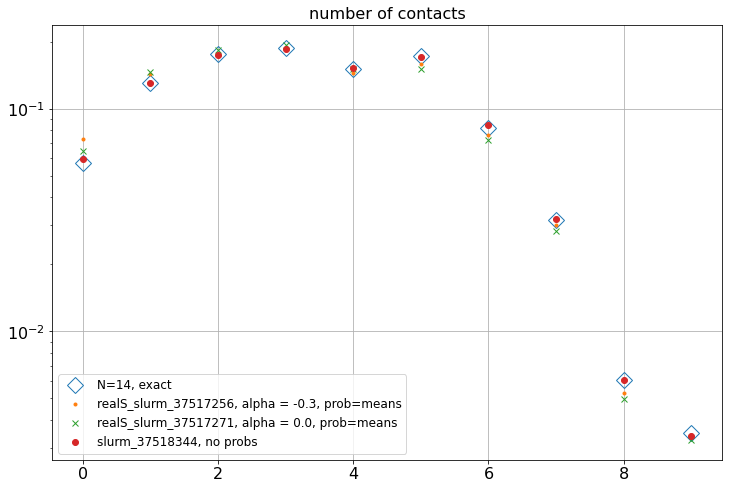

In [3179]:
plt.figure(figsize= (12,8))
plt.plot(contacts_14_keys, contacts_14_vals, marker = 'D', linestyle='none', markersize=12, markerfacecolor='none', label='N=14, exact')
plt.plot(realS_slurm_37517256, label ='realS_slurm_37517256, alpha = -0.3, prob=means', marker = '.', linestyle='none')
plt.plot(realS_slurm_37517271, label ='realS_slurm_37517271, alpha = 0.0, prob=means', marker = 'x', linestyle='none')
# plt.plot(realS_slurm_37517271, label ='realS_slurm_37517271, alpha = 0.0, prob=means, flatness=0.1', marker = 'o', linestyle='none', markersize=10, markerfacecolor='none')
plt.plot(slurm_37518344, label ='slurm_37518344, no probs', marker = 'o', linestyle='none')

plt.grid()
plt.title('number of contacts')
plt.legend()
plt.yscale('log')


In [1058]:
visits_tot = [6, 76, 339, 1201, 3509, 8463, 17786, 33373, 57305, 92399, 139198, 199747, 271480, 355278, 447410, 547847, 650899, 754273, 849217, 940867, 1023154, 1088575, 1140182, 1174034, 1194630, 1201281, 1187473, 1159545, 1119717, 1067021, 1005212, 937551, 863829, 786607, 708172, 630485, 556272, 483846, 416761, 354258, 296140, 245457, 200157, 160450, 127759, 98690, 75861, 57288, 42049, 30443, 21193, 14489, 9873, 6135, 3974, 2301, 1362, 747, 400, 179]

probs =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.251579640212661e-06, 4.685943388180739e-06, 5.968890144566519e-06, 6.399651858938874e-06, 1.5049274798600187e-05, 4.7037465977292346e-05, 6.636805747756195e-05, 0.00010785347787814144, 0.00016179135387004917, 0.00018807637140743128, 0.0003719157982632732, 0.0005081042629947665, 0.000857702438036064, 0.0011570254667823692, 0.0015537802824782546, 0.002206294795886569, 0.00313872212525145, 0.004701590840004053, 0.006274633869840893, 0.008692919983242564, 0.01184332564389165, 0.015931412804257136, 0.021941207002312085, 0.02995375802332804, 0.04091967993517674, 0.05525672371638142, 0.07674886763965777, 0.08822251195132551, 0.13729809104258445, 0.1566265060240964, 0.2325, 0.27932960893854747]


in_cell = np.array(visits_tot) * np.array(probs)
list(zip(in_cell, visits_tot))


[(0.0, 6),
 (0.0, 76),
 (0.0, 339),
 (0.0, 1201),
 (0.0, 3509),
 (0.0, 8463),
 (0.0, 17786),
 (0.0, 33373),
 (0.0, 57305),
 (0.0, 92399),
 (0.0, 139198),
 (0.0, 199747),
 (0.0, 271480),
 (0.0, 355278),
 (0.0, 447410),
 (0.0, 547847),
 (0.0, 650899),
 (0.0, 754273),
 (0.0, 849217),
 (0.0, 940867),
 (0.0, 1023154),
 (0.0, 1088575),
 (0.0, 1140182),
 (0.0, 1174034),
 (0.0, 1194630),
 (0.0, 1201281),
 (0.0, 1187473),
 (0.0, 1159545),
 (7.0, 1119717),
 (5.0, 1067021),
 (6.0, 1005212),
 (6.0, 937551),
 (13.0, 863829),
 (37.0, 786607),
 (47.0, 708172),
 (68.0, 630485),
 (90.0, 556272),
 (91.0, 483846),
 (155.0, 416761),
 (179.99999999999997, 354258),
 (254.0, 296140),
 (284.0, 245457),
 (311.0, 200157),
 (354.0, 160450),
 (401.0, 127759),
 (463.99999999999994, 98690),
 (475.99999999999994, 75861),
 (498.0, 57288),
 (498.0, 42049),
 (485.0, 30443),
 (465.0, 21193),
 (434.0, 14489),
 (404.0, 9873),
 (339.0, 6135),
 (305.0, 3974),
 (203.0, 2301),
 (187.00000000000003, 1362),
 (117.0, 747),
 (93.

In [1073]:
visits = [3688., 3300. ,3608., 3342., 3655., 3665., 3654., 3704., 3698. ,3727. ,3734., 3736.,
 3732., 3726. ,3736., 3744., 3735., 3740., 3742., 3749., 3749., 3748., 3748. ,3754.,
 3755. ,3748. ,3750., 3746., 3743., 3743., 3737., 3744., 3742., 3735., 3735., 3737.,
 3735., 3693., 3701.]

mean = np.sum(visits)/len(visits)
print(mean, max(visits), min(visits), max(visits) / mean,  min(visits) / mean)
(max(visits) / mean - 1 < 0.1) & (1 - min(visits) / mean < 0.1), max(visits) / mean - 1, 1 - min(visits) / mean



3704.051282051282 3755.0 3300.0 1.013754863005164 0.8909163909233133


(False, 0.013754863005164042, 0.10908360907668668)

In [1012]:
conf = np.array([[ 0,  0, -1],
       [ 1,  0, -1],
       [ 1,  1, -1],
       [ 1,  1, -2],
       [ 1,  1, -3],
       [ 1,  0, -3],
       [ 2,  0, -3],
       [ 2,  1, -3],
       [ 2,  2, -3],
       [ 3,  2, -3],
       [ 4,  2, -3],
       [ 4,  3, -3],
       [ 3,  3, -3],
       [ 2,  3, -3],
       [ 1,  3, -3],
       [ 1,  4, -3],
       [ 2,  4, -3],
       [ 3,  4, -3],
       [ 3,  4, -2],
       [ 3,  4, -1],
       [ 3,  4,  0],
       [ 3,  4,  1],
       [ 3,  3,  1],
       [ 2,  3,  1],
       [ 2,  4,  1],
       [ 2,  4,  0],
       [ 2,  4, -1],
       [ 2,  3, -1],
       [ 2,  3, -2],
       [ 1,  3, -2],
       [ 1,  3, -1],
       [ 0,  3, -1],
       [ 0,  2, -1],
       [ 1,  2, -1],
       [ 2,  2, -1],
       [ 2,  1, -1],
       [ 3,  1, -1],
       [ 3,  1, -2],
       [ 4,  1, -2],
       [ 4,  2, -2],
       [ 3,  2, -2],
       [ 3,  2, -1],
       [ 3,  3, -1],
       [ 4,  3, -1],
       [ 4,  3,  0],
       [ 4,  2,  0],
       [ 4,  1,  0],
       [ 4,  1,  1],
       [ 3,  1,  1],
       [ 3,  0,  1],
       [ 3,  0,  0],
       [ 3,  1,  0],
       [ 2,  1,  0],
       [ 2,  2,  0],
       [ 1,  2,  0],
       [ 1,  2,  1],
       [ 1,  1,  1],
       [ 0,  1,  1],
       [ 0,  0,  1],
       [ 0,  0,  0]])

In [1015]:
import ipyvolume as ipv

data1 = conf.astype('float')

x1 = data1[:,0] #np.array([el[0] for el in sv[:]], dtype='float')
y1 = data1[:,1]# np.array([el[1] for el in sv], dtype='float')
z1 = data1[:,2]# np.array([el[2] for el in sv], dtype='float')
# x2 = data2[:,0] #np.array([el[0] for el in sv[:]], dtype='float')
# y2 = data2[:,1]# np.array([el[1] for el in sv], dtype='float')
# z2 = data2[:,2]# np.array([el[2] for el in sv], dtype='float')

ipv.figure()

ipv.plot(x1,y1,z1, color='red')
ipv.scatter(x1,y1,z1, size=3, marker="sphere",color='red')
# ipv.plot(x2,y2,z2, color='blue')
# ipv.scatter(x2,y2,z2, size=5, marker="sphere", color='blue')

ipv.show()

In [1063]:
[[1,2]] +[4,5]

[[1, 2], 4, 5]

In [819]:
def is_in_box(coords, limits):
    """
    checking if the configuration fits inside the box
    limits is a sorted list
    """
    
    dx = np.max(coords[:, 0]) - np.min(coords[:, 0])
    dy = np.max(coords[:, 1]) - np.min(coords[:, 1])
    dz = np.max(coords[:, 2]) - np.min(coords[:, 2])
    
    dx, dy, dz = sorted((dx, dy, dz))
    
    if (dx <= limits[0]) & (dy <=limits[1]) & (dz <= limits[2]):
        return True
    else:
        return False
    
    
    

coords = np.array((0,0,0,1,0,0,2,0,0,3,0,0)).reshape(4,3)
limits = (1,1,4)
assert is_in_box(coords, limits)  == True
# u, c = np.unique(coords, axis=0, return_counts=True)
# u.shape == coords.shape

True

In [827]:
[el for el in [True, True,  True, False]  if el == True]

[True, True, True]

36 60


(0.0003342369845239708, 0.0008885103732401893)

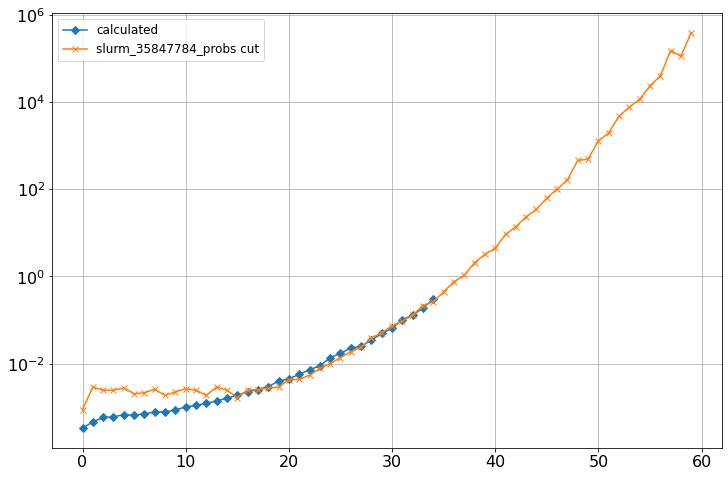

In [669]:
slurm_35756946 = np.array([717.72318, 719.81056, 721.10706, 722.09555, 722.8587 , 723.45015,
       723.94048, 724.3198 , 724.63457, 724.89342, 725.08986, 725.24804,
       725.36902, 725.45757, 725.52589, 725.56404, 725.59266, 725.60403,
       725.60102, 725.58781, 725.56633, 725.53568, 725.50357, 725.46138,
       725.41764, 725.37175, 725.32003, 725.26732, 725.21385, 725.15768,
       725.09906, 725.0285 , 724.97   , 724.89261, 724.82825, 724.747  ,
       724.67161, 724.58158, 724.4928 , 724.40842, 724.30201, 724.20276,
       724.09168, 723.97059, 723.82932, 723.70524, 723.56192, 723.38712,
       723.22025, 723.03095, 722.83035, 722.60915, 722.35642, 722.06372,
       721.75253, 721.45853, 721.07013, 720.68159, 720.21401, 720.52074])


slurm_35847784_probs =   [-37.227054881936176, -36.71397772738537, -36.78528845676045, -36.78583941500478, -36.733230572395044, -36.8682918340218, -36.84112389531998, -36.764381427370125, -36.90419471814535, -36.82264887830754, -36.74962995196036, -36.78775065230167, -36.90336306823655, -36.70840515922054, -36.78478528301687, -36.953525500031944, -36.778663186571876, -36.77359598115045, -36.734282031688714, -36.711564014383264, -36.542610661478584, -36.53602203432247, -36.44048120040673, -36.28409583562404, -36.173135075279056, -36.03507605829431, -35.90287745505619, -35.799941714214285, -35.58643131209892, -35.46506173417648, -35.30916031232573, -35.20116867713574, -35.062245753262665, -34.8455083062713, -34.756058505256405, -34.52771880483776, -34.29701344738379, -34.149144710192274, -33.857876315683974, -33.67137727957244, -33.52729656762165, -33.2144644464747, -33.03623194171938, -32.80643355379908, -32.63560399196407, -32.378097707292376, -32.17605315947367, -31.965668171602697, -31.516285357751716, -31.487376936517855, -31.06635398082204, -30.88386858143797, -30.50450415790913, -30.294946333272414, -30.115648380300943, -29.8068011027395, -29.58129560571156, -28.997197786873848, -29.12523572324392, -28.587947567859736]

slurm_35847784_probs = np.power(10,slurm_35847784_probs)

plt.figure(figsize=(12,8))
print(len(realS_slurm_35759531), len(S_slurm_35756946))
probs = S_slurm_35756946[:len(realS_slurm_35759531)-1]/realS_slurm_35759531[:-1]
probs = probs/np.sum(probs)
plt.plot(probs, marker='D', label='calculated')
# plt.plot(probs_slurm_35756946, label='probs_slurm_35756946')

# slurm_35847784_probs = slurm_35847784_probs[:len(realS_slurm_35759531)-1]
slurm_35847784_probs = slurm_35847784_probs/np.nansum(slurm_35847784_probs[:len(realS_slurm_35759531)-1])
plt.plot(slurm_35847784_probs, label='slurm_35847784_probs cut', marker='x')


# plt.plot([fun_square(x, *params) for x in range(60)], color = 'black', linestyle='dashed')
plt.legend()
plt.yscale('log')
plt.grid()
probs[0], slurm_35847784_probs[0]

In [667]:
from scipy.optimize import curve_fit

def fun_square(x, a, b, c, d, e):
    return 10**(a*x*x  +b*x +c ) +e
#      return (a*np.cosh(x*b)) +e #10**(c*x*x  +d) +e
#      return a*10**(b*x) + c*10**(-d*x) +e




# params, covariance = curve_fit(fun_square, list(range(len(probs))) , probs, p0 = (0.1,0.1 ,0.1, 0.1))
params, covariance = curve_fit(fun_square, list(range(len(probs))) , probs, p0 = (.0, .0,.0, 0.0 ,0.))

print(*params, )

0.0032864522053468875 -0.048459408474392174 -2.6832718200556123 0.0 -8.962566888385074e-05


In [356]:
slurm_35597482 = np.array([1508.83281, 1516.38398, 1517.2668 , 1518.33984, 1519.21445,
       1519.80156, 1520.2457 , 1520.61758, 1520.92305, 1521.17148,
       1521.31016, 1521.43438, 1521.53164, 1521.54102, 1521.58086,
       1521.51328, 1521.48594, 1521.3707 , 1521.29609, 1521.11641,
       1520.9207 , 1520.68398, 1520.45586, 1520.21016, 1519.89961,
       1519.59453, 1519.26211, 1518.92773, 1518.53594, 1518.21211,
       1517.72188, 1517.33906, 1516.91484, 1516.41055, 1515.96563,
       1515.51328, 1514.98633, 1514.43672, 1513.88164, 1513.3332 ,
       1512.76602, 1512.15234, 1511.55703, 1510.93867, 1510.27461,
       1509.60313, 1508.89453, 1508.08086, 1507.38633, 1506.53281,
       1505.91406, 1505.06914, 1504.13203, 1503.19922, 1502.33672,
       1501.32773, 1500.40195, 1499.22188, 1498.5543 , 1497.41719])

slurm_35597482 = slurm_35597482 - np.max(slurm_35597482)
slurm_35597482 = np.exp(slurm_35597482)
slurm_35597482 = slurm_35597482/np.sum(slurm_35597482)

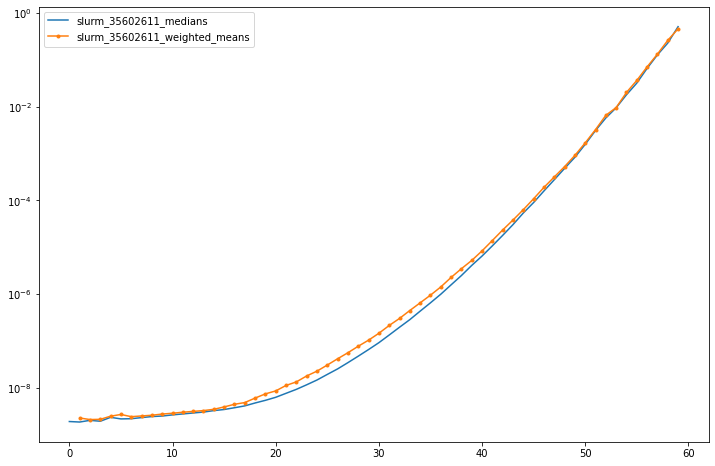

In [276]:
slurm_35602611_medians =  np.array(
    [1.0550799186427328e-37, 1.0291571437449404e-37, 1.118576546733914e-37, 1.0699644273851586e-37, 1.296938124919902e-37, 1.1996670386947449e-37, 1.2120746163069218e-37, 1.279199207518009e-37, 1.3464723199859118e-37, 1.3816995093288993e-37, 1.4619525096929033e-37, 1.532100194907087e-37, 1.6052704302924417e-37, 1.6801894103721912e-37, 1.8033589151527236e-37, 1.9035578441154694e-37, 2.0758936145557425e-37, 2.273935214931316e-37, 2.622846991288276e-37, 2.988355937395983e-37, 3.4677580144048724e-37, 4.216658611263052e-37, 5.122117276826213e-37, 6.409286171592924e-37, 8.107433557869604e-37, 1.0674018141826091e-36, 1.3988874516811204e-36, 1.904125471003975e-36, 2.6158727455092784e-36, 3.6218693122307885e-36, 5.072450478434094e-36, 7.394023626392909e-36, 1.0833562016617686e-35, 1.5752446328931254e-35, 2.3881682183817723e-35, 3.5946789623696745e-35, 5.486620922357329e-35, 8.698078381485885e-35, 1.3737400148867355e-34, 2.2582163058402853e-34, 3.578688995390766e-34, 5.911254716992112e-34, 9.884880050766535e-34, 1.67732794085303e-33, 2.9672564965600173e-33, 4.963767313667924e-33, 8.759955728187566e-33, 1.520060882823238e-32, 2.653922157097715e-32, 4.5821644990833255e-32, 8.651552135276869e-32, 1.709349572270708e-31, 3.1637256171542812e-31, 5.2263253824316836e-31, 9.892332635954522e-31, 1.7541870559484964e-30, 3.6211379761463786e-30, 7.025436713034121e-30, 1.2517135623622705e-29, 2.8001854726526214e-29]
    
)
slurm_35602611_weighted_means = np.array(
    [nan, 5.10163003182196e-38, 4.725217858413709e-38, 4.775075079438403e-38, 5.571892357783078e-38, 6.062548060355664e-38, 5.443438470151642e-38, 5.638478946510947e-38, 5.839632273104476e-38, 6.186102648189956e-38, 6.441694781408831e-38, 6.769205364100662e-38, 7.051297815234688e-38, 7.339988632419322e-38, 7.810568695124137e-38, 8.780721434464242e-38, 9.997845636751814e-38, 1.0872336663676842e-37, 1.355104056634738e-37, 1.6676593570516701e-37, 1.927346644103093e-37, 2.5221075903584447e-37, 3.002956050755971e-37, 4.018221703892555e-37, 5.093562039167044e-37, 6.871291366432681e-37, 9.35706230206482e-37, 1.2585396015143984e-36, 1.7310547742931207e-36, 2.334288663709123e-36, 3.2707056982351806e-36, 4.802213844545923e-36, 6.781851620690658e-36, 1.0015940960916781e-35, 1.4599896383553032e-35, 2.1272279976996994e-35, 3.185731655862666e-35, 5.087101447372462e-35, 7.809971534924757e-35, 1.171552328670885e-34, 1.872516842448595e-34, 3.1202569270459384e-34, 5.232548641154089e-34, 8.534888784452877e-34, 1.4192824400971533e-33, 2.429011626369775e-33, 4.2423560829741794e-33, 7.077186693419723e-33, 1.1760661043121877e-32, 2.0438103086669553e-32, 3.7806299317107166e-32, 7.246843598046841e-32, 1.464135279398063e-31, 2.1431088115459262e-31, 4.500704751688354e-31, 8.129241959196292e-31, 1.583733999775554e-30, 2.9570615275836265e-30, 5.815871899779704e-30, 1.0252067619258093e-29]
    
)
# slurm_35602611_weighted_means = np.power(10, slurm_35602611_weighted_means)

slurm_35602611_medians = slurm_35602611_medians/np.sum(slurm_35602611_medians)
slurm_35602611_weighted_means = slurm_35602611_weighted_means/np.nansum(slurm_35602611_weighted_means)


plt.figure(figsize=(12,8))
plt.plot(slurm_35602611_medians, label='slurm_35602611_medians')
plt.plot(slurm_35602611_weighted_means, label='slurm_35602611_weighted_means', marker = '.')
plt.legend()
plt.yscale('log')




100 100
lambda=0 8.230523978641676e-39 8.035976360509952e-39
lambda = uniform 1.0526594878780515e-37 9.774410974272459e-39
5.22965e-39
lambda=0, cm [7.29996e-39 7.47248e-39 7.64501e-39]
lambda=uniform, cm [6.39366e-38 6.79305e-38]


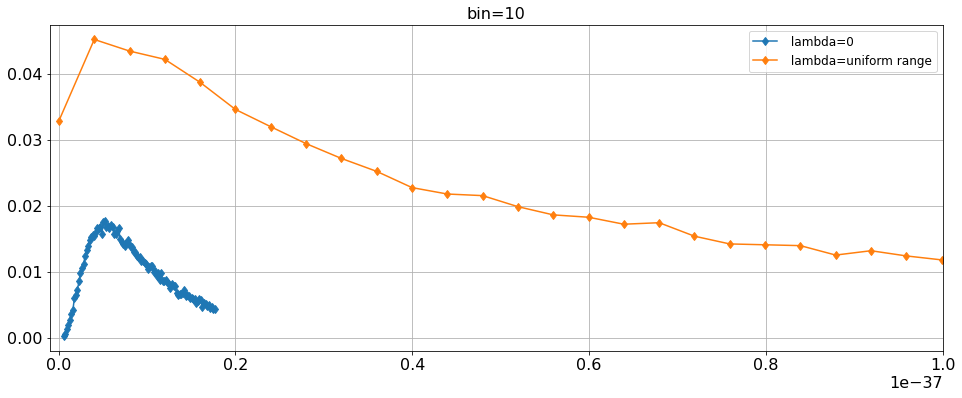

In [763]:



vals = np.array([  16,   33,   78,  116,  159,  220,  252,  361,  389,  441,  515,
        593,  636,  672,  744,  799,  842,  898,  921,  942,  935,  967,
       1008, 1007, 1013,  950, 1057, 1070, 1010, 1022, 1002, 1035, 1015,
        945,  953,  972, 1008,  900,  874,  853,  842,  870,  890,  856,
        833,  829,  781,  781,  752,  735,  741,  698,  703,  680,  670,
        630,  643,  653,  657,  603,  606,  563,  590,  532,  592,  518,
        515,  526,  513,  487,  453,  491,  476,  476,  407,  392,  404,
        404,  409,  436,  381,  391,  384,  366,  362,  355,  352,  322,
        340,  358,  343,  284,  321,  313,  287,  298,  271,  284,  264,
        262])

bins = np.array([5.71468e-40, 7.43994e-40, 9.16519e-40, 1.08904e-39, 1.26157e-39,
       1.43409e-39, 1.60662e-39, 1.77915e-39, 1.95167e-39, 2.12420e-39,
       2.29672e-39, 2.46925e-39, 2.64177e-39, 2.81430e-39, 2.98682e-39,
       3.15935e-39, 3.33187e-39, 3.50440e-39, 3.67692e-39, 3.84945e-39,
       4.02198e-39, 4.19450e-39, 4.36703e-39, 4.53955e-39, 4.71208e-39,
       4.88460e-39, 5.05713e-39, 5.22965e-39, 5.40218e-39, 5.57470e-39,
       5.74723e-39, 5.91975e-39, 6.09228e-39, 6.26480e-39, 6.43733e-39,
       6.60986e-39, 6.78238e-39, 6.95491e-39, 7.12743e-39, 7.29996e-39,
       7.47248e-39, 7.64501e-39, 7.81753e-39, 7.99006e-39, 8.16258e-39,
       8.33511e-39, 8.50763e-39, 8.68016e-39, 8.85268e-39, 9.02521e-39,
       9.19774e-39, 9.37026e-39, 9.54279e-39, 9.71531e-39, 9.88784e-39,
       1.00604e-38, 1.02329e-38, 1.04054e-38, 1.05779e-38, 1.07505e-38,
       1.09230e-38, 1.10955e-38, 1.12680e-38, 1.14406e-38, 1.16131e-38,
       1.17856e-38, 1.19581e-38, 1.21307e-38, 1.23032e-38, 1.24757e-38,
       1.26482e-38, 1.28208e-38, 1.29933e-38, 1.31658e-38, 1.33383e-38,
       1.35109e-38, 1.36834e-38, 1.38559e-38, 1.40284e-38, 1.42010e-38,
       1.43735e-38, 1.45460e-38, 1.47185e-38, 1.48911e-38, 1.50636e-38,
       1.52361e-38, 1.54086e-38, 1.55812e-38, 1.57537e-38, 1.59262e-38,
       1.60987e-38, 1.62713e-38, 1.64438e-38, 1.66163e-38, 1.67889e-38,
       1.69614e-38, 1.71339e-38, 1.73064e-38, 1.74790e-38, 1.76515e-38,
       1.78240e-38])

# bins = (bins[:-1]+bins[1:])/2
# bins = np.power(10, bins[:-1])
bins =  bins[:-1]

print(len(bins), len(vals))
vals = vals/np.sum(vals)
# vals = vals - np.max(vals)

vals1 = np.array([2300, 3161, 3038, 2950, 2706, 2419, 2236,
 2057, 1900, 1763, 1591,
       1523, 1506, 1389, 1302, 1277, 1203, 1219, 1076,  994,  985,  976,
        876,  922,  867,  825,  753,  776,  708,  712,  694,  709,  610,
        642,  625,  599,  556,  545,  564,  547,  521,  492,  463,  444,
        430,  470,  444,  442,  373,  429,  415,  409,  392,  349,  361,
        345,  373,  374,  360,  330,  331,  296,  294,  332,  312,  296,
        337,  315,  278,  259,  274,  281,  265,  258,  247,  261,  229,
        247,  261,  225,  225,  231,  234,  235,  224,  197,  225,  223,
        191,  176,  201,  188,  220,  208,  192,  181,  183,  172,  165,
        178])

bins1 = np.array([3.44523e-41, 4.02834e-39, 8.02222e-39, 1.20161e-38, 1.60100e-38,
       2.00039e-38, 2.39978e-38, 2.79917e-38, 3.19855e-38, 3.59794e-38,
       3.99733e-38, 4.39672e-38, 4.79611e-38, 5.19550e-38, 5.59489e-38,
       5.99427e-38, 6.39366e-38, 6.79305e-38, 7.19244e-38, 7.59183e-38,
       7.99122e-38, 8.39061e-38, 8.78999e-38, 9.18938e-38, 9.58877e-38,
       9.98816e-38, 1.03875e-37, 1.07869e-37, 1.11863e-37, 1.15857e-37,
       1.19851e-37, 1.23845e-37, 1.27839e-37, 1.31833e-37, 1.35827e-37,
       1.39820e-37, 1.43814e-37, 1.47808e-37, 1.51802e-37, 1.55796e-37,
       1.59790e-37, 1.63784e-37, 1.67778e-37, 1.71772e-37, 1.75765e-37,
       1.79759e-37, 1.83753e-37, 1.87747e-37, 1.91741e-37, 1.95735e-37,
       1.99729e-37, 2.03723e-37, 2.07717e-37, 2.11710e-37, 2.15704e-37,
       2.19698e-37, 2.23692e-37, 2.27686e-37, 2.31680e-37, 2.35674e-37,
       2.39668e-37, 2.43661e-37, 2.47655e-37, 2.51649e-37, 2.55643e-37,
       2.59637e-37, 2.63631e-37, 2.67625e-37, 2.71619e-37, 2.75613e-37,
       2.79606e-37, 2.83600e-37, 2.87594e-37, 2.91588e-37, 2.95582e-37,
       2.99576e-37, 3.03570e-37, 3.07564e-37, 3.11558e-37, 3.15551e-37,
       3.19545e-37, 3.23539e-37, 3.27533e-37, 3.31527e-37, 3.35521e-37,
       3.39515e-37, 3.43509e-37, 3.47503e-37, 3.51496e-37, 3.55490e-37,
       3.59484e-37, 3.63478e-37, 3.67472e-37, 3.71466e-37, 3.75460e-37,
       3.79454e-37, 3.83447e-37, 3.87441e-37, 3.91435e-37, 3.95429e-37,
       3.99423e-37])

bins1 =  bins1[:-1]

# print(len(bins), len(vals))
vals1 = vals1/np.sum(vals1)
# vals1 = vals1 - np.max(vals1)

# medians = [1.2446098969358665e-37, 5.727603910500539e-38, 5.491290816327358e-38, 6.425726621448188e-38, 5.937788759752054e-38, 6.400706505377386e-38, 6.648024572702201e-38, 7.556785896501336e-38, 7.95598308992765e-38, 8.800401209146561e-38, 9.47358783019639e-38, 1.0464878080283148e-37, 1.1344346260512008e-37, 1.2503852043122228e-37, 1.368227271648321e-37, 1.5399960586669634e-37, 1.776647173049167e-37, 1.9810732165839353e-37, 2.3230860697996844e-37, 2.7138693870202335e-37, 3.2550253314987775e-37, 3.980502909432392e-37, 4.953000894453734e-37, 6.306632635697856e-37, 8.102482372588907e-37, 1.068787998168024e-36, 1.4034415257039861e-36, 1.895868533549649e-36, 2.5871409943593056e-36, 3.586465267852493e-36, 5.128704087569236e-36, 7.32407365233341e-36, 1.0420473676326346e-35, 1.5416900775762815e-35, 2.3154046867875586e-35, 3.4105427926851127e-35, 5.190305729022009e-35, 8.121941887534446e-35, 1.2765667229009532e-34, 1.992816593705937e-34, 3.303186851183909e-34, 5.194445111522092e-34, 8.284992890940198e-34, 1.4516181022676e-33, 2.359653668088071e-33, 3.818826776560538e-33, 6.893458350282954e-33, 1.1520326462446249e-32, 1.947028450324887e-32, 3.673927218081399e-32, 6.499516185634401e-32, 1.0502867334694018e-31, 1.9575419469951268e-31, 3.429821493689513e-31, 7.221678166202721e-31, 1.3838998520378807e-30, 2.3903016946910147e-30, 4.7249821473472386e-30, 8.634935380988761e-30, 1.1860328235919552e-29]

# print(medians[20])
# means = [1.003539552121795e-37, 4.85639403867226e-38, 4.060061928330815e-38, 5.074105897025962e-38, 4.635532781685325e-38, 4.879216684389289e-38, 5.200788949148908e-38, 5.791183258125954e-38, 6.079847974002865e-38, 6.72457344820894e-38, 7.235373413949987e-38, 7.952679960682997e-38, 8.620003195701519e-38, 9.574479154976197e-38, 1.0511785505226931e-37, 1.1910006366323138e-37, 1.3784503984488074e-37, 1.546471436965433e-37, 1.8432755829586703e-37, 2.1720386546931147e-37, 2.649598428858603e-37, 3.2634482187874963e-37, 4.097084794485662e-37, 5.265251900632587e-37, 6.763890922951145e-37, 8.96908988487173e-37, 1.1859640183814944e-36, 1.6109486747657517e-36, 2.1965645244126987e-36, 3.0502644148306474e-36, 4.34674723578953e-36, 6.165486038111007e-36, 8.714373699911495e-36, 1.2988155818087828e-35, 1.922933319281076e-35, 2.8300119940024517e-35, 4.25203887701944e-35, 6.604982145552097e-35, 1.0321441022302986e-34, 1.6184280952251528e-34, 2.665581639560049e-34, 4.08926497371843e-34, 6.5599439395035145e-34, 1.1321324224882602e-33, 1.8549026965794427e-33, 2.9672986282318777e-33, 5.3379999224364415e-33, 8.923667066323654e-33, 1.5212833138850702e-32, 2.771218437818045e-32, 4.95986276230974e-32, 8.063403358353993e-32, 1.5295323784268118e-31, 2.706114805568583e-31, 5.218732540079711e-31, 1.033266872401411e-30, 1.79924899008328e-30, 3.429055676209933e-30, 7.005686110519657e-30, 8.187941489837021e-30]

# print(means[20])
plt.figure(figsize=(16,6))
plt.plot(bins, vals, marker='d', label =' lambda=0')
plt.plot(bins1, vals1, marker='d', label =' lambda=uniform range')


border = 0.005
vals_ = vals[vals>border]
vals_ = vals_/np.sum(vals_)

border2 = 0.035
vals2_ = vals1[vals1>border2]
vals2_ = vals2_/np.sum(vals2_)

print('lambda=0',np.dot(bins,vals), np.dot(bins[vals>border],vals_))
print('lambda = uniform', np.dot(bins1,vals1), np.dot(bins1[vals1>border2],vals2_))


# plt.plot(bins, marker='.')
# np.diff(bins)
plt.title('bin=10')
# bins[vals>0.025]
plt.legend()
plt.xlim(-10**-39, 1*10**-37)
print(bins[np.argmax(vals)])
plt.grid()


print('lambda=0, cm', bins[np.where((np.cumsum(vals) >= 0.48)  & (np.cumsum(vals) <= 0.52))])
print('lambda=uniform, cm', bins1[np.where((np.cumsum(vals1) >= 0.48)  & (np.cumsum(vals1) <= 0.52))])



2.57719e-39
lambda=0 8.526461075993879e-37 6.673620812256476e-37
lambda = uniform 8.682928836463556e-37 4.31836805540015e-37


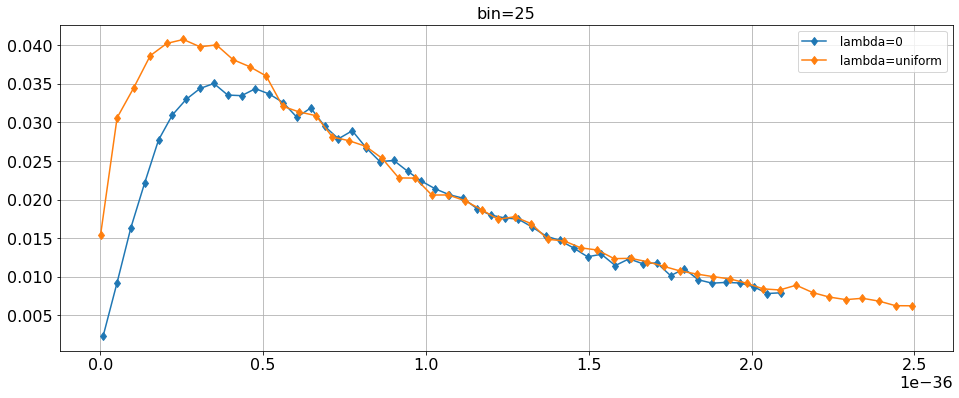

In [1532]:
vals_25 = np.array([ 184,  732, 1302, 1767, 2210, 2469, 2631, 2743, 2795, 2675, 2669,
       2741, 2686, 2598, 2445, 2542, 2353, 2223, 2306, 2130, 1987, 1999,
       1887, 1785, 1705, 1645, 1609, 1502, 1434, 1405, 1392, 1310, 1217,
       1172, 1093, 1003, 1029,  912,  982,  930,  940,  808,  879,  765,
        730,  738,  732,  693,  623,  631])

bins_25 = np.array([8.97704e-39, 5.14724e-38, 9.39678e-38, 1.36463e-37, 1.78959e-37,
       2.21454e-37, 2.63949e-37, 3.06445e-37, 3.48940e-37, 3.91435e-37,
       4.33931e-37, 4.76426e-37, 5.18922e-37, 5.61417e-37, 6.03912e-37,
       6.46408e-37, 6.88903e-37, 7.31399e-37, 7.73894e-37, 8.16389e-37,
       8.58885e-37, 9.01380e-37, 9.43875e-37, 9.86371e-37, 1.02887e-36,
       1.07136e-36, 1.11386e-36, 1.15635e-36, 1.19885e-36, 1.24134e-36,
       1.28384e-36, 1.32633e-36, 1.36883e-36, 1.41132e-36, 1.45382e-36,
       1.49632e-36, 1.53881e-36, 1.58131e-36, 1.62380e-36, 1.66630e-36,
       1.70879e-36, 1.75129e-36, 1.79378e-36, 1.83628e-36, 1.87877e-36,
       1.92127e-36, 1.96376e-36, 2.00626e-36, 2.04876e-36, 2.09125e-36,
       2.13375e-36])

bins_25 =  bins_25[:-1]
vals_25 = vals_25/np.sum(vals_25)



# slurm-35756946
vals_25_1 = np.array([1169, 2327, 2621, 2939, 3060, 3099, 3027,
 3045, 2900, 2831, 2739,
       2440, 2384, 2348, 2137, 2101, 2046, 1927, 1734, 1732, 1565, 1566,
       1509, 1421, 1326, 1351, 1283, 1129, 1112, 1044, 1023,  938,  941,
        908,  862,  816,  786,  760,  738,  696,  640,  629,  676,  603,
        559,  534,  547,  519,  474,  473])

bins_25_1 = np.array([9.10543e-40, 5.17692e-38, 1.02628e-37, 1.53487e-37, 2.04345e-37,
       2.55204e-37, 3.06063e-37, 3.56921e-37, 4.07780e-37, 4.58638e-37,
       5.09497e-37, 5.60356e-37, 6.11214e-37, 6.62073e-37, 7.12932e-37,
       7.63790e-37, 8.14649e-37, 8.65508e-37, 9.16366e-37, 9.67225e-37,
       1.01808e-36, 1.06894e-36, 1.11980e-36, 1.17066e-36, 1.22152e-36,
       1.27238e-36, 1.32324e-36, 1.37409e-36, 1.42495e-36, 1.47581e-36,
       1.52667e-36, 1.57753e-36, 1.62839e-36, 1.67925e-36, 1.73010e-36,
       1.78096e-36, 1.83182e-36, 1.88268e-36, 1.93354e-36, 1.98440e-36,
       2.03526e-36, 2.08612e-36, 2.13697e-36, 2.18783e-36, 2.23869e-36,
       2.28955e-36, 2.34041e-36, 2.39127e-36, 2.44213e-36, 2.49298e-36,
       2.54384e-36])

bins_25_1 =  bins_25_1[:-1]
vals_25_1 = vals_25_1/np.sum(vals_25_1)


plt.figure(figsize=(16,6))

plt.title('bin=25')
# bins[vals>0.025]
# plt.xlim(-10**-39, 1*10**-37)
print(bins[np.argmax(vals)])
plt.grid()
plt.plot(bins_25, vals_25, marker='d', label =' lambda=0')
plt.plot(bins_25_1, vals_25_1, marker='d', label =' lambda=uniform')

plt.legend()


border = 0.015
vals_ = vals_25[vals_25>border]
vals_ = vals_/np.sum(vals_)

border2 = 0.025
vals2_ = vals_25_1[vals_25_1>border2]
vals2_ = vals2_/np.sum(vals2_)

print('lambda=0',np.dot(bins_25,vals_25), np.dot(bins_25[vals_25>border],vals_))
print('lambda = uniform', np.dot(bins_25_1,vals_25_1), np.dot(bins_25_1[vals_25_1>border2],vals2_))


In [195]:
# center of mass
bins[np.where((np.cumsum(vals) >= 0.48)  & (np.cumsum(vals) <= 0.52))]

array([6.62787e-37, 7.13688e-37])

In [197]:
for k in range(10):
    vals_o = vals[1]
    res = []
    for i in range(100001):
        vals_n = np.random.choice(vals)
        if np.random.random() < vals_n / vals_o:
            vals_o = vals_n
        if i%100 == 0:
            res.append(np.mean(bins[np.where(vals == vals_o)]))
    #         print(i, vals_o, bins[np.where(vals == vals_o)])

    # plt.plot(res)
    print(np.median(np.array(res)), np.dot(bins,vals))

7.13688e-37 8.666932696361505e-37
7.13688e-37 8.666932696361505e-37
7.13688e-37 8.666932696361505e-37
6.62787e-37 8.666932696361505e-37
7.13688e-37 8.666932696361505e-37
6.62787e-37 8.666932696361505e-37
7.13688e-37 8.666932696361505e-37
7.13688e-37 8.666932696361505e-37
7.13688e-37 8.666932696361505e-37
7.13688e-37 8.666932696361505e-37


# N=60; Box=5

In [1447]:
vals, bins = np.array([2757, 4758, 4433, 3910, 3296, 2726, 2482,
2150, 1878, 1656, 1514,
       1351, 1255, 1137,  996,  917,  837,  752,  701,  713]), np.array([2.86349e-40, 2.57719e-39, 4.86803e-39, 7.15887e-39, 9.44971e-39,
       1.17406e-38, 1.40314e-38, 1.63222e-38, 1.86131e-38, 2.09039e-38,
       2.31948e-38, 2.54856e-38, 2.77764e-38, 3.00673e-38, 3.23581e-38,
       3.46490e-38, 3.69398e-38, 3.92306e-38, 4.15215e-38, 4.38123e-38,
       4.61032e-38])

bins = bins[:-1]
vals = vals/np.sum(vals)


In [1449]:
# center of mass
bins[np.where((np.cumsum(vals) >= 0.4)  & (np.cumsum(vals) <= 0.6))]

array([9.44971e-39, 1.17406e-38])

In [1454]:
acc_mean = 0.0
for k in range(1,31):
    vals_o = vals[1]
    res = []
    for i in range(100001):
        vals_n = np.random.choice(vals)
        if np.random.random() < vals_n / vals_o:
            vals_o = vals_n
        if i%100 == 0:
            res.append(np.mean(bins[np.where(vals == vals_o)]))
    #         print(i, vals_o, bins[np.where(vals == vals_o)])

    # plt.plot(res)
    acc_mean += np.mean(np.array(res))
    print(np.median(np.array(res)), np.dot(bins,vals),np.mean(np.array(res)), acc_mean/k)

1.17406e-38 1.4635505068823192e-38 1.4392986374625376e-38 1.4392986374625376e-38
1.17406e-38 1.4635505068823192e-38 1.4422738007992008e-38 1.4407862191308692e-38
1.17406e-38 1.4635505068823192e-38 1.4704231225774226e-38 1.4506651869463868e-38
1.17406e-38 1.4635505068823192e-38 1.4843832691308692e-38 1.4590947074925074e-38
1.17406e-38 1.4635505068823192e-38 1.5058956807192807e-38 1.468454902137862e-38
1.17406e-38 1.4635505068823192e-38 1.5054378761238763e-38 1.474618731135531e-38
9.44971e-39 1.4635505068823192e-38 1.3958162266733267e-38 1.463361230498073e-38
1.17406e-38 1.4635505068823192e-38 1.4447912761238763e-38 1.4610399862012984e-38
1.17406e-38 1.4635505068823192e-38 1.4786618894105897e-38 1.462997975446775e-38
1.17406e-38 1.4635505068823192e-38 1.5063531975024974e-38 1.4673334976523473e-38
1.17406e-38 1.4635505068823192e-38 1.4450201967032966e-38 1.465305015747888e-38
1.17406e-38 1.4635505068823192e-38 1.481179178921079e-38 1.4666278626789873e-38
1.17406e-38 1.4635505068823192e-38

In [26]:
n_60_zero_contacts = np.array([[ 0, -1,  0],
       [ 0, -1,  1],
       [ 0, -1,  2],
       [ 1, -1,  2],
       [ 1, -1,  3],
       [ 1,  0,  3],
       [ 0,  0,  3],
       [ 0,  0,  4],
       [-1,  0,  4],
       [-1,  0,  5],
       [-2,  0,  5],
       [-2, -1,  5],
       [-2, -1,  6],
       [-2, -1,  7],
       [-1, -1,  7],
       [ 0, -1,  7],
       [ 0, -2,  7],
       [ 1, -2,  7],
       [ 2, -2,  7],
       [ 2, -3,  7],
       [ 2, -3,  6],
       [ 3, -3,  6],
       [ 4, -3,  6],
       [ 4, -2,  6],
       [ 4, -2,  7],
       [ 4, -1,  7],
       [ 4,  0,  7],
       [ 3,  0,  7],
       [ 3,  0,  6],
       [ 3,  1,  6],
       [ 4,  1,  6],
       [ 5,  1,  6],
       [ 5,  1,  5],
       [ 6,  1,  5],
       [ 6,  2,  5],
       [ 6,  2,  4],
       [ 6,  2,  3],
       [ 5,  2,  3],
       [ 5,  3,  3],
       [ 5,  3,  2],
       [ 5,  3,  1],
       [ 5,  2,  1],
       [ 5,  1,  1],
       [ 5,  0,  1],
       [ 4,  0,  1],
       [ 3,  0,  1],
       [ 3,  0,  0],
       [ 3, -1,  0],
       [ 2, -1,  0],
       [ 2, -1, -1],
       [ 2,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -2],
       [ 0,  0, -2],
       [ 0,  1, -2],
       [ 0,  1, -1],
       [-1,  1, -1],
       [-1,  0, -1],
       [-1,  0,  0],
       [ 0,  0,  0]])


In [27]:
n_60_59_contacts = np.array([[-1,  0,  0],
       [-1, -1,  0],
       [-1, -1, -1],
       [ 0, -1, -1],
       [ 0, -1,  0],
       [ 0, -2,  0],
       [ 0, -2, -1],
       [ 0, -3, -1],
       [-1, -3, -1],
       [-1, -2, -1],
       [-1, -2, -2],
       [-1, -1, -2],
       [-1, -1, -3],
       [ 0, -1, -3],
       [ 0,  0, -3],
       [-1,  0, -3],
       [-1,  0, -2],
       [-1,  0, -1],
       [-1,  1, -1],
       [-1,  1,  0],
       [-2,  1,  0],
       [-2,  0,  0],
       [-2,  0, -1],
       [-2,  0, -2],
       [-2, -1, -2],
       [-3, -1, -2],
       [-3, -2, -2],
       [-3, -2, -1],
       [-3, -3, -1],
       [-3, -3, -2],
       [-3, -4, -2],
       [-4, -4, -2],
       [-4, -4, -1],
       [-3, -4, -1],
       [-3, -4,  0],
       [-3, -3,  0],
       [-2, -3,  0],
       [-2, -4,  0],
       [-2, -4, -1],
       [-2, -3, -1],
       [-2, -2, -1],
       [-2, -1, -1],
       [-3, -1, -1],
       [-3,  0, -1],
       [-3,  0, -2],
       [-3,  0, -3],
       [-2,  0, -3],
       [-2, -1, -3],
       [-2, -2, -3],
       [-2, -2, -2],
       [-2, -3, -2],
       [-1, -3, -2],
       [ 0, -3, -2],
       [ 0, -2, -2],
       [ 0, -1, -2],
       [ 0,  0, -2],
       [ 0,  0, -1],
       [ 0,  1, -1],
       [ 0,  1,  0],
       [ 0,  0,  0]])

In [5489]:
import ipyvolume as ipv

data1 = n_60_zero_contacts.astype('float')
data2 = n_60_59_contacts.astype('float')

x1 = data1[:,0] #np.array([el[0] for el in sv[:]], dtype='float')
y1 = data1[:,1]# np.array([el[1] for el in sv], dtype='float')
z1 = data1[:,2]# np.array([el[2] for el in sv], dtype='float')
x2 = data2[:,0] #np.array([el[0] for el in sv[:]], dtype='float')
y2 = data2[:,1]# np.array([el[1] for el in sv], dtype='float')
z2 = data2[:,2]# np.array([el[2] for el in sv], dtype='float')

ipv.figure()

ipv.plot(x1,y1,z1, color='red')
ipv.scatter(x1,y1,z1, size=3, marker="sphere",color='red')
ipv.plot(x2,y2,z2, color='blue')
ipv.scatter(x2,y2,z2, size=5, marker="sphere", color='blue')

# s.material.linewidth = 12
# x = aggregated['x']
# y = aggregated['area']
# z = aggregated['en_mean']
# m = ipv.plot_mesh(x, y, z, wireframe=False)
# s = ipv.scatter(x,y,z, size=5, marker="sphere")
ipv.squarelim()
# ipv.animation_control(s,interval=2000)
ipv.show()

27 770 358 330 configs
09.40 started
10.07 -- 0.1 %

27 min x 1000 = 27000 mins

In [5269]:
27000./60/24


18.75

1172556
32496156
609091230


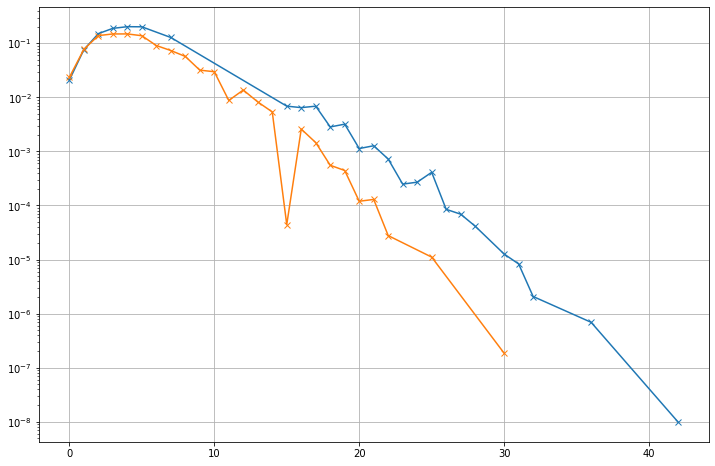

In [5408]:
# overlaps_12 = dict(sorted(.items()))
dct = {"4.0": 195150, "6.0": 66900, "7.0": 74040, "10.0": 8880, "8.0": 32550, "12.0": 6090, "16.0": 300, "14.0": 600, "20.0": 6, "5.0": 143040, "9.0": 24720, "13.0": 2400, "3.0": 191520, "2.0": 228360, "1.0": 142560, "0.0": 48240, "11.0": 7200}
print(sum(dct.values()))



dct = {5: 4485780, 7: 2387880, 8: 1857384, 11: 285120, 10: 967824, 9: 1035540, 13: 267408, 12: 443688, 17: 47304, 16: 84096, 14: 174690, 20: 3888, 25: 360, 22: 900, 21: 4200, 30: 6, 6: 2954088, 19: 14400, 4: 4843440, 3: 4837632, 2: 4512240, 1: 2506752, 0: 762096, 18: 18000, 15: 1440}
print(sum(dct.values()))
dct = dict(zip([int(el) for el in dct.keys()], [el/sum(dct.values()) for el in dct.values()]))
overlaps_12 = dict(sorted(dct.items()))                                                                                      

dct = {"18": 1726662, "17": 4182864, "15": 4186392, "16": 3931872, "21": 775152, "19": 1944096, "26": 51660, "24": 164220, "20": 687876, "22": 439488, "30": 7686, "36": 420, "32": 1260, "42": 6, "7": 78038688, "25": 249984, "31": 5040, "28": 25200, "27": 42000, "5": 122961216, "4": 123562320, "3": 115097136, "2": 91887432, "1": 46297440, "0": 12673920, "23": 151200}
print(sum(dct.values()))

dct = dict(zip([int(el) for el in dct.keys()], [el/sum(dct.values()) for el in dct.values()]))
overlaps_14 = dict(sorted(dct.items()))  

                                                                                                       
plt.figure(figsize=(12,8))
plt.plot(overlaps_14.keys(), overlaps_14.values(), marker = 'x')

plt.plot(overlaps_12.keys(), overlaps_12.values(), marker = 'x')
plt.grid()
plt.yscale('log')



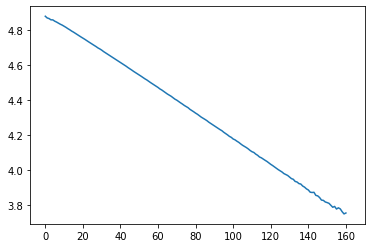

In [5081]:
candidates = [4.879010695187166, 4.869301470588235, 4.865826555702667, 4.858612017853574, 4.858333590114936, 4.85099193416979, 4.8458366619254525, 4.839763266193109, 4.833499089071352, 4.828438192379089, 4.822136969099588, 4.815677934829457, 4.808390100064162, 4.8019807097655685, 4.794618113873026, 4.7885109910352455, 4.781486633476969, 4.774900815146331, 4.767395012955029, 4.760890788588488, 4.754427019481533, 4.7477134168260315, 4.740239438881092, 4.733459382272054, 4.726417208612456, 4.71992551289691, 4.712883455574109, 4.706189799522333, 4.6985748515633246, 4.692725747388274, 4.685965167927434, 4.677801258371693, 4.6708602381307855, 4.664218494961216, 4.657263624012479, 4.650352809285149, 4.6435980165738355, 4.635490903975994, 4.6289072235456405, 4.621919162866275, 4.61538876556912, 4.607913952097693, 4.6008760809223865, 4.594311019862491, 4.586463779322805, 4.579611761838541, 4.572282357345784, 4.564668611558865, 4.557905268351516, 4.550863455565415, 4.5439416431324275, 4.537042684191747, 4.5296258039783615, 4.522399217524689, 4.516091964301683, 4.508153868399411, 4.500981382298102, 4.4939, 4.48707779886148, 4.480411410761865, 4.472995635251878, 4.464597272067523, 4.458473012861058, 4.450917625842041, 4.443058673168007, 4.43547515597148, 4.429037748737416, 4.42262811118998, 4.41461462798922, 4.406273581072453, 4.40044948011938, 4.392778382235949, 4.385225424480643, 4.378255216414483, 4.3703523862375135, 4.3637330941726455, 4.3575913278783585, 4.348218747889511, 4.341365147263167, 4.334303358805758, 4.326635395537526, 4.320042486839093, 4.312254425695466, 4.303887867647059, 4.297599556547532, 4.290833755060729, 4.283918031263071, 4.27528362732147, 4.268104845243883, 4.260759810653182, 4.254179680721847, 4.246266480730223, 4.238687953995157, 4.232702935946163, 4.22642827242283, 4.21746958206786, 4.210098957245152, 4.202616021282886, 4.194072931529974, 4.188396764285113, 4.179125590302713, 4.174231057764441, 4.166495191232387, 4.159902189313954, 4.151176838541922, 4.143322184098146, 4.136908115444697, 4.130470351679546, 4.122915809680515, 4.11397756446032, 4.10671561233845, 4.102377072299351, 4.093009159482758, 4.086279724655819, 4.07667542344858, 4.071902696234247, 4.064578438010275, 4.057658504680538, 4.05103393996895, 4.042997302471285, 4.0346474931235825, 4.027753108348135, 4.0198809143222505, 4.011294797033346, 4.004410161010969, 3.997794117647059, 3.9909858387799564, 3.981992409867172, 3.9765951462552236, 3.971259686509334, 3.962035541195476, 3.953387369310381, 3.949335594351162, 3.9371542282940046, 3.933909428257284, 3.924901708755481, 3.922285067873303, 3.9109625668449195, 3.90468923418424, 3.894798474945534, 3.888574660633484, 3.8758372160745487, 3.8741373644429835, 3.875226942628903, 3.857698961937716, 3.8549522373051786, 3.8453256302521006, 3.8307958477508652, 3.8292279411764705, 3.820177335640138, 3.8167112299465242, 3.812332887700535, 3.80119825708061, 3.789981617647059, 3.7946832579185523, 3.7798202614379086, 3.786764705882353, 3.7806372549019605, 3.764705882352941, 3.752005347593583, 3.7573529411764706, nan, 3.764705882352941]
plt.plot(candidates)



In [4587]:
27*5./67

2.014925373134328

- find a such 'm' which will minimize discrepancy between uniform random walk and a biased one.
- try to find a curve shape for the probabilities. It should include params which could be varied to find the best fit to  uniform random walk.
 

In [4526]:
lambda_ = 0.6 
l = [0,0,0,np.exp(2*lambda_)]
print(l)
n_nonzero = len([el for el in l if el>0])
l = [el/sum(l) for el in l]
print(l)
print('cumsum', np.cumsum(l))
l = [el *n_nonzero for el in l]
print(l)

[0, 0, 0, 3.3201169227365472]
[0.0, 0.0, 0.0, 1.0]
cumsum [0. 0. 0. 1.]
[0.0, 0.0, 0.0, 1.0]


('1.136769e+02', '9.990580e+01')

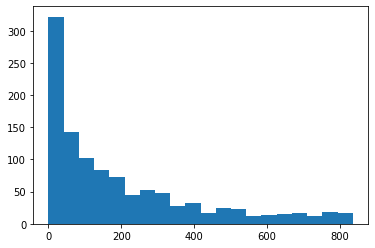

In [4509]:
probs =  [7.620785171418574, 216.44798895283523, 17.58544465047466, 830.8837188527664, 527.7427750657264, 153.055795664221, 145.79842130570594, 6646.685293054394, 4964.7382511368705, 464.5161690844256, 648.8150109833422, 220.9014798238434, 286.0070984243466, 1603.6337636550418, 260.9773592947056, 33.6055837891335, 744.011559997306, 289.7300034005349, 278.3014724382862, 105.77219370561353, 11468.772692177165, 8.498187901431614, 8234.396481749169, 3851.3898396124187, 510.183429770328, 577.5385478009838, 325.0342863254699, 5.476583954010552, 34.489930830245015, 63.352908139250765, 580.2912893405706, 219.66289438490008, 256.8024788234, 253.7981489812258, 3967.5169503648167, 25.734027638664312, 3596.2767601505893, 651.8905937258808, 47.83352289971109, 289.81887841319076, 151.84604102507168, 613.4554075627431, 1322.9335089026997, 4.9389277998763506, 200.20457885814773, 746.499138613917, 31.20687832299893, 649.4412454657594, 90.63539706560155, 57.46279178075513, 4586.173428348486, 53.87206972591794, 31.376727136531503, 31.45825761963425, 192.90785037104752, 230.68597578486495, 125.89408481635137, 58.4022372448074, 145.87592436922944, 366.8700172613254, 93.6573045848465, 322.45130719480284, 703.3008808190727, 2731.5730650698974, 765.2127028460103, 12.483774095068785, 26.677435936405065, 0.6108004950153051, 0.3293996661249802, 1905.8583592625466, 312.708299507032, 104.97001392395438, 44.401598602665196, 18628.191718425915, 6.163294530155727, 2.3500113907113063, 7.801260772946609, 68.69800654918637, 40.86641472110975, 7482.590477854153, 94.17590251278635, 284.08044284547435, 1014.9188378669459, 30.779639766156777, 296.84553160392244, 255.7441774245455, 255.61730606815826, 53.635513628138526, 965.8590984998037, 48.915001041067676, 50.10360869328819, 321.18753372711757, 5885.690435226887, 1055.068316393712, 10.838074128797412, 46.40079685996232, 10.326521046058923, 132.3244103487532, 269.18464004551635, 982.005888784213, 40.80538550960187, 8230.705774543614, 1799.930301463603, 104.4473046411446, 23.49680221849399, 365.270623579378, 762.8325521553808, 23.97465803019657, 1.4832865461669513, 60.7297903568382, 1852.618799024522, 104.31468407121409, 65.92255489613555, 68.24303721029621, 175.3823372626709, 17800.489325459115, 126.34874586997897, 835.363980026326, 2281.52215220328, 308.1581002584638, 44.21221914374095, 148.147489836183, 8.489658179607567, 157.76555118588786, 2484.4592422008054, 1809.0225585392006, 158.1612867274542, 1231.3422340083891, 804.6427692088632, 4262.082768337788, 205.02178382503124, 655.9919703059484, 27341.25573297756, 5.648514481138508, 835.7574584921739, 4229.252418437153, 1315.8648018908843, 76.7401887650343, 207.33446406250354, 235.39093928533677, 340.4952311377519, 13.533296106687759, 0.7007620667527092, 304.167152650519, 139.74653318042587, 65.68229628629973, 4619.565191052268, 132.9705984188737, 51.018344450915826, 157.28236322231527, 507.58792775453077, 789.3775695084516, 28.841205386829575, 2133.4231847452506, 236.7842890391524, 1.5173541640725519, 26.345610091231325, 399.4739603417437, 18.08356431280761, 3.351803497854964, 1070.5015088505552, 74.57411567908385, 346.1709422347958, 529.7758224368167, 51.669106956990426, 131.32337853445463, 60.45792454261738, 750.3040013645731, 28.318503895613365, 281.2275350788038, 980.5188226502131, 91.3472350314995, 3.4775384739854873, 223.23521357591497, 80.80972771425547, 36.655248160519186, 506.02600576495763, 415.93339931906763, 115.44585886928031, 261.894756570596, 3988.270461323632, 210.08163070963332, 168.94190046092072, 155.58276562766775, 67.72707519017641, 5.063621434805618, 51.64891236610313, 0.08403522075753643, 204.0792872365316, 449.9180276081852, 1170.8205237392183, 2044.4380987844372, 38.20580389690072, 4131.678537659597, 89.37124714963745, 4.88339733256466, 2438.6723128008753, 136.81157044262523, 313.3741219550083, 1877.3861418901522, 142.9449531046582, 91.46187889120986, 275.41261465758674, 475.44124486995423, 12.18885989093501, 494.5863605296217, 58.890476201287356, 53.902023017693196, 122.48944924727718, 611.7094921934342, 4.035018192299794, 755.1990223064074, 630.4664015236488, 107.61869985714257, 212.03553470480884, 47.402314611230125, 811.8518633500072, 54.732560648584304, 21.623693908273683, 296.8627163797066, 77.50314178265234, 4510.876431450874, 113.97106390564858, 5821.9071059786165, 302.73254319705023, 3.271014211635957, 7.933322484923593, 3371.361496826305, 98.04449949893541, 76.72966914075688, 322.3204712138728, 1958.1387464223862, 934.130049304484, 239.80746415578705, 140.59258446833795, 3.1133257220108295, 18.327888603368123, 77.0138363726558, 84.76027651735671, 448.66557881629603, 222.88179394787014, 1137.2461712753154, 129.3879893672364, 1312.374026326111, 7.528821551640323, 1916.9513521930971, 32411.01236801883, 1396.8881469240455, 39.98547173807383, 402.33114533636353, 252.41331564460538, 3.225591799252592, 844.990900656999, 2197.1249882538395, 8368.431338272496, 1772.5052095349454, 1162.551634031291, 145.30366143457485, 357.37381408087685, 2917.8629769532995, 393.3215798947747, 425.67366512764863, 1.0199398302738145, 75.81147227628163, 21050.744356980376, 236.7303556629051, 5142.419722248265, 71.65567420446838, 182.03649870236018, 11.242821546676272, 20.404323750410718, 112.69122582824339, 297.1520771276528, 387.7218419090779, 3421.739648759282, 14692.578410357002, 97.7228246312013, 72.39749666597575, 1585.5385312899975, 844.1093723867089, 1540.7333732569482, 981.3584110292544, 313.12001565731373, 35.23223880142613, 14.564940018801494, 541.6850441459471, 332.7492042057524, 39.620183270646926, 19.602668421825364, 231.3246227201665, 91.4828570264364, 194.62310646354962, 99.0929896478012, 3182.144629145662, 72.25010296734659, 2.5244031002413143, 758.8079079636007, 113.06422972142609, 8374.185275915717, 603.5032430369426, 1357.7663350239236, 233.83815663801286, 93.22089593475994, 2193.0339231005737, 386.98447032972007, 2056.347172090961, 56.78944118711781, 122.40657813963466, 58.557297605616725, 17.04532719280107, 1040.476584505411, 674.7034141072079, 1775.5265994610072, 148.56333863449592, 527.6221146266114, 1417.0840036506318, 4749.74081149575, 258.2415365289103, 81.49740099797908, 1494.0603683897996, 815.3860589609238, 12.62128089251841, 245.06611785471074, 10.258598084995379, 1330.4202953207002, 160.3464114493411, 24.723154967911615, 4.926431407262348, 5.659122254096619, 134.56513010565777, 307.61847610859877, 104.21036188767128, 4806.2980936142985, 984.9756486504353, 80.32302759540238, 93.44200351937101, 202.63909717814462, 2429.135778022402, 513.5706270462833, 51.531940169950715, 8.23191429900821, 12.912599405154115, 266.44358984017924, 176.4469268664062, 1482.9159033923563, 1019.3667527880109, 160.8271707602057, 438.31079221836274, 226.61228236308673, 257.0613641705193, 321.0803751337676, 1640.7430553906947, 168.15824711192363, 14396.085804840824, 6.052999946412933, 180.34297587502928, 159.42402162406827, 2.630948787641523, 823.2343405291932, 476.2019915060766, 19.49192311970538, 37.29763508509066, 463.57274313955094, 7.620934216915911, 201.89573012844528, 10.725787126904589, 164.41928847088244, 3210.4088876095184, 13.354191848171595, 8.945462725274783, 61.14095692135691, 66.69418508584472, 309.3294120018278, 1191.58129647614, 98.80132245433028, 2.4392271543356734, 390.77949405594177, 95.08620339527934, 72.60052770175778, 2023.3864856121863, 44.37468506644039, 674.4474956762483, 297.5385903145014, 168.69643590442814, 1056.2213480717821, 27.743882825462507, 62.26571366560731, 0.957394972747505, 2576.904340050721, 30.731630232257146, 1023.8689046193357, 58.98388122636372, 421.5454935536005, 1797.9800845002353, 91.87823977031421, 922.4911881967995, 42.002715494569784, 738.5693431363106, 265.8354089614797, 529.6091303596644, 161.49373750935834, 25.719325426662543, 3106.176300307789, 23414.09881459677, 467.84390486468686, 120.77167051945717, 299.7975939057506, 366.41521447974384, 8.844840447606801, 29.126611561889806, 162.50030232446812, 38.16893976067978, 1.4919274259952946, 367.8971526148648, 71.67157651260897, 1514.1428607769255, 36.00586825080418, 187.44996592063268, 29.769985423575598, 165.12272239239758, 478.79138073901447, 9.73758376050367, 5.614925992244433, 6.686921102649797, 13.5406650878189, 967.8029801284499, 114.80887797138551, 125.84561504798135, 236.12460623706806, 2716.8108189196987, 27.122004019373172, 13.541631040936275, 2700.486318504648, 777.6121049690463, 1123.9744314731352, 612.2589654565289, 292.03895637389223, 34.8151572548708, 2223.8174010908992, 612.4892480752713, 154.82322088512285, 500.0623939488845, 35022.85038234696, 44.70484464015833, 214.28351938450263, 6007.769031469857, 81.17320372429887, 277.5332875574248, 155.3612879023634, 130.17177473444497, 97.32508765428659, 9.940844903164338, 127.75577128940512, 1933.1673684871807, 22.046785003213742, 1135.8821627076431, 1202.3100618644448, 1331.752159216182, 91.97909178544596, 81.07541695706631, 9.0443450612375, 338.83621007538267, 17.882751863402856, 81.97590604515429, 268.2515549375299, 438.59071406336056, 186.84787615215788, 81.97253597618379, 5.222316520127508, 2634.322592951614, 1189.9932054328444, 144.64391667024887, 8.700387228407685, 0.8544817475461588, 24.70805165434158, 135.5489287174296, 366.4214997718708, 69.9842396990574, 528.7129813628285, 34.709513877246025, 28.46211323465847, 793.6394534693258, 7172.2375362800085, 270.72902417954754, 60.61970420561992, 52.11551815660225, 25.710088919282892, 17.449323585735364, 1113.609526866645, 9.938659202338588, 1960.071712550791, 77.95653411184486, 801.0027108413689, 281.509956073611, 758.0771451678683, 578.6495179424355, 13019.21289861859, 205.00365720481537, 1030.1713890922179, 739.3096620307455, 7315.225029334629, 70.59938176207191, 191.45091325475582, 261.679502374695, 53.876850558304156, 504.4909483291083, 11.832546209596831, 37.645738323944215, 138.9059102014005, 885.4234716950673, 96.78870361849502, 522.919888369569, 734.0294193211075, 78.4095312825393, 2891.828505545114, 528.4790605995573, 4639.25157537263, 614.7267898741703, 292.19881893527014, 104.31560339624708, 469.25567389890426, 49.70296394313953, 43.853309890581315, 245.77331448351666, 11.589746774505661, 50.990784581323965, 7.2796992472974, 630.4712597909819, 935.7947711100279, 7.369099732449288, 1032.5696246749785, 331.27296162173366, 258.63658339267477, 224.8771933010716, 600.6087335780783, 942.648417198883, 139.68670546863848, 8.46837190401427, 283.9030993067102, 1064.5180670348273, 2853.123404595517, 15.734962616924633, 47.43508783035157, 358.832599716605, 7983.989461070079, 280.5465950886601, 527.6817244063182, 462.9749903985526, 20.65371950238985, 27.808038015288474, 34.71497623161743, 124.69348050604842, 38.47899254056838, 255.85916770694598, 1487.8931624194745, 412.6394186943778, 63.15821134855028, 411.3114263061084, 651.0258242819098, 165.03628244361232, 395.21079177495494, 228.28267024603474, 5.863572523307497, 6743.41950169519, 237.19790976238096, 54.25575482507419, 1618.2889865628329, 48.97905943744229, 399.64621300572725, 131.3205842992546, 322.9516866330105, 24.35495376663534, 28.921600349218597, 4175.481206281916, 10.927840265691081, 71.81625052565052, 197.78700054285912, 280.1608088938186, 2434.94920663974, 80.98281769633788, 11.832972884111646, 257.9198924494487, 138.9025418862064, 21.24214563374585, 227.43707205135576, 5.034513111669959, 354.90154741996514, 1744.116911593125, 10348.187861609555, 89.3268179768868, 59.45637403075636, 60.38816506501195, 0.3932582046006964, 6.1656187227721295, 53.78527576497602, 4.2855990605999414, 449.9796020871825, 143.7176313890884, 0.06013739659103871, 148.20644913147584, 128.53131499314847, 8.6636640146012, 102.38389317773141, 1.0656163024851548, 8235.110351730538, 27.968978817206747, 80.17318018589094, 173.34560947590663, 1002.7876570017772, 115.72876282564197, 858.4541182297268, 11.602831933730146, 1718.7115884306659, 116.50012901330824, 98.71674198176937, 390.2149927027059, 1650.070084452436, 2773.7345831945263, 97.87827392501397, 466.34967793342446, 581.1235211049187, 280.60886690720855, 343.25173093078405, 3.6375396224461265, 68.34938962974518, 81.4021377938367, 99.15536122857498, 778.2908728649406, 65.3649325014209, 91.94382165124092, 136.53962098151962, 5963.405213421937, 117.43703148241929, 3437.025028934825, 252.43935412914564, 5288.898304317376, 28.09095186753721, 393.37576477803236, 80.7002324925951, 168.13756825378886, 15.285540659315986, 8.862482078790448, 198.4529000411839, 311.1321411352974, 73.83608398027559, 706.3373234117475, 136.39216513866796, 1301.6905435608794, 53.870762804775225, 207.54246064513694, 33033.18253415534, 141.52100346872908, 33.59330449518134, 233.47873963046808, 265.7811265444886, 84.53563918218224, 698.6328628523179, 50.81174741387843, 1362.529234679839, 11.875441641066427, 82.67624183357961, 661.044036623875, 4760.400690248869, 602.3812431036697, 162.24098837194944, 212.99861651015593, 1824.983900401976, 109.60916080237853, 969.9138956892771, 55.08083766227565, 102.95999977073527, 1381.6370728885813, 61.41079539680396, 2.0721329581448975, 178.006030335815, 69.87683664752329, 1983.3228517987625, 142.07558855500494, 3.706900574205477, 311.5467788904666, 7058.783272162753, 53.87576716746874, 98.25067865320202, 146.84646829034966, 7.373576231865297, 1247.0714180537736, 9.601606732033986, 3777.8068198715296, 119.07185686415427, 42.42862337599561, 2505.1647899592044, 18.16098914584258, 116.55445914444218, 6958.723343225739, 413.85148684084356, 767.0513973220949, 934.3471658565481, 0.7916760838840201, 513.7896261118245, 75.3715628256988, 26.12467753580006, 1404.8647062058685, 179.06959677964022, 498.3095868677774, 270.19778987660993, 2.5650682057533705, 58.130082012213705, 775.2173859778059, 1597.90106342012, 110.56077616026597, 314.5538296251002, 8.886574431892136, 150.22090749233672, 412.21140978724804, 90.07563227796493, 41.71695512977412, 4411.713483258738, 21886.673562489756, 168.41476757034604, 53.27640618012603, 5.598191535826886, 1.7722622302163518, 99.89390175366243, 136.74376044363254, 49.48730375785817, 46.98209942208074, 5.862330540361697, 17.508896171684476, 39.50675854585398, 8.744111991924816, 469.95425375257764, 195.74287708665008, 99.90580378628627, 677.3433142983918, 8.930811487450015, 590.461176815619, 8.000122610776298, 37.958253830520604, 12110.913518990075, 924.4920792801548, 7223.3629018814345, 4.948061491572324, 116.22090323971076, 842.9841626802101, 889.8259099695716, 293.74853790613076, 56.77325371572955, 691.1461827187809, 91.01497283440368, 1899.379833131419, 2.4157622397129543, 62.00404949166864, 1.98013177049757, 2030.067738137295, 299.74875248610545, 690.5106389033751, 8223.632198043053, 9.97521375486509, 44.08280465654897, 471.2323720165957, 20.044915800290525, 307.3675934541355, 92.0157248343291, 151.32120108139247, 140.25453808343204, 13.38927629993055, 14.197387476592617, 90.2615284686274, 84.78641101253439, 54.864782993331794, 2233.4390255097323, 15.832373563244019, 479.49173344358286, 535.5871343551648, 179.63286248541607, 14.985238622291371, 23939.302532918326, 334.319174476879, 152.91813774062945, 1056.3606294227884, 4.747487815704077, 44.35663494975238, 166.54938027035007, 18.955116955766435, 64.5181226787409, 748.6324084335414, 12306.396943496902, 4.680296692803394, 243.086804170869, 8.156314018025142, 119.11352553732773, 1863.3329388067757, 191.2599654809185, 168.14791460141672, 27996.720903083213, 24.44120221504689, 162.716474206072, 104.41046029954374, 1431.3452152037835, 299.6643070336195, 156.7014235684729, 275.33843712272136, 7.722208729458759, 75.17870530957511, 274.0641904073248, 134.30161270293814, 1016.6220469084216, 2669.955941137002, 708.9527045001703, 8.037076590493765, 46.85004316449246, 292.5640115716306, 1396.48498683635, 23.32314638835235, 237.72156697133934, 826.8344187963155, 5848.9341863539175, 15.70603129492411, 28.588219126555284, 815.9033177591393, 170.38821281485446, 33.787397499774286, 297.64842006675286, 641.7129867065324, 32.416930514994924, 136.2503598243938, 1064.1211159193522, 10.905851986696147, 135.0134185808996, 113.64710139700423, 71.407841675745, 1523.343610747452, 144.1916716211755, 36.18033508863356, 25.62036074002229, 318.18436035833435, 6277.907013779656, 19.241071529240234, 341.6008264308878, 182.61001347715757, 140.36441507239024, 9.956643136236998, 196.43442371541872, 13.169699291791117, 9.036557454888149, 36.45676449780202, 7.139062754562803, 1615.1746815023748, 51.64208647745523, 185.87877365876204, 163.3653590417719, 152.55343369494176, 1576.9336633869805, 56.42555463242161, 91.72148367497982, 20.236199444522306, 747.4797279609304, 10.476381178635256, 2.5798673753953993, 6.376207395636925, 591.9773056447478, 206.64393239128114, 0.853208931905222, 1.3949702705169997, 651.0232293781128, 0.0653304661309116, 1918.5602031791743, 461.94308398917303, 1516.112875121455, 388.1821949016748, 71.79120860287708, 2498.687774815378, 57.05517170500577, 694.4814105895499, 4715.523055377503, 389.05091789885415, 849.9201653863554, 128.6406017986199, 1034.6106625119355, 598.398021409014, 193.64441881660875, 627.3706182290407, 282.42363092986, 220.4356418914334, 490.00281614675487, 19.615549390089544, 260.5425520103007, 58.20872803838845, 1458.4400532306759, 32.88609985004656, 35.73035980377292, 142.79400570908015, 224.082303648534, 43.110798096916774, 2.868051058483928, 358.7479112644424, 271.3926845085987, 101.51531881594184, 304.9490074650823, 1817.3368334742675, 186.81320562644706, 106.69827285938457, 3936.451521652757, 1.0835220407962431, 24.166695126712764, 6.835755379288204, 97.21916859805226, 442.3678788826446, 18.338426546893597, 273.96151266407065, 77.54308744624079, 189.14919538030784, 679.7074587024435, 204.29984834805393, 199.014397917629, 1093.9499181954284, 278.6438478317601, 88.79033545885841, 319.8937634525547, 2202.8902646580063, 4.6845379729519285, 89.67880956812357, 1898.9816999242, 7.90950431046522, 770.3842456302785, 532.5853862714886, 308.5745792542757, 7.836464203195116, 23.7437150660738, 133.20425734726464, 11.224043034080434, 132.07503096891125, 841.5357122407617, 7310.154022505236, 22.59378206545562, 159.38789361355902, 29.347688612260313, 174.58370708792756, 153.72565723933354, 196.4660116179489, 212.30600654602495, 475.4137702012408, 226.63876397384317, 1531.334857776458, 314.7285894248893, 100.91836578662033, 170.86994823083683, 9.312166038971355, 10414.438407235097, 979.6234328658835, 25.15498111643391, 802.9492686018712, 1959.7244389247462, 369.86416793032845, 16.05568269744148, 234.2723645832773, 30.527584216903904, 247.98138090788206, 185.76526908837639, 36.71584444764755, 100.71131635286984, 89.3437000125496, 11904.142808111817, 32.55776073904207, 42.78949737664559, 16.168741014348818, 344.4410721775905, 0.029480387742724396, 627.2802393062353, 973.0909561192514, 23.480127193738664, 595.8275049111498, 5755.680843059258, 2.954854272551556, 1.5700948470732223, 418.836434654142, 3208.404948189992, 729.0063663102422, 357.8538397325849, 10.38682828223091, 1.1786522000593218, 845.5297368671487, 13.570223077635891, 2378.0478576351566, 50.835924376099506, 82.03313220458294, 112.8572199945189, 100.64446499521948, 675.9112385636267, 88.42362768765804, 483.6977202306846, 833.8611531562826, 975.3665121238745, 255.7696415245691, 4039.1488177308274, 44.39588527399913, 442.7831814129276, 184.1214833479707, 4.764447379164338, 110.55915557401423, 10.520326507313465, 4630.9794164256355, 565.8440129095925, 631.3476643078386, 22.915067519055896, 49.19862295907923, 87.85478126223438, 226.7481385722492, 0.6776818267984643, 190.68592907249172, 2087.252104903589, 535.5422860638814, 286.9253069962962, 90.12351787992004, 185.27518038885682, 201.31026688704935, 781.9768086677284, 2873.0700707929327, 33.41798752720659, 34.86678454029045, 31.122735453993368, 33.68736706381268, 375.86465734026984, 123.44010529814783, 1182.3371312600975, 2694.357500847902, 1435.2692127036385, 1013.4127131483003, 2388.3526303172953, 36.29825392147434, 96.62741834971254, 848.6491843424184, 45.779383815675224, 789.1779539609607, 433.6289674661822, 694.4194280465679, 1346.0341129579008, 7.441397534814467, 103.47519488401127, 9.328275073764395, 14.44266921481274, 109.71059754561401, 206.3884808595833, 2226.4533850489947, 167.15870420265776, 573.6905241961551, 248.27711965554923, 503.4678829344124, 7.428292265086867, 628.5110016696514, 104.32431074579374, 34.98852028755029, 26.952234214657725, 348.22645332513196, 72.49729725745203, 16.434857738758556, 956.7080718333393, 2806.494524400396, 391.2708142842949, 677.3156566783758, 2775.2390094995317, 195.92264191720776, 367.8681475516741, 84.97330602053701, 3260.3205028451193, 22157.629779444647, 597.2609718970396, 845.7262014416415, 159.0568766603075, 7.471462128451793, 297.84034057479164, 499.8584177603648, 42.12160842160198, 27.484308849109162, 3692.323696659644, 78.1440595370957, 602.2713357731284, 2554.787872170077, 289.24285537802973, 32.70824371822082, 4315.713123676282, 248.48414594862436, 1659.1770942942544, 17.646065158853627, 20.331282001993294, 65.09364698390034, 7.05273032239524, 671.096156659627, 301.2168899273448, 3769.3158339655834, 3769.2546950689743, 3240.025483025415, 158.05105960041845, 792.6501546663791, 926.1275833361743, 76.05110478924492, 170.16691543501057, 4.946879765128243, 796.180044373118, 313.52714571199664, 196.82576020299794, 12.73429954687841, 7255.802646813791, 248.56045820090543, 286.8790195337317, 11.553055847636937, 448.29169539204827, 318.0548772647315, 8585.390528928096, 29.987853082651384, 844.4739624894603, 19.344098323020937, 217.53309990932433, 11.328709396328238, 55.3480584327891, 1875.120012339688, 6458.828764632139, 6597.951680305056, 183.7164201076566, 432.7925307135976, 16.413056799951725, 38.75925988993551, 98809.61960390159, 1265.6389167436557, 177.74391875440097, 274.9482034053386, 29.660333274961076, 480.79430059216617, 3638.606439005204, 104.76293072807107, 210.29868059301168, 1267.459555112494, 9.192810897687718, 1320.1145534837617, 258.612423247432, 31.991547873667642, 8.520098627943279, 44.08122358717584, 37.16069046916947, 1728.9581931264986, 386.13195670337757, 148.0034567365903, 387.22048317502197, 853.8526097802753, 139.67574707773076, 221.06848134223554, 305.0050159027296, 10622.510514803189, 10153.55918678706, 177.35619958540855, 1515.2603315181864, 220.67152156517088, 167.4896068738206, 284.81969625899296, 1329.4073953326492, 202.98327878462538, 41.80868872579781, 3.802251211886948, 584.991548601541, 3163.813085420681, 100.5014749252322, 15.087380190931801, 210.24693970430465, 193.77967535559083, 199.3491542574667, 92.14346078062297, 64.19179799892463, 754.2096666195799, 1731.3941422759062, 6.435000796514614, 1894.5330157043759, 677.1727257045628, 254.07129079015658, 2517.6467679721627, 299.91805654494476, 207.20015944761911, 407.15086364178615, 41.501671677094315, 0.82329009979775, 332.92403224707954, 119.05941046765254, 104.87802394404467, 189.0591292107295, 4885.429713020669, 144.9961657853484, 1216.0289063897199, 408.89766095451324, 4320.2974621971725, 99.54961184992453, 810.1010353682335, 1606.231366795372, 50.48450032192048, 1445.5957521633377, 37.54189118400596, 306.0000460243204, 1251.2438755968956, 296.00450029456675, 458.4419363613139, 156.45874710334215, 359.5708377605014, 7264.17956519567, 255.29581883594088, 557.4091193387767, 107.07024018374105, 45.79744832837581, 7196.400887218151, 769.4119501397614, 752.4847665964342, 13.849925734281701, 38.90161848012333, 350.4972956755753, 328.53465159321695, 8.489098443768544, 3.453186386309614, 234.38721063239092, 208.0933413050464, 645.4704428018958, 39.75544045880859, 390.31462473619126, 2232.8198313251646, 98.80701449011951, 16.470224214818735, 2399.0973653392693, 9.680479688460897, 375.2260932421043, 2941.565969793657, 834.7897182738583, 6.745107541693926, 98.11652177963687, 70.69934630808842, 1.4392358911846874, 4.041209146755877, 1183.3472757140398, 340.55939041208245, 49.005800963790534, 7.871168000730551, 394.80358882823276, 150.04328408808325, 181.43938167248967, 1049.9674255614686, 4227.24650946455, 49.27014542307387, 385.07222694209287, 59.38931539877298, 211.73276480207318, 9.989876359321348, 1014.8343876799656, 440.408425351534, 57.72876335299958, 350.69162283037366, 23.48268861392171, 8.332204678193905, 99.21309879640297, 49.62537669736498, 810.6556427907705, 10.563513536332543, 383.1757052574482, 492.49606638045253, 33.35842146341949, 111.89846200160918, 86.86767629314832, 39.45405055738668, 76.94256824652787, 1224.3731634612882, 152.10717447210652, 21.76126024478879, 127.13113804098728, 884.236680828241, 1706.2329214004726, 3116.8206659363295, 336.5946101792051, 199.7574185824486, 21.557339512532565, 2138.607414935235, 21.23222216336491, 93.87763607502531, 202.11178015640084, 4274.783240881801, 325.04444270829566, 94.21497274342295, 289.7786457003389, 1167.4846416955045, 32.36545005235938, 1.9217165536733598, 147.16915029379157, 5.636461243293774, 426.08469266420974, 19.138140252338356, 19.257796019032558, 386.48338692871977, 2393.227244298284, 10.810495274728185, 518.3371347043112, 3740.9164535555933, 6691.625841321895, 541.5128095445656, 481.42682310541915, 414.4282136566177, 22.612818622496288, 522.4509466325674, 2236.7643825400996, 2298.6113212288915, 24.289089020827884, 3.7345474494383284, 563.4027488815856, 56.45785785357244, 62.12320196291959, 39.093943951828436, 4712.382941371143, 140.24599887128247, 1101.2507849585381, 49.13098526863619, 3.0932863437601696, 192.35671045712763, 2773.3948473766736, 14.344421361941825, 54.623719990658216, 86.45668911138952, 560.9976568023071, 2930.5170972337714, 1006.0334395815038, 396.50893796981376, 1374.8076482239246, 19.926351365259652, 15.572126669324273, 4449.53195138247, 410.11007474832843, 324.6156208315854, 12.372100968118602, 72.49807403199205, 413.5933125347309, 8236.141910902945, 2399.8015963074686, 465.04638229954116, 5245.019766525712, 1443.2365678081305, 33.79907801605121, 16.405035498580055, 3111.4220841753076, 30.803704238560684, 28366.45708217525, 40.44992312490906, 827.1373602730529, 1576.215802222734, 37.695842047295756, 64.2451598255872, 2671.779084217189, 718.4979743310782, 49.69263815453411, 774.4700510793934, 532.3050310634329, 470.3946123431144, 94.36532765828083, 748.258265667667, 10.676797974682053, 2288.646382727361, 668.8279113158558, 168.55226056739858, 1904.1324996565377, 752.0969121138902, 1312.930930773889, 5356.434946179453, 51.54531173742388, 113.67689296262132, 79.9714027134518, 4905.171460469913, 1601.264893349927, 3470.051659870567, 424.80360193381074, 20158.986497002017, 359.4679780953411, 39.77778783428978, 2.7613091774602743, 191.77121367864504, 5.190042786196144, 2.954540493689628, 56.262910314099884, 67.65205245072963, 110.90673165403979, 29.67730082896683, 4618.4647461097975, 181.53483793720972, 2001.7177629079722, 6.841935707795622, 335.0387291735342, 4.589994956993175, 227.96535359884993, 2.6090242221632463, 175.2162191690863, 18.44535931218743, 102.85905408994968, 21969.010952661265, 2447.77309006035, 77.57376703165565, 1085.4232034874558, 13031.767913251846, 646.8646624263188, 4.996891602580968, 12.439076612867728, 10.419634815025317, 9371.89490338187, 3488.019426257673, 543.2856138830327, 950.3667721418922, 119.57155940021441, 402.974240487262, 14.394732782111307, 191.49424095365293, 11.01524384452725, 24127.563354986865, 557.2979992504745, 56.24838844356416, 38.706792760369254]

# plt.hist(probs, bins=20)
plt.hist(reject_outliers(np.array(probs), m=3.5), bins=20)
'%e'%np.median(reject_outliers(np.array(probs), m=3.5)), '%e'%np.median(reject_outliers(np.array(probs), m=2.5))

array([3.05453920e+07, 9.09789961e+08, 8.76588538e+06, 3.62789791e+08,
       3.43971716e+08, 5.80004100e+06, 1.04681151e+09, 1.11338018e+09,
       5.16586004e+08, 6.34437477e+07, 3.24419721e+06, 6.68941273e+07,
       2.38631988e+07, 4.39682664e+08, 1.92765670e+08, 4.55215680e+07,
       1.18826059e+08, 5.47709437e+07, 5.86050092e+08, 3.59729706e+08,
       5.48683016e+08, 1.00775916e+08, 1.61267352e+07, 2.71148312e+08,
       4.01986425e+07, 4.21750445e+08, 3.12343531e+06, 2.53637697e+07,
       9.65256192e+07, 4.72567852e+08, 6.78048045e+08, 1.66783717e+08,
       7.04687711e+07, 1.40558218e+09, 1.86064933e+07, 1.55907841e+08,
       8.04118138e+08, 1.10976237e+09, 2.79826119e+06, 2.07399501e+07,
       9.04961123e+08, 7.86347810e+05, 6.79981891e+06, 5.86127284e+07,
       1.07902718e+09, 1.30789192e+07, 1.03952342e+08, 2.25396669e+07,
       1.29066220e+07, 2.57907878e+08, 1.82782771e+09, 1.26003008e+08,
       3.93386226e+08, 2.08512571e+07, 7.78346323e+04, 1.79567430e+07,
      

In [4356]:
tmp = slurm_33863580_probs.copy()

i1 = np.where(np.array(tmp) >0)[0][0]
i2 = np.where(np.array(tmp) >0)[0][-1]
print('yyyy', i1, i2)
tmp[i1] = np.nan
tmp[i2] = np.nan


tt = make_p(slurm_33863580)/tmp
tt = tt/np.nansum(tt)

yyyy 20 127


In [4139]:
1.06**100

339.3020835144872

In [3880]:
a = np.array([1,2,3,0])
idxs = [0,1,2]
a[idxs] = a[idxs]- np.min(a[idxs])
a

array([0, 1, 2, 0])

In [3664]:
a=1
b=a
print(b)
a=2
print(b)

1
1


In [2723]:
box5 = np.array([1.296726e-83,1.783515e-83,5.307486e-84,5.622241e-85,4.631750e-87,3.190157e-86,1.733691e-86,3.640774e-85,1.289341e-85,7.540026e-87,9.357024e-84,2.278078e-86,1.464937e-86,3.394055e-87,5.235439e-84,4.083189e-86,6.176632e-85,7.624765e-86,1.872450e-85,1.734233e-84,5.915209e-86,2.989140e-86,3.154610e-86,1.489135e-85,4.142388e-85,1.164749e-85,2.937057e-86,2.755290e-85,9.268323e-86,4.018498e-85,3.063969e-85,1.661079e-84,2.713930e-86,7.447995e-85,1.496580e-84,1.024478e-86,1.526724e-85,2.208815e-86,3.074159e-86,1.558316e-85,2.264017e-86,2.680316e-84,5.180322e-87,5.713397e-88,2.023013e-86,1.101298e-85,8.922316e-86,7.281751e-85,5.436780e-86,3.643617e-85,4.115945e-86,7.463154e-86,6.849959e-87,9.007322e-85,2.332393e-87,1.715723e-85,1.756585e-86,7.261443e-86,1.822235e-88,1.136342e-83,4.055412e-84,1.845969e-86,7.172898e-85,2.029533e-85,1.531923e-83,2.469777e-84,5.400074e-86,2.257202e-87,2.309952e-85,2.070440e-86,4.251237e-87,1.387884e-87,3.589929e-87,6.384242e-86,1.308932e-86,6.482381e-86,8.534522e-83,2.590395e-82,1.709999e-85,6.438415e-85,1.104006e-85,5.529414e-85,1.264411e-86,7.494987e-87,6.828137e-85,4.717959e-87,4.829063e-87,1.008588e-85,6.212383e-87,6.815361e-86,4.420959e-83,3.311010e-85,8.110616e-85,3.784829e-85,3.216614e-85,7.103984e-84,1.590613e-85,1.462458e-85,7.965328e-87,6.570377e-85,1.960337e-87,5.869057e-86,3.801663e-87,7.032222e-86,2.705607e-85,6.934707e-86,1.478230e-85,5.156208e-85,3.794184e-85,8.345992e-86,8.687639e-84,4.531587e-86,4.094276e-86,1.737741e-83,1.155259e-86,1.267701e-86,5.700742e-86,5.820757e-86,1.494670e-86,2.078007e-85,5.033307e-86,4.420229e-84,1.083041e-86,2.765407e-85,1.341271e-84,7.378881e-87,2.938089e-85,3.359580e-88,1.039915e-86,5.195093e-86,7.633584e-85,4.329148e-88,1.272706e-86,5.137453e-87,1.551156e-87,9.093882e-85,5.437657e-84,1.031045e-85,6.013770e-85,4.455510e-86,1.230950e-83,1.743225e-85,2.701266e-84,3.180697e-84,4.508464e-85,4.443641e-86,5.334624e-86,1.075790e-84,2.155757e-85,4.312788e-87,1.792951e-86,1.152581e-84,1.651231e-85,9.439761e-85,1.841570e-86,8.363495e-84,4.639051e-86,1.181799e-86,7.643227e-86,9.446013e-85,5.083890e-87,3.139291e-84,1.146138e-84,3.361514e-84,2.541424e-84,1.818213e-86,4.880392e-86,7.708380e-85,8.445460e-85,2.045797e-87,8.276757e-86,3.927471e-86,1.308495e-82,5.682555e-85,2.428013e-86,7.443307e-86,1.015124e-83,1.035011e-85,1.072353e-85,1.615400e-86,8.246812e-87,7.428649e-86,3.191281e-85,1.111741e-83,2.904727e-85,1.442770e-84,7.613335e-88,3.068713e-84,6.664830e-87,2.556571e-84,3.407670e-86,1.252564e-84,1.070776e-85,3.783799e-88,2.653628e-85,7.604306e-87,2.380782e-85,1.236577e-85,4.727028e-87,3.896680e-85,1.504461e-85,1.795530e-86,1.108476e-85,7.506445e-87,7.658778e-86,2.957820e-87,3.269570e-86,1.530941e-85,3.096218e-84,5.249548e-83,2.698787e-84,2.089380e-84,5.307048e-86,2.548979e-86,9.388492e-87,1.167901e-85,2.573471e-85,7.332675e-84,6.483111e-86,3.040678e-86,3.020431e-86,4.225562e-86,6.220598e-86,9.266463e-85,3.633406e-86,2.435230e-84,3.354778e-86,1.759855e-86,2.431951e-85,9.844787e-86,3.267407e-85,2.181179e-86,2.071055e-85,3.605381e-85,4.466334e-86,1.342489e-87,2.301041e-87,4.559224e-86,5.514240e-86,1.445936e-86,9.342572e-84,3.905665e-85,3.810793e-86,1.116503e-85,3.173520e-84,2.520052e-84,1.732458e-85,2.032552e-86,2.635692e-84,1.442307e-86,2.004416e-85,3.717518e-83,1.878745e-87,3.536904e-85,3.025745e-86,1.776249e-87,4.579394e-86,1.995561e-85,1.337381e-85,3.387620e-86,4.792218e-87,2.586178e-84,8.035150e-87,4.257761e-85,1.937351e-85,2.435081e-84,3.484678e-85,1.627755e-87,4.359480e-85,4.138535e-87,1.809680e-85,6.842426e-86,3.509686e-84,6.836202e-86,4.309659e-86,2.817511e-86,9.376841e-86,7.464218e-86,1.768826e-85,2.372342e-86,6.894051e-88,8.933701e-84,2.352563e-86,6.654036e-85,6.684790e-86,7.674784e-84,1.369622e-86,1.565926e-86,6.246105e-84,5.315894e-86,7.131556e-86,2.060728e-83,7.469165e-85,4.076873e-85,1.690110e-85,7.353736e-85,8.083422e-86,1.139092e-85,3.224913e-85,1.304825e-85,2.977179e-86,1.336596e-87,1.525301e-85,4.951747e-85,1.448069e-85,6.754932e-87,9.193553e-86,2.091375e-85,3.917453e-85,1.732297e-84,7.902330e-88,3.347253e-86,1.489059e-86,4.314900e-86,3.348553e-84,5.938418e-86,4.343688e-85,1.380982e-87,2.013039e-85,1.124208e-85,8.709238e-86,1.698026e-86,4.209815e-87,3.148815e-87,9.130869e-86,1.279897e-86,1.792994e-84,5.266748e-85,1.704425e-85,9.295264e-85,1.790601e-86,3.631376e-85,9.918861e-86,4.650963e-85,6.643042e-85,1.696700e-86,2.207004e-88,1.249330e-83,1.163463e-86,5.383292e-86,3.501313e-85,5.580524e-84,1.259643e-85,3.985905e-87,2.216014e-85,6.106346e-85,2.216946e-84,2.242666e-87,7.621601e-86,1.366407e-86,1.617885e-84,7.248396e-86,3.282717e-86,1.697748e-84,1.634225e-85,1.704243e-83,5.390066e-86,1.913988e-86,2.935358e-85,2.491369e-85,8.526627e-86,5.678018e-86,1.479685e-84,1.936322e-83,1.215044e-84,2.305669e-86,1.179141e-85,5.198005e-84,1.153304e-85,2.060686e-86,5.406436e-84,1.365039e-86,4.165367e-86,1.272334e-83,5.592645e-86,3.195738e-85,3.726197e-85,1.402369e-86,3.556376e-85,6.370107e-87,7.667546e-86,6.815879e-84,1.073588e-86,6.730426e-86,1.383892e-84,3.817105e-84,1.928587e-86,2.121487e-83,1.408886e-85,4.015776e-86,3.167265e-83,1.659519e-86,9.323921e-87,1.460079e-85,3.051104e-85,3.275366e-85,1.500411e-86,2.881387e-87,2.025674e-86,1.212878e-85,1.024188e-85,4.696000e-89,8.008650e-86,8.274467e-87,3.052438e-86,1.021235e-84,1.319632e-85,1.488979e-86,3.659568e-86,3.912112e-85,2.399021e-87,5.338539e-86,3.312225e-86,1.325559e-85,3.543322e-87,1.784793e-84,1.842891e-85,2.239645e-85,2.743518e-86,2.004303e-85,1.773193e-86,7.830872e-85,1.055441e-86,2.529934e-85,4.361001e-85,1.161534e-85,1.999548e-85,2.663811e-86,8.421921e-87,3.479043e-85,2.765342e-85,6.525506e-86,2.052803e-84,6.240843e-88,8.163566e-86,8.967599e-85,2.395435e-86,6.554039e-86,4.914681e-86,8.523920e-86,3.272997e-86,4.947108e-85,1.000396e-85,3.920741e-84,1.090666e-85,1.767676e-87,4.215522e-86,5.424984e-86,1.017910e-87,7.105303e-87,1.888309e-86,1.708216e-85,3.458205e-86,4.466459e-86,7.747253e-89,6.126267e-86,1.225003e-86,5.136658e-87,4.031705e-86,1.906347e-86,9.639987e-86,2.549338e-87,2.194817e-85,1.213639e-86,1.271836e-85,2.325827e-85,6.270952e-85,1.539068e-85,2.117282e-85,1.305160e-86,6.125373e-85,2.078007e-84,1.663882e-86,7.326769e-86,3.808014e-87,1.090204e-84,2.701693e-86,9.779254e-86,4.132746e-87,5.232189e-85,3.082198e-86,3.368687e-84,1.462338e-86,3.747998e-84,3.082486e-85,1.086733e-85,3.714175e-84,2.383846e-85,2.262282e-87,2.319857e-84,1.752327e-84,4.550457e-88,9.588697e-86,7.075852e-85,8.572320e-85,4.828440e-88,1.016092e-84,9.446463e-86,2.815964e-84,1.256617e-84,2.967348e-88,1.370129e-86,1.998599e-86,4.038382e-87,4.072499e-84,2.966583e-87,3.953754e-86,6.480939e-87,5.790637e-85,9.774188e-87,1.739079e-84,4.625403e-86,8.929935e-84,4.880253e-85,2.710185e-85,1.341107e-87,7.024654e-87,9.844472e-87,1.716456e-87,1.517953e-86,8.400595e-85,2.485358e-86,9.438440e-86,1.121764e-86,8.077061e-87,2.783239e-86,6.541735e-86,3.209520e-87,6.352479e-88,1.048426e-85,7.624949e-86,2.808755e-87,1.602433e-87,1.284139e-86,2.119438e-85,4.884500e-84,3.460096e-86,1.126196e-84,2.346823e-84,2.800636e-85,4.395321e-86,2.208711e-85,2.902143e-86,1.656852e-86,3.137231e-85,8.643052e-86,1.010633e-82,2.846208e-84,8.438199e-85,5.107382e-86,3.740454e-84,1.234634e-85,6.054503e-84,4.305616e-87,5.955527e-84,4.063072e-86,8.526909e-85,3.366547e-85,1.538617e-84,1.776968e-83,5.323491e-85,3.618785e-84,4.350331e-87,3.285463e-86,9.415828e-87,8.694477e-87,5.486181e-87,5.263274e-84,2.215055e-87,3.972146e-85,6.013042e-87,1.459222e-83,1.676924e-84,3.172487e-85,8.881427e-87,7.846018e-86,3.651655e-85,2.732668e-86,5.514864e-86,1.724227e-85,2.293674e-85,3.079686e-84,4.438128e-87,2.777023e-86,1.159715e-86,4.883858e-85,8.148080e-85,1.603240e-85,5.554580e-85,1.633649e-86,3.799347e-86,9.690656e-87,4.135666e-86,1.409199e-86,6.572474e-84,3.142254e-85,7.088353e-86,2.454657e-87,1.154735e-84,1.052981e-85,1.595266e-86,7.219787e-84,1.051502e-87,6.392388e-87,3.233924e-86,2.599544e-85,4.122813e-87,1.649325e-84,3.821967e-86,1.502140e-86,4.417932e-83,1.516676e-83,2.087020e-83,2.115394e-84,3.655770e-88,2.023471e-86,3.198882e-85,7.286929e-85,1.387692e-86,9.842191e-85,4.761250e-84,8.614042e-84,9.467368e-84,5.353745e-85,3.759591e-85,7.840605e-86,2.523831e-87,4.891690e-86,5.490625e-83,4.750743e-87,3.117745e-85,1.635653e-84,2.067181e-84,5.487978e-86,7.088670e-87,1.085671e-85,1.944154e-85,1.529269e-85,2.000959e-85,6.390924e-86,1.680208e-85,2.057180e-85,2.644881e-86,1.537765e-86,1.691188e-85,2.278096e-83,1.888233e-85,7.877869e-85,7.361958e-87,1.522613e-85,3.588706e-83,1.598414e-85,2.737313e-85,2.122009e-87,6.290829e-88,1.090424e-84,9.456051e-88,1.649684e-86,3.600589e-85,3.009921e-86,1.655319e-85,1.128900e-88,9.336341e-84,2.693203e-85,9.811758e-85,1.326618e-85,1.588873e-84,3.242604e-85,4.356139e-86,6.806757e-86,4.714532e-85,7.236694e-86,2.896038e-85,8.718648e-88,1.271015e-86,6.809374e-86,7.763647e-85,4.425017e-86,1.221432e-85,7.246092e-85,2.437006e-86,4.147617e-84,1.174042e-84,5.228360e-86,3.131266e-85,3.716886e-86,8.548615e-84,4.106484e-84,1.735980e-83,8.826459e-87,4.310869e-84,3.508558e-86,1.271309e-85,9.210300e-86,2.051803e-86,2.191329e-87,1.535028e-84,7.419113e-86,2.356082e-85,2.346136e-86,4.247739e-85,2.292174e-86,2.836356e-83,8.009218e-86,8.181652e-86,1.184840e-85,3.133210e-84,1.037898e-86,2.938617e-86,3.596253e-85,3.972929e-87,2.206589e-85,1.669848e-85,1.479048e-86,9.969805e-85,2.857403e-83,3.509472e-86,3.729069e-86,1.745757e-86,5.241087e-87,1.060752e-85,5.928107e-86,4.857449e-86,5.757397e-86,4.763452e-86,1.466161e-85,4.179066e-85,1.767545e-86,4.269912e-86,1.529483e-87,3.865569e-86,6.758016e-88,8.880841e-87,1.629340e-85,8.786755e-83,2.269275e-87,1.272068e-86,3.782341e-85,5.139951e-85,8.026940e-86,1.243485e-84,2.031919e-84,4.425603e-83,2.029385e-86,1.699136e-84,1.152933e-85,3.315668e-86,3.396981e-86,1.756606e-87,9.720245e-84,8.428992e-84,4.265834e-85,5.203107e-85,2.993022e-86,2.488686e-86,3.319112e-85,1.434613e-84,4.182650e-84,2.918780e-85])

box6 = np.array([.077125e-86,2.897781e-85,3.066081e-87,5.957626e-85,7.104311e-87,1.087023e-86,1.675644e-85,6.578825e-85,4.211393e-87,5.715469e-85,1.366835e-84,1.377904e-85,3.847589e-86,6.416129e-85,9.287890e-86,8.413411e-86,1.275907e-87,2.589842e-87,4.656900e-85,8.767563e-86,5.670578e-86,7.103609e-85,2.080355e-85,3.248325e-86,8.665001e-86,1.985922e-87,1.996110e-86,1.210993e-86,1.345396e-86,2.756914e-87,4.850522e-88,1.264923e-85,1.063513e-85,6.700245e-85,4.812677e-86,3.576053e-85,2.039534e-87,1.664282e-85,1.179584e-86,6.415897e-85,5.702638e-86,1.266914e-84,2.081488e-85,1.094901e-86,2.956938e-86,1.888124e-84,3.210903e-86,4.790712e-84,6.136186e-88,1.813718e-86,5.746489e-87,1.711832e-86,4.088208e-85,1.062227e-86,4.913591e-86,3.624569e-86,5.356981e-87,1.314257e-86,3.192296e-86,6.246704e-85,9.332072e-86,4.476603e-85,7.842351e-84,1.982608e-85,3.500747e-86,1.810742e-87,4.995212e-86,8.734621e-87,2.315369e-86,4.682332e-86,3.894091e-84,7.825410e-87,4.066421e-88,5.560046e-87,1.188475e-87,5.827591e-85,1.053208e-86,2.271718e-87,8.249955e-86,3.257343e-87,5.608620e-86,5.488564e-84,2.781927e-86,2.278377e-87,5.221521e-85,9.539353e-86,1.837451e-86,4.546141e-83,5.204900e-87,4.380548e-86,1.178969e-85,7.068631e-85,1.106728e-85,1.808874e-84,8.450939e-85,6.001641e-85,5.291034e-87,2.121425e-85,2.628367e-86,4.820391e-85,1.794484e-87,8.479374e-85,4.675646e-85,4.604759e-85,5.153750e-84,3.814377e-85,5.100311e-87,4.913530e-85,3.908180e-86,7.485206e-87,9.563742e-87,4.610349e-86,7.449333e-86,9.344880e-87,8.359378e-87,1.033611e-85,1.457925e-86,1.065103e-84,7.816158e-87,2.429256e-86,2.356693e-84,1.310936e-84,3.669574e-86,1.761170e-85,1.101439e-86,3.763683e-87,5.993937e-86,9.566651e-86,7.447526e-87,1.108427e-84,4.334973e-85,1.209774e-86,7.614418e-87,2.434627e-86,2.421362e-85,5.385632e-84,2.882445e-85,2.265943e-84,8.935563e-86,1.932262e-85,8.818921e-86,7.375486e-87,2.733114e-84,1.805959e-87,1.229522e-85,6.175121e-86,1.550502e-87,1.112434e-86,3.700084e-85,2.339119e-85,1.044840e-83,3.469219e-85,1.045886e-85,1.001508e-83,1.331963e-86,2.153874e-87,1.085987e-85,1.699827e-86,9.248042e-87,1.305651e-87,1.510574e-85,2.000006e-84,8.069613e-87,7.128824e-87,9.486051e-87,8.339671e-86,1.519516e-85,9.060512e-87,2.822072e-85,9.426097e-86,3.699956e-87,3.324274e-86,9.887901e-85,3.119073e-88,4.384463e-87,6.989935e-87,5.174409e-85,8.628427e-86,1.709533e-87,2.112925e-86,6.505252e-88,5.498533e-88,3.711668e-88,6.555804e-88,7.055920e-86,2.120297e-87,2.775732e-86,3.324687e-86,5.289869e-85,1.117812e-87,2.996486e-84,1.904099e-86,4.556559e-86,1.267741e-87,4.608669e-85,7.960346e-87,1.422964e-85,1.750062e-87,3.339100e-85,9.780495e-86,4.188608e-86,1.597862e-85,4.206734e-86,6.962319e-85,9.557585e-86,3.241435e-86,4.004717e-88,6.231683e-86,9.800265e-85,3.783682e-84,1.820663e-85,3.174507e-85,1.082722e-85,1.040982e-85,4.194771e-86,3.718963e-87,4.214751e-87,2.731029e-83,3.497385e-86,1.620399e-86,9.759432e-86,1.726885e-85,4.654993e-85,2.303034e-84,9.446878e-87,4.599513e-85,2.007015e-86,2.519187e-86,7.694540e-85,1.000861e-84,2.210765e-87,6.007894e-85,1.417026e-86,6.084084e-86,4.530583e-86,3.123816e-85,2.991386e-88,8.703377e-85,2.882794e-86,5.597250e-85,1.175281e-86,2.674556e-86,1.663628e-85,5.099438e-86,9.281160e-88,3.270709e-87,8.717320e-86,5.037529e-85,1.610344e-87,3.742891e-87,1.576924e-84,1.084282e-86,3.875480e-87,1.560193e-86,1.872021e-85,5.430373e-87,5.464941e-86,1.059144e-85,2.990457e-85,5.835789e-86,1.001986e-84,6.398945e-85,1.959995e-84,1.469822e-87,2.826037e-84,3.868899e-85,7.611975e-87,1.027771e-85,9.014901e-87,9.831191e-86,3.535382e-87,1.292688e-86,6.316967e-86,2.897567e-85,7.482068e-86,2.055141e-84,4.377801e-85,4.912859e-85,5.112271e-85,3.685351e-85,2.191566e-86,6.475831e-89,2.335558e-86,8.204198e-87,1.686887e-84,2.356242e-84,1.106043e-85,1.718452e-86,2.709704e-85,5.351460e-87,1.341200e-85,1.124374e-85,2.161827e-85,1.466207e-85,2.814801e-86,1.121686e-86,1.067103e-84,8.253116e-86,3.349807e-86,1.125007e-86,8.667602e-88,2.557910e-85,3.292622e-85,5.460327e-87,9.677791e-85,2.095292e-85,1.554679e-85,5.836024e-87,3.629981e-87,3.074305e-87,1.748595e-87,4.088466e-84,4.496837e-86,1.844735e-85,4.693811e-85,4.034346e-85,1.048268e-85,2.787817e-83,4.011632e-85,9.159627e-86,3.398708e-87,4.037301e-87,6.177781e-85,3.004349e-86,1.384122e-85,9.310190e-86,4.585241e-85,3.341563e-86,3.844516e-84,1.069507e-84,3.325199e-85,2.494919e-86,1.216600e-85,2.382725e-86,3.728163e-87,2.323335e-86,3.203302e-85,6.271076e-88,5.508302e-86,1.454800e-87,1.510646e-84,1.661618e-85,3.405002e-87,1.455257e-86,2.098072e-84,1.373672e-85,6.145928e-85,1.313556e-86,2.002144e-85,1.854368e-85,1.865679e-85,1.242635e-85,4.688287e-85,3.807844e-87,5.948062e-86,2.890824e-86,1.391442e-87,3.114193e-85,1.315044e-84,3.478740e-84,3.267862e-85,3.772711e-84,1.151159e-86,2.343522e-86,7.264111e-86,4.315642e-85,5.807866e-88,1.467304e-86,3.290521e-86,3.220108e-86,1.863581e-87,2.758605e-85,1.376666e-85,6.420236e-87,5.867782e-86,4.583741e-88,1.474917e-85,1.019247e-84,1.286549e-86,3.207037e-84,6.640650e-86,1.537658e-86,5.903534e-85,3.092545e-85,3.077141e-86,5.067848e-87,1.264365e-86,2.053463e-88,1.437091e-86,9.686607e-86,3.924800e-86,4.300851e-87,1.159418e-85,9.390937e-86,8.951067e-87,1.960003e-85,2.359517e-85,1.931943e-84,1.051160e-85,4.162955e-85,1.714467e-85,5.614975e-88,3.991980e-86,3.604525e-87,9.105150e-85,7.547694e-86,6.183126e-85,1.886871e-85,9.963911e-85,1.659219e-83,2.170206e-85,6.859006e-87,1.088977e-84,6.501396e-85,1.950571e-86,2.730122e-86,6.438328e-86,2.500976e-85,9.784109e-86,1.284791e-84,1.074982e-88,3.376296e-85,5.113671e-85,3.761032e-86,8.398759e-83,1.543403e-85,2.446782e-85,5.845997e-87,3.629490e-87,1.691470e-86,2.241617e-85,1.743661e-85,9.148254e-86,2.193773e-85,7.379438e-87,9.621259e-85,5.814473e-87,1.495019e-86,1.362525e-86,4.950047e-86,1.256128e-82,2.523710e-87,2.000227e-87,2.560659e-85,4.133028e-87,1.636904e-87,3.076870e-87,8.829354e-85,2.144973e-86,3.062508e-85,8.270323e-85,4.477756e-86,3.658619e-85,5.311027e-86,2.183717e-87,9.206488e-87,2.103627e-85,5.221530e-85,3.028664e-85,1.869194e-86,9.208600e-87,5.159811e-84,2.279237e-86,3.811170e-86,3.920485e-87,3.874784e-86,1.524916e-85,1.112162e-86,1.974559e-84,1.556654e-86,5.945179e-87,3.873814e-86,9.000748e-87,1.938168e-85,8.982612e-86,1.362360e-85,1.504100e-86,1.392406e-86,2.219669e-85,8.885226e-84,7.680337e-85,1.220441e-86,1.143227e-86,2.813957e-85,7.837755e-88,7.886643e-88,1.768170e-85,5.766097e-86,1.655140e-86,8.151715e-86,1.858793e-85,2.791548e-86,4.740999e-84,2.654259e-88,1.448481e-86,1.732216e-87,5.407402e-85,1.546660e-87,5.479334e-87,2.896862e-85,1.786398e-87,1.177023e-85,7.459411e-87,2.307255e-84,1.390646e-84,9.341143e-86,1.264457e-85,1.667535e-84,3.719317e-86,6.560457e-86,5.248285e-87,1.480058e-86,4.511828e-85,1.256499e-86,5.863555e-87,6.175750e-86,1.410616e-85,1.597910e-84,1.418931e-84,1.797083e-87,1.713334e-87,1.297644e-85,5.454371e-87,2.245408e-85,2.014239e-85,1.389157e-87,1.184455e-85,1.361362e-85,4.372449e-87,5.920603e-84,9.390189e-85,9.997183e-85,2.551358e-85,6.094135e-85,5.309251e-84,3.870449e-87,5.564781e-83,1.006362e-85,4.698704e-87,3.231524e-85,8.312942e-85,3.492430e-84,6.380734e-88,3.902887e-86,1.783874e-86,3.020901e-84,1.831262e-85,6.692963e-88,1.228831e-86,4.422423e-86,4.694678e-86,7.360028e-86,5.900969e-85,1.799364e-84,3.112581e-85,6.993499e-87,9.903413e-86,1.546235e-86,2.384489e-84,8.583811e-86,1.273268e-86,6.847387e-85,2.708583e-85,4.852967e-86,7.185310e-87,5.753201e-84,1.974024e-87,1.612593e-84,5.336344e-86,3.900261e-86,7.406770e-86,6.776115e-86,4.966220e-87,9.257612e-86,7.759803e-85,1.226068e-85,5.127671e-86,3.570869e-85,7.001254e-85,4.963663e-86,1.015085e-85,1.510878e-86,1.303189e-85,3.020900e-84,2.928426e-84,5.723049e-86,1.320589e-86,3.718808e-85,1.107731e-85,7.590176e-87,3.497278e-85,1.279401e-86,1.106454e-86,6.453256e-87,1.899934e-88,1.795594e-83,8.012615e-85,3.420594e-83,1.622051e-86,1.166755e-84,4.703119e-86,1.603145e-87,2.198285e-85,1.818818e-84,2.249435e-86,1.932260e-85,3.554197e-86,7.132616e-85,2.726420e-85,1.186148e-86,1.072933e-84,8.939845e-86,2.979697e-86,1.299812e-87,1.763814e-86,2.894838e-83,5.931455e-85,8.878343e-86,2.469588e-85,4.486369e-85,1.893528e-86,9.538311e-87,1.242449e-85,9.827184e-86,7.515939e-86,4.308296e-85,6.989387e-85,1.068926e-85,3.676207e-86,9.236876e-86,3.560524e-87,5.349420e-86,1.091128e-86,1.535992e-85,2.033564e-84,4.799065e-87,2.344799e-85,2.418199e-85,6.555943e-87,2.138308e-86,3.071837e-85,1.791701e-85,6.463032e-87,4.076482e-86,3.123604e-84,3.187196e-85,1.573671e-86,1.537099e-85,2.766075e-82,8.296293e-87,1.237790e-84,1.637511e-85,1.480043e-85,4.576883e-86,4.228243e-86,7.054349e-85,1.022169e-86,2.993282e-87,1.128071e-86,3.042091e-88,2.867514e-87,6.096488e-86,1.568255e-85,6.958991e-86,2.981179e-86,6.785398e-86,2.738689e-85,1.028441e-87,3.337877e-86,6.993701e-84,5.886680e-85,1.437851e-85,9.325380e-85,2.792676e-86,1.750514e-85,5.205391e-86,6.680956e-87,1.614945e-84,4.404948e-86,2.381911e-86,1.656349e-86,2.470146e-86,1.597201e-85,8.956198e-88,1.710214e-85,2.668759e-84,1.906265e-86,1.535599e-85,5.243877e-84,1.434757e-87,5.631155e-86,1.959321e-85,5.301262e-87,5.216318e-87,5.988221e-87,1.873657e-85,8.048776e-86,2.053380e-85,2.652512e-85,3.454843e-86,1.093472e-85,3.558884e-85,1.258699e-86,1.073380e-84,2.400477e-85,6.751639e-87,3.604383e-85,3.738104e-86,4.339869e-87,1.915481e-84,7.624709e-85,8.959569e-87,3.505536e-85,2.627191e-85,1.466180e-86,7.205786e-85,6.489965e-88,1.464456e-86,7.906522e-85,7.365761e-86,4.055055e-85,6.640743e-87,2.285881e-85,1.922166e-85,9.998072e-85,1.968825e-86,1.342026e-85,5.820314e-85,3.704836e-88,3.028021e-84,2.271068e-85,1.405175e-85,1.016314e-87,3.767052e-85,6.430384e-86,4.194940e-86,8.550833e-87,2.305704e-86,3.503184e-84,7.065283e-86,1.065374e-86,1.252010e-85,1.654447e-84,4.093909e-85,6.131826e-86,7.662012e-86,7.188807e-87,3.210478e-87,4.808783e-86,2.170620e-86,1.892971e-85,1.436709e-86,1.791951e-85,1.311672e-86,7.446308e-87,9.568578e-86,7.914999e-84,3.895432e-85,1.027993e-86,4.990481e-87,1.771226e-86,1.462784e-85,9.642357e-86,1.601812e-84,5.172032e-84,9.222251e-86,8.211103e-86,1.343121e-86,1.943202e-87,5.005430e-86,5.964203e-86,1.748680e-86,8.070912e-86,9.408190e-85,7.082760e-87,1.680978e-85,1.013098e-84,7.552883e-85,5.621966e-84,1.998454e-87,7.569524e-87,2.840300e-86,4.796167e-86,1.049943e-83,2.470698e-85,2.559700e-87,1.258300e-86,3.229814e-86,9.819868e-86,3.879922e-86,1.498146e-85,3.807207e-85,1.263640e-83,2.050817e-87,3.887538e-87,6.759755e-85,1.286098e-84,7.198532e-85,6.017874e-86,2.227224e-85,1.233417e-85,1.243569e-86,3.737371e-86,7.163148e-87,1.261172e-86,2.123783e-86,2.391375e-85,8.099226e-86,1.807946e-86,2.708904e-83,1.205982e-86,3.653096e-87,3.392734e-87,1.417789e-85,3.124179e-87,4.508831e-85,1.738145e-85,2.578093e-87,2.692479e-85,9.191062e-83,2.737344e-85,7.946166e-87,4.185909e-87,1.816839e-86,7.965946e-86,1.295529e-86,9.207680e-86,1.141536e-85,5.027972e-88,5.599053e-86,6.966541e-85,8.974372e-86,7.028097e-85,1.579905e-84,6.516925e-89,2.274099e-87,5.647844e-87,1.707635e-85,1.171898e-84,1.102093e-86,3.113056e-86,7.616233e-86,7.930120e-86,4.400898e-86,4.313531e-86,3.745859e-85,1.088244e-85])

#https://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list

def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
#     d = (data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

def reject_outliers1(data, m=2):
    return data[abs(data - np.median(data)) < m * np.std(data)]

np.median(box5), np.median(box6), np.mean(box5), np.mean(box6), box5.size, box6.size


(1.000396e-85,
 7.515939e-86,
 2.485534535059987e-84,
 1.4715561882210864e-84,
 759,
 847)

In [4388]:
# res = reject_outliers(box5)
res1 = reject_outliers(box5)
res2 = reject_outliers(box6)

np.median(res1), np.mean(res1), np.median(box5), np.mean(box5) #np.median(res2),  np.mean(res2)

(3.460096e-86, 6.3963518057174346e-86, 1.000396e-85, 2.485534535059987e-84)

In [4389]:
box5.size, res1.size

(759, 499)

In [4486]:
res1 = {}; res2={}
for i in np.linspace(.5, 2, 100):
    filtered = reject_outliers(np.array(probs), m=i)
    res1[i] = np.median(filtered)
    filtered = reject_outliers(np.array(probs), m=i)
    res2[i] = np.mean(filtered)

#     print(filtered.size, np.median(filtered))

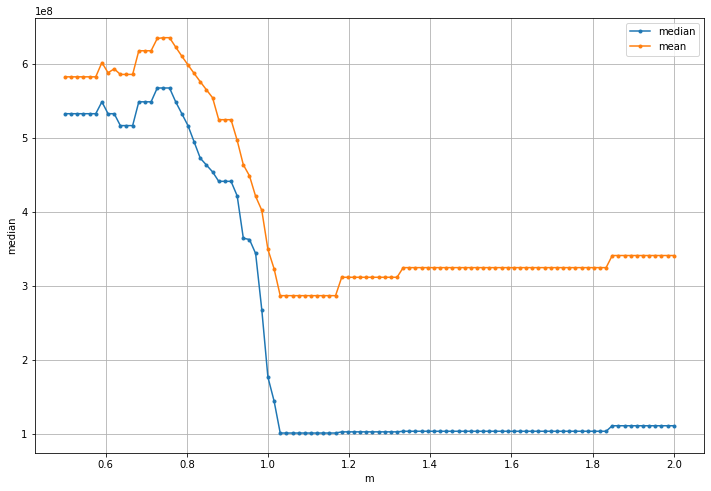

In [4488]:
plt.figure(figsize=(12,8))
plt.plot(res1.keys(), res1.values(), marker='.', label='median')
plt.plot(res2.keys(), res2.values(), marker='.', label='mean')
plt.legend()
plt.xlabel("m")
plt.ylabel('median')
plt.grid()

In [2725]:
def get_medians(data,  start=100):
    medians = []
    for i in range(start,len(data) ):
        medians.append(np.median(reject_outliers(data[:i])))
    return medians

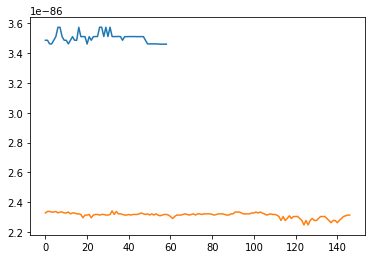

In [2726]:
plt.plot(get_medians(box5, start=700))
plt.plot(get_medians(box6, start=700))


In [2702]:
d1 = {'1':[], '2':[]} 
d2 = {'1':[], '2':[]} 

d1['1'].append(11)
d1['1'].append(12)
d1['2'].append(21)
d2['2'].append(31)


d3 = {'1':[], '2':[]}
dicts =  [d1, d2]
for d in dicts:
    for k in d.keys():
      d3[k].append(d[k])  

print(d3)    

for k in d3.keys():  
  d3[k] = [[item for sublist  in d3[k] for item in sublist ]]


print(d3)    

dicts = [{'1':[55]}]


for d in dicts:
    for k in d.keys():
      d3[k].append(d[k])  

print(d3)    
for k in d3.keys():  
  d3[k] = [[item for sublist  in d3[k] for item in sublist ]]
d3, [len(d3[k][0]) for k in d3.keys()]

{'1': [[11, 12], []], '2': [[21], [31]]}
{'1': [[11, 12]], '2': [[21, 31]]}
{'1': [[11, 12], [55]], '2': [[21, 31]]}


({'1': [[11, 12, 55]], '2': [[21, 31]]}, [3, 2])

In [3225]:
d1 = {1:3, 2:4}
d2 = {1:1, 3:5}
lst = [d1,d2]
d_global_ = {}
def sum_counts(lst, d_global):
    for d in lst:
        for k in d.keys():
            if k  in  d_global:
                d_global[k] += d[k]
            else:
                d_global[k] = d[k]
    return d_global


def max_counts(lst, d_global):
     for d in lst:
        for k in d.keys():
            if k  in  d_global:
                if d_global[k] < d[k]:
                    d_global[k] = d[k]
            else:
                d_global[k] = d[k]
     return d_global


# d_global_ = {}
# d_global_ = sum_counts(lst, d_global_)
# print(d_global_)


d_global_ = max_counts(lst, d_global_)

print(d_global_)

d3 = {5:11, 1:5}
lst = [d3]

d_global_ = max_counts(lst, d_global_)

print(d_global_)


{1: 3, 2: 4, 3: 5}
{1: 5, 2: 4, 3: 5, 5: 11}


In [3236]:
# dict(sorted(d_global_.items()))
# d_global_.keys()

a = np.zeros(10)
a[list(d_global_.keys())] = list(d_global_.values())
# np.array(list(d_global_.items()))
a

array([ 0.,  5.,  4.,  5.,  0., 11.,  0.,  0.,  0.,  0.])

In [2693]:
[el for el in [1,2,3]]

[1, 2, 3]

In [2457]:
t1= np.sum(a, axis=0, dtype=float)
t2 = np.sum(a!=0, axis=0, dtype=float) 
print(t1, t2, np.divide(t1, t2, out=np.zeros_like(t1), where=t2!=0))

[[24. 26.]
 [ 4.  6.]] [[2. 2.]
 [2. 2.]] [[12. 13.]
 [ 2.  3.]]


In [3087]:
def calculate_number_of_contacts(c):
    """
    """
    nc=0
    cc = c.tolist()
    for i in range(c.shape[0]):
        if i == 0: 
            prev_ = []
        else: 
            prev_ = c[i-1, :]
        if i == c.shape[0] - 1: 
            next_ = []
        else: 
            next_ = c[i+1, :]
        
        contacts = [[ c[i][0]+1, c[i][1], c[i][2]],\
                    [ c[i][0]-1, c[i][1], c[i][2]],\
                    [ c[i][0], c[i][1]+1, c[i][2]],\
                    [ c[i][0], c[i][1]-1, c[i][2]],\
                    [ c[i][0], c[i][1], c[i][2]+1],\
                    [ c[i][0], c[i][1], c[i][2]-1]\
                   ]
        
        nc += len([cn  for cn in contacts if ((cn in cc) and (cn not in  [list(prev_), list(next_)])) ])
        
    return nc

In [5185]:
def calculate_number_of_contacts_new(c):
    """
    """
    nc=0
#     cc = c.tolist()
    for i in range(len(c)):
       
        contacts = [[ c[i][0]+1, c[i][1], c[i][2]],\
                    [ c[i][0]-1, c[i][1], c[i][2]],\
                    [ c[i][0], c[i][1]+1, c[i][2]],\
                    [ c[i][0], c[i][1]-1, c[i][2]],\
                    [ c[i][0], c[i][1], c[i][2]+1],\
                    [ c[i][0], c[i][1], c[i][2]-1]\
                   ]
        
        nc += len([cn  for cn in contacts if cn in c]) -2
        
    return nc

In [5186]:
c = np.array([[0,0,0],
              [0,1,0],
              [1,1,0], 
              [1,0,0],
              [1,-1,0],
             [0,-1,0],
             [-1,-1,0],
             [-1,0,0]]).tolist()
# calculate_number_of_contacts(c), 
calculate_number_of_contacts_new(c) #== 3


4

In [5190]:
[tuple(el) for el in c][1][1]

1

In [3142]:
def add_key(k, ncs):
    if k in ncs.keys():
      ncs[k]+=1
    else:
     ncs[k] = 1
    return ncs
    
number_of_contacts = {}


In [3148]:

for i in [1,10,1]:
    number_of_contacts = add_key(i, number_of_contacts)
number_of_contacts

{1: 12, 10: 6}

In [3172]:
d1 = {1: 12, 10: 6}
d2 = {1: 12, 10: 16}

ds = [d1,d2]
res = 
for d in ds:
    for k in d.keys()


None


(136.7542735042735, 11.775204051527513, 153.1818181818182, 7.7497000741750925)

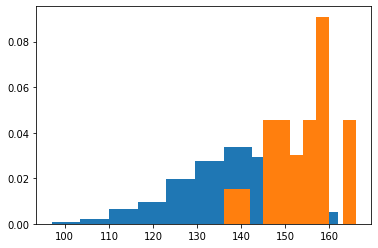

In [1772]:
box1_contacts = [140,135,141,148,149,139,132,126,134,157,132,161,146,127,119,120,141,129,133,126,134,149,149,142,136,158,143,148,140,144,133,121,154,145,155,122,117,131,129,144,126,143,139,145,132,144,121,128,139,136,127,134,153,151,136,142,137,144,127,155,134,134,125,133,132,110,130,155,148,145,129,133,120,112,103,154,112,146,122,157,120,121,134,147,144,138,125,128,158,128,128,148,130,122,146,143,150,144,117,123,154,108,144,108,127,155,137,141,124,132,138,139,128,155,130,140,138,145,132,147,134,136,144,143,125,137,142,144,126,154,112,135,134,134,147,141,142,132,130,145,138,146,155,136,119,130,138,154,130,136,147,145,145,133,151,134,151,136,150,143,147,154,128,131,123,145,133,145,142,141,144,121,145,132,128,148,151,152,137,148,158,138,132,162,147,132,148,156,144,117,122,147,136,138,109,157,140,139,144,152,131,127,132,130,124,111,135,140,122,118,130,135,144,128,110,132,148,158,151,145,128,156,112,122,124,116,152,128,149,123,123,112,121,109,136,133,155,113,143,124,140,142,118,138,139,146,148,123,141,154,141,154,146,145,127,123,130,141,115,138,125,135,125,129,146,146,143,116,135,136,97,132,131,145,126,138,153,135,141,153,138,145,142,151,138,147,150,111,131,138,138,133,129,138,140,134,134,139,109,132,116,130,132,128,125,149,139,143,150,128,144,133,134,140,151,139,142,135,139,145,148,109,138,137,143,137,152,120,152,108,144,124,143,131,156,138,144,146,151,154,127,153,147,114,156,133,128,144,140,145,155,148,151,145,136,143,122,143,139,141,121,150,140,137,127,140,151,113,141,132,131,113,141,131,136,131,133,150,142,148,147,149,126,141,146,133,143,139,112,133,142,125,130,141,149,150,123,135,111,126,149,129,128,149,145,140,120,134,145,131,134,136,125,138,119,132,118,141,129,140,157,141,142,125,134,142,135,137,128,147,139,120,134,114,145,154,138,155,143,134,131,134,143,138,140,144,130,136,126,140,145,144,160,147,155,156,130,152,154,140,136,129,130,151,141,122,137,140]

box0_contacts = [166,151,155,152,148,159,164,166,140,149,155,159,146,145,136,158,158,154,158,148,157,146]
plt.hist(box1_contacts, density=True)
plt.hist(box0_contacts, density=True)
np.mean(box1_contacts), np.std(box1_contacts), np.mean(box0_contacts), np.std(box0_contacts), 

In [1807]:
bins = np.linspace( 2,0,   20)
np.digitize(1.99, bins, right=False), bins, 136*1.1

(1,
 array([2.        , 1.89473684, 1.78947368, 1.68421053, 1.57894737,
        1.47368421, 1.36842105, 1.26315789, 1.15789474, 1.05263158,
        0.94736842, 0.84210526, 0.73684211, 0.63157895, 0.52631579,
        0.42105263, 0.31578947, 0.21052632, 0.10526316, 0.        ]),
 149.60000000000002)

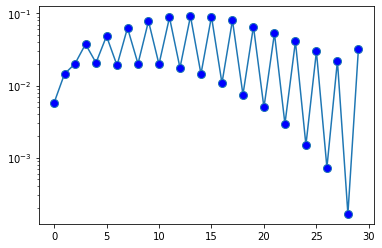

In [634]:
plt.plot(make_p(slurm_32815655),  label='2.0', marker='o', markersize=8, markerfacecolor='blue')
plt.yscale('log')

In [635]:
lst = [1,2,3,4,4,5]
lst.index(4)

3

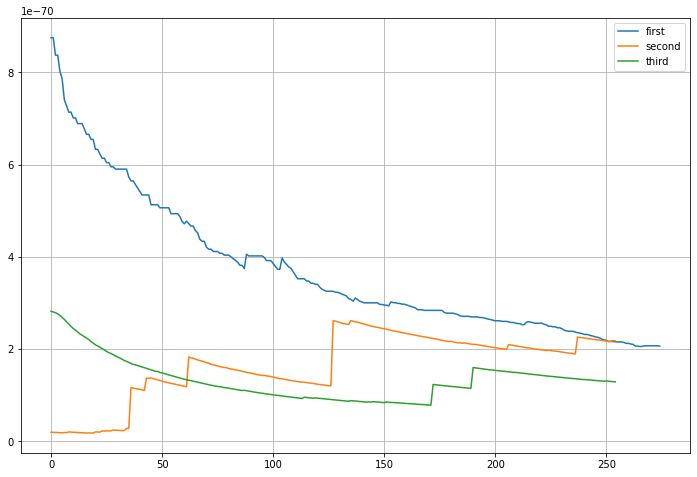

In [80]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(first_box_probs[30:], label='first')
plt.plot(second_box_probs[50:], label = 'second')
plt.plot(third_box_probs[50:], label = 'third')
# plt.xlim(50,300)
# plt.ylim()
plt.legend()

In [613]:
def get_rg(c):
   "radius of gyration"
   r_cm = np.mean(c, axis=0)
   tmp = c -r_cm
   tmp = [np.dot(el, el) for el in tmp]
   return sum(tmp)/len(c)

In [660]:
c = np.array([[1,2,3], [4,5,6],  [7,8,9]])
get_rg(c), c  - np.mean(c, axis=0), 6*1.5**2/2

(18.0,
 array([[-3., -3., -3.],
        [ 0.,  0.,  0.],
        [ 3.,  3.,  3.]]),
 6.75)

In [680]:
np.array([1,2,3]) - np.array([1,2,3])

array([0, 0, 0])

In [685]:
def get_energy_one(c1, c2):
    
    if len(c1) > 0:
        deltas = c1 - c2
        if np.sum(deltas) != 0:
            en = sum([ 1/np.sqrt(np.dot(el,el)) for el in deltas])
        else:
            en = 0.0
    else:
        en = 0.0
    
    return en

In [686]:
c1 = np.array([[1,2,3], [4,5,6]])
c2 = np.array([7,8,9])

print(get_energy_one(c1, c2), 1/np.sqrt(3*36) + 1/np.sqrt(3*9))
print(get_energy_one(c2, c2), 0.0)
print(get_energy_one(np.array([]), c2) , 0.0)

0.28867513459481287 0.28867513459481287
0.0 0.0
0.0 0.0


In [661]:
def get_energy(c):
    
    en = 0
    for i in range(len(c)):
        for j in range(i):
            tmp = c[i] - c[j]
            print(i, j,tmp)
            tmp = np.dot(tmp,tmp)
            en += 1/np.sqrt(tmp)
    return en

In [663]:
get_energy(c), 1/np.sqrt(9*3)+1/np.sqrt(36*3)+1/np.sqrt(9*3)

1 0 [3 3 3]
2 0 [6 6 6]
2 1 [3 3 3]


(0.4811252243246881, 0.4811252243246881)

In [675]:
ar = np.array([[[0, 0, 1, 0, 0],
       [1, 0, 0, 2, 0],
       [0, 1, 1, 0, 0],
       [0, 2, 2, 2, 2]], [[0, 0, 1, 0, 2],
       [1, 0, 0, 2, 0],
       [0, 1, 1, 0, 0],
       [0, 2, 2, 2, 2]]])

t1 = ar.sum(axis=0, dtype=float)
t2 = (ar !=0).sum(axis=0, dtype=float)
t1/ t2, ar.shape, np.divide(t1, t2, out=np.zeros_like(t1), where=t2!=0)

/var/folders/zr/t79_wh252w1d3vc6snt72_lh0000gn/T/ipykernel_12478/1602394961.py:11: RuntimeWarning: invalid value encountered in true_divide
  t1/ t2, ar.shape, np.divide(t1, t2, out=np.zeros_like(t1), where=t2!=0)


(array([[nan, nan,  1., nan,  2.],
        [ 1., nan, nan,  2., nan],
        [nan,  1.,  1., nan, nan],
        [nan,  2.,  2.,  2.,  2.]]),
 (2, 4, 5),
 array([[0., 0., 1., 0., 2.],
        [1., 0., 0., 2., 0.],
        [0., 1., 1., 0., 0.],
        [0., 2., 2., 2., 2.]]))

In [544]:
slurm_31940830 = \
[ 0, 7.8 , 61.9 ,257.6, 506.,  636.1 ,578. , 418.4 ,260.5, 149.6 , 76.6 , 38.5 , 17.5,
   8.5  , 4.6]

slurm_31940866 = \
[  0, 7.3  ,65.5, 264.6 ,520.8 ,644.6, 589.9, 429.7, 262.7 ,144.2,  80.4  ,38.4 , 20.,
   8.2  , 4.8]

slurm_31941843 = \
 [4.30000e+00, 8.08700e+02, 7.82090e+03 ,3.15061e+04, 6.28006e+04, 7.81512e+04,
 7.09899e+04, 5.16862e+04 ,3.23351e+04, 1.80913e+04 ,9.40870e+03, 4.65780e+03,
 2.24370e+03, 1.08070e+03, 6.67900e+02]

slurm_31942231=\
[0.000000e+00 ,3.582960e+04 ,3.431282e+05, 3.052046e+05 ,1.356006e+05,
 1.755762e+05 ,5.227540e+04 ,1.883150e+04 ,6.206060e+04 ,5.220700e+03,
 1.488900e+03, 1.518840e+04 ,1.500000e+00 ,4.274000e+02 ,2.000000e+00]


slurm_31976069 = \
[   0.  ,  10.7 , 104.9,  428.9 , 853.2, 1063.2 , 942.1 , 690.6 , 439.3, 244.5,
  126.6  , 61.7 ,  30.,    15.8 ,   8.4]

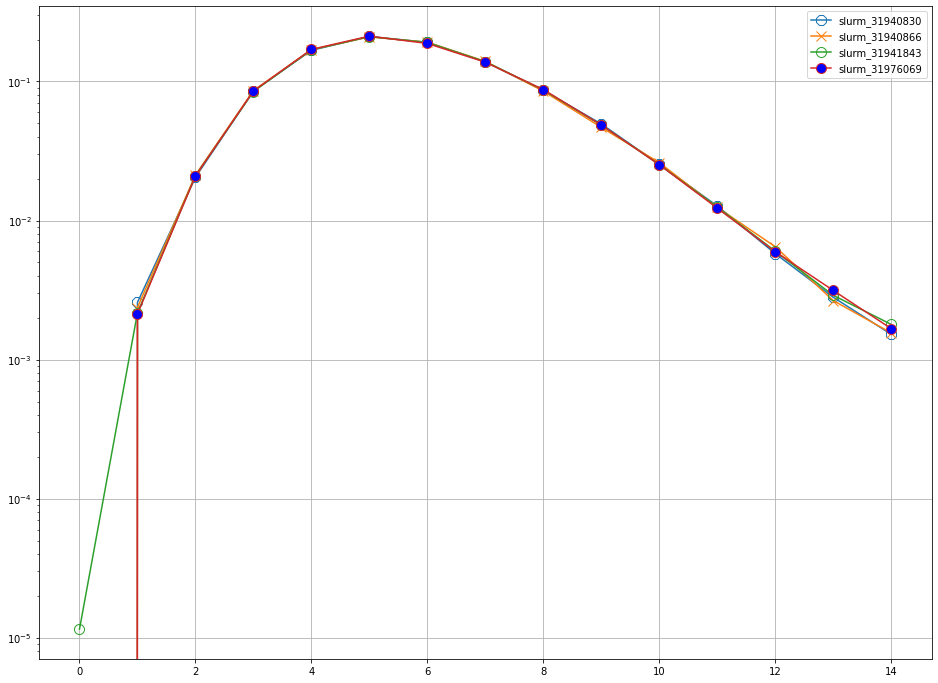

In [547]:
plt.figure(figsize=(16,12))
plt.plot(make_p_urw(slurm_31940830), label='slurm_31940830', marker='8', markersize=10, markerfacecolor='none')
plt.plot(make_p_urw(slurm_31940866), label='slurm_31940866', marker='x', markersize=10, markerfacecolor='none')
plt.plot(make_p_urw(slurm_31941843), label='slurm_31941843', marker='o', markersize=10, markerfacecolor='none')

# plt.plot(make_p_urw(slurm_31942231), label='slurm_31942231', marker='o', markersize=10, markerfacecolor='blue')
plt.plot(make_p_urw(slurm_31976069), label='slurm_31976069', marker='o', markersize=10, markerfacecolor='blue')

slurm_31976069
plt.legend()
plt.yscale('log')
plt.grid()      

In [483]:
# bias exists but not taken into account 
slurm_31959480 = [88.41914062, 92.44179687 ,93.87304687 ,94.38203125, 94.25898437, 93.8984375,
 93.41367187, 92.9109375 , 92.36914062 ,91.825     , 91.18476562 ,90.41445312,
 89.54960937 ,88.36523437 ,87.60664062]

slurm_31963045 =\
[61.05976563 ,64.59179687, 66.23476562, 67.02304687, 67.1703125  ,66.9546875,
 66.54960937 ,66.11953125 ,65.62226562 ,65.0875   ,  64.59023437, 64.00078125,
 63.51210938, 62.48710938, 62.11601563]


slurm_31965216 = \
[ 93.7375 , 99.4875, 101.2625, 102.0625 ,102.2  ,  101.875,  101.575 , 101.15,
 100.8  ,  100.125,   99.7625 , 98.9625 , 98.7125 , 98.725  , 98.0375]

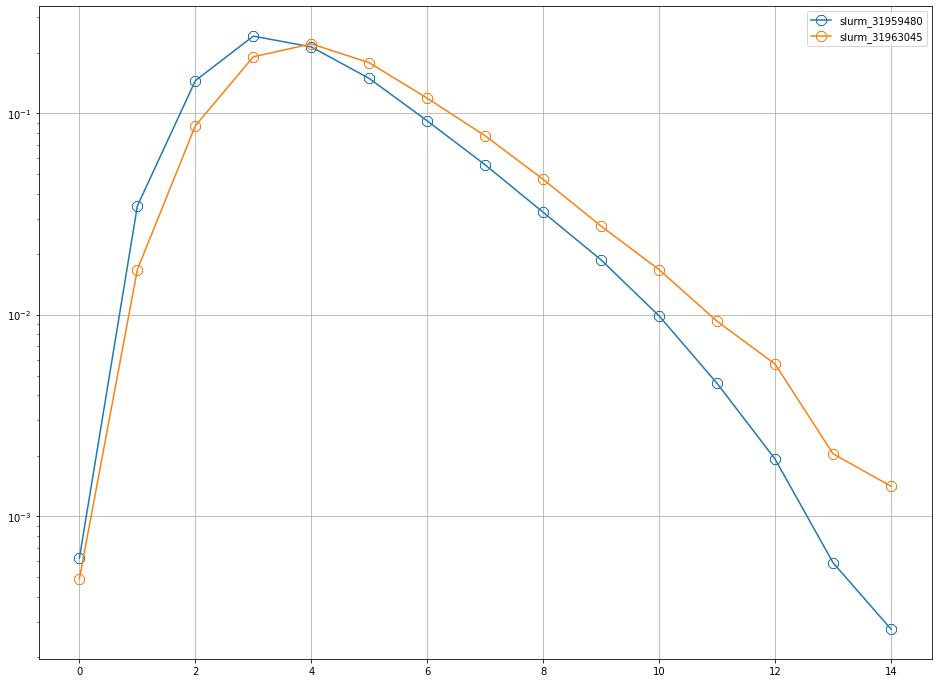

In [482]:
plt.figure(figsize=(16,12))
plt.plot(make_p(slurm_31959480), label='slurm_31959480', marker='8', markersize=10, markerfacecolor='none')
plt.plot(make_p(slurm_31963045), label='slurm_31963045', marker='8', markersize=10, markerfacecolor='none')
plt.plot(make_p(slurm_31965216), label='slurm_31965216', marker='8', markersize=10, markerfacecolor='none')

plt.legend()
plt.yscale('log')
plt.grid()      

In [495]:
box10 = np.array([[ 1,  0,  0],
       [ 1, -1,  0],
       [ 1, -2,  0],
       [ 2, -2,  0],
       [ 2, -3,  0],
       [ 2, -4,  0],
       [ 1, -4,  0],
       [ 1, -4,  1],
       [ 1, -4,  2],
       [ 0, -4,  2],
       [ 0, -5,  2],
       [ 0, -5,  1],
       [ 0, -4,  1],
       [-1, -4,  1],
       [-1, -4,  2],
       [-1, -3,  2],
       [-1, -3,  1],
       [-2, -3,  1],
       [-2, -3,  0],
       [-2, -2,  0],
       [-2, -1,  0],
       [-2, -1,  1],
       [-3, -1,  1],
       [-3, -1,  0],
       [-3,  0,  0],
       [-3,  1,  0],
       [-3,  1, -1],
       [-4,  1, -1],
       [-4,  1,  0],
       [-4,  2,  0],
       [-3,  2,  0],
       [-3,  3,  0],
       [-2,  3,  0],
       [-2,  3,  1],
       [-2,  2,  1],
       [-2,  2,  0],
       [-1,  2,  0],
       [ 0,  2,  0],
       [ 0,  1,  0],
       [ 1,  1,  0],
       [ 2,  1,  0],
       [ 2,  1, -1],
       [ 1,  1, -1],
       [ 1,  0, -1],
       [ 1,  0, -2],
       [ 1, -1, -2],
       [ 0, -1, -2],
       [ 0,  0, -2],
       [ 0,  0, -3],
       [ 0, -1, -3],
       [ 0, -1, -4],
       [ 0, -2, -4],
       [ 0, -2, -3],
       [-1, -2, -3],
       [-1, -2, -2],
       [-1, -2, -1],
       [-2, -2, -1],
       [-3, -2, -1],
       [-3, -3, -1],
       [-2, -3, -1],
       [-2, -4, -1],
       [-2, -4,  0],
       [-1, -4,  0],
       [-1, -3,  0],
       [-1, -2,  0],
       [-1, -2,  1],
       [-2, -2,  1],
       [-3, -2,  1],
       [-3, -3,  1],
       [-3, -3,  2],
       [-3, -2,  2],
       [-3, -2,  3],
       [-3, -1,  3],
       [-3,  0,  3],
       [-3,  0,  4],
       [-3,  0,  5],
       [-2,  0,  5],
       [-2,  0,  6],
       [-2, -1,  6],
       [-1, -1,  6],
       [-1, -2,  6],
       [-1, -3,  6],
       [-1, -3,  7],
       [ 0, -3,  7],
       [ 1, -3,  7],
       [ 1, -4,  7],
       [ 2, -4,  7],
       [ 2, -3,  7],
       [ 2, -3,  8],
       [ 1, -3,  8],
       [ 1, -4,  8],
       [ 1, -4,  9],
       [ 2, -4,  9],
       [ 2, -3,  9],
       [ 3, -3,  9],
       [ 3, -2,  9],
       [ 3, -1,  9],
       [ 3, -1,  8],
       [ 2, -1,  8],
       [ 1, -1,  8],
       [ 0, -1,  8],
       [ 0, -1,  9],
       [ 0, -1, 10],
       [ 0,  0, 10],
       [ 1,  0, 10],
       [ 1, -1, 10],
       [ 1, -1, 11],
       [ 1,  0, 11],
       [ 0,  0, 11],
       [ 0,  0, 12],
       [-1,  0, 12],
       [-1, -1, 12],
       [-1, -1, 11],
       [-2, -1, 11],
       [-2, -1, 10],
       [-2, -1,  9],
       [-2,  0,  9],
       [-1,  0,  9],
       [ 0,  0,  9],
       [ 1,  0,  9],
       [ 1, -1,  9],
       [ 2, -1,  9],
       [ 2, -2,  9],
       [ 1, -2,  9],
       [ 1, -2,  8],
       [ 1, -2,  7],
       [ 1, -2,  6],
       [ 0, -2,  6],
       [ 0, -2,  5],
       [ 0, -1,  5],
       [ 0,  0,  5],
       [ 0,  0,  4],
       [ 0,  0,  3],
       [ 0,  0,  2],
       [ 0,  0,  1],
       [ 0,  0,  0]])

In [499]:
box0 = np.array([[ 0,  1,  0],
       [ 0,  1, -1],
       [ 0,  1, -2],
       [ 1,  1, -2],
       [ 1,  0, -2],
       [ 0,  0, -2],
       [ 0,  0, -1],
       [ 1,  0, -1],
       [ 1,  1, -1],
       [ 2,  1, -1],
       [ 2,  1,  0],
       [ 3,  1,  0],
       [ 4,  1,  0],
       [ 4,  1, -1],
       [ 4,  0, -1],
       [ 3,  0, -1],
       [ 3,  1, -1],
       [ 3,  2, -1],
       [ 2,  2, -1],
       [ 2,  3, -1],
       [ 2,  3,  0],
       [ 1,  3,  0],
       [ 1,  3, -1],
       [ 1,  2, -1],
       [ 0,  2, -1],
       [ 0,  3, -1],
       [ 0,  3, -2],
       [ 0,  2, -2],
       [ 0,  2, -3],
       [ 0,  3, -3],
       [ 0,  4, -3],
       [ 0,  4, -2],
       [ 1,  4, -2],
       [ 1,  3, -2],
       [ 1,  3, -3],
       [ 2,  3, -3],
       [ 2,  2, -3],
       [ 2,  1, -3],
       [ 2,  0, -3],
       [ 2,  0, -4],
       [ 2,  1, -4],
       [ 1,  1, -4],
       [ 1,  0, -4],
       [ 1,  0, -3],
       [ 0,  0, -3],
       [-1,  0, -3],
       [-1,  1, -3],
       [-1,  1, -2],
       [-1,  1, -1],
       [-2,  1, -1],
       [-2,  2, -1],
       [-1,  2, -1],
       [-1,  2,  0],
       [ 0,  2,  0],
       [ 0,  3,  0],
       [ 0,  4,  0],
       [ 0,  5,  0],
       [ 0,  5,  1],
       [ 0,  4,  1],
       [ 1,  4,  1],
       [ 1,  3,  1],
       [ 2,  3,  1],
       [ 3,  3,  1],
       [ 3,  4,  1],
       [ 2,  4,  1],
       [ 2,  4,  0],
       [ 2,  5,  0],
       [ 1,  5,  0],
       [ 1,  4,  0],
       [ 1,  4, -1],
       [ 2,  4, -1],
       [ 2,  4, -2],
       [ 2,  3, -2],
       [ 2,  2, -2],
       [ 3,  2, -2],
       [ 3,  1, -2],
       [ 3,  0, -2],
       [ 3,  0, -3],
       [ 3,  0, -4],
       [ 3,  0, -5],
       [ 2,  0, -5],
       [ 1,  0, -5],
       [ 1,  0, -6],
       [ 0,  0, -6],
       [ 0,  1, -6],
       [ 0,  1, -5],
       [ 0,  1, -4],
       [ 0,  1, -3],
       [ 1,  1, -3],
       [ 1,  2, -3],
       [ 1,  2, -4],
       [ 2,  2, -4],
       [ 2,  3, -4],
       [ 2,  4, -4],
       [ 1,  4, -4],
       [ 1,  4, -3],
       [ 2,  4, -3],
       [ 3,  4, -3],
       [ 3,  3, -3],
       [ 3,  3, -2],
       [ 3,  3, -1],
       [ 3,  4, -1],
       [ 3,  4, -2],
       [ 3,  5, -2],
       [ 3,  6, -2],
       [ 2,  6, -2],
       [ 2,  5, -2],
       [ 1,  5, -2],
       [ 0,  5, -2],
       [ 0,  6, -2],
       [ 0,  6, -3],
       [-1,  6, -3],
       [-1,  6, -2],
       [-1,  6, -1],
       [-1,  5, -1],
       [-1,  4, -1],
       [ 0,  4, -1],
       [ 0,  5, -1],
       [ 0,  6, -1],
       [ 0,  6,  0],
       [ 1,  6,  0],
       [ 1,  6, -1],
       [ 2,  6, -1],
       [ 2,  6,  0],
       [ 2,  6,  1],
       [ 3,  6,  1],
       [ 3,  6,  0],
       [ 3,  5,  0],
       [ 3,  4,  0],
       [ 3,  3,  0],
       [ 3,  2,  0],
       [ 2,  2,  0],
       [ 1,  2,  0],
       [ 1,  1,  0],
       [ 1,  0,  0],
       [ 0,  0,  0]])

In [539]:
len([el for el in np.diff(np.diff(box0,  axis=0), axis=0) if np.all(el ==0 )])

32

In [541]:
tmp = np.count_nonzero(np.diff(np.diff(box0,  axis=0), axis=0), axis=1)
print(tmp[tmp != 0].shape, box0.shape)
tmp = np.count_nonzero(np.diff(np.diff(box10,  axis=0), axis=0), axis=1)
print(tmp[tmp != 0].shape)

(102,) (136, 3)
(105,)


In [500]:
sum(np.average(np.abs(box10), axis=1))/len(box10), sum(np.average(np.abs(box0), axis=1))/len(box0), 

(2.4264705882352935, 1.9705882352941178)

In [502]:
import ipyvolume as ipv
# x, y, z, u, v = ipv.examples.klein_bottle(draw=False)

x10 = box10[:,0] #np.array([el[0] for el in sv[:]], dtype='float')
y10 = box10[:,1]# np.array([el[1] for el in sv], dtype='float')
z10 = box10[:,2]# np.array([el[2] for el in sv], dtype='float')

x0 = box0[:,0] #np.array([el[0] for el in sv[:]], dtype='float')
y0 = box0[:,1]# np.array([el[1] for el in sv], dtype='float')
z0 = box0[:,2]# np.array([el[2] for el in sv], dtype='float')
ipv.figure()

s = ipv.plot(x10,y10,z10)
ipv.plot(x0,y0,z0, color='blue')

# x = aggregated['x']
# y = aggregated['area']
# z = aggregated['en_mean']
# m = ipv.plot_mesh(x, y, z, wireframe=False)
# ipv.scatter(x,y,z, size=1, marker="sphere")
ipv.squarelim()
ipv.animation_control(s,interval=2000)
ipv.show()

In [296]:
def f(x, counter):
    if counter < 1:
        return 9000
    return (x+f(x, counter-1))**.5

In [297]:

for i in range(1, 20):
    print(f(20, i))

94.97368056467013
10.722578074542994
5.542795149971086
5.053988044106465
5.005395892844687
5.000539560171951
5.000053955726073
5.000005395569696
5.0000005395569405
5.000000053955693
5.000000005395569
5.000000000539557
5.000000000053956
5.000000000005396
5.00000000000054
5.000000000000054
5.000000000000005
5.000000000000001
5.0


In [840]:
print(arr1/np.sum(arr1))
print(arr2/np.sum(arr2))

[0.16143392 0.30253303 0.13400826 0.13400826 0.13400826 0.13400826]
[0.11978155 0.22447499 0.16393586 0.16393586 0.16393586 0.16393586]


In [662]:
arr = np.array([0, 0.1, 0.2, 0, 0.4, 0])
print(arr)
print(np.cumsum(arr))
for i in range(10):
    rnd = np.random.random()*sum(arr)
    ind = np.argmax(rnd  < np.cumsum(arr))
    print(ind, rnd)

[0.  0.1 0.2 0.  0.4 0. ]
[0.  0.1 0.3 0.3 0.7 0.7]
4 0.5604743164985775
4 0.6481400661630968
4 0.3323440596046425
2 0.28426227450700375
4 0.6509889471883662
4 0.362461532505157
4 0.39090203214559766
2 0.11327882778207067
4 0.5596819816248423
1 0.09251225555568034


In [345]:
# from chromosome_segregation.consts import caches

In [2757]:
GROW_CACHES_FOLDER = os.path.join(os.path.dirname(consts.__file__), 'grow_caches.txt.gz')

consts.caches = get_grow_caches(fname = GROW_CACHES_FOLDER ,
                params=(50, 40,40,40))

In [2758]:
consts.caches.shape

(167, 80, 80, 80)

In [838]:
# print(consts.caches)[10, :, :, :]

In [70]:
alpha = 1.5
n=100
ratio = []
for i in range(10000):
    coords_n, w_n, k_n, prob = regrow_saw(n, 0, 0, 0, [], w=1, alpha=alpha, k=0, prob=1)
    # len(coords_n), consts.caches[n-1, 0, 0, 0], w_n, prob
    if len(coords_n) == n:
#         if prob >1:print(prob)
#         if w_n >1: print(w_n)
#         prob1 = np.exp(-alpha*k_n)/w_n/consts.caches[n-1, 0, 0, 0] 
        try:
            prob1 = np.exp(-alpha*k_n)/ w_n/consts.caches[n-1, 0, 0, 0]

            if prob/prob1 > 1.1: print(prob, prob1, w_n)
            ratio.append(prob/prob1)
        except:
            pass

2.541534269247188e-59 2.268444852388645e-59 3.532725208524436e-40
7.304003244534747e-57 6.598846784880908e-57 9.840572726850786e-39
1.500368070077004e-60 1.3511460656924976e-60 3.2804027537264077e-42
5.697561135268579e-59 5.021740800271409e-59 3.205289317452182e-39
1.363720000239904e-59 1.237519584555914e-59 6.475689285399568e-40
2.9153767210464403e-62 2.5995847569501707e-62 2.1041425070168534e-44
3.3840970869507057e-56 3.01670883406945e-56 4.3235299404426897e-38
1.2994687096880969e-58 1.15978929963906e-58 3.096711224840651e-40
1.3696231954618787e-59 1.2309126434189717e-59 3.2413610174948965e-41
2.3132568203716867e-59 2.060613587553667e-59 8.677603473353108e-41
3.2481916276369216e-61 2.9422682462535092e-61 1.506423923185139e-41
4.3533183623040045e-59 3.946601146603551e-59 4.530781540967949e-41
1.1969327399068664e-62 1.0699225241221508e-62 1.0268576594866482e-42
8.088580332725948e-61 7.348410352117276e-61 3.002981265128353e-43
2.3157547380956366e-59 2.0746695128736666e-59 9.574635872782

7.64362410138713e-58 6.830648660381614e-58 4.7330710820525745e-39
1.6085278196181935e-56 1.4441335731773526e-56 4.4965668623778526e-39
1.0794769398169315e-60 9.611488530970007e-61 9.262372918572624e-41
1.5149786212047723e-58 1.3266130656158373e-58 2.707294715942739e-40
8.553688440615544e-58 7.692972479027677e-58 9.37711134320744e-40
1.4875380462228376e-58 1.3343791614891715e-58 1.2062637522127054e-39
8.848577993141255e-61 8.033056456928726e-61 5.517580136961804e-42
1.2580000641745654e-56 1.1236759046912592e-56 1.1607288997872449e-37
1.0226243286650375e-57 9.262494176489904e-58 1.7377751430040278e-40
1.2253805868193341e-64 1.1049734531518545e-64 1.2270447339668683e-44
4.391500389476119e-60 3.909855487194491e-60 5.643978067260399e-44
3.6646498541408705e-59 3.2523827717900957e-59 1.226741296542985e-41
3.7411617190964817e-60 3.302067753409996e-60 1.2082829779006229e-40
2.8448238185826943e-61 2.4988529044200522e-61 7.949329513150407e-41
1.9041430119585095e-54 1.701448056033485e-54 1.3859953

6.885771149957837e-57 6.254428618461012e-57 1.0382472270655567e-38
1.1493286085225361e-64 1.0416463465517893e-64 1.3016431741459174e-44
1.3176143888615037e-59 1.1904087335760294e-59 6.7319670027177525e-40
1.1759171590688774e-54 1.0536265882822598e-54 2.2381735477089206e-36
1.3709281428819635e-61 1.2333905443529824e-61 1.789144461737341e-42
1.9028491029735545e-62 1.660958654549203e-62 1.4759173313636516e-43


(array([1.000e+00, 1.700e+01, 3.200e+01, 3.100e+01, 7.100e+01, 1.210e+02,
        2.110e+02, 3.050e+02, 5.930e+02, 1.204e+03, 2.911e+03, 2.510e+03,
        7.740e+02, 3.300e+02, 3.700e+02, 2.560e+02, 1.180e+02, 1.010e+02,
        3.200e+01, 1.200e+01]),
 array([0.91707341, 0.92850139, 0.93992937, 0.95135735, 0.96278533,
        0.97421331, 0.9856413 , 0.99706928, 1.00849726, 1.01992524,
        1.03135322, 1.0427812 , 1.05420918, 1.06563716, 1.07706515,
        1.08849313, 1.09992111, 1.11134909, 1.12277707, 1.13420505,
        1.14563303]),
 <BarContainer object of 20 artists>)

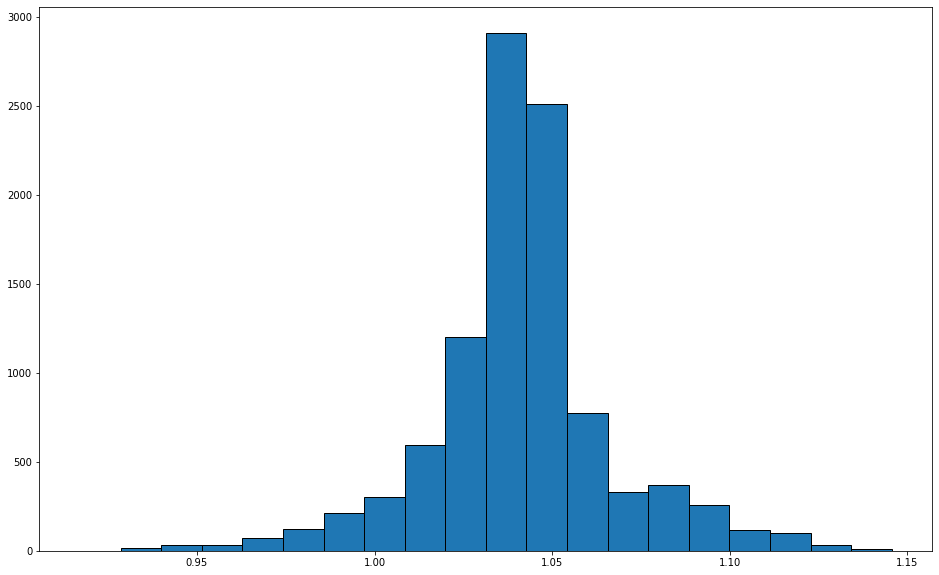

In [71]:
plt.figure(figsize=(16,10))
plt.hist(ratio, bins=20, edgecolor='black')
# vals, bins = np.histogram(ratio, bins=20)
# bins = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
# print(bins, vals)
# plt.bar(bins, vals,width=0.0001)
# plt.plot(ratio)
# plt.yscale('log')

In [82]:
arr = np.array([.2,.1,.4])
arr = arr/np.sum(arr)
arr = np.cumsum(arr)
for i in range(10):
    rn  = np.random.random()
    print(rn,  np.argmax(arr > rn), arr)

0.8036154110633723 2 [0.28571429 0.42857143 1.        ]
0.3603029460861631 1 [0.28571429 0.42857143 1.        ]
0.519773486869391 2 [0.28571429 0.42857143 1.        ]
0.09911013277381331 0 [0.28571429 0.42857143 1.        ]
0.946461153667089 2 [0.28571429 0.42857143 1.        ]
0.022057393980231432 0 [0.28571429 0.42857143 1.        ]
0.5838508492135163 2 [0.28571429 0.42857143 1.        ]
0.11332458748825791 0 [0.28571429 0.42857143 1.        ]
0.9207683009525403 2 [0.28571429 0.42857143 1.        ]
0.5720855928034672 2 [0.28571429 0.42857143 1.        ]


# when using SAW 
i can not utilize $W$ etc. since $const.caches$ is calculated for phantom chains.

In [210]:
consts.caches[1, 0, 0, 0],consts.caches[3, 0, 0, 0]

(5.757013054466949, 89.66775485794864)

In [209]:
aux.n_conf(2, 0,0,0), aux.n_conf(4, 0,0,0)

(6.0, 90.0)

In [278]:
for x in np.arange(10, 200, 10):
#     print(x, type(x), np.log(np.math.factorial(x))/x)
    print(x, ffx(int(x), 2))

10 1.1520893634619407
20 1.0563205327631493
30 0.9851302880861104
40 0.9382437324672823
50 0.905288316324885
60 0.8808114524884751
70 0.8618587075801987
80 0.8467090882083261
90 0.8342941843259113
100 0.8239152825909497
110 0.8150956372152325
120 0.807498376218255
130 0.800878404180553
140 0.7950529322045297
150 0.7898827189563882
160 0.7852597319611472
170 0.7810987979701962


OverflowError: int too large to convert to float

In [280]:
-np.log(2) + 0.2476, np.log(2)

1 + 4*108

433

In [592]:
-np.log(2)

-0.6931471805599453

In [38]:
chunk_size = 100
intervals = map(lambda p: [p*chunk_size, p*chunk_size+chunk_size], range(10))
list(intervals)[-1]

[900, 1000]

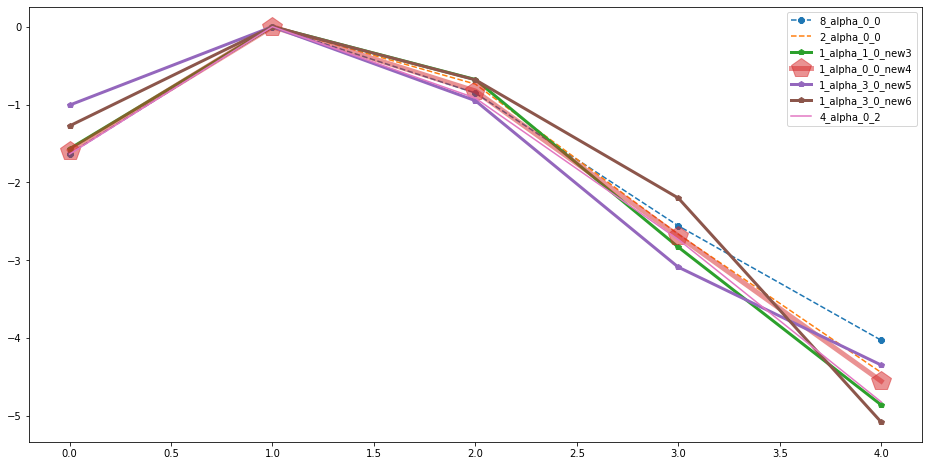

In [162]:
plt.figure(figsize=(16,8))
proc4_alpha_0_2 = np.array([25.98515625, 27.6221875,  26.70544922, 24.88957031, 22.80285156])
# proc8_alpha_0_2 = np.array([32.68750977, 34.67263672, 33.89686523, 31.33350586, 30.2678125 ])
proc8_alpha_0_0 = np.array([1.26090652, 1.46509827, 1.35860046, 1.14543121, 0.9616925 ])
# proc8_alpha_0_0 = np.array([13.17981842, 14.76596756, 13.92884445, 12.12679977,  9.97361633])
proc8_alpha_0_0_new = np.array([12.4429158 , 13.98696091, 13.17330017, 11.41492813,  9.36020874])

proc1_alpha_1_0_new1 = np.array([21.14790039 ,22.96213867 ,21.92001953 ,20.22407227 ,18.01875   ])
proc1_alpha_1_0_new2 = np.array([23.37382812, 24.87707397, 23.91280762, 22.02703735, 19.81866577])
proc1_alpha_1_0_new3 = np.array([22.35175781, 23.91974976, 23.24122559, 21.0888208 , 19.06197876])

proc1_alpha_3_0_new5 = np.array([21.20613281, 22.21371094, 21.26339844, 19.12554688, 17.86808594])
proc1_alpha_3_0_new6 = np.array([35.8253125,  37.09992187, 36.4178125,  34.89953125, 32.02203125])

proc1_alpha_0_0_new4 = np.array([12.14165894, 13.73306396, 12.90712891, 11.04465942,  9.18041138])


proc1_alpha_0_0 = np.array([12.56412598, 14.15196777, 13.35653076, 11.43028687,  9.51889282])
proc2_alpha_0_0 = np.array([5.98864136, 6.77591187, 6.40724731, 5.4433667 , 4.5550824 ])


proc4_1 = np.array([25.69445543, 27.27842417, 26.40744147, 24.63643112, 22.59418583])

proc8 = np.array([40.50803187, 42.12044296, 41.2482821 , 39.44162464, 37.17874684])
proc8_1 = np.array([46.57224524, 48.16670544, 47.30267458, 45.52153571, 43.52058511])

proc1 = np.array([136.46065674, 138.04465179, 137.19747772, 135.45626221,
       133.51079254])
proc1_1 = np.array([27.71815624, 29.29955196, 28.44232235, 26.61993008, 24.61565514])



# plt.plot(proc4_1 - np.min(proc4_1), label='4_1')
# plt.plot(proc8_alpha_0_2 - np.max(proc8_alpha_0_2), label='8_alpha_0_2',  linestyle='dashed')
plt.plot((proc8_alpha_0_0 - np.max(proc8_alpha_0_0))*8, label='8_alpha_0_0', marker='8', linestyle='dashed')
# plt.plot(proc1_alpha_0_0 - np.min(proc1_alpha_0_0), label='1_alpha_0_0')
plt.plot((proc2_alpha_0_0 - np.max(proc2_alpha_0_0))*2, label='2_alpha_0_0', linestyle='dashed')

# plt.plot((proc8_alpha_0_0_new - np.min(proc8_alpha_0_0_new)), label='2_alpha_0_0_new', marker='p', lw=5)


# plt.plot((proc1_alpha_1_0_new1 - np.min(proc1_alpha_1_0_new1)), label='1_alpha_1_0_new1', marker='p', lw=2)
# plt.plot((proc1_alpha_1_0_new2 - np.min(proc1_alpha_1_0_new2)), label='1_alpha_1_0_new2', marker='p', lw=2)
plt.plot((proc1_alpha_1_0_new3 - np.max(proc1_alpha_1_0_new3)), label='1_alpha_1_0_new3', marker='p', lw=3)
plt.plot((proc1_alpha_0_0_new4 - np.max(proc1_alpha_0_0_new4)),alpha=0.5, label='1_alpha_0_0_new4', marker='p', lw=5, markersize=20)
plt.plot((proc1_alpha_3_0_new5 - np.max(proc1_alpha_3_0_new5)), label='1_alpha_3_0_new5', marker='p', lw=3)
plt.plot((proc1_alpha_3_0_new6 - np.max(proc1_alpha_3_0_new6)),  label='1_alpha_3_0_new6', marker='p', lw=3)


plt.plot(proc4_alpha_0_2 - np.max(proc4_alpha_0_2), label='4_alpha_0_2')
# plt.plot(proc8_1 - np.min(proc8_1), label='8_1')

# plt.plot(proc1 - np.min(proc1), label='1', marker='d')
# plt.plot(proc1_1 - np.min(proc1_1), label='1_1', marker='d', lw=5)

# plt.plot(proc2 - np.min(proc2))
plt.legend()
# plt.yscale('log')

# box 7,4,4; N=44

In [186]:
n_proc_4_alpha_0 = np.array([131.77946472, 134.78556061, 135.11271515, 133.86490479,
       131.6701828 , 129.23995361]) #run_48
n_proc_4_alpha_3 = np.array([88.64597168, 91.38131103, 91.74509277, 90.30292969, 87.64211426, 84.54455566])
n_proc_1_alpha_3 = np.array([130.7463623,  134.07564087, 134.21038818, 132.76038208, 130.1947876,
 126.3098877 ])
n_proc_1_alpha_0  = np.array([186.18646393, 189.23771667, 189.59927368, 188.31463623,
       185.8973938 , 183.11766205]) #run_49


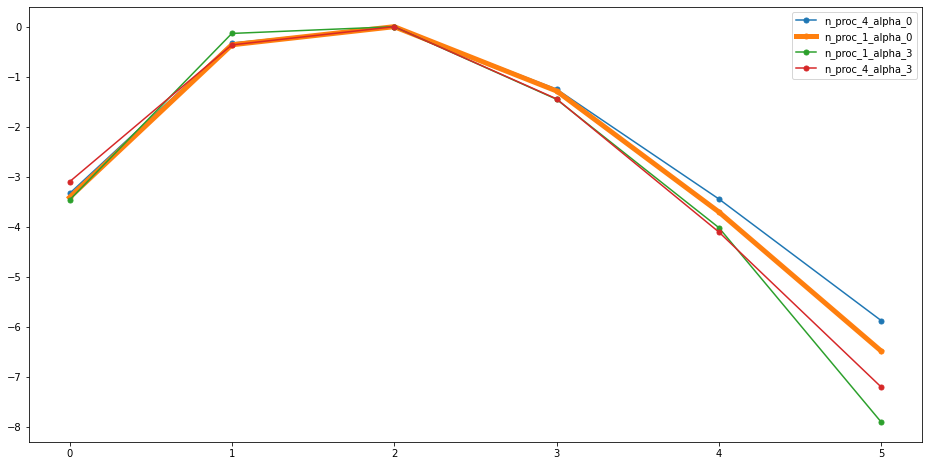

In [190]:
plt.figure(figsize=(16,8))

plt.plot(n_proc_4_alpha_0 - np.max(n_proc_4_alpha_0), marker='.', markersize=10, label='n_proc_4_alpha_0')
plt.plot(n_proc_1_alpha_0 - np.max(n_proc_1_alpha_0), marker='.', markersize=10,lw=5,  label='n_proc_1_alpha_0')
plt.plot(n_proc_1_alpha_3 - np.max(n_proc_1_alpha_3), marker='.', markersize=10, label='n_proc_1_alpha_3')
plt.plot(n_proc_4_alpha_3 - np.max(n_proc_4_alpha_3), marker='.', markersize=10, label='n_proc_4_alpha_3')

plt.legend()
plt.show()

# 24,4,4,  20 cores

In [191]:
s1 = np.array([150.8346875, 194.1559375, 204.0015625, 206.595625,  212.7878125, 211.18375,
 212.9696875, 212.4328125 ,211.3140625 ,210.69  ,    211.0559375])

s2 = np.array([179.88859375, 224.62765625, 235.60078125, 240.74671875, 243.46140625,
 245.405625  , 246.78203125, 245.915  ,    245.339375 ,  244.6990625,
 244.42453125])

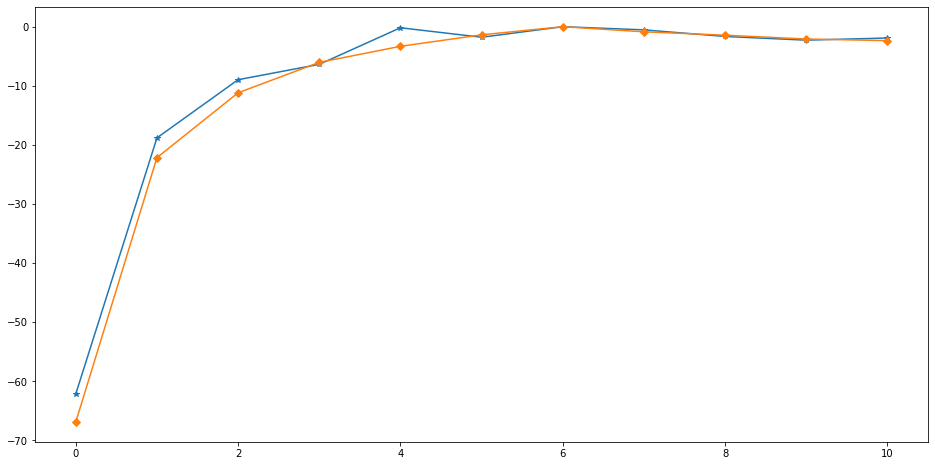

In [194]:
plt.figure(figsize=(16,8))
plt.plot(s1 - np.max(s1), marker='*')
plt.plot(s2 - np.max(s2), marker='D')

plt.show()

In [197]:
np.log(6),  np.log(2)

(1.791759469228055, 0.6931471805599453)

In [85]:
alphas = np.array([np.array([1,2,3]),np.array([4,5,6])])
alphas#.max(axis=0)

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
s_25 = np.array([1025.22973786, 1405.10374603, 1430.25453186, 1441.7746933 ,
       1445.7907547 , 1447.79697876, 1448.81334992, 1449.01860504,
       1448.80912323, 1448.12515564, 1447.15935059, 1446.15156708])
omega_25 = np.exp(s_25 - np.min(s_25))
omega_25 = omega_25/np.sum(omega_25)
omega_25
n_conformations_total = 1.036164e+121
n=160
specific_excess_entropy = -0.257
saw_fraction = np.exp(specific_excess_entropy * n)
n_saws = saw_fraction * n_conformations_total
n_saws, np.cumsum(omega_25), -np.log(n_saws*np.cumsum(omega_25))/n

(1.4362809603961773e+103,
 array([2.49260507e-185, 2.36504300e-020, 1.98009735e-009, 1.99449705e-004,
        1.12652389e-002, 9.35414777e-002, 3.20883028e-001, 6.00021683e-001,
        8.26404359e-001, 9.40639530e-001, 9.84126189e-001, 1.00000000e+000]),
 array([ 1.1721037 , -1.20210885, -1.35930126, -1.43130233, -1.4565143 ,
        -1.46974357, -1.47744777, -1.48135958, -1.48336032, -1.48416954,
        -1.484452  , -1.48455201]))

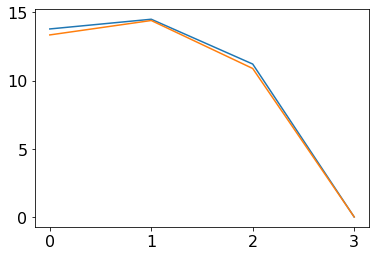

In [870]:
s1 = np.array([120.39619904, 121.10791321, 117.82322083, 106.61642151])
s2 = np.array([140.51234894, 141.56948395, 138.05189514, 127.17059937])

s1 = s1 - np.min(s1)
s2 = s2 - np.min(s2)
plt.plot(s1)
plt.plot(s2)

In [495]:
-np.log(4.6838) #  specific free energy for infinite chain, no geometric restriction.

-1.5441097462756126

In [265]:
l =[[1,2, np.array([1,3,3])], [3,2, np.array([4,3,3])]]

In [266]:
r = np.array(l, dtype=object)

In [267]:
r

array([[1, 2, array([1, 3, 3])],
       [3, 2, array([4, 3, 3])]], dtype=object)

In [268]:
with open('tmp.csv', 'w') as f:
    for line in l:
        print(line)
        tmp = ','.join([str(item) for item in line])
        f.write(tmp+ '\n')

[1, 2, array([1, 3, 3])]
[3, 2, array([4, 3, 3])]


In [269]:
!cat tmp.csv

1,2,[1 3 3]
3,2,[4 3 3]


In [393]:
root = 'chromosome_segregation/results_saw_wl/'
data_per_density = [os.path.join(root, el) for el in os.listdir(root) if el.startswith('density')]
data_per_density

['chromosome_segregation/results_saw_wl/density_0.4']

In [407]:
density_data = {}
for d in data_per_density:
    tmp = []
    for root, dirs, files in os.walk(d):
        print(root, files)
        if files[0].startswith('data'): 
            tmp.append(os.path.join(root, files[0]))
    density_data[d.split('/')[-1]] = tmp

chromosome_segregation/results_saw_wl/density_0.4 ['.DS_Store']
chromosome_segregation/results_saw_wl/density_0.4/run_14 ['data.csv', 'saw13417.log']
chromosome_segregation/results_saw_wl/density_0.4/run_13 ['data.csv', 'saw12227.log']
chromosome_segregation/results_saw_wl/density_0.4/run_12 ['data.csv', 'saw12209.log']
chromosome_segregation/results_saw_wl/density_0.4/run_15 ['data.csv', 'saw13503.log']
chromosome_segregation/results_saw_wl/density_0.4/run_2 ['data.csv', 'saw8393.log']
chromosome_segregation/results_saw_wl/density_0.4/run_5 ['data.csv', 'saw8877.log']
chromosome_segregation/results_saw_wl/density_0.4/run_4 ['saw9784.log', 'data.csv']
chromosome_segregation/results_saw_wl/density_0.4/run_3 ['data.csv', 'saw8637.log']
chromosome_segregation/results_saw_wl/density_0.4/run_10 ['data.csv', 'saw11937.log']
chromosome_segregation/results_saw_wl/density_0.4/run_11 ['data.csv', 'saw12118.log']
chromosome_segregation/results_saw_wl/density_0.4/run_6 ['data.csv']
chromosome_segr

In [408]:
import pandas as pd

In [409]:
for k, files in density_data.items():
    print(k)
    dfs = []
    for file in files:
        print(file)
        if os.path.isfile(file) and (os.path.getsize(file) > 0):
            dfs.append(pd.read_csv(file,  sep=' |,', engine='python', header=None, usecols=[0,1,2,3,4]))
    df = pd.concat(dfs)
    df.columns = ['x', 'y', 'z', 'en', 'n']
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
#     print(df.head(n=50))
#     aggregated = df.groupby(['x','y','z']).agg({'en':['mean', 'std'], 'n':['mean']})
    aggregated = df.groupby(['x','y','z']).agg(en_mean=('en','mean'), en_std=('en', 'std'), n=('n','mean'))

    aggregated.reset_index(inplace=True)
    aggregated['area'] = aggregated['y']*aggregated['z']
    density_data[k] = aggregated
    

density_0.4
chromosome_segregation/results_saw_wl/density_0.4/run_14/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_13/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_12/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_15/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_2/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_5/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_3/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_10/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_11/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_6/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_8/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_9/data.csv
chromosome_segregation/results_saw_wl/density_0.4/run_7/data.csv


In [410]:
density_data

{'density_0.4':        x    y    z   en_mean    en_std      n  area
 0    3.0  4.0  4.0 -1.224400       NaN   18.0  16.0
 1    4.0  3.0  3.0 -1.168300       NaN   14.0   9.0
 2    4.0  4.0  4.0 -1.272500       NaN   24.0  16.0
 3    5.0  3.0  3.0 -1.226400       NaN   18.0   9.0
 4    5.0  4.0  4.0 -1.322200  0.000800   32.0  16.0
 5    6.0  3.0  3.0 -1.247400       NaN   20.0   9.0
 6    6.0  4.0  4.0 -1.346000  0.000849   38.0  16.0
 7    7.0  4.0  4.0 -1.357150  0.000919   44.0  16.0
 8    8.0  4.0  4.0 -1.362045       NaN   50.0  16.0
 9    9.0  4.0  4.0 -1.362687       NaN   56.0  16.0
 10  10.0  4.0  4.0 -1.364292       NaN   64.0  16.0
 11  11.0  4.0  4.0 -1.363279  0.000318   70.0  16.0
 12  12.0  4.0  4.0 -1.362652       NaN   76.0  16.0
 13  13.0  4.0  4.0 -1.361706       NaN   82.0  16.0
 14  14.0  4.0  4.0 -1.353575       NaN   88.0  16.0
 15  15.0  4.0  4.0 -1.346904       NaN   96.0  16.0
 16  16.0  4.0  4.0 -1.335562       NaN  102.0  16.0
 17  19.0  3.0  3.0 -1.250270  

9.0 8
16.0 14


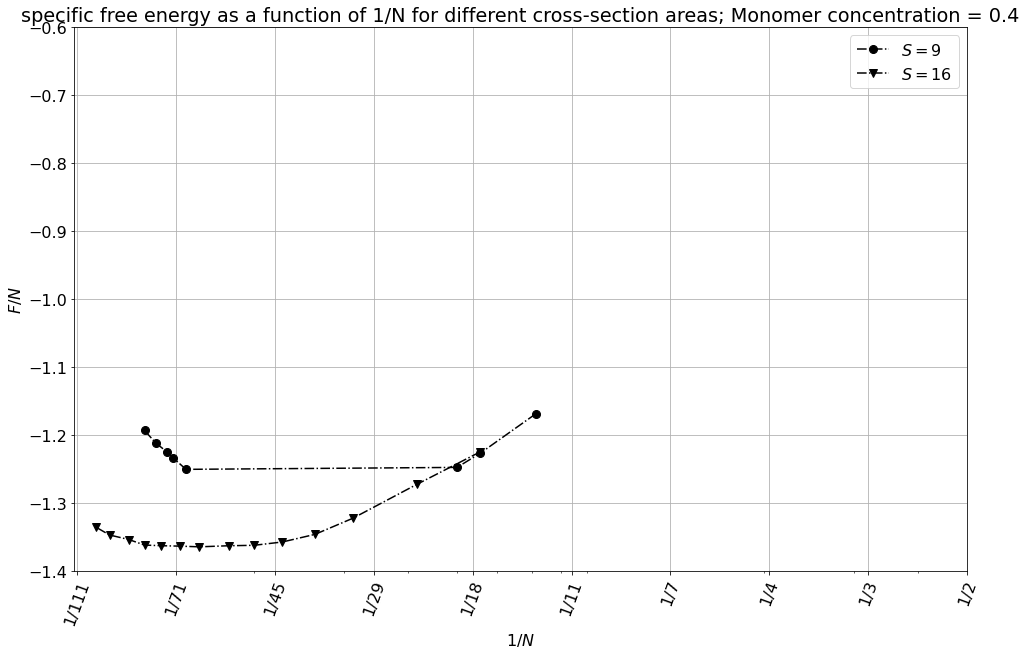

In [411]:
plt.rc('font', size=16)
plt.figure(figsize=(16,10))

min_energy_s={}

markers = iter(['o', 'v', 'd', 's', 'p','x', '+', '>','<', '8'])
for k, group in density_data['density_0.4'].groupby('area'):
    area  = group['area'].values[0]
    print(area, len(group['en_mean']))
#     group = group[(group['n'] >= s_min_n[area]) &(group['area'] > 1.0)][['n','en_mean']].dropna()
    
    # get fit parameters from scipy curve fit
    if len(group['en_mean']) >0:
        try:
#             parameters, covariance = curve_fit(fun, 1/group['n'], group['en_mean'])
#             plt.plot(1/group['n'], fun(1/group['n'], *parameters), linestyle='dotted', label='fit for $S$=%i: a=%5.3f, b=%5.3f' % (k,*parameters))
#             min_energy_s[k] = parameters[1]
            plt.plot(1/group['n'], group['en_mean'], linestyle='-.', color='black', marker=next(markers), markersize=8, label= "$S=%i$"%int(k))

        except: pass
#     plt.errorbar(1/group['n'], group['en_mean'], yerr=group['en_std'], capsize=4)
plt.grid()
plt.legend()
plt.xlabel('$1/N$')
plt.ylabel('$F/N$')
# plt.title("""Specific free energy $F/N$ as a function of $N$ for different cross-section areas $S$
# Just a part of the curve is displayed which is used for linear fitting.""")
plt.xscale('log')
plt.ylim(-1.4, -0.6)
plt.title('specific free energy as a function of 1/N for different cross-section areas; Monomer concentration = 0.4')
plt.xticks(np.exp(np.linspace(np.log(0.009), np.log(.5), 10)), labels=['1/'+str(int(1/el) ) for el in np.exp(np.linspace(np.log(0.009), np.log(.5), 10))], rotation=70)
plt.show()

In [422]:
114./19/5/5

0.24

In [472]:
s = [196.14175415, 223.30738831, 233.03828735 ,236.36975708, 237.45082855, 237.21431427, 236.10493469, 234.17602386,
 231.13140564]

x_index = list(range(22, 13, -1))
y_index = list(range(2, 2+len(x_index)))
z_index = list(range(2, 2+len(x_index)))

x_index, y_index, z_index

([22, 21, 20, 19, 18, 17, 16, 15, 14],
 [2, 3, 4, 5, 6, 7, 8, 9, 10],
 [2, 3, 4, 5, 6, 7, 8, 9, 10])

In [479]:
def process_results_full(s, indexes, n, n_saws):
    
    res = []
    omega = np.exp(s-np.min(s))
    omega = omega/np.sum(omega)
    fractions = np.cumsum(omega)
    x, y, z = indexes[0], indexes[1], indexes[2]
    
    for i in range(len(omega)):
        res.append(
            (y[i]*z[i], round(n/x[i]/y[i]/z[i], 3),  -round(np.log(n_saws_n *fractions[i])/n, 3))
        )
    return res

In [481]:
r = process_results_full(s, indexes=(x_index, y_index, z_index), n=74, n_saws=1.120083e+46)

r

[(4, 0.841, -0.863),
 (9, 0.392, -1.23),
 (16, 0.231, -1.361),
 (25, 0.156, -1.407),
 (36, 0.114, -1.425),
 (49, 0.089, -1.431),
 (64, 0.072, -1.433),
 (81, 0.061, -1.433),
 (100, 0.053, -1.433)]

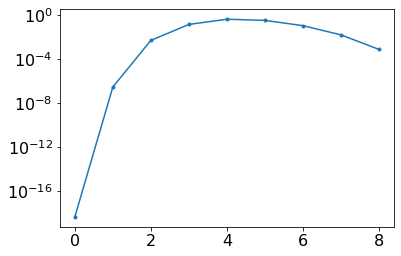

In [463]:
plt.plot(omega, marker='.')
plt.yscale('log')

In [487]:
str((1,2,3))

'(1, 2, 3)'